# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [38]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Loading the image

In [39]:
import base64
with open("image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCANmBQoDASIAAhEBAxEB/8QAHQAAAQQDAQEAAAAAAAAAAAAABQMEBgcAAQIICf/EAE4QAAIBAwMCBQMCBAQEBQACEwECAwQFEQASIQYxEyJBUWEHFHEygRUjQpFSobHBFjNi0QgkQ3LhF/DxJTSCRFOSNmOiJmTCNVRzdLKD/8QAGgEAAwEBAQEAAAAAAAAAAAAAAAECAwQFBv/EADYRAAICAgIBAwIEBQMEAgMAAAABAhEDIRIxQQQiURNhBTJxgRRCkaHwI7HBFTNS0eHxQ2Jy/9oADAMBAAIRAxEAPwC+LMZTSQTzlH3DaWxjjTmaMG5U0z4DoCq4PodADf46aIoLbcTEHwRGikZ9iN2mr/UOyvXw0E4qKCs3YIqoiqgfkZ1pdMhtNUTUMAGE21VJwBoD4P8ADJqr7emL0FS+6oQfqU4/Wo9dZTdS0Em0pcKCpgdyPuN4UR4P6SDzp5WdQ2OGYGW60aygcYfP+ml0DlF+RvQ1sLVEih0llgjySvcxn/41FeqaWqnnluFspUnp6dlarQf+vGOQy+zKc/20l1J1P0q005prrIKlSHkeNXzGB328c/jUPun1go6SJaHoiJ7neao7Y1CYYfLDTujN+7RKKjrrpmSwm6XOeWko6Jikcb/82Rj3C+41Cembv131hbXoOkqGGy2gyuVrphtkZT7fOg9t6Hpa0yXXr2rqGuuTMKaFR4Ef/R3xnVhW3q6otvTfg06mtWkQjdJiORcdl4J/vpOVLY6V+4BfTnoOKkvFxqpKoVN4pH2PUTPu

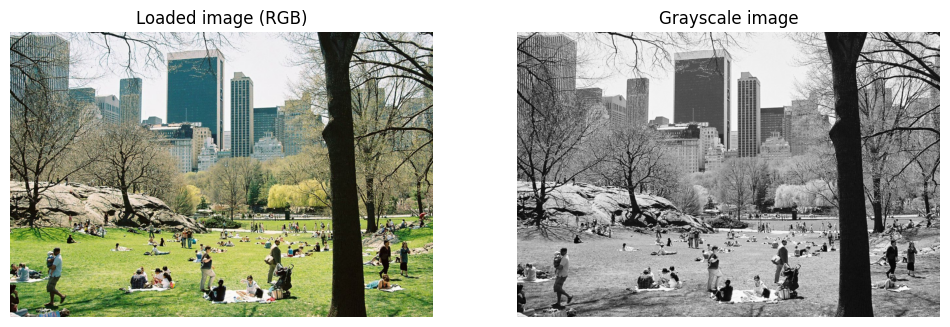

In [40]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import cv2
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = '''/9j/4AAQSkZJRgABAQAASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCANmBQoDASIAAhEBAxEB/8QAHQAAAQQDAQEAAAAAAAAAAAAABQMEBgcAAQIICf/EAE4QAAIBAwMCBQMCBAQEBQACEwECAwQFEQASIQYxEyJBUWEHFHEygRUjQpFSobHBFjNi0QgkQ3LhF/DxJTSCRFOSNmOiJmTCNVRzdLKD/8QAGgEAAwEBAQEAAAAAAAAAAAAAAAECAwQFBv/EADYRAAICAgIBAwIEBQMEAgMAAAABAhEDIRIxQQQiURNhBTJxgRRCkaHwI7HBFTNS0eHxQ2Jy/9oADAMBAAIRAxEAPwC+LMZTSQTzlH3DaWxjjTmaMG5U0z4DoCq4PodADf46aIoLbcTEHwRGikZ9iN2mr/UOyvXw0E4qKCs3YIqoiqgfkZ1pdMhtNUTUMAGE21VJwBoD4P8ADJqr7emL0FS+6oQfqU4/Wo9dZTdS0Em0pcKCpgdyPuN4UR4P6SDzp5WdQ2OGYGW60aygcYfP+ml0DlF+RvQ1sLVEih0llgjySvcxn/41FeqaWqnnluFspUnp6dlarQf+vGOQy+zKc/20l1J1P0q005prrIKlSHkeNXzGB328c/jUPun1go6SJaHoiJ7neao7Y1CYYfLDTujN+7RKKjrrpmSwm6XOeWko6Jikcb/82Rj3C+41Cembv131hbXoOkqGGy2gyuVrphtkZT7fOg9t6Hpa0yXXr2rqGuuTMKaFR4Ef/R3xnVhW3q6otvTfg06mtWkQjdJiORcdl4J/vpOVLY6V+4BfTnoOKkvFxqpKoVN4pH2PUTPuYzDOdo9jzq1rdWVQpYZzA0tMx/mhj5oj/uM6rm2XSRKKCroLasV1mHiVDHtN8ZHY/OjfR3X1uqN0FctTRuXLbZB5Vf8AqQH1GnzXSJi/DD95tOy7CrDwrTy4kkUDzEe+fUZ0Vjt9P4yVYkMbhRtSNsKw75A98aDXa90jJTy0048WOXzRBeHQ8bfjg62l/tNwjVaZKhHgcxiGRBujb0Pfto5KjRUnRLY08N2kXmKQcg+mk5qOCdPAVdh/VjuNAqXqhY6cxS00jzIfDKg5/wDvs66ivrqoC0ivUk5kJb9I9NTyRfeiQCF3UozJtaMqUI4J1ErZTVXT4qKVlkuEMRDrGDloVb/D8DGnjdR1jFR4EEcn+LOcaY3C8VmynnE8UXgyfzZBjlT7/GhSXRLjeyRXS2Ul6t/gV0SVtIjK6rnlWHY6GyrX2uuVQstZbcFlfOZYW/w/I1Fbjc6q1UjVcFxUULuQ21sKCfT/ALaIUF8rIZKILN40LqrOsp82CODoUl2DVk0oLjTTxNg7Cxw0TjBB9saRrLfT1NwjcmQTon8tl9B7abRVlDezJF4gjnU7Qsgwyt7g66eK60UsYimSWlUDIceZzntu0y9iiQVcTIhnIiVwSGGc/vpatWrniaIFfDx/zFGM/A1r7+CaaOKoLU055aOT2+DpWeZWU+AviEcDBwM6BaIrPY6y3Vc01qcxRSL/AObgI3RPn2X0Pzp/03WrRSRWWojWGSmjJRi2d49xo/n7aIjzSykfpA5J1Eq6ikujvRvGTUocK6NgR8+Vs/jOrW9ENVtB3qBjLZqldwWMR8Z9T3/09NOLGd1gppEIhZ4weBjbkaHz0z0UNBGZxJSRyE1BlO4k4OTk/OubPK1TU1FJJuFNDLvjz3lRhnP4BONKtCvdsdW6ZbjA5RtlOjGOR1PmlI7/ALac1e2AtBTbo2qI9q49Md/8tblp46WXx6aFF5xKqeVQPfHvrdTJHLXQPC+4QHBOePN6aRXQlX0kiUNNPRH+ZS+bHfxB/Up/Oq3+qP0is/Wax11pMdsurRFg6rhJD6bxq07ZJstytK28gtkfv20ItERgrpaScSExsdm458rdv9NAnVr7nnSm+hNXX9PztSVOOoKKQx1NHKf5cvsyH0zg441Dan6Y9YoyUptNSYy+0bxgI3rz7a9f0kDQ3GGuQ+SWAwzKRzuXGD/ro2GZlMbKGgYZOef20qpjW0eS7Z9Aeq6qGZJxSQyqniRN4uQf+kjGkI/oJ1m0gE32SxesglJwP7a9XS21AyNTTSUhH+A+U/tptV1BtjweNETvkCCVOVOf8XtoH+p5Z61+hvUfTdqFwpZorrEi7pUgHnQe4HqNVvZJKCO5Q/xuGWooQcPGj7GX/wCRr34zPHcIli2srZ3A9tuNV51l9Delep6yWqgWa2VUhLM1P+lifXboemJr4KBnm+k7hY0or7ARwZVkBz840jHbfpzUX2jSG43WK2BSamSXvk9gvP5zqW/TX6LWzqC432G7XGci11RpgIRjxPY5zqXXz/w79PLSlLZc62Gqdgqb/Moz7jOmm/kmn2asH02+k88aSR3SKtWTlfGqdpH7Y1ZvQnQPTXSM8tX03ShWqF2tKJN/Ht+Nefr7/wCHXqSgomqLbXUlwKDIjBKs3441F6Gp+o30+m3xx3OjjHLIwMkZ/bSbl8jSrwe2GYchhkdsaYyRESpPM3/LbsPQHjXnvpX/AMSVQkqw9S2qNh2MsB2sPyurGt/1k6Lvf8qO4tSSkDKzIQR+CM6lWU5Imj0rfbSyCRpZJZldm7eUHt+NQ36vhKL6c38VszSxMB9sCcMknpjR9LxDcbYI6K40VSrOQzwzAME/HqdVd/4iL3De7Xb+lrPHPU3J5wSka8cY4/OqIlIm/wBHKB7P0fbqithIr7iv3FRUN+onjvqezSSeTlj6hvfURsl0ulr6Xtgvtimhip4VSVoW3lfkjUnt1bS19KstBOs8GOGB5HwfUaTXwXFpaHviNLGf+sdvbQavs9tu1OjXChgl2ja4Ze40WCsNrDAY8YPppBUaIvESXWTJBPp8aLHRF5elbXDK9PAamjikjwHhkwGHsR8a4Av9jiKrcVrqUjbTfcpjHsrtnj840bqoHlq6GRmHhrvjkQnO4YONcQQl2NLWMyRjOxSciRf8J1V/Jm4dpaGvS1RS1zyxXRSl6U7poJeyZ7FPcaPVJdIXbwSzqcBR/V86HVVLTrAtPcULQgYjqezRj0BPcfnXFNR3OlmZqKrFZRkeWOpPmH/tbnI0PY4vjoVkpGWeJoH2R5DyJj9eff20/ik2SyNO6hgAAg7KNMVucKTKtbST08u7ZnG4f39tP4p6acsIJIXfH6QfMfyNItSRxVVUYTcHOP04HrzprSOZL3URtjYirtwO/APfREMAqLsC55bHpjnTKi8MsJoV/wCe5JOexHGhA+xr1lYqe90UDy746mjfxaedDhom9x/20O6YuktVdaimuqCK8U0YjYjtNGf0yL8H/UHUqDLk5PbgjUSuHTc1ZX1NXRSinuVGP/IzDvt7mN/dSc/30ITXkc9TUMa0tJUeZVpKyOQY9s86OgnEgyNqtyQNAEun8Y6GnrWRUnRSKiHP/Lde4/0P76PUk0dRBDNGweKeIMMdtHgE9je6xU1yoKmirIknpSmySN+x/wDnVS1nT9RQwf8AD1Wi1FK7FrRWTHuucmmkPpx2Pxq3IWWeadZYgsqSYOe+PfQvq2y0d5ttRTMzeLNxCVPKN3DDQDXkr2zSS0NJV1lupZIIqDIkoH9TnkK3t8Y1O+n7xTVdGhpRt8Ta/hOMeGTyQPfURpZqz+CGnmiFTVU26IhsgzFOCSf8WBke/vo1YLlapKalnkmaIO3hlWGFjfGCMdgRoa8PomLoPV9fDBWQB6qM05ymxVJbOlLtQz3NVQxrDSkgsCNzNjt+Brqp2U9PDKpSrTfsZkAXKnjJ98aJ0pkMQ34Zc4Uqe66E66L77I7X9LWs0UcVPSvFIoG1EPAOtydP2+a2ihkpw3hkNsl8+0+jakUZYU2EOXGQN3OkKyFmWNiczRnJ2nGdFhVdAuitoFwRfApacGHc5iXzHtjnReILDURQSTyNlSyr2GPnTWlhkFR4lTSgVLr335BHsNP5Ii5UYKn39tDBIZG1USzNUxxKjuwLOBksfnUV+otxSriayVREdK3nkqFOFBUZVT859NS28SzU9vaOFv8AzMx8KE/J4z+3f9tR6/WOioOm6GKZDVTpVRgSS+YmRnGT/noX3M5vVINWto7jZqGSUL4XhKUjkGMMOAf8tVX/AOJehqZuk7Rf6eT+fZqlXdMZzk9/2xq5KNRNRQgqp28EEe2qz+v8z0X0kvhbLieZUAP9KnSKrRP+k6+S59NUNxkgMUtZGsrRk5xkaJNEGCs48ydtA+hJ4x0dZACSv2UZyBweNG5GDvHGHCluceuNItAp0anv8lV/6XgBG/PB/wBAdEhLEY0ljO+KUZTTSXdLT1jxsHYSYUY9RwRrcBSBUDHiTnwxzs+NUStDavtNFXx1NtuUBlo6uLDjPBPx8jvquOlnn6ZvZsXUjutO8hjt1zWT9WOVjfjuMjVnTCbwzLKAnh5eME/q+P7ahvXFPBe+lLo1RmOlhQVRmAyySryoX9wNOiZV2T6naZFEdVjcezjs2tqhimIAyrcg+x1GrZF1BFbaJ5q2nq3aBWaGWPaDx6MM84xoraLxT3CaalYvFX02PEgfggHsR7jSa8lKXgLHgDjnTerQuqeZt27A9seulw4PrrGUsVOeAdIoD1EgjrIaOSVVkJZ409SgB40+jRTHEY3OVXg9++kPAWa7/cyFdiRGKJiOck8nTqkLeCFlRUkUkHHYjPB0xIVCeJEUZuGGG99Qa+WaO53mCq8Wpo7tT07GOeL9RUE4DD1/GpwQoc98nuBoLXptvdPODiZEwmDy3uv9tERTVoaLV3WnlpnaRHoWj3NUejH2K+h0YHjyIXi+23nnIO5WHzrimkipKh6cr/5ObzxkjyqT3U66ordFQLMluxCWctsPKn/toYRR3TVFW0fnWJSOCF5wdKU6mQFpHRmB/wAOBpLxJoGJqablu7Q8gacBo5EAR+Bzk+2kyk0dgsZCGlxjsBrXlVSQSxPI5765Xw2lZlXDEY5Guo49rsxYsfb0GkBvwwUwcjOugGVQBjXWePjWHnQBod/nWHODjvjWAY1yC28hgAP6T76YGROzxgumx/Vc9tdFgAeMkDOB302rY/KJYjiZO2fUeo13FkAsWBJ8x0DFBIPDViNufRuCNdnOMj9PzpB5d+FSEyE+p/SNJimJZpTKxlZdoTOUB/GkIbVU4p6+KSCAyvORGzj9K/LHSsqtb4JJmk8WplOF9Nx9APjSMlSZFpgJEYglXgx+o/7Y00iSWlq56m8TBt/lT1SEHsPz86pIljmw2oWqln8R0kqqiQyyyKMb2P8A208qGkp9udrcHPOM6ZSfyoY5vHYOmCVUZUjTqoZ2XcUULjIY8aRSVEb6hvUtugporbTh6m4P4SKzcxZ7k/GM6JJS01BRwUEMQjZgSJQMeb1Y/vpu9te4XpamQJTxIpMKlcMzkfqJ/wBtdV1VMbNKlxRFrqYEg+jY7Y/PGn5J12JRUjU9oSKNt0kpO6oIzjzHv/tp5VUcE8caTATJTDacjzbm/q/OnVjMstFF9zAsTOissZbJ575+NNYIplrJ56SYss0hQxnlAQBj8HRYqaNWypnmppKTYElpXCZY8ke+iK7muDrjeqxhWK8AE6A3KOrpaiG4eE0Vb4gEix+ZZI/nXfT/AFNDXy1H3kclHK8rrGsg4fbjkH99F0F+BxdLubdWPSUtO9VWyLu8NP0Rj/E59NNOmrTtuVxqa2vjqa2oVfEKjAjXHCj40v0xWUs166jSBxKVmj3Z9SQeM/GmtwNJbOptzAxR1qFd+4/8wD/4OmK2lbOojTXGlnp55gaw7/CQ90VMrvx+2n0D0ZoaVKuJ6sSoAZGXuR23e3OhXRdoWi+9gk8N6slphN3Yo5yB+MkaN2eIrAkVwBM4ZmMa/oHJxj9sHR0Ctg6rsP3tZilWS3U7nMrwv55fT9vzrx19VbAOn+sbpRBnYRzHb4hy208gn/PXuGJ5IWqCY2QMwEZLZLft6a8yf+J+zNS9XxVyQnFdTBnkb1dc5x/lobtA4qO0UTIV3eUEDH+euO+u5cbV2nPGT8HXPft21gao0BgnJ+dYTxx21nrrpsBGBxoBj23A7AwOVZwvxnWTRO0jRKBGCx82eCBpe2gm3+E+I4zmTPqTpskkO0tMSfDGRxkE57HVmd9m/HVIAWkO/mM49V0lMxZFiLZCny47Aa5Qw/bkSAiQncuO2M86VhlVpnSNPLIRz7Aakf3EJ4RGQrE7zyQfTSeMDvpWpYvKSzlseukW9j30hro1u5ye/fXIXc4yeCe/trZHHHrpamKCJ1kGQe350FC6SmCKWNNrfPrrttjqNrESvhefT350nF4QqUVP5kasCc8bh66Vmdct4b+RmMhT/Djtp2SxtMixuUj5CDLE+p1a/wD4funq6putR1FBCk1HbxskQnzuW/wj1Ixqoj5izN3Jzr13/wCHCxRU/wBNKereFJmrKhpG3njAxjjRHsUlekEL7YoutqOKaw3tmr6B/FpoxHsMEv8A1nPA76d9LdU9R3asqun+oJ6K332mPMTR+WoT0dD7dtSPqO21Do106eiSnvUfO0eVahR3Vx6/GoX1TBJ1z03S3qxKlJe7U5fP/qxyL+qFvg8/21s2nszUX15/3C9Q93RJZKyjtdZNG5WPaxjwPY8HOoP1M1VHcIb5R2WutVdEqir+0YNHJFuwXJ9x7fGpT0hfoutulZ6iplWOvkkEFVTbdrQup9PccakFBRxUCTW9VR6NlMbqwzJsYebn8k8ayt3s0S1ohEvVVhvs62rqCnWstTw/yLtsI8JvZj6H++nV8stbV9M1Fvpq+HqLpadPJHK/8+EAd0bndj240j0oY6SK7dH07QVb0LmaKjqOVnhY5/vyRp7bLfVWCqmk6QmXaUM0tll/5YPrsP8AT+2qjKnrwS9LZ5OrIKqx3VzCKimmgk3RNIu1sA8Nr0X9M+s5evLStJUXVKLqKmXa8cq5jrU/Hvox1LbOnPqt0tNSkGk6po8iOKYBZlb/AAn3B15hH8Y6O6jXKy0N2oJMjPBBH+x0NNe5A0n0evOm6oWy7RWiqnempXB8LefKrjugPsfT8aJdUzTWMLV0Yaehmyk0aL+n/r/bQHoXqC0fUzpiSetpy8iIkVXDgblkx+tf39dOkqZulrhRWisklrKKYlaeWc8GMg5Q59dWpKW0Qvaq8EiprnsoYWp4o5UkiDZz+2kDQ0qkp4EMjOPEck5Ibv30NtUkNuvbW6mkT7JwZIFbjIzll/IOf2Gnr19NFS1hpiHqixeMITjt6/Gsl32bqWtis8YVKiKmp45amRPE2E+VPTn+2h1fcqmmSQ06rWVuFVKZPIkR+W5z+NbNHVXKgb+KVBWkm2LHDTkqZXJ5JP8Ah0bhV7fSAy+C1YBsiAUAKfx/bV1onlyIXV2Q09T97II6m9PgPvXHhx+6e2pJQ/b09N9tQ5rJMs8rt6H/AKjoV1Cgip6hJZGhnmTE045Jz6qPTQD7gzQrYrNUzR1jJsNTHykKf1Mf8THWLlsdcQr0/URU91WqilNxr5wVghhGFAzy0h9FHoNSaBFF8H3souNZ2bccRU2RnAHroX09b6GxRU1ttyEVki5LNw0oHBZjqT/w+no5gsEMQkc7ndjkk++tIticE+xWuDw4llK1M8mESHuqfI+NN5KeSJi0ziZ2XMjle4H9P40VNVDEhYlUbGeR6aHXQSSwBaaPxd36s8BQfU6vsa0RW8dG9O9Q3CpjuFqpJXEeI2CYxken41U9/wDp70d0xWikukFdFbJAG/icE2WRj/SyY7fOdWzHcv4VLUFkeSoaJgFTuoHroRRxVly/iN1lp6OWappPDip3OY4Yzn45Y/7advohpdFV9a9KXuxWCS+WTqCoqLdDsMTTACUKc42tnnGNG7JcPq8LBbq6kWmutFIwnjIfzMuOzD5B0esPRNAlsji6hr6m6ogEdPQgBEVj3yAeSPnR2f6U0Ap4qW2Xa820AbQkc5ZcfjPGs1H9LG97PP31ZmgqK3xqzpObp65s26V1kDJK3rgemoj0reaqx1719G9VDOinw5YSVw3pk45Hxr1taPpF03R1QrLpNW3eaMHaLjIXQH3wc6lMdn6fa3z0FRbKEKc5RYlUNkcY05LktlUjyX9TOvanrix2RboIfvqbJZoexHbzD0b11X2z51fX1f8AowLQsN26QikqI3bM1FjOwdyc+2qJl8VZXVoJFIJBXYePjRKEvDtCs9IrferbbFX3Cvo6eaBF3b4ahkf849RplJ11TVVijjvltukEY2j7h8SBieV7nngHXa1NVV9D3+tq42mDZi3hgCoHbA0hB4NdZen7ZcZGWKWl3IrrtCSKR3PrxnUuL/mMlK1peB7JeOk5KeqSqtkFPOVDRtJDhZPk4GM6f0/VHTdDQSzVtspaaCCIFWaND4px/QR31DfqHU2/pu7QLM3jUklMJYoQdytux5SPQc6iXTfS0nV9DcrhWVbUduoRugpTkqp7457DSa82VFttr4DPW31AuvU9vkbpq1m3WhCElq9gDNnjbn/toz0903R9OV9nooEmNzr1+4W4qcSxcfpA9RpWnrXHSFut8VrigpqZhKQxzFUc/qz8fPtqV1CL/wDSZ0uIXSVGpjIJF8y5x2Hpq4pdDcvj5QGuNZX1zVtuv80ZCj+RNAmIzj+t8D9XxqO112pm6BmfxUFxqagLH4a/0DvqW2ZJJb/1zBKY5KRIywTOdpwe2oLTwrTdCQXGdc09NU+FDHsAkAb9ROfTgYOlx1/QzbvZM/Emtl4stJHXVUVPWKHk9OCOR8aDqrRXm+WyCoknajfxqdsZDjPbJ11VyTyXPp1qyOaWLAaOFmAldCO6n1H507aIVst5a1/zBEf5SvhHj5/Tg8nGk/NBp7YQg6hqIKClmqMNIzqsiFBu5PHGt/xGuqusTbY6rwIxmQMije42+p9s8a4uNMYOk7XNDDGappcuGbL9+e2uIRS1f1Ao44PFWoSnLsQOTxkrrON2aSW0r+AjYbo9VT34uzpNQ58qsQDjkE6bX28XD/6OaS4U9Q8NTPUKuUJ3EZxj8aY2pUktXV9ballZV3bxOcZAHI4/fSNwleL6b9NtA2N8ymRTjld2tYx3f6EN6/b/AJJXenc/UfpelaeZYHp98qBuGOB300skL1V86+WcyyQNFtiBOQe/6dL1yb/rBZYWH8v7Td39caHdLTFJ+vWUybIXIjwf0nntqn1f+djT3+7/ANgL4ZX6ExRzbiz1YJDdwd2pncIFpr901E5fJoty8+oHrqG1EuPpFbKatYrPJUqyc/rG7v8AnUzuM7t1zaEq8BIrW5CkYC8ep05eb/zQotUn9kJWq9E0sdVXhWaaqemSRCQ2QxC/jsNTejvFZFNHHWf+apUGXRWy8ZHqf+2qqoway29PRgkQG6MVOP1HJ9dFXr56Y9RzUbyQTLWogyNysOASNR0WpeGXXSVNDdKdZaQrOTyFkGCv5B02q4DHJDDHDJEZGPKN5UI9carwXuCiuVT9zP8AaCnjR2lZsb+M+Udz+NHIer7nWQ0/hUSQwOOKyfgkH1Cjn+404yvRTdEvmlko4CXq0UAHmUAFv99R37utWpZaGjWoqHgGZc7FDDHJzjjRmOlopnhrZpVrGU7UdzlQfUBe2dJVDLVdTIio3hrTHJ7DORxjVqiXtidTBM9Isl0jSfxArFIz5Fb/AH9daqa+nSvovtkkWeJvAxjGFI4z7gHGiE8W6jFLNHiKRwDg/pHfSF3tcFRTGNnljwBtlU8jB4/z50Jja+AwsQWNllCs2Mt7MdMqSkWmgKIOSTM2B+o6Qt1ZUGI0twj21aLhSh4lXHDD/fTqFpTVSOvEAQYB9T6jS2itMb0M/i0omdTtYmQqfRR6D+2ms8cppqWvjYx1Jk3AH+oH+g/20maCWnLpSSmJS4JhYlvXJ2+2dKzgyIYypK07I55/On9yNndlr6e4QTLECrRTssqPwyn140V3DayDuO+ojUWec3a7NFKKeoqJlmhlXkqvOcj19NGbdcZ5akw3GnSGTdjxEbKv7H40NDi30G3XKj102qPKHWUgxP5Qu31+dOiMNjXLA7lJIZVOcY1JZG5TVW+WDxZ2MUrsUQDOwgfp+Qf99G6eoNZGkqSkITtwnJH59tJVdPGpSQIZGWTxBn+k/GlVpIzI09ITBJJzIAPKx+RqtNE00V19KY1s3XnW1ikRo5HqFrYgT+pGzyP7asO7uIUhlGOJQDnVc9VO9t+uHStwjBEdxpXo3KepGMf66sS8eD/D3knz/KIcEjsRqVoE0k0PInDAoRnbrRgVkkWQCUSHJWUbgf2OkPGCVbv3EgA4HrpZJQGRC27jJbGgohfVP0q6R6ijk+8tUVNUO24z0o2MPnjVYVH/AIc3hqTNZL8IzlgoqI88H++vQMsrshESFmbygngDW1WUBRI65AAO0caYmkeOr19J+temqp5KSmNRFES/i0T84HOccHQqydVXnpvqahulWXqJ6eTxPDqiwY+/f8d9e2qGnWmeVmJMkjZY54PxqKdWdA2bq6jqaK70MfjqCaarRQrr7cj59NFohxraAfS/1u6RvUIFdWm11jDDQT9j8gj009q75YkqIrt0xeLd4w/+6KVJAi1K+vH+Ie+q2+h3QvTtxi6msfU9siq7vbaoxsznDbD2x/bU9qPof0FLGQtskiI4DRzNkH++loPc0WDarnRXWhiqKGqhmR1BwJF3D8jOnc0ZaPawIye+O2qP6h+hdFa6T7vpq93ejEbbpkSY8p6kc9x30tRdF/UW2UcdV0v1vHcKaRQ0SVa5JH7jvor4K5Naoteto/Fpig3R7HDoynnOedOdkciq3kEq/wBR451Sf/Hn1M6eqvtepelv4hGp801MO49/LoraPrHHeaz7Ck6ckesVgTHNOsJ/YORk6LYckWzG3j0zCVFdW4KuOCPY6bwgW1hDuL0pP8s55jP+E/GomnXlZSyOt26Ru1PCvIliKyrj38pOilJ130pXIzG6QwgjDx1KmJh+QwGjYck9kgnkzKjJnP6cj2+dBbjarZeHgqUmNLUQylRNAdjEjgqSO40FrOurVRyiKzRVl7ODtWkjJA/LkYI/fUbtfUV8sFLVVlz6YqpqKuqDKFSRHanZj6LnI+fnToTkif3Z66go3SKCWpjZCniREeJGPfnvpex+GbRTIlQXROGLrtc/nQG0/UCxTt9rW1FTQTr+oVkDR5P/ALsbf89FKirtlweCOkr6Z5JidphlDn98HH99H2BNXYZ3QQTiNWyxG4AEsSNJ2ud3uFwSUAMGBUAY8uBofbYZ6OtkmI8YhdjNGeMZ4yPf8aLSTqaYzQI0j+g7HPsdDQ0/kiN8Sp6c6imrVMK9PXQhKoFSTFMeN2Mdjxn8aJWaSqS0mO3mGRaNjGEI2g49VI9DolWmOSgaKrImml5Ee3IHxjURpri/TN1kpUhmqaCrfERzxC/+Ak/5fvpromvdZIqq6vTUsdWaNllY+GyZGS3oO/50vBVyyVTkWyZJoQB5sBcfBzriCAzSxTyICpG9gw5Vh240VppmmgBJDSKSG4xpFURK+TzteY2WjYUI5qmXnI7A49wcc6F/bUvT0twWtgevsdWBL4rAuUJ7gjv++phPSOs6S0zlcsS2/JGMcjHzodc55reyVEMRlp1GXjI5CnuMeoxzquyHHdnAjgpLcZFZKuwGLMQjOZIwf9QNEbVckelRvClSNFGGI4x+PTUZttttsdJVy2etYCs3SRwOxUYPcBT2Oc9tObTdXim+wqcvXMgdd48jjsO3HpqaKi/kktsqvuGBJCsAWZG/UP204nlZZRhGcnkADkjTaljqJZjLWU8cUqLtJjGQ4/OlqdZhjf8AyyScbicnSLQ43eJJlXH8vgr7E64uFYlFSmaYlcEKFHJYk4AGuDA6py6RswG/GBn2JOo51Fe7VSRUqzTyvUGcrAVjZx4nOfTHvoQmwxbqeoqrpLX1kn8tBsghA4j9zn37jW+ooi9LSBU3AVcZbPoARk61R1NbNSRiCmEK/wD4yZhye5IA0LuVvmr+qrbT1FbK8ESvNPEp2qQRtA4+edVVkPSokEdRBDNUIaiMAtkAuDjj21HOq6a1dU2SuttXUxzU8sLRqFBI8T/vopQ0NvojWSSwRCRWzkgsSPQc6UtVCy0QHgw04ZjISIxuyfjS0PfRBf8Aw8X2K4dAQW6eoQV1ukelaNj5sL276sp2G3cw2PznI7DVAdL1DdIfVrq3p1bJPcYKtxVxvBgSQrzzn0GpxbesOoblRSUdv6bqHBJSOsrZFRdvoX5znSoOVaZMqasghpG8WZIIsmWR2IAUE8c/OdOGqY4qGN6WAzJK+0MhHY+ufbVeXGC82yVJup0p7napGQMaVNscB7AOOCy/30ftNFVUN8nttHWlbZKgrICFDKmSAUXP9JySNUSm+iQVU062+o8eAAIdsSZyXPp/npleqJoOmK6BF3yT0km6M/1vtz/f01ktyqZ6qICl8RI5Dkfoc7ec4OARp1Ld4aiSAyQzR7iyFWQkjjQVdnfTU7XHpq21MqeHK0Iyv+Fhx/tpj1Jb5a6CC4W1Qt5oG3qgO0Sgd0J9jof0TcQbGKOrLolPO9P4rEAHByM+36tS6Td4hkBXwgvO3uR+dIaakhlZrxTXaj8aNGR1UeKp7xt6qR7jTna08YETMox/zO3+WgNZQSUlwa+2eF1lZSJ6bI2Tgep/6vnRi2XmkuVKlVA5WJlz5hgqfVT8jQCdaY5eIxpH4f6Yz2+NdJ+p1Knb3De+lVZZYwUIZGHcawZIwe+kUJbzHuYruOMDH++knpkeNBIMsrbyfXcdKvGWkRgeAfMB667fOCMDafXQA0gp18WQSEkMoBUnIOtweNTzinYeLHgskrHnHsdLLxVOmOAo5+ddyru2kHBB4Oiwo2GkweFDe2daKgHcIgHPcjWJIr5Vhhh6H/bXfb1zosDgOCG4PHxrQG4Ajyj299KeutbR6cZ0hmAYxjjW/wAawDHzrNAGY99IyQ5k8QsxGP0Z4/Ols841ztyd3c4xoEcRkPkqdwPvrkRLHK5JJVvQ9hpbA7YGuWCqCWGR7aYGAjaSjDHoPTTZJJZQ7wx+HITglu2fcadADGFAA/GuvTQAxt9uhpIGDgyyuSZJW7sT/oNI3GCGQSCRZGE67HwMgj5GinvpGRCX3uudpym04/vosVaAVc81HbvGpoQiR8ojtwvxxpzR1ENztuXPi1CFfFhf/wBM/jRGWlp3idTGzK/JUHGo3V2g2Vayss3i/cSAMys+44HoAe+mqZLtMO1UhMTTbTuiO4Kwyc/GmVRCDQirqk3oUZnjJ3Haef7jTIV1RcqOneKKYHALhMBlb8HnWfx1KWpkoJ1kZ5Fym9QgB9Rz300vI3JD6nqDTwRSwAVcTAGNuMquO2ddUKUsFnZYm8AySF2LHbtYn10wu9LVh4DbaX+gF1BCxsMfp+OfUaRqr0bhQSUjWktPv8Ehv0BsDuRz66X6C5BG8XamohFGhFRU5Cphh5GPqx9BpvWzS/w7xq+103iU6sSGcZbjuuk7ZZZDJHJWU1JG+3DbNzMfY88EjQa+UVDFFW2qnWpr61v1s8p8gPfHPHbtoBsU6QtNEvS8FXBPJTVNXmqfncQW5AI+NMWqqqC+yyXCqobhTtCYoVDBXQ8ZJHYk4OjVps+4fczqBmIxQJFJ5Uj9MgHk/OnND07baGCJjSptiYgFo/EZmPc5OTp/ZiatJoDUXUtkW7zS/fzQSxRxwyxsDj0AwRxqcxopqmqIakOkqjBBBH7H8aj0XTVuqoqmoei2xyKYxEwADcY3Y9D7aExdHQ0MKr0/XXGKVFyAZDIm72IYnHGkwipInEdOoddpBwSQzHPOqg/8UNEZel7VcDH5qaoMbt6BWxqcUS323z0tPJc6WdZVJ2TRck+oG0caiP1epup7r0deIaq1Ur0KoJY5YJTmMrk5IJ/00JNjk9HkCT+VK647ZGNIjgc6fXemalqirNuyAS2mJ4JHfWLKjtG2/wBRra9h6+41yc8azSGx/UStJCDnaVXAxxxpquPtHBbBHm/J9takysa4YsfXSWQ0ZTHmzn86uxJDrwkbdywxGCMju2tRRAOFJOSPTXcRMskQbzAgDk+o0vLFHTSzSRSZdDhRjvnSBuhnLCqDhxg9hpA/pxpaWMA45z3OdcOCAM+vYaVAjSKXOANdiJn3HjA/trqBDsZgQNvt308pACwEux4wCWHrn00wboHxAplh2xroMpTDduSR/pruYptIG4Nn9gNJbDsVm7Pz+2gOxe3UU1xr6eipFL1FRII41+Tr2dYrhc7PbKCzWm32+npqSNY/EmkJLsO5CqD/AJ6of/wydPQ3brt7jWx7qa2x+JyP6z2/016suNDEB4lFFHDKSA8ioCxGqgl5Jkm+iP1d76ogpZqmjtVJWyJ+pQ7Jn8EgarQ3vrLpzrRrgvS6Gju0AaSgppA7bhj+aee//fV03evVY6hGmbZGh37Ruwe2NArTLO9RUTJEkUiRxwLJJ3GBzjHyNW6aJpp9lPf8eUHSfWk91rLdW0lNcFCTQPTbRDIMHdnseRq4rBdKK9W5a+jmgrN58RZFIDsvrkHtpS7UtFfKSah6mp4qyNlKoNg4JHceudQR/ovb5KILYb1cbRVDhisnAHcA/wDfUKCW4sva6EPqTHR2PqCj6shgnpqqmZY6jwkO14XODn5AJ1IuprgLXFarsaiIQmZNtPBzLNE+OPj178aqy/2r6h76zpum6ggvNJJAUlLpjy8jAJH+emUVd1x0J0vJB1D04tZRzJ4UdY3nkiHpyOQBoafK66E7qie9ZWGv6q6hH8Apxar7Ggnimz50A/xsPf2zqpPq7NJf54q+vxB1FRJ9vX07dpsdpI/QjvqbU/1vo0j/APN2mvpJSm13jTl2x3zpjTfUvoG8VdVU9WWuSWSM+HRLGuCkY9yP6j66E09MV0VF0h1RdelrotfZKtqecfqHdXHsR66vMfUi0/UG1R0d2qVobhFhoVdeDKBneD6cjH76qz6lf8G1y0lz6JZ6Yy5FRQSZyh/xA6g0LRpNGZ1ZogwLhTgkeuDqWmtorT6PWnT8UPWtot9XTIsVdEJIJWglx4cq5AfPoCR6e+pHZXVaYUVzQS1sQ8NYohszJn198jnJ99Uz9P6a5UNplqug79RPBUN4ht1QQssRHuW7nXPUVZ9QLPeae/OkM6xuviyRyoRKxwAGGePbS5eCa8ovJWmpGqjVTI6bdw8Nv+Rj+nS8lLIKyurKmYzySxr4SxjiNcdvz7nVTUvX93/hkpuNptyzSMSFFUicH1fnk+2tVP1Yvklx8NYbRRxRL/MU1AO5ccc550/q6+46pr4JX1f/APbKD+FUszkOpeokiBLqB2jY+medEukIont7VEcaRSTBYoQMEiMe351X9N1BS0lJn+K0hqK5i9RibzMT6ZB41NOkrpZBSmaGto46oAQxweOMRL/i76w5KUkXfySjLQ1EVVWRR+JGCHAP6Y88f7aXthmnrKusmjLR8JTyf9PfOgdc1KzQQmc1AqJdksqODuHcY+ONHKWqle3+CZY4IFcqHUjICntz+NafUV7ZSQ7oZ4patViTxo0zveUnh8+mfTW73c1t/hoEeRqhggCjg8859gBqPQddWKnuBtqy+PUFsSNEhZIh7s3bOnH8Upa6Fmp6hpkkDQxS7f1P68egHvrSLXVkSdaBF22VdKzQB5JastTrKG/qPGB8DUhpFoYUoqONUjijjMbQn9WVxnH99DqeKWhK+JEn8qVTHEg8qr8H85zpS524V/UNDKHykUpfdGwUsOMDVtkpeRSmoKf+L0o/hkkLs3ib92AGPYk986PTz+HXeKpB8XMaDvtI7nQ+ZWe+KJCxiBMiMXPBHvpSy1v3lfP4zwmKIYhWIAg59SR66LsaVGR1LViSQ4MnhsASv6mGe+iUlLSqs1RPHGUC8jAyBrmRfDqqdYVCNI+COFyMaUKCoqNgTEIOTJn9RHYaqvIxaKJZ49jJhGTG0EjynUffpu3MxJjock5OaVSf9NSKWsigk2lhuVdzLnnHxroVFK4DArg8/p0uVDqzzT0ldmn6cudFTLSyzQsZp4ZX2kfI55GgPXXWNAembVQUVQtXeEk8RmAwsOf6c/voXfKuOw9HvUwLH/EbhK0aSD9SoO/7aA9NWiKG52Wrlhm/mMJCsw4mP/T8ahrbOfGucVJ/CF7PY6+7Xt2uUry1Xhh4XY5TcCOPbj21YvR8dRH0r1I8mBEjGKc7eAcckj20L61roqfr2DwpRTrKFWbaQFjXjP4OdK2a+2ijsnU9FNc5CalmESINwcZ4J06tUDkrtfcI3L/8wOnYqWRBE9SE35yXUt3x7aK3Bo6frq2R22q+yqY4seKoDQg49FOTz8agV0udKlt6eWm8ST7aVTIDA4Hf9I99SWg6khunXtE1Bb6zbDHyhhwEPrwRnGhqmEb1+qFel7jD911a1zp5qOWoUhXwfCeQZ5J/pzxwTqPtUT9RdCUdIokhgo5DFJOAC0zZ8ox7Dnn51JTeqa29NdVeLT1VYJnOJEhO2Nj2DHUKSuqrJ05aHt8dfTU2SZWeLKS5xyvHfUt319ikrSv/ADZOa+RpOrOlbdUxGOekQEyY5AK+nx8aCVMMf3XU9YhZHpJF8MszBm/txzpSiNuuXVVHPLdqumBjD0zzsqtE2OA4Izg6bhqiRL6Lu0Z8Zj4jQnJdgeCp7apS1vyRkTrX3DtBepIIbNVvHBIagFZISDviU55x6k6IWlUrPqa1bAzKI6Y7iyFFjG3HOee2mtzojU27pQ08D1AQBJHp8ZX23juNKGM3LrquojDJ4VPSkyFcguQOxI9PTUXFP2mlSvf2EbLWPP0r1bJBHEihnQyE8EHsQPXTS50Lt0t0hTTviQSK25ccIW9v76cWyVh0leZIahS1Q5jMRUBUA+dZdxWJbOmRHSJupW7DOXyff21pB8WRK2v2/wCSQyp4X1gSSaYuaSiyi45PGhnTaN/w51pVxjDVch2SZ8rA57acUV3lq/qTOaq3NEJqUx7xyDgd8+g0N6eqoYOkOpoAVO6bG1nwB37fGlyVfsN3v9xO9UBp/p501SMPEC1AYSAgncD2HxqSTNLc+soagRl4IaF4DEw534xg/jUc6lr416P6djCpIaeXcIlfzEjT6kqZ5+o3kMElDCaQySq0gaV+M7to7HRKXK6EtP8AoLJT1NvpummqFRIIal2aPP6WBJLZ7YxoLU3upSK5Ja0eWoq7grRzgbo41yO+iVFBR1K2OevWolWeZmi8d8BMZxwMZBGloba4tdbDBE8Ykr8b9v6VOOAPb51mpVpmlXtf5o6u1sdabqKquiyVVxhplK1LgBMkf+mvbjRGquNZS30K4eWBbcjx5HkLAHP+2kr2KqhpLzT3cSzRsYkDKe6egGu4mkrI61ZJIkjamCo5cDaCOxz6nGhyqOhpOUkSCiuAWa0lneMzzBlVVOwt+e2rIrKceJS1B8kqONzD5Gq8skTVNpscqELGKrMaAZ8w7nPtqy66MvC4B8xGRn31pHRTRkka+KWyTk85/wBdaq4RPD4YJU9xrqJjMiM2Owzj311MfDiZl7jTGD6WHxaEJNxMM+HKO6nWUYIlYTMfFP8AZ/kaWTfuO1ht/wABHvrpVVogIgcBu7D9J+NVYqoSkVBMrglyMlsdx+dKzCI0sjr/AMzbkj1/fSdGMSEVCBZXGSc/qx666eMNLMoJG4BcemkAOeoP8ZtcxCRvLAwZf7aUutHHLKkcoJMrAME48p/005uscMU9HUvHlY38NsdlB9f8tMZEqGvMnhTk0yJtx32tkf8AzqkyEux8lLUW2I/ZytURqP8AkynkAezf99LU9ypptoZzBI3AjmG0k/Ge+lt+2BmJJbHA0yqY6etqaenqYw6pGZTuHPPHB1NWX0PpVIyBncew0lGZg3h7cZ/rJ40xENyt5P2bJWU2MrDKdrr8Bu2NI03UEElSaetp57fMx4FQpCE/9L9jooOXghv1rD22u6Nv4wtLbriFnb/Cr45/y1ZNxjSqopCcPGy7wB2bQzqu00vUnTVdZriMQ1SGPf8A4W/pI1CvpN1k1T4vRV/3R9SWsNCdwwJ4hwHB0hUWXCRLTRPtA3KD210oyx3AD240ytjkUAi7vCTGQe/GnRMpcYwFx2+dA11o6IJlx7DOujkjkaREjrMoeMgEckHIzpXdnvxoGaB8xz6HSoJ7A86T7HHuNb0gKY+ptDcuhOtovqFZIvGoJQIbtTJ6r/j1blpuVHe7XS3G2SrLSVCiRWU+/p+dLXCjguVuqaKrQSU9RGY3U+oOqi+h0k/THUPUHQVwYk0khqaJmP64ifT/AC0IV0y5eCSCMg9wexGoz09E9rvl2trODRBlqKVPVA36sfG46kvroJc0EPU1qqMZ8dHpm/GCw/000KWth7e3bOo11R0Z0/1FA4uNshacjCzxDw5FPvuXGj8ZONrDzDj866GSeeNKyuyr7Z0b1P0wzjpHqBpQo3SW65kyI3/tbuP76Qq+q46Spam+oHQogLfqrKWnE8RHqSQCR++rXCgOXwN3v661OMpl1V1H6lYZBH407J4rohPTFfbaC2CbpOsoa6ywjzQQ48aJT+OePnnUllpIZ38SAgNJHuDjlTn3GoZ1R9N7RdXe6WKeWw15U5qaY7Eb/wBydjoJ0d9Q6np+Kns3XlFNTQRuaanvAQiGYLwN3+E/k6bIWnTJrbYWqp6i1X+CCWRMNBLJCrLMnsMjuO3vqKX3oymg6p2dCp/CL2sX3Ek2d0LDONhU8DPuPfU4v1LSXqzCKnrEAdhJTVET58w83BH402sNxjrL04cslQYgrB0xvdRg8/tnGjbK60Mun+rLctGIuoauG23aBts8MrCPLe4z+oHvka6vHVFiqa2ngo7gs1ScspiJKAgf1kaktdZbXcKmKprqCmqJ4v8Alu6Alf8AvrimoqSknkaKmpljbllES+X57aFQ5KXhgKwdZ2iseSG4vHQ1kJMb7+I2Hur9v89OqRKO/QVlJtV6VXwWSQN4g9CCORopX0NBNTSx1FLA8JO85jGP76idw6XgtvVVHW2oz0cM67WeFsxq3oGX2P8Ato86J9yW9nV1pLxbqu2R0k33FJHIciXIYkDgMR6d+To3brqHXFXupjISybl4/G7sdM5JrtFM6XWCOVURgJqfJ4PYlO+l+l7tFcbYYarwkqKU7JAMMp9mHtnT7QlqXYcSaKRd4ZWXHcMNNqmOKWMCWYj/AAkfqXSstJRyDEsag4yOSP8ATWCkpEUsIVxt75J/31OuzTfREb9RQW2KO4UYEskcg/lllG/32/J0lT3WnluQaS3MHxkq7D+WT2CsOP21IL9bKOUW8SU/8uOUNuBPk+ddVdBTtFCsDBo94y3GAwPGdPsmnewRHXV0Mo3wCSkaT+XMXbyfDDPb5093R1M0dTNUMUwMOkud3wBp+8dQgZaqOLY54MQ4A9iNNzRCCrHgU0YTBbZ2y59R6Y+NK2WkhgkEKNVRvTVcqpgrvdh5ffPbjWqZXrrjHUeEkdDANsQKjj3f5J/30RjiqqpBHUnDhySUUjAz2576Ko8IYpujjZQPL64/GmmTxE1pofHpCgcIpJVcn1HrpklRClVcKydgGeUQxD+rOBgf306lnEQP2xbxSfKzDgk9uPbSNBbmpSy1MiTzMC5YjALZ9PbjQhvdDdQZLvOzBjP4aI0Z/SOTkj9jo+rZHbHwdR7Mhu7XGiRJoCv27kPnGOcj++iVTWQQrG8xdpu6RqPM59saHsUX5ZALkiWn6/2utf8Akx3G1vGzk8OyleP89SqW2Pc6w1kUk1EF7KD5ZD6ErqI/VeN0uHSd9mPhijr1ilQHhUk7gn1/SNWVPGaWPMOWp1GWTu2PjR0FAyuqqmOjMElGlXE3knEfZV9Tg9xqJWjZYvqFR2567dbamlc24s2ed2TGfxzj8amlKXnkaUSZp/DC9u+op1HZaGa97C/28TUxkDg+anl3+WRf9xoE1WyS1MgqroIJYSzRR+IWDc98ADGsmaUVtPMIZvDbiRGIAb0HPodDOjLpWzTz0F5ET3SlT/moMLURk8SD/f51JizyE+Gqls9n5GiylT2Qfo6hhr7LVpXQ+LFNWzLtViCAQv8Ano/SittHhxRuJrUgKBJFJkj/AH9RodRQ1tirbs1tojNSGpErID2DABio9xjtqS01T48JdDIVY95I8DQyIrVDS11qCk2vJvjOXRiMZU+g0HiU9PXias2otiuJ3yhznwJj6/APP740Vq6QlVenSNgG80WcKw/2OlWpFnohTPGoppP+ZTyeb9s6CmPFTO1k/l5GQVIIx76yM1ChmkCSe23g40Ip/Hsk8VM6+Jan4WUnmnPoh9x7HR0grwo8p5yDnS6GnZyjgr5lZPg6xWViCrDHsT30oO3PbXLICpAUZ9ONFjOI12M24gs3OlP9NIIXypwrR4/Bz/212hLSeVQFx3J5zpAdsoIxj8a4AYMQTwOx99KemtHkaAMHbvreNZjHbWDQBrWazW9AzPnWazWZ0CNfnW+3rrP21onQBvWxrn51vQBnrxretdu2tf3GgDSow3fzDyc/j8a4kQeIh8LeeRuz+nXbKxHDAfOkwjhgjy5BHpoAQNHDslZkZXc5LITn86C3CjkZ6enWZKvIOPGUb25yBkdtHmjUPgOQZBtHOm8VNFCMU8bLIj4LN3z8Z1V0JqyPtY6ukBMEkwbeG8FZfIfzuOs8a9UNVWCKmStlZQscTYUM453A9vUc/GpLUzJNTSENHnBUFjgE+o0wq6yG200LTByYwEKp5ioPrpfoLikDbZ1jbzCwucc1tuKAuYakbA7eyseDp9ZKILCakz0s1ZOTLI2QSN3p+NJ3BrZfJ4Y6uBaiiiO4F4+Hb0Ab40MFqoKunaWltSIRKY2VZmzt9TgHTr4Ft/ccB4+nvuaMo3gTuWpjvwNzHlAx9fjUj8ZVoo0d1iZVG5WYFtV5dujTV3VaO0Xitg8FRMEcb4UPoMnnJz76ICG/RK8ctoiqTHGE309QFMnu2Gzo72JNx0S6nuUE9MziWJo0O0hTkgfjSEdxot0iCsjiU/oC8H/7OonDdqSkqlqKqyXCHapiqHgXxU/J2jvp9BfLA1OxDGihVgTLNAVc+3ftoQ+S+R/BeLVHIWWaeWoVtgRYGZuf20wrbnWXyhuFE9ir44HRowjEL4mR+ok9vxotZbzaDAvhVdv8ZjywlXceeNHHrhFTyTgF1T9Sg8n8e+i6FXLyfPzqOGSKokSdCs0TlHH4PGgJzkatH6x217d1peqQxkLUTfcREjHkbtjVXyAqxU9wdZz7scH4MBxz7aw8HjWD41sDIOoNBVMsu1h+2kpIyCGUYXONdRHBBHfTlVDId3HH9tUiRCjdVky57afSLl4yy8Dndnk/GhpXY/vp+HLQrkkA8fnTQS7NbchjnOR6+mmc/MhG7IBwPxog+0A7u4HHzofL5psjHPtofQLocU4OAqgf99KRNhnBUnPBI41zRt4e8MBu/pJ7jXfjCn3CVA+edw7c6kTObiY5HP24IjCjcGHOdNFDOFycqOBk8AacV0TxuGkXa8g3bfYemnPTtrlvt/t1qjO1qqVYs+wJ5OldFHqf/wAPNj/gX05FSUJrbrL4oAX9KdgCfbg6sierlloKqJz4c6IFaOI5Ofg6Z2wR0dpSlDtTx0qLTxbRwcDuR+c6YTtNFcIlicRyDImDctLGezL899VCWhtUJ0NyFwmhtsU4WKoj+5nZY+w/wkn1Of8ALUhqIqXa0EaB41HZT+n5J1FrJb57fJPE7li8h9hsX0AOn9SlbHGk0dT4aiQZjAz4g+dDk7FFUtjiJISY0kR9/CuS/wCkj9Jz88f303uNTHLUzUrCRIpyqvLuIV3XHkB9sDk6j98uVRFVTUlKy5kkXx2U58FccH89tLCvpWpaia5VCCShBDRQqZCQR5WwPUkjP76qLIb8DtZIZ7/BBSQfcVFUhjYx+ULEOCfxnI0QlqJ6mkqILxDCkUcgj8JiSpA7Mc6D2K+0lN9jXQW9qeOsiNOkkrbNxDE+VTzyTri81l9rq6rhoqKgNPEiu5qWK7u+cDPYe+rrRMZK7sB0FLPW1F0+3oqaaG0NugMkAImP9SduSOP76KU9v6VE6QXDpWjZJITOXhTdj4x3J1ErSlwuqX2Cm+5qVjmWoc0D7FDHIwFOSe3vpBKnpo3eY1Vxr7L4IISmlk2spGM5J9NJt1sSbvTJEfp39Oa2jesW2PA0rFURi6MH9hk//XGqw68+kEdNb6q4dLVP3BpgHmpC4ZiDySmPQamPVfW1to544bZfauukjpd0TU8aygzEcA4HtnRXobr200tvFZf4J4bgYVE1OtKx2YGDn8nnU8kWnJ6PKsMskLExu8Tg8lGKnUr6Ro6S+PLTXfqiptgzlVkZikn79gfzqxPqZ0/R9Z3CiqulrBXUlfWuRG0ieDFIo5LbSPjvqoepOn7n03cJKC90j0847Bhww9wdKl2imn4LxsH0s6FuXTQrKm8zmtOVZqmpVFDA9xnvxg6FQdE/S6iqKpK65VdzC/8AK+0PiM3wAvPGor9L+oelaQS27rW2vUQSkeHVK7Exn5GdehLTSdOpc6Jem0po4qilYwzxKrKF9cn31NuuwTrsoOm+l0/Ut5MfTNFPbrZtLrNcW2s6j1C8HS3Tn0fq7tTVc6X6ClNPN4Lb0YZxnnP7a9D3eaQ3RliKqskY+3VhgD3wBzg6AW5qqmud8t0EHiQNOGZMD+XnJ3r6kf8AfTarsTbZTtF9OusYUne13lHEMoRQZCCwPYjJ7Ec6JXToj6m1VVTj7iNiOFVakKvHqRnnOrkiQS3JDRRhKdYQagFSSzBcDGOx0XlWnk+zqaqNopREBEobLSewA0OK5dDj0ed+qenPqPSUJp6y2wqjr4jPRsoZgPU7e/bUZs/WPUvSNRwainlK+VKmPuD7ZGvV1bRXarrVBmijkEJZUIydvcDH503vNiorpa/tL/RU1TMyDHkwf2PodDil4BK+yA/Tz6oW6/Fae9n7a4SNkOWxGzeijU+hpo55HmG+OpgdZYxu4Hf19Rrzt1X9NrrYK2e72KEVdrgfxAoPnix6Eeun/Q3XVxqaqa2zVIWrqiAI5wQxPsD6aiXKG47QddnoeqrI3uCxxnIOfL8cdz6aKQG3W6nECLHEScqqEb2J9QO+q/pr+7O9DDAEuk5AeRzmOAf4jqY2i2tTzR1kbLPUzDbLPIcsx9MDsP21WOalscrukLVVFVVNcjzyq0Gzy7DiTA7j20USB4pEKFTEQF8M5yOONZT0zxzBpyrBVwHHBH507gEsqlpVHJxhfbW92iUqYhTxRfdbIqZjJHyZG5Bz6Z0xlt8hlc4YZJ4B0v1BcobNbJZ5pfCwCEGeSfTVbm81ch3mvUFuT5tZznx8Dbrs8tSVM/VV+hjklp6QOcIJG2xr/wBtTjrB79Fc7HQy01I708Q8A0Kl8Adj30IunR1ultEBtsz/AMQVz9y7N/LiT0z7E6FM/VPRVTSTieaFWBamkB3Iw9xpNSi7ZEXGUUkSXpaOjvHUldP1iZ6q4kOEiVf6/QFRohaoA3S97h+4jopqZ932xjG5+cY3f7aitu6uoXupuVwo3lrpFPjOxyJHPc/Hro7Msh6alutrqzPBJLtnppO6rjIOfX01SaIknf2JZdVSnsHSayRR+HPKpZscnn19jojdYKqDr2eeORI0p6YDxl8oUEcEj1+dNDXxfwbp2nelVVlZWaLOSTnt8caa3OGG+fUeK33B5KahMZeVWPJUDyofzp9f3J7lSG9oarvlhvsElajWqH+c8acNNIM4A+P++u654v8Ag6wxXBJEDOzKR/hGMD86dU3T0jdN3FKbxYamGoCwU5YAsn++kOpJJKO1dNUNcpapM5YZbcCDj+2mpLoTTr9hzYX/AI/17SS/al5BTsgaePaHAxgEe2mT2mGGC/S1dFTkrOEiXJ2o3rjntqWUtRLN9W1aOMR4pMqu7AC49fnUV6hqaqr6a6gnNPEsEFaFQrLzuyecY51CW1/nkuTvr7nd+stHSVNiemikpqqqRY5IoJiPEOOGHt6afWe3TwdS1saXSsoZxAQ0auHOQMZJxyNOKeko56uzUlIQtRVRRySCb9ZYAeb++t2mT/7Y9RicIkkcbZlP9bDjkemklt0Fje02vqKHpiq20dPUmpmKLny7s8BtJdQVVe/8AFxt1RTJBJseSOTxWBHrgAY07uU0sX03hrJ/H8WKUBYo38vfvn30audwFJW9NSQVQ8SoQMRIu4yj2J0ladteS/FX4QhbLnT1nWskMlwxD9swUSjaxPoD7H41GrneDT9M3GFaf/z1VKVMQXOEH/qH29NTCy0tLN1PemiaKsWeE5pnP/Lb31CLaKWDoq7XR5WWplqnhjiL52IDyvb14/tpqnX7ESUtv9QhJYaWC39MTu58WpIeaWRvMx74A9tTRRFT9Q3Cpdo4ZWpm7JlgoH51E7+9TBbLAVhnmkiijkVpYsqq8DPftyNE6UXCkqL3mkgqJp4t5cSf0H29jzomik93+gs0y/8A2hdHjit75Zi/6z3yfxpCOcVds2UaTUoluARGzlX8w0tQXKG3T2mqqLRUGKngKRnGULtwCf3Oumq5aiEzyssKibeYoOec91OolLiNRtXYpchLOOooKVEWWNo8zvJ5VA9PzrVwAa2VM0UaCqgWOR3Q5LDnjGuWgo6i0PDDDUNV1E4nK1D8DB5Lcew11BAbc11lgK0qOgI2tkg6zlJS0WoVbJhYKh3prNHJCIyJ2K44wOMf76sN8VJaJXwmMMw7/tqqem5ZK3qGipZaiU4jWRTtwB+fnVlRUqQBaZJZd+0nceAx99dMHaG9ClDUKgNMu7+USMkdwNLyO00kQUhId3mz3J9NIW9MPMXXEsncA8HHrrK2UBYfBIjkZ/MGHcDvjVC8CshIrR/hCcj3OlKiRl8NYl3eIO3tpEIzgyuoYDJTHqfTWU4kLI7Y3nPkB/SdIY4Owtk94+/wNcNn75UA/p3Z9NKSRkqxOMEeb500yskiSxkh412qfg6aAdSBZlIb9JGMemhEga3wEyhniYgF1PIOdG+AoXGB76aH+fDJuXybsAH1A9dJAxyQhUMpyrdiNCHNVHcaVfD308hZWlPBQ84Gn9MoLM0H6M4PpjXfgh4XgOdvvnnJ9dUnQmmdozE5AJZfQ+2kbksFVTGmq4VmWYbdjf6/GkzL9tAQztvXygsf1H00vRweHGDLl5mGWZuf20qG9sAwWa82uPwbPco56WP9EFam4r8BgRxqvPqLWz2Hr/pDqW5WdaaRZzSVNTC+5XDYx6fGrpyVOQMqdVZ/4k4RJ9OhLkeLFWwmPJ4DZPJ0m7Iardk7t8/21XcHmjUQPKCJk7evJ0Y4IBXke/vodZI3js1ElUUklkiDSkfpJI51ujqI4ZGpom8WnU4RxzsP+E6b30NaCDDcvHfuDrlRuGRrauGGRyPjWgf5g2kBSOfzqSjrAPIByNbHbWsH1Ot+mgDOw1UnU0Yov/EV0xVHtWUbRce4xq3NUj9eLpDbPqN0DOJAk8UzM5z2Q476a7Jl4LvbABJ7DnQG8SSyVlkmKqsAqW5zzgowB0YeWGqpXkjlWSBgfOp4OhFSkdVUWWDGVilZivthSBpx0ycm4hcoUm3Bv1cHOsmm8BRvUtngY1jqZA2DjHIOkW/mzKCSRs5B7Z7aRdjeqe4Txo9LLFDGGy+F3MV9QPnXP8Kjlljl+9q2YeYtvHm+MY0RjGzgegxjSMW6OslQ48M4KEeh9Rp2JxQiLXRws0zoz87yHbIB99QKrjXqC9y9LmlWaKOs+9rnflFiOSq/k8cfGrDuk/gUVQ4YBo42fDeoA1D+g6TFjp7yR4ddV7qmdv8AGHOcN740J/JMo21QjWdI13Tdwe5dDFWgcl6i0Tt/Lk+Yyf0t/fQ89XUdyhnlpKGelv1uIept0/kkUZ5Zf8Qx6+2rMgGRvjYFGAKke2q4+ptu+x6ps3UEEUTqwNHcEk7PA3GfyCf8tJPY5LRYNLWrPTQyCNlaWMOoPqSM67giYZaQDc4xj2HtqsaC8ydL1bUNzhnms8MhFJUw+dkRhu83/SAdWDZLhHdKJJqWeKRM5V0OQRoeghJNDqGNCksMi5Qdh8aRp81HjRTI6iLyqzf1j0OnIIDA4w27A12oO8/P+eiywdRiVcSTt/OiyhAPG330jd7JQ1u2RYR48nlWWPjjvzjTyq309wjkbaKSYeG59Q/of9dPYoh4Ow918uR307F2RSittwhp5KWguNQwgk3K0rBmOeSjDHb008qbvU0ssSVtO3gEDc0KZdD+P8Oir21TVrUiSRZ0UhcHg/keuu0LVKbZNq54JyAVI0WqEo0Ma6poNlPK9WEhkYcuca2rwRZTxFqYmbMaxjODritAgSR5RFLAw2Ojcn/3DScaWykt7fYVaU8J/VsOcH3x6aVj8hNKj+W/jRv4qj9OOW/GuadGnjimdQ2fRu66Fi+U9LPJDkytGAwKDO8H1Gkpurl3bYKGZmBwdx26lyQ6JI+MgY500qfCScts8SbbxsHP50BXqh5mOKIlyvO1vKv513/HKgyAx0qKGXux5J000DDlPG65aQGVj2Y6yoi3zKJSQnYKPXPpoB/HbkzEL4CgDttzpqt8uapzURO5J2qidxpWBKzGkEeIIxHCn6gPXTWGnmeZZpo8SkEZPOF9h7aBpd7oZ0SZ4QpUkKE9fn30qbpcWGfuAPwuNPkFHH1Wsj3z6f3akh8k8cYqISB2ZORp39OeoF6n6Js90DAySQgTAHtIBgjTCrq6uot9Yj1MoDROOPTjVS/SsS0FfaaKGV4rfdqI1KKrdpkwHx8ndpWDVF9wqlJNUzPIqruLtGxwAO+RpvDQUVRT/cVjpIJ/5uWbtntj4A1HZ6ZDE6tnBRgSx57aaWKNDaKYPg7dyDP+EHA/y0+YcGcdZzGyUcdxop4KivtwMsag4MsJPnX54zx76kthu9tvlLSVdFWbmkjEiKp4TjzKfxzqGdQUiVtWkagn+Hp4oK+pJ5H9tB5RN06aG820PLbZHxW06jDZJ/Wo/wBfgalzdgoVZcND4nhMZ0McpckjOQRpQB4pAY+YWBL/AAfjSFkutLeralbQSJPTOuRtPIPtp5TjEKlRwecHvq07CjjG1cgDacYI13LGGkLDhgMZ1w0bqd0Z8meU/wC2lFIK4BA/OgBFXLI0U0BKkY55DZ0Ep6CpoZ08CqlNErMHppOe+cbW9NSBMc55JPGsSJVUjGc99AUMaaQVCuaWeeOVQcxyj9J+RpSlqapgBU0+w+jocg/9tLT06z7fMY50/TIvf/5GkvHkp9sdaTljhZEHB/b00CFk3GLDbS/sO2uywKjKjd6jPbXEcqTYKbWU9m99dgDcRj5zooZiqQSSAPbXXppFj4e51JLHgLpRQxKs5wcfpGkB1+dZ6azWAaANDtrfH7azAP51mgDNZrNZoAw5x8a131v01oaBowa3xrWedYRoA3nWa0PjXR76ANawgMCD66zt31nroEM6qnebwmgkUeC2VVvf/wCxnW3SWSTl1AyTgd9OiGJypA02mScIqwFVlzlWbkYzznTACV1Oax0jkqpSiSb5E24VwvOlKS4pVR+LFEq05JVWH/q+mMHtroyS1tzRKgPTwxttKek/yD7aUrDV0xleOGIpGN6j12j3H++gXk7gl+5ieE07rCUDAbeM85A1qRqkRrtp4kdeX2N3X3GlaWtFVHMpjACrk5OMj41wtGwWOrpXVKhY/DVWG4Ae2gKBUVPUNTCSGrRXXBwBkya4eSOvSpl8WZKqkcqabdgMD/rp7XQr4sFSlOVlVhuKjC/voPX3iO1msFFItbVs2+OJUyytnsfj50loJWh3a6yne21dB4TU8vhmUJu4LdwM++stt8jqoUE6RLKm2OoglUcH0P78aiV9mmrrWXloXo6tD47ruyqn1GeNAYLiZ5pJo7jNAWCNvhGXPZdoX5PGc6w+pQ39i1a3pyzXGQVddbqfftIO/ggftj01E75YenLVHV7ZaqnRkx/Kqcj8gH11GqVKypqkolcCrjPiS1ckhkMXPCydsEjHHzp5cOnaC1MKq/UctbIDuEzS+NsJ7EJxgH861lLVohPe0Vb9ZYaITW2vtlRVVsMsZjklqG3duyg4HudVJc4/5viAABu6+x1en1nrKSfpO1LJNLLUQyAiJk8MQof+jn2751T6QRyUW+bHnB2H1z6aF7kT07I82BjByO+tk8cd9bdcHDDDKcHWwPLn9tQzZGk4YH39NO4z25zjvpqQAAc//Gu1ODhWyM5/fTQhapVmIdiDn29NcIwK4J8oOdOFQyoNuQB303mjMczbR5T21QvsKq77GG0HnudNUO6bJ99Lbznzg4x6a4hwZB+dADl9ryJGcBif1D11wHAdvEOUGSOO3prqYKWJiY7gcAev50g4O0Ag51IqNuXeTxJCxDDgt/bVsf8Ah7spqrzceoJYGantcBEZI43nOT+3GqnVHeMY5LnZEvyeNewPp70/B039PqK1ioV6wqr1KxsMlpPQ+4xgal7VFdbDyzt9qlTcJNqyrlG24UZ9NNQkVaZ7nESBCf5O1s5C/wCxzowoaXp+KnrmD1MDeCwQcKfQfjQu+0kNNbDFSGMShChgiPDew+PzqvbFVYXfZ1SLMamreqjK+KiSRITgRj2J9e+lbjVpHbJzba+BnWQs9Q/PhAfGoobjLBLHW3a4UZkMPhJTtLhYiPT5Pzoder/T0lt+4kvtFSUTDdMD52mkHYKOMAHWMckW6K3X3D1HQGuFRLXU8q0sgDBY/wDnVrHkMR6Lp5I9XLQS2yOOittbRRmYBhud0Ayo+fQaomD62VNJJVzmhFRcJXH8/wATCFF4GExwSB76UqPrlcJ4StFZIo6gtu8XJdif7dvjW6m4q0YuPJ09F4dKU4/4WpK6mjFfdFdpXkcem47lA7L8aeWMT3y8Nd3Qbov5LlP+Ww/wgeuM8nXnuxfU76grD9nZKIcs0u1KYk89z30VtVz+s12oEltMFRDRHdgxx7FJzz++mpS41Q6SlaLxeOntP1CR4cQm40p+4KkBUK9iR85/y1HeoIEg6uW7VNJSVFuwaWZjjEhPYgfH++qVqvph9TampkqqtJvFlXLNJOQWz6dtNqn6bdbyTT0VXVjxaVlAikqDyWzjbxz20Pkx0z0parJaKG2VIC0MbRLvfG3AY89/21G5aySaquiWW0z1lTUIoEwjHhbiQQC3sBxqnab6NdczTSQfe06SrjKtVHLDuCOOdL0P0y+pS11XRW+vYSQorvsqTg57DtoqTiG0XpYbBdBXpXXq5Q/xCnjEYVBtip0P9C88599a+o9tS7dK3KhuttimmWFpYqhF3MFAzlT+NUw3Q/1jFM0UlRU+F2Iaf0H7aYG3fV+y00sStcTAqkuu/cMHjjTipLwDsinUn07u9otlPc6Vfv7ZLH4gliXlB6hh6Y026G6zuHSl1iqqSQyUykeNSsfLIvqB7altJ9U+sOmqlKTqG3rPGkRjaCphK5Ru+T8jUAvctprXartcT0Uh5kp2bKkk8lT/ALalrW0C32er+nesLL1TcbfcrfUFlKlGp3I3Ux4zkeo9tSW3tSnra7QqiK0lLGwPfPHrrw/arlVWqsjq6CVopkPcHg/B+Nek/oj9QYOorrWQ3iqjpbpMsccMY4DqAc4/y41N0FtPZM5jFa+q7hBUTyQ76MeFKOwGR6fJxzoravAa40FVWRkzRKUgZzk57En/AD0KrWiuPW9437BTU1PHSq8n+I4JP4404gk/8lLS+I1NRtKFWqkGGfB52+w+dW1u0JP5D8DSyVNbPSeWff4MUjc8dz+2dMnrZt6zV8UcTOwVuc7gDjK/vnWXFKswrHbp/DhgIYpnLTDHZT76aQ1UonV54QESPbDDKfOGJOc6vsdtCK2ypquo6RaYMu2qL1SMPLsABHHqdQr6l2Sju9ZcZen6SOS+28eKlRHHwwP9HHduNP5Oqp7ncK+ejnlW30ieHWNEvnaXnyJ8Yxk6mPQ9uhjtSV1YuwrJvVSu3y+nGsuVS0OrPNNVZvqPZ7P4hoakUjLuk8IFm/8AvvXOhts616ot1ZHXO9QooMFw5I4+Rr2fFRw1Ejzh2Uuc7QeAPYjQ64dO2aqdvvaWmq5kBKqyZwp+PXVvHFdIO+yg6H6+3KrlSnVIY3lbAll5VfkjRjpv6+vBV1a32lhnWN/DE9O+0Nj1C86mNy+k3Rl5WWdbfHSS78B4DtJ9xqIXT6FWC1TVM0dyq6VREWU1Cb0T35zycaX066ZL+bC/U3WlF1dQQmgraClRBvkjmlG8HPYaFLRWtlDfeU3Iz/8AdI1WnUv0mu8Mkc1trKWqpZULR4bYzAepHzoIPpj1rji1VGP/AH6xly65DePltol7XWktvQU9q8GKW4zy+NVS7iDx2Hb5OuaynqLpQdOx0ResWCPxiknZSSMrz6Yzp1MY4OhqedaOJ69ptoeQAiUH+nRC3wBrr0zQFmjkiLCojPOD7fI9tdaTtpnNaaX7AS5/Tqm6o6jrp7SYrdTLTmYxJzscDkEenOq4Ra/pwSJNTBxLgpMDleDz+fxq5um6uOPrjqqGiqmpEMTAQzJkN+fb86jdxlpz0H9n9ufG+7MjOwyoHbAPpnU8L2aPI40n5v8A3A9r6mhvElsilijpXo5lkBU+UR5y3H9zqxooaHqDrmsqhWK8f2P87wj+vuAn+n99UzcbCr3D/wC10yxghcE8KCQOP76Wts9+6Uupq6RA8kAzK0Y3ptPv8ajZpS8Fp0dBSN9Or7NURAVCVGIS36go0Ju1vNQnThp6PFRJiQoxwrp6H86VsvVVrufQ9wg8WMXYyeIYpfY/4T66kt+h3f8AC9VU/wAgQou0OdoK/jVpp7MHHj/RA7pq5eF1vOLlVMaaSHYrMvnhP+Fj6Y0zvNMsHR113B3Wa4DY2fYn/I6MVQEXXPUBjmpSstKdsbyLiXJHY576jlRWF7O9tEIhniqULpKV7fjPbQtNMd3GiU9RTCyXDp541jnRoU3bhmRRjQ7p2spKq+dSVMbtGio38tzkyEjjK/k6e9cUhuFytgpnhbwoVDskqbUHHHfvppbbdRyVVTJAxjq3jKuxkXaT2AAz7aTlGrFxlz/QVLyzfTdMqsVOanIDjdk57fjRO41MsXUNioKcUsReFQuVySp7hfbTK83Gni6Np7dFPGKlJwZHbA8Lnvx31l4vdH/G7LVUhW5TJGFjWEhT4g9ySONJST/qVxktLvQP6hr5Iet6+Gy0zpeG3Qo0beUIR5nP4/305o46S3fSWRo1n+0NYUfJyzknltLdBoFvvVFVXLGLjVwlURJAVjQ54VieddfZMPpSIPCkMTVxbY/DcHVLh5+wPkk6+4au9QGawiWcLO8SiIbfOUOMrpiJhS9RXa1FHj2xibxict4Y/pA+RxrfU8f3fV/SFPFFtMUKsykZI4GDnTq97pOs66aGnFTvhEMhOAYnyMc+vbUTXHaLTvv/ADRq4y0UlRZJYEq0jaB1enkOU284LD050Ipy1HQU1BbitR95Ullh2ZaDnnzevvpe+10rUppqi4fb1bhYXhhwQRuH9XuNEqCptHgW2khmelanmxI7Akyt+RqNV7gVt6EYa4/bziWQtPDVKnKY8TtlR6aL36qWJ5YjLTJFIVZ3ReYfZT/nprcauOpoo4ZVxDFPsbDgdzzJ88f6aRvbtLbLi9DFDLSCVFSI438f1Z9f31KUW7Ro5PaJL0k4br5QtQrlIVDD3+Tq1nAlYqR27E+uqc6KroqXraacbZhUQrtSIgscd+PjVkSVtdU1MeKf7SlHJaRvM39s4GuiKVKhKXh/I6qagUSlicBM7iBkKPfQyCCaS5LUeKZEkTMeRkH3PxxrusqC7mneoi2NkMi5yOO2spJpno44aPbTCMgKmMsPzoGGZXVW24BZOAucZ4/00xpJWjptzPFLUPIQdp4T/wCo0LjhaonqIPHlll7SsRgYPcA++isFPSUdOscUf6uFReT+SffTDyOZfFkZ18TZGV8xxyfx7a2UjiVPA4CHDZ9ddmQkALjH99ISxS+Kru4EX+ED10h0OZ51iwpIDvwg99IyoZIxuOzA4HzruKKLdv5JBxvPfOlmILc/pUZOgDI0AAIBGsZtrE57634iFA4YbSM50xMstRKxjHhwKD5iOX/GgGzbxRmVjNIrJ6Kff30lDWSo5jhimnjHAdhgKfYnS1HFEYoZCu6TJwWHPfQ6trnuss1stsjA521NSvaIewPqTqiG6EZJKu+1L01NWyU9HC2J5oRjef8AAp/1Oox9Vejqe79P0tvpvHZpapFdPEJ3DnLfkf76n1HFFQQRUlLC3gIvBX0/PzoYFqa/rRZ1AFut0LRkf45Wx/pj/PRZDjr7scUNLR0lspqJJ3eGKILEWYksFGNdQkEU7Uq4hBJKOOTgHJGnLIPv4lMQEbKXDgfob2/fW5oylUJQ2VK7Sme3yNFmtC0JV4UkRdobnGupOSrYzg8nSVKNsR2Hy5OFPppcnbGGx5vb51IzmORZ4w8ROPnSgYbtuDnvpGOT/wAy0QB7bs+ml8dtDA2vJGqaq6Slvn1u6lobxTpK6WoCkWQZG0YJI+eBq4yUVuX2n21WV2WI/X2yyRowee1yozHjcMrjQiJImfTLQt03bBFGoVYlLRoMDIHP+ekoIpIuqqVm/wCVKkjHJ53ZP+2s6PEaWeSInDwVMsR+AG4GkqzFT1Raah3ZERnECBeW8pyT8apd0HhNkkYhVJPGNMnmKV1PuGYpgVyPQ/OnzeYcnjSE8KzQ+E+VIO4MPcdtSizo5L7iuMdtN5mRppFcFWABH59NKCRgFEuAx4+PzrmpmSnV52QlEXv6k+g0ARTrqtnuIp+m6Rljr7kdrkHmOnH6m/01IoqWkp6GnoY8lY49kSjvgDGDqKdU2aSioV6oQN/G6KXxpHXu0J/VHj1HbjU6o6iCspYaykdZIJkDxuvqp02RG7bYIoq6WkkjoIqGdsxl4mfhQ3+EnTeehlqamGS+ETFlKPCh/lorcY+e/fRq5bzSyGMAyJ5kz76TaUvQxNKjrNIoZgBk5AyRpL5KaIX09HU2O91HT9xZXp3zJa6qQ5Mq9zE3yOcfGNIQ1ZsfVFVspCkskbTVFNF/WQOGVe2eOdDuq7pBfuqqPp4k0dLSTpVS1UzlWL8ELGw44PfkaktbQPN1BQ1gaQV8IxOwPkaHPD49++r87MbtaJRR1UVfQRVMfm8VdwI9PjXdXM6U0kkRxIse7n0Og/TLvSpPQVAbhjJBITlXU+2i1XGTQzsV83hkc/76hqjZO0Re4Xe5yUrgOCpA3BU5A99DLXeK9atqWa4yPHIu6Fs4LY9PzojAB+rJJxjQGvQeOop4RJWUhMse7hcE8j+x1Fspx8khqKioIVnqpWOc434zoQ9I6l33zYqJA7HecAg//GnMUwqYFManIGdmeQfbTlYyyYfLADIGf8tRbui3FDaaAvBKS6jIOSRzrmOljMSsqlZwu3CDhvyNOmjZg25SIhwQfTWxFtcbZNodeXGhugSQxaGoiWLb/Mli7KD308gj+4jEsy4bOdh/p0sI8x7RnA/qPf8AOk8uqY/5hJ9e4+Tp0Lrs2YAnmQ7STlgOx1khYuMpgYz37a6U7Cu5lweMDudbVS4PJ7Eaehv7CNPHncZDu9R6caWmjDR+XysOVI9NYAfIScADBJ9ddyjMZHHpjTYzRj3bGH60/wA9dqMgkZ/GutrHBxx8a6CFs8Hn40AN6b/zEpTB2Zw3s3xqnaJhQ04iIX7yx9QmOGZO3gybsqP7DVm3erqY5o7HZtv8TqwSXbtSxern59hqAdfWqLpbokz0u6aFJUjncsN6yqwxKfyN2fzpdmcpbLNvlS0UEpiQl2yiKO/Jx/prdJTQ0lBEgAKxrlifUgc/56YNVxXOtpaelqqYwzwpV7944BHp8knXNdX0MFQIpbpTGLdmZA2GU5/7+mhIbmlux3SxsYZHdFVZg3ifg8D/AC0L6aKrK9A7CQ0LHnHoeQf89KHqmxxvMktyiRydqrg5yeBxjXNuo44bjWMg2TygPHIGJLHH/bQ0JSUnpgS2VVb0X1VcYrbE0kEriqFPnEcsR/Xt9mGM/vq47bcaW4Uqy0z8Hgq3BB9tV7eaIV9Cxq2ZZolLRyIMFWA4xrv6bXGeseOnuCCK4Qgx1EIbII/pcfB5504v5E1T0WSxA5z/AH1ryt7HTZIniJMLmQDvFJzj8HSkExlRisRRgcbG7jVisWA/bWd9c5wuWwDrFbLaQzmRM9mIPp8a7TjBHf51s8ZzrMgHnQMRMSMRuUZXjWGFRgKONdspYklsfjWwMAAc6BGcY7YGt6z8a1oAwjWa331rQBmtazvrZGgZhOs7+uteut/toEZ6c61reBjjWD50Aa51vWa0PXQM3rPTWfjW9AjQ7awkZwTz7a1I2xC3t30nGS1U/lBAXG//AG0AdycRtk7eO+kwSwREJKkcvnSrglff40ko8eFQu6NQfwePTQBzVUyyBSRll4BHpodNTVMEgmoZj4qt5g/KkHvx6aLrKmFy20scKD76RnhQAgod78Bh3B9zpgRx/vEuEsSQtNRyruDB8EP6jHsdPaC7TwII6u3zUo7LJjcp0+eJBOjvl5Rhd6jkfkeuuqSpd1kbIlSIlWK8EY+NPRLtAO7msrHVKanlkp34kWQeHGPnIyf8tNT0p4cpc1y29HURKKePzAD13e/HfUrLCenWWn/nY5VW9T86TzDWkeJ/zAhBUdx7jSsOPyyE1PTa3GulpxcKmo8HaTJUPvy3HYfjQ+7U9OlalslkLxVCk+DAMuu31z6cjOpWbVURSSfbLgocJKpycd/MNRy8LLTolXSxP4kco34TzAE+Ztx9O+oa+SnpaOoempPtJ0a5iOmZc+CRh2453P3JI+NIzVFlsMcsNLb66qZVVCF/mLuPZiTjtolLW0M0cEk/3gqnyqBYs5Hvn20tUVc8MtHSUdDUmapDKs0mAjfB57aS+BSog0dmqeprFcoY46aKGYyLJNOoZpXIH6V9Men5152ghelaognQK0Tkf+0jXqSpsc1FcZS0LtFHAdrQuYw7nuB7t276o+92SGkvd/hWN3wQY1lOGUNk/wC2hPimRkV0ir7iFNSXHIcZOkFC7mG4BSOCdLSLtYRzHzqcE64CL5ieV/pI9PzpMpa0IEjJB5+ddRfpYjjHp7jXRHm3LwQcFdJsDvbjGkUxekmMbkAkqedKVYwysc4P+Wmi5UM4z5dEaobok2gBgMsuc4OqXwLpjRxlTtA9861Tgli2Mk8fvrTOMDGAex+dd0Z2yjsx74OgDoMBKVYYkzjOuZB4h4clgdg/9o9daqCuTgc89vcnSUZdXKk4wMakEErHFbqy701Pe66ShoAMNURpuZfbjOrXo/p5da2VP+BupaO7QSLu3iUwyJj0I502+m302tvUXQr3O8LOkk8xMMkR8wRf1DH7HQ7qv6c9QdB1H8b6Wq6iqoIiD9xT5EkXrhwPzoSb6BoRkXqy3XWq6fuN4utI1Od5jh3S72+Dx8aYV1r6hjrRRVNyvYMzHw0aM7pPc4zqw+jfrKt7gmoupVgprmU2wVKLsWY+viEcj01bSV9xu3TtLdmigjpZI8JUDlwv+In0H476aScg5JKkefunOipRVIyU7xVOzxfHrjvcL8R9gf31Irf9KKC91RkutwrqupEn89y+NinlePkasV43orbUySQ0yyIRJLOqlnc85GcZI0K6eu89uSKK17bvTXAPUK+0K8YzyuT6c8aTiruwc3Qb6V+lnRlDSKXtFPLMZWXxJ23nAJwedSLpjp/p223etjobdROJCCgjjH8sjuP8s6B2iuhW8yQVlPNNXzUwWCFzhdpx+nPGR6nUgltMtBQmsiq4qeujA8KKN8qFByV/JGdaUHJtaFuqIZ7XdLNdqURJHHN9vUnG3+W/A/sSdc9LqYun6ZQ0kK+NIytu4OWPf30pep6S826ejnMssVZSMBIoJRHwe59wdDvprQCToCzRzzGcwb1A7kncRnPpq9NIzX59EgudNJUIjZKiP+asit3I99Vz1hdA3VNLc6WRRS0QEJDJk5b9TfJGB/fVjVTGlQNXOft4ssojORj/AKtBK1KRbG0FVBGstXE9SvH6WJGf9dJRHN35E7jaZa0yXCieKK52+LxaWbOQyFSdrfGlPpsYK6ge4+MjT1UYer8M8b8jjPxoF99X2mkrgzK1fSqkXgk+V4mOEbHvpSxSpYOrai01Kx0YuUSVKGMbYzKq+ZB755Om1SohO3ZY6VQDy72AiRckntgeuhFRTLdp2q/HzT+HiNAvA57/AAdKpXU0vhsfJT7skFD5jpzTVcKL4lIwCnIAYEaEvg2dPTK46iNutHUcsV3mSppa+lUQipj8ULIrHGfjUX6x+jnT996grv4fM1paOCOQ+DHmLcc5OP7annXq07JbLgYHnmjkZHjQAhiff00vYCtbSXK4ePUP484SOOI7lUADy99S5+6vn/P+CVFpnkfq7oW7dOVtTGqivpIcE1VOCVwe3+moxDI8Tq8bPHKjAhhkEa9fV0/2txukVYsUUSUzSiDPDnt39/jUP6o+nltudDHQT1FLS1328clJIq+cEjkOcc6l/I7S0yOfTr6wQ00Jt/VaSBXYMbgnmfA7Bh66tyr6xpOqbUo6eop65ZIzH4j42og4LEZ768ndW9O3Dpa8S2+6QsjofI+PK6+jA/Os6e6iulhqvFtdXLAWwJEViFkHsRqOLhtBV+T2b09HXWmywqkIrtmAnhPyAfg+2mF/uVbdgtosQNDXVwO+pqF/5KdmKj3ODjUG+nPX1F1I0VPcLgKKOR0RqYHa6SAjBB9VP++pstRPVdQdTVFW/jC3x+DEijA2KgcYPvknVwdbJk3VEKq6atttfDZ7RNRvTNchTyALtJbC7j8Zzq22v0LSmmajk+2jADyf0Nj0B1AorpT1V2ohUvRW2EotW8zkDzkkNgj+rCjT6+fVbo2whaBq81rJ+sxRhhj2ydEZJthxp3ZZkJjZFMEiHd5hhs8abSSTJLiClBnB5kJwMaoaq+uFkd6mCxWh/IhaJmJDM3+Ebc6jA65+qfUPjvb6KrigdwQywbSnsATg6tsfLRfDy3eGtrP4RTUKRwyiR3qpCOWHoMehOmXVduvdVbql6q8wrG67JEjiXw2yPfPOq0qulfqbXx0sMtRI7SjxJ/5/h5Udl4OolcuivqI9c9qlqGnaFjKI2qmZUXuO+p5PsON9IlsvUVJQTxdP3OuhnqoVCwzQHaXj74b2PcalUUsRjQhZ8ED1H/fXnS9dHdT0teGq7ZM1TIcB4yGJI9tC2uN8iYxtVXFWQ7SNzcY1z/Q5bTKfJaLqvFukT6d2yRERZFnJAdhpWzK3/G/TE9SyrUTqWkJOc8caZ10ks/QlqoakoS04aCbdnxMd1I9DoxdLfHS9fWp7hVRU0EFP4jNIfDCkDnBOu3knv9TlUeMl+qF7UlK/UvXFSTHK/hNHjbnH41B5ogPpynnCvPOVf0DHPGdK0PWthtV26iaR561qtGVBRoSpOe/Oo5TGXqbpWKE3FvEpag+BagoRyhOSxPdtTyVV+hSxydfv/uPql7Ra7zbIncVUPgK80NKTKwkz/b240S6UuVxqrxfWsFop2jmo3EiVRCIq4PYDjOPQ6Vhs9KOsrUtsojb4qiNQSyFSWAwe/vjW7fTLTXnqo0zyLTwlVePeMHP+elVrsq6l18gL/gsXSwxVtLVUtNXCQxpTxpx+ScZ0NuM11sd3pIuvRVVlJCV2RGU4eP8A6CD/AK6nrQRj6ZQVUCslZ95tZlOCBxgE6NdVW6ivd/6ft93pt6vCqtGW9MevqD8jScK6COW+/t/cG9LUXSfUHUF1e00cM9I1N4lOkrHfE3tz66H3m3UlT0zFXPbRDVfdJBUSSZ3FV43AnnUT6j+n96st5ur9M+O1JRjxT4cmJVjPY8cnSXTliufVNBDND1A9RKZdlVRPIQ0Sf4iDwdJO6ZTXwywOorDbaa7Qx0dFTNTGFZfFjlBXGOSedD7dIa213ah6asdNPTRnxJrlUDCxf+w+uoP1daqKgv0Vn6dutbcYkXE7RsWC+4G300WpXvNFTy01kvNXT29IwrQyUhYFj/TgL/rpOVroajttv9gi3TdNQdH0d5MEla88xXeZWCHnHK+nOpTRWiyUnV1soTaFqpJog58ORgAx9CPbULXqfqOhsCQVVVSTQ+J/Kp5qUxhTnk5wAdc0v1Eub9VU9zr7XEtRGmyXwlZQyD+rH++knd2g4NeSxqOydP2+a6JIIYlKkRZkYlWP9C45/bWrtZlpulrU6VldUwLV/wA8KWKKPQYbkahttu9grayoerrHlqGmFUgiVs5Ht6DRWv6n6jmt0VHURk2epl8T+WnLD0G4c51KbT19gatb0SW6T3q19UwuklFcoqWl8bxJV8NlUY8pYDGf30OqL+twtU93e1VtDbZm8SaRCGEpHHfO4D8aA3p54oILLNPWAyefa8bFpATkKGA5/fUjoZLbJaJJNtZCkJFNU00mT58eXYo8vpqbbVsrxQldrj05cKeCazwwiMwgAFwDGxPmYg8++j1RVU1opLV/D4opSyYZ9m4l/QDPHPvqHXun6eE00D2quhm+2Db5ICGd/fyjtpzb50iNlp6S5Kk7rhaeYZiY5OTz5hxooFKnYYuRqr3bKZqiyRx0/jnMwIieMj4XuPzxriuIDNQNCopTKjyyox3Y98dv7aytarkMX2jw1E5l8Jk+5Cpj/wC+PfnTX72unhrI6ui3sZhNtidS0ap/TkcEaEt2wb1SJT0nNa6fq16sU0zQzKEiMEWNnuSdWBUW6rbz0tUaKIHhpZAxZfgE6rT6bTyw36reihDU/hMpXxSys/pgk8amNBJT1bQw3YyQLggCfduyO+CPKR7HW0OtkuwtbxLFBIBE1ZlyjznClseulKW5CoWSOhjaFkfZ4sv+ZH4OlzT0UI8WK4q9Ns2CMyqE985HrxobDJU1kwakhp6agB2+K7Z8X/25/wBdWt9DcqVMNSsLdFCYZWlknfwxvA8zerE6dUyRUsUn3lR40ucFs7V/AxqOy2eGethnapepEZ/Q0hUZ+MHGi0FLSibDgykecBckA/vxoKryO3r4fuI0hC7AMkqO/wADSzVKOHEW9lVvN5TnOlURHRJERI1H9KgZ/PGlD5iuH7eoHfQNDd5XSDyozyEcADHOuk8RowJlYFv1YGnDOobbnLd9d48vc/30rCgbXPGZIaRVfL8kgZGB6aeu6ImUVjtXgAemtOg+4iYD9IOcaUdgoJY+UDJ/GhiRH7nVVZkS3W9Nk8o3mRu0MZPP798aKUtNFb6NUhjEUac9/wBXuT8nTHpctU0VVVVbo0lRIx3jsIwcAf5adQ5qZNwDmCJ+Fbjcff5GqfwTGn7kZFPVyF5I0+2hHJDjLN86ZdIK7WXxWmklM8zymRhgsD20XkmkJl2riPwyQT3J9saadMMHsNGQhQbf0n00eA/mS/UdVwlEaPEQAjBmBHcaRuMPjRiSByjr5VP5+NPZArZUkE4OFzpvAWNNT+IBvB2tt7ZGkUNYRPTymCV/GKoDuAwT+dOqdY5Dv3HOc4J7aVXnxGU4fO0NpDDfd7QoD4zKCP1D3GkOxw6FpVKnaoGSRrsOmP1f30iHCbQ+ADxjTWStgAkCCaUdiVjJAPsONANhDCuwYBSe2SNVd1hWJ/8ATV0Y1unSoqNksM0anIVTjJz+2p1W1aVM0VtpKlY6mZSzlT5o0Hfj3OqyqYVp/rD0gscSRwJFPGjDhpSCuXJ9c6aRlOROnhuVqvVY1LF/EKKqnDvEmEaEkHn0yD6646jnqZq62Q0gFNcKWXxWhduJYiCCFPr31LgMZP8AUf76jvUdtiu9VFGz+DV0n8+KdTyrdgPxz20J9DlGkw5TyiSHcoIT/MfnXTMWB25yRxodY6h6ugJXCVkbeHOvYFh6/g99FCwCEtwQNI0TsSMXjKC4AA9DoT1MywUlJI7E7KlMIP6u/GjYfcmQeNBL/RmqrbN4ZfEE/iuqnv7Z/wA9C7FLoKVckRjkWpUrGULFiPLjHOdV50vVVvTNlFXAPubJVVjiCkbyyRIx8vh57jHpo/cpZOp7sbVSu62akbNbOp/5jj/0gfb3/bRjqK1LcLZDFTLGktLIstMMeUMvAH9idPSI2+h9JJFDSTzyuEQKWZmONvGmFIZ7nRRyq8lLSMuc/wDqOPf4Gg1XWre5qfaWRIHK1tIRyX7AfIB9fjUqACwLEAACuzHbjGNHSKT5EatljpZrTVUdxpIZYiz+G0n8wspz5snkHOo10RVzWalp6a6Tl5IZHopllbzqpJKHJ7r5u+p7FGiU0sEBI8DKlfUeugHV9lp7ndLa0UGK+MEtJjyNGRyr++fT1Gi7ZDjSVDq37Ia1af7pZRDGXQBs5Untn3GjtzDLbKkxsA/h5wx76rylo6a4dRmlpoJaaW3lfEVnK7mJPA55B1NbrT08tmkcxMsmzGHkPH750NFQk6IsZkcCPeELfq2nsB37aWJjAiMKb9wO309O5Oq86tSop77MY6+OjtixKVAYbvE/HcjUdrDd6ekSY3Garuk7blWBtypHg9wOAdZRjyDJm4aaLdoIlgVyzIru25meRe+PXnTp7jRRMBLXUcYA5Piqef7681mad2YS1NQTk5BkJ11CVppg80SzhgQQ7HBz666P4b7nJ/1Fp6R6Jmv1rEcqyXSAg9tvm4+MaZVfV/TtEyfcXQKxUYXYcEfHGqFjq2gAFMohYAqzAZLD9+2saRpIUZ1MsnIXxFwAPg6P4euyX+IOTpLZdVR9Sel4mJWpnkI7BYzjTeP6l2SbaKaCpkd2xhgFOqnpfta+phhSghhVyFdvFIA+eTrLmtsjq2jolr/DTje64Ln3A740/oxuti/jMrV2iyaj6p29CY4rVPLtYgMzAZ+e+mH/ANK1WEDxWVBHyFZ3IB/+dVzJTAyAQeMVIHMqFedKtT1zwiAFGgBLKviDAI7+uqWHHW0Zv1Wbeya1H1Yu0q4jt9FH+ST/AK6Zz/U/qSbiI0kYI7CMHH+Wo3b7JUVs6xytFEGB2MZF5bHC4z662LTFTrL99WRw1SEBY184znnONVxxJ9C555K+QbXr3qurYrBXIMf/AKJQF/fSU3XN9NOsK3CRdpLzSNjLfHwNAGqIY/IoaoQZ8v6FJ9z66ZXConqVioVMRjmO+QBRkIPTPfnQ4r4JWSTVOQtR3i51Ek9xnrqoVFX3YSkHwx2B5/Oh3U9wmkt1VD49RMHKO/iSkqBnkEeudO5dkILHAAX/AOo0wrIBLa6pXBaSTLH9u2NOcKjSHjy3Pkwo8pElNUKRDvjBRYWOEGOMe2nsriuD19bJAaiMKFwMPIR2Jx3PydCLJVxvRRMAGJjG3cOBjg6cucqOAcduMacI2kTklxkxxRRy1VzpTgSPLMuSSMnnOvRBh30niKCHjKuvHOABkf5a86W85r6QDK5nTJHBA3DsdenogqtDtJwAv+g1h6rVHb+H7Un5B0VVDXOrI2TG2Co5B01/gZivNDX2uZoK2nyi5y3iIf6G9x/pqrIeqpOmvqDdaWrdloTUkoAv/LyBz+Dq6OnZhcOoaSaI4giQtweGY4/vj/fWEo8aZ1RyKaafgk1HWCWJFrFEFR6rng/g+o0pMHMmUWQse7rwQP8AfSdzhjaeKKWLfBM2HP8A+LPuD6aXjiqIF2JKJUH6d/cfv66sFfRuJ1ztfGe4+fnWE7mbYCoHrrlVmljHixRCTkMc9tKxxlM7ju9hjtpFGBQF5Zifc67UDv66wLg51vQMw61res0CNcaw/GsxrMaANazjW9YNAGjrNbx/fWs50AYOTrPXW8DWvzoAzWaw/Gs/OgDNYdZregDWtjXLEhwBjB10exwOdACbqs8LKchW4zpnUT/YwRyHdLFnblRkkaexZIYNgYOktwUiFl8pzjGgDhqoRvGVBZXwcZyVz76VimQ1FRANweLBORxzpMxwGQxptSbGRg8/n50Nppq2lrZFr4kdGQ4mRgS4H/T8adBYTlwkp8bhSNwwM7fkHSR3Q0wMcrSxqC25jy+u7fX09XEFWVWYcMGG0/2OmVZebbRRO0tTEFjbadg3lM9hgaBWuwhvaeJSqx7SOHY4x+NCZaOqpA81LX7yx88GwMGPsD6a4lulJnwxFUTE9gUKAH4J99N0e4VUbxkJb4k/THE252A7ktyNCE2NJKqWCpaKuuAoJ/1eFSjxGAPbI99DpIbrW1Aq7W1essQx4kyoni8+2e2jdPNDTyzvTUcMhAw9VIQv/wCs3J/bTWquzVMUUct7oqZgSMwAuxA9u/OnROntjGd7g9DVf8QXSqoUEqjxaZAgGR2J41GbzRWaCOWnqeprhMs6bo9szN29MKe2pfix1UAkut0nr4VGSZlKoce4GAdcxVfTdRVQvDFFHJ4bIIoaPOVwcHtqXHXQKSTIdFT0fg+HTdVXJK1SEXhmCKQOMf76IJV3KI1FHXVNyqaaJNiTxRhWHuytxjP+2mPUaUa9R2m5WD74N/yp/wDyrBZQTj1GAw9NSGW4U9UEpaa21tUkbYUJOAWb13YPGNZ8K6HyvsH1VRQ1VqMv3fUEPhHhGj3M7/j/AH1WfXZjqL+z01c1dJU06mZ3i8MxsnGOwBPOrdT7+LaKvp+vht8KmZpEqA7s3oO5J/GoX19d6CoslbSpRNDVNIHpBLCY3xzvGcDJ7acnqhJeTzp1DT7LgzMhRWYhWIxuxoTtIJ541Luro3RLYtRMJvEjaQ7R2z21EJFZcgjzDuP99SnaLivBseY+Usy/jSZHJwddhnCkE7R6geusGCfQZPGfQaB2LRbhHUsm0LsAOfU/GlXAAO1sLtGR/vpntBQ8klT20rNgunIxt5we2mmDOGQ8n0H+Wu4UBRyc8DjHvpSWMhHCvn1wPbWwvhURynDAHxFOcZ99AhMtiEKU8wbcW99ajp5KjwYogWnqJBGijvknH+ut7i0cpIB2jCj30c+n63ROqKWrslvS4VdN5ljlOERyMAk9hyePnSA9b9MWYW3ouhtVPTbDT04RiTjL43EfnJxpHpS6MnT9RT1GPujI0L07YYnPYn31XNfa/rLW0AnnrKGmYt4jRB1DKM5yR8ahtd0x10fsnkuFLS1NZUcSpUZMj574B4HbUcZJIq1ZJOpvojBfKCrn6UZ47vSyEVEFQNiTZ58noO+ot9OvqnceiVqemup6V620oTE8Jb+ZAfZT7aOx/T76qtS1CL1Am2QcgT+Z8exzkai90+jHVkdtnvDVVJXRqviOyOWZj6jJ7nWiba2S0XX9NutbFd6WWljniEzozRLK/mkUDsQeAedM+j6SRkrqilpEjEIMEELvjhiCxx+2vO1z6I6nsNQhnoGjlwGzDKCRnsOD308ntfU0FFBcZbm0DTOUSI1mxlx3zzqHL76GoNI9Wr0tJQwpdAZ6p2ZVlWoJbwo//wBH6j308igtVXUIloqD4soZE/q2HJJJB7e2deebN1p1TRJRp/xjSQxR05V1kcSjPYAnnTGPrS+GaaU9WWimqZBzJHCcnB4HAx6ap5aFw80ekbFS19p6pW3TTJJaTGRGqEgljkkkdj30v9NTJT2e500gwsFdIqkDnbwf27nVBJ9S+o7d9hVXO8WyqEB8WHEbK0o9f21I+lvq5DTXOtqJaeiFPVymonzUEYcAcKM/Gksoq2i7LqoqYBTkMI5mAI7Z9s6j/UsouLU1ZH56dZTCFjA5UdwfccDtqF1H1ap7syNJRmCmjkDFaeVZHZR3JwTjRus6q6fvdNbIem7jDGUfa8YIzGD3J99aLNFCkrtEk6hpaCvsBlliUVNQ6tHIv6u/H5Uex0B6jtdTV1VDQ34IZA//AJO5RHhJByAf8JOMfvqSRzwTR2+2UU0MlRHMF27lbdEoPP8ApohWWxblJV22pjkjpZfMjL/i77s++dWpLVk8eXQx6UujXJVFVBItZEximVuVVxwfxnv++pNHJDWRlWTGMrsdf9NV0KmosF0FRWx1DumKesZFwjjOI5fzjaCfzqcVVWKcIKpCKeVQRUA5UZ7fjR06Q4O1sGdW2iOLp6eWgR28FhOYdx2uV55PoNRvoJP4V0TRXCjGVqN0lRTxknKk8lB7jUteeGWOZfvTF/KKlXGUOfXB76jnSdUtJ03Sz1NRQxRUbvC03iKkbDOSRz86TdNWU1btAfqattVT1HbqZKRZ6eNErJ6tj5UjGeD85Pb40Ps4kuwlu/3EU60chBQxgGRyf8OOAoBH76rjq7rmx0N/vdJYfHuz3J18sH6E25woHtz6aDUnRHVS2uvu/UF8ksUM7eIYQ7F5WbsAF9/bUvI30JY77Llv9d0TdbTdaTrO40AklmwpU5kjVcgEEdteWOq6a00l/qoenK2S4WtT/KmKHdj1B1aXQX0wstVTS1XVs0s1f4g20iv6Z7s3/wA6tm22Ppy2AGKgoaZGRoBC8Y2oc7csW5J+dJO7KpRVHkGnlMcqSIcOpDKw7gg5GpXB1d1HcKySN721H90ymaXJVcAAZOPgDjU8+q30ans1PLeem5Y6ujGHmpIm3NFnuV9xqlSc8ZyAex0Sj5Houvp7oWbqboaelrL9TKIqg1UUxJZiuBuznsOM/vqQ9FfSe0my0dTd6OsuVDNMX2odjhfR27ZHfVc9B9Z/a/c0N0aNKWqg8HKpjcx45Pp6c6sOu+od3q6impK22XWKgjIQR0KFV2jsQ47j99SmoumTbZbttoek+nYUh6fstG9S5wiRxKzKfTex7f30VoKepgqBWXCtdK0nGxP+QnwB/vqrrf8AVLp62V1efsKmGGOQRCMAGR35ywA5PznR+0fWHpOulSillaCVmI/noQMn86vnsSr+ZljSQiWZKjb4hB5OO4+NQLq6nlh6oYUc8ccLwlnLd2GOB+NT2huQemp5onhenYFdyPkH2x76rrrtY6DqUVLO8jTU5IiHx7fvxolXFldkSmqzFWPVNUSPLEmEwcKD8D303HT3jgTS+EZJPOx45J5OnVvpI4kWnuFSsazZqAZFGYucgEnn407SGpKKRdaQgjj+X/8AGsnvUdGf3ZTt16uoqnpi22K3Uzm5JN4iShwFR/Q5OidttRu/UlHUdfXYXJFfwaiCOQDwTjhTjv29NRC4dGV9u+y8KSOaeqAKRgYIb2OnUvTdYJjRV9LMLgDk+ETvA/H9X51tbXY6XjstPpeC02Z+sI6CGkpvBxJSrKVJK9vKT+dDb3T0Vx6et8NVU0SVUqmSOaEqJI3z2JXGOPfVe/xS6UdXGfsYK2Om/leG0bbnGezDOdOKu7RXjqBfHo6O3xqEH25yhXkHjJ0nO3tAoX0yc2np6sTrmioLf1HMvhwqxqpGWUbiM8ZB7aTc3Rq2/JBPaairyUqlCMGqVHsAf9NJ1rdH2y8F665Qy04RSIoiWcsR+ng9hoJZpJZYL09l6fldozuSrmZkMC+n5J0La0Dtf3CVbLd6HpSh/wDtHTQUNW52kTEFse4Y99dt14K/rW1Sw2SrqaqliEaw0sgk8T35GdCamz1C9KUdddLhXPFPKVWLP8uP3A41KbPbEt/WFtg6fub0irEGgknQEqCO2OMn51Vtdk+1uv0Erbcupqi9XqqtNulpJJMif7k7jTr7Ef8AfUDulqtheSoorpWxSEZqGgQkZPc+UdtSe/VNwp6O9zQX2aWtqpRDJTIAGqe+f2GNCrHKltNqDRoEZi8n+KRW7ox7evtqJRb6HGcUtj2xUVutVu+4WpnDtEcVQpH2uPTkdvnRXpvqi1UnT15pKxmiuMqgxzOCF7cYJ7ajlou8tn6qma2wmnoGdo5qcv4kYQnglT29NSQoZKSsaeCOOnlciRZI8R4AypT1BIx66cZOqbJyJN2gnVz01x6csyC522dKdw8sTSx72yfc+mj9fappeuFrKWkpam3/AGRVGUqVdSP05HGe+o7UPbbpTdK0tLaSvhTeHKskW0sCeDn1GsuNotFT1ZWUKCWnnSIoqJIygP6FRnvqt+PuJuK8gKzUFuoYKl6qqtcE80hOzO5o1B9dp41I6nqCkFqtkVHeoEqIpP5sLwkxyAdin+ehFto5aHpivcQwRUzsdzsm5z+/sdFaVVr6SxUplphFFOD4zoFOB/T+2kl5KdUkPI+o7RX/AFHtKU9wdGRSsqVKeGikjuNw99b+4paiivSja9RBVlm2SAmQA/q4/wBtSGrtsNd9UfGmooJoPtip3AcnHoBqIVXT1opaGsrFhhhrGq2jhZJCdwycjGe+lV0OTSu/uPKmSspjLU1VZC9JLBthimmXcgI9+50JoLWjUNBX0cSVVWZDBLDO21QT2Kn2wQdEEtdOjdQCCON2ipIyHkyWjGBkgE9861HGauqgipGSOqNGXSQA7JmVfUeh40uMukLmjmhprhHLbIo47bDvmZ44iSzNj13Z505hrLpEsdXDUUJhnqzTzQeGRtPHm9+c/wCWmVFcnqqm0U9xtsi08btIrJ5lx2bJHI5BOjdUsEFBQ1UNCKynFVl1TIKD0P8A1aUkvI02tIK/TukvMXV10hhakFOylnikjKgMfb21KKqku85la6VarSUrECGljG/aeO5B400+nVIRf6qr8UMZNxDygjKnHGrImgikWTMQwyFWI9eNaqKSRS9y2Q6ydMWSlomXwWjrWBlBkkY5J/qxnHOfQaPUlngFqELDemOSGxtPx6aERURpIaWnUCPw3LbZDuLg+x9Pxo1T01K7bozIHPEkW/gfJGqf2GutoS+yRWgpYpWZlU98ZPsSBp5T0syUu2MurHhmOPLpxDG27bIoIAwJAMMRpRRLGGDvvjbnHtqbKoZU61kbuoNOnOEYg4x8899PRBIFQVDZIHLIcAnXW5DFlBvY8bT3OsUPHtQpujPrnldMKMhZWUMFC8f1d9LR9z8ck64dk8I+IRGACSfgaG2itivNAalYJ4oQ5SMPwXAPf8aQBOVljljZjjf5R863MyRxtJJ2A5HfPxrh6dHCPgmRORz21pl8WcY/9McZ99AMjljmMVebVWRrTIxM1Omf+Yp5IPznJxqVkcAY7caB3mhaoj3Rqn3Mbq6ue455wfxojROzoQXLMvff3Gm9omKcdClcE+0qN7Y/ltz+2hPSLmTpa3upKt4e3b3xolVAsWXh8rgj402gZaNooghWCb9Ix+hv/nR4HW7H8sBY7gQJMYDe2hUdNO7zxtWO8qyZ4XAGQe2igG6Z9jNnHIPYa4AUNGeVJfgj140IHsaQUYhhV6l5JDkBhngn341q4hqECthSWpaNSPAB8xHxp/M5SByqFsdl99bVWAUjG7AOT76LHQyoLh99TtUJAAuOI9wL6dq5XDL6+nbH50Nr7FFN4lRSVE1FWt2lhPc/IOmFRS32kRWN6gYlgqh4CSx9jg6EiW2gs1FDG9RXvDGtcE2iQD+n0Hzqq4Hju/1yVaeqjeKxW3Dxd8OcbgPnjUq6jv3VHT1iqq+5UVseCMbI4kfzyMewznvqBfSBv4X1FUwX+3vSdQSVEv3J7lkl5Qk+o8p0KyeSb6Lq+8ip4VmSdXp3UFUP6hntrm2skwklYASOTkMPN/8AI01tkHiRKzquUZoQhHOB76JwoFiVSqhwuAR6aC1fkb08IjvVQQxAeEHaO3fvp+6hgARn401qE2VFPVFsbB4bexzp46luM4Oc8aTBGDGNR3qmWtcvQ2RgLrNCQrt2iX/EfnRurq46aPdgsxYIqgZyx7aaNGtPGGlI3lj4smccntzpq0KW9AfptbhZ6WC3LQwTxBC3jRSY3sO5YE5ydF0u1KCv3W6imAJ2T8D9j20yt3jJd/vJw0cFWuyOI/0Ef1H8/wC2jFVTR1oEVTGkkXcq4zkaGKKYGltwutkqArotUpMsNRFxyDlQSO49Nd9I3SW+WiCprIRBUbmRk3ZBZSVJHwSM6QS2yWy6iah3fZzNiaHd5I/bA+dB7HW01h6gq7QyOlNUuaqmlY/pYnzIfbkkjSDyTKrQpI7oFXxFxk/4vnXDZMkIkZQqjnA/Ufj411VRGoEcZGUU+IVzyT6aUVmcoWQ7lB8mNHRYB6goWqK2luNugV7lTEkqcqJU9VJ9/bOilXJDXWiq8PzKUwyeqn2OnVMnhgv88D5+dR7qOkWioqqtpnmjJG6Ux9zn3HqNDeiarooz6mUqy9ZtBC2ZVhUsXONuB2GomKypgEix1EiAjYwXAyPzqVdfLFUdTVM9RvZFEYaVRsKnB7/Gk6elt0lwikeQVEUlMVbZyqHsA2O3vn41pDLGEFo4MuN5MjpkTjgeX/kqzMAeBzpW4pHFOqqroQikhxjBxqT0FPZaM0klJUipeFn8YyKcMRnGOeOcaRrqQ0oq7i9Wr1dSm14WXIAPbH4GNafXt6MH6ZxTvsB0tLDUlVWfEmzO0ju3oo/y0vUSU70hpBK38lNyLIQMN640Xt9XRW2mp/8AycaKwws2Cxc+pJ9NBrxcYavdEKVI3DbvFU5LnUxm5S60VKEccLvYJBIIK9xp410qnZXklYuBgMQM/wCmmQG3n3/z1snOeONdVI4rlWhzUV9XUHdLKW4xzxrmnEkjgrHLKI8M6xjPlzzpDksBnn50VtdJcUdZ6KMvGGXf4bDdtyMgjSkoqPRpj5TYhWSUIkd6MVUPm3BXYHZpAEyvmInHfc+Bz8nUjvz3KC9+JJbEeXiSDdETlSOAwHtoKlPNUTOa2aKnlDFtgHY+wGsoSRtPC9obrU0lKGd4DUOp5LnC59gO+mg3eM0srI09RhztGAo9FH40+vRjqLjSQRMpIUmTybQpA7nTbA8YGIYZCChPvqlt2TJ8Y0jHRdnmbK+vvrCiCGQAnzKeBznjXTyyNJ40gVnkJLDHAOukgbarbW2n1xgat7M4+39AR0/II6FABuCd1/1Gi0oQOAh9AeOw0ItsK07VEgcAfcMhXPoSdFY1VnIY7BjvqIF5+7+RagI/iFGO/wDPTP8A+UNem2LLGpRQWCrgdvTXma2lTcqNSoGZkx/+UNem0yVUkY4HH7DXP6rtHf8Ahv5ZMqHqkSN19VR0/hyVJpcsGjDL69+NWb9M8pbbInDN4BL/AA2dVb1Htb6iXYHJYUTYIOMHGrT+ma//AGtspKgBqYFGX/POsci2v2OjD27+/wDuT9lDKQcH3zrhWKbVYEr6N/tpY60wB4Pb20zU5xy3pn01npnXJDL2Ysvt662h476AOuMa1retaAMxrNb1rQBn+us1g1mgDCNa1s613OgDWtkY1ms99AGa1rffWtAG/TWjres0DRrWxxrPXWDQBxIgbBxkjtpOORhKUfAUdsnk6XGuXQNglQT7n00CEpEH3AlVmDhduPTGua2ATwMikgNwWU8jW3pt64WV1+M648CpRfJKjvn+oentpjYj4AAillQiaNdizKecevGkZpKeRmZFZpoMhWII7jtntjnTyIVCxFXgQ84I39xpNaSd2wJkigBx4aLnP76BAqonpWWn/ing0bSZVCx2nd8H140k1z6btgniaekRT5psLuJPv+dHkttKjl2jE0h/qlG4j8e2lBR0y5Jp4WOcjMYOhEtN9Eeob9R3WYU9Bbq2sKjImljMcZ9jk6aLZ+oa2rL11XRUFOnaCnUsSfkkn/LUpeMpAqs4XnOQMY+ONYrkwNnHieo7nSHV9kco7HS0te0lb4tTKw5aZvJj22jgaI1FJR/aNNHSwoYgWVkjHI747a1cKeqNSAc+HsOSOcn0ONNrZLS1/jRxzyM1O/gs+MIZPUAeuOdK97K0juhqku1JCxp4NgTcIWQLvIPr8a6mq6U1cCtTmOXacmKPCpgduO+m0dSq0zwTKqVULtkIw4TOd2o/dq+vrLhF/CD4kHHjVp8qwKPQe5Om2SlWwv1BVCpp2tVBHJWVzKPKP5aRHuGZvTHfGoW63K2hrvV1zUzxziCuSnQAY4/mcjt8/GpHR2qKUzwwXJiyESllPHPqzep+NDutKKekhElJFPXXWRPAHikbZk9WZMcgZ0u0TJeRlTR9U3OYN03dQ0KoyYlYOobjGCP99Mrj9NameCtvHWV8knu0UZajVPJGhA9j+o6l/SG2x0kFtlqkjWVM01QqYWbPdfhvjRW5wUVJQLXXKczTIjCFZmzvcjsBqYqyr0eLr1KaiKGQ8newfBHH7emgU7ptBHJUbWz3POj/AFFStFXVEcm2OUzsPDXuOfb40FlC00jpKuZQ3B9CNDRMbGRLNxjgnXbquV9D6jW8lu44Bzx765kclicYwMZ0ijjJ7++uokVmO44XvnXH7+n9tdAHI3cg6BscxRIyRkSEEgsx9vjSEjMsaJnIPpnXcrJI8jxqEXb+kaRlwGwOx5HxpCMOQQN3A/116Q/8Mdihq+ieo6mePmrl8ET+qYGQR+GA15sDHcP769AfRf6qWro7oZbWtBV3K7STs/21Omc5Jxk4012DL/o6V6rp6jSqZ6icAI1QBhm2nH+3Oq6+qt26R6eyJa0yXJ0Mf2VLh5CSMcY/SdMbfYPqN1GzxVt3/wCHLDWFpVpQwadVPOPjUzsX0ysHTFGGttOKq443vW1f8yRm/J1o96FHZUfQl8+qnUMU1vtqU9PFHHujkrkCSeHzjHbOsp+mOtzcftepOqPsrUzlJGgQeGH9ASO2ffVv9WWqQw0lytjbb5TEGNk/S8f9SkDjQr+LDquyV0SuKeTI30zr+hf8eO51k9F1uioZOgRarfca2vv9bPVCcUgVy20hjwy/PHGptbvo90xT9SW2lrkrK2lmpmZhUSEhnBHI+e/Go71IP4PXT2Squz1MtV4Tq/hElXH6Tj8Z1ZVLUT1t4pZxTyiqpaMpFFUSYDMSPOD+M/31MbTdicvCCcnQvRlqthjHTVIYF59Sf3JOm9H9N+ja+0rFWdP0iJvZk8MHkN2Oc57HRt64VVsmprnRzs+0ARhSQTj3HcZ0haa2K1WuaOtrYi6IWbxXA8EegPsAOda8mMrXrn6Z9LQ9N1rW2iiW4QhhE7SMRCAM9ifbUMofo3Yoa6tiv96anpFp45qerVlVSWHIOR31NJutbre5rpSdJ2NLlBMvhGumOEfPBb5A/wBtAT0LX0NXZW67rGuBrKgwJSK22IE4wpb251MpX0K3ZW03SDxX00XQVzmu80kZSZkTYqKfQsRg/tpKfoi59M1NXD1DR3GnqFizE1GpYbvlh6a9bQ2C39PUZoaWihihaPysi4MIHbcfUcnTOwXBJLlebrfXgo6SOQ00BqGGG/xEZ75wNPjathe0eLKa83OjqUmhrqqnnTgN4hBHxqX2j6t9YW9CI73UP5cLu2tj+41eF76v+m9R1ZcY6+koqqhFKpWoii8pf1TI7E6rG/Cn+ohaDoHoBqdY/Katc47+/YabS6ROmRyt+qPVVXOtRVXVpHKeE4CjDp6qRjH76tjor68W82qCgvVG0fgDapZ8jGPXPfUX6a/8P94qqxE6iuNLbocZdImDyDQvrv6LXDpswTUVypq+kqJRFG58uCTgAnU8G+h9Ex61+r09fUIvSMVuMefDV55AGHzjPb86ivT3R56rWeo6q6xigJJ2UFO+Qx/A4xqFXvou/wBiIjq7a8rKfN4Cl9vHqR6aC11zq6iRWdzE6DYsaDbsA/z1FPsp9Hpb6c9E2uyXoUiW6kM9EgqXqpG3Pluw74xwfTUj6qhkkvQtXhQyxW9DcGLcnaeFQA/+7v8AGvOPSX1D6o6WiM9BVCalnOxkqRvDEeme+pn/APTLBcq56662n7a4TRiCeop2JDxj0x+w1UXwTfbIkmy7aSzUFbTVVLURPDDHDDMSq4dmK57+vOh6Wo1FRJStIJ4nlXw1mQq2AuSCT3GdC+jvqL0teb2Xa5iCaaBIoqSRTwVAHLdjqUU0gFazVrN4e9ooGXnxicngentp81LQKNLZzdWprdbI6SmWSnq6h/DRgpZWH9fB9NuRqg+t/pfPUx3e8WWAjwH3NTDgAYyWH+uNWT1Rd1j6hpZpoqmSltsgCRx8qGxkbz+T209WuuECrboaqjaeZvupFlU5QOcBTz3/ANtF26RTlR5MilIzG3Y8Hjtq6/ov9QXoblbbB1FKHoGPh0tQxGYs/wBLE+mkfrN0lZwjXG3VaG9bttVEJFWM/KqBqlw5TKnIIPr6aJRsV+Ue27l0nb5Lyk0duo1rMmZKhBlmX3Hp/lqP9T1XS9bQ3ag6pp7bE9NFunkhCq+T+llxzz6jXn6ydWV1wjpLV1D1HX0driG2OeIbjF8HHJGrUoOg+iqY01yauNaHjQrJX1HklkPPm7cYB41SnS+5FNuwh9Mr0ts6fWCnr2rrKXMsYDAzQL6j51J75dqC63qkqKavikpBTiPZjzEk8An0OoB1z1H05a7jGnSVueuukK5qo6MfyEjxyD/30lU3zqeC10l0h6JKwVIDwsg3OAOzbR8a55c2ml5NYpJkoqaZJfGiqT4tUCSpZhnA7Ae49NO0LBFH2cYwO24aqSX6jzVNTHFW2GaSohfcPDUq4bvg/v6a6f6lW8uxey1ysTyN54P9tSlJaaJfyjd36gaey2emeN4bpbpBMXx/zkPYrqS2ehmvfVE3iSNHXCl8eOZHxzjjHwdCeqloq619MsRIJI2xM6DDeGfY6fdOVQi63q0r2ENLBTssMrHiaPHkGfQ413XRzVb7B9taeChubVFNvuAbw9pXzMzdyD68Z0w636Oit3TVpue7esqMJUk/5sB57H1GiIoPG6SuNYySrLPUbqd14A54X+2i3Utb4ll6Ti/57xuFn483fBXGk6egTkuvj/khn0orel4r7RtUUyeMIpEf7kZV2wdpB9+2pfSVt0qOk+ojFWRtRoSskZj3yqueMEEcDVc/VKGGi6qlq7LG1PSP5fDYYKPjnj0110V1JR09guNqqpKinrqhgYZ0fyN7q66UX4ZrNck2iwH/AIpcOhOnaOS2JPTSEsJaY7nAzzldMeo7iYOuw9FBK8tFEuyMJgqfZh/fOu66rvXS3T9qggk2UVYfGeWFs7/+kj07aJ0lxt38ZS90ciw76TwpkAyGf1z86blRnSffegPR2yKpvNPdELMi7o3Krt8xHIVeeRjjSAt0FRSxxwmYSI20eIMELng499P6GBZoqhI5RS7KoVAqR+lQAf8Avj99OpLk1Wh+4WJaiP8A9THJHp+2nj06/Qw9RXGyEXeidb4j1Ak2EeDLLDwd2PIT+eNK22snU1onnc1EcZienZtwlA4G72OPXTu7U9ZcorksHnVdsjZ8rZGNuP3xoRYa2O33yCprREwrosSM/o4O0g+3bU5Gro29Om4JssmprKaufpB4yHppAInw/C4PKn2I04Dwp1nd1ipJB4MZMVSBlhgev/fQK5GksvU1qrYYs2uZVkPgcgSZx5R+w1JOnawSdVXKZ9yoYSQ79+R3+MDHGmnqkNx3b8iFDMkv07kqgqSxB/CZSMAc99M7pSxRt0zVxo33Mr5q4U5H/uA+dK2sNaekZp6cJUE1Tl07gLxg4/vo1c1EV06bENSpEsCM8ZHL+2D76lJppDbv+iHlojnn+pVVcKMRyRrTkOpbBUY7/B0BnhSTp9J41IQXc7nIyQSx4GjVs+4P1Sv89CuwCnO6J+z/APzoXTFZulKSMOVEl4IKMMHG4nWkdV+xGSmn+5q7bI6rqasUyIESOIsp4YEDgjSs8MUFXCF/kxx24NwOcNncf7abXeJ5KrqenCkEuPDAPBwBnOnlN4lTV1XigB4rMVXHOBgjJ99U1aohXd/52NqCnMdutE1G2+KmZ2eZucg9lxp9aYYvtrfLTy+EHmaTwQdwRvx6g+2mwWWC02amoJdkbUT1D5HDsCeT/bTiwwGdel2SdRMJJGBcY8vHGs3A2jPdf54JZ9LIZZJ7rP4kizM7BnzujP7emrDpo90GyNRHIAVOD6e+qv8AplY6aqkuNUs80VbTTMxMEmBMvsR66seipd0fiRvFJL+sjbt3KfT/AE1VUaQdpBCmEQhK7FZh2PfOuo4448zxokZOVf5Oh618tPEHkt7Elf8AlRtlvjGuaVpHpDLLAIySWMG79P8A86k0sOImUAOM4zn50lFMJd2ExsbaP+rSUqyzUyosoTcuCR6fjTmGIRRIAOwx8nQFiPhn7gOoIVOMe+nQPtrCuRj00irrHUmEt5mXcNFgKMgYEY78axUAVQAAAMYHbW19TngnjWycD50gM9RnTWnZS0rBsnfjI07AzpjStFNA4XKDeQPTkHTQDoDJIIGG02MUibjCwLLyob29tOkGFwSdaZRn0BHOhAxmKhdwmeJhvXBX1UjXFRAlRbJIpQwDjgjuPbGuBUxzvUrEu9ouAfQNp14LNJESTtQ5wNMPAytVTLDF4NwOKpV87Y4ceh/Ol0kzUQQxrv2KXcn0zpC+JL9hK0DATgfyyfc/7a10+8lNTLTVp/8ANAAufRm9cfGj7i6CiR4IbcxYeuskcJKAxxvPA99dt5MsxyBzjSMP/MLk7iRkH2+NLwM6dnKtlMBeRk6a+FJVJ9xKRFLt4TOQulaqpxJ9tFg1DLnBPYe+kqozCGJSAJXO0IDwq+rHTJsh9Z4/XPUkcEYCdP2WoDzMf/wmdeyj4H++mv1Fs8dTNW3yBG/i9nRKmAq+FceqNo9SxR9O9UCGAhLddVMoQ+k474/92f8ALWus4w6UtHMmyC7uKaZxwV4JGT+2gi6Vvs46B6si6maSrRRCJ4xIIW/VEw4Kt8nOpTTwBPE7hixPJz31AqWwidKSvt060d7omNHKV/5cwTgCQfIHfUkpOoIqc/bXdZKOsXuknKv/AOxvX/LRRUX8hmdVeldJFyM4/wA9dyZwkYztwMkeg0PivluqXjgWo8OVm4SQbScaJF18TjBGPTSKEpJI46jz9kTI47aFXSeOa6U1I7kxzkM0fuB/p30ZKKKhHCjDAqdN5qaOTzsi7yMBsc6B9nbIHEisPKowDrKd1ldixJcYUj5GlI0ZUwSCo7Z76axoq1xmiVttQMlweMj40AOGjdqjJb+UVwV+ffTC70EdweMKqLUop8OUrnbxjB0TWRW24PPfnWguJCP3GgVACy11TDTNDdkjeen4aaNcDGeOPbGOdGPDSQLJGTyBt2nSFTCVq1kQ43Da3+ulKSONyZqd2Vs7XUdj+2hgtGQ/c7nFRt2k+Tb3H50ldactaKxXLMrgLjT0xuX3GUDHrjTG+K8dqlZ5pGyRggdtS+hlC9R2qprepq+jpY40fcgesqOIwnOFHuf+2hIipKWprqO3xyVDRcrUAYj3r3wP8OdPOvrm1N1bcZZJTPNHiOKEniL3bUPrljjSIw1njmRN0igYEZ9taY8baSPOzZkm2luyYST2tLdS5eEzAmZ4o3Bad+5U8cLnUYmM1wo6mrSnjhSnk3uwPJ3HAHzjOh8EcJVvH3hVGVKjODnTw1VOlvjWCWQS5IkhxhSP8WfXWscXB67/ANjF5uaV6QwmqppUVZZGdUPCnsNcrkj9Jwe3GnNNcqmBdkTKke4HAX19NbludYyKv3DbA24L7HXRTXg5W4vTYgkZkJPiIAnB3nHf210n2x5qJXXHbw1znTya6hqan/lq1Wj5aSTzBvjHtrkXeoSqlmhipY3cAeWLgY9vbSuTHUY+RBYUkZmhhm8En9b8AfnT43CKnJktlOYpAoRn7Ln149dMKyuqq1i9TK0jE557ftpvliu0540PHy/MCyqF8SW2O81ZpPtrk6JbJT4ZkifEsGTywz3HxpoLJHT1VXQyVFJJIcSU9YJ8ArnuePb00BgUSTKZcMqclWbGRp6kdsnm/ltPTDvj9YA+O2snjUXrRusjnH3b/UXjpLdK9w+5ro1ljj2wODlXb+r9tMYER6OBFUlvFPKd9px30Sewn+HTT0c9NURx/wAzcrYlA/w7f/nQ6eBwVYvjIBZgCBn201rpkyUq2hxVUNNFNJGk4km7BPQn3B0zu5rKO3wvVCaNJ4yaXC5D474/vrmWGSSnbe7o4HlJ8qr8nW7NR1F1q44InBZVOwOcBR3P7nSvxZfC91+wPs9KBBNTJJEhqYlbdI2MtwSPznTyDEsBk8RQQxXb+OCfxpGS3VeJKiCB1EY3FGGN3yNc2tpJZ2jhj3GUhlQjnOMEHTunoHG1sfW7ablRH1FRHzjt5hr07GQdmfMSBwPwNeZ6TxY7vSwyqeZ0B2DGPMNelEjaKNNu0gAHn8a5/Uu2jt/D1xjKynuoML9RbyCQSaNzx7Y1bf04GbVYMnkUozjVT9Qrt+oN4YYH/kn4/bVsfTc//a2wgn/8EH76jJtr9jbAty/Vk9I1yTro/GuTjQjU1rAMH41v10CvnVNDZa77SsWXxTH4i7RkMM9tAN0HCOdbP41GP+ObSVysdSTjOCmP99IydeUSgeHRVT57ZGM6VoVolnprNR7prqmC91U0DR/buG/lAn9Q9f31IjwdMZoazWHWeg0Aa/Gs1s6zGgDk63rNZ+NAzQ+dZ662NYdAGvzrffWtb0CNemNZj31hGs9NAGZ/trfrrWs9NAGdtYNYPnW9AzXrjWKAoOBrOdZoA2Na7nk8axiF5P41vA9dAGEAjzY0xqYFiYOo82c4HbSVdI0k4SOTZtIIyODpCeSokiqIZiSMZjljbkfnSvwNISulROsBrIpB4EJy5J/SO2Meuk6GO3/bzJBEI6eI+MzZ/XnnOmkdVUpVFXjbwlQkq3Ik49NM6O5XC42+KtWkSmpFJjEJOXlYccj001smToy+2mkv0DmkieKQr+pSVYxnvn8+mnVvpEa10tFQwmKlQ7TtfJcDuG40ZtFQ8tHFtiPiE4m391P/AMaHO1ZZLpPX1To1ql5kCjmFs4zj2xjTF1s01sWOL7iCP+YrEbEfC7f+o6a0drpam5Q1Mr1DeVo4N75wT3J/0/bT2KppfEULV76N5MlBzvY8g/jkaK1MkUFPJMo2MeRn2HtpWCp7ITdbQk3j08PizU+CKiFW5hI7SRezd+NdWavtxq6ehuAjarpRtt07HioODwfZ/caWs9TNS/ckU3jNNVNtKHIj7YZ/n40hfulqWrklnlm/83Mq7ZewL98/H50iWvKPLnXSyxdTXT7hwa2OZ3njC8Qkt+nPrqHVRaSXlWBA5z31OfqDQ/b9SXGFnkqK+eQlzuyOD3J9dRKu3hnyiocKPnGp8glQwyPCZQfXOkXGMHudPHVUm2Km4kYBY9jjSEikMQQpYH0OhlIS3ZPkXvpbDb0OAfQDXMI3O7OQNozgeutvJtfK8kd86QzUkYUIR3J5A0g2QTnOdOGkVyNx4xx+dIsfKT6gZ0gOGI2E9uO417C+hdppaX6cWSo+ygpWmDyy1RA3SNuO0H/LXkBUAp5WZgNq5wfXXrP6L3O4QfTi1QQKtUSpZYJZNoC7vQ+/xpOXFoKsndKBd7pSzVbMqwLJ4Ue7jOSC2ffSlPW1U1aWdCkFO3IlOAR7g/1aYSXqlnWtjtsbx1BKxTQycRxscev76aNb7y8AnLwJDjwZaYcB1/8Adq3PdISWrH9dPUrHM0sca0sinwGz5Eb/AK/jUZvNHUWTqGmmo5Vp5K6FRTvszH4g/VG3spyNGKSgWKpMLBKm3TJsp43lwqMO4I/fjTCvsbXVxQLVtSkK2w53eK47An4/31PJPsGiGXSK39RfUKmnq6JaOqpaJ2kkRsGOVcYz7g5ONGvpfdai5XC40VYwlkxuot44TPPhE/4h/toHd4brWdUUdwlo6epqqVEjkU+RpZMHKjGeOO50ulfLDDc6i4mG21UcqViU8Q/mBschT6nJwf31NW6YOXktqnuS2yiR7rVfbxwhjLLIP0jPYarPqGKf6q1NK9JFVwdMR71qJoY8NOwY8fggaA1XUlvv/WFPJ15WVVBT+Gppre+RHuIGWY/PJ0S6h6/FzpUsP07pXlrTKaZYUXauzHLA+x9dWp+EN7FqKW32O/fa2upWjsEEK+J4r7TIVPC/PPfT760X/peboLYLlEa+KVKiD7U7jHL6E/HA1B4uiL/1R1FT2rrq7LDDTOf5EAwOFBPm/Gi1n6JtMfR15rf4fHUCWOdaeWfgsijAZR6YIOnFNPRNiNZ9QeteprBPPYLStvt0cASa4VR5mAGML8n20Ot/0bvdwgoKjqi9TPRzKJFpIWJkye4+NSqpqxUfTLpiz29VEtdGqOFOfCAPYfn/AG1bttgipjQUwyzjLbfVSuP8udEF4BuyFdF/T3omwXO4RQ0C1CxQxy/+bO5gxH+urGttJDR0YSKGKljmO/Yg29+cHUdsQW43K71aAGFato5Y8frKEgAaksgMgVpO2c8jO060FAEXyGOKugn8FxvHhxzD9KseBn402v1ii6gslZbK6RZHaIgJnADjkMPbRqpTfTbC7eE5znvjQFbbWR+K1rrnMgBJimGVOfRT6aafkb0Rr6V1c1Z07LHWPD/LlallCDLgJ2Jz31Grx0hbep+voKOpt9PUQPIZZpBhWSMY4I/vpxYAOkL9JJNDJHTXENhg29Ip8nlu3HbRGgoYm+tTVlSVxJRMr4PAAHBHxzrCXdiUtUQnrb6IWaad/wDhm4PQGPy+FU+aMt/7uMarLrD6YdVdI0rVFdSCe3DDGpp23KCe2vYVbLFAppnp0qCzALEB2X31D+tq4RdH3ejucyoEkjaKLsAuchCffjWvta2i26Z49kqj9hFE6pDUQyFgQhWRs+51IrR1bc7JSpJS3Grhqjneu/d4gzxx/Tq9L7HY71KW6jstE9ayK1JR0xAkI7ZLf76gHWf0+t1YxlsNruFuaFCahi3jIXx+gdv76waT2wTTBfT31brKJahLlTRVEckbBAqY2yHPnPuRqYfTWk6e6whH/FPWMgqGkOKONhCWJ45Y5zqkhYbo0sq0tLNWJF+uWBCVB9Rn40OJZWIdSjqcZxjGnx+BNPtHsw/Tbpe01Na1ppKd5ZqJvCSQl3DgHzA51DuoukekeoPpLbrndailst4hhIE4xudgT5WX11SXSvXvUNgCpR3acUwbJTO5gPjVkfRjqHpGW6VcnU1F4teZ/EiqKpt4GfQL6H51r9SuyPdeyj62jqaKTbUwSxBuU8RSu8e4+NHOkuoqW1VUX8ct/wDFqCMERwSucRE/1Aa9ifUbo7p7r6zRJUPGJvDZ6aqhI8h9AcenxrxX1PYa/pq7SUdyp3jZWOxmHEi+hGlNJq0Wi26e/UctljtdipYYmvUhCtEwLIgbJ3+o4Gp/e7pV09Lb4qWo3LEqxxuO+1Rt/T+2vMFiuclousNwp0V5YjnY3ZvjV0W3qSmvFpiuFKN1wz4T058xp8nuo1ySjxeir1sIWehqa3qCurAXpgyDDbAu/nkke+cjUj+1uH+OnPyYhodQR1TwvUSlldQZWcnBCqO2PnGlk6glKKTTQkkc5XWkozklVGMWttsh3UUCWyi6ZiqGMtMW3PC/O3OOx9tailo7X1XfKKWCSttLRsE53bT6Zz6DTzqAxVVb03CVaUSrskiz2HGhztTW2u6ohkYkN5aZsZwd2u2UUzCM63/nQ2S9V/8AwK1qlQ/zJx4NWTgAKD5T7HjRyutsNul6Rn2yymoZZJ1J/r7A/GgC1Dy9LVMcjQ/azzANEf1RuPVfg6N3+pltdR049bUSVdH9vlRt8yNjyhj6jOOdJRp39ynJS/scHpOj6u+oV7oKipdqCGB3SVD3n2nAJ+DjUWpOjLdd/pnXXWNjBerVVtTSY/TKueMj0PzqefTmjaivFwiG+VhC89UQcopbJGD74I1BLPcXoE6tsrBjHV4qF54BDHv/AG1Ki20i+fFNV8gy39UXSym32/qWiM9HBzGtQOQh9QfUaOy1NFNV1EtnjeKnmAanSTHBP6sH27asnrDp2h6m6cs1DWAJKlGoiqVGWRucD8aoWLxun7pLR3Fw0NNN4TqDncPdRrPXJo0pygvktQwMlsgSOZFWoXPhy4bn1xoJW1lVaKaMRfaSCuXKmRP+WQecaXmqrXVx0FVZQ0j0sSM7+g9MEemkb8aaSvphcYpIS0ZKqmdjMSOVz2GdRF7v5JyR1VHL1gmp55wrtWHaWJUbTgemmEdPRVhko6qVYZIwamJkG/nGSDo3cbdPQV0MrlUpViRZBkbW4HOR66C3CkltV4tleseyCtLohHJ2nIwc/OtZ8TPGpXVaCVOttuFNSyCU0bxA7Z4c4LY4O386K2mae33Kc1yxXJ6hNpwxXjH++otb5p6Kaaz1G1Up5t8cu3zAtzgn251JenYo6uG80qzxfcFcwBnUBgB5lLE8azWvJo0+mZ0/Wmg6drqgGRJ3m3QxPyOO/PqORqX1k8c136YhgqaZQFV0CjcysO6/A51Gqqe0L0Tb6GW509JXRzmXw1fc23/DxnvonU9QdMSz2+OGVoqtApWanp3WTjvuONNuuhRi3/YkPStT9x1n1XKrPHIqODA5/SfjQcb3sPTPjgs0t0YsO24ZOm1DcILNd6yaKU1z1YZJiqOJlXB8zZGOPg6GTdV22npLDHWTVksdJVM+9ICNwOcenJ51pHIm1+xLg6r9f9wtc0OOsZsEwR1ccaoPXJAP+Wl6eRHmvb0m4KtrEY/se2o2/VlEbdeqOGiuTSVNYsw3RbQF3DAJPqdGJL1WVVNeEoOnZkSKFRK3jqHUbR7H/LVfUVUkL6bX6/8A2FaZWhuNrhlUeCLQ7bR87tasalh0wCmEAlkIP+WgEl1v0Fb91D0/PUEW4pGJJVACEHJ4P51lqr6WoS0rerpVxeHC+IRA0WM/4WQZI03OhRx7/wA+xbf0dp1gs9bJuRGMp8xIGR+NTiKmaTMyxqsh77WxkfGqz+ko6fjscoqqoO+/O4yOTor1FcLHTUksNr6gqaKVzkfy5JASPQHHH7aJbZpGShFWTCNo4TK0U6OFY7lJ84P+HGk6+OC5SQxo5ilCl+DgnjG3USa+WWopI6i4yATRqN81MjAue+WBAOitn6gtgDNDV0skR86SF+WB9MHkal6NFNSJBbm8SR1DEiLapBOcYA0QmbYm5u4IwB66A0FyoKkbIq+j/mMXXw3AOfY++iMHiPMWE0cwBxww4/bStMofFjHGS3OBu40xoEaad6qZShcYjUjkLrisrYzUPTvNsCjdIw58v7e+lPv6ZpF8KYegPB4GmLyPGIIwo49tdKMHPpoYLzQJWy0xqohUqM+Hnkj3zptUXtTuABWHODMCMD3GkO0E5Kje+2MhlwcgaSphIIhvHhhDwo57++g9LerQWLUlbHsiO2RVUk5P7d86ePdndsQUk787Q7YCfn3/AMtH6AEVDtWhRKSm3JUDjP50PudRT1CVCSzjw1UoFV+WPr201pqK6VMz/wAQucAj2k+BTjaf3OM6XpLfFRGTZbY9ikFZVOXc/OdUTbHEbRinighQRYXcM+2l1SaREUOUGcs2P1DXTKNh8QFWPqR20rECkaqj8DuT66RVCbqzyHcRyeBrmopFnK7gN68h/UaWmIEkeFyR3I0opU88E+pGgBCGZ0AFQuCf6s5GlJWSNSUCl8ZUemdKlQVKkZB501khLSo8TkBO6YyDoQC0MMakyhF8Z/1uO50kwzWQSZwTuX9tLwlkLb02r3DDSTxNGySYLKg2nj39dAgR1fQtV2Zp4gWqaSRaiBflfT/PS11Sn6g6YimRRJE6rUJnuCNGJB/yyw4Jxg6jPTjLTi8Wmepi2UsrNGgYArE2Sv7caCXV/qBqepFDVG7O/iUdUQtUUXgKf0sfleAT86lVakVdaJIZFhqY49rAscggEEEftphSU1A3TEUL1VNTbkdcCRSp3DHP99Qvovqq3RUVXb7lUw0oot9BODJlSBwrr8EAf31bRnGVdlkFIJcCSFHWOMMu5QcA621A0bb7dOYHK58NvMh/b01GP+M7DSF4BXxSxQ0ysHQkl/TGpHY79bLzDvt1UkxQAbcYPbtzqXa2aRcXpGvv5VAhq4hS1n6lGcxyfg6Jk7lQ4wG5/GskjSUyxTxh1YAlWGRoPbIKm1wzjxJKymRiyAtl1H+HnvpdlbQV3ldqMOGJGdcMNicHYqeYA+g0zpLrBURh4VdZW83hSqQw07eRJnKSBSCMk54/GhBYqJVmRJISGRuc+40op3HJ4Om8EqrBEFVUABwvAxpaJjIhZwFOeQDpDE6lhE28Ase20aSoioqKiLeGdWyV/wAOR20sFBBIzuz3J0nDCtPPK+SfGO5ie+RphQ6VcZBxj00x6gbbaJDg43Acafg5599D+os/wlwDjLKM6lgeXvqNz1xdmJ48TAGoy3c+2pH9QCG63u5z/wCrjUezg45ye2u/EvajwM7/ANSS+7FIKqoghnhikZY5l2uoPDDSI/w5zjWm57cazHYY41okkZtmHAGeBrQOQRjka2duRz31gIz2xp9ks3naMjB+NaY5IzkcdtYG5J2jW28zknI40Al8Dumt89QEZTGEJ/UzYA0u1krhOYFEUrHkbJAc/jQsLkkHsT66dUVPBIHE9R9uEG4HHJPsNS210aJR6o6ltlbChaWllTBwNw7nTeSNkfYSu4d8Htp9/FJUjTw56uR07GaQlR/97nGlv4qlTK71FrpGlfDF4z4XAHbA99RcqtorhB6TBMasGDKxUk43LovS3aqimj+4knqIVILQsfKQvb/XScFwoYqYxzUUqtvJEkUp4U9wR2/fTCokkLl8SRo36VOc41Mvc6aLilBWmPbzULdKtKyqZgpUEIDuG73+B8aYSRxythWdQOSwOM/GshiXISSTau3I/wC2uWK5IAONXCKSoznNt8gj90tTSeHJJISnI3HOR6D8aBTzyU1dLJHkxsVLfB08Qbm4JUeuNJMdztvUlGO0/jGlKCLjOnbJDa7mpgoIleQXBqtBLIecxEjAU+nOvQyZRY/E8wGPN6YxrzL00YRdaSGpjMjrMoUKxU4J4P7a9LKGiEYMxMakAhufQa4s6ppI9T0TbUr+xUXUWxfqDemRiWNE/YfGra+nPFusIJJIpB21VF3jWp+pF2pHZUM9K4DKPjjVtfT9VSG0pEWaNKUKGYYJxqcna/Y1wr81fLJ03bWtdHXI0zQ6AydVn9R0DdXU3Iz9r2/fVmMVRdzcADOdVd1vXUtf1DDUUk6yRJB4bHB/Vu7alukKSsFAc85J7a1jJ8x4/OsAd18pGM889hrXgsGyXTnWKaG00tC1GJBGksTBZI3LIwHIOrL6avC3ekIfC1cPllX3+R8apifqWC01UlE9DV1MkfJeIDbz++kYeup6G60ddbbZWAplJUcAK4Pp378a1ijNzSPQZGtEY1Usn1drWG6DpqTZnBMkmMf56nnRvUsPUlAzlBBWJ/zIM5Kj0I+NUOOSMg6eTrMa2RjWh20yzNYdZrQ0AZrB31ms0AYNZjWdxrM6ANawa3rXroGZrM6zW8aAM9dcqSZCuMADIOugPTSFSJPKUk2AHJ47j10AL61rUciSxiSM5RuQddZ0AclQ2CRyO3xrWHVWKkMcZAPvrvXLKTwDgep0ADa+nmqIykqxqSPMyHGToNL48Uw++maOnAIBhJ7f99HHLRl1nlJZxkA+g9xoVV0lQY1EsivTSHHHfHyfTSH4E0dJ41aAFYP/AMcGLM6+w+DpGSKCG7JNHHut78Pt/wDSk9/j2/fXFBUSUNOY6aGSadSFKEgLj/GuTxrUdxmmFXFPSRpTuxUiNzlh6n2ydK6JS5EhhKxwmeOMfcRqQybv1qP9dJVlwgenUkYQqck9sEcg6idJfYrS6pV+elxtgkL+eFcchye4zonV15r7WZKCmjkmI8gXkuD3J9MY1LmhpX2CZDR2FoqqhCPSylh9qfMwY/1p8fGk6anR5o7jLcWmlO7+VJIfDAP9IHp+ca7qI2EtM1II41h5eMAbt3wx9B+dMK2hanqUvEVMWWLCSow3EqTyQNZTyO7RUYKg/Z66shrp4LZQqyuquju22LPO45757emkau33Sppknu1wB8KUtshysQU/0n/F+41r+LLO9DVUsLyLUKyxgYOSuMD47nRxJt81P47EeLGzom3KDGP1fPxrVPkiOKT2zzP1zBTU/Wle00+/eowoTIPHY+2qyuCFppvuCEIdfL6qPbVx/VpaKo6xrp6MMI5o1zKowMqRuYfvx++qovcED3GQwS/+WDF8OME8aUdaJk1dgPYGmZY8lQThvcaTkhZSCzKBn0POlFKrMGQ582RxriUDcp2/qJO0DVMEcBV3rllCv7ntpNgCjDjO7jXcO0sSe3+mtADw1bjIPb30ijmQAMwAyNK00IlhnZmACL664kPAc459BrsxSR03bmYhAoPfOkAgp3RElcgrjV+2eSCL6V9JXagqY4qynd6eVGG5TlyAWH5xzqhpEZIp4jgFTtz86vPo0fbfSu0VVNbvvkqTLS1SZ4/UdrfBBwf20ntomXRZtgoXr6R7SIvtLq67mlqRgTbhnchGdwAPrjT5Y5qa5i1XGpqIKtYTtkd8xT4HBT2I9tJWGoNf09QUV3DyXOiBWGSFvNG2PL5h8Y7nSF6kul4p6W2tHDPfBmRKgkBEI7cep4GeMaG01ryCXkJ1dNRUVnrJbKqyVlOvj1ETLv3EexPY6itVJUo8ldDULZ4ZqfxBSzkyMH9/Zc6F3Lr6Cz2i40V1prityXyTUUcWxZWPG7eP6ePfXN9sPUV/oYa3qipa0w1TKsNFSoNqA9vFfufxzodV0PsRo7/LLYZWskZtb1M3/naivBfB52tGeeO/OohW3mzUF7glqpajqmsDN90JGKqxz5SPYasHrWAQTUtHRowtdCiRVRT9U4xyqg+3rqFpSW2yUdUldHFTU8uZKaXZukpwx8uTjLcH17alJroHROLn0dWddUElZ1TU09IEhQ0dHSrj7cEDbvfuePTUc+j1BL0T10aS4XBKi3orOJqbzLE7EqBIf3Glr+VpukpDYrrcp7q0IinKl2jUHBDOT2OPQaTtd5pehjaYj/DZobrbnSsMpKFjkneSBkn01cZWDjomfUNBXVHUVwtg2PBLMsrVJ838pgAxX2IGdSDp+khutkuNIm02ulDww44Mh2jOR7fGqTH1JsFt6ggnSqus6J5SivujC+wBPP76ktj+tPS9ItXTUguEJqC22R0GInYYLYz+NCnbbfQqoM/Ru3GrslsligDP97JUTMx/5aoRsX/XVk1d5ittLeK2qRWenLJGVHdm4CjVTfS7qzpHoK019NceohX1NdM0jNGrbUXuBgjvzpG7/V/pNhS08tVUVVPFUmskCR48Zv6U59O+rU4/BKVKvJcvTVnq7X09RxCQCsLGoqTnILtyw/vojVTTxKZEiQxOQHCnAHzrz9ev/EDd7vMKXoqyzPMx/XIm8n9hkaYLYPrD1ou+urGttK/dDIIhj/2rz/lpcm+jRJR0ejWuVEkq071kK7huUmVeB6jvqOXjqe32hnerrqWlNQ/hxkSBmzjyk47aoeu+iN8pIWes6og8TjCqznv8kaH3b6O1NG9EKy8yO1RIFbKElF99S5OIdrZc94uvS1R0w9I12gFwIJWQz4Ic+uR6fGoRD1Ta+metaee7Tx1VvuEXhK8D5MT/ANRPsp4/toBY/oXR3ORl/jM8hDFd0cQ25/P40Jrvo/TR9YLYaa+bXVDLJJNGVAQdyONS03tsKVHoZ+t7AsW9rlRjeMoUl5UfGqS62+o9ouPUVe8U8n2wTaBOu4FgRllHv7aAUX0ar6+jikt1zhlnMmBCV/RH/jbjj8ae3v6D9TwWd6+mq6KtihySqeQ7R/VkgcaqNtdg9k/s72mHpxLjbrXBXwVcZqWkfaHi5wq575yQf2046QFyprNc7uoFIrgwI0mdhduCdozyCcDVBUPS3VqWGO6W6OsWgqJ/t4xHKR4rfC55HGirTfUmwhIpEu0caPuWNwXXI5PGinWiKPQdD01JZei1/gFwluNRCfFmhJ2oTndIMe/fQn6fdH2jrDoCR7taoqlRVyGE42TICeQSPnOqNrvqVfpbxSVkyz0oiBE8MLtGKjPDFu2CRqxvpv8AUmiRGgttJcaWOFjNMu4yK2fQtnOm58VbVDV2MOu/oJU0dxlk6ZrYWoEi8UrVSbWB58oPOdU/crPdbTse4UFTTqT5HeMjPyDr1LP1Naeq7pb7lS3mhVKabEFBMcD0yWyOTqd9WVMb2Nam5WuKspogzZfayAYHPJ7arlGYX2eNOmuvL7YKkS0NfOY87jEzkox0X6k+oX/FiRR9S0CVCxRsI5EO1lkP9WfUD21Z4+jlJ1tI9fQp/A6UDahUbhO3/SvoB76pvrboe89H3OaludJIYVY7KmNSUce/xqeF7RS+xHK2kNEYj9xFOki7leM/5H50taLpU2muhrbfMYaiI5DDsfg6bwkK/iKqSKO6++kpcBsgEKfT20v1HqRdHTvVg6okhgacU1Z/XEezkc7gf9tTcKqjBppWI4zgc68y0dS9NOksUjRSoQySKeV1NU+ofUARR40DYGNxHJ+dVGVI5543dlm3tobf1z06yxxpFKBvfv8AuPbTOKiibrHqEVUcf20PiYXOfMe2NApKiuoupKJbtDLUzU+GXwE3oB+OTqQ9O1VDLU9S3iaeNfEjJjDuAWz6gHW7l/sZKF/1ZFq6iWk6MoLjs8ss7Qh88g54wPXtqYdUUC1fV/RFvkfFPWwIJVHqAMnj5xoNd5qeX6aWJUZii1jMyhc4OTwfbOiNwqJl+qvS8dRG1PHBTI8JlPOCOf8AXTb/ANx41tWvgcW6OrsfUXWqWaB5rfBCVMRkyyrjuMnnGq2pKWqfqKNxGRDcocRSk/qwTn9x7atfp+up1vfXdQWLHwWVQDksT8ar69Wt6HofpvqCOaQwxVzBos8ISR20N8Va+work9/f/ctWqnkREg42GnRVPsy57f31VVXZoepqupgDJHPFE8on/wCoe+rFqLhRyxlciVHQYCZyMjnOgtJQR0KVM8VOoU7gGD/0n31zRfdmuSPuVdIqzprpy73Cmr5rVUJBVU2A9P4m3xh7j0Pb106qOq6uWKGk6iVXkgJjEhXBUZ7ccd9L1tK0NDU3K3M8M9PLwVY+ZTnK49dS6ijt1ys1pMlJDNAy+IzBcu7eq59+dC70i27jvoSlq6eCxRxvcaSNeHAqGDFlI9u+dRS6X6a7vHR29XmankV45GGFjAP6gPUaN9R9G0FZLNVWKN45ogC0EnmCt7HPbTKjqqa9LU2+sgS2XqmgYIFOxZSo99JPY3FNKS2NDZ6qW7VhuNW0rzADxFfYGYAHGPwcaK1ljtaQiCCnmEKt4md53ZIAI3evb10NpUp7nU0OPHpmSnkMolb+sAgFfcZGpBcZ4oumYaSUsa2dsSGPJOz+lvznOjpik3XY4uVqsUFjsT0Cw7958WUKN5bIxuzzxqwq2JV+p9tjIhXFIBhVADjGoDUVP3tmoaWelT+IU9SqZUADb7n31NnpYpvq1TU0jOCtGSCT2ONbx6/qZ75fujizzfxCPq0ytj7MsEmQeePuB+RphbYTX0PSVDLHhYWaZt3/AKvcqR7+mt9NzR0di6rEZaeVuJmA9e3OndLCtQeiaVZXASKRkdBg8A40JK9E7rf+bG+2oWkr47lUQhZK8NJTsu44Byu09/bjXYjppIupRGsdHVqiMyI5GRxgEH4xprJUtVU9OyxRJWLcthkkPlnw3p88ay+Bag9UbQRPUzRRvGy+Zcbex0lHy/8AOgcvg6nmkt7VYSZvtf4cCWbBMec9vjPpp7S1VPBdbSBM8lOlC3nZcqoPr76H1/iUTXOORZZKaOiRWZ1B25B8p47fOuI6daGr8OSVWWSgDxoTjKtny/kY/wA9EvkE60i4fpNQ0y9OsBSU+3dlcoDn51NTRU7QlGp4cHtiMDH41Bfo8v2vSbOSTEGwRuyQRqebwQrRNkNzj00M6I9Kwc1NTGULNSwPIDtY+GvI9CdDarpWyz1UVTFRU61UBbYyxgBsg+VvcfnR+oUZ8dFy4GGHrjXMEkLkqGXDDjB5B/76OxkPrel7FFTrWy24gocsIfLtbPsO2nlH0/aXjaanWojEwMjp9w4YtjHv24GjUsMqzzJGwkpqlNrI3cNj/tpGGngilgFRugaJSqluxH+mm0KrYEtnS9FS1MppDVRBx/OSWdnZj6AEk4Gn4tSK8QjSQb2Od0hJHvnnS9ZNM8a1FMvlifDZ8u72YfGllnhhYJveepbH8qLkrn3PpoGuKGU6RRkI9DAJn8qkKpeQ+3vrumsiDx1neMK7FvCwNgHfGlhaaiaRpaqSPx84Qpx4a+2ffTsx7Y4z4ZI7H50BVuxtS2sQQA0tJSRF23PsUDPsc6dxUvheUq4Gc53Z599OopIokAyQAAMY0oWL/o/bOkMRFKr7i0QVsjzA8nXS71kAwcY4OdKbX7k4I9vXWEkEFhj040gNEM368bPb31ydqyAY83oPcaUzkkAHjWim7Bb9XpjQB0ONYAADgAZ9tYoIGNb/ABoGZnWnKxxvI3CoN5PwNbGmV/JHT9yIPP27/wD+p0EydJspuo68u1ZW18qXY09HvYQwCIFiBx3x76AVPVN8aKshluVVKsyYQ52hPftoNSYSAYUv359udOu6AbNwPJGungkeU8rfkJ0VbcauGnR7rUyVDsMZnK7T+50Ivwlgu9yE08zTz06R7opG8p9ie+uRHIacqiKpB5LHBJ+NJzSeH1THTNME8aIZb9QLL2/11Di70awlapoRFLPaZWiEjSKkana0m9ZASPnhtCq+3wPc65KZgJRF47IeeARlD/ropd4p4ri0ayrtZgzFSCocqSOdN7yVVba8KKswiPjhQQ0gY8k5/OhdbEq5WhCjJgmYQ0uY5IkMbR8qoyCe/wDbUx6fqG2TVFLJJA27uhwVIHqNQezOr3SihimcRFmXa3cDnGR+dTu30lRVRvURgoZJ/B3oORgDuNUmktip8tFxfTuvqbn09HNWzNNKsrRhzwSMDvqREMlUI1Q+E43FvQH21FfpY0i9NtE8OPDmYBsjD9udTHIYEHIPz6axl3o9DH+VWaIzKxZFI9yOTpCalgYnKAFuxHHOllf0Pcd9d4Bx8cj41JYLt1KKWhaOXBkaRmyctwTxydPPtsI2OCT6HuNdSoSHXurD9wdKICAOeAoGNAHIUAklSD66xo9+3I4HOlM+msGgZijA0O6kJW1Er33rokNDeowTbBt//GDSYHlnrlger7s2f/XbI/fQEnJwTx3zo11qVPWF4Yjlqhj/AJ6CAD/Fz7a9DHqKPn81vI6+TBtIIOQ2ONb3gAApkfJ1o7ckZ82NbyvqM4541ZkaDKH5Xj2xrnIwx1jnJ9MfOsYnIJAAHtphRzzwxHbSnify2GMhuNaL+TGOffWlJ9uNGgTb6NckYwfxjWzuYbCpJHPbSqzyIAFYDHuNcCSQuWJO8gc4xnSBUbWKTuqnJ7ca5cOFAZcMDnSo8UgZYgd++NJeb3P7nR9mCdGthZeR39dPp5o3oQszvNV5AVzwEQf06aO7BQhbjuBrkAu3P7aVWPk0tHIHYZwe411tJQ4zgdzjWtu0gE8/6a7UHDAE9+3vptaC/k5wApJOOP765kH8sGPI9SNKxlVwzAN8NrcbpvLSR7lz+nOBpNFJ0ZaNp6gom8yHxowGH5GvTJjmj8MELMrY9MHtrzXZztvVF5Rjx4+3p5hr01vWUR7DkAqR+Rrh9Tpo9b8PdqS/Qqi4tT0fWt5qI6lXq0pnaGDbzGQO7N7atH6dMTRWUsCzGlBLE+uqd6gCr9Q+oChLbqFyeM441cf065t9hJPH2Y1nJbOjF5/cnZ1tR3/GtHXS+v4P+mnZZTdR1J1HJcasT16R0MczoMqoAAJAGfxoZBBI9RJIzZjblSMHPznUR+o6VVXf3oUl8KnWR3K5I3EseT76TsktRTdF3mMVLEROqRyZPlBIBx/c6coNrkcaypS4smtLJSzyPBS1UTyr5mRXy2m1fNQWqSNLjXLDLLyEYkn849BqAdN0K0l8tU1PVkytLggEZ+c++dK9U00NV1Jc3ran+aCRyw9BwMHT+lUuLYn6j23RYc5paWiasqZYhSldxlDYH7e+mNmr7de1IoJ98iHJVgVbHvqK3NYn+m9rWWbMHjlQT7ca56DhpI+qY46OoEzeA274450vp1Ft+A+q3KKrskFb1NZaK5mlneSR0O13UeRT7H31JbFM1vvMldRyLuWNTx2deNUtM1uU1XjuxlLkcZ751adprvtbZb5AA0LIiP7hduicOKVeSseVyk0/BedtroblRJU05BDDzL6qfbTgjPpqBdD1TRXlIKZgaOoQsfn1zqfHUp2jrRzzrXOutaxpjNaz01s6zOgDX+ms/bWc6z00AYNZ+dZ6azOgDPTWawa3jQByzbVJPONcVADwMAMkjgZ102cjH6R+rTR5Cs0eM7Rn8HQBzCy0op4BlUfn3A/6dP8AOSQO40OQiWGVtpwSMMvJ0qkrQuBUSxruGFBOOdIB4eBz20k21ztRs+vB1tJCFBHJ9Vz201UgTPF4Z2A5475/7aYCUsSyuDM4IhJBHqM6Sho444mKSOIu7ITu4/fXRqohJLE65DnzP2zpKkq3DGICOaSMeYjsvtnU3ug+4Jmt0m4/zzJQIxY+jbfVT6+2l6Ce01FKGpZE2ICpi53Jn3HfOiC1yM0SUzwtvyWz6kdxprcbdE1QlTSJElYVwwQAeKvt+dV2Lro4kslukpXp6umj8CRf/UXLFfye2gEVLLYIVlVpYoiCqbOSi5IGB6jRSBplQwLJIzZ3tDVfqwOSN3YjWmmpaiYM8k1M5H8pJB5f7njvrGdMtAxLrDUWqninpfEbxdkmVxs5zlj8500o5vtpvtEq5aeogcSRtICytGTyDn00zusNR46fw/wvvIpMlHlA8UepIzyNK1fUNJPJmOeGOWUiIpUqA7MO8fwD6HXOrlLsbaS2brR/AZmrgEemJ8bwKU52Ef1r7ZzyPjS1RfFvVqFTZqox0kTGeaYeYBfVPzpmIgTUbZHq6BOVghQnaT3UsO+PzqKXiarhjmFloqiKkZQtwpqeM4xnn0wG/GtV8kPSojv1OuIr7jDUQvCqyRmOGmjUKEXI8x9ycZ1Vd1j8OpUTIwlAYlT6g9tW19VpLVV/wdun44oS1MwO07mGCOCT66qGVZZZt7MUVgymWQ5J/wC2rjozatg1E8KeLxsKoOT7nXNQyrGs0TMWLMGz7fGlnRTWRrOTHTnapZu4GBzpnOuJJViO6NScE+2qKQjnEJO4ctyNZIcqAo9c62EXYrZBPqPbW3IBViOF7aB2ZtOSm1t6c4x2GlNzyyo6v5kBZeP9NaR2aSRg/nZcfn41qKpKqg2/pXGdJghE7hHuJJDHcdX59AOpETo242iphqXhhnLtJFB4oVGHIwAcd9UMXzGB2AGANXX/AOGCbqL+I3qj6cNCEkjVpmqskL2GQB30hMmFnvi9M/Ueit33H3lnu6eEjwgDAI4LDuGB459Bqe363TXioVemY46SW3AqldICpZj3VffPvqJdb9LdTMamSKa0tcIl8QmlpmURp/UxPocZ4GmVt6rulitNIl0Cy1tWhjpqunfckf8A+klQ52ge/HbTqpUuheLCl8n/AOK7klDEEhstuK/xOYgGSomXnwVPc/8Azp71hd5rrfLJQVSTQU8a/c/ZxZd5CMbFfHCjv3xpfpiy0HRl6t9G1U1yp70pnWochl+57lh8HIH7a30vEa2t6hukjS7qiq+1SZEyxRc857KOdVsUvsI1duepktrGmhWaun2u8kpIHckICeBkDJ+NRv653S0WWgoYp6iCtuaMQ8UUahAuD6+40h9V/qDT009BYOmYUul3DeGUjO4jHbBXsfxqFWroSe63Vqz6hVL/AHUmRHRRds+zMPX476mTUd+C4xIrYet+pksVdYLMBJQVk2GlkXLKSeMseNErd0IrV9HN1TWy1sGf5qwsWCoO4ye2PjRGaqipalaWkSnpaCBxAsIALNJnu3qcDI1IrjV08V0hoqPcBVJ4bKR+k7fNx886wc3qhukgTVdH2iLo+8T0VvMM0gaoomk8zCNfT98Z/fTu9dHw/UOq6PWwfZ26uq6EmqZE2p5PUgep1JrZdqee3VcclHLNBHG1OzhgFSPbzz79+2hf0YZaSz0NbATDPT19RTsznJCELgfHfTwuVu+hTapAXoj6b9Mf8KXi9dUST1VRRVT0iQRPtEzjGAPXJ1bH03+jfT1vtENZebQj108YLRTNuEf/AM6A/QextdbdJfbsyNQx10zUtORkGUkfzG/sMau6GZZqSJYJGHlOSddK8iSGtpsVrs5AtNtpKcr6xxhW/uOdL1GFqpGdAHVN2QMn++uGrGp6eAyKGmdsYUemuZqxRUAsyBHXADHBJ0/uigB1DLNWrT00NLuDNl+2e3D49gcaYVdBcY4LfPTyI9TFUCOR51yGQnHr7fGicdbQLX1dS++OaPbTqM5OMg4/c6e2+vir7m9JErEwNiQPjIONw4/fUpJsUnQDt1OU69u1siJhBhjqBs4TOTkgD3xqI9W2V7p9ZoqVrg0Ec1J4OxQC0g53fgdtSXqqrqqL6jW2mtDA11XSkVEjjywQgk7vk98DUY6T8IfWO60zNJUPHE7GWRsyAEcD4Hftom6TS8kJP+jJ9bKCktU00VIngUaYDsvnMpHcE6r/AOo3U9yvTXazdLTLBa7fSl7lWYyvxEvzqbdW34WcLaqCnDXGsQrTRHjf7tz7Z1D7xRp0z9IbrSoYnuVac1E0ZG15GIycn2/30WrSLa8HH0yr4LtUdJU2P/LWW3CeYKPKsrABePU4J1Y94u5+3lq5I/Do4tykSjDHgjy/k+moX9O7ZF0JQrTwq1XUz0yzzhh5t/GFU+3OphIFrY0ud12yL/8AgtKhyqsRyW9yCdEXyJScSHfT2wUd+tlwrbtQ0lZJJMUEDQBfDjzwMkd/U6E9SfSW11t5mpOl5aqz+MAKj7aTIJ9iM9hqXW+J+mqOtqKcPOZidoUkgSM3p74zk6R6NpqykuV0rL9Wl6urwY1i4V8enwdWkloVukjzJ9Rfplf+hK9Pu0FTBKxMU8HJbHqR30KtnWt7gSOnmuM9Vb0cM9HNISsgH9J16j67qMU9PQW+Ivc7sftaZXYSOqtw7nOdoAxoP1n9GelblV2+3USzW+t+1J8aEZV2GP1fuTolGNivvQS6M+t3SN3jpIq92s1VGuxYXX+WPwRxjTb6oXNJek7vVRulVbPBLeMGDrkkYxjtrzp9QPp5f+iKkC60wloicpURncuPn20AprzXJbJqCGslFDMcyU5clD7caiSktFxdE+HS9h6koo56Ko/hlwNMhjiI2odq+Ytn1JHpqD11mutLC0stIZ6cd5YRuAAPrjt++rC6T62tlTFb6e9RxR1kWKcAxgI0YGAc44Pb11YENBRrdd1DBFS0FREd9Qku5S+eBtJIwePTWKnx/MHJ9HmNwp80Xb1U+muMn51dnWHR9FJVTyV1M0VRJjbUQKPL8+Gvf9hqJD6dXFxujkVo25Usu0kemR6a0q9oakvJOrDUlvqEscisklLAfGV3ABI/OotLa2r6LqStdF8OKYKIUyODkgg/GO2phmkqPq3PJHmNBDh0x+s/9tB4oJ5LH1VIGIgjqg2FHcjIGfjXS99nJfHa+4LaS6JY7MKhYJbXLLinnY424PKvj11OeppYZvqbYVqiEMdMi72/S2V426hV+tzL0TY5InbbVS7pYAfI5HYj/TSs8rp1RQTEGtp1RQsEr7XjYDlVPwc6Rd6JJaqSKAdavJTSN/LJSdScg59dCOqvuR9E7VSbFlimlaZWT9Yx7j1/OnVgutPXRdURbxRVawlYkzgkZ5Vge/50RvxuMnQ9ijVIllkjaCJUXkg98D350m/b/QVNXX+bI50pXR0trgjrvEnjliBgqI+2eeG+Rp1XS1MaBAvhxeJuZnb9QPbjUO6XjqXo46KraRKQ1DeERwyyjHB/y1IIXepBppZ0jqKdd7ITzL7FdZqlsrIrdIRpYIIGMDtKEi/mqyjO5v8ACdO6WCstL/xC3LvpZzvqaMf0/wDUnt+NaEkdVBDE+RIkZZmU4wcjHOnStLThYdyNOwG7e23Oe2Bq92ZpqtIcUs4nu09wp6t4EnQLIrLg47dj86FQWm2X5LrQ3SY09ajeJRVx42n/AAsR6H/fWVono56nw4CdibnJ8yd/TQWmrHuFwkgm5NSoUKg2qmO/+WpfuVjimmMqJ0pnit93jXxqZm82/ieM8eU+/c6kdveSmo6aqZhLQRkxGRULOqen57nRfrq2Gppab7aCllqIYgKeWIZ8IgevP9tR/om6Xylpq5XkWoWZjDLTSICsZx+o+3fWKdnS1ask1Q1PW1VpntKCcySYyDznjv76mab6r6qTVCFlkWDwnUclWx/pqubBXoskbW+NmeOXxKqA/pcH1Rv2Op303Xi7db3Ksgm2wCnZ0bsqn/Cx99bR0qRi6vfyhKyUstNYOrRxvExMqryMc550/oBmv6P2HYgoJW47jynQfpuvip+hep3lqFSpkfZtJyW57j86f0NbSwXuymaSNft7aYwobJyy/wCWtYv5/wA0ZS1SX+bBlLGZunrZAQCZruwRm/UPMTnS18k/+1d/jcS+Ia2NBKOMkbe504tktNTUtggqgtU6VrzFYm3bF5wc+umUxjrLZeqZHJknuqMAw5Zcr6ab+P8APAkn3/nQ+raqQT9RMd0gSijXaw43Y9ffSc1KWuRZKcuBQAsA2do5/T8jWrr48M3UbozPAqxRnd2IwNPKozCqu86MFVbasZjXgqcHk6lq0PbZZf0wo54+nCaObw0kOSrjcdSyETQZUlWY/wCeoN9NLxS0PTVJDb4KivqJP+YIxlFb2LempXDPfKhyVoqChTuDNNvYn8caGmdCyRC0U8r+URrgd8nnTKqtZglkraSVkm27mjP6XP8A39NDpJ7pvMM16s0UpbI2ocgf/laH3KrjlUxXDrSmhj3DP24CnI9MknS66BzT8ElpNl4trRyrLA39QHDRnQq5XCnpo1t1ezVcrHbF9uNzD5Y/06Dz3XphZkkquqZqhox5kEow4+QBzpzD110dTxCKhmUxnO8omdv5OjSJ5/cMfZXC4R+HKy0dMjAp4R3O4HofTT6jghtYEUUeGkycgd/ydQtvqPYaLMtGa2WObLCIJngeq6Tb6t2SVMR0VU7YyVPGPzxxpb8FfUiix4pBICex7EawBs4AAAPc+2qyqPqpTpTNLTW8SOuMRLJksPftxqUdN9eWS/BY46j7WrwC0E/B/Y+ulTKU4slBA7cY/GuXXAODpQgbdwIK+4OkAweZwxGxQDoRZ2rHO1gQQM510QCNIU8jSStx/LA4b30vjGgDSk4/HGutckc51mgKN41ms1nOgDY0O6oOOmLt7ilk/wD9TojoV1g/h9JXdj6Uz/6HTRE/ys84U8bCnj2McYyRp5SwtNFKVjZyq54Pb50PpSphTJJIAxgafWwUslbCtUJDCTiTDbSBrpk/aeTHboykSVXVn/R4gUtjOD7Y01uiQ1PVFqpxHHFKYZZFft6roxPUU9A1RVxGNkXyxxMeWf0JHoPnUcq6ZZaGqr6hvEuCOI6YQHIjI78+2seVyTOmKSTT2aSj+4prrUfepG8coESHnec9xpGvqlnukdXLL4k0UaxFQvYBcc/ORpYpUfwibwqXAmdd47bcc6bzFIZKKRafKsXLqDy5yRydNxd8iOWuIhSxvQXGjmnKxuxaQFcZ2Nnvqb2erkmWnSmlaNvGd03EAsNvfPbUYucJa62dTtpygyQ3OFPv76kFmpfCqhFFMs9MxZYakcGNvVdvrotFJO9MuX6aJKvSsAm80niuWOpXjJPzqPdBRPF01SxMG8hILN3b51ITrNu3Z3xXFJHOP8WD+Nc7SCME4+dd6w6QzkbwfQjWxn4x6a3rWgZv11gwNZrNAG/XQvqcN/DE2d/FGinroZ1KQKCLOeZR2/fSYl2eU+r9v/E10b9RNQ3H76D8fjRTqna3U1yYtyahif76GPweD3/y16ENRR4Ob87/AFNEqo45bbzruIxCNtx82k2wD5Tk+uNZwAcjzDV2YtGeUAFv8Q4+NbVgCcAEHOtZUYOBk/5axSoHm76dhRyzAHAGtyPkDjBAxrSl9xwOPxrZDHHH7aKGjGbcq8AEa6eQ9xk5wO2uDndk8a6RWZc44z30E0jWeOQTj57awBmYbcE/nXZUr/h7a5UMG3dj76KH+hjZztyDjvrI490m0N31ocnnAPrrqEAv+vadAXoTOdxB7jj862GOF5PGuyMEKTkgd8a4YkcaQfobwME5xrOQDk8a3hCpbB4HOtBgT8HQgsd2b/8AnVBx/wDhEeD/APfDXp2MKuzgZ4z+ca8yWUZvVvGcD7iPHr/UNemwDwAOeO+uL1XaPW/Dfyy/YpK/Oqde9RAEBmonz/btq5Pp5t+xseOf/JjHxqpOp6Cph6ru1zfD0ctLJH4i87XA/SfbuNW59OR/5CyZx/8Acg7eus8jtpo6cK/Mv1J0ddL6/g/6a5Ouh2P4OpNTyn9To1l6plkMrIqlg204z5tcdPwwr0Nf4pHLK8iHcW5XkaU+qEMD9TytK5wpbCqcZ82tWCGmj6F6hZDuhZ03+bJHI9fTW7/Iec3/AKj/AH/2AfTEVGnUls2O5IlXBL53HOjXUVNYH6hukl1nMUwYkKhz5scaE9MC2L1PaUp4xuWVSrl8hjnRPqX/AIfHU92/ixzUFifLzhscDTm/cmRD8jHF2ahT6cW9YirUX3JKHB5PGmP02kpm6nUQKom8ByMA9vXT27TUC/Ti3SRxf+S8c+H5fXj001+mlZBP1SioirN4TnyrjjU/ySNHrJD9iNV9TSiqqAieXed3HrnnVzdPU8U1qjiYZjelUg47ZXVNV1fEtZMqxMQsrFwR3OdXL0w4kpID6fboUHsMDjSzOkivTK5yDHQMj2/qq2WuQGRDC5jkPpjOrYbVddIeFJ1RTPjLojBSfwcjVjHnWSO1KrOcaw9tYfjWaYzXprNb1mgZrHrrWt441hwNAGtZ+Nb76zQBnfvrP31o9tYeRx30AcyMUwQNw9RplcYZZkSSnkEbD0YcN8HTuSXwgWdDge2kmky3BOe/PpoAFQHdVmKRXSPb4gKnjPqP76IOgqohLKiyDuPXOND7hHEoLtLtkjJMeezKf1D/AF1zTqj+DTxHNHJiWMqe5HoNFALxSTQo5n8RVDArxklf99ZUy74pJn88MbCQMhwcD31utjecOzASmN/JHG3bjkHQqsaRppIqcSUdUwGGxuUp65OpsBzdZoaiFZ0jYoUywX29CNCVqxRXdKeKiqIVZd89SQQq+wyeDnnS1tnkpUnp6+alMQGz7lH3YB/xD+nXdNAl5tri4SrKIpf5bRP3Vex/z0mmLlY8FHG0YWSnkVmYyqYiPXT1LpQjMEk0cVSuAwkXZj8E6jCXGp/iLtvWSiizGS/lYrjuvyMdtJx3mhMtLGrS1kFWuwLIo3J67if20OVBbYRvlIlQ3MokiPnaWKTzR49R+2uJ651dLYVV9yCWOQr/AMxPXH/V+NOKu2WyXbNTqI5ACwEJOSSMZ/z1EK0Xelmgo6W4RXOpo38WIyDw2UE5Kbu3bjtqXVj9wvf7Csk71kIZamlAfa5wyj057HQdqWkelmWupLfS10sgIkqA3IH9S899Fazq21xPVUNZTXCjr5gvM0ZK7v8ACH7YzriaCkaU0tO6VFRFErxyOviKgbOCfjOdRxp+0LTAbtc6apMPTlbJtnYHwAu9Eb+pmxyuPk+undimu9srLgtO1NLaVnzLFFIPFkkbOXyc5HHbU9oenVo6NalpIHldQat40xvH/TzqL9W249MXOLqK3wt9k6iOshbnOP0tj09dXw1oi2tsqn6tQ0NDV009KahNzOd0qYbJ/wAOAARqoJKoeKjuVk8+SM9xjGrs+uklyqrVQXWqioxT7R4PgODs3DIGPfHrqiEQyAsygjnHpnQo0qYNpuzuokV4ssd7k4AJyQAdNwu8gNiPnHzre1VXaz/qPJx/lpNss4xk+gOmBso3gpuIwSca5bBTZ39cjW23bgGUMV4765bBwc8+wHbQOzFOGU+nbWcmNeOQMDGsIO8Ag+mlPLsYgDysO3cjSGIlQFVvcY1aP/h4iqKvqyvpaSu+ykajZg+7A4Of9NVoqxmVQGypY9z6aOfTlKaXra301bLUxUlQzROac+fBBwPxnGdJq0K/J6aS+QUFxRKSprZ54lEf2MX8+OoJ7szAcDn31CeiLjWxdc9SW/8AhklIa1cCCtTe8aeoHoFPPpqW9Zdf2/6d2S3eDHTVl1H8qKnpwFGwHu/cg4/z1Wl6m64+qyTXa22dLbRIQslSuVd/yfUDR4FQVuP1DtXRhqOnZKk32lpWEtE8Q2vBLk5jLew+NdWy0de9c2ymp1I6T6Vc4C5IeXPc8nJz76yz9D9OJ0dSRWiaOS81tYKWasqRvdHGMhV9ue+rk6Lm/ifQVup62oCvRuaedn4Mmz1+O+m2rsca6EOk/p3Yvp5b0loIUnre8twmw0m7Hfn01COtFNK1ItPDJI1wmfe8n9DZ8zn1AHPOrDrLlR/xCOlppvFBUkSOMowGMAe+oTVtWp1dcYv4iJM02UxggBiCQg0sjXEa7K8v9rktlXARKoppHRKXxI8mU8Zce/Prp6kNVXdRXB1MU32sKq0pQjL8E49jjjTfrWG4x3GwyrUqsf3RjjcEeUYOfx666a5UtoMl3oHMstVM1MtLuy0kg8of5GRnWNOtjati1XUVVLc6WzW90ImZaieCQYVR/hJ92Ixj50Jpp6y89LddzzRC2UlPVCoYocHeoAEWPTOBz86OSwpQytZKKT7681hWoq6lv/wdcA8n3HoNQsStR9G9fUMFT4qCoi3Sk/ryedXjfH+xLVno36N0sVF9LbFDHt3TRGY+3PfUurgVijpolwQd29BwoHodQDpm+2G1dNWmWqrvCgkpo84HIcZ4x6DRyXr22S1yGITmmz4ZdU5z/wBj760jOKjbGvgNQVXmq5o6eTG8IN3Y+5HtoB1XdKqjq6emt1L4lZVnZAxXIUepx8d8/GtzdX01zqWtlli8W4SjEcMo2oo/xsfjS1qpJ7TUKlwL1VfUZ8WtJyDj+lF/pGqTTXtE34EunrXcKSAw3OOOWYybjInO7nhiff404ksSC/TzVUvhPJAY6eZXwQ/f09fzo3QyvJSqskYAeT/0+ckH3/bQLr65y2rpa6XGnplNYsgihDHPnfCg/wCY1UY8eglT0+gV0JXtervcrzUCN4Yn+1DuRlFXvn8nJ/fUE6HvVus/VfXPVNwnhqIEcJG8LZbnICAftqy+i7K/THTsFHKjOzwGWVnGRIzZY/jvjVG/S/pdeoOp562upRBaqSpMsgik8tRJuOxWGpltBVJFq9H2W61l5fq/qRkjudapjpKdjlaaE9sfJ/20y+rNdDb+k6NXcNJNXKkiqmR39Bqe1qyXC1T1dfAtNEhCqqv+pR2OfTVZdbVP3nXfTtqt1XtioY3qZvFXcJCAOP8A50Olth4pEnsUsly6zlAroZoIKVE4wFjBA/z9NSLqGdKOhpKaJVWn8VWwgy559B7aYdG0lDWWgXWlpYqeSZ2kZi3qTk/n8acMkbXFq+scGp2GMSdk2d/KP20saofihC3VElZ1NcHLRPFSkRJTYwICyglyfU4Oi9VVUtjobjW3ORRRUqmffgEkbdJWGMCmhenp0jEu/wARdv6zk4598Y1BOrag9V9VCw0fjNYrQVmuEkQ3eNLnIhPwOM/nWl1sldBb6W22aogqur7tERW15P2kbgkwU/pgehPOnPVdfU1PU9LFSTikpKb+XPXEYWMt/Tk+vGnt56mkoaWCQRRU6yRNFCrcLGyjjJ/ftqGXGgufVNikFWzWvpxJfFYt/wA2qx3dvbScvBLVqkc3kJ1jVSUS/cRdOxE/cTOQWq9vcnI8q+3vnVd9V/S63XOaons1NLZ9iboo3ywlHoze2dWVT1Np/hztcIBSWWidBDTBiktW/oz+y6BdW1N0u93qZKGFadZAEE/9Mbei/wDUPc6zkmly8jjN9HnS8Wi4WaZIbrTsiN5lf+lh8HRawdYXXp2IrbpxU0O8MaepG4ZByOe+rHk6bgecQ9QPLXVSTHxy7gIg2nsMdvY6iXUv02qIUNbYp4Z6WQFxSmQeKoz/AJ6Uq/LIq+XRvpT6mTR9Sy1XUcSzCrcbqgZzCO3A7YH41dyCxzqJVrgyyDcGDjkHnOvJtTBJC7JIjRupw6MMEftrgS1CgBZpgBwAGPGpcX/K6K4J7LU+kF8hqOtEe+Ve2aSJljmc4DH2J99Sm1UkdR0n1nKpO/7gAfPfI1TnVNhq+mL7Lbq7iSI5DD1+Rqb9GdWxHom82SscfdzFZIXxy+PTPvroxz8M58kLi3H4YXo1+6svTiSDw5Yajw0TOQy7u+NP6u007fUC9W6tKTIKc1EBQ7TuC+nyO+lZ6Hwx0iaZAIxtDOwx5icnPrrvqugiuHXt7AkMUtJS+JFJGcefHI/BGR++tJJV/UzjuWwf0/Q0lR9P79camGOSqpZgiydnGcdjpp1ZcKun6VsM00viWwbmjeI7ZoiPRvf86Us00I+ml7dcl5ZAG4z5uOP76SvVPRXm3WmzwzgtFTCaqI42cn/tqZ1/n6FR5Wq+P+SKUlzqKSmgq65YqqKScbx6FR2J+ee+pHPFRz3HZFClJPOomjeHzo3yD/toNc0jqanfu+2jwsTNGvl29uR76XtF6tNBQzwGLZW0rBYpolyZAM859Nc66N7sIJU09xgFoelSCvhl3yVCyYFR84xrl4XqrhTyTgOsUoBA/WFHG0j40OuFxiuFHDLT0TNWxkqZs7cE8k4Hpxrq3y10LQi5y1Zd03o0R2KUx6nRFsTjZJeo7jF99NJHSO9sCiEIW2gfP4zoTBSU92aav8algWBFjQiTZgZ5Hbk406oorXU0qS/YvJsJL1G/eCfQEHStbWUFPWUs1oo6eIzMqzJNDhTt9fgHGp+yBVe9iVtpaGovFqooqqpNczs6PjMb8cBj7ajkVZLYLnWx3KNhUzz4aNjgnng49ANF+qrldkv4ennpkiWDxd9Em3avOcfjnQiqroaq/wBvrIGjerlActOuVZuxXP7DRvTKWyQR19vt91pDSzUsSlxMZw++KJ/8QGBn5GiVPXU7XKtucVXG9rUkTpJGVSZj2I98aHVENNcLlb6FKCSF3cpI4TADHGCD7alVoWvqEuM1U6xPRRSItOYhtbGA3APftzq0n1ZL2tgyG/WW3dF3CgkrhV100m9VpI9y7Sc4Le+nM3UXiXq3z0lkuckqW/wlieLBdcYz84GmVG0VF9OaqnMI8GqnSTzjDwNnO9T6r/30erqmajuUclW71Uv2GcIdvhqQANp9Sc51Tk15JVeF8Aq13eqllstJQ9OXA1FLK8sSSSbfFznPp8nTqWtuNRSO6WWok3VwYF5cFZAR5O2n3TVzjxbfEiqEmO4pLN+rjJzn9saXjlqKynpfvGRC1x8QoFxgAjBAHrp3yFpJaANZdK1qO6Q1NhrRUzSK0sksnkhK+g450rd5b3c6u4TGGgjt4p0NTFHNl5QM4AOOPxoje4/uqe+75f5clbGjK3A9OfzrV6o56GsvswV3tzQIkxU5ZRjgkevrzp0l2TyvaX+bFblPJRUtCJ80sEECmGClm2oCf8Rx30HqLnM7xvUUc0sIUBU+6OR89u+iHVNdB9/TNS1C/ZSQINqDep/6vg6Fyg1VaFo8sSSzP3wPUnVxj89GE5MZwVMT1gRFrAQSfuNhJz/h79vnXSV1KtHJSJTMsjOd1SU/UM5x309rpJ6eErTyDb3jMS4349/jTU1b1ZM7rhiANvtrSKvyYykl+opJPR3CONaZJBURDky+UnHxrEojW1IagVUJH8zxHwM+p00lBb9bcEd9dJDtXYQWULuIzkN+3odDg49ManHJ2qDEtLNRBo2RIvLhqhTnjTYpUx08cqUMyQnJ8VlwD+PjSUCBYS+ZFiI2iFhlP/g6cQXW4xlBFM0kCHhGGQD86jaNfa+9CojkeBZplEbAAAHgEH50YFuMax1MlJJAgAUy+J8enHrpN7zKqwzV1IKl04CB8Ko99OI7lHJUMbhEZEdwDCsm5QMHsNZS5PwbR4J7ZN/pJJNWm6xPVSy0kZVQGbJU+3xqwo9iSSQUzM8q437zwo1BPo9DTVNLdGowY08YKQRjU2s0StNccpgCfA+eNWlSo3g7VhGJQkYVDn512Mn41vGOAMfGtDnPqPjSLMA1n+mugOdYRzoA5Gs9ddBSe2sxjQI0NAeviV6Ouzf0+Acg6N7iJWUgn1Go59Soweh7tu838sHGfnQuyMn5WUXbzCLTBKTEWQ7n4wce2dINPIso+2cJvwcHls+2tW2HxVEPgytuUEKvqfTTmgWakrI5lpFbwQAPE9Mk8a6a4vs8xe5LQhWRoaJKmnYO5Kqwfkq3ufcaVuFE9JX3IURhnWSMA7R+knvgeh07aoMiSbaCLfKwcRIPb1/GmcxqaijqKxDFHXSkMDGmCBrPZpqr8gJoEhorZG7t9ySSc9sfOlk2TyRLLGVb+kkYwO+nUlLWVUdPUkRtBGgkZz3ZyO34550rcaQfaRzwSfzfDxKvpn401JMJQd7EKxoaupjkkSRZfCKQeGM5IPcjUmpK8NZy33MsMsSEjYmAHUep1G6AtG9HUCokDR/pcLyp9tGauonWwTQ5aWWZjvIGGHrn99EopocJNdl4/T5WPSNuklbMjISSDnOT31IDoB9POeibUdpBMfIP50fI1k1s9CPSNazWHWaRRmt+mtaw6AM1ms9O2s0Ab0L6lOKOHAOfEHH7HRQDQnqb/wC5Kcf/AKTj+2kwPKHUUkbX+5My8mdxn99DTt3cA49idPL6M325NyP57f66Z9/U7u2vQh+VHz+T8zs6LoI2yuXPb41xuOBwM+vGtZCnOMnWpGLbWwNWjFVdCpZRnIydcJKy5HGD7jWgxOdw41zySeeNDBbHK1TmAJxwc59dN8k5IPf01x2YZGuju3ZGOdCY6SM98nGs5C4b3z+dbbcvOe/fW1yV55+dDH4s0ee4xras2ML+ka5YnJyc6zkduM99AdIwevY6w8kHPwdYMYPt2GuVBAPPI7fGgfQoRh8ZydaIweT/APOtAjsW11hVbAPGhgjYXsT2OsZQSMHXflJUrxxzrTlQPfU2FUO7CN19twHB+4TnP/UNem0UtJHzg5GvMliYfxy2Y/8A6mPt/wC4a9NoSrISfKD21x+q7R634cvbL9jz5db3U0PV9dGiGpoK2QxzU5PDNn09jr0F0XGkDW+GJSqRwbRznj21QVytrx9QXyWeRGFveSqBHuwG0f8A6p1e/wBOn30FmfJOaQE576nI1UTTAmpSJyeO+trkg49jrR1tT3/B/wBNQdB5P+qIgPVU7VK7nUsMbsZ51104KdegepDAcQkx+IM5xyNa+qbU6dUu1SqGQlig+N2NJ9OyQDoPqAoqiMyJ4g/ca2/kPO//ACO/uAOlXok6jthRc7Zl2YHJOdE+s6ynTqu4fcU8Zk8Q7mKZOMDTLpWopT1PaUiC/wDPUL5PnS3XtRCvV9zQR5lEuHJXg8DWj3NGSv6bv5D9VW00P06tk7R5pjUMAqp+PTXXSF7pK/qqMW63mlbwm2jbgHA500ralE+m9vliiJiNQQFA59NNfp5UyzdSxqY2UmJvO3Ycaxa9sv3N02pwr7EdratjWT7IGVQ5B+SDq6elSPsYCo2hqZDj2OBqmKqec1s7CkZkRzwDwfnVy9I7jQws/DGnU4Hp240ZvyIr0352S/pH/wDOinJ/wN/odWIe/fVd9J5PU9NkAAKxHzwdWI3fWMWdpznB1ms1h+NWMzWtb1o6AMx66z01v01rQBms1ms0AZrDx66znXLgkccHQBsjOuZk3IVU4J9dIRSyrKY5VHuD8adZ4yP20ACblG+Id6q0ecO+f0cd8eugFXViCrjVDCtLGxKKfL4bgdx7qf8AfUt8AGNsp5WOTnudMqqnp62leJeQrYVscjHcaBNDW0zQLPLUS4DVJGcfpLY9NE6mTYHk2AquAcjBGobc7fX0s0dNVVSyUUkgAqFXayJ32fnPro7NLTzpEqzM9KG8JhvwQ2OM++pbocX4ObpYIa1C9TTRMjnLFeCV9vnQCvsMdK0dT07exa5oju+3mO6OU+zD00TpZlrKiZGE8zqxKGYYRV9gNBup623Uc8KR0VN4i5Idhhsn21Mp0uQ1GxlUdQtNRVEV/FtScNtenVSpZv8AEre37aDTvOGVGttHLTRsHSeOXcFHbngY4Okau5SPVPJVpSSTTgqkTR52IPX89tDahq+rmXxoqKohIJeRIwrbR6N76xllT7JUWloK1FBcaK4zTWWolhimGDDVTfy0JG4lPcY9NZX268VlHGC9vMmNyyCc+ceoxjnI40vT1tgrKNGlpam1VMMfhB1GyM+nIHfjQutN66frPGqTBdbc0e+F6ZsSKuOxAGi1KqHVdjiAXCrQNapFeYL4NRA0OWRV53KCfn98aJWLpeKqvMNZaLlV/cQJ50J8Fee6kc6K2/qKOpoqiKW2ielARN20IyggHv3OM99QTqG6yXQpb7bBWLdIZdsTq380xjkFD/UBz3xrSktkXfRM6yko7JIYa7xKuWbKyJJKVlVT3Y/4h/bTqnpLZc5Y/DkglifAljLbmOByCvoOdQtVuU1BPM99qJriXHiTTUY3Io/oJ3eUfjOm8XTVmu7TsKWT7uOMRtWUVQWGBzkqQDnjVSk2TFJPQE+o9jorPbbvQ0lvqZIquoWakqZWysLDO6L/AD4/Gqpp6Kd6haaGKN3aNpG3nAXA51b9VQ0q2KqSgqyZyhlaBmYAjtuK4wG51UcUUMhihmMhaMu7yJ3cc8HS5WOvkj7gIH2sJDjOT2/bSSrvnTMigMMnjtpxVq2wz+HsgYnw/nnTLcSRu5Oc/t7aZSOpI2UKzY8xyDnWmRRKQz49Rga4YhGww2n41jHcSyjAPPA0xikLp5RL+kEkn1OtU8uGIyArZ/I0jnIzrOAp4GffUio6JAxjS1DUVNLXQVFDK0VSrjw5FOCrHgc6bFiCQByeOdOKZYpJoEnG1C6qSPUFhnSY2qLMi6Plpa6O4V9ZLX3pNtY0pbMR9dhPvqyrXXz3CWpp5KqWhpKil/8AMQKeGPOdvvx66j1K9F0tVRxrLWPZ6mMCoFV5zFHt4xz23aMXa3U1tpoqiConaWoQrSSLH/LSM8nn99YtqXWmLaIjZ5obT1lQUtWVEs04NOuMEKTjcT6dtSmgvgl/icKRkS/ctDvU9se2gPXFRHYrpRXithSsPg+G0aKB5v6W3f0nTnpbqGjltVS5pyC8pDsyAYP59/nUJOW1sbqJKrPRFa/7liwjWnzjsVBIyCNC71FFDdGq4C5eZhDBIvYgcHn01I7RdFewPVzRPFGoOWJ7qO3+ukrHW09FQVVTJgwrBvRJhnLsQefnvq1yj2g9slp9ld/U+CY2GkWkbdUCp8Mqp5B2nPOhFgleWgir6uGJTbf5NFTjlppief7E5J0a+r7VEVqoqVEwswNbLKBjaD2X4PI0w6Jo66pFFWTRqUeJkplzgqi53MPYkgjWivihOkHbHNTWy4TS3GqZ62qIlnqSuVUjnZj47ah14iDW7r1aKRJKXxIZTJnvz2GrOpXhlC+CscsXht4kLj87s+/Gq2FLT2ep6xtKB1pa2iNRShuM7cnH99Kr3+n+4RZP+mZI5bDbjCIhK1MhkV1zwc9/7a1SVM9uqKiUw4uKnENKH7of6u3IHH99Rn6bXaOnsdukq2epuLM0UEKg7ETjmQ+uPbUkAo6epr4oWdqwPueql5Ep9MN6DvxqeDp0TdPfgMdE1KUnUtPEmJppSzz1j8SMx9APzqznWR+oI6qoKsKeDawJ/TuI7j3IOqqs4kPU1sENKDWxENNJkMoP/V/sdXTTxmoeoqY0zLKv8yOQ9h/Sf9Na4l4GndoKQlYnijiwsakkY9tVjW3JOsfqDS2ikdpbVZ5fu6yYHCPKP0J84IB0Z696hPT/AEjV18YH3+FpKRicl5XwO3xn/LTroHp6Ky9OxUVTULNLJH405Iwzyty2fgZx+2tWPvQW62ro6bpK7VRkdCkDYEf6uRxqBf8Ah8s4o+iKySVhJLWVjSbpOeRjB/z0++vshpPpJcPt32NKyR5T1BOMaLfR61RwfSyw06x+Gxi35PcE+uk11sWnKmSeWEVCqJE3IxBCHgE+uqVmlmrfqTcVtBhqpyr0qxov/wByJkbnZv21bsckTpPMZQZqMuAM8BgNVJ9D2krunusLtUM6z19fgSAeYDJ/y0TjaobZY1so6GGSKkQNHR0cK71XhHY4wceunVdRtWVtGwVEpfHDEbcF8Dt8Y0WpKONf/MNvLbAA7D9Ax2Gq6+qHXDdKGIU1ZC9xeFmpxIeAT6kaEqQeNhTrq9T0lRB050sC1+rpTtAGftoz+qVv2zjSEcVr6G6d8BJ41MG6aZ5Gw1TIf6mP/u/y1XH02m6wuVkuN4knhtQqpN9bfatf5zoP6Il9vbnT+qoZZ677fpukkqKiZlWSquLeLUyKe8iJ6L68nSb8g34BRudzutXQ32KlF3jSbCQt5EBz2iX+o/8AVxqR3GqvVylp5ZFpUni3RGCV9zpnGV+T2/GnT001FNHQ0HkugIDJG299p9ZX/oX4GdS+HpKioapJqqOKorp1KNMeEQnuFX0/30uOt9kpuT0Rqy9B+J4VzvNdSzuqBtjndh17E/jJ0+6sWlAqVeCNXnRSshfynA99Sd7fbKDw4JKKnmIi8+1MHHvj21GOvRZvsvtESmgCqGjY8B8e341fCloa1tlcXysoSrrMYWlSH/zGf1LjhcH+2mFmehnt9JunY722lZFwyn0Oj9XSy/Yzx2+GKSqnG5pDgKfgn8aAG3VFJBHXzKHgDBJUVs41ztd/JD+xnWfR9J1NArQkU95hXYsr8CoA/wAX7cao+e13OGaSJ6Go3IxU4X1B16Zpp6dM0cVO7SnDLMw7ZGcf56z76YcGgyR6nudGJqaLcuJBeuKOHqS/3pKyXa0cR8CU87WGqcg8SlqwGJV4mByO+rus1FFVXm/TVUoMyRMwTOA+o7f+nKGs+ntLc4EAr46lonZB3B7btdEoPsxx5KVBSl6ooL7c7StMlU1anhq5mfIQqMEKM9u51KZKZm6tvX20SFqqmCxOxAGRjOD+x1RNuqazpi+xSzU5jqKdt2xxjII/7HVm9H3Wk6lv9W6qYqdad5jAxJIYKc4/fnTUrVFOCTsYwTVFnsN4O5no55fBmjB8qSdw6/vgaIddUUNHa+lp7fBunkjVaiKIhTMCTgN6/udDLsqx9KmpeVEesl2GlbncAeCvsdMZ5JKdYaq4yTy3Vk8OVXPEa/0qAPj/AF0N8tImOly/QYwyxV6T09TUGORH/wDuReFT/wBxHfTtKCOK4iOoCCCaLyeGRjcP8WPzpW1xrI7TpBGq1EZikgHfy8+vvnT7qaenWp+8oIYaQo6PAsYzGU53ZXtntrPwaNrQOlgFBXw/YOkKSyk4JJXb8jRx62OETUqNtjgRsPJyFPYoT6j2008enuNnMCqgqaaVvEYADIJ4I+NIU5ioZDFc2LUs6sCxTO5h/SD75GnSJbb7FbLE1tgpRSQyVFBO26emblO2Sw/Ht8aIw101/uNT9v4Z2YgCeCqBwTgceh7c6F01wngjhjo3FOySeMfUYIwBt/fGtVEizpXVlUWp7gOUqYWITj0IHxqGtplxaoaJLK/UxjrEEkoUwkK23AHpj/LQW/wNb7nRyTRMsMcuBgemex+dSP7ExX631V1/8rBPTlkkUhg5x7j1OlOsq+GbpmppKWB4xBIsgeYAs/8A20dVQLw2Sauu0V0vFJDYqicRTU8cEcjAjJ5ypH+L51x03ROOpb5b/vqmC4yxNJEgbcj4/UpU8eo76F9OXSOK+2qelRjAq+M0ZAVkJHmIPb0GNO7dMt0uF8vEEppapJFEVXL5Qyc5OB3J4/tqmkuhJ72SqnshqOhGoPAZ6yKUOjy4wBn9P4+NLR4rL1LbK3EctLTBwjHKsMZGD7fGubVc4JOipqmtqGrZqeTb/wCWyA7emew7Z50wvVKBJUXKdZxHFDG0DQLksxAOPn5GsZXuzTSqvsMK2qroK+0glXmfeY0h/wDTAJ/20Ts0MFfcKSeKplo5DUESM+XJb2I7aGXCWohjoqtYBDVSQO65XAKnP/5OnNmZlttgeCSQfcVZ8RTy271yfbWsGnoydrf+eB3RlG/ilFXsDO9VuhqeVRxx/n8aeVjCpgvYkqAtQViRVOcAc5PPvrLjVU5t1VIIm+3/AIgkfmOfNxn8aE3iSenkuTTOlbLvQsVOGVR/Tj1GnG+VidRjXn/7GV9tFus1+bwJJGokw08QXAjLeoPsca4Yx0tNNVUEzNTypgnsSP204vry3X7+vEgNJNF4abVBKgehHp++gdCEEq1FIrSMVGabsKgeoHoDrVOltmEvdKkgl4DfYJWSEQQNxGjHmQ/A9tM4JBJVtsi2qPM+Dx+3xp5miqxHLM3hRqp3KzHMJ/w49/TSNFNAse+Gn3SRlhuzkOM8ca1g/hmOS/KFpkpVYhZC5ddyD5+dNHjcmHCkpuyzDvj20b8aCFIJxaVlbG5mUtsX4PppGC7TyV8slJbUKqhULjcFJHfHxpqTFxT7BNW0hlzA7xEenfA+R66cT17yUv2zjwVJ3ZhTiT86X+5rZ6xTHSq8q9xs5P51wXuD0S7KYvFJLsyEGd49PjTko1siM5dIJUUlbNSGhpKSnacKQxkAG0fOf9tcwUE0IRJGQBQNzqeFz76Y138Um8s6MJ1xkrhSPzolU1yhYo5qN44ggDgcM/8A1ajjKL9pqpKepFp/Rh6egtFzkqJfDRqgBWk4LnHcDUwgunhM8dPA8qtKS0zkIoB/fJ1TtrbFK0kVQZEIGNx/5fHb9vfTq41NT9zGplllUouQXJAHvrKTcmdmP2xVFzmujJBFRAox33AjSX8ToolUGvgAP/UOdUv4yMcrkrjG7JGkh4YU4j3AHOpUWX9T7F1pdqORWeGtjkVe5DYxoRcOr6KmLLG8k7r6Rjj+51XNDEqwcAgk7vgnTpE4AHYf56fErk2Hrh1VdKlHFOyUqY428t+51kP1ClSkhp6OCGomiUCV2kyT76CkkwNg4yp5x8arfp+SGk6hAAbfIzAtnyj3yNVFXZlOfCvueoLTXwXWhiq6VgVYeZf8J9RoP9SGSLom5tIgYbQME4B51DrDeJrDXCZQXopSFlj9v+oalH1Smjk+nldJCwdJQm0g9wSNL4Km/ayn7XQSyxQSrXRquASAM4PpjS0kNsqbjBHVXaT7mQZ2ov6seudIUCyH7PbGoIXCrnA7e2kbTFPU3Gl2JAZCW3xNjfHj/D8aJykpNpnPjjHilXYWqIqKlgWSmuFRuA8rQgbsfIzpjd46SOGM0ctR9zJAqjcAQFI9s401hSWnuCyoIVByhDKDgepz/bSVuhlq7vE0lSYI6eJMR7R5yQfN+NZO/k3tfASt7wR09uoC22jjURKjR5LHGST/AG0jFd9tP4wo4HjeoMCKEwSAcZb299N7ntFdSF6sxDeeVJ48p0nRz0MlnpYvEkUmofG0Yy3Jyc6SWrBy3QW3vZ6gTT+DLTtJ5lUDIJGBgeoGmtZMZtjsrqzFiTjBX2GuZ57fWQ0KzwVH3ILBJQPLkZPI9/nXdErLbmJYvLzkSN8++tcF8nZnmpR0Xp0Ou3pC2f8A9v8A3OjR0J6QGOlrbkBf5Q4/c6LH11T7ZvD8qNH51rW9ZpFmaz01mtaBGazWa3pDNjQfqnimphjPn/20XGhHVH/3PT++44/tpPQjyTdmzd67kn+e/Hp300b2HJ9/bTq6HN0q8djM37c6asM9v0nXow/Kj5/L+d0cZB799byAMDnWcBT/AIta9B6H2GrM6NscnWlYgeutjb2Pr2OuRwcep0MaRgGASxOR6a7DkMrD01xuwAfbvrN2e/fQLs3I5Z2Y4Ge+NaIwoH762d2O2Nazgc5xp6C9aORycHJ12cg4HGfTXKjzcE8e+unyWz3z6aCjgggHHfWAHOSDn0510QVx861k5wONISZm07uw10cY5xnXJVshc862QSOTwO+gLFAo4OeMf21ywwcd/Ya59Nw4xxj31tDk5ONIf6j/AKdH/wC0Nt3HaPuY+4/6hr06xJdARkE868y9O+bqC15Pl+5Q59jka9NliXGuL1S2rPW/DnqRRN1rU/i19pyoWeuSVz8BQNo/vnV3fT3P2Nl5BxRgaoHrq2V9L1PVXfck1unkKpJHyEHYqfbV/wDQaGGO0xZ/RSAEY9dTkWos1wt3JPsm51gyQfbB/wBNYe+tqOD+D/pqDc8nfVWSFep5PGA8TLBPxu1vpqenH096haGPKLIhlBX1yNdfU+rSLqqbcivLltoZQQOdc2Gt8boDqBhGNqOm5QoG45Gt3+Q81ayP9wJ0tXQnqS3KkOC0yBPIBg576N9QXyGh6huUVRbDUzhirOY8jkd86AdJ1K/8S2oinfzTKBlf0899P+sLlWQdS3OGHxAokOWUdxgaco3NURG1jYUudcX6DoqiKkYeJO2IgMFe2mn08lqf+JPCqaeWMGNjvfIxp3LcKqD6e0VYkO6Zp2UoxPxzpTo2/wBddeq4kq4USMwktg57Djv+dQ9RkjbXODf2IlWS1zVkvg05CRuRgMMHVu9INmhheRcSNAu7Hp241UNdHcWq55BCqKrnblwOPTVw9LhhRU6S7S/26k7ffAzpZ9xVF+nSWR2S7pUg9T03ceVsf2OrFbudVx0o2OqqVGGSVY/jg6sc+usYHacnWHW/TWvXViM9da11rWgZms1rW9AGazGs/wBdZpAa1pmI5IyPXWx21v3GgBpWZliOwMMdj76bSTOlMY8klQCS/DacSLJG64Yt/wBR/wBMaYVAZkqGm3DOCo9V0Ah290j+4jp1YLK/bfwO2laeeBiwEsZ2nkD30HqKmnpqqnhmijkaoG6FZO7Eex99bgmho6qTxYI4TMQcZGe2p5Da+AlVy07K0e0yRt+pduc/sdQ+tijor14bRTyUFS/imRh/9zMAMY9xx21LoH8cGMy5UcgqfMf7a4mSWWN6dWhhkdsRlsMW9zjT0yWhrSVUbALGviSdxz5ZPlTqG/U6SOle1vUwK1SCQVQbgFOP7HRyrsddZ7mbjQzeIFU4omwEZj3KZ/SfjUJrXqau5ySxCRY3x/zJASp9QQTkawyy4xouK5A6u+1SpSRkmcOm1HhQlSPfJ9tLz/yqKKmhiSUsoVn4UHjPPtpxVTx006RrLLsOQFycKP8ATnTaOsoYqmWM+C8y/wAxUI3jB9NvbXDL3NGiSQSpaqjqrNTx17RblcrJHTqWSPHJBOMkkD8c6JVc1uVJKq2Qpa5jBlWdyCUUfq2rn0HroVY6SpvdRBPTSx2yIPs204GSO/I7DOn72uCgu8z+NiKmVpqqWTzKw/8Axee+Mc668MtMxlHohVj6aud5v94kusk1WDtEDrO0YEbAE7EHBPJ7406uHRD2yV6+3x315lGzaarJSP1Od2Rj21KelbkRSzV5pX/81OZt4b/7ni/SO/8A7c8eh00v/UMU0dNJRSGoqDKyv9qcAjjAY9ida2km2IhlKEECk0N/qaGofc9RTVjkp+Rnk/nRT/hrpW5T/c0tb1Hb6xJMvIkpDEfILD++pFRXC62ahnnixT+I/irCijzY7t7KTnt240tVPbq2jqb5WVsdydUELU8S+E7E9h5cHdx66FtWiE67INebZ05S0c/299vk1UyEQwTSM3jcdjyeNVnQUrpb4jVUqCXa/Ocgnt5j8avm3dL/AMKobjcKis21NVTElGVX8EY4RWP9idVNLE1DaYaiNHaCTPi+JjEfGc49/jUttGlNkAeOF6WsiqJwWIBghGR5xwT+ODoBKoWXbkNgAZHb51LnoqOpmoaivq/DpnZgWO0mNck52j51EaxUSqnEUgkhEhCOBwwzwdVGV6FxaOWdSXyAS3+WtBzsULweVPyNc8BvLyMa5zgn27Y1YGiG54HlONdMPIM8HWuBH2PfvpQkEsD+nuM+mkwEweSSMk+uu4SpeNDgfzF5PpyNYoyrEjBwMc6TIwxBwB76APSdLJRS2yoMlElTEPCRZWbh8ooIHzpvYaqvs14FurqiaWklbxKQS4ZAP8OCf20x6LqUq7A8dOxkkhjDPGVC5UL+oD3z66J3m3T9V2ClpxiknJ3U0qcncO3Poc6wUL70RyrsBfVaF7pZ5I0tgpq2CfxG8JvLIp7Ej07HTT6a0VVB0PcJpKXxWjq9pVzkZHx640XkkrLj0hckuCRpco4PCqZ2OQwXOOB2/fUZ+nXUFUlovVNLMZRFIHhCLwx9Rjtg8a0TSWuh9rfZaVpC3CxJbUkljRZDKV28cdk/H/bTqrnpIbdJUy08MkES+KYFXLvIpwqn+/8Alp3YYc2ETJ5aiRvEIX0+NALxUR1dyks1pDJFCfu6ipQ7i0zH9IP7nj41jJe74NI6gmyB/UOtmqOnZKmuQR1lTMHkTPCLjhD749tSfpajkWwWpZoo4oUjLJKTgouCTk+2ox9Sx4klrtlVN9vHM5d5pVy2QCPT3PH76klDa6qpFqi6jqNowIqegiz4ewLkO/8AiJ9jrVuNa6M0n5E5g1VWCSzxPWzZCrUSDwoAv+rf21Bvq3RXovSXC6SQsoBpx9twkXrt/wA9XDUk09azyQOkQiVI+MoozjIx2/Gq++olB91028Me5kjm8eRzkH85P40KSeylpkj6FiSk6D6ckmjUxsHYbVBYk45+O2nkUHg0VRGYI9kh3kJ5gPxn10n0Q4foe1JJIoEdLviAXO7BOR86UtlNJCBNWszyR7mCjOAp/pOs+Sq2yadpJDmy0D0/Ulqjj2zBpvELK3pg4DfHxq1/5ky1UlK4pqxJMSb23KQO/wC2ORqprPLDDf7ZVPBJFUh94iUkqxI4UnR/rW+Vdn6Zu1W+2K918pooKfJwd5wDj4GtcPz+gNq9Am1U1V1x1jPdVDSdN2KVxDvOBVVOT5sewPY/Grho6hmp2LKDPtAKsuNpI7D31HvplZVsfQ9stKvGZ8b5XIyGfdljz851JZ/O4VGDVGcqM4IUf7a2SV2NdWVX/wCKCpkg+ndDTxsY5JqpVUL6nI1ZdgkWw9DW+W4nZHS0amTH4zqlv/ENdEv1w6KoqSQNDPV4ZR/i3YP+mrivRFZc7XYy2Yo0WoqEAPKqBtH4POm0rSJveiNdYzmx/TbqK9MHierjZ4UlPKbu37nQToqCSx/T7pI1Uy0wuDjxmwF2gjIOPU8f56Hf+LG/eB0lbLSpKSVU4kZT/hX3/vqF1/VEtVY6OrjqBVmgplWSvmQrSwHHEcMZHnf5x++lJpU2HFt0i2+t/qbb7TapKXp+V7pf53MFNTqp8ze5yPTVWdN9I1MVbUdU/Uy31NZct+I4ahwIu3CgAkk+mANPPpPXUVjFT1d1fTVD3BFJpjLgCJD2wP8AG3HzzqR2/qellefq3qpWg8++jgqWylMvphfVyOfjOk5JdhTl0G4bc9Z0+L31432NrpzvpbTA2xYUH6S2P1MfQaDdO9O3CviuHUVc81miuDYgMLH7qSLsoJ/pGOe/roAOr6vr3rCmq6q2zPZ6N98FAxKGY+kr5xkZ7DUwv/1DurBqSKx0iyK2E8WY4IA+DxpKSekNpdsmNJ07R0ka262oVikh3TueXlc9izep1kksVtmimucyIBzktuwfTyjnOofF1H1LhJq2tpoInPmihiHIx+kNjI/OspL81tnqFp6CilqN4fxJmMhTP9IJ5zprJEe10Si6V09zqTRWxKhG8Hea0xj/APJCnv8AvqO9RUFbc7d9qKeOSrih3JJWIqqO3YDIzpKh6zuaXes+5igjmIBBXJJH7/6ab3S4XG4GOS41EUUzggJnARPc49dS8iekCT7ZB621sYUkmqqlJAcSwI21Nw9eDrdupYatURZKhoXcCVGYk8N/p66ItQx11FUrBVZ38I5ztwvAI0jaqC4S2l1p6nbVxKwkAUglRyD/APY1k8qel2ZuHEK0xFXfFei8xo8mQFcK4UeUgn19P21w6XuV2k8M+c7uSPXTylgdWL/cLNtjSWRd2CrD0GO4ONOWmidixkhBY5x9x2/z1l9Tj+VGjgpfmK1pIIoK6+VkLs8EUTpPEP1ZOMYOhbW+op+kKathqHRJJghXd5WAPcj/AH0Qp6unNT1UY4pFiPkZSfXn19NDaomq6Zt9PGjCOBGJBfORkYzj116CldpnLVJUEPqVZ16orbfDb1jW4LTKEdiB4qheefXVU0VZcOmrw5jLQVceY3HuOxHyNWfbPEvnWlmKvhKanVHY5VV2r5gP7aZUvT9D1Z1D1IlaJIoqKCSaCZPQjOM/Go4VtG0Zu6ZDad/4pUmc1BWSF1+3gLd2J5PwNTzriGlpK22TNMGjqIkjnjRdzf8AuB+DqsZbZd7OtPXz0ssMTHdFKyHa4z31Lq7qEdX1tBIUjppoVSMwJxuwe41N2U11QSpoTPa46ql2+JTyb1dT5wo7kj/voZeawVFukqAsWSpCoDgAHsB/bRWyJWTXCKagjTx4iUKsQok+D6E6UqI7LbrvBWuVraB2eKWm/SyOO7AH050dbJW3VgexU/3tLQ05JjkZjvkzgjH+unl3rMZpq0NNHDUkwzBcJ2Pp750woIfsGjmlY+BMSVjkOCgPZs+o1YFusTPYvu0BasOXCyx5jZD2IH4PfQ2goiFNSffNRvRVCfeISzR49O/P57aL9TUFPFZX+ziaWsqAuVVxtUZ5HHscj8aGzhapzG8i0kkBEb1EIwAB7++QNJ3Ghmbw5UrQ9PUxsy7fL4irnkex41nK7tlpKtCtPZZ5KmmpqgTPFGyu6RSBiBx+kHW7pVTT2aajvKQSxVT7IWXCShgeA2P20as6hOnErZfLUsjQxSYOVwMjJ7Z59dBavZfHm8N4pKmHAQYwC3qxPbRbdiY4sd5t9RbKamqKZWkhgNLErc5Y9vMvOfjOn1ummtVlrbfcKOOeWh2h1Ckhx7E+h0G+mlPFEsEdV9vMZapisAlXcpH9f41Jrj961kuctfSZKtveVDtZkHofQ+nOqdLY3y2gilfNFRUlFS0NPT2ueRsRRsBg5yNxPJ0rUXi5y1VdAz+H/C4A8kKquzJwAQfUYOgf3EdXBaqq60yNbwPIiFldWx6nOpRaUt6Ut2rKFzU+LGsVT4nAUDAChj31LaT2iqtdkaus0Mt6pGkkmajWiLTEksFc8j525I0va62uko+nWgSBZkqmYcj+Yg7HGjlts1JSUks9ZHKsNREylu6nIIX/ACxoZY7fJHdbPFIkax0SuEkVT51JJHPYd8atTjZm4SrYRtRt8lFFvld4/wCIM7xPwrtxnntodcLcskVW1HIXrpKlRG7eXb78e3506npyLLbkWnMTJUyFh3BDHhif99D7PW1Mszyt5YEqdn6M+Lnjv7jHpoUm3URcVfuRzK9HbTX0cyySXFMKng52Ofds8HSNteKMJSVIWlqo2aVBJ2DnuAw7d/XXPVjFb3coUVPuxMjKxOMKM9h76EXO4yVUzzIDFufDMUyA3qMHV8eSI5OPSDTSyT3KmjSkp/0iOqB827H9WR6/On16qayC5072uiQQU6AKiQ/q57njnTXpWvaNaqSugjiMce1CwxuHb9zphUfxe5GNqNpInRypKkhmGfUempTlFjajJUFBJdKqkeiQMkcjeI6nCAOT2HxpK0JWPS+HBIsRctAXjydp7cnT4pcmtEjGd0qI5AGXZlhwOee4xpxT0NXvR44ooIwm3LNtLOfUjt86JZ+whgSGnhzyuph8WOpjTExU4BI7MM67onr0ipI1R4pFDsGB/wCaOMHnse/OnF0iqTUxy11x/lONjEKFUY7Z9tZb6UI0TJVFgoC7vEDcnuP8tP6tR2L6XubRFbi1QssrTTlZDy43klifTRsV9fHS0VPcYWdCoYM6+bbjgZ07rLJQTiSrkm3NvLk5C4x2Gjtikf7eMTyo0jLkw4DMgPY89tafWVaRksDbqwZbQho3aLEYkJyrHkH3I0+rJJJjTBWKxrgkhcZwMY0lPDT2+llnp3RmVjjxDxk+h0nUZjpZJqIvU52kZOEXygnn850bky0+EaOfui1Q6ZUogyceh0q0pB7Hn21GKytmipEqo/DWWafbuzwVGns9ZOKmzAOMT7jLxwdaKNmcpqPZNLewFNGTu59SNPGXy8cnHcaAPVzUkUaRKsgSAylDxnTqgvNLUinEpaBp13Rq3ZvjOocTZZV0FgCDzypHbUdPTtOLsa6NmCudxj9M+p1IgSIwykMD6qc51obS3B9M4OknxZo4qVChTdCV7qfXTHqO51FH0bWW+QGWnlkXw+eY8EEjRMcou0cZydBOsiVs8YyuDMB/ppxfuROVexsj81T4F1olVS8ZiBYn/QaQpJUgvVEUH8t4CC+ecknjOu4zLHcYCtVEJTBINrYwBg4P501ipUimVp58Hw2CsT5fjSlVs54NpIdxeJFXx08kbSCGEr4hxyD6H304oVIv+2ClPh/aptLk8ceumiSrWVNUfuFQfbKWUAnd35Htp3Z0AuMjSTTNLHAq4IJBX31HSs2jV0Mq01BpRsp4fvfHZgGOeOR+3fSsNC0QSKfw8QBnYE8jcpJ+PXQioOaqWVQTFOWjTJOeD6j07aOxxUskNK7eMsrDayueDhfX+2hqkTFpvo4tU07vQSGZHQJL4e3HACnBPzpdWLWp3mTK7TtK9/nOhloVvvAiRYpY1kkjXtuODk59u+iyFf4W7qSnlyCeRrTGqkyZ9F8dLKF6ZtoByPBHfRM6YdO5/wCH7fnH/JXtp/qX2zqj0jRGs1ms7aRRms1ms0AaxrY5Os1mgZvQTqtmWGmC+pbP9tGhoH1g2IKYZxnd29eNJi8nkytBesqTuyWlY49udNnUgY5z8aWqhsqZsN/W3+uk3I5JPpr0Y9I+em9iZA25zyPf11gxjkZOtkLgbRkn31mAD76pMk5O0HntrByfxrGI7f21vJEZJwDoGjMjB8vGtMR326zeQfQjGtO3PfTSsTW9HW7d6fvrW7K429u2tEt6dvxrGzj19tAknZo89u/troElgRnXPYn31sbv6e2hMZ0M7geNclTnK4/Gs5PbsNaPD8ZydDFowKcA+o1vuck61gjAODn51mN3rjB0WOqO1Xd27a5PlPmPAOsUEAkfp7aw+n+mkOqCPTgDdR2sf/vCHA/I16bU7ZVJB4OvNfScaSXy3nnetQhBHH9Q16SyWIz3zrh9U9o9b8N6l+x59mmuFj6y6gpo5Eq6HzVE1NIMoV+B6HXoPomZZmt0ijCyU29R/tqiOocN1r1VywBon5xjHHbV5fT8Zhs+O32Q1E30joxJbZODrY/Sf/af9NaPfWx2b8H/AE0jQ8m/VCUDqaRRCzyFmPlXPrrOnajPQd/KwMnhyJkEY3cjS31Pqpafqd44EYsSzAqM451lkmkk6Bv0jQkMjJ3GC3I1s37Dzv53+/8AsR7patlfqO2o8T7WmUZx+kZ0862apTqa4x09O7IsuQwPpgaZ9KVMw6itm+n8jTJuJz5RnRTq6nulR1VdBQ0rywbywYZHGBq3+czSvG/1Hl0kqP8A6MqEmICd6khk9hxzph9OGn/4tiFQn8sxOMZ/tohcUrk+mtCGVVqRUkPGT6caafTSOpHVkQlMZi8JskMDzjWadQka1/qQ/YjV1FU1dUnI4c7efTPGrk6PBWipy3LtTKWPzxqnrrT1LV9UTLEo8Q7Vz6Z1cHSA20kBZvP9soI/tpZ74ov0/wD3GTHpb/8AOmkJGSVb/Q6sZxnVc9L/AP5z0YXPZs5/B1Y7d9YxO45OdaxreswdUIzOsGsxrNAGtYdbx7azGgZrHOs1sDWY0Aa1sfnW8HSMeGdh7HBGgAR1leJrHZWraeESskihlP8AhPfUNfriseZFEIEXmYyEA5U/p59xqTddyInTFesivJF6kHsfbVbUzTPb4xCsLQqAHZeSre2Nc+abXQ49jq+3esmjo5ZqiNCr/wDlpcZCPtOSfg86bSX6sMaTiqaSWnH85SikEn1yRnGkp0f7URuvirI3h7QP0Z53j99M3dqKup6Oqi3TzK0aNtIEyhSQc9idc6yfI5R/Ydrf7rVwbo3linlICPGuFKZ50hTTMap3q6mtWeIgrKzsNufX20USlmSkiPjLsUcxqMYx6ayspDVxo+TArMNxJGXX8aX1blT8jUHWhpV1FznoGhqK7x4yDjfI24E9iCDnTatilWihqJPBmrGXgksGU+/yfzpe4z0lMio0sgZyqbUTknPB7aVnpKiprVnVSoHncZHY+2qtvTYvyu0B5bvPUqlrrmWnqJuYpimA7e3PY/nTqzJSw1jxSxqtZGdjjHnJHr+/xrctD97RKtVTTzRvIxXd+oYPBz3Gl6UXGJ45YoqW4v5o5BMhV1A/6hj29dNx1SEpbti1rpo3vqRvIYoXV3YxsVxgHjA9dSSusdDVWy32WikmNRX5klkkLZ8MEkhh8426h9s6jslNdFqb7MtvkVG8qyCRGI7cjsfzqS9I3hqmpq7lDPFcaqtI2inYeJBEMYBU/jPA9dbYEktomb+5KKe3UEVM5hgC0XheFKAxOCvBUj8aj8VNbZrivg0sdLRIjKNuFG/3wO57akFHDGtzrt1SxacKzwSDGxu2caa9Q0UlDDUSBBPwCEVOUz6jWk1q0VHfZGaCGtgp1hqhFWRzjH3CthvCU5/Se7c+2hMIWpvEvUlJA9vyzRRII90EwH9brjhj76XrXrqOOOz0cDLXVPlp5N4Kovqx9sak7STCzCip6I1FJGoXxEYKoA75zznUJtohR8AMVtDVUVQtwpBSuAQv3c7BXJHdMHtn076q7rGSGO20NpV/AQs0zkoTt4ILHHOPTnVl05oL3RVNNe7bUVFNSljEsSkmI/4tw7nPpqj77evF6sr/ALgFlSm+3i3e2QRn+2ppurG2l0Q283KOdIKSkpYYIYC38wDzyn/ESf8ATQzwfJkK2c9jparRmkZ85O7jAwMaTqGIXbyPydapUK7ElXzYPGNcbCXAQZLcDXTNhRgYYjv76RBIIyTnvxpjOwmYnPIx3z76xcMDng44OsUkxspOcc867AHhuAcjAP7+2pA5VQI1IJ8wOf764fgAsDj/AFGddocqiEBQSTn11zOp8I4OfjTAuKimNlp6SemaonWSBREBFgvkdnOOFzqW0l0qK210jRxCKMZJZWC+GB3Ix++uen6eC+dKwNN4yL9qpG0jOVGMj441Dunr69LdpbdW05lt2TulKkAMP0rn541hGVO6IcXQ964lrbYLjdrLJHPFcIPAuFNtJCD0cfPftqO/SJpDU3qOPw/txSmRgwySR2A9dWfcqOd6mWhVIg9fAFMTLgontj351U306rHsvUF1py7xsYmj27NxbHp8d9aVyi6DlW2Xh0bM9y6Ug3SJDUTRu7FCQYUUc5z69tCulIJ06fWoCqslWTKrR9ySeDz8aZWGYUH02vEsEw8SryKeP+sF2HBJ+M8DRgU0tsgt1raSo8MARvJgfy2HoDjtrOttFN+1EO6vpqq69VWi1TLEKSmdTJUNyxY+bB1NHU2wrPUN9yI5iIJlyQiny+vfQG1W9qrqCWppnEvh1beIzuG3AKV8uOMakL1cclDMn8xZo5VRY2TyMQ3cN2xrKU3J14Lo7pq2ONhI87y0hckqw5DY/wAxqCfUurpqixtG00ni1UgWEIDtxnnP49tS6phEsM8csDrBE/iNJnAbjOAfzqO9YUkdT0+aeWFqWBis4kRgWjYH1HfnjtpY5Uwf3F+k6mKm6bstPDI0zU6FGiGADnux9RopbJak00k1YZWWRMCRF3Dw/fA76DxQ26Lp6iWRgtaUGZIWwyqfYHufjSFmu8m5BTR1LTRrtUHIbwvbb8/jQl9TbJtxXYetlWtRdLOYixpkqAUjJwzsezE/341LhEnW/wBcpTIPGtnTkJDDb5WqCMY+SMnVSR3KOnkWtpYqpFikaRYWjbIf0J9hq7PpFJDZOmqWa7s0NyuUslZUOyEBtxJGT+DrugkklExTduyYWPwTQvOzJmGSRCAwwnmPB9jrqipnq2ascDxJDhAP6UH9Ofn/AH0BsN5tFyjqKOjlpk3VbvOC/wCrDEjHPc6OPc6pK0y0cML29FxL5wDGR2I+MY1o/guL0UF1e9FW/wDiItVOzNBRULKyRlCEMgOcLr0TYaCaKGWqrGV6+pbczgfpX0UfH/fXm76cU0XVn1xavrqoyxo0skcR/o28D/Ma9K3SoFstNZWSHYtLG0mAe+BqL5SdFVR5++o1LH9Q/rxBZpGU2qzw7qticAKP1c/20BW8W3rTrkAUclN0hY8/Z0tPCfDmZf62wMfPOh3R0N26juF3pLAzS3W+yZudaB5aODJ8mfc/7amv1LtVJaqaw9G9Kbobg8W0spw3h8ElvkkDU5JW6Q4+WMOpOobTWVtPWV8VVNb1QtbqJICDVSerEY7D0+NN6OKkuVUt06wnc1ATdDbzTuIqZfTAxhmA/On9u6aloLm8lRUtNc1gy9QxDLEuRhEXsNSipaGloAJ3WXaNzPKAecaxbGRK31EFXL9xT3GGUSToI2VgsioCBgqOw47Y1L7hFRvcInqIBIpO7eikZx6nUcNFbmt0rLFSLIzqVm/TuLNkjjn10zu1vlp7gsdjrainpHQGYM+VQ+p82eNHihJ1sk1wqXlop3RQEzsSP+ot6YHtpB1zSxRvD4DuNxfv5vzoNLc62GGI011opnUbUeSEsx/txru4XmpFMiU9YsksahmaKPK5/fOnwkmtC5p9jmb7SCvknqJJJJCqq7oCcH40Vlone1tPPE7RqBl2Xl1/w/H50BiLL9y810Zi5AaPaocH5GP9NSCGmukPT0dSd81CqEyM7eZwewA1KhPsfKPQLq3Jamqqb7dKfPhRwKD5uMAHHGNM/AkjnSN6yOGYMWkTxwBj2yT2+NcQ3AyxuqUkUNEp3MztgLg8AfOca6tsM97t071dLB47T4jd18wUHvxx8azlFp7GpJq0NJI911FTZmqamSA8oSI42HqMnG4fOlv4bWyec0dlUt5seI/GfTvpWho6qrr6uiEbb6DDRuhwGU8kH2Hfk6WN1gBINxoFI/p3KcfGq61Yt30QSy3cpS3yOmjHj1rqxyPMMZzx++h1u+8oKj7qdIJaeciBopTypJ9vTRmtemruibjUNStTXGnlUeLEeWXnOR7a7adGoLPQXOKOannjDieI+dgOzA67Xb00c9JI66chpv8AitKGTe0kUsiJGnOAc8cemmluienvfUMCB4P5LrLsb9Sg+2jTN/D+oo56QqrtT+GJnH6WPbn1ONDKytpaOgnnnpZpbokjQvJuxvBH6u3pqeetFcdiF2j+7+nFJConlWkm8SRJTykZ7D8HUH65scFrmpq20IY6dkUybH3CJz6Z9PTUumuMtXb6SgqXWiWJVAHdp9z4y3yAc40x66hmqkusctQsbRmMKjptMoAGDnSku2hxbjX3G/Qt3SugNNJUCGvjYNAh7St8fOjBFObjLFUwJKKhXkO5eUlXGR8ZyP7arXpyg/iNWIKeV4axTvjcepHoPnU3g6lEtFPa6mhNNd6aTdG8n6mH9W73J40XaoqUKdo7qs1FvQvTscQeFHvGcAEcfgakESXmpsMUqVMksNKgheNVKlFx5WHuNBlYS2rb4LGTjjPG0+ujNprqenGWlq12QCGnbOBvyOG9x86l34EutgT7sLBTVMrxlZWMEodMEEKR2/bvobb6ilpbhAV31EXmVA742nnGBowKV62400NfF4c7TyK8rH+WW2twPnQNbdHHO8sUPj0xZojl/NkE4bHoM6WvI9rolFNHHT3bZLDUpEsYnCiQOrEnknj9tB7zdKZrhdPt1EAkp1VFjHlZsn+x07qbnQ0zRqI3dY6UF1Q+dWyfLn20jSu09NcWorRK8yxKdzrkJycbj66IiadtsOdL01L0d1RbkqaeGWkqaPZPKo3EO/Yn20xEUtN0bd7glW0M0VUEVS2ccnC4PcH/AG0vbZbteIa2CmpYpp6yj/XM2FjC9insdJ0d68Gw1P3NvFfXK207pMDeOzlccj21Tvjtf5Y3t9jumudyraq209bXUW6dk8RJYs7MjvgEcen76fyrVU1Ze6dYdtFC20PSSDaG9wpyT+NAbmk1VZqTqC4W941dRFGaZ8E44JA/ONSGztUVViZrHG8awMrN/WxYnnPtjnUOPgvk2xWr6qrKKkSKot00wKLGJJTsyuAT5PfGnE9z+1qbFA1HNDFUo8jlG3lo+cceh1urWC5VteURaqKKnAV3/XvPc49ec6B7hRw+EA7TRAP4U/6s+ip7Z/303FJb7I5tyDdHfLbdXipKZ3ZA7xvTjlsHtu/fOsqrTRW+3UlRBJOyrXBSoPbPYj30Ftgge5Ua3C2ijq55GEQHZlIGMn3znW7fRXAVBBjaChjmYKjPtO4ev7aIa2hy3pmVltuMtyrZq+SJKgSLuBYeISc4H501vyxyyKKNipLBWiPmyfVhjRyluUkNZkPTU8pf+bLWLuao9iNRq+x1NVIX8GVaWnmVpCi/8sE98e2rUm9GXBLa8hmG01L2mTzRzuJQqktll9c4/bXFvo7p49ZVNNIXj/lusaeZVP8AUPca4qqOjSvludDUirp/F2mPO1uxJJH50vBf6O1LRz0dBUtLNOVKO/l5BJOfzxpyk61sagm96oI26uYW9SwnnllkEdPUqucgHkbf7jTmJplM1dd6x3mgUlYOAcHgce+lLvX1MChaOmkKMCRTU2Mx5GSw/c6F26lir4Gp6WCqkuXhlpGB8sYGTknWSV9optroJ0lvjvk9VJUVB2MqCKJuCnJwMfvotTWeOCxskhVplbdvQY4+dKVdTSi3yVKopqaSNUMSv5Cw/qHHJ+NKRQVVSkdvt5kMTqPFqceRcc7f3zqbc9Lo04qJ3SUdDNUU9LMGZRGrEMPK+e5z7DWCmpqBa2tpvERpTsRtu5sD0HvnTetlucdVULPCFaEKkEJ7Mh+dPkpriJWBlji8eFhETzsb1I/000vgdiMlviufT8b1O4OSXZYx5mOfLj/fUfvFhlhpBBRGNoHYMZmfCwkLyG9udSmollpqCOEOGipYR4soPJcrk5/z/fTW000Nws0y3BZft8GWcTLtDDH8sH5/TraMnEynBT0isrlC6UMO9w+xyvByD8jRGo2GusMZPKwlv8zpC4QPcqYSQEFkkKbMbQFHbGl0ppWqqGol2FIYijKO/wCddMHSOKUd6JFXohilBYKftPMw598aHxRu9TYG4MYUKM++DohXq81BU4jLo1MqFh3BydM6dZWq7L/MVolRQFPcNg6aFPUv6G+maiWnpb/KrMjxuNoJ4XnnRWiv+zd9yu9OPMnfnQiyu38L6ieZWV/GUFf76bRQpIybXPLrhR686HFbRUZyio19yfQ1tPJUNFHMv3CgFkPBGe3GhvWBP8PgUqcGbzemeNBbpLnqC7Nsz4VIoAHB9NNautlktlsg8aQl1LkPzjk86hQ2i55ri0xWuMEMgd6VWKxMUYn9Ix6nWoKmnnkgpPBDSyROUGMhVIH+etXGFfuRskZlenbcDyBx3A00o/t5b3N47CALTEJIoxubGsmlbsu60d+HIbjcIKcRhft/L74GnfT0ktHNVQzBRJsB2scsB+dNIjSJcK6okzGq0/hBl9Tp1AlPJcK4wxtIwg8RZCOTnUXoaVOxnWQNUz0jLIgAlkbw84OeSD+ONPpLnJWUFI4eIyENuHHI2kE6awlGo6GeanY1AjePeeADjvrVuTdRRpAviSCnZ8r6f9OrddEq7/Ud0NakjwxpOI2jgeMNxgrtOnQyLQFx4yKmCoPI/bTezwvHRLUpTxSOYnQqp/QNp/z042J/DVdw0D7ByNaY3smadWX9Yl2WK3jHaFeNPNNrQMWiiGc4hXn9tOTqH2dkdI1nWazWaRRms1ms0AZrNZrNAGDQDrI7YaYgjs/+mpCNR3rEZjgySPJJ/ppPoR5Ll2GWXkkbj30kRkc/truQfzGxnljrnjkYJI9NeimfPMwKp59dcAevtwdKcYAUj51z5e+cDtnVWJLRptvbHPprEcE8gHWeXHPJ9NbyO+MaA8HIIHJXGPT31tnBfdjg+msDL3OeB2Gnd4ggpazw6VnkTYrZcYOT307rQ2tWNXdWUbR21wCSMkcA6zPsvOuvGPhFNuAT30hHJz3wTrQDr5tpweM410MkYIPOu38TwgrKcA50CdpCYJyPcaz2z3zrB5s4B1nmJ4xgaAMIYcHuNcnJ5B10SeM99aBzkY0wOgp2nJ4741hGFGe5PGueSpbJC6wKeMk6Q+2FemkP/EVtAJz9wh/zGvS24k5Pp7a80dMKW6mteD2qEP8AmNelQ5duf31w+re0et+GttS/Yoy/OD1p1XsyVWifkn41ePQIzDaMDA+yHc6om+bW606sGS4NG/Pb01fHQWPDtQB//AxzjUTfX7HRi8/uTbWx2b8HWiNbHKn8H/TSNDyr9TJqn/iaZIIWkcs2CB251zYpqj/gK/tJDiVZECoR+rka19SjV/8AE0y0sZePL5b/AA+bW+mxUf8AAHUW+NVlV08PHOTkd9bNPgeev+4/3I701NVJ1Fbt1ONjzLuHtzo11RebtRdTXZLcY0p2bblh6YGRoT0r97/xJbJHCKPGXePXGedPOuo6j/iy5mCRFhZ+Ax5PA1bpzRkm1jfH5CdxkrJ/ptR1DsPu2qiHx2I40y+mkNQ3VUPjyKIDGd2PfHGnlfHVt9LqCPxQKg1h82eMccaYfTSCqPVcJnlzCYmDKPf01nrhI37yQ/Yjt0gqP4jUkzADxSEz6DOrm6UjWOgpVbLSeAMv7njVNXWiqHrqlvGIDSt4YJ7DPGrj6UBWho1d97LSqPknjU5/yIfp3/qMmHSxB6mosZx5h/kdWURknVMXi61PT1qqbzRqjVFKu5FcZXnjn++oaPrj1W6bhFbwDj/0z/31GODmm0dOTKsbXI9MbdZt515gf60dXy+USUkfysR/76Sf6q9Yykn+IgRr/gTBOtPpSMv4qB6k2k+mthD7a8ov9SetHUM13kWNx5WC4B/GmUvXnVcq+a+VfHfa3fR9JsX8VH4PXew+2s2HXjiTq7qNi26+13J//GabzX+71B/nXmvft/6nfT+iyf4yN9Hs7aB/Uv8AfUV6y6mfp+rpQghkjlGGUnkHXlR7hWtvJrakt6fzTp3008k1+pTNJLMcMDvcnjGmsXyL+LvSR6Mi+pFKHjjqbfNFMQCRng54GNKTdakOo/h7hmOQA3qPfTB7dS1Voo6xqXfURwgccEqCf9NMVeOtjjZVEcbf+p6k65czcVcTsxptU2Er91MLpbKqi8CNTIMjHPb3Go3R4MZekKENyYlPr/30pJRzU5klgaFni3HanO5fkaGUUqrRzOKgsjqCmxcMD6648zctI1it2wlWSpHTo0jJE3baT3/GgN7kNfSp4qNL4WCgBwUPv8Z7a6lno5pI/GR3AbYpYfpPyPzpWqpo2hm+3dJZAQZRGeAR2OPj/bWfDg9jc7Qysl4UwyCfeI1YhQOTnHb867LVE1clW9VK0cqeVD2jOT6e+upJ59yVX/lXiKGGZF4L8fqUf4tapa2nhpoJBFMSeCf/AMXz2YfOt4Ri9pGMm+mxe4UsCxxfcq80yrk7j5R88aZVFIklLTyb0k8aXZuLkqq+nY6f1twWeOWKMxxSMgYc4ds/7a1TutNBTRKEOSEUf76uMJRptEzlGnTBr0tPS2tvvmqP5nLeE5CAj39dc0VPFHTw1TxEtJGfJuYkjsASDp1VXCrjo2ngt0U9MXMcin399bprpWVwWK2QIrkFZJWTyRH2HudacaW0QpdU9UL9HWemrup6W2rTUpoYUMs2RuzKRkLk/wB/21ZF36B6dr/501AkVds2iSmdoj/kcainRdP/AA290jdgoZnZRkFiDkn8nUrvF3lFOZJ2CQAEM7DHJPAx/bU45qvsb8K7IDdOk75aa6n/AId1PKtHGx8I1pDDcf6CwwSNdV3Vd/ss1RBW0sN0tw2Fp6RsiPHdR3yT7amMNFUXClb+IwmWIANFC55b13H2Hx8aQS0QzQIIJ5KO322XxQ7DIml49PUD0/fV9i8AOxXu3XKOtqJahaG/VQAFPNwI4/RVz6986JT0fgUgerkqaqOVlGY/MjJ7lRzx/vpTqK2W2+2qVqyoSdIZOZEjxJH7dtQ691N06btlLU0txip6WAZWcqQs3su3nP8AfSuSCkuyV09xp/EejjqsTyTYjhRMeXBwf315i6xaU3y5GrlAmNTIh8uDgE4/01cFv63un3NTNeYoqIVKK0dc0OWp4z/0+n99Uz9RpBJdWmil+5p5Hbw6kH/m/wDVj51SZPeiMNMAP1FsablzI2WOdaHcY79tbcr5yoOAeNMaRyxznGQPn01phnB7fOu54THIVYgjaGJHprmRSmwNjLDIwfTSGYiElvb31yu4rkZGeddKdkTHGTntrqFdwCs4UEE86QGbtxTIAGNbKjb7+hH7d9aeV3p6fdtAUELjvrlG3KMZyODoAuT6bXKc0tBDXpUU1IYzDDMOFkOT/pnS3WVjNNElXSSSxRRTFngBBBP9Mmce+orbKGsu3QdM8UrpTUhYNznHJywH441JbP1DFbzT0tW8lXTCPwxMr52Z9W47ax47EtBPpLqX7yCJJzJV3am/5s5HcegzqAVFWaDr2orFkiaSqZtp/wDxZbvn540bDGyX/wC9kpjLE8iiOLdgsGP6iPUa56pljsfXorBa43iYhsOm5Tn1/bVpRV6IXJ3ZJbtWLFabLTUEbNQirjeZtuManvXF0/hUdZUU7IHlYiHdzuLA6iXUlppK3puGpnE0U8ciYULjcCCcAevbQnqy91cltsdHDC8Uk4My58jhQcAnOcDB1ny+DSNVsffTiiqzafvKwGGraZyEbI3AMe41JKi5PTtKIojJTurEkLkKRkn9tOaSh3UcE3is8ixDdIG3b8DnnTP+WTBAHwzv5Dt4bJ5B/wBNRqSuh2/AFvF2qHoUq44wVCguq/pOTgH8aVvlI8tmkqrk1RLRAo6RREAN++OB8abX0GjpZo6aqlj+7LAFx5UK+g/trXVkVRXdFjM5SGlRSkjSY8WQ92+R2x+NCx1VCT3sGU1VHTWHwKWKORJnAWQD/lN7c6XkujSzyTspeQFgjAY4+cdtc9OUdNcukaaKRpoj93tCRtlWPHmJ+NPbvJTUlXBJROwp0UsVyDuHrj3OtscopKLRlKLbsGxyTVoo7NAvj10gWplDHAjhU55Pvq6KvrujqKOkW2W6WWr8MrFGwGEIGMkY7DVY9F29mstZSW+B0r6+Y1MZkGZUhzwGPp3HGm9IaChvdRLvqKm4QAq1LTvlJH/q3H+kZ0oZNto1cKWiS2i6WqloZI7xTxVVSarx2gi8rtkYOAORzpjUPQVS3+5VVFXUEEdOTFSUsx2AY4Z85yc+2NB7FU1M98qKirj8OplHAC/8qIHlR8cd9d3gTjpu73GNmQMpiPh+YSITjGPTV82uiFG/JHf/AA+3ynsnUl2q6mPzzw7InlOFBJPqfU51Mvqf9Va+6Wait1HR7aapkamqufPI4x5B7DkarSx23qOrs0lshij+0qJQ9RVs2AoAG1Cccf8Azo79MLfSQdQR3O8xNWW2iqGkmKvueBlx5nHquj6ivspx+C6OlmtX0g+lP3NxWFa9o/GmRP1yyN2X51AOkKCslqp+q7pPvuN1Rniwc+ApIIQftotdrlH9Sus5riI2fpHpw5QL/wDhk3p+3GuGNbD07LV0lCtRMKqSLbH+lASMH+2nk/LocfgKURWSaqnjkjkMoG4ofQdhn300rknqnTx3jWkDN4oTlsAHap/fGnlZESYEp5YfBpYR4o27XZ1HOPjOotXPLJGkuJVp2k8eeLxMbvTb27+2sI662Xeh1azV3OeaGkWCCVUZgsieVAoyrH25Gt1jb6alglnhqqupyX8JvKw7Z/GQdCK2Gvq13hmgoJZ44I6YjY8oJB8/uBn40/rbf4/UVRDHwIgqIOyx4A4Gt4qMnfg522lRuOpVGUVUAhjUeGZEXCp86XDQUe2QwTSJsKgAjBP+LtoahqFmlppZc0shyAwySR/i/wBtOrVBLLSQbEjklVWCqvdf/cNaSiu/Bmpu6FaxqGvhipZI2gfYAszngke599S6N5E6Wo4jI80scTAxA5UKCBuJ1Gp0W3wtUSQxBtmAzt5Yz6tojLcKia10VxjqYLND4ZSSsruDMvc7Y+OOO+dQ5p6XRrCL78gS5W2loaWklmlENW8u9ItpfxjngFc/56Q6m6ibpygM3UPhUrsG8O2wtmaUnkFv8C6AdR/Vmlopmoui6Zq64SkI9xnXJcgYG1f9NRW1dI3S9dTfc9Wu8jMPHlhL5kkXPb4/Gs2uTuRqoqCMPUvWHWjGisNM1JRtw4pgQAB/ic99H0+iN7dFZr9AGYZI2nj/AD1LKU1NGooLctHFb1JAEa4aMEdv7aKLUXpVAS4OVAwP5g7f206fzQlNN9WRWhuNOnStxgu1Pu+8J8SWBfMFHrj99BL3TU1DRUM9J93J9tGGjDHdhGx6fHHGiVtpjU9J1c8zPCxnCRyA55GeMe2k7yLpT2q3S1ARkgYeDvTOeOdx9jrWWtpma+PsdV1TNbDRSwMJ5acpUsrR7iQy8/sM6dW21r1JbqyqlkRZaqQ+DJIMCEg8D98f56b2Sqqqy4COnk8KeWJ1xnhFAJx+xGhdqqJZ+i62KN91XT1bGWZ22gLz/mdTxtOwteAp1RZbbZqi13CSuVo4mVvFj8yl1PII/II1EurqqOugu1xrpGFVIymnhi5jC/PsdKV9LIGigVJTSyBPt1l4wrHDED8k6Q+qUCWWZKFIVac7SZ1bgrgELjTkmu2Ea+Bh9P70lprTUPa1li5jUKuSxP8A1aKXu2Ul1mlrjU1NJUOQsBmG47+fIx9vY6a9KQK9qpo2UHdJuRDxvY//AGNSyvsVVWCU1ZCiaPKRJjPx/vpNatlOT5aIXQXeppxHDWE0ldTNhFdfJIvrzqZKVkihqKmISMqlkCjO4Nyc/jQa+2+HqCgt6xyiGaGFx4Ltgo643EfGhdquc9EIqW4I0LrHkPu4lX0xobsHvoP1lfNZqeCtgiWe3NPuZD/ixjOPf50KgWmntr3SkSeGpFYH3sd0ZGe2f9tHKaA19tqayyM0FRRBZJEJz4qnG4EevfP7aa1lWYOn7g0y07rMfESJQEAwOCAPXPpqJVEaurELU1PVy3BklAFZLmWMDzhFA7H2znjUhpLTcHvUlPDSSbFCozOdgIP9R/b/AE1HbNSrV9Iw0MxjWsY+JT1ES4MLk87mHcEY413TdU3KevnZKZaiqpoFgnJkbZKAT51GP/rjVJNDklImFMJrD99a6FYpZaeKRsuMssbY7f4j31Xd6ttTa6Snm8V/DqvMdr5JOf0n276sSpirq+roJaq4GOWdPCC0a+H3/SCR6d9RO72e3xX9Y5pfuYqZGYx0w3ushI4kJ4OiEtEuK5C01D9zJQQvLOI48F3L7kRe+1R78DP40aiSiTpapmFUyV1XcBFDJGcM6c9x7Y1zZ6MVlztdpjm+0ESmSjcR5UORkpIfgZxrm0kmOsgkjoqsJXmOOPG1lYt5mVsfpzrRfBMn5JPNFb6WauNIxiulLBGoJf8AQcDDL751HTXVdf1BNbam4iAiFZpZ5E3EtpxXJb4avqWNlWO6JGhp93Hm44VvUe40GraGa1VFAlXUxNdKqMT4RiRI3sT6Y9u2o4fcfLZKLwRdpKGkq99OqyKQzfyzH282ee/fQ+jvn27RNXbGphUPG0ynmYDHOn/VFdLUWq31cqJNLHGT4KDzqw7O49f+2o5URS2ynoa6bwaiKsfbsYZVFPcbe2RpRjWxSbsdC4UtVSSzSTztLhpYgVwYu3Le49tbs9fRUVchun3lWzLsaoV90ZHufcDTGd6WhuEc00bPb24jH6nQepx6jtpSqubU3T9bHIkYgi/S6fqf0H7H/bVpJWjNydoUqb5ba6oqITBTZRvD8RPMJAP047Y1p7XTUli+7aieL+Z/Nkd8jJOBtHtzoJZqaOrpIY2UysctvUYO7OWHzjnvqTVaiSpoWp3nMkK+IgkjBXA4Hlzye2oS46Rp32O+moXttXDW0QljhjI2bfNLOD+rdn+nvqX2ABbNPG6ySbqhjJjhcE52sPwdMemaY1E0VfdKhAkTkzeONu7/AKcDPGnNurylolnaoQ00ta052LykS4BA/Yal+bLjpWZc6bxGrbfSzRQ+JGFaKDuE5/sT/tovL99T9O01PRlkrBtfDd2x6fvoJ0zaqiea4XKebwhcc1W0jaUA4UE/ONKz3ap/hjVIqS9WEUwuf0jGck/HbQotFc0tvydVtdX1nWFJTwKopzCJJztyEP8AhbSN9qLhQ2auqaiNo7h4mIdzcLFuwNvzjTTp2y1yXv8AilXVzTVFdT+JPGOCrH9Ix6DvoZWUVXcLpHS1NQ80EEjM8hO7c55VSPQAZ1caREm2qJMVqIrGkpYlHUbEYczueOf9dEaSo8e3rTswaKKRVqwGwd/BC4/+vGglFXGugp3jZpFjmFOr+iMDyR79iBo2LO5mI3Yp3nMsmxsOcerH17atCafSAfWUUNPBBXUKBfHcgRIvGB3Oo4rVAuMSrAxiePfI2Oze2pX1y9WlDbBbqV1iDvkd8rj9ROopU/ffdeKhC03g4ba2Du1pjMMtqTtByprnt9LIi0wcGNWBHqTnP+mnkQt9WlMQUWQIGQMMHnQu51MtKxliQTQU8aqkRXIYnuTpGKejMlL4yyJWhBKij9JB7D9tMXILwWlIaa4Q0rlnqZA7B+QDznGhElrqIZU3RMVV180fb9Q76dWumrqSirWt9UtYWcPHk++cjXdH1G6ViU1xopIJWITKjufkaak+1sUlF0noTuIeO8310CyloBhc+nGdD5tsjWuMAeJ4P6T279tSeZaGsmqoo5I2nA8OXHDe3fQa8W8UgoRvJjUeGox5sZ751cZLoyyQe2jmcTG+3CGSONYoqXv7gj/XTG1Ez1FWIGjFUlMQFYZG30GPfXNSVTqCvhhWZ9qZXJ8uNoznS1olhW9XBamBxKIcRyxjyx8eusXr+hr29/Ig+JrtXKxCvGqpt/oGfXROjMRvdejVi+NFFtZl7Ee2mkTMtwvPjR5jEe3dGMZI9c66tMq/xK7zJCGMUOdhON2dSy06dsbU9Xvkh++rVKRpIEhXvuPbOmsNXMsNFtbwQoYFQO4JwSf76LVVJPNSQukMcYETv4nrnPYaHQTsrQUuxZXSEuXI5LYz/lqotMidrsLRCmiDUq+IoETnbu9Npwf307i3G2RJG3iNsAKv6aC2aCeOvesmkXa8BU7jyTjRyRS1JCskflAGCnr86qCSehTblE9AW8Yt1IPaJf8ATSkjbSufU41qkGKKmH/6Jf8ATW5QxMe3H6uc6jydps99Ydb1hHtoGZjjWtdY1mgDWsOt61oAwajvWvEMXOMRuf8ALUjHfUX67x9vGc4xE/8AoNKXQdHlAhctyeGP761j++lPKWOARg60AC2CePnXorXZ8/J2I/660QDx6dzpUKMk8H865Ozkjv8AOnZBx5MjK4HbWzgDkD9taYgnkDWKfOQ2OfjTuxN1pGnOEOVzj20Tv5Za1eRwi8j10MPlySM/ntopfubk4yNoUfgfGgpIGbyOx4PprreTEyEDvnOtMSdvHproP/LK44B50EvQkCfTPPbShZ/CA2naD3xzrjdkjk63I7YA5A0AznJ9uDxrDk8Dt2GtEFiMa6LH0H40AckkN5hzrYJOSeNax75J9tdiKQ4wvf50DNbSDwcg++tKpAwRjnvrsRuXK7ewz31hSTGWAz+dKyqoIdM5PU1q+KlPj1GvSeecjjJ15u6YDf8AElrzx/5hP35GvSCkN3GOTzrh9U1yR6v4bqMv1KKvjeJ1h1aQ3ajf1wc41e/QJ8lq5BP2Q7aoS64HV3Vo5YCmfB7emr76CYN/C9gyPsxz66ma6N8T/MTjWx2P4OtHvrY7H8H/AE0maHk76oPUf8UzrCAVLNuJ/OlOmBOPp/1EHjCuZYzGffka4+o0dXP1JULTMixs77vE45B1uwRVP/Al7V5E8dpEEZB4HI1s/wAlHnv/ALjf6gTpdK4dR21pSjJ46hlH50863gqH6quPh1SRRK5K7vwNJdOUlwgvtqZ6yBkaZSyITuPPOtdeQVD9WXN1nZYi3lBOfQap7mq+DNaxu/kMVcE0v0yoIfuV8X7kv4mfxpt9N6Qw9WROahpAI23LjGcjvpWWjkH0wo4/GIlFScuD+NIfTykan6tgkWoeZfDIIb2I1CXtkja/fAjlzoGevqFNU+ZJCRj051bXSUZgpqZSSxWmALE9+2qiulEhuNUXqXBeVsbfTnVwdJIiUNIq4bbTgbz64xpZvypsPT05umOOt5COi7uynnwgB88jVCQuREqgkDAwNX31aqN0zckZcxlAWwfkdtUqsVPtKpE2P6RjR6Xpj9Y6aGSu3qePcaXRjjGcg8nRCKOnVQDTMw2kDA5B1uJOB/5TkeoHB10nE2gcXbaF3HaO3xrQGMMNGoI2CyotFvZuxK5K++ukoqp1zFRsc+uPXRaEtgId+eRrrPPAAzp81pqNxLIVyeQdL01kqal3WFS2xSzc8KNO6FQMUn3zo/0NI6dTUiKxCSEqR7n000azzREA7Rkcc6I9OUBgvtJMzY2OOAedTKnFlRvki0Y79UQ1CRU6SSTw+VkaTyDJ4HbTC83m4RRIKa0y1BL5UxttUfB0yod8d/8AGklijg3HeWPcemRou12pIJ2MdVTlAB5c9z8a4njtnpLI62D36glMsdG0aLUSD+hs7T88aUqlklVFYEuzD+Yg2FPgaE1NUlT1xR1QeCWBEyqxsdzN88c6ktV9ykUb7oyjgMo28KTrCWJrSNY5bAVdSJSUUiSyyzI8m7e/BVs8HQuphmSEGhhKZbLPvy0xz2I9s6PX156IxxVbxPFuyfTfxnB/B/01Grh1EsF2o6YSRLBKGYnGCCMkAfGrjicuyJZIpheAQO9NCk8kM/JYFNy7sdhzx+dPqxIzFHPR0gaeXEQMR2k4PJYeugQ6lgjuEqTLHHTQxCRSq5Z5CcYOtWy+VFTea+CClYmMqI0EQBIPfVfwz6bM16qK2l2GZHhnhjeto/sq5B4bYbgj3X3HuNZcqaWmpysNUkyq24yMuCh9MAZyNA7bcZKuSsguEaR0jz7MNF5to9h6H504Shmgu0Ulgr6unpnQ5VpPECn8E8aynHg6crNoTUlaQejiIpaSCWQyxSKAYEGA59SR86e0UfgK8aqtPtY+EinyKDn00Gjluscsc9JPHVSIcSJMnhYU+2M5PGl6iWY3NoIrfVBpvNlXyEH+In/bXNkUW6TNsb0q8BW2y1NqqaKpkk+7XxSsixDDYwfXUmo7xBeL7NECimEK5SQ84zgf56gNw8KmaW2V93almlGWliVv5Y7jzY5J9tZYOorPR3eKae5/+ViUxyzzIVGMYwffPf8AfRhuGuym7RbFyqJayeW22+RfFkT/AM3VAZEKf4R8nTO3JSx/c0dZ5UpdpErHaNvoR/nptQXez1UIi6futM1DOpkmAfdKPkZ7DQDqa5UtSgUrNV+JFmIOwUYBOTnPbXXOcU0mZpOm0E5545K2ojtbz10dPkzhBnd7Hd6aZVlreZ7hLVtI11MaSxQucrAgPDY7Z508tcvU9VSGG22e2JQuitErTbSB7MFBzp5WdJXq7UEyXu+LBHJw6UEAUsM9t3B1pGuzOS5BY2+GPp+X+JJHXRVW0yv4Y5BI7D215U+t1nprf1XdYLfSxwQRunhxJ2jUjuPbXpC8dCxNbpqeG/3spGoOBUsQMenfVHfUqz/wu63GjSaokFRRRzNJUvudzgZ59edOWkDu1ZSSjbJh8j3xre0bSAvpnJ/OlJIsKGjDFz7jjGkiW3AO3YY1JV+RORuSV4DDkawja5yoyV4ye2upAFHbIPY64kO5sk+mkUjWMA4OT863EN7qD25GuoXUb1fBDDAY+mtLtKZ43KeR8aTHRyRwq4wwJB+RrFZlVl4weda/qz65zrYySec6EBb/ANLqpo+jS1PC08oneOQYzxtzgf30Pu1jZLbWV1rBdIZN8sZ/Vt+PYA5407+i7A9PdQAVBjkpys0SD1PGpTUWiZftJZalhBWowqEVyC7enHtqbitvszfK9dFcC5Ul2SJL6z0krR5jqYmyAi9lK+/fRK718FQbXcpLmYoZKfwNr+YuVPYe3fvp31Zaqa23Onu1vpxFEpIngKFlIA/V21ClmjqrfKlXTNKsMviJVI20rk8DHr20mn4ZS+5enTJprlaLiIPuqjwlV0lc4IIB/T/noWGt97qI/uI46kRIKcMRllwRkk+g41ILJcHpLFE7wgTSwDAj5yMYydQ2x0lLL1LPBUSVNOijB8L/AJTMBkNn07cjGuOT5LejWqWidMaVJRHBMscAj8vhjOcf6aD183i1VG0U5RFnEYIb9Q0Re3NLRQCCQOVO5fBAzIpPJOmFbEaWro4KYkskxkZ9uCF7n861jK1SM2mR2tkrDdSWjWdIKv8AlKGyTnHcaBdQVFBbLc1mr6md2aXfNJEP0x5yFUZ75J0b6cVWutwuE3jtVwhhTo42AZY4Y/vqOddUIorvSRyTQ1okXxZfJnljz+BxraHu7JaonPRNHBF0nbw8YdJUaUw4wUHoc++k77aKB6WhdZBR0rt4r4Pncr2Kn255Gi9vqqKG3wPLXPS0iQFvCMIyWA9++NA+mGlrq9rpWVa1VkgkIVGQtsY+2fTtnWEpPZcV5YeuEu+idIa2VJJNoqHY7ZWb0wf6R3450yq62elrY7WozGVDSHwxuUZzkHPJ0rVmKKrp7hcniqKlCf8AzROAFPYhe2kq/wAKsbxKapjkd1HnEe0Y+SdXCFUiXNiNdWWqm6ognFbOK6enMe1o8AAdiOeDxqN9T1lpguiQ/aXCtgZOTBL4e9m7k9+ecakFWsdHUUbTlGkVJHVgoHAUnCsfXULssNkvfUMMqtVUEYJllkJ8QsQckAnt86fSLRLrjebfaqWho6WeISuYhVU05MhdM/p3f4gPjW6iGGGwVNksJKvVytLMjjHhwkD1/vqI1PUS1PVkT0NLQ7llY00oYkEAAAsMe4J1LekKGttdekl1hkrLzWI00kbgeGV9Vz74xpVxQm3Yr01PPal/gk0MiVlDh/JwssZ7Mf7HUshiS6Wy5fYVBjL7S4kHlUr3Ofc6ifUNXFP1hBLSUprlnp3hnpEO1ldcYBPr30slDcri9vpC/wBlLJVqi2+n5j8IA7i3bJ7emhwtWClxdIKXG9U9NPGkXhSzFWR5GOY3OeR+R7aQqzbq+52OW/L4ksZMUUVMNgU84yvrnvnR+a11K1Ph/YRyUfiEiPwwNvc5/OhV1qquxpFWXSljajpnMkMvhjxHBBUKfwSOdacEkRy8DwvT1F+gll8B6SmPhrKxyokBzj8440yT7itr6ysqreiAkmIuey9s/JONC4q+koJ6aouLx08BUzQ0iNvk3ElizKOMkn1PbQStlvd/miajjqaK2vLmPxZD4shz6AfpGrhCv6Cm/wDclHUVXZ6URQEUtPNsLDjziQcjcPY6HWO5VF0ncr07URUzLumkEnhxoPXcfbTa/wB16f6WuM1RdfBmlfB8JTvqHYAfrPoP31A+oupb911URimp6m19OZ8MCNGKbfdiB5jqXJtcS4wp2yZdRfU2yWekMNtSG53BH/lwhP5EZ9GJ/qI/GopaelOpfqLc5a6/VslLC4M4abIXGRkKPTg6kNg6fstititQ2M3S5lsJVXJhGh/9ijPb5xqYy2G4Do2Wa43ysCy5eOio025PfAOckaSX/iU/gjtz6JtPTF3oaWmpqlaGojEwqkHiSbgORnjGRk6zpyjoT1hLWUleYqYr4UDTDBmbvjP+LPGk7ja7k1npqyavuSRtThUIqSQo29sfjQSl6cqUttIKW5M9KrCcRPUHDNnP6fcnW0oviYJrlf8AYmky1FRdKq4UHhwiLip3NxgcZA9dImlszkt/HyM842D/AL6ilHbbrcaapq624yNFGTEtNFMVbeTwD8DIzoknTdm2jxVoBJjzZmJ59fTSlFy/K6oSSXY5oo2k+m0phAjmp5w4MgA3fjOiVc0adSdPUtSskqS05aWKI7kfjg47aZhppOl6KidUmqGbcFXByB3zp1S10S1tPMyhamLYYyoI7DBAz/TzqJStlxitNgOVJqPqSasgt+PDPhshfy5Jx4hB7fj50lfaKqWKq/lQPSXFlikkpfKodSO44APGn18qJaOS5GpotqVjs0krSFh3428+g0FqYrglilpYWaajqGQ0nOBKeCwz799F9SQ0vsL9fLHUfw9I4pJXpoUUSxtjaw9D6H9tQrra21Qs1PcHbxSspSXzEkZAxlfTVrUtoaspqCpjYTURUpK7Db4TKP04Pfn11C79eZJulLxQ17U8VSwAhVIR4soDH9RA4wPf00uWwSp2GKDpmN7LRT2etSahmg+5imJ81PIv6kI7+2nVqZKS6x11cyy0skO3w3bPiN8H0/OoV0ZX1Ns6VeqSVUp3lanPqwYgYGPY++rbqrFSvRUNHBSPLLHTgyRBCxVm7Ybt6dtLJJx2WoeUVfJZhUVtZTxv9xKK7ZEwOFAOScn9hopX9H1F1oTLVS01LR0+cHf593so9tSCgoKFOqnt1S1Os9RTfzVEm0QMndm9ic6ya5dPWyR/vpVrlyYYFp2LuowcHA4J1P1W9ULh00QS33OmsivHLT1FSJIjCKjeVAB43cf76a3Kkiko4qekZpa6VSEiGGLL/iPtxon1xeYGpI6NbfV0iTeGrxSIoDDggrjkEjQ6IUD0pW1ePSVyyAAOpAwPVpPTPbGcav8AUON9j2yxtNXU0MlZJCYSu+lo4ztGP8R4yT66edezVEdTR19PD9pNSxFP5abBMmTkcaV6Nqmju5kqZlRgd1Qw4ViOyA/P++nfUS1VXBQfc0kywxSNUMHfuueUXJ5yAONDkrJpjL+ITQWz7ymq9rSGNosAtjOc499E7FTVFL01KIPtlqrjVZwVGQo7qx9NRC7LPR3aWnFVHFb96zxBRnwiOyHHb17akVXSPT9A22seWSneeZ5ZZHbIkyRggd899aJXtBKoph+7VdypqqGClLKKvcENMBxtGN2O/YnnQyo8Ok6btF0wRTUlYYpD2aYZJY/PI0a6Vq4KnrSnq5pooqC2UXh/cuQFLMvI/Ooz1LTy11DSQ0MqmyM7tCznDeJu5bb6c+vzp8klrszcfD6HN4qaWetqrtcqWVaieULbaJuViQj9bfJH+ut3WI0grZjILtUxQIjSMuFgDd9nuRnTO2xK1vqUqJpjK+1JZpstlgQAqn+nsOTjUtsUQE1xQokqSUYgSLadu88cn39c6SXyW2l0asNuNTQpUWKrhnkkoZDUrO2GTAOR79u2hdwrIP4T061RHUJTNubYihiTnljzkDT+8eHQ9Rxx22GIyw0O2aSFiQo5yeO5+DrXTUcb11PCxE1NNBJI8zLtyPTb7evA1VqrM290Bq5/FXMNZRyNHtjTYu1kUZ78fOnr2+uSCih8GOSN5SXUBeF9Ofb40u9rekiq6mOOnSZ5A80hQMgjOfNz37aSt6mCKWuuEi/bVLZhzJsLJ234HbuOO/OsXJvXg0SS21sypsUqXKijTdDHNmRmXCpGmfMSRzpakiNHUVU9A33TM+2jmkQgIgPPH7HnTJq+ot8txjr6aOSI7Yopo5mZTH6AAnueNG6OIsYzS12ylZREpUbvCzwRjvnvoSktMG0+gt0/BU1So1PHHUztJvlSVt7bQe4z6a7CeNZIYaSlkNTLUMgZsBFQt5sfPfRjp+1z294nNRFNGvlSaNNrMM9iR20A6eeoruoLvD4jmntu5UhyAA7c7uO4GRpNptmii0kiU1tygqrVG0DFbdLD4M1UCAUPIPGo3bEpZ6iOyq26MRePKznnwx2Xj1PP9tNKpadOk1tUNR45aUyI2zyyODnbjGcfjSlPVvbL84ihX7qsg/mboyu1gO4LDhdTy2xvxY9rOqxLPS1VqXxa11eldUBJUcYc/Ax/noMteZXW32kFvCYmqrM8SH1HHpnQuio7g8E5s83iOZh95VAKiEf4EIwcd+2pdarQ0Nxqnt8IpqdkVVXGd4/qJB7atOuiUm6sc2aOCihjjmKRiJTNE4XaikjlgPXvo3Za6jno3UTyVADbA5XbvY89v30Ju9ujrqdac1RWYuG2r/6Sj+kegzptReNSVqpHUQyIlQGKAjcFCYxjVxfyKTaqkTWHKsfDKOpAQxlcqB+NVT1r4X/F1WrgRO8aoscB/ST2IX21Jrhd6qKCF3hqaeUo7IY0LbzuOBj+2o5Twzw9SVM8DZq6hFBM6Aso9cbtXdPXREqkkmO6qnuEFtZLSqyVQ2BpJGy2OeAOw1qlDVdXRLUUGZIohiYELnjzZ59NN7/G0tTLTW6YRPOwJkDYIYex0vDPUpcIIGj8Wijhw8pXswHofnVY5eEZyj5YjRU9PNY6oWStNOpnUiSQ7ckA8aXjmvUM9LDXwR1cDSKBPtHA9899NaQWmusc0EjikRpVyVBwGAP9jpejttxpamn+zuKz0m8FkaTkD8HV2umZuD1X9v8A0KTpbKiquuHmpZgCskp5HDdx+TpCuhmiktaxVaywKmQ27+rPc5+NOamtwlzNfQSRxKSuYkwXXdwfzpvWpTPU0gowZMwg+CwwQvudOMthOKa0JVhMdyr5wFPiUwfv3bkcf20nbKh3q7pA0hQtGviAjGT8HT26LSvK6pCyeRVw3cgHJI00oFrRUVpNMmwMoSUkcg+msW01ZfF8l+olTs5vdZCsrPGQQVLdx7ay0eELndipbwwgTBY5/GncFNLFVVD1ixbhyuzBK/nGstSrJPcmjdfEL+dSoyO/PPvpN6ZUY7QwnkkeSCKmknnR42ITsuMj109q4pDTrJ9sUcQ5KqBx6YzrkQXOWcIFjRFQlCmBgHvrrdKEVnk8OFIiGLHkgev76UnVUNR07OLbvlaYVVHEyx02Bzll0XSMLBEsWYGyvlft+2m9ORDSmbKQCohHLjJ259R3/GiH8yTwEjjWcFlBdjjA99aYnsnJGkX3Tg/awD1Ea/6DW27jTaquFHbKOCSvqYqeMqqhnOATgaHydWdPopc3SnKr3KnONFG3KK7DEzrDBJLKwCIpYkn0Gq6f6uWtQ2y3VTYOAcjn/PTb6ndY2249Om32av3yzuBIyAjCevOqmijUY8uMca0jD5OfJn3UC2ZPq9B/6VplOeBuYc/56d2b6o09a7/eW6SGFSAWRskftqnyF9uP9NF7Iu9JGZc84A9T86bikTHLNvs9BWy60F1iD0NTHID6ZwR+x08II/I15/j3U8vi0srwyD1RjqXWbrO50VRR01XsqYpSF836gScd9Q410bRy32WkBzqKdfECJQe3gSZ/sNS32PuM6hv1FbEGME/+Xk7ftrOXRseWkQKuAwx8emuGALdyTroHJ5OdcsDu4J16SPn2ZlQTu5599Kb4ud6k+2NJlRtG3v8AOuThh250NBfwZJ4fijC4Hc6x9h4RCv51ohMAEHI/z1hGCB2zoGcu+yFt2NvHB/OivUQzdZ8nPCnH7aEygBSSMjj9tFuos/xibgABFxod9i0kDWlLMvuvbXTTFkKEAc5z76SYjjjXQkXwyAOc99OidI4B5yG413vbAQjj3xpMYI4HbSjTZAGMYGDjTbB2cYxyCdYePTn01vdgHPOeeNa3E4I7gcHSuxGx5eGH9tYGb+nOf8taZmYjcOeM63240x9HO4luCfbXXOMZz+NaORnI4OtqGA7YB0mUgn0uH/4ltY9BUJ3/ACNej4Tljkjg686dLRs1/treIoxUoCp74yNei48AkDtu9edcPqttHq/h79siibw27rPq8frxTPgt+NX30CAEto9RRjVE9RU08XU3Uk7RMlLUUr7JSPKxxq9egMYto9RRjjUTXRti8k49dbxhWz7H/TWjrfo34P8ApoNTyX9UBNJ1C5hYCPcw575zrrpummPQl/EkyiVnQRkDtyNb+pNJLP1TJ4NSsMG5gdyk87tasNNIvQ1/iaoLSGRQjqCMcj/fWr3A89fnf7gfpy3zwdRWmWStidhMu4Lnd39dOOtqYy9VXN2qzEm7IUDODgaH9M0Uo6gt7mpZikyll583On3WdvM3U9xkeqeNWfhB6HA1f8yMu4P9QjVU7N9NaOmExLCqJEg4Pppt9OKIp1VBKkzSOEPlJ9Md9OaqjH/0cUcDTOqiqJ355Pb10z+m9NBD1XDJBK7yKhGGYYwRzqG/ZI21zh+wLuVDbGrK37ipqzO0pIChcAnv66tTpCNYqOmCZMa04AY45HGqjulJbhXVZkaTfJKxwZBxz+dW10kFjttEkfmVYPKB2K8aWf8AIP0//cof9TsE6eriRuAQHC+vPbVRLPO7OwhlGewAxjjVt9SSMLDWPCmXCcA/ntqrJIbokRkmp5Yo2PctwDjU+ldJj9anyQnBNOjZFO7LghhntnW0er8RNqMB3C54Ou6Q16SEptYhTwWzxjknSaCqLJhow5GFyeNdVnA6odUtRcaUSvCpVnBG4tnaPXSYnuHhhUldIy2Rh/X50stLXJHIBLTMmcOynJA02aOZl3ePFgnA8ulVj66F3Nc1Oqfy9hfduPPOuqR62k8YpNAviKVbIyCNctBVGjUmoQQFxyB2bSRgGwr92AobOQuedIdu9CrU1SYo1kmhEYzsPYfOndjhmW9UfiSBvOCcKeRodcKN4VgaWsZkk5QbNTOltNbW0S1FJJGFWP8AxgNwNQ5vo3jjUtgm6YjuNVugaZS3GPU/kaENCryDFNIePUkaNUs8FFLIa6IzliqKhmK+Yn4OlriqP4+yCKJqdN5jWdmJz2xk84xqN+DRqL8jTphqpK9IYIEjLAjfIAduPY6OCaV0mVKtytOMSqx5GPbSfTlmmhgt9xeQtDUllWPOSpHvpysVJALkPEYmU5lGDlRn099YyabNo8kqEII4Lk+ze8zIplDOdICyW6QCtqaZAI8hXk5OdELZT0SSRvRTOX8Mqd4wB/8AOl7ZTQVEE1M7SzQl/MXONp+NKckrabHjUpUmkDbNaaSSsqyaZRGqrlyAQT6amD0ppZ1CLGrlVG9VwR+T301SCGhSR4juwuVHqceg0qlfLz48SbG27xvwVX8n1HfXNkyRm20dGOHBJM1ijS4TLKYnrEIDRFc5J9RoTDAhqalfDEEzP2KDbn9uNDP4jELnLJ9xHuQ4wVbeR7g40QatqZft4qmnkippl3KyspfHqTg5Gs5QrZSlaoUqq+SnSX7ZlkqU42ehPz6A6eR1rS18G1AkqRj9Y8w45/b8aUWpRJFhWKAqy5C+UMx9yT/voK4qa9ZcVPgTwsSft9rvsHbJOlUXVodtCd3qBLVRx1NxSSFGaTwWGdxCk8fA0yE8VytH38tCs0TeRqeRV/mKDjcB7DW1gpaqsFT9rIybdstSoJ3D/Co9PnHzri0U7L4u2mbIfbFKzEbV9OPQDVOKaFe6EenelaanuqXC7yrFTiFwY6VBCuxs4Bxgn99CerZqaijFFQb2gAPhNNMzHafQaL3KsntEkgqS1WvhkbZcbcn8c41Epbq9QIaaCnVqdm3B2UMQR7H2/OtMcOUk/BlknVpEg+ndva4dbU1uhvd3tcc0OYjFMTuYe/PbnVt1nT31AtjCK1dUUtdC8m4itgAb8ZAOqq6Ckm/42sM1Dh4En2tKTjHvr0ulWKitjG0hUBJ/J7ZGutpIjFbTsrau65v9ot9RD1R0hWxw7SrVVAwlVj/ixnP+Wqw+od6svUM9uqrQklWxoBTTxyqyshGP1A/j016j3Hw2CsGUDt76pb64WuAfw+rt9NFTyyAK4ijCl23jBOPTOon0zXiUheqGa8WiG2WqgiSpjU1E0mMeGiLjG79s6r5FjidkqEIcA9+541fV/p6WntVZQRVaCkaJTPNTuC/iBgzj5HftqnuuZqSe4UjUG3Y0OSw7nBwM47cAayhPZXHQAkdSP9tIuw2nC8n11gXIz3z/AJawIcA+mtRUajKhwTz8HXSqmyXIIbPlxrPKZO37DXA9OMc6kDCu0KceX31uMgjLcaxjxg5xnWRLlGDZzuwPYDRYy0vobKT/AMS0m2OUPSB/Cc4B5751ZHUDR09La6msibxhOkUQU5VSwAydUf8ATmQQ32pj+4WKOWnYNk4D4zhf31d3UPi1VqipkCUyzoI2LHIL7Rt2n0PbnWORLlbGn4DlO6/bNA+yUOjAbhkc+mDqpepLBHazb7bVVFLHbZS0lQI186NxjOBwPbVh0tNNLZ4v/Nx+AV8JpU5Yt2/V21GLrbqyirqeUyI9HTIfGaojDeI4/wATHuNZPXTC9dBzptjB0/BSLJ928KMhmjySB6ZzzphQQrE0VCrgkzGYuc43nPGR3HJ76cWS4pHV1NOp2uSrRSxADepzndjjA/305eSChuQ2lBIrYMoz4ZLc5Ppx241z2+I+9BpqKQiCWFSBkqVibByOPxj10J6ynqqWnim2KZR5JUifaY1z+rI0TqqqOv8ACtlPPtqMl3UZVpVzyBjn50KlmivHV1wprXRLUW4U60coqGaPw2AGSM4yfTWquuTKa20CLvX09BTRXW5GRFrpVp4Id3iOQAPP68fHxqN9Vx00vUQjEgpfuRFGjyKNznJztA/T3HtqZWrpyokjny8Gafc8UM4HhoRx5GPmGAAfzqtr+z3D6sUslaPtAsiSSswJRVXuwPtrbG1K6ZEo0yYXeyXWkio7VHP91X10wE08zE+DAP0rz+n17aMUC1kdrrbPHWCKnhGzasQ8/wA5P40y6cranqWqreoWCQQyTLCqM52si58+Dx/bR5paqni3LTNXGZsrIUCA/twdHJJ7WyWuXQCitZlr4IqmVHaMq6RSsSGwMEY7eui0lNTVc7UshjZS+XG4+Gg9saGT2u+mVp3eHw+7FSNw9ue+nwtNQtsIEamWUl3ZXJ3H0J/P++tsmT+ZPZjDGvytDT6ty2pumaSJpFijyI6aYk4X0YAevGdV9bKeSntsso/8xT7fCiKNtaeMcsAR24z86f8AXzm63yks88sEK0MAYJkEbmG4genr66S6Js0ddJUiO4iCKmY7w3AjGP1Afp+NZ21G29m7a1QR6Z6dFvuqXWls9RN4nkpaQ42RZHd2Jz6+mpJdaPqKupZ6q8VIoSs26OKkICNj0Zxyf307oOqVeompqKCputTRkKIofJA4IHnLHH+R9NNL7Y625wq9xrwiBjiipZCkSA+2OXP5zpbTth2iM9S11HClE9tuFQb9RTeJRLTpuEpOMqWH4HfUjtv1Bq471LX3jpuvp56OBoHelUSBHYjcW547aKRWqOxOs0EdBTR8LRmUKhaTHHz76ZdO2q9GnrY6+rqKGOaQl9rBlnyf1Ej1Oqy5IrfbJxx1VDxPqdanhldprlJLjKRtTODn2JA1G/8Aiu09RSwv1JW3BZYnKpR0sDsBH6K+Ryc4Opw/T1VS0wWnr6q4OZP5oEaI8akHkkY5GupnFNb3tvTFBHJskVKu5SMC0aZBY7z3Pf4GhbVmlJFdnqjpihstTb7XE1JcZKraKitjIZ485JZhk47roN1h9SaytlSjsZUTIoiFVTIVyPaMY/z76W+sN8t3WfUFqsXSFFHK9IDEahVAMz5IJJ9vXOrF+mP04o+m6ySatgSpqYY18WpLBlDEcqg+PfVOoqxVbqiOfTX6IVV5EN46wmkhR28RoHOWZf8ArPufbVk9ZXulsaNYbTTBaIRqkNPGdoJ55wO350evFwW2yzVVVO6Ufh79gJPmA4yPnjGq6u9JI97qK66K8E9ZGHhgUZZU9F+Dqob7FP2rXY0t9orD9zJXQzSxxYaN9uSPcjPpqbWu6CawRVNNTMsuGRpDyI07YwfU6hlRcKsGLfXTy4O3w0fBA9uPTUlsVFNVWzBqTDRtKzR0kWSSfdm0SW0yINkctl5o6yiqrUy+L9lLKhiIySDkhgfbGol0xPQm+i2Q00pZZPEgqQuWX1Jb/pBz/bUw6qtdwoKyGvttNFSPUKaeocYPl7gsPbgc6i1bIemaanU3KlDyuXqZKcqzlSf0g+2m3zi+JP5WrEKyWD+IyzSu88kcrq8kSFY3b8D399FIrfQPGj7qZdwBwU7f5aS+0knnZrTWQmjX+YkTg+dSOwI9c506FRXYGOnISP8A/I/+dVHIktKzLJicnaYjHQQ09qhSnqpI6ioddksnHhj1xo8kEgu1NI6xyUlMBGjnAEoxwdBw8Nwr43qomjSnXYuFJRmYjP8AbH+eiHUUxWpmFOsssVMqFYo3Ayikdh39tc7Z1tVv7jzqKnpaqlNwigZgjrBJCxwASOSM9/Xtri60X3lJT0ECimt1vAdEZDvQnndkdwfX1wdD+oYoLvbhW0MzF5nE4Tf5Yx/V++dDLtdamSzLWLUeLNM32zRDymTHAHx5RqI/CB6sExNNRXFadphLDM7PHFBPu8M/+3Pr3599BuvYmits9wipy5mISWdUZfCfsQc98jGiMNE9b1NQ1EsKRCaMhdrYJ2jHOPxjTpTW3GpkoHP/AJehdpamNnDRrgZQE+pJ1o5U1QRhfZAOmLXd6k00tFR1VVQTyrG4i/TvHbnsDz66sK41fWM9ZVmnugtVuhwkz5ViCO4yP6h7DUc+nHUdNaKm50V1+6hpqht8bRHCQvk4Y+2pfX1tFSWWTFQtymYndKRgF27cevbvpyb8Id0uyOWroinvElbJ/HqmqrlpzMY08rynvgk6MWGopRabXAYKSz1yws7PgOZl9+ckN/8AOmtsWgmsLCrqzQ15YiSaEHzJ6ZPpnTiqgr6bp9Vhnt886OHiYkNMm3gAfBHxoafknkugL1NWNXV9qpaweJB4wYSqcsUHHB9dGLfaXtF9qI5oJ/4XcoG+3kkXcZHUEgY9Dx66RjuaXjqOjaPZHUW6lLecLGiyscsCSMDuca7v9RXzCn/h1Q1QZH3U6eIGkWYHJI9CM+w0nb0CfFBC8WyOzTU1fBVLC7bd8E0e7dJ7soHlHbvjQK61cVwqI6a9VdVRyxOZk25eM+wXHp+dEqGC+3T79L7RPNXrG3itP/LXO3jnjJ0AuKo9opZKuGoiYyboZh5hEO21vgkHSSp2+x/ohpXLS1FPRUUPiyV8peZ3HbJxhf8AL11IvupB03ZbHVx09bLTz72RHPCDurHOOONN47bDS20GaaMXR22orHIQe4I7fvpFo6mJ4IzLDSsh+6BRd4YegJ9Tyda82RSrYRioglxrw6UdTAsplGagJESeQoGfT++idst3iMJqt4qdov5sVNuzuBbgIvfHPronR2a1VdZa6mndqmI0zTsrY8M4HJUDnOT66GUTRyVMM9CI5K5D4UTnPCseQQfjRTUQk1yoVr3egt1+8RDEkkkcjs0ZI5x2GisddizVtVa4stUrHFCxbheAGdgew76bXO3tHZpJ6ytKSRVBH85gFjUD2P6ue2mVFUvJaq+5lI5MIIzuUjxMnA4HGqI6Qc/hk9LequlpIYmjNCN8seSCxB82fzp5VW7+D26kSsiL1McbPSQJyx9849PzoZTXWmt9GaKeeRawxhsK4YE9wvHprdvqKl6+OsvNy8QGnLRxIRtiJ7AH341EnJ6GlFK2iP08N3q45I5KkhJ2LbYcNvUdkwew0hX081ZdqOKsR444hufOCFT0yB6/GmsTXm31K1EM0dXWzzb2iVw326fIX11OrXLBU17yPDB4zqGTJOGPs/PGklw34C70DboWpY6NopGneWcA7VTyKAT+kj40vDHb1uk81QJUikXyuXEfPqccaUuvUdTaLlAsNupPuapsE5DLE/v/AK6WahT+IzT3RjXQtGGCY2yF/UY9Bn/LVKV9mfHqg7Z7hTSdNqtHUNHURTZ3ScowB/30rZ3getr7jTNTmtz4sscJ/WmMHI9e3bXNmWRej6ivt1FTwyQF1Wnk8+Sc9zqLfxKsaeQUdVTwU9NABXSLHhImJJ2g+p599ZNe46VKkmHbvXUbCKpoKRkq5crSLMjKEzwW9AP30ztZqacVcdZVNWNtEUdQ0Z/md8qufT508tUlTM331oo5aoTlSqTIfDGPUE6fyRXeCWSCWWKDEZmaSNQzFj3UHsMfjSUPDDvYzWSelpKKGSlp4IZJAo3MB4Q/xEDgnTihuNaeoqulj8Vrcw8RG8PBJ9t2MY513ardE1ooa6op3jqQhL+M25ieOSO2uhc4ZKmrmqIZ0ghGaYU/LO/b9Hf9+2tNK6Ek9WdXKGQQs852ythI4YAf5rZHLN+NczVlDa2kaqpoIBGyxl85bxCAdufXvpjRzXe40c0pmigiDbBFUDEjNnv6YxoPDclbqJku0c0pp1PhowB3SAfq24z27aabDSD1sjqbtuatrZqdCGCHtsUEkY/76FXS4w3G8iOk+4ZI48JVyR+VyP6Bgf5/OiRDXyojqnxSxYVI6cnbvBONzH05zxpK5XCKDqGqoKWklaKLARgvlJwMn8aq35RDivA1qIKSX7ibf9q6PkGbhS2OcZ134VRBWr4Uqsvh+RDwGP41xX2yC6NKtygnhp9waEE45HcfvxpvXMWqdjPJC7R7YmAyBj0+NLn4DjdtnUSKen53udImfGHirGcBu/nHzpG326gaupq2hqpmG/zK2Tx2/bT2GZ6CgjimpXnixjjzcDStuWkfbURRiKcNuCAEAjGDnVfV4on6XJpHVRPVl695Z43UApFF+pWGe+mlTTs89HOQYm2KrTkcNz+nXc9AkVLOIJy8hcyJs4IzzjnvrgSVTvQjMkgAzMhXy4/xZ99OMt6JyR1TQznDy3ioMUkjukeFO3hsc8a3YYZ56itZA7RMQdrtgZ0Qd3oqwPMsYp5yQku7ufbHzpOlar/iUlJ4TK0jBtqjBx8e+spZO0aRxq02xqGgjmqRRq+dwUsc/vjOnlBSwGGvkmjLSOd+VbGV/wC+mk89JP8AfssUkJEm0Rjgg+/OurTK0lDXNPIkUaYBkJ5GfTGi30Ul0OqrxpqQVdLTSGnCbe+CDkf30kgd1qJQUDmMRqMbgpyPTtp5cbc9BaMUskoqZkEKRbvK+eSw/t302SKCG2wvWzL4sahSqNgBs9j7nU3qkN97GMD+LJIksbyhI/58vthuPwO2pDDJEj0oBMTPIi4HYg476Y1M1TDRTERRmmk2ux8MjuQME+2noq4UpnikEE0zx7o1Y4yB2wfg63xy80ZTX8th76313j1NptibSscXiv8ABIwP9NQK300Is9xCoA2YxkjOe+nMUZlmikrJRLJONzM5J2c4wdPaqazWlpaO5TACUhlZOVBHuRrdTS0YvG5S5N0AUwvEahVxyANdhvPwmSNKU9Q9ZAKu025CfFKhCSTx2IGuJbjc6+/wUFVb4I53BP8AgJA9c9tXzXZl9KV0dqX34VFaQ8qCO+jNnkwJfuIWQAjIUdtMv4a8kcLJJDA7yFfM+08HHGe+dHbT05doIpAQrZfPLZz8nWcssb2zWGDIvBpIlkJMcgYE9sYxpWOF/wCI2sEHInTn0Pm0RXp6eQYZ0QgYyoPc6b9Qx1HS9phuUjLWJTFQI3GMtn31P18bdJm38NNRtouzB2g49BqE/Uc7aeU//ur5/wAtVFQfVW6Ulx+6SJ5Qc5ilkyo/trjqD6oXK9+EKq2U3kPABbn886p4pdGS9TB6K5UAJgcHPrpxDSGdW/8AMQQBceaaQL/rq1elLBD1nbWramkkhKSbJI4kwrD441J6L6b9PU7O62FqgsNm2diQPnVT9XGLa8mWP8OnNKSeik5LTQJSJM/UFCrHI2AEhj+dCShP/JHijON0YyNegrT9OrDQ3eQ/wFim3yZbKLnvgHR0dIWoUzpFZ9hfIYDC51EfVo0l+HP5PMa0kztgQys/tsIxp/ZrVJNcYFrqaeOjL4kl2HAH51f8nTdv6boprgKHfHDGzN4sgJ4GdQDqzqVLRDA9zsklPSzITSqkwKse/P8AfVfxTk6iiX6GMFcpEYXoaplidoX8ZC5CPFyAB7jvp3dLKp6prEq0JMcOSg5LHHlIxofR/UWkpY6hha5TVScLIsuFAPxrf/HVmR/vktVX/FGUiVhLlWPp+2m55L0hLFh8sHf8L3BqSkkhgaWSRGaWMMMxEEDDe2tJ0xeJGVEoA+TjyyLova+p6OoulG9U8tDJt3GQyAhjkcEeo1a9HPYLXBE1LcI66aeY1BEHmxnPceg50/ryXaM16XG+mUtH0dezUeAaVBUAbvB3jdj304k6Ku1MUWtEMEspxEpy29vbI9dXJbx9x1w9zZY1ilpRCFJwc59NOuto3Sp6bPhKgW4jJ9hxprPJlfwmPi2kUvVdAXyjozPPHCFH9OeTqJTI8MjRyx7WXuNemepalnsF5kkiERhRtufUe415xvcwa4SOoyPfWuOcm6Zh6jBDHXEZAlsHHOt7iR+nHOufEyoznOew9NYxJPHbOtU0cvR0S39XA12UcqpxhfQnSe/dx6DSg3SALk8emiyUFemI5P8AiK2MwGBUJyPyNeiIxg4U5IJODrzx02s46gtZ/p+4TjPyNeh4GwTxySe+uH1P5kev+H/lZ55ruoq2j6huFER93a6qQ5p5D2JOPKfTXo3ohQlZRouNq0uAQeMa82XC3tDdbsZGDS0BkYsDwc8qP9dekug9okt4HP8A5MEY7fOlkapGmFO3ZNzrf9Lfg/6a1662OFb8HUm55M+pkMs/Uczwz+FEpYMvzu7646fpSnQXUCPPIzyvGUP+Hka7+pdJ9x1NUSPM0CqzKygZz5u+uLJRiPoS+oJ3kWV0wx428gca2e4Hnf8A5H+4C6ZoHj6jt5aoZtkyFgT350869pIZeq7i8lRIMtnarYxwNNOmaBU6lteKhmeOdM5bhuRp317Qwnq25yTzYkZuVDAbeBqv50Qn/pt/cJ1MEL/S6ihMzmP7ktvLc+nGkfpnRUa9XU0kUhLhG8rMDnj2Glqijpv/AKMqSJ5s0wqiQ+7149dN/phR0g6wpzSyfzgrAAsDxjWfcZGt++IGu9NZRX15qY5mqjK2drgKDnnjVpdJLHFbqJYs+GYBsIOeONVReIrXHca7xow0jTMHJflTnnVrdJYjt1EsTAwGDyD44xozflRWB+8IdRKxs1Z4YPihAUPoTn11U88lxZClTVBgzcoWyM476tjqFXNirFjOxynlY+hzqoDA6yr4lQAQcE7fXGp9L0w9b+aI6oKesE+ynqE8Qqdx28BfX/LSX20kQRvHSVCMjaO3PbSlLTzeMyQVTB9uSQOTrhIRtLeM4ROUGPXXRuzipeReKml2zNFOUjI86heSPTWkoizEGdgoIzxwBrqKmiMcrfdTLIg8y57jWljp1IJklYHH9WATqrE1uhUUKiiMz1UvhhvLHjuddU1PSSOxkqJEcgkKo4z7ZOsMNKKMzCRgxOApfsM+2mlQtPHT+IpJO7H6xpb7HFW6YnUo0SU826WQPnAZgdpHGpdTQvPSiaOpECrHgruxk41FoTRvTxEkCdyQQW7c6lxpbbJbYZqus8CZgVMIHZQODn51jJrs6YJpDGlSIVE0rRwzMkYwJjwTz2xrVWKZ9gVaVJFG4+GzZY/4eTzrugO2So+3kfxhDmEpHuJ79/jSNb93JSxC5iQSY3qFhCjePnHbUUaJ1e/7D+worTZWrfxVJX7dWOVHvjUhgSKdk8RkMgwpyMZX/fUb6WehS4IWZvvCrArjgjjnOpXNd0lqKSOKOHbGnhOy4JOPxrHLFvo3xy49ikSwEvAyK7o3lCL/AG51hnWJ3jmjxKzAowGM8eutpUsKh2inXC90Cj/XTCatae4Rxh1AZvMAMlvjXPwvs35pISkqZEkqHglAMTB87SVz640jWVdNmWaXxGY4YsAT/YdtJmpSRauBXB8OQ5j9R+dN1q6WMFJZVYsQCo7Lqo472zNz8CFM7y18tVVU8kdPKq/y1TMmOcakdlhWrhE1JT+KjMTtdiHQe3/xofQXONZJ/DmDOTkkf1KPT405s1alvEUlF/5UNJlz+rP/AMac1SeghLdkggt6TVDN4SM0aHKnHPxqMtRzR1pdKMqjKS7xN+keg47n86fSXaVJ5DDFIk0v6mClkwfY66Ws8F3opJNm7ErMpzk/Ptrj/azobQrCZY7Mk21UpsFNkf6gRxz7HScKfb0i1bo7rIcCJRy+eByfbQeW9rR3BFlZRTzMV8vIUj+oj1BProuk0s8+WnEkcaZiIGNv4+PnW6hJLaqzPnFvTI9cd8N2k8elDeMvhss3fb7J889zobJQrNcKiejp/s6QJtcouRn/AEz+NGrrFX11fE0qyz+D5Uliwdin17c6HWONrfaq3w6pLlBUz7ZKWTKujfjvnTSuKaeyG1bQwo6mO03CkrYUknt8M4qC0EZBcj0YemNeiLJUJPTrcqSqhroqld6yRty/sD7Y51SlV4X3Qp5YpI4PCKS06jlh8Y9dSbpWtnsdVUCkhEtscKiwDysqDu4H9tXHNx7QRj8FoJUyK+8RyxxvgOhHb8HVF/XLqSWLq6lssE6xmlgacmY8SFuQvHPGf8tW11P1dSWTp8XiUF6BUwjKciRiPLjXjLrC+NdLlU1z1LTVU8pfJH6PjJ1u3aKfdHd8u6vS5pY/CcAxSglvMSclv8yNRtHJmiAjXCjG3Pf86RLlsAkn357nXXk8QAjgDnB9dSlWg+xjAsv6QoDHsf8ALWl3BuDnjONYpGOfU9tbB3ZPxxoBnKDlR/nrCv6gD2OsORgdgNYTgnJ0DTswrgBs559dYH82fTP99YDgKfnXTyGR3O0An20CJB0O9F/xMklwhSaNY3ZI2O0M4U4/z9NehGaK50VtqZqcTUiRAxNHnAkPByPjjXnboFKGXrG2R3beKV5Au5BkhvTj86ti3XSs6euNXRzu0dE0rMi9yW9AB6ZGNcuZtSLWiQW6k+3muVAqtLSoxkCdgQw+PwdJVNe1PTGhpQ9W7yIEimTMeOc7ifb86ThnSesiRWnp/GVWdpRtDOCcEE9/xpWKC5xiWrTw5VnzG0UhChx7j21nJ0CtitJcYmuNTHSUQ+yDeSaGPKtJ649l0zqK2t8GGdqIy0DSkFYlXeWGfQ+muf4vaKEQVkaVM1YQKSG3RuCsjD+oY9BzpPqaopzcSI7jLTwLHvmiVdvhNj1zqUmim76Y3uVZHebikTRLSzMvllEu2bcB+lSDjtz+2jFtgaOkjjo6yZSCCHdMkt6lsjnnOh8Flp4qCgqZ5oZkmHiw1EQIIJ9yTgH40+ulNLS0tPUIzK8bFEmLgooPJYj35OtF8EflGP8ANkoqha+uC00c5hk3sAWzydpHvnQnqqtsguv2cdO9dRzUopljU7ZUPPmVj379tHqKKGraolbwKp4kAVZRhEYn9Q9851GmjNTe6uCnFLI8dQMRqdskZwOcHnaO+krW2xr4Qc6a/hNNHFRsk1KTFtNPUnayL/Syj19dTRLpGtIsy1UT06RgKWI3Rn51GZbZSXWGKK5QCvrSsiLLG2HDDHII9Oe2nkNBcKKBlpI0roqRV8SnmxvOfYjGSMdtCak7bHtKkOoqkV0DtTjyIcFm4WQ/HudKV9elFbpZGnyY03FCnA4zjjTOKvpJK11lD0zYx4Mq+H4Z9SQdCevZ1ljoLe1wj8KoUvOsmFDoPQMPfjTp2k1oUWtlQVdHT3GOuuk9RNJcZKvb9rEP6G5GM845xqdfTXpa31lDJcrh4sxExiNEJNq5A4zjk/jTe2W2K20ktyv1XS09JCrvRonmkkbBCKxHYDj+2jXSCV0kEpsiUtvwUeparyz+IcHKDIyCCNaSnJ6Q0vI/8aG0vMtTAkRkiyYmfYqrk47Y11D1VUVUsElvsJWhp02fcV/k8/8A0Yxn/PWqjpCK1LLXypPV1k0nnqJgzbQefKvYfg6kNNJDcbe04MVTAEKxo3lUuPT86lySV2TxuVdEauqKlZ4tbuuP28mC0itiFvQL6Ed+dSmerSOhoqeQEzTfopj/AFv8keg0Oo6CKjoadrhcWYM4jZWwo8Q90BPf00wr5q20h5KxI3oKZnMdWrhjBETkr8nIA0001VCpp2TOu+7tVrqLjc7hEslVEVeRPLHCMcj5wMgZ1Sd/6xq+p4U6U6Jglio3x488jBHqABjLH+lfX000ulyv/wBVepEt9kjqI7eqBTGT5I1H9b41cNi6MsXS0UNFT2tqmsalLyV5Vv1evI4x8a2gqCTS2Rnp/onpjp2xxx1FZ97cZHU1E8IYCEkDCBxwFPbOpz0XbqmzxySXCRzQTKXgpXb+YME9j6jHrpS9wSSdLVUYt0UDPEpWaNeJB7Eemo9d5JWq7dSR1zNRGFYZ5gc/bZHMan3bOM+mdVNRS7IhJ8toQ6j6gg6judXMtS8FCpENMoxtLjuz/H/bT/qNpqmGhqI6hHkNIvmXk4GdNOtLVGrzT0EKxRQUy7qZAMSKM5Ofcd/31h+yk6XtwEksEHhFBI/6lYf/AGdJS6aB/maYhQ2ZAYXFRTBpfMVMgDH85Opha6G7w2pqGmeB2kkLyVBG0Qr7D1J1F7RJL9m8tLTUxeM7hUz8CTH+FTozQ190rIZGpZFWaRgVIUlSfUD31lPK3NfA8UaT+SOdRVFRcKO5UKwTzq/8tZEY5Yg9tV/bYbWsL0tRYp6mSMlJKg7mMTDuCBq0L1FW0kEsf38KTq2W3rgKSee2q06thq7T1DSGprRRR1S7pJ6c7ou3DY788a6VkUmomf02lbFbTeKmtmqoKSh3x00YXZCp3EZ4PxojDX1hhQkuhKjKkDI+NcXu1SJXWlLL9yxnoi870i4M43NyT7aMU3T9vWniEtdSrIEAZWZsg45B576lSinoHFySYFt1RVUFPY4Y5qipgmR3mjVMsg45HvqWLWQr4UtlnglUMVkp2XMoB7gjUQt13grJqeKWUULUUeElJ/Wvqo+e2n1PLTVEs1RWxmCaYkxSA4lwPn51hOmzoX5R5dqUWOyMYqnDPUf8ssASGzkY+DqOUJgpK9/vA1OkR8TxJj3Yj9Sr/V7aIff3imnp45Up7lRlyYpZWw8Y7gFvf9tcvcJX6v8A4xdooPtkh+1jc/oWRuwB9TzpJO9hab0I09TOlS88MBxKr+FW1a7UXj+lfc/n10Cgpj0+lDVrK9TLXEmqhXOUbJ2tqTXSelpJ2tdVNBudRUyNI2QuOQpPzj/PRWzp41PS1FtSlqrhLAX2lv8AlgMfj20+loSbuip1uNVP1RV/fwRyOwELxOvlI9M4/OpPZ6COl6wlskmyopQhkpgTt359j8ajtfUWlepKOarmqIRIrNUmNM7HycY551PLP9n14tVLKzQ3XKilmXh0Vc4A+ffWik4qwpSAt8kggoq6h2xK8DNsEZyzc9iNFIGoZLDQJPS1bV+AwkRMrGjDgn47aD3CurqC4VlggaFLixWIyomPHznzE+h99SKw2yp6WstetbVzTTsqqkUPIkOMD9hou4kcVG/git3NPH1BGN4ammgCViqNqvtIHB9+NHrnYKY32jjTfT0k8CtTLE3mUgZ4/OopcYgCq+K5FMcoHX/msxy4x8ZOpMKFKqko7pQVm77X+S9M/Mh4zgew5xoekOnpjq13f7KvuHiTy/aRRGceJ52V14Ix6jy6Z22tjqX+9rHWio6uMiNXIKt38+P9NDqhp7fDLMqVBjglzIY2HkVgMrj99NLb/D62mppamgqlSKUim82TI/cBj6L8az4ctFKVbZN47FAOm5pnpaaeuDBqaKV8NKnz/v8AkaHR2ie12i1Vl5mjad5DH9sHCmIH09c6IdSXKasutqFBZaRKsRlJi53LGTjABH476I3J/GNmpJJqdEqgI5UjXDk98hvQDGqhF9inrQ16MuNJSx3enC1Eux5UjpWIDJuPpx20aoaWmt0llprRE6VgjbduTdjjzKx9Oex1Eauqoo+sayRWU+BiNFxtMpVSM7vnUguvUkNntVvuUkjGGopsS0zHMkZ48ufzpytLQrvbOpp6VrLJRV4p5JJqt3ZJG4iUAkk+/b++o/S3mBBXWiJYp1SMyQMVwjJj9TfI/wBtK3ahq6i3W2oeqoViuJ8WKmVd/hL2LMeM+2n9eYKawTU7UtDvedIoHjXHiA4BJP8AfQ14BiPTFGsNLdYjTtJIYl2kLuYepG72OdI3CkqTVU9vtkRrK805lYf0pGPf576kTtc6bpq7QtV06GnVIk8RcK69+/vzofYLhDR1DXG4T08aT0RK06vyAOyk47k540K2xNR0PrfaaOntENVNQwLVSHaJckbj67vbGmNPQxb5QainNU0m6RQ2AyA8BfYayxNWXCV6+tidkQGRI4zkQL/v8nTiG5TRh4ZYYUhkcnxnTDkew02n5EmnQjdIKKLqeGdlgIljKpEDu9PX5+dMfvrnJVRUCwcOSinby2OdufXGNJTT00PUNu8WJplkkZYyOWDYPYafdSVI6fsgf77ZchIxjhaTZKoOfP2OdOMlCkQ4uexTqvqg0/REFioXEVxqnMNQpXDQgn+n3J0S6Y6Yjt3Sss1VFVRmki3qszBjO/ccY/1zpr0RaKOOtjmnp2bqKUJMj1fmVwcHfj8amFRS1NRJXwzXKpmafKRgDasZxztGok1dHRBNIbwPdpYrRWrI1Mm0LU00nHGeGGO2m8cNZPcL3KEcUoGYZAeOfUD30QhoJFtVOjblhgPhs7ctJ+fbUdpa2rpa65Wi1VLVNRKqbqiUZWnQZyAP6j+41VpsmnqwnW1tS0FFSPXwwVcX82ulYhQqeg/J1lO0VBuqKNJamabgPAu7C/J9M++o7WU0SVcNwWCsqK9MO8sy+Rm9tvoPYaOWaAXBy/8AFfCmHMkaSYx8Yx+2k/lAvgXrpbg1uoo4TDSwvIQ6od0oUnvu9/20H+xoFinjSOSObxHk8c8u4UEncfnGi1QhNIYRU7Vjk3Od244zp3UwlYVi8VfDbIYIf1Ajjn04I0clx+4cZXoZ0tQKhadKenaNWjVgwGdq57H99MTU1dRXVjTzO0KnwIgCFw/zx8jTuSR7Z4W1ysbgQlQMkDOQzH8nTWlprlVwVTFKYOJVwrvtSQZ9eO+k35KrwNaQ1UNCs1dMHZmwgH9HwT765uBM1UySNtmjj2yMD3x66QL3VI5jJLEkpkx4bJnJP+HnkDGntaft5oIq6idpFU4ngGRKv+51SV7IctUNXeVoacK0qumECg48RffHvpZKxqW4RQSquJRhW9PwdbttZD9kaYCZTGf+aR+vPx6a5vlLPSRQF2gqfEOIRA2GI9Sfkahp9Mq9aOK2uleonjCeHPBIAFY48uNJtUzLdmQf8qVA2M8jjnGn9H4M2IJ2irIdw8GQ8Pu9c+x7jXXiva2L1M3jiNzGYu6jPYfBGdUnxE/chhURtTV0TZikD5dUbjkduNEVqZFqTEGcYOWz+k/vpjNV1R6kuFMxp5Y46dZ4mKcLjkj4OmVuqzIWapk3CUjOey6VN6Y20thesgozGLnDNJJPVy7ZI+CIwO7AfOf8tM6Nkppq0LTzVEUoHMYyJOfXTS23SKO5+HLJGkCS4Bmfcm0dwTrfi0dWj1kTtv8AG8GJF7LH/i/fGmrXZNqT9oYuNU9RWTOrSKYoQngN2ij9EHz86X6eamqLhHTtb1SnSnMkUb8gyDktn+40Je31EtLW1UUYiSYLEpz/APX20taqCeOV4aGU/exhS4LZUgj9Ofb10LpsN6JLS1EtRbqiW4wARs42pnCn2XGh9+SGWeKWmzTKAB4YHfHcD41qs6k+3mggklWYZxIo+ByF/caEqr1txNZ4tPEXVlElXLgk+gAx6DGkrrRpJp9keu0z01XUVVLWhYn/AEQFDkcYOg6Q1FyiqHWN28PaZDg7UXnnVhVSGnihqI1lqjJ5QQoIPocH20naqKoFakcsJhhnPhKn6ipb1Pxxq8eajKeDkwPZKw1LxLQVS06KBweHfU4ttOpaS8T28Vwij+2DHko2RkZH41Xt03WqtKrQrUysGSQp+pSOxHsNT/oHruG0Wejtz2kRxrz4m79bepIx31ffub7FFtOgr0NbZ0nryltWo8Z/GVpYyBEc/pGdTiJL14TYoqZD/SPfUQ/+lul8WWKGkU8jAU8nnnjS/wD9JjPuanpA4UkDjRNJvaNMc+KpExSkuRTmOFCeTj30xvXTtXfKD7OukVICwJCEZOO2oXL9Wngd0rFgWRSPJGM7R8/OmdX9YKl4HkoadcqceaPgn++iOPyglnVUyTf/AEYUcf6WI475Gf8ATTmL6aW4RFCzEkfqBGQfftqC/wD0xXDw1d0VcdyE4zpk31cuzQxgVGJQSXYLgEe2tVCXdmP14JdExo/p11TRJJTW7rB6Oj3l40SIEjPudF6LofqCKhliqOr6uWd2z42wAqPYDVZv9XrqcgSsDyODpCT6q3XcM1Ux8vKhvX31P0n2JeoilSLLn+m92qogKnrO6bwf1RYX/bXdP9LR9usVb1LeakBt2WlAOf7arSDrnqSqK+HUsOzASSYDc6EH6l3lbhUB5pzLHJgJ4nl3ew0cHboazLosDqT6d2+slajhvtzjRm2Su82VZsfpx/8AXvqj/qP9rR9STWu1VtTWUFEBGHnfd5/XHxprcb/c5rnPJVTTJUBy7AscqTpj/DKv7kLKozKR592c51vCHFW2YTnydJA1sgY5J76XaGWAI/ClhuGDnI07uFvemnnU7lRD6+o0xeJkh3Fs7+QM51ot9GT0SXoOjp7tfooLhU08FOwy8tQMr37dxq/71SdMW20Qy9Ow0bzbthFMcufKc+v768rsJY44iqsVcdh+fXUy+mNTMvWEcLHDiNxsY9/KdZZo65Lwb4XvjRN+rKa5JcbXUUMs6UpjCvJn/lsTwTppDF1hT3USJKbi0XmVmfynPr8HUwmqXipqeCrgDrKwyMdue+n9bTNHRVZpEP3IiPh49WxxrjU5LR0/TjPojdZVdZ3USxSeFBSNCyMkjjBYjUYToW6mkk+7alNR/QY27n51Zllilez05rYyKspmQMcndru107rTH7mNhIWJIc51a9RKD0RL0sMi91lUjoK645lpR/8AfZxplculLpQw+KIhUIoyTFyR+2rlgofAr6io8pWX9K/4dMLok4q5jEVG6HGP2OqXq8hlL0GNfqUT6k/6jXQLFeDrVQJYKs09VE8MhG4Kw5xragbsEk8e2vRUk1aPJnBxdMKdLZPUtqGTnx0/HfXoqI+fJyfNxjXnbpfd/wARWz/D46enyNeiKUgucdtxBGuP1emj0vw9e1nnh7n4tb1ClThp6lZZN3/t7DXo76fYMlAPajGM99eUb40qX2vMiFAZmUD0Kk69YdBripoQcZWjGpyRqma4HbkicnWx+lvwf9NYRx6aw4CtyOx9fjSN7PJn1NgiqOqp3mmaNQzL5fXnXHT1LH/wL1EFd2jZ0G4915A139T6SCXqmR55WTG7yr6+bSPTkMS9CdQpHIwhaRN4LcjkDWz/ACHnf/kf7gPpeipV6jtYSZ94nXYWb1B096+pqaTrC5moYmbfgjfj0Hppv03R29L7bHjlPjJMpUF87jn20766itsnVV0lqstUGTtvwc7RjjVfzolfkaQ+aKhX6bUsM75pfujg7+x49dI9AC1HrCnNAhjm2nHn3Htzp1URW1fplSI+1qIVh/qzzxxnTXoBra/V1GKKKNZ1U42nk8cn/TWfiRq3Uokdvv8ADFudZv2tIZW3nvg51bHTHhi0UKwHMfgZVvccaqm9yWxbnXKyAyGVt+V7HPONWn0o0f8AC6EU/EZhymR6aM/5A9PvIwjfAJrFWxHILJgEenPfVXfZ0B/ltWTMynB49hq0r8oawVokIVTHgn2zqoxFSCV1Byq8Bt3fjUemWmV617Q6paGnkkx47oe+ScDGlqOit8vjCpq/CjRdykt3PtprSpRO6eKyoo7kt31gWizICYgqg4P+LXT5OII1FJa4qip8OcPGi5Q7+WOtw01sNA8jzDxVYbV3ckabwTW8Uc3iIrT5zHxzn/tpDxqZU/SrEkHtp7G5Lsf0xtKws1RCZSThVDcrri5zWlqdEho9jBz5ie+lWiiS0R1LpHvMmFAXzbfnTEymRj4cfIYn9OoTT2Fyjodfc2qngCNHHLNjnyk7eNHZp6KOkQVsLtIYwwweANQiprW8BEMbZDHcwXvqcW27Gitixfw+krNyZMsq5Zfg6iRvB/sMrcRUyziLx0cxAxMjhQDk9+Nd1kckFDTLWpJPME2Gbxc5b/FjGkqEqauo8ZKVY5Is/wA0kBO/bSld4QWOSN6FxIu0BCc49xqLTf8A8Gruv/kc9PsjXDwo4UEoRiZDzkHHYe+itvtaUk4dWbduyc+p0M6fEoq33Rjw9kiiRR3Jx66N2WmqBGZajcN4GA3f99Zyem78FxtuKaCazj7doTCgZ5N29fb20n4qrCkKQRB0kLly3OM9tMo6KoS4yTyq4gDeUA9vyNNJ6WqFwklx/JJOCT2yONEa1vwOTdbj5FYaSOSonwVDM+8bff502qLfTpVhHYEg7mUDk6e0c0ETSwyNiVVHJ9T8ab1Gah4GLKoDbGBOWxn0OsW/dRqtxuhrNFT0Cs0kBLSeSNVOWc/9tG7HRwUm6UwtJK6YMPoPjH++hF5toeOCWN1p0yQm759dE7bTzU8cxnqzO05yrnjbpZKlDvsUeUZ1Q8arSGCNo5kp6Nn2MGTlW54z6aYVzMJ8RGHdIQFkU53cdv20hFSIJYjS167C43Erkuw0Xqpfua2OGoMaxoN4T9O0/wCMe/41zcIwap2jeM5ST5IaVccVHQeKUMqPwImA5bH+mmlSkguMNRLFUSr4YV6RWCqq7c5U499FYlpoJ3p3WSd5mBMjfqU4wCB7HXVRvpCttrYhUM3mMm7zMgOcfONOWWS2mNY1VURyx1amu+9RJvtxOYSh4ePcAAce+ex0Sqlp46MQLAamAOTJUZxIHPqffSvUNvoqy1G6wBlk2kR+F/iXtkeo+NdVlbCY6OKppZqmKFUlmlReMng8fGO2s1lc6lQ+HHQzjpaSCraNVeWOEjwmZ/8AmE/PxjtqWdOBj1K0ckUZoFjZnZjz75/HB1HayaBqMJQPJV1rATRRlNgx7+uCNRn6s9Zpb7BR0NAFFdVJunKd44vbPzqsbbaG62Q76r9bw3LqGeKwLLDaYfJBGT5WccNJj/T86qxV8Rm3MM9yTparqZKqYzSKBxtVR2AHYabtgrn19dd5iJHhuBrYwR/odaALEEnAGtgg/pzj0zoGaByPzrZxtxnWiSRj21sHI76QGw3O0+mtZB4A1sjmMDJyf760uM8557aBHUZQOC6kqO4GtY8uR21nbGORnWj30Dsf2HBvNHkS8yBQYjhgTwCP31avU1pr7IaGluFext1QRiqj5bxO+CPfkaqawzimvFDM7YSOoRjzjgMM86vW43kVNzjanpUnowu7x5Y8gMRx6+h9dYZV7kPwIUA+1khqqhzWRU8ZaFypzzxll9+NP4qqpeeOEMXjWQtJNIfKCe2R6DQ37tYbhJQVjLT1TOJYp848TdxtB9uNE6mZKtkp6ypnMxcqzRAICB+lPXg886wxp/zB90RZ1qVuM1JbPsGr6WQrIpkw/Pcofb9tOblaYa6nh8ComiuQXbPukAEuCM5yOdZeLPbqW5VNbbIj99GhHhp51Ldsk8Y76D3e4RUvSNtFckk15VniYRzeWNc8cY760/O0warssqjtzy2zwKKURkRgRNOwZTgeYjtjPPOmS+JSzUdLcI2EzRPmGU+RkOfOG9dL09xq7bZ7fSTQrsq6RBDIVwy+UZDfPrpKbfb6VaeSmWsDp4ilv1j/AKR8Ht++qx77JlpaByPRQ3Mote8UKsNnjLhRxxg+2eNNLDeqlfqBGn2tHXVUxZZJkXI2HjJI9dLXpqWludVTtSSCoigSoZN29QD/AOmeP8tAKaGa3dW09PQUi4mG5vs2w6g+x+PbVNRrYXt0TLq2g/8Ate0NNvinhkVxBGcNkk5+dPKSWIvEtRXbjIwLMYyBv/wnn01HLt1MlHZKx6ytiFdE4aEofM+39Sn/AKu2ml9+o/T1JMrUUM1bO6AvJnH7Z1DTqkrKjt2yWVlVTU0lQb3co5Z6jMCLUx5D45ABGMdtQT72prL4tJJsiklHh0+1fFjhzzg+2m9b9YZKmjWL+AUDzRqVSWYbtgPsNV9Rw3K/3hobbEzVc5LeHFwB/wBhq4Qb3IbpdE26puCWG6Q26VaeqrJZ4mqEjffEFUjA/JwD++nc3W0ln6oea60rTxnLiKKUE4x5VJA9ONRxvp1dY9n8QraGmneQRCFpd0u4/GnV/wDpferLbZK8zwSU0agyZO115xyNNRjpMbd6RPaD62WdaOSGooa2FTkiPO4M2OCTjQ25fUvp+ahcQCsWplbccLhAfhf/AJ1VNxtX2ZwlXBWkKGY0x3KgPudELx0hdLPZaG6XCNI4aw4hi3fzD+2j6cVpA7fZZEn1JsEyEyxziVW20xC8RL6kj/EeOfjQPqCoqeq6haM32gtlvVVAgll4b/qY+v41F7h0PeqC2R19XBFHDKu9VL5cj3xjXL9I1o6bq74lTSTUlMVWRY3Jdd2ccY+NPh5RC09lu9M37o76f2ZrfBdUnmqR/wCaqKbzNI3cEH0Ue2iw+pfTNRPS1E3UUvgwRlGg8AguccDv21RkXRN5fp+K9RxRGinYLDhsvIx9FHvo/F9G+sWijkegiijkTepd8Y4zg8d8apaE4cid3f6r2SpoKqjp7tXpHMu0n7flB67fzoTD9Uem/wCC01omtNa1LCGzIHGZGPG5uP31G5fo71SsEUu2jZXUtkS9lHc9tEKT6J3qSnjkqrnbabeC2GkztX0P41LUV2Ul8B9et+jLr4Ir7jX0whURqskRbcvzjGlk6r6JWsWL+OVr0yKdpMGI0J/wjUQX6OXo1tLE1bSeBMGImHIAXudczfSWqDlaW70s0eRhyu0En00rjHSkPhe2WRP1x0jMoWjvoRkjMYaoh4A9wM6Ws/VlmWkolpOoKOOkUEyCVwrZ+B3Gqcrfplf6cnwVppypI8knPH7ajtz6fu9sVWr7ZUQowJDlMqcfOksa7TD7Hp+opKGuoqm6pW09RCYy0Sxyg5P/AFe3GoDdairusMctHa46uKUeA5Zc4Ueij/fVN2e71tpmL0FTJCW4Zc+Vh7Ean9u6yt1xoEo6ukeiuB4FZTnjb3Pl/vrVPi7asxnFta7JFboK+ivdnt0VO0RpIHZasN/L8xPB/GcftoXWUnShq5/HvdQZt7byqnG7POOdPa65thay3rJcLdRIoVYzg1LZ9V9AO/51D2EczGUvNGXO4p4f6c+ms4xTk+RqnxQc6VmSlusFBc1DGLzxSv8Apx6gj19NSiirKa23iK4f+Vr0Pl8PHMQbgv8AGo5K1N1HS3K5mRaWtoIzKsX+PHcAac2lqKooIJo6SSaWqU+MEOEjPpn2J9tU9kWyQ36ns1H1Kxq5qzEcYMcaoGTaRlT3/GlLDNQSx3K2JLFJRV2JJZHXb9u+3h/9NOKmNpbfbJp3phUxExwb127174bA9MY0xvNMs8MrDwaSXbuldV75PG0eoxqKGmkCaalFc9wkuVUlXWUP8uoRufFiA8jj34xx8aZV14fp+2qKOdCZS0cVLGgBJI759udKOjwSVIpZHScIskU0q7UbgAg59CBqBb5a28SVVSqMUjLJsbAHcZH7jSSvspd0Fei7It2tN5eppI5JAwIdmwy4ySFHuc6T6eq5LTXV9uoUaorHcClqEOCgPvo9ZqZaaz06WOsgnuVQ2ZJAWP2ynux476jNVHD0/eBV0s71HhyskhLbW57MMc++qW2ylWg+RPR3IxVUn34mBp6uaTO5QSCGB9CMaM3W7V1JcZaW4yxyTUlMrU1SpwDHgAFv+rkfvpO4U0lJPZEt7yOKymL1UkjYWYnGcg98f76YdXPBUU0FHQrJNWqiNOYwNqhfTOhdkT64j5qORbJ09VpKZHmmdJZZuVQEk5I9MnnTmuqEoI6uuaOOWjlKwVrL5TkEbXiX8Y02ouopZbPLTQwxRKQDJGy72wB89vyNOq6eG42ZWSGOGFMMY8ZZiByxY9wBq5KyU6ZGqy70M1NDFDQfcrGzLhpMFiTwzD1xxxp1HcqJenqumd5GlXcY5APJuA449/T9tRqnqJaq6wVCwQTqZN5SMAbgp9R+2phapqKejVblHT01MZGkjMQy3if4G+O3GiuKtD7pMGdBw3CitNRUU5WOpuDKKeST2Gc49jzqaX6gnlulBLFIAaBVUbzncx7/ALaj9RQ01IiyNuc0z+KBCeQG91Hpx6aLTXCiqeorfcGuAlpRGssjLnbCAP0ke+mpPtEySfkR6iS0QXWSlfiFFU+OvJKAf0/Occa4stJRxdQW+pvMiXBZIS6mThFQDhvlhxnXFutkfV9ZcrnC8lPDE7PDHIAquPQ59OM6G3Wtkuk1D9jb4I6dXFNEinLeztj19TpSdscVXYchtsl5r4rtTVlFFbqZ3iWEAoX5Jyoxg86dWEyItXXT1McppahUk2pvWIEj+k4yedF5bJPRpbaQFkt1PKsqYAUyHH/fTPqZ4qqkq6Skpfta1ZvEqHVQEiQ/1ufx20rpUwl3pAq4rLcUulpjryKagkE09QGwdjc7QO2R+dLwwRXSuq5HpjDJHTiKlDsQUUd2Ye5zrumoILtYUkgI+yDqyRhNj1MgPdm/qHHGdHzQV1df5xUbqOBY1lmUDBwPT2z++pWuhpPoxA8ljDzNUU8EhEf26HBK+5A99MIrQlxpareaqimDeHGZzv8AL33D27ayC3S+NMwuNU0hbfI8UjDj/Dn0Onn8Vp6CxS3aVWqaaCUwmkc5LkZ8x/H++m2+0Sqk/cR7rWmhsVPRPS1JuFfHJE0JjYgSgr2PHAGedJ2Pp9urepPur1JFNQUQbxFHGX7hB7qp4/bSUt+rIaKiaJYVavmHhQPhtuQfU9h8asCmhttJQ7Jp6COUR4k8CRSCc5JXHOlK1s1xqziGeWOWihiiDHleDxtBIAB/HpopW36jtUIrrs60aN/LAf8AW3pwB66AT18by0w6XWeMnCLUSQnaXzxwe40lDYY6K5VFXcibjcZM/wA6oGVib1Ma+mo/Ur9Abd7reL1LVW5YZ7bZ4AsohmbZNWgnjB9BqY0lFFZLxa5HcGoamy1HE52Aenp30LuNqp7hLFdL+0z0wXZTLv8APj3/AL+mu7qKpblDBQQEg0u2QiX9CjtnH9Rzqr0D+RsstNNFPThJoYqibxpi+CY8nkA6L10NrqqpKaKOBpEwVbsWHoT86Y2uhmSnlj+zhCg+JJ4xAwT6gnvrV0poicrsWpXBWV+A+O4HvjU38C1Q8t9K1G1yqBId+Aohn84J+D6YOuWlinMQiXfUtzLgZXcPTnQuX+XLLVU6vBTF05kcgN2zgfnRa41ASWl+3lM0kjlUiQcDP9RPpjR8AEDRgpI6r4rSxMuDggHHYjPpprG0MFPJAyS1KEozIo8q54yp9+NM3NHQ2urqo52StpkfxkB8xJyAwOn0Vvnp6SAw1fkYI8ibxkA8nHzq6RNvsEdTwyvWU1wqafdTr/LCE7TtHYr799D6C5Rw3H7S7mejpnGze7Z8L/CW1q5NLd61qbxjK2S1MQ5QU+31+c6G9Qy09RU72qUrEqEPjho/OmNNNIl3QTq6A1KwSCpR/HkMUcr9kI7fsffQW8pWW9h9pOv3MMg4Q5DehwdK1dwb+F0/gM89OxCmEjBhKjkfI0jRRU9yqXgoqpYKULvWojHnLN/Sw/fQ5eQUV0GLJtkhFRWyKayok2JFtycA9yP20Uu1IgrqZpoUVqiQRVMSDJUnyq3xxjUNs0E1RW1CT1M+aGTw0O8goAP6fnRu+3e50Fsqoa1DVCdN9PWIxEseBnLj2H50/wAwdGUtVDPcLvAkKishP27NLISJUHr2+dbtdLT1hlhZYqYrH4myV89s8A+ukuoIWs1ht80pheVlB3wnDNuGdxPrydNwkryNXzCGSCmAMzyqu1EI4/c86Sp9DbdgeeSE3YUBRSip436eD7ZHro5Gkj2oStggyBZBGdrtkHt7Y0j08Gv1UL86oaxnEcERUIyRrnJ9vUaSt9VUQx+JTxZlaQiTIzuz24Pc6HpE0m6+Q9UVV0it1NQ0NFlUbzRtyT6Dn99OqsPR1VJSrTwozoQ5D+ZnxyD++o1TLdI7xUGKpqIpc+IGEnmHoQD+/bTS9XSpW7SQJE0taEBLNyVOO5+NDt0Un/ULLXUkt331FHJtUeCoUeRiO5B/OjtTW0sdWIntSVzeGDHPuztPso9MaD2WsFRQ/ZVdLFR1iICsyHaDk8sce+t0GymqxU7pTscoN3aQ/j/fUvXZSfwSqetohbyYI3EiDasMiqpk+FOffQMyVkl2oq37wRUvCCFvL4YPfJ9/bQ2JaeeslMdOaiBJMiQ42ROOT39e2jMtOKiiM4eIGplMf2VX5zMeNrA87fXUqkNtsYvTyrVr/C6xJZZGIjkyP0+mT66fKlRSW2nSaBmdjiQqBhT6k/B1zWrbLQII66moYXRSszxAsIz88abvQRTSxVkfUTyiZQI02EYHp29ND/sNa6Bz0FPSXI1EMU21vMxAwvfgAeulXrJYa+nimEytVHaUIwcfPtotI2ahKXLSVMajeVB2tjsQcaAVtNWXG8z19Gzs1OE8WSQeVQMDga0i+TpmMlx9y8nNfbjcJiIadmcsUAHdMe+m1ho3q6SqhiLMtMGkkCebBHp/lqQGWqrK9ZbFHthC7GqJGwHYjzHH740rarLX0lJVVVqSMllaMomAW9zn99afUSjTZDxNyuiG2u11F1tdwrIpFhgg42H499M6u2PB0+LoTmLxRFkc51Lup4J6S2w0dHSyF5iRMIBkMeO+h03T89PZYo6+doYpR4qr5iCR8eh1qstq0/JzSwxT41egBdbZUUFotldLjw65iEAPI/OiT9Mul9s1vMi5rofELA8Lj31xWWS6D7KGV5Wo/KELtlULegHp200u0Vbb7zNSyVUxnpowyszcjI7DXSny6ZzcOPcTcKLSfxCmlp4JTTzMpeQ5J59P21Ho5IoLgsyRrLHDKswQ+pBzg6d3JsRwyJOJHmAaRST5WPfOm9FR0ouEgus0kdEyNg04yWfHl744zjUpeWbpLuhO+3Rbvd6y4GFKb7g7jEnIU4A/20+obpvkgndz/LAG3HGffUfSMOXCq+4Zx86cRp4cKBlPfVUmhSlW0Feqq41bNOcneoBx241HFcsCCe/qNO6neYHVlPJ4z2GmqKiIo7n1OnFcdIIttb7FzPMGiIZtqYxg+2pX9LP/ADP1Co5nGGbeSAe/lOog77WLDsRgD21MfpP9ut+kndytVCo8DPZiSAf8idTl1FmuFVJP4LvhUTwSeEEm2NyrdwQdMq28VMXUFrtyQDbVqxkkPdNozpw0chTFOGAFSrOQcceudZ/EjTUwmrwd71HgoVXnBOB/rrzPud/TG/W1ZVWvpG4VVHKy1QAWMqM4z3OnnSVVNWdNW+arbfVMg8QkYydIfxile319QUdoKR9kgYDk/Gk7BfKa8PPHQxyxiJckvgDn2xpK+NUO053fgB9I3O61PXd9irJJjRc+CjjyDH+H++ivUVUYbphRuUBcj2yDnXND1NTVr21IYp//ADszwoTgbSmM5/vpzdxGtWgdFcMwXB7ng6uTvdERWqv/ABkR68EM9gEu1TKroVLDzICPfVfDynAwT7e+rF+otMF6OuzwsyGNUKr7bSBqjzWzNtxK3bvnXb6Vri0cHqsTnJMn3TTZ6ltpAGfHXn9xr0FR43EZyNx+NeXOh52brOzpvbBnXOe3fXqSkAy+TjzHB1Hqt0aeixuCZ5kD1VVUXiIrHLFTtJK27uAD769KW2Jp7dRKk80GYEJeFtrdu2dedrON1V1UOf8AkTE8/J769DW2ojo7NTVUwYRxUqs2Bk4xqZv8qNMEVcmP1oXXDPX1snP9Up7e2u47dCWLNNUnKn/1T7aHVPUdDEkpxOVWJJuF52t207N2hh3lklOxvDPHqQdUzROPgpD6k09M3UUZqZSFSLaBu5Iz7646djp06C6jUOGjlkTcc52jI/21z9TI6R+oA1V5mCYUBsZGdb6eWiToPqDwdvhMyeJhjxyONaX7NnBL/uv9wF0/FbI+oLV4DLuE67SHJJOdEOvBb16tub1Kp4pbBQt/0jB0P6dFq/jtrEAjWUSptO4+Y7tEOtpqAdW3X7tEM4bADDn9I1fckQn7GPpWof8A6LqVXIFL92ex7njTT6by0J6vpfBH87bhcDHpzp9PNRf/AEXU0hVBSmrPlx2PGh/07qqKTrChWljBk2nBVdvpzrNP2yRrL88P0A1+qqBbtWBoozIJW35TkHOrU6YkWW22504QwHavbjIxxqq73caOG43HNOpfxWVsoCSc6s7ptkltduZB4e6n3Ko7gZGjN+RDw6mF72ENkrjKR4XhHdqpHlozKqwRIiEYB7+nfVrXmTZY60uCy+HkgDOR+NVbFUx7GRaYhC24fy/MBjWfpepFete4ilJUUXjf+YRQm3BKpzrI7hCkQQU0b8Ecp21lDUiOoV2heQceXb86UkqBI8s32rLG2TEAMY/Oups4kkPrPUUFVXtDXg0yygojxxZCNo7TUFvn+72fdg00fiOTTgZA4455POo5S1sxkGIWMu4ebPA1I+mqy4RVd58Zqx1jpHKKy8Z3L21nO+1o0x100KQxQXWknjLXORYIllKsNowuBgDPzpaksFNX0+9aqtpHU+WSTtz786YdOSXF4L4HeuY/ZZQucebev6edEelFnm6ZuiV5qCxZTic5I7dtZ5ItRfFm+JxlJJrsg3UQraR5LfH4s0lPKf8AzC9nyO37aklretitpWjhWTfF/MZlyQdBOqoLm00z0UMv2cJB8SMHg7R3I0ftNNXSWlXopzEuzzhm/UdNO4pi47aGVq8Y11QjCQxGDbII0BPr7nXNZTrWwxR0IqtttXGJFChE9fXXVvDx1cjDLsIsMvibc8nXdXTNMroqinZYzKW8Yt4g9VOp2VS6YSs89YlGXnkxbfEdYox/jOMnTiK6wJKI6aokBH6vEJbj3xpnb4lgoGq5povDlkZPC3eZSPXGuKapplnkk8RUZx+phwfjUcE7Zbm1QZirjVwySmZgUkGQgOGA9hpvV3YCuqft3dncqdoB4GO2uITUTSxPSNIKbIyy8Dvzrd3UNd6gUjyQKCgyOdxOOdRHErHLK0n9h/aEVoKgrCoE3L4HP9/TTmCGlSNlip18YxbGc++T/wB9NbU8sC1C+I8hWTG4jvx6aGutX4qPuqFjYnBBJzz66ccb5uNhLL/pqVMPfaxTNKJaVKljDsjDHjPvpSu2OZDFFFFEqhcL2yNDr7A8lHH9vI3jEnAUncvbn8adIxFthhuD+NNJHtMXZcep1lLko9msWnKqO1XcqTpTQwbwA6jkNjXU9Ck+ZWR3mbCx4PH76ySNw1HL9uBSqMRgvjYPQcafXCi31EMlO6wTgfy1/pbP++sG3J02a1xVpA+2ZhiqD4pkkgIyE5JOcYOe+NOZ98Uj1dTM0GAAoLdwe/GsEDJVFJkkDMNrvjzE/OlaucPkLTAtGMq+7BYj5/bWL7auzSPVgqrrJ80sIpRBD4pKyIdp5Hfb6aQ3QPPcqyGD/wA+8Q2wdmD8jd/86fi4skU71yUy0iYLSkgvET6Y9R86Z3OomLSyyFQJI1EcgUOWXnDDH76tCYFr6Wb7NKtpbhTBGeWRlk2jaAM49tUFeLk1yrJJ1aQxMxEYdtxCjsCdXlPSLc7RNTxPXymoLU0MrTbVHvwD21QVzoZrVcqm3zlTPTSGNyhyCR7a6MSq0Q9iZJBKjkHXQACsoGT6a5iUYJJwRyNKSMFVWXueCBrYgQf9JPb0xrkjjB7HSknPsdcD9IPr7aBo4xycDW/TPrrZHtnWs42gnvoGjcXMihif29Ndc7sf564PDeuca3xu7k6ANj17Z1ok7cYAOt47+xOueToCjuLyOkhG4I6k/wB9XxYbxb6iKvmon3xyLHlsebsAfL8aoQuwB3cLkZwNW9bbNLaDS19mUVVBKitGJiQWJHmyBngc6yyNKmxNN9Bu9PDVQMKajp6zYGmkaph5HA4X2PGgF1jkW1UNOtItUkLhkqKZ/CYA/wCP5GpdGt6poxMtvNRRyKW3K+EVW4IO7B9NQ2tobS91elhrZ6RHGZEMikZ9RnPbWCSWylfwOqj+C0FJWW6Woaa5eKWRZOTvPfe/toJY+mqmpu9tVagBqiqWKYK2BGO4HySBqR32bpCGaE0dz/lbBBLlGkL/APtYjv8AOtdQ9VdIWQxVFrlqbtfYdjxS9oo2UYH+WqhJtaT/AHGo12WP13QzJYataloTBRSIEeR9rbQwGR74GoN1f1v01b5qQW+qmraiJQXkhHAH+HOqw6q6z6g61rd9Y7unOIKZCF55OQO+lLX9Pb9WxRySQJRwOPK9Q2M+uMDnOtFFRS5MGlKwtH9SzHV3KeO0oz1jhjK8p3gAAAdvTGdDT1xfagGK1p9vM2S0kCZlYH3bReXomkorY0kKz3K4qpMlP+hY/wDqz6jUy+nlrks1BQ1RpqYm5QvGW/8AxS+np3znnT9r6QPRVq9HXqepp5Lwj0MdU4/8zVZwc+pxnS0VpoLLDM3UNpuM+TmCWOTYjAevyDq+eo5AvSV1neUlxCVCEZQn02qfX8aqI9OdTXdbbRT1UlTHUx7KUqCxQjGVbP6dHNLUtAnq0C79cunKyooZbPbFttOIwHV13Zb+rJ9dSHpC8dK2K4SVBNRURSKBAqQZcngtxnsDwNRPr+Ytdkt0NKsMdriWkxGP1sOCxx6k6tfoLpqew2q1VlzgaSoliKkSKGWFX5BX1B7aJ1GNsWyLrNUVvXImtNnioHqGM0dTcEy0Yx+rAz/bRbqS1VlZaa6tvXUVZd4okYpTE+FGxH9QGTwP9tEq+92ux3uve5V8kQlUQqqoZHbjkhvTnTP7+kvaW+mtNJWNR1DGNayu4iYjk+5OPYjU8uWw4voh/TtRDDPHLAjLQuFzRBPNVyeyj27asWk6crOornBduqzFgqY6K2ofLTj3PzoT0FaIIerbpI1cKuWCYUtPNjEaggEgAfp76l9TBJSColmqUgg3HwOQMt7AnT/LLQpOlXYwusEcFOYKymaSCnXwY3RtzOT6Y9cY1Drhd1svRd7ejipcXMpHJGrHyNzgDjk6mId6pJZKapaSQDwvHg/Szn9RUfHHOgdmtdnvXWBpp5s0NmgRo6d0/wCbIe7Eep40+TeyYpRM+nVrrrTaKF6epakdYS4luEeRCzc/y154/to7cI7zJEnjdRVT1qp4yRpkRSenC+nB0filE/30cJDQtKBtqF3F/bb7AaGNNLPXQUaBnngl3uyn/mJnOz4x/to32xvekDZFuUlrhqLrc5vEMcgSh2+GzLg5IYE5HwcakFioKKrpYwYstPB/LjPmCJjBB9uc64rFFd0/NVJAjPSvIyrKeBycDGstJ/gdvgqqZaqd7mgWQPwsJJ5KnPb40ZE/kmEtpnFRcq23yWyoqQtRPTzmAqBiMRNgc6ETRVdJJL4aM1BLITHOq5VCf6Pj86kdfHS1FirEtssUqMv6WbzF/XI99BKqSptFNSS2zxp4XyXoiMtnjcx9j21zNu6XZvJJqxUQ1csp2xL4MW7cJZP1sO5PGgouFXFAlJWTxKsibkGdxVc9gD2JGnprKurqFqEVGhlzvUkgxsPTGMY0iltqKqJaqoET1HjmVJWUhY0XOAeO/bWnCSVSMnNdxBnUvRtBeI4YoqCntyoPEeo4WV1xxkfuDqub10DcqAPPa5Pv6ZBlnj4ZfyP+2rUvCXG6W+aaeMGukUqZduFZPQf6aG3SvuENmpDNNTwrb4Q0MUKAl2Xvvz8599bQUkkyZT3opyirqigD+BPVU1STh9hwCvsR76saD6gUqwRq1ZJuCgHNEp5x/wC7QC52eorLHVXiuSPxz/MLIwzljxn41D1p5CoJIyRpyii4yvotCrsStbaR6fMEr1AQyDvj5X1A11YCem+q1t99qdtPJM24Rr5C39Lkf/Xvp9ROk9ykr7iyCJkMcEe5hh/8Rx2zrXXdumuNmnuEvhrXwKCVLhSo9/nOo5tdh40SypLyK8c5ikpYpd8LKM4B78+mc6HU80tUap6cLNBTHwxvwxUntgn2zoD0p1Ebl0oadoQamlQtLk8yropYJo2tpkaMU1A7LK7k+meefXRK3aYUkAerB9y1Fbq+rqJ33mSof/CoHKD0zjt+dMeu7fbrZWW17CkX2q0+Jd7frPfsfUD/AD1rqSenuEdRWW2fdH93tRC209goPzri926a4UFoWeaESwRMft3ZVbdk8H88aF4bDtBzpEUFpsEVRRl7hJUykVBX+Wqp/gJ4OdCeqqUVcbS0tJRQPVZl2Kd7qU9P3z/lqSNBcLPKLnR0AjheBY6ugZQVVfWRB6sPfQK4WmQ0MU3T9UtUofKwlSKhlb1HuONHbsp30jumH3VvtFRVyFq1JAhE7MVjXBGMegOnl1rhbXqoYooKZ0TwwsiArKNwyEb1OgPREpjuFZabp4omjbduc7tmO5OpPdI/4lRmOSOML4ZEBfBCtuHnH5/302lZNuwJUQxGWlmhlDTI5DxLx4kRB9+CR/tpt1Dc3/4QdbfG/wBtNMULjG8YOArD008q2eS2tT7Uir6Db44YD9JwNyn1ByDoLdKYzXa101EVhVvNPufaj4OcnPGrVVRE+0K9MUFHSTSVewPH9uwIZiGjcLk4HtjRHx6e23u1VcMSVkZxI9NjyMD2Deu7T3oaWkW1X5qhY2qPFMkM+AyqV/oOe4bGOPfRCkopL9dorpa1hpZKSPcYhgo7/wCmeOB31Dm099GvFWaR6aWCK5U0TU1UHaKpopBhwnGCvoQMnQqCCmHUFRabey09JVqS0rp4iZ9jwcH8aJXKnuLW+nt9Tsglq6nxVuLc+CPVT8Hj+2mkVEtBJSWp68oJXK425WRh67xyufzobS0iVHfIZXZrhUQxWykqFECuIWggbaxK8YJOOPzo70tbqiqq2lpqGKOajVlijMm0naCXYY79iP30/rqa2yM1opKGRJ3lMbugJaV/hu/p30E6ovH/AAhDBRIZVuRVopIu0kKN659yNJSurGtP7EuvXVUkNptQttPSV1VUt/Ijd95on7MW9T6nnUJ/gtzu1/qkgvsVdTSSq9dUMCkUkgx/LX/EBxrrpyzExwI1HUpb5ImnMsbj7iUE4OSO3rqUUVqpbdbqA08M0EC1ZKRRnxCOARk8jPvnTVJg3Ww9ZayG32ytqLq6BElSlAEa7ISO21ex76SqvvZVvjtXJU0czAIFYqQAOVP54xpG/wAlLUUM1UIzHUFhuimU+Gcf1YHZvntpu1ekgrkWLxadpIyEACh19eR66erZDl0hrZYI6SsSCoqZUjfMnhpKWjYHvk576FXu4A3SWnrVQWuny8a0roZat88Zwe2nV+CIht8Fwigub5SHcoEGD38/bPb11Hel+hKiC7zTTpE9NFwrGX+of1jB7HU2n2xxiyQ9LdK2zq+4XK6X956dKJQY6QYjVVPr5fXUxh+nvTFHLQPS0cnj1BDQlSWZBj9XOmnRdNcoYOoEjFDUyPhiswZWZR27+g40TS4XeKeOouPjLVQxgwGFA6hCOQAg51Td9FRdJa/yzckNIIWt8tfcvEpJWJWGTAlXuOc8Y+NArtM9WlrVDJT/AH29IsyFmjQEhiT/AIjg61X3eMx1ssW6Z4cSzCBCkvJxkhv7HSUtTR1Vbvgn+1pJ4lSGFyGIY9yG9OfY6htMdNLQ/uKUlTBQwRNJHLC6p4xclQ2f1N7/AI1ng01mua1YV2JVsOjMVb3Ptzxpv95R2+Spp5guIlO5SCfTgg9s/nSlZVrLbqNnZo4Y0CxkLuSVj2HHY6lS6LFEuz1wpYJ6aXw6kGUiVcnHt+3GnNQFqKKNolRo4PMA7bsH1wDyNN6GeSOJ6OOmn3JCWSocHLsfRPj40ystXLJRfbzUcgqwSz4Kgk+2DzpN/AkKT0tyasoB9wtbCzNKtJIMkEZOMnsNEK+toatGSJxTy7dwkjUkxP6oT8aYQVVVSKszCOnKEoivJliQf099KSPLcz44iMDruKxxKOTjln+PzoYRkvAw6rppKmopBE0dPG6pHPK3ZueeP89F600VAqiOoNRWVpSJfYEf7dtA6x5bnbpKeeeE1cKb4skKJDng+xHpxpxb6tLxHRU9fCInpwxqFiXDwPjykN6g++mnaoTSSFqmjPiqkNODUA+ZM4/cab1awR2+eWlpIlpjLicE+cgf1BvQc9tOrjVQQRwETE1Xb1yz+gzpS6UscnTRt8USioQ5qSsysJT6rjP40K0rYOm9EWucM5jfw1coCJAFADgfHuNIW+hrI7bW9QUCQv4x8lOmF2kf1Edh+2itznlr7NStB5JIgY/GBydnbbx6nSlfBPV7I7AxhnpqQDw2XAdhjKsOxOdVvjRCab+QfQVEdYKTxS1LeBlpi5wkvqBxweOPfUrL0lbTw3CWB2oULQVUAJJiyuNx+PX8aiz1YWzW83HEFfDWLI/ixBdobj9OM4ydO4IrvTSztT00jQxTB5UdwqVCucDJ9hn840VooC18X2t0qqTxZKqO3RNU0YqGXZ4RHc5PODnA1u4vFVWetltoNHbqaOOokiqV81bJk4wDxtGO2keoaGOi6gtsdWUlMzOsn3G4IuRwgI5xzwDxqdF6appS9xiZaOSPJMiKQvoADjgDH+ejklTF52BKd4aykEUyeDTSAJA6eUK49cjtpe7JPAn3G+AxxQYgUHDI3Hm49fbQ+x0VTURJZKjwqaGdRMs8jZZI8nGFHqdFf5dDabhSB40npG8GRsbw2T5Tz786bfgK0bt5gono7lcpFRWU+KH9scPn3/76j1jkrq2/3aokw1G0qu2xQC8X9PzgjH76IdRWar+wprlNNT/+UkWCrot25DGTw+R+399YKJKutujwQfZ1kW1dqz4V4scPgnsB7aI0+xbSv4Ovtf4ooraaniBjm8IQ+P8AzGjDc4XPfGdFq+epe8SWif7QUiQiSNiDvUH0JA/V6ajtQtBLdYRQ1brPShZYqyFDmQ+vGOecjS0zX261NdU07x06RyKztUhTK5wOwX++huwSQUorPRVlOadKieiErNiF5AWd8DGRnP7adtb4KegqttydxTyruk8Alg3oBkZHrohR2+Ce1LPVmKmq4I9zVuwkqffHck+/xohXUJmhiZanZHwWZSP5y+59c/56TkU4kYp6m3LTzTtDUVcbgrJTZyZWPqSeF7aJ1tRQwrbFp5xS1MkQCwFPKi453MPU+w01S3rPKGaZIYcbwFG3xPk//OnVO1sr6qSGqr0ElInjR+GEKt6YA9+dNJMlzrrsGVl8u09aq2+spqWihXkuoAUnuSD5j6+mmEt7rYrmHoZYJ6RVMMn/AFk/1Y/fjUgFPb3oJaisH8rA3SOqqW+Bnvk60KGiqZlasp4qN5sLRwBgrAkYG4D1J1aairohpyfYLoFS3UdHR3GpO55DKaeJGdiSfKrEDAHY6korykrUT0+ymrm2+JGNmw4GAAPTPc67pZKG00sFJinjlVyJppiwCyZ7b/X++ndXfOnrbVgVtRFJUqpWJhkxrkcnd2OlS7o0XVEXh/8AtRtWKeoqJf8A1IFduQT3Vj/tphfK7qaenaMU3hU3h7wzedgD6c8+mpJ/xLaWSJQYYkjyFSSF8t+GxzpyLvC08jJG25VCt4ikqPx6aLp3VkOKa4p0VXCt8qqhVVqyQg7gGJK/56U+zramvkq7zTVEyIdkhRgHYjjjJ1OB1vTJcJKVaUs0Me9vCQkfgf8AbQaXrmzxV0UUlDMZJO0jDyqTzyNdUMsn0jllgivzMhlb07cpSZ6amdqZnJBZ1G0DkA865lst0+2FdUrAkDcBFkBb+2pnUdcUH6GoGnJk2LGoCg59fxpd75AlygtrWJlqpV3Ih2ke/ftq1Jr8yJ4pqosrWO21Xiu8YXAUk89tdGmnEEJLKxbg7ffVnVt4eB/t2sUSTSnYqKgOfckjgfvriqvE9LHUMLJQ+DEu8sVG449gNX9X7EfTdU2Vw9DPVbYT5AeA20nP9tabpupineP/AJhRcnCNyfjjVm2y83Sup46mmtdvQSpvAeMggadRVt5Mkkf29Cnh5CsmSxYe/wAaX1bfRXBJVZVVV07VCnjkSOTGwsymNgR/lo39JomS7yrUU52SRna7KQQwYdvnUzlq75V1UVCTTwvKPPIBu2j4GpZavACLRmFDUwIC0gQANn1499ZZcujXBDdJishm8FBDnPjKZMf4eM65dVr6cfeyJCFqAY8nG7B4HOlKlpIFjEeRvmCkYzhdIlae7U6NPHGFin3IrnHmU8Ef21wN0ju7Yyu9rjk6Wv8AR0dfBHJVEhpHYBYmx2JHbTfpGz/wi93OQVlPMJ6eJTFG3KMM+Y/nRNaCl+xrKf8A8v4c8m6UdwzfOnNDSU8NXJIixBmwG2qASB7++hSdUNxXJOgMloipKyjWmiHiUkryxFmOAWxuz/Yals1ioq3ZNUeKeQ+1WIAPxpKaSBJsuvI5zjReCQSQo6diOONdcYb2Yx6oifXHS0Y6WuslFJJJNUxrGsMnIySNefOsOh730qlNJeKRYYqjiNkYNlscjjXqnqFv/tUq5G5pY8r8ZGq3/wDEtJItisfhgg/cNyBnPlOrxy4ukLLBNORTXQJA60sxYjInHB16po2DM7HBG44zryn0MWPWVoZgcmcdx669S0BxDIGXnJ4Gj1D6Iwds872dd0vVT9h4MoY/udeiLe8kdppPDpfu5RTL/JGBu47c8a87WHk9VgEgCCXn35OvQlMvi2SBXinl/wDKr5IGw549D76U17kPCtSr7i8s9aVYR2FT/LUjc6An3Xv6aVaa4urAWqMDdgZlXzDHLd/TQmWhjZHP8HvLv4SL/wDdBGR7DnuPXS/2H8yUiz1pBlDZNR3wD5hz2Htq9ULfRTv1J+xHUhasRWkVcAEkcftrnp1qP/gbqAxqojEiGUAnGMj/AG1v6mmjHUX/AJsqZAvl79ta6aekXoO/mNFMW9fExn3H+2qq4HLJ/wCo/wBwJ09VWo3u3RRwxI3jIEYZJzu4076+noF6suKzgGcNhhj/AKRpKyV1o/jVsjpYk3F0CkKc7t2nXXlbR0/VNzikhRp8+YlcnkDVt1NEVeNofiqo1+l8MkkY+0+7K4xnnjTP6eXCkqOraSKCNVl52sqgYGOdEqe40dP9N6aoeAPSrUENHtHJ45xpTpe/Wm5dT0NPbLeaSQgefYvOBzzrO2lLXk0q3F34IveL3DBca+L7VXKSurnwVOSD3zqwenJo5bdRzom3fFlRjBAz2+NV3frvDFdq6NaV96ysrMEByQdT/p+UyW+ik8IossJZRjsM9tLKrigxakG7nOUslZIg3bEyR76q96yeR9yROFY5xntxqyq2T/7SV20EyCM4H+2q2DTlt7xYzgY7YONT6b+ZD9Y37RWiq6hWAEDMRycnk6NUdhu8klK4hh8OXJV2lyF+WGdMLHFLV3ekp2VUicgSNuxhc99W7Hb7GnEswO1No2Pxj17eutcja6RlhxKd8mRa322pp7LPT1C2iU1EuZalXJkX4X2OidNaI4pq12q60rVRmIKzcICQePnjTzd01RqYqMjcH3bDGzbm/OkzcaiaYRz0YhXcSGBPOsk5O7OlxjGl2I0tpgphMoqap/Eh8Ahn7DIOR88aYVP2Fio3jmr/ALeOoOPEqizAn4xnRmpLBF8M5kzxx6aG3WGC4RwQ3mGN40bcgSJn57c6bXJbYflaSQBarcQT01Fcy9PUEB9mRG2RjlT3/tpzWWGCmtkMs9xMNMBtZ1UkA/to5bKChhRlkphs9D4TH99Pb1Jb5bNHQGKoEQbcyxp3A59e2okq6HFXfLsru1R0n3kjPURR7YSYZJELb+TzjGk66dNzJVsgiVMwvFFje/seNPKVKWlu1VEFqXjWIrD4UYYgn340rXz06Q4q6ep8NVwpKD9fodO0yJRa0NaOOjeOo2OXr2bzqwBUJ6EH31kVtR1G6cuEUkIR86UopaTw2hEWK4vlpB+nb6DRJGqFLv8AbosB7nGP3GqT1pEvtWzhKuanEEFM4EeBuQKO3rpZq6X+L1E9IybBtEaMPMTgZ4OmQMz5YbFQnhgMtpSKkqpQZTsVUcKZONw9tJRrtC5t2+XkIQ1soWY1beZidrEY/bjTaWW5NTCrkmSniZ9iIOSR7++NZU0k8O5hL4yOuQmMsGByTt9tcFXqcRU9Qiu2CDIRtHwfbWcXu4o0nHXFtj2epWQxLHWpTEgr4uwtkH2405alEDsEqVmpXx4dQ7A5/YdtB3KzywMsbK0bCOUH9P5GPfTmBftEnjSJft94XaeQPkHUU3DXyUmlLY8aZYYaiCWZ6iMjCSAcRuO3buNZVVcbJDDXMzThQrlWIRm9Cp9/XQ+OnlqQVikVo4xuREOBz/rrswClEayYmiIJZX5wR7ayni4tm0MlpNdD7+I3GWqjQN4hBUll5AUDsW1yZaSf7iSV6ijZ8kozlk791J4wfbQOpjG1mSZoRJwI4ycr+3/fTG3zVM8dXTXItLKxApkC5EoHHPto+k3Y3kpINwVEclRM0JpjJnZkxo42YxyNAlnuFnrZ5bbMIaSNvJG+GUBu4Ab0PtolBFSxVYSrFPbVCq0sjHaTt5CAfPvoRPO9JUT1VNa0udNGmZ3qXZCxyeY1JA4HrojDjobdhG71s1J0/a71ao45FWaX7mGNfLFL5cnHbHxqnfqHYjZOoRMsni0dwUVEUgGM57g/OrM6k6gqVtCp07QU9PRPKrVG6TeJHPpgHjtpe8WS79U07WKWxUstwZElhq459oD4PZWPAPPAGtknfREWq7KOaJVYgZ29lzrSRsG8LsSf7HTqspainraimrY/DqqeUwyp6Iw9NIStJu3MAChAONMbG7LjOeef89YF/TjGe/fS9R/zN8YDIxGB259tJZxISRhvbTCznAy2OfXSZUE8emuyOT3/AG1yBk59D/lpFL5OcHd8a3j++tv+vA4Gt43BhkAgZ50B4MYEEjXG/YBnnOu1BbHGu0cBHXGQRgcdjnQKxN8FSvYEYJ1cdo+pt2i6dhpbTQ2qKrhi8PC0xaQ47H9OM/Oqbk2lCcHBXHHpq5OlunbpcrJa7lTtCsxp2+3aPysdueGHrrLI0qspfJDK++dZ9SS/Y1UtWxyS0KLsAH/VjsPzpu1io7XUtbZ4P4tf5eEp6dsxwn/qI7n+41IrxeLnJbJKeWtalqy7R1MAiVWZB6lsbvX3026ItcNHbqm/V9S1IhcLT+Ed00pOeAfQaSmlG2PX7g2lsFXUUCx3epeKmpcE06Ljap4PwTqQU3SnT8ZrKcSSNEgTbcZI3WOFiQcMMc5+NLy0tRQzIJTMEFP4srMC4kJ7gj40VoLxTS0cdFPLJcbQ0I8OjKeFJvGCGYnG7/PWU5yfQtdMmX8BpqKW3RUVLFTyTqFWojUJs4yXOODkA4/OhFdcqm53ieoq4pmt9qVkh2JgSPjHit+BzqV3i5wr0pDKoQzCFMR7x/LGAO/x21WNxvNXT9OS1NEXi+3DRzuxLLOWbO1ffg4J9tEE5dFTaXTA9LfJ668QWuik+5oaio8/iZDOp/UMjnHfViJTXCtmpqINHRJHn7aNRnYx4GT3xxqFdBiGprprhb4Uo1gTxIgyksJG8pxn01Pa+onjpZPHrIae6kYEgUvsBH6hjgn86r6qTM2uVEa68uVQ0drtdOy1EokV6nY+0Ar3GdErN9xRW5YKqqmlliyUWjJEjbh/U3GcY0N6Xp6m41cgDRfw9PI8xg3SSMPyOM6P3q50nT9rnlcOmWEIKjzBj651DV9j6WivaaWmvFHW0NvSRZY5fHZHjXxJW3Z8z98D2zq36+uNHQwpTYmq5qdHYM3CYXJz7dtVrLd6GdpKCz0sn8RIxDVmPaZASCd3tx6nUqnRKLpOrmJWR6grBF4r+beODyO/roVOrRV09CET2ujoI3rQk1ymn8cERiTCNyQFPbg99MbVcYf4HTpTTs0VPLUNBvjKpEX3D2wcZzqO1dnqXqnur15SuKLTRwIOQOF79sY1vpy3Q7paS8T1lVR0avHJAMoEZs88Yz31uopKyHO9IL9PXOmtV0v8dPSPM++NoaeDJDyEDLZ9vXT270tXcPGPUVMJo1UCno4Dwpb1PyMajPTNbUWXqmupaCWNFeRTGJRvY4Axz8anMq09G0O6txNI58WRix5+Bo4u9CnLXYvR5obdD4fhpDSIUXwx2A9x2zqL9L2StuVzqeprdVrDPKWILnyLHnyjA7kjPB0Rlq4rL05ULCs9UahnWm8NS7SZxnI0y6O6YE1pSrpr1KkIwhR8qpx8eh1Mm9paFF+1P5JnTVlTU1EcVaIkqAoEcsQ/lvjuB7NpCsXwLjUVEDNMVhZXFONsijHJPbJB1omKe5rQQySNG4O/wxnZz303o77JB1PLYXjjYiM7akjBkXHB98++qrloL8s1aDDT9OW5qmSomjmeQv3POTjJ9D276mMdUv8ABo469Y4KSKJmAPn3exU86AyCoo4JmgSGWExt40Sc7lK4LqPcf7adWJoIenqV5pjOzIVjULuEQJIGdROUXsuCd0D+oaVJ7fJPSULRVyx7lETAeOv+JvTP+em9nqKijlauqyreLSBtqtuIAznJH+mjdzrxTqYZqGVUPllmUEjcRxjHpqEWWkrJaqOitlRCKNYWPjT5BYk8ovudYxyJy5WlRpOGtkoqbpSXSCCK0QM/iAmXgAL/AH7HW6i4g08FGkE7SKA0vIIVPfGfxpjaqlLWs9NUpkqzD+Uo5B/T5vfvprQuRdZZJZJGqtzB4nwvhLny8+oxrWOST8rszlGKX3C9wvTV0MtFS0gjVwArSL+kg9xqBdT2sUnTN5ucletVcqfCKiwkLsbjI4x66mFV91FcqWpqaim8IgqkG7OM+vHcnXHU1siqLLOlzqPtbeyM0jR9hjjB0llqQKN+Ctrh09Vz2KWls6y1BqY4WOWACHgsc9tvzoZCtPSxJTyXGi3wqI2xGDyODzjnSN/6skrII7L0tFPT0Cp4ZYEmWcfJ9F+NC06Tr2RSVlBIzj7dzj/LWr0qkHG+iy5PDonjSvopWTHnEY3bG9Dgc6fVXgV9p+4qKgTSBSsK7dpRuxBB7/vrm1bb1HOWjdKyEBJJA3kYfPzpubXeqt43q4lipNwaNCQCQP6z+dKS8MS6sg1v+46duTwzNGWmziIMDuz27dgR6alUEi19qomrVeG2QyNG8cfAZySQqe/t66d9Zw0BlrIno6OaopIUqN0THknHrn2J0J6NuNVW2O5Q0syx0yOtSLeY8oVyMsrdwf30LasvrQborZTnpGrSojgiqDKfBRsb+T6/IGon1xQCTqa1QpBMFSONZZgDmU55JHpxx+2pDDHTyCRF201bv8VEll3RKpH+L0OfQ6Gvabqb1V0qhZaSSeMzTs+7tgnGPTB0o6fYdk5raMVMypJJUtcZIAyyQgsqKOyD0HyTqJWKhnsMVDUz3BTRyOY3crk0rf4Mj0Pv240YuPU1XcKmnpKjbT2Afy6aSj4Ct2O89/2zo7bIwrz/AHi08waHwfEYgx4HYge/PfUXxQedEQvVgqIb9Dc7OI5aiQGKTfwkqnsR7/nUtmstut0VFLPIn3GzYPKzKSfQnOOPj21G+qrXdbHTw2Vqmoa0TRmoi8MZaPHbDexz20S6KuFO/T9O1RbloZC29Ueblsf+oA2f/qdNNpLY0lsA9WUUlZcJv4Y8s9XgKrmIosiqMkc8enGox1BUCCstFTU0+9SyylAcYCnzIfzg6uNiVFJcheJZi8jFAUUhQM8YA7fOqsvV1qKO61LW61nZUl1WeRPEYk53FfTHcdtVCTeiGktskdporXVSVdyoYwltqmWZS+RFCRjK/J40Jsl4ks8F1eHxAFn8SmRlCq5HsT3Gn7PJTfT+2LbnjequLlXQeWOFVP6zn3OQdCunemL9cKWaavkZLZT5khWoG0TH/oPtxoitvkVJNLQ/ourFuEZjEaU0bPvSnznefcs2cDRi5UM1ekEtUaWGaqj2wx0h8Ryf2zj86Ugs9uFthkvNHG6j+aJojgRr+PXTWuulu6cqjcbPSSQQTQvmcPulDHGNgPAH7aHxXSEt6bGNtvLUFxmhpzLEaVTAGnHLMvdwx4B49dG+lxR1VS3UF5hNQ7I6QGVM7yeCzE9/jGqxq62a+3ShpPu2mpaZQZpyMEliMn5OdW6a4WaCSC5zJTqI/BpVBGI/QEj5HONHFrY+XkKTU0dbTmOE+FSTKIIkTgM/c4xyBodSSUdHfaC2UtwaSoWTY9Pt8ikDJ+SSND6COejqqUCSOgOxpFkkbMdSMHJU+hOndJ1TSU98hqKWiSRYV8OSUJhGJ9fEPGRnTcX5Jux3cqgw0L1aBZKVagqgcebvzkf1H2xpjfK2GwWipqOpUSKkqSPt6KEgTx/J0z6mpGjhjqJamqceKJoKBMeHvzn9WOc6F2To249R1tJV9RxRU6+NmOCRy7zj2Y54Gp12Om9CnS1NNcaB5KKtiudpaYfbJPGIzG578tyw1LqyaK1UFQKlqSQkbZJFmXKgegUeumtw6ZtD3ELNBHT08KtJHS0zsC7cYI549dPfslr6AUa0pPi42Eryf/d86mUk+i+NaGfTHUUUVtrXpaOqrqmtbwx4imFVHcDc3f8AbT6roqqplov4/cBBBAo/8tQMUAz2DN3JwfQ65qophdY3kpS6UqE+RtgDjggj8Z50rMjT1S3IKWcJmOJj5Y/THyfnRzsOKQwtCw00lYaOF4JGl2GbBbxY88Abs8Z11eLktPaZ6FrLFMY3WWKZMKVGe2PfOTpzVVu+spIokL1rc/bgZzjn0036lo4au2S0hlkinmPlYMAwkPcD4GjzY71oJVKwzW2WnE8CVUiKwE0f6j8n/fQ8UHgK1PPIF8NRLgNmNfb9++m9iaLwobbdvGasEW3xGX9WO3HsffXdb48VVshp4P5JWOoLkk5P784/31PWkDafgcwV4Rvs5UHhKpbc5YgH3BB04enqsU9ajD7nzBWdcQzRgHAz3z850yNTTvLUjw6iZaQhpEQgCTHvx2Gk7vXLPV0clvnZYKuMs0bf8tASOV+RpoTfkeVDGS20fj0nEwPjKi/8pj67jphT2+D+JSSVDzUqLGIoRBJuaQdizHt8a7u9BJBb6mASVDR+EHSph7ckDaf76bCjnp6CGcRSSTYVQyclRjncvtp1Ql2b6gpJrc0BkFE9EcJ4sbYZY85I5Pfv20wlZoL1TSJKkstflFjpznIUDb+e+slu09zu1LTQxZETbE3jZH4n5Pf30P6ptV1SILTVUctZSymSPY4VlzjIHuONVGPyKWtokd9YQ01Ia+hhd5p9iSQv5kQY7jPfXdvSnnlmSAbmCODL/QGGOXPodOY5Zp4bQ1zrUUPMqmIR4YsP8P8A086G3e2TQT1tVDFI8e0+MqtgY9WHvpJJaB3sGWyj8G9T01HUlFqmWU0mQV5B8wzzo/RvPSX0LJSu9VBlRGHGCvcMT6njtoTY730/UXuG40FNJb6jwTDNV1B8q4/wr7nXNuqauOepqKUJPSLUbdzkhjnPmU+uT6ae12CqtD3qekobvtuM6Bagxs9W04YeIi+ij0PHGmlJeZrjNZ6GtYUlqEni01U0gIkTGNp9yDo9DULTFqq91NUdy7fC+3yDzwAPxqK1EFHcbt4UdFMlBSM0hZIm3g7chh6A5+NJP5Gjn6qzR0tVZqCWqM6VM29qtUBZEzjy4HPbR+CAGjoEqVqRaFKJEtQQpq+T+odwv+uoL0lXVfUXUk1fUuZI7epjjjmUbjycH2479tWVTv4qGGrhSajHmw4JbP8A088aH7dBQ36l+3S62Sv8NzWrHJC0aDG5TjaSPYc63RSSzVZkp7ck83iM9Qp5AX049ToPBUV126nZGn+2pbTH4cIbBkbd/Sx7entohWWWjSRaipp545woBmjmOWb244OlfVj2I3tSsltt0SSYq3M9QJhykS8c4+SNB+pKyG6w0tthmNPFDU4nrEjLFlAJ2hh37dtI9RX6TpLqy3orLO8UWBDKdzEOMspPwdddM09Zdq6qpWiSnoNrzikm5Y7zy64x76qKpWxN3pBfp2gCQmJKQZeQtDLM4WR07AAex76ceFTJ09U1dVC8U8s2xRGSWYg4wP7aK01JakEYq4po2hRYw0eWUqBx5vQ6FUVuo1Jlp6ioqYoC7woqELITng5zyDqLK+zCXTtFXCnhqa1XNWqMDCx8hU+nsTjRSCKOOEoJ43UNvQA5CD5PvpjPXeDR0jNNJT1UkoKZYYVRjJHvpalcVCzIAZeeNqYAJ7H/AF0k97CkjmreOMOzRboBlWJIwV9//saizURhrFutkhpmklYxrFICrkkZzg8YAB0cvtfa1mW011bFDUQ4lnjVxnHoM/7ab0lDDfaisqamRKeio8tSS+KI2cnu+PQegHzq4t7snirEHsKRUf3F1ZKqRlDxyzy4j49FAIHfsNIUNJXyIjLA8ULP4pqZnBkGP8IPIHtp7FQSC5NOiyVMEihTk+VAB+rHb0/z0aSXwWjVpP57jgSEZC5xoUnEOKZG3aa4uLWxhETMTGk3mDtnOTjnOmDpNDVw0NtpYFZRtqZtpZF5OT5sgal8dvobbNUxWtHq7k386aRuFjHfcp9MDQCutYnQfcV8zxznxRSwkAuB6sfbWkavZnKLrXYzhWS51IY3EYR8eBPEACB/gYADB04uM9wuqNvqooYoZFjXw5VVYwM8e5P51qKlhapaJaeppolyVKEcccnka7prLBEoFNUK0skmRDUHHPup9dXaWmJq1pGqSluFOskiy0qIwZ1MkiK8je6/9OosOn6n7j7qeann3OXck5LNg8Ko9PxqYx2CjpI4meKRzgBpGl3bj/sBp3UWe1XB1qKiBpIYFwhiJXONTDLxlZUsVxor9LbVQtRSVVIIYzVKd75BPwNWIktH/wAT08hq0WrkXyUwTzOoHoT+NMrhYraWgkponcFixV5CdnHBB1uIiKtjqZKSITxKRDMcl1XHIH+euh5FOrOX6UoOghfIoJKuFamr+1llbyRHAd9Ly0sb0s6Tk+HgEvxkY9NCbpUtUPHO0QknQgo7IcgaQWtuREypEpQ4y7oTn886eqJd2yU2mKH7FKeBlc7dys/fbpKKmt6XOqkjlkaoJIk3cL840Jirbum1oYIWQggBIjwPbOddR1VxzOWhVWGdyKmTnStFNNVaCFDDbo7zF9vI3jhTt5yAPbRmlMYr5sE+OUG4Y42+h1A3qauCqhkkikjl2gHy5OfxqZ9OwRKXkaVzPIMtv9s/5ajL0a4G26oeXKYwLDtAPiShOfT50Pmj/iEcL0pVPBn3FW9cHB7fjRC5T/beCjKpaSQKoJ/z0KroWn+3NIdiJNlz27HnXJ4OqXZz/CA1DXU5m/8Aupt29TjGiVFSvFPIwkVg+AuPTGo69srqfp+6RbzPUTzeJAI25C+2dFrNT1P8RmKsz+IqhI24CEDkA6qO/JLdPoypvLVks8dLS1Bjp2PmXHcdwR7alVjqfubHRzoD/MjzzqGUlS8dTdISVjqAzBsHjOpVYJRH09bo+x8MZ16CWjkg3ydsS6uuSWy3rXOdyBfBMajLbic5H9tQH6x0V16j6esv8JpZ6yVZdxWMZKqUPfVg196stNUtT1lTCsq4LRuuSM6fWG5W2sdjb5leNOH2jAB1nxp2bc1L22eWek6SqtvXtsguMEtPOkw3RzKVI/Y69MW/JEi8HzEEg50O696Ss93utBf5qqWG7wjEIXG2YA5wRp9ady0rb1O85yNRlnzVjxw4yo8+WPPidWHnHgyAf3OvQ0QDWODf9wo+2XJph/M7emvO1kZTL1WWzgwSj88nXoikkWCxUzNLNAi0qkvCNzrx6D11WT8yJxV7hpNDAUmIi6hcmFBxkZHxx+r304ekTe7LRXl90qk+cgDg8j/p99JyVsDQy7a++MRGjZSHkfjjufXSkjRs8m6a/sRMAQE4zg9uP0++rZK3pFL/AFPmpYupSlSi8KSOO/Olemp6Ruhr68YCxB0Mox6ZHbXX1NrKem6kKzxB5imUyueNa6bqaWTou9VESbUhZPEQrweRz88a0u4dHI9ZH+4B6erbcb9RCKMHdMix+Xsc6K9a3Sno+qq6Jot8oOGYoCeQNDLHcaae+W6NYwgaZRwMdzol11dFoOra+BInZweWCgnGB8ack+a/Qhfkf6j6a5Up+nMVX4beGarGwAZzxzjTXoK7R1fV1HDHC6bs4ZlAwMfA0u1dE/02jrjCWH3W3ZxnP40x+ntwM3V1FEsDqz5G4gYHGpSVSNG2pR0Mr3eJI7lWwpSSELKysVQHdg9841NrVV+LYqKRg6F4ycHjac9tQO/3iWK53CKOncqsrKSo7899TalnA6doJzF+uMsVPYH/AL6WRaDHdsJiWR7VVKpG8Rnac9zoX0nYhdkrmr3Ing2lVU+U5A1u2l6miqoUcM7IQuDyD8akPSlpgtcdSKi6MpkVXLOvG7AyNTj9rey5+9rQlRWMWqSSQCORJU2MO5AydFZK8RRBVgXAHfjXN1nogUgFW2922qR5d49caXgpqSSUyrHtg2425zhhqxVWkJ09fEYI5xTqAp4BAz+NdfevU1DGWJEjPKkPkn9tKxU0KFs52NjCnsNdtEhTaVwM5B9/jQylYhWTbIg2xmYY2j511R1M4H/mYUiY/wBKnIH76dULLS1SyeGHbbgKx40SN3V49rUqKBwTwdJIfbsjcl0nS5NCgj2KAVJzyPnTmWaV9z7ly3fb6fjOnNHVUlOaobI2My4+QNMaaspWjiRKeSXafMB7Z99KQWkwnbztnEjQtgJtLCMAn57aiHX8VNBVJX2+kxPOWinjkkO3jGHUZ4POrBTrGjSIRLa6l27ZLDP+mo1fqVOqaWcUyPQVVODKjNysgPdT/bWMlwpm8Wpx4+SD26Z5hPRwU8LEN4gbOH/+xpanpqrKEzGQf4GJGkrBFMZZXMQjQnaJ8dz6rnRGCF/uQPIhcHhe+tF5Oafhs4o1VEBwoyxXAbkHPtrRnRbksDLjcf8AHjOk2o5FnD70BYkAL7Z7/nSgs0sry1vjRHwyEAbuc99UqtfoRJyp0/IvX3ia3XOn8JImkMZUM3sc8afKrXGuhgimpoCw3sZAAv8AfQo0qLVK1YFkREOwN3z6HOlZbdT1gjhL7ARuO59oOPnWTilWjVNvk2/2CsNNPDO3jzU9K0fl3/0OPbn/AF0lNV0tIuXWRllBVfD82T6HTCpo5JIotzmSAHYy8nA+P++iktiApP5U8jNt2B8Z2Z1hNUrZrF7pDQBJZI2hkFIFUNsl8jn3I+NOHekNOzzVVOZFYrtEysE9uR661b7P/wCYmV64zwwnZvcBsD21ue3wxwIIKeT/AMw55VRtx79vXUTkoujSEXVgakLCufbS+OsoLI7naqY9T7jPtofeqGS5zoz1B+5jOIYoQYtueDj1P50broKylrInz/5dlCsI/wBeMdsf565e3x0tZBV1E7PJLKAJG7qoHAGiGSnYpx1oD0dpoY6yBX8SaoI8xkJkHH540dp6GOWsKySO8OBwecD20YVoVrsGnUoEDnYn6effTScU33rFHmcvzGYWAwR6HjjVSzco6Q4YmnbdkHulvNNNcLZTNA1K2xyZuGViTzgYwRjtqwOl75FSXul++mWKmoo42lLR+dQQec6h/UNMaujlchIXMgYhz/V6nPr6aJTCKVqyuM4hnSljJc4KFQDwB66uMua32jKUeL0V39epLbcOuZrhZMLQVWELopAaVe5/fnVfyowkKnBkY7fgHGrKvNtqLj0hOTBGZlf+JxSp67jyv/63bVdVsR8Xf4nLL4mB6nvrSSplKXIaONkIUZ3q3r6HSW3dk+vfJ9dKSsd6yNliwzjGkvMcHG1TkjSKoxOOeMk9tcL6nPbWMMHJHmHfWJgk9/8AtoGYTkhsZ1hH6tcnI7az9S+40DNhsc57DjXSdu3f21wMdjrfpoChWnwXjUgEANz78a9CfTRzJ9MrdV4Dfbu0K4PmznIxj8687x7PETIOFzn51aPT0wj+n1ot0FR41fcalvt4w2PtOeZGA7gD/TWWWHJIaaRn1GqRVdRGzUlHDLLGvj1U8RJdl9VP7aKLdqC2UVBUCiozTTIFjEwbYMeuc9x8aX6q6GayWKKusFVLUyU//mKnxGG6Un9R99pxoR01D/GaKoojSS11LCBUpC52kL7KO5Hfkaykk4r7BuyU+K/U9jmltslMtdD5XUvhJge5AzkDQK5wQ2RaL7i4wypThYw6Y8SOTHmXHqByNJ1VwgtdRtNlraOKfFRHucBQ5/pJx+k8nHxpWsuUUtdRJ/DrUXRgWdEbG3GTklsd8c6UYUlQ9eQ/9wKyzU9PBakL1u9VErFWA3Z3nnjJ5A0Oe4ilsNDaIgNrzOkBkjB/mgkHdx2znGi/Sl3ghgrahEcPPI6x+XxAh5b/APJGoR1PPJNRmsrHi+4jZo446ZTgbuTIRnjuedNN9Cqw1av4jRUjvV0rURE+2aSYBS2PTHYD505lq56WaKsdovtlLNJGkquAAOAT39/76bXDqdIqGisqRpUxwxo71M75JJHPHrjQ6OCnuJ8anMu9ZhuhYYiccZYn01EoN9oV0Sa1VU9stkbvUiCCd2klh2/pJxge+TpetjrKmzQ1kFHTVcrNJAqTvhMcZPf9XsNF5KParXLbACQIxEnm8XHfy+44/vptFe4Uq1q6m2Tx26FjFEzRnYrHu7eg9NZylrRaW7YD6DsdKFra37iTbKipIZ12eCRyQufTjGntsqzcupKgVaR09ASUp5SQ0eVPmZfTJI/z09WnarhoVnST7aWd5JWhOVBPZT76EVVoP2qyLcZqOKCoaQwyR4CAEjy+5OnGSk3YVKOglc4vFrHE/g08NKdwRImYy54BJHbv20GrHkU11RR0qs80qIpD8k7QOfb99H2ttTDaFqo6h98zCV3fs4H6VI9D2H51GY6S7LJJcoxTStT/AM14UyAcNnB57ga2xyt38ESi/HkCdJUpi6uutPUtAsrYCCdGO1iO4IPGpHcBXWaAqZ0r2lcRsSoynyh7Y/OglkuUMvVl3qLnLIkUmwCcR/y1lPozdh6DU+qYF8HxqmSH7cLuhlBBDEe3vroT3b6M5J7rsFdFVMM3U0okEtNFbIch6jtn+s57ZPGk7VBFPb6m7TSSxR1tQ0qUhH8tcngjH/2NOukoaiphSGNkNRueaVeCHY+49tZ0vTS16R1JSWOOBWRgBlCfcaVJyaE7jFUOa65QiaHck4np15WBMOB/1EDkeuniVQmkRa2ijiSRA9FXHG4nHb/Y6jXWsq2uy0VcJ5Irs0xQbRnKt3DD/P8AbT6Dqey0l1o6MpM7LTqmZEOGfGSyj++pUG7pFSlxHVfd1ktVek0sFLPCuGCt357D1Oe+B76a/Tu67Hls9RuFCqGaCoYeaTPdMd/fRata2NeYaqKnd1qY9sn3FORyBwyj+2orcbcbLfoalJd1Wv8AMV0OFTccZI/HpqMig1xeiock77JpfnlNLVUsFTGjlkSfzZKJ7Y9zpvLNRGiaGGgmimVdsBVSCfdlzp8aZaW3yrDHG7JIsgJU7i5Gcsc8k6GX+mroKEVP3KUhYeVEYMwz3B9tceNp+1G8pXtA6iqUakjihHg0uwlweQz/ANR3H1/GiVNQi6tTT2+ZEkKhJFl5ZlHPPxx30Ot9XRWullrbyqUtAE3xrL33f4QPU6g9w6tu/WF0e2dI0v2VM42SzDg7Pdj/AEjW6ja9pnSbtkx6v68snT9TG9M8Nyqw2zwYwCkOOO/vnVa3O9dR9WqaO5yPQWt5GlEjREDGcgfOph0X9P6agiqrjU7auqifEMr8xuc87fnR+S6GCdYqmkikDMCsbJnbg9sjjWsJQuo7JlaVkK6bstPZ4JqaEeNW1CBnmd1UNFnnaDyMj99SWO/UUUaxjgIAo/nD00xu6y0luuF0pI1Ikl8Jtw7A/wBPx30AS40Wxd8citjlRH2PtrKWKU5NrYObSV6JDTWy9vbRSfbRi1CUP4i/qYj0z6jS1fHUVVyEMHifbtGVKA5247Y+PfSsl4usFqjp4UjpaNDy8nLfge+mNFUzvVrVVD1SrVRNFBLjwweR/nrW29MrXgaJSiA/w+425y7bZp5kHmc48qA+injUXrqi89M3uVq2I0tPVHekWPKFPAGfjUwh/h1LE9LcpKuGcuU+5mk3ksPX/pAxoH1QI7vbZqmR4FhtyhYAjbpas9i34xk6uO2L4CfT1rt9NJLWXdgz1cP8kOC24k8CP3OgHS9Wy/UlDNOImikJEcnKkgDG4f20p051TJFa4vtmepNE29Kef9S/Kj1A016VsslX1LWVV3JgBglqo6lDlS+CRz6ae1bYLclRZVttNvpHqHpnpLgd33ckG/ynk8Rj311HZRSS1VYsDLQ1IO14X3DJ/ox76CVMVBdaSje4VrRR165STZwhHBAOddW6kqbfDQwUN0keEwEkzNuRWJ48v7HWfG92HKtEyq60XrpyjoEEMkqSFKiKU7XVP8X7aqe50cNuudHVW6N62igqWjcs5BHOM/C6O1N/nmrftalXmiUmOaSIYIceufQaeJOlB0vXiKJnaeLaCWyrFiCcjHfTS4bQNt7Y/t1LWC0y3CikZfuXdRAF3rIobsP2HfXFd1FTWzphfuLWkscUuYXnbcqP6x4wONA+gr3/AA+ujtPUVS607x/+U2DuD/SD7aH/AFPuTxJb4qWodJBK8hUnAXGVHH7d9KnypjfWjqiuNX1FckHiQ0UIZZXhh5D4P6V9tSx4qiCokjkqlhp5VKR08x9/TUH6Uo6iiscl1EzQ17SB4WU53rnnI9u+pbNeQ8NNTXugaMuviR1VN+jn1YemdapUzOS8LsKW0vSUcIrqeJ4EQwyeyJ649zqGXJKqvttHZbZVQJUxFqlIZRiUr/g+T8al1lqLfRNLT3OrjWRV+6Ys+dij2GOQfzqEy9R1vUnUtRU06RTRxuBSzyQ4SKMds/Ptob7CK2rGlutMlL0pPPU29DUzThld5Njsc8Lsx/vqQ2y9fb2u5Ce1pdrrOohVBkLSt8jnJ1JZKSe+9H/xm61Rjr7fNsFTjw0mUngkDPIOB++nMFJF/DqhXaaF5FQvUBQFMnHmU+p9dJyfTK8gWDpk1lpoh1XWVFUGjY+DHJsCYB8q8emNOqihprP09HJRX2oobIEMhiqVEiuR/QvbkkaJU96pqerqaa7VbRrS05Dh4smU/wBLIfnjP76rGNrl1ZcZpaunSS2UB4DMRFEpP6sY50bYfoKXSe89a3WGpsHiJAqiEQCTaQ3rx+Mamdku/UFqs/8AC4LPLDNDu2VDT7zx3B45Ok+kqSioJFp1p4p5I5C3h5K8sBgKceujEqVVxeamhiSlm5kmEj8Rxj03e51m2uqL62B6TrbyxxwTiluEmAkdbF5Svqd3pqR2ivaMywX0VNv8b+YZIlxC5Ps3vofKr3Ojp4Y1gYRyOpWXzFe2AD6Dvp5HazRUKyUVfUVUcTg+BI2Np9Rn10mo/Ao29EppKmmMRp6NJhGyBRJUDGf+oH10yP2lurI48GbCEiMNlyR8fOgLvNVGY0d8q6GvG1RDMmIx8gZ04MlwpiZ69pbhUQAiSeF8krjOSnt++oSXg0t+B3R3WmluKVJhFJViJvDUjzDBPJ+fTTKoinlufiyqKljESse3HmOefzp9HdrbdLW1UazwJ1jANPGMMDu4b89uNNZA6SzVVQWWI4cTSjzHgDt+2muxfYao1BQXKgM9PVU0qROJ0dMhlP6cH3znStrrJ4GrIZKeGkrZMMkUg8RpF5wWPGNJV9tFXF4tMsVU5UzxKCR4bDsc6Qtt8FZbPHrYwtxB2z0qDzJ/1E+2hPQqZ3VH7iGOdmZNr7d6Jhivt+PjTicmsjjmo6aNRS/y3Ece7w1xjjn/AC0LujzS1SolK80Sgxo3iYVn9c/j20c6bWWgo42qZVEMhwxVsKW+Bp9IlbtA6smu1tttPDUT09XRtMDuEZBPPC4z+NZVV7Qv9w01KZN20UqwkjHqSM/tpS8IKm03GdZJYnEqSDLY8QBgMD2411URU1siN0eWaOmQKzI4zvJGdvzk6fY1ewLS1FTLc/4dcen1mpVYznwkMbrkdxyc8a6igrritdJ4prqUSfyRjbJEF52k+3uNGac1EUdSa1ga2oH3TUyLh2UjyLn0GMaD3GkWKW21Us8lVcqyTeKGBtjOc4GR8Y76p2KkxKiu1P8A8NxXGuXwKiOq2GReTGR/SB6nRmZUu3h1dxinmojGNtJA2w/DS9/7ajNwsb22WOWWOCRpZyWjU+IsUnGIyfc+rf5aOW2upqKnrKK4wGivDP5oUOQF9wfUal/KKpVR3cLnJb4neGwQ1YhXxXiRNzRqCAST++iL3egr46WqsVw8GKVV2xpT7ij/AODv30yo6quemqFdpRI5CLKn9C+uT6+2NJfa1AnENppRBsTdI7x+QkEAbvn51L+AXk1/FLkYq2ruFrqK2mp6tQywDZJvxgFlOdZ0zaJ06kurXOcUv8TXfHAr+KwXHqOMaMzS1bVTpcWmhkiVXeCM704A83pn21H6zxPDnqamWloKuRvFo45CQKgD+kf4WONN+Ygn5BXQ2yl6mvNHaImjlhG8pMc78E5P/wAasG3QCmM1xq5lDK2/DDKn/p1V/Qd4pZfqNVSNbxRVVTTNHJC8/kZ8H1x66sitQFPsoEZYWpzuO7gE5/uRoy3YRpqwF0qPu47lXxiMUdfUtMplXBO3tz7c6dJ1EKxNxhlgt3IW4+CTG8ntnPA+dDbdbaue31HStHVxxww8LLUHMhH49B++uLt1Y1utM3TNzp4ytKg3PRthADwARjvzoStg3SI7HTVdX18a2qC+PVyCOnYHcjKOcj9hqe3MUkPVlJWLULFWxRutVDGuQYjkKSf7ahtugoukrXTxUarVXqZhJTEDc6AjGX9l5z/bUlttP/w5Yq64fe08tUmZ612P/NJ/o+Bk41TF0jfUFUTZ6ekFwG+rnCmWEbgkGck/t7/Gj1zuK0NI6S1lO1BDCJFkj/U5VeMD1zjnUZsdNFdKO33U0bRJJuM9MvKlSx4U+gPfT+vro2sVzhubJRtEjRUURGWXcMKM+uSdTpugVrYrY6mOuaaS50sMVQuGV1bchQ+nwfXHzpOpSuul+Tp3p6sMMlwQyu0i48OEfqI+T6aCUl5itcFRa6CA3erl2qXnOyFHwP0++NFeibTU094N2v8AUmG7zkE+C+0JCP8A01GnSi7fQ75aRI6ektdjpmgtlJSqtO3hvLIMyO/uzHSF5ooLvDUSRx+DNhFqSBgqcdx/0nSc9RBHU1EKRVdTUy5LKADtQ+p578DWqOMfeyS1saTSSRq8MSyZ8MDuznHfU0PvQ0tUs1Ne3ttCZJqb7cJK85wIW4IBPt6jR+ei21FFSVzLVylfFEoH61B9NMLRSwvFdJ4GQtVyAGZhwVUf58jRO6yyLbKOOarhM9N+tYmwWRu2PnkZ07T0wSpaEa+CWO2y1s1JtRW3COPzNIAeF/fXHT8dPXVNwNzpYqaQIirGD5kz/SP7/wCesqayqt1E0rVzGEtlZH/GAp9vbOshqqanCy1TxTyeEXfwxuYE+n9tO0TTUkOLnVQ0ah2pkihHAJTO8+w02ho5J6KOasSKCqJxHvXAjX2z6n50rUKlaizyT07bTvETN+hfft30ttmno4/BEbeI2TPIcnb7DSTS2ymndA+6/eC9w01FC1RDSRZlCDO8nso/z0YhiSO2u9TTRxuyZWEHG34J0zmlqLeHMVMkeQSHZs4z649SdE4yslpWSUNvMWWkxk5xreMU1ZlycZUCZBTGGjCYjkDfzF35B9x299KCBhfXlZIhQFOOctn8aZU6ymOheBGCNL/ODc+XHf8AvjTmJtvU8gAl8FR5Qx8p4741uopGDk6OrrBDLWwzxsFgwBkcYIPbSckNNX2yvpYnWTxP1oTjA0pejuuqkRswKjscLwdc10S/w+oMcUjOSCFRuW0V0hN9jiyUdPa46ZFwscUPhCJfMM+/zrI40gqamQurI7EkAc86WskciRQSFiiLCFMZ77vfTeHK1NQ5iwWJCkj3+dDpMa2o2CaqjSpuBkFSRDtyItuSdGLJTKKh6kEqjxhAjLgrjQyLal+FRPAqQw/1BuCe2RoxSiUXSpmOWppFHhnPr66zyulRWHbv7i9yaMND4ihiXwh9m1Hr1TzzU8AtUpULUB5MHGVB8w/10cuvhEweKfMHyn/uxqOXgVUEdItpZmb7kGUg5yhbzf765TpkZXxSpY5opxNGJqlAzxHLrGTyw1PLfZ7XbLgrxVsr1EoXCyvknjvj31XUf8TaxzrVTPHUS1yrE3dhESP/AJ1LpKsGTxp5FaZfLnwBlePzroxLkqMpyUHYz6jp6WK5SRW6fxZqtg0o9Ywc5I+dIUtytY/8lSVNSwp/5e6SPsR3GdPJYkWoapqZKtmdAmY4wgAH765iioah5Yo47gwkJkdlIHfXSujmat67YNqG6Vqqj7i4gz1THzSHjI9NFenm6fapNLZ0aOR/M4U9x76gtRbImqUlt1tqJKQM0IklqcDcPTGPjTu21dZZ7kXo7TC9R4J3FqrI2jn2+NVTa7IU6fSLN6j6UiuCULpcmg+3YmKKXlWJGMA6DdN2m4Wb7uC6Sl2Zy0RDbht+NSG4OK7p+gr6jgUwWq2pzk4BxoQ/UlvuMqsalachScSHt8a5Jct0d74R29HnyyBnl6n8KJpC0Uowozzk8a9FUUpisEMxqvsytKuZwm4x8d8aiH0glpun6C9RXOrp4pJ6tpYjjO5ffRXqe+1EtbRmzXmBIYlJkyuct8/GtciujLFOKva2GaQz3Od6eiv9a83go+Egxgf4v31191AZK0z9Q1kKRSgMHULsIB8o91OhdX1PUQsvg3yF4AqlvCTbuPrplfr1R3mSTxa1I6YxYjRxubd6nOk3K6onljW7Kx+plfSC/ozJ4jSJvR1GePTS3Tlwp5ehr/JFFt2Mm9SMZOR21x1tdVt13pfATxA8Ksr7c5GAP20v0/WR1XR3UNWIWVoXTdxjPIPGt1+Q5Grnf6ke6fu0Mt7t6JAyq0qquR+nnRLri4x0fV1fC8DSOOA+eTlRpjYL09RebbGsJXdKqqSPc+un3XNc0fVNwj+zlnbP6l7Hgatr3r9BKvpsfJWqn0ujqTTlitVtCds/OmX0+ufidYUMb07op7sT2409WuMX02gqftnEq1eDCfXtpj0TcZqnqqijmpDEJCCHPOBg6hbUhyvlEF9S3CoF4r1hpJGjSZxuHYjOpVNVSt0tQS/8vMZOz/Cc9jqJ9Q11THerjHFSkokzhT6EZ76kVxlMnRdC7+RipDx+o505P2oUO2P+h590suSOAcH50avLVj1aGmA8PADc/Got9OHVq3Y5G0nB1M6qljNxljVXRzkxqp7rjuNQvzNGkleNCV2Q1UMCtUCORCCHC52n3Gh9ZLVxxKLfckUITLO7JgOo9Bz66Px0kUdl3mIq6qWbP6zzoVcKWmrbLCBxEZ1fe3B2+p1SbJarY9ttdDVq6wO8m1MsR/STp5HLSMdlIZGqI+JgRgZ+NBrZXQTwzxW6cl4ztfn9Onq1ohcTTRySQR/qXPce+jyEXoc22f7iocAODGdpLDGnN1LrSSMiMSBuIXuNDf4jF4Broos0qtuMLD099aq69EtyVdV4ghc7iqd1B7ce2iyuWqBtPVxh0kjWR5G/WrHBHP8AlpWxg2+ap8WaVg7blaVv0j2A08tQoTE1TTne8vJwOSNEYXi+2WZkYc4IZfTRJijHpgGOjArWqEqt4Gf5aqf8jqRUlU+6PYCS6kYx21y92oVZY1md+36V4GkzUrUNHPASFwwJIxka5/Ut/TZv6VRjktEMskoW5zIZSSDuMZ7An10ZppCJw7eGN2QuO4/OgFp8Nro+3HjsCGX1x750aQYmVmK4Jxx3GrhtOl4M8jpr9THB8ZXDKW3kYA5/OlE3yTu4dUKnhT66Q8Jo5w4K+ZjhR3xpdId8krEoqqeF9Txq+O1+hF6f6nNa2Zk3MAdv9WuLlM0MCshXtzn00jdZ5YZIx4YKuM8/06KUEYqTHHhC5Ut5uw0qpLQXylKNjeSvaht1NUSxM6jGAPn10foJFddyBzvxuDDaR+Roe4FvMYqmCRs2Cq8gj3xp7JXpmemLr4KMB46rjJ1x51yjaR14m06bHU7JbmaVSohPmI9DnSC3ejnIjilUFT56dz51P+Ie40lWTiQeAiDYF8sh5IPvj1018Hx5o/uSk7qu1KjZgqfca5lBb5dm7k9UE6wqtMJMncx4jfsx9863H/Oqx4yRbYowVU9vnHzpuoqVp4vtqzx5lc5SQ5VsAkjP9Pvp1STRXGEwrC0E7/8ApF++OTg6i9loaSFp5sxNgjJbbwD7Z0lWMI440hMa75B4i4x/99n20+uMQo4vHo5RlQQ8fqRjka1JRzVUMU1Om0sRsjkGdw9SdTz0NxojU9sgqrFVyzw7Nr/0Nzx2H766/hIqb/RQVrCKkNOs9RCo8p2/pXPznn8aKULMq1lPC0ckCy/0nB3evHxrinqJP4rWSvHJU1BUQRBBz5ff2GtI5HFNIhwT2zg2unN0khpzspqpWSRceUKw/SPbnGvPvUVD9hVSUEv8uWkneIj1Cgnb/ljXoxatxSJLV0ksLiXLlRvA57g6p/6z0Elu6zq3YRtHXRpPCEOQxwAc+3fW2CcpSqRE0ox0Vuy+EUfO/cue/wA6SkJLAYwO+PbXcit+naNwJyRrlAArbslmHH/zrqMzjBJOMH862U2nuPxrpCu3DDn0OtybUXCKefU6BoSRSHAX/PXLZ39v1awEh8kHnWA8kn20DNkDBGtDtjvjW1Jxz2xg66Qfy249tDA4JG0jHc5zq1fo1R2PwZq64Sf/AGyyY4lc+UJ/0j1J51Vpx4ZGBv3cH41bn0muc1N0jV0woVnjknZUlK52HA76yyP2gu7RYF5ioaeGQWiSrgq2A8WFI90bj2I/+vfVddJV32z1sL1Mdur6apPg1TDYyA+g9x8asGiuktnptlcJKi3EKVnU5kTJOSw9RqCXyidL/cDTrJUQtVbnUDICnGw5/vrJaWym7VocdQVDUjRU9fAtdVqRVUE1O+VmGDuDfHI41EY7m4lapp5ljq6jd4kQPk2E/oI9D21YfVkNLR9NqJqBRV0VQpjjB5jDg5GfVRjtqnmm8J5aaGT/AMvI4YysuGVvUfjWmNqS0El8k0sfUjRW+uQ1v2ku5VcBPKiDHCj10CWsllvVTWYla3qCcBMpITwOPYnGg1OIvumjaq2QTfy5WxuJX4HrqURRv/wx9lFUeJ/5jLFh5kjH6W/9vbjTkkiY1YblpKSupaSOCqR2VlmnWNMGL0KfHA1KLRB9kviRU6uaplp1U/qCn+ph7aY0ii3WGO20NmqPtKkq1ZUGPzSqfUfGntZVS0qLFFTrTRqAjRbixZP8WccEa5ty0inUdscT1BtkclZJUxRzIrpGjcBZRjsfUc6jCyVttr6agjqapa2t5qGL+IjE8naMemjZRLiYbRUSwVFTDG0koEvJA/Tt459cjTixU0VSWlp45oLnSDxYXqY/5aR+u3nv20mHZKK54qKFJJ5oDRQgAoRt83bJ9+dDBUGrrPGr5o3VYyIIYxlVbH6tMayv+/UMhDrEpG0pncf8R0+ttClJDbauKmqHimQrIQeGbGToSUe+xtt6iIioSnsVOY5nEkkoLNIdxO0/5DI0yvVxktfT90q6iNpZasFYjTrxuIx/loisEApYqiR4qakO/wA1QdqnzH/POof1J1BSGLw7fVU80VEjh2jckzFwRgDHpnvrRO1aJ4t9hfpmavsdsgtdOlBcKJ/5zRSLieRmHIPvof1fJBBb5ZLZR1tHHIuyoopYj4Y+UOfKdJVsU10+xj6HjqZqoKHqqidsRxcDKg++lOq4OuK+jp6f7m3tT55jjTaOPVj666XUmjKCmrbFjfVuNNQtZqbw6qPbC7IdpWM9xj9u+jXT9bc6aiSmoJFamSqdaxGjyVPptPrqB2SS922uhiu0c+fAKxSQpkqo9T7gae0Fbd5a16S49Tw0EsR8SGKngy0oYHB79/fWfJXaK4voLXWgS8VbxQvKwgLTygcFGzwSfbGdZZ6O21FTiSn3zOm6nri27bz5h8HOR+NJ0fTnVMMRqK+/RiNnDEMm/PoM88nnStstt2klFPRXanNKk7yMXpQMYyCP1ds+mpeVNaZf092yV7VSlaolZGlpoyrTZztQen501tdIlRQw1L+EWnVpp0zlyMkAfGQBppdOm7rcKQfxO6iFHP8ANFPThQVHYjze2NDf+G3qOq6gU9/kMdDCskrnyKcDyr35+dYPjLVl7S0FVhoLbRLLDJUzmol2PFNLnd7YOOw0j1X1nRdM2sQ3WlikurL/AC6NH3Y9mY+2oj1J1LD0qlVa4Klb3eJ4jGJBzBSI3og9W576E9OdFCenW63iuLV4Yk0RyZgB689+/bVxxRW5eQt3oZWy33Lre9U46muElJRybmjd18q/9KjVqWazUVsof4bRrSRRcFpWGGkHux99Cr5ZqiZUoUmkn/iCqabxl3c987v6caJVlNcrBaoEH2l0gibdPEBtZXP+E85A/bTlLlSv9ifuFaS5ikhehnDySqxKbf0EH1Gm1LVQzxyGFkWrjfaFI4Pxn30wFwudWsUtFY4lADSGQ1XlH7bePxpKKuvFFRT1NbYqZ6OUYYRTZkBP9Q450cYxWuxRdvY2nMrdQtT3GUTQVyGEUh/SDjysfkNzqAy3Wtp5HgNED4ZKZ2+3GprVSWmGntTNJVySmTfL4aAuDnyL3/A0xnjr2nkK2ydQWJAbGRz6/OrTSeyWh8aVayrnaf7hrdBlIZAu/L+4GlZhTrVRNf1kqkSNmhIO1o3PbKjga10l1Glx6dh+ycxTU+ElhjbDMx9QPUaj95utdWXGWJkjwZPCZkBwuP8AEw5Onu+LL40tAaekErS0VDLGJakZmmdi+0HnHbg6N2BZbTQnwaekllK+BulTmXJ2gIMcaJ13S1FS25orJJJNc5U8ad43IUEf0/J1z0tHR3Knnr7lNLTQ2x41cF2JJyOw7k6qL5KkKSp7K4uMT9OXyeOWFgJCSVPBGe4B/OdGvpfSV10kucENS60cCeO0DHyO2SQpB0Q+sETVjfxKKCdKVm3RSzDG9O2APQ51r6OhZbV1PvgM4jiR8Lwcgn10OVwchxW6DNLHDTwvQ3GB6KeYs0SOd8bj1WM+h/tpaw9KyQVkctXNI9EykuiHBX2H4066fnp3q2rbhbllSQLthklLhV5BIz2J08hu/wDA2Q0cUtVZpWYGA/zJKUe6nuw+NJt9oI1pM5rqCU0FRSJBBHTMQgRQAGXvu3D8f565qYJEFJSxiNfNuRvEJRl/Hxp7eKxDbaeqo0gNJMVZHQ+WX3XHofjTaWqpq1FqZKR6HYcRxfpEfPOCPc6mLvsTXaB/V9mguu6pebwaikT+Wydiw9APTVddQ3wXRVirIjVVKII1qZBygxyPn86tW4zLR2m4SPGsXjxEB2O7Yp7n86pW11dLGaiEwNPJIQkEjNjGT3I/Grh9h0m9lidPx3Y2OlFsssMEUS5+7lmyJcc+VccDOntZbKy9Ujx9QV9TFM+FWKE7Y2T/AKsHnUkoJkpKSJaiPdAkK72SPKrgdvbXSihuFXHM1SpQR7jIo2DbznynHOpcq2yZW3SIX9SkXpwzW+glgSlrqdVjkdct4a91DdxnOjv0ztS0Vlp6WppXE1VEZix5jcH1z6Ef76c3jp+x1dxoReYauadyZkRHOxaYfp9cAsc//k6PWunaqt01D90tPRsv8qmh8vh/DN/VqXKo0y/lnMq01DKYI6gVNslg8J6UJvbPfcM8emeNRm43KisNka4VtRUu6yBae3yAKs4AwCee2OeRpbqNJel+lahIQZ3L+HRqr+aEk8nI7AaC2uy3bqO2x1nWcMJSkZUhmIAklH+HK9xoi7V+AUfAIsE996kuj3aB52gjV/EppSdhiOcxoT3GrA6XqqGtgu9Vbqd7RRxUXgiDwceGBksGPqSc8/OiNdHS22kniQpA5hAgoVkAZV78DsCT66F2qgvtPCY+oak0sNVAzRmFg2Y+crJjhuPzqnNMdVocJXW2GkirKmRKisljDtGrEuVHAIPvx21zDQVsVlSO5LuFfP4ki0rnxCp/pb2GNM7aaW9y09PZAtOKeE+Ivg7PFIJ5Bxx+2itBVxVJUs01uePifLE4A7Ef4tJ10Jd2OZ6C2W621FPRJUQLUMviSqA7r8ckcaL3Gnge1UMSyKqHEzurcZPbjQnw1M0n3FT467MR1WwqDn/EMcfnSM8zQ00D0Mf3CStjavA2jufkaj7DtbsM01PTQYWocyoW/JfPqDoZWUpp7rLJSHwYIhyV5ODxz+50lBPUQ3umkwHYAxxqhxGARndp7NWVbMsf8qATNsdin6l9s6lKinTGarFLUtJJFH4RACtIuQxxjGkLssUNulpo4qlnEy1OYycRkYyR7jA7af13gNFNHMAqgr4bocDP7eudDPGuas1HFI0UMoZUkbzEZHIx6Z1SJbHz1tUIiVmWnLDGGQDxFI9PfQi+RVFH1rQwTQRQmspipq1gU+Mw/oP99SGnX7qlVXt0ZpEjIk8RwJPL/gPcaFXqira+xvS9OyiRywn31EhzC/ptY8579tNaYCkNDJPTwy0Z8URykLHsADSeuc+uuTRVdfcFopXnpmjLvIhKkfheeOdMrHc67qBDSClCXBHxWRiQq0ci/qIA7Z99PKmeJLpJWLSiDC+EJNxbc3b88986crToVDa6mNLVNFd5PEucsifazIm5ZFBGFcdgeO+leqbrM9rQy00QWII0kPdcqR2HvxpK8SyWunoqYxtOXmDO0eNjEjg5+Dj+2gdxkmuNRJa6NpPGfcKitP6Igc5AA7k6aTaAPQJI1x8RQl0uM+JkhZsR0vlGC7euBjA11QWx7RcFaaVKieZXkmkP6x7BT6Ae2gNDQrblpbRb7jUvb1f+dUbfDZ2x3z34P+miRE9V1EqrTiW20qMhnWTBZscHjQ+6sGklodVtsuqWZKe31MFNK0wlNTJGMLn1Hzohc1s9RXUVBcqkV80ij7kSKcrKBwcjPzqLdS3Gqq7NSUtZTT08Tygo6MMsQeMknynRq11dNHSGFTLTyEYSScfzah/bd6j5zqVdDpWxxarxHRS1luMn2yA7fGaLzK4/pHqfXnS1plU1D1Elc10icKVEbkb5P8LD4Gf7aai33xbnHcKWvpqt5EZjBVwhQoHruUHJ1DlqL6vUV5+wt0MNS0SOFp5PLGcDzKDjOR/rooVNIkvStTOl7vr1aNVQiozEFbJhz3Gfz6addTW5eordVUcksXh4LxKB5hLjykN+cZ0I+m1YtTYJooyfuYp5PvAf1s5J5J9BqRUc03iFKaiUIOQ57Y9e+pknf6FpKkjzytsnt9+hpLu89G3ibHlUZZR/iB9dWVaOsLvbKk2MmCtqmlENPcncrDj/AKjjk86F/WWZS1BG0EkcvmkDN7HjjU3pKSx3LoKmgeiWeB4BI0FNgNAw7yZ9DrWUlKKlJEx06Qhd62g6GM60VAtfeXQTVE7nICnPr686CdM9G3e+1x6ivc0ay1b7vAQ/zGB7fCjGmvSS2uXpWsvHU10eSOOsVIyXzKypnCsPUHOjwnvfXtzNVTCWwWBT/LNOgWaX/q1NOKav9xhyjo7bYatljjphURloQPEyNpP6WPcj40B6opqChsdwqrjUQQ1LsYo0jwdyH+lUB9Pf406H056diuH/ANs6y4TbPPJUPOQW9278aG22x9KVn1Ip57NIlRbqVTvE250Ztv8AiYcnOlGvDYNM10zJ1HWWmChsVZ9pTxrtSqqF2yTrjJVR6e2jUfS7KsLXeCeokRg7S1dQWEYzkkDsD66mdz+2p5I5ZZIqerC4iLkBUU+vPGNRa9Xm1TRRWS23Q3Cor2H3MmT4aKD5vMffkYGkpOXgbSWrAVatXVXcT06PBSLCDSmoTewUMfMh98++NGlpLrFcFpXusM0csZdqlkBIP9SgHse3GiHU9RBaBbK6m3sEQU6wMcxSbuB+Md/30mxjioYKmoSCfEm/7gZ2Mw7gD9xzq70Q4+Be1xUkbyUKI1IzedZZHJ8f3B+e3Gua9DSzxWyjx/5uEmTD48uRnGnUhpK6oRamVnk38LCm3a/pz7d9D7xFLR11HV1TxSUKTeEZG4eBD/Uze3A1C72N9B9ES32+BYVRJB/LhiQ57dgRoZZ61J5qy5XGGljYSGJMAAnaMNge2QdDK+ulv9fJS2cLT2yCQxrcnOCzZwSn+mdGKaz0tsp1ilEclRGf+Y53t8tz79+PfS6VsqvgJSmO5QRmVBJTxnc9OUAEh7o34Bx/bSsMqxIpgphH5v5oYDaw9tIRCBadxFIySONqsThgPYfGkXZkHgtE8k7/AKVU/q/fSsb7CghpnhnfayblwrBcBV9QffSkUip4MSjaFHkC9uffQeKqmgkp4pRJ4OPMSf0Y9NPQaeSmWWIkdxubIx+2k9lJ7oceKrSVAmhDNEMoWO4EnTt2DWySQgEqu7vxodSU5RCEZyI1xIx4B078VUpngZcg+UKD/SfUka2xzoymrGVFUK0NG8pQtM+3Gdd5kF/eneNPtu6nPmJxz+2koEgpnpwqqUBKqWOSNPoRSvco6pcid1IBJ7jW6mkzBQbVDG9GNbpHA+ViypIH51lU8cNDPJAQJFZQC3IXP506uCQ/xISxx7qwAAknAA0jUyRx0szV8CvTBlDIOSx1qmnRElJXY4sVQZRDFLGrbovEaQLgE+2m0DBq2dDtMYJwoX2+dELVLTSU8cVIjQqV3LGRyF02WanknlWigMEqkgyP2b31Xl6BXUdgykaM9TJCSuwZAjx8euntNNI14rIWbMUQUqpHqRpOCVWvyxmCPxjkmUAEn351xG5N0q4xyyEFmx6HsNZZeisWv6i10WOV4TJIVZH3qM9zjUYvElVQ/ZR29TIz1AEo258hbJP+Z0duqs8lIcA+HIXbPtjTbp6gkuNc1P4zxSRq0gKHnGTrlxq2bZDroMVdcKs3SF0ljnIiJGPJ6HRCrqLatXJv+78XcQeOD/np3RWiaRZfs7pUuIhmTnt++gUlnt8kzk3GrLBzvHiE4b+/GuzGuPg58jbVEouQhSgVp45PCbGAg82h9NPTKsooVqQdhHJ/SP76QFojmhjV6+taNuV3TED/AF1ynTdEqsGrJxxtO2pIz/nq09VQpW2noEVot9maHxqGWallUOFE/O8jkkfPOt2OawXq6ikprPtkKEsZJgOPUa1fbZ0zbJYFudPUzOy+X+eTj/PjXVntFhqqRrhabTK0iOURFnIc/vnQpaujNxfKrQTq7lVRWe4RUzqIo0ZFRWztUDGNRqgpIqi3Uc00hzLy4BwRo/TWuneFiLTNTiQtuBnPBx3IzqDS3KpgkeGGJXYZ4CjjkjVRfhIjMrXuDsFPA0dV4k7M8UhRMeq4Gl1pqf8Aigp2lYU5g3HzH9XzoDNcalHo1SPc0gJ27RwdOreaqpEYZ/DnlG4+X9Onzkt0YrFBsfSU9IiUYDOd0oVyWPK4P9tbuEFNFQVklPv8VP0jccAa4qKOppfI07O0nd9uNn40hd6WqtdE7tUeMMbQGHBHv+dJZGyvoRrojHW9fHR1ltAiZ2elVgR3B4066br1l6I6gmMTK0bplf8AHyDpn1pVtT1dvUU5kZqNCGUZxwNF+noZ6ro25yRQqsjFSsZJ9CO/9tEpKMNlRjc3SIxZLq018t6mkZUaVV2+wJ0T64u1TSdU18VNHIVDcN2ByBnTKj/iMF9t8VRQOuJly2SQMnvqR9Q2651fUdUtLBE1MrHErMQASBxolkipJ3ofCXFqhKOtnb6aiqELNULV4MZJyw0M6Hq62TqegjqaCWGIty7DHpxqU3KjuVv6LIhhE1Ws4KrGfT86A9JTX49UUKXKGYwFsNufIQamOSLi6ZcsbUla+ABf62vF4ro4KTxESV9rdiee+pO9vqb50vb4IkEM5RpJM+nm7aG19tu1bfrkqU+2NJmKkj9SZ76mlipKiA0aTIRiFwRnuN4xpyyR0rIhjk7bQG6T6aqrNUbqmUOpO4FR/lqdNWU4KHYoc+UN3/bSKTxSho44yHTvx20PtskcFRXNXVMTR5Hg/HuPzp1uyulQaaRG3OzBVA5GhF3jprpTU0eGWJZlZthwWUdx+NOo7jSCeQNsWJRnk5B11U3C3GNlV6cOB6L/AKcaH9irXkYy0dujEX2EBptjbn2Y83/fTndTtPuCk0+B5MDv76cfcUc9NHR09GUrEAZ3dfKR8HTh6ygNP/D1o8VaxgmXYNv9/U6NoOKYz3UwlOBiPGPDwOddyT2/xg32+fLgdudcmpShKotKshmONyxgkfnS8Xh0W+Z6ZZSeMbQcaXKlsFG9IbEUUTmajpUjnfG9EXlh7acLIZ4BI1LJTsf/AE37/nXdLWwRI48M75WH9I8v761JVh5GREbyHuR66z+ovJooCUdVIlWUFEGjA3F/TPtpKNXeNWfJkBO3aP059NPBVyRSMBSSFdm7xOMA+2NMErZzBFNS07Su+d0RyDp3HJqxU8bsZVNFSU1GppaMxTb8tKTyfjGmEQaNo3/ll5CSR6gH30ZuxkenhEiFJDIPL7H21ltsM0oaaeRUL8KoXkfk6hzjC7E4uVEfjjWSYvG2ZC+NoHOiEdvknWoqDMifbMBsbALfOpJFZYIJfGXYkoG0kj1986RhsdO1TPPMd6kYXPfPvrH+Lh2afw0v6kaqVDSqGkWPKFgzfHpp1SU6TrHGzFRKdoZvX40ekttDLOrFOQML8HXNSaaiWKOSNsbt4IBIQ++s5eri0uKLjhabdiMNJFHLTNJAB4Ix4oPDfkaeS0qz8NOu8SblCJhcegOttH4zTERsEIxyeMfjXCDxKMsztGG4BHDDXI5uWzoUaB1ZEUlExcrGAcbBjGuZPGjj2tLLUB8bQo83P+mncKVZi/8AM+GyocorcF/nTo73SOWPyb28y+3x/to5t9j46I9XvPStC1sikepb/nhzuVE7bT+dP9kdbTzUEPiQtCokcxYDUzenOecnH99LTx00tNVSIzU7KP5kBXIbnGVI5P76B/dpRSTJRwLVTMyx+HJgGVsAjn2HB/bWrSZF0Ea2WNbVXPWzLUeAFKoqbJC3tn3P++glv6idYqSKtmudMrOHSHHAJ4ALZ7caVljmq446uaoM6klvCVcIrjjGB6jHc6Vui1dNBD4yDZNxh2/p/wAJ0tdMd3saXm4R0lI0Zqoo2mffvhw4Gf1Hv3PGjVJPRmlalpqiWJGQNvlkGSB6sc9zqNWywWyv/iQlp4qdTIF2SIBhOeVA99OrN0/TSx1dO8VLFUwxKPCdBiSMdnA9T76l8fARbHN36lttlieKtir6uRofF8OlXKsoYdznjuNVb9Rfua6kp+opaIW+iq3aKlpWO6RMZyzE+5Gpp1BSNQVz3fputlklohtnUkPCqHgjBODzg4HtoN9Z6Osh6W6elnrIaqnbLhkzkswyc+mNbY3xaryKStMqiKQqFDBWxkkH5GkpCxxjG0dh66xQcc8Z5xrkqQCD312GJwSf7awsSvprecMPXWmXAPt7aBmx2A/y1ruSONdFQCBrkD30DMUZ4zrYx4ZGcc64ZsKQo5B762OQMjn10BR2VyjNn9OrY+kt1ord0ncGqJZvEjqAzJGASVYAZAJ1UxwA6ryGx31YP07pxVdNXB3j3RwVKFigG4KcA5PcAfGssquOxx7LbEkiNS3C1MklnmT+YJkVyin1AJ/OdRWSSa01d6pKLAElSwhkYk54Hlb/AKfb99PaOwx01RT2yqqZYKTYalJY3P6fWMn29c/OhEBmqJ77HQ1yJDG4eNHQuJ9nsxGQef8APXNFoqQWaCer6agnjK1c8xVGeLGfFAOd2eQNQa82KhCU1RBTzTy1+5ZI9w3QSqw3sCe478alfSd+pI7/AFtHLB9pNWMxdyCwjPt8499d1FJQUNRXQTVUFW03/maRRuG0k4I7ZGc5/bTj7dIH0Q6LpGiuz1iW6qd5YmzGzDbsUHDbvTOMnTihtFBV9V2WjtNc8lMj/wA7fnDOnOfnOMaf2untyCa3STz0sRZt8quZFdz/AIh3x+3fRujdLQsMYp4yizxgTMoDx9jwPY9/30uc7pMnVdEzrr28UFTTzCaFnXZux5lPzoR1je06UsqXNY4nuDx+HTA4YSEjkkew0M6o62t9pE2IorhXythNzZTJ75+carua13Ktpp7ndI3+1ztheWT1POEHtz6avHj0mxylTGNqqasTist8jrdjLysajLFu/Op5051DJb4pouoayurKr9ZkgG/I9F7+mgNupib5TWyyqi3CTGGdSPAz3wD3b51alvs9t6YvVfb4YIY40pRU/dTqWYr/AF4yODnGnlmgSvZHqfqq5zVVetHZ2SeVQNzAZVPRh8/99FzcblPSsr0tNDBDGFDFyHlfs2AB376YW+pneaaenhdZqllamNR+nwh2PPvntp7LT1KVkxroHWTIeMI3kz3JB1nKrvoE9UJ1VLDcIaejKrVrUKpZZhuWPBye/I7aZWejo6fqGvo6ejpIKeniXafDzvy3ft3B4/bTqGHZWNUTllE7bvF5XaPjXdJHU01ynrA0TpUIwMhB3IgHAA7EkjP76hL7lWkHzUQ20x1iqGgyNyIOFJ434/8Ar20pcYoZoFQplCMl4zggH2Gm9HTvJCII5klSdR+rykg+hzpu0lRTUJpagiWKM/rXO8L6AnR5q9jvzWiP3OCS6RUDpUSyywFmcDg4HcH88f200q7JQ1MElVFLPDiIKkqLuIdiOOew40do54oqGSWCldGZljAVeVAzy3/fTGWsjp4q63xyzvK8w+1QD+WGPLc+owDrRN3SIS1obdLVfh1NVbbpUOlNRqIkllztd/8AF7Z4x++n8kdTD1LJFHFGkRVZPGYZbBX1/OdOZ6tKmOO2yxRtE4KIxRTwT5W574ONReWo6ltNfco7xummgiMCzsNqBf6XJHsMcaSck2DWkg/1FcKy41y9NdNUawiVMT3F24p1Iy34JGdQnrK+rV0tP0N0nCtYiFY5KxT5pnzzz7Z9dc0V5q6iypYukzNW19xnxXzTLgyH33f0r6Y9tSXorp2h6UvZNXtnrhGRKzLhI2PdV9+NXFcF910U3YDtXRsfT1sqwYErL34fE+cxwj12/wDUPfjVgSRC6iCC7qkitGHM0TbJo8DtuHroOTTi3VSBJjFUlkqR3EMZ7N+3J05iuFFR11Lb4ZIw5hEU7MM729GTUttv7iObVFWW+4xwVUj1tophspzIMmHP+L3PHfRETMwDUmZYHk/m7l5AzxjXVNdY4KGZ4opZDnGwqc49yfQa1JUiC6k23ajuMvTnhJPfHsfnUSdPoZudqaGKpZl27ZP0MMbjn41qtuMLU0IqIwKdWAK7MgAnudD5ayQ1gq6tjCXfZ9s6DIXsCCODo9QUccof+YywOvIOPT11SppNiS9zSIhdaa0rUVklShemiQLGwTA3nlRk/kHOq6lpOomldkrZwpYkDxx2/vqddW3VLlbJ4q1XW30TFWaMAFz2VuO5HGqu+7sq8LR3BwOAxPf5763hGTWiZUh7MldHUG99PoqDbtmSM8ofXA76k9su1rqbVZLfapnWVn31e4ZlLj0/9vfTPoKro5espmp4DS2iaIgGfOC357Z0z60tDQdbyQdMQSpWJGJHjU87j3Kj21euVDX5Syay9j+ZS9PwRT18UYZpNu1Yvc8cE6Q6WoZJZ5J79TN/EagEIyqFBA5D7exPGoh05f0ro/4UkqWmsI8OYFT4krZ5wT2JOj1IDTtDTT/ey1tJKxIEhYjg7Rx841NUmH3O/rVGx6Hpds0lS0dR/MDAqYeBjI9jqNfRCqjROpKd5xF4lMh5IG7BOQPfRDqE3TqiaC3U7xRiaF5KgO2AzJk9z+P76gv09mFB1tRNLCs3huwCE8Fh2z76cV7XFhHv9S5LPZoaGm8a51ciVE5P2tOqL/Oz/oNLw3WmlucVXQUX26RttkixhUA+TrUr1V6uMMsVRGZnDCJHUAIo9vYHP+WhIaapgo6CsCrDSA/dtG3MreigjUWn2Lpi00SyTNVdNr9uzzbvsJ1DQTsO7Ie65z6Y0sOqKJRU0c9tEV2VljNFVP8Ay1+VbODz6E50zlrKuquEEdvVIUhTESgfpB/q/bReO32z+BpbK6AVrzyF5Z5B52c9m3dxg6hypKzRO+gR12taOjpIaujLV8zhIUg9CT2wOTxqF2PpGmtVRapL/PG1fJPuNEjBhGgGd0hHbt2076+vVXY6KHp6CulnrYG3yVLd1UjKqp+ARzoL9O6CevuVRLPOI6aQeHNLJlmfPJUE++tYXxbb0LV67LCNdN1FX1VvsU0lPb28vjlDskI/wj/fQfrKz01to3kS5TVldtCyE+WNCPUAf6amyVKwRUdPbIqcQ08w2qhxwMcZ1EOuLxVXS5VNvtcFJFUTsKVmQAhif1HntwR/bUQbtJEySv7knsdymvNN9vcUMF4iiSkY8BXxnGQfQ57jUX666z/hY/hltp2S5qnhTnYdsbfGe51Hup62OCgWgta/c1ylVe4fcHxDj0AB/wBtSa0WC4TCgrOqZfEqJIgsEiKDtYdt59Tz31TjH8zG7ZELRbLklBJcLoKiZipaOB5my3/Uwz2+NWNH1CKXpK1K1LLOaooEXhfMOMr7a1Pbaz+IlbtB4cfhnwZqRWkLtj+tecD50n0/QRqkdyv8ZLU7imo/Bk8SNfTsMjJ0m1LYbWgxabClLVXOqqN9fJIm+Z6pBvUH+kHtx8e2h08FRTEmilf+ExDcsVQxPiSH0XP9I/to7XVDVrVtFFKf4avmqZI284btsU/6/vptdaRZbhZbZTViPH4RkljcjKgDyJn0J47++pvd+Q70NKainemt84lm3KM4VQCTuJ28emjVqoIrhRVdQJTBUQVBMUMoDOiYGWJHfXNBPUmeBTGQik7gWUE4/pxrmuinoWjqIXejDSZZ8AgKfRs+mly+Sqsey1VTHFNUK8cSyrgNKFIb/wBoP+mg8Fwnpax56mnhiptvhKiN+gH1GeAD7DT6jqhVo9LWGPx1cqsXBV1PZlOmyUzWqoengjaeKQAiKcBirDvgnvpX8i/cSFFVCvxHNDIT54o948pPwO/fStbDWMkGZmzD/wA1WG5Qc8Af6aH3uuqrfJBVxJAsTSApMiZaNjwVPxydPqW6CoKoz7Ymm8J29Q3fJ+c6e6tCdVTCholnWGpEccuMqse4KSfXy/561T0Mdwnmn81OIV3MM4zgd+e/50rAkFVWoPuU8IExLOw2Et/h/wDnQG8101PJXQNJ4tQjbIYwCFRPVWx3zz/fSvwim62YX8enaZpWkjVyoPfAHODj050Qt9wqvvywt0X2sI8pjb9bH0wec6GxXdMVHiUgihKAAxjKK3sQPf30wFVNeLvWySVDUdFBGTHjCAT+/wD9nVcfkm76HfVtPU0fVCdQWSpitN2eMJJE2PDqT6hvbHrnQSjvt1nutVPcKWKopIiU8em/QnoSo9Rn1OmFfBBSNUS9U1kyTeCWh3Hc80h9gNMWpL09upUvdPNZLc0YASNSvjhuQWPoD7a0j0K35CNPVXS9UlRaxSTXO3AORJThk8Jgc4WQYDdvfUl6PoFk6bhkoBOIAP1ylQ+4N5gx9xzodRWS42GzwS2i/m10tQWSWmj/AJqsScAr3xx30zuPR92qIqWppuo51ohKYnQpgiXvkKoAwfnQ6fQ6omd0rPHuKJ4FDWUuwgTCVY3jIX15APOhMVPbaGglFLVLVuzYE9KWZY2P9L44H57aH1tpvlCj06T266xxRiQxvFyCOf6Mc++dEbA9fapGo/4THDG6iQzwLlCT7jt+x1nqtFedoadQpX1NdBQ08cRopJAZxNtMjYHYD0Hz30EoKW7TOtLZrgtXHSymOmpq6LlT6qHx/vqZG7V1wrLgDYJRVrEQnip4ZJ/6W4H7HQ6O9pSz01V9tNQybi1SJEGPEx37caataQm77NQ9bNZrzTWjqgeDUgYZkTbHkjgZ9tJ2+7Utbfbh4FTU+LEqpsjgTDZIPlIGSNLXF7RcLVBTVNRTVVxqowv3LYkKj0OfQ6rWhrLz0n1Rcaqi3VUVH/zyVGWibjcB6dxpqKkK6LNaWn6S6qhdmhit99Hhzu0f6JB2zgY5I7aKViz3CqnpmmaOggw0jqNu8DnHvzoLW0dt6z6MkqErZBTuFkjdefAmAwA3qCT/AK6DWrqiutV4s1g6jiFM7NsmnU71qARiNvznHxqEm/1RT1oZ/VmCnqLn0xR1MrrFJJtfP6kjY4zoHU3a49K0926QpUzVSS7IqlcZ8JhyD+RqQfWWklp6K2VNTPTSVUNUQRG4LleCCwHbjUK6/u4qOt6+voZIivhqisnb9Izj51tjjaUSH22x99Kenlud8qp6uIS0FCu5w3KGT049fXV52mWWCcumSGQhVZMAD0GPTUJ6RsMto6PoIZIKikqJz4803IDg9gPxz/fUjoqwS06z/dzrtLPLuXAGO+cjtrLJ72ap8egR9Vnaa00FNuaKOSYfcSRfrZP/AMWoHLZ1qnjugokS2WiKxWQKBEZI1knf0zjnB9eddWKul6nvFPc6+eGGyWuQ/Zu8ewTyepye/rqVV8tZczLV2kR7S20uXz/YE9z31O4rixWncgR/w7Z6iWGW93GsrpvDI8SoXyQ+vKrwR+2lKuksclCKekkpGD8r4EG3C9iw44PfXXUFa8Nunlrlipft4P5kkalw7dse3Ohi3yoU0UVTQQJRVFPlpI4yDgcgKR7+3zp1YuXyCqmuucN7tljqFp7hQGT7iCOUbXCr/UxHtz30aNcsVOM02aZpCkcf6gme+McHTX7tbj1nbaqOSkhqUtzqAo5UZONyn10XKNEkH3EBk+2TloSF3Mf+nVPxZIOp69KcVdOpKlmUtuUgp7DJ4GdcdbGqrLc/T9L4Ae5Ohmd2/wCXEDohf7nQUdqnqK9fAEYWOJmwxmz6HHc8aaUPg3GeqnhXE9VCGEcwyEC4/Sw4GpT3YaWgjRUlZTK9NSpbai2UiCOJSSC3yB/30jV3GqaWNY6CMVTrsLzMeMc8Y0/QxtXwmnYAvCpdwPLk4wB/30lWtDIqOTIzwybQqoSQex59dK72U1SO45KtlpjtpalV9gysuuqaV1nknqolWVv5cOyQkj34zx309jQCMShArZCttbn+2m1FBMXlzH4jZyWb+r4Gptjo0Hdmn8ZN+SCoQ5wo75z/ALa7lqoKlIyWmDbf0yLhR+44zrQkMbCORkwBjYvdT8nWv5DXFIZ3P28xWZ42IA3LngfnOl+o9ilY+1Sxkd1kQR+FuKhT757HT6lipaO3bZqgRljtJYnJ+dNagxzrUMpLxEgLGF5A9/xpxMwmohG0StkYUFeToUnQOKsTrI4UigETk5yUb3+dOqShYTionK4CAKM428c6ZR+I/gKCixQf8wOPjsPnXUQeeq8Vn/ks2O5zrWMiKrY+qsvN4rfo4GfU6RrqF6yjnpopvCMjBvEc5AxrGSM1YZXLzZGFOdqj41zfDIbfKsSeK+4bQmQTroxtmU0nYRtFElFDCxl8WdUEZcHhhpstAtNLPI8yy7iSUU5Iz6a7sUEsRieTIi8FV2MeQ3Oc6aUCyrPUHbsO4+Yg+/zre7d2YpJRVITobfGt+WsjnIJXAgJ7aa0lVGLtWuMks21gfTHGdKW6OdOrGkkhPhLyHHYk+ug1G5/jd33pgNL5TnuBqMi1+wsbV9eQhfZgaihCSNhpDv8Axt0MtfUMduq456iKSSSqLU8Qi45BOlblU7ZKdFUHxHx+MDORoFV3mioHhuMsErorlI0TGQ2cFtY4o7NsrVFkUFVW7FnW2zQwTkFn3rjk45APxp3BaIWEssNPGA53uS36j76rzprrF7je7da1Su2STY/mMu0DOecfnRq5dWRUVfNTG3M5Vyu4S+U/5666dmClFLZKzSI7xQCJWC5IBbga3HZFjZt8VKoU4GH0IqrqyUdBUfaIxm/p3/o/z1o3CVllzTQ8SYGHJJ+e+k3RVqxa4z2+OqZLhDSucYDy8n+2tW+4xx0L1VopqXyvtCocKfTJ0lcKyFbgsBgpWJUEtIMkcZ0jU1wksNTPBSwqYpVAjjXaGOeONCWiW3bOJrm9wrD9wphkdTkLJxkewB+NRme2wATSR+LkL52QggAn111R1dbNeRTy26GOP+qYBuM8++idFSw241EcLsyzDMgILZ5/y0ptRIhHmrY1pLPTymDaJfGRTsfPJHsdFaW2pCBgsWVcDPprFzHNFJDIQQOCfbWq6d0ijammXxGcLtOOR664nkk+mdixxXgyZRsg8WQ7H8oz30jX0kNXEY6rdhl2oc8aQu86xUySSk43fyePX1GniBpoYjJxxuVfXRbj7mwpPQ3uFvp1hhIj8Tw4kUnHm4wNOrdHHTUj+Eyhn8xUrwOdamqPDkVX8rKMAe/GmcdZvWqEY82Mq3cZ9RrO5S86HUUPKF18dmnUO27C7Rxp3UyKJ3hZQ0bA727Z02pKdECSoWWVsZJPB0jLVSLMYXHIbOcfpGs37no0WlsfUrqtC0a7sKcqCc40LpGnF4XByVPmYjgqfbTmEMLfJIyENn+Xz3/OmlNUvFWRRNExJXzPnCj4+dVFb0S6oIb3jqppe2cqA3Pl1vYZHiOWi8pA2tyedMZGqpZZYWCRmUfy1fvgac0SVDx0jPsMoVlHpznjVQ/N3sl1VJBmVEdNiAqQOT86bfw23R08asiMzMTzzz76duwXO84bHmPpnSKMgp9roGZwdx9ta/VkmHCPQLl/h8dcxCxtEvJ44I0hcKy1kqFSNJVP6fD5I9NcVM9PRu0rIGklHhxx/wC4Gi1JFSta5JJER5EA2ZXJPxrWGdP8xg8bb0bSuglCUkcUgaJfO7LgE/B1qGrL1JpWgYbRndjg/g6dRpuVYmDKRyTjgDThAIo1SMZOrlmikOOKTEzVxU77PAJJ4yBpFKkorSJC8y79hC91z663udZAoG6Vex9dIUFWheriUMkoGWxx++sPrdGrgZ9wjTPH4JLq3LFcAj3GljK0kiBIWz6g/wCukZZ8UkzhSXjXcx7cad2+UMscry53p+kd8awyTe6LjEVjjqDvWQEgHKkdiNJ0ctXTqGp4V3McecDtp7JPsCbOU7E4OnUboQDuX/TGsVmlA0cExhVpJWssk6ICeceoOuIy8ARSW3HJC++nczmQkdmHG720PdnhnRp5d6kbY+3l+NClytyE1XQvHIKlCjY3Z7a7ZFeIbpAGDEDTJ2khnWVQBEOGQDzEeul5ZInhZI2VmUA8dxnkf5ajjfQ1rsazQk1zDdhgOVxwCOQdPTIpnyW4IG4YyM6xGhERlaXD4wHJ9fTP76HS1bxVRhl2JvAIbH6T/wDOpqhnVRPJJTzRu+xjxlBhuNdjaIt0xLIUwVz6+403qS8yePt3sgJkRRzj/tp0HgWipFpx4gI5Y88e50Jj/U1LDGywNMAxLeVc4IPxrHkDjmEh0PCRtkg+2Nczqs0sUcTbNi+YNzk+41xS0Mn3UqFwp4bxEJ/vnVdhXVG6SJamZxGDGyfqJ9M+h0GvNkXxwIG88cnjRHdhgex+caKUVzMclQjzpVLBIFDhcMx77SPXQ+81RqYmqaWnVqlSZIyS2dw7jAPsMY1d0ya0dWy3yT22QOy0tXE+1oFbibP9Xwfzrb2eOouUMl2maSnjiEKU7NgI5J8x9zplaKn7mlS6yyQwyGTGGJLZ/wCoeh0WrLgFjqILqInk4csP1EemNFsSoa10b7EZoCKqllEMxAGXHyf9Dpp1OsEdRRWqGUQV0wOJGYbhAO/mPq3Gt1BqZEnruoa6ooDPlkhQKcD0OMZJOhgoE+7Fc5jqKrO6RpSSyj+kKP8AtpVTsG9CDVdvqadaSitrwRSzEGN2GwAAjDAeuSOdRi80slV07drXVSuam0xl1gIAUKXBUr6ng6mHj05vFZO8GNsHARCCuSCS6n140DucK110rJax2jtVXTBPHU8iULuTJ+QMY+dbQdtWiSkndWUHzbmXk41wSoY88YGM++ndzi+3qjGGycZORpmoVpQX4UDn867TJHHGzJ/Vnka3Icnyjg6zI83HbWztOMD5OmBqPG7kemsAO0nAAHrrXm9vnWIXK7AMgntoGcuNrFT2xkaxQAp/HGNbDBmJ78a5B9BwToYHcgClSM8jP51ZH0erVipbtRQwtU19WyRwQggA88lifTVaOxIHuBgDVifRbwVvdS9fuFvZVhmEY8/mOAQe41lldQbZUe0TGmt90rY1nq6qJZ6KYwywg7kCN2x6HsdKV1BWtLdxJE1Mp2gKRtKtzlsjgZ4zp5UWKmstbDBS1EzRVEyhg7/pGeP3/OmBguwuNwoKmdq2pnnbynIZk9vbjXNalYuuziuinNNSSUEtHI0gFSHljKsjHuM45H+Wo71DNPT3CnqoEL1qHe7BMsRn+kD0I0UqqqkoWjp7hQXHw2i8qJyy/A/6fjQWzy1VLeI7wtROI2BWCR4Cytx5lxjHGqglH3BbGN5qxQ0zVdslZKW4vvlhMZMsLg+rEdiR6HRWsu7yo7VfiSzVcGJHIGQ4XChR3HAHOnNqpFrbr9zT3BKsyTeaKoCiOVdpJ4GCOdELrZvuuqoqxpcS1Kqn28URVYkXC53Hj00+cbp9oK/mI/0V01/G72tTRQvLBRoJJ1q8BS4/pUDvqXfWarhoLLZ6ZBTBH5cZ/wCX/wC0DT5oqeGGJAjh1YpH4BI8Zc4K+XgHueffUO6khke/Q0k7008URHgQ1Ui5iP8A1ken50oy+pNSfgbpJoKfSCmhvfVlXdFl3TUsYIeRsgsfYnnPGrB6rFPdeqrZRCokJjpXlq9o/wDTyuEb8/7agb1N5t8lHI4pKSBmZnjt0IZsrjDEYJxz30doqqrWtqK+mrKZIq5FZoJoy0jt6DI/PYalpcuQJ6oP3iaCqrIhUR/yuItqeVoT6Y9Mcacw0SfZ/bzyEZY7FaTdu9c5zqOVcNWI2nvle0MlPIV8KNAVkyfKSQM9tEKyqc1LW2SSnSnESuZGUh3bjyn/AAj541Dj8Mq12buETwuDVOZKVGG3aNzKPcgeml5H8eaFfCD0pHD/AKQvyR30hBcqeiiMKxzwyE53bSynHbzHvpea2TPJ46ykRuviuFYEE+376Wn2O2gp/D1qamSZfAMKRjYS4APuePUaRtsBmiWOKpjlR321XHIX0A+dZT0cUlDLVOrU4jUsMuAAcdjnSFqhq/t6yOlUmNmDzTIBuiJ9vQnjWV8nRVdAu30cSdQVVIUq2LNt8NGOBD8k8Z+BzpnV2apSatqIo98FsP8AKCg+Zj6H8DOpbTTU1tYLG4YrnBfl+fX3J0C6+vCWfp6esobsY5p/McgbZvkDHJ/Gt8c5OVEqMaIjcLnPJYaiujEQp6aMmnmcgGN8gbCB31X1wuF8vNiSrrpJ52uM4ij2zEZK8YK5+NGOm4Lp1q7ipnjit8Z3O7L4cQb3I4y341L7nQrD0rTUcdokpUo5R4NbgsC/iDz/ABnk866G0mQujfRlJNQ9PpRW+OE15UyybW/mjB53D/EMf21LUlp/s45LpFmJUEWVAbknvnvnnVe9dwN03dKTqmyV61FfEFWpWDIDMR3YHuMccaknSd6oLkkM4qH31mQ1PwUiPyPTnOspQuLYW00IxMabxYamR1SqEiKPQgjgn1OkjQyTPbIKWnEtVJTvEHZMeERjLE+ncaO1NHPc1bxUp6WoiUsPuDtBjHqD2xpvTzKhngqKtYg7ZjkDAeRuCFPY9tLnrWxJdj+ieb7eoiNQk0RgZZZYl4OCMZPvrmzpLR1FRUs1PKTEI2IUM67h2HsdcyKbRb2poBFK06hlKNyuPQjse+nNoqaciVqelDF2xLIc5d/XAGsnKTi9WhqOwLdqJTSJ52H28ganLNuYP3IP/T30XZ6WooXeN2iNRGQ7A+VTjnj20hmlStlioQwTgv4o/QfXI79s6iXUNTUUVDcoLXI0gaUFCqnKg88L3IzrSD5JIK3ZEOqerauS5rbLfHTyxIPAUJHxITx7ZP76mlN0XcEpolkr7OjqgDKVGVOORqDdHUTW6Wfq6+UrLS29/wCTG42Gpnz5QAfQHBONRqs6guNVWT1DTFTLI0hAJwMnOuj6b6iJ15D3WVivFMBUrHJLaYQWiMP6UX8jUq6NqqCuohVQ1oqLq8PhSRyuI5OMbcMfx31Grf1NVWdJaeighZKlCkkEuZQB8DOoY6PTziYEo+dyheNpz2xq6bVMaaWy2L90HUVlPS1lU1Db62WQlpY2Od3cZ59fcaCWnqWv6frZqK+RybnbwvvGHYZwW+eNSCx3yPqGyxU0S1MlYFzKg8w3Ad/jRC8yxjpClhu6xVC1EngwwKBnd6sfXjWfJrTH07R10S1JVXe5VqhZKedPt4IYvP5cfqPsSc6pdqma2X+SeEBJqeoZgCO3m1Yl66KgstqNzsl8ammp1BeJmxuY9gnzqCX2G4Q1Si+wMlVJGJAWGGKnsTqsdcrQm+mWhH1NLPTtbrVR+LVzwiGKeJCNoP6mP99NK8SWyktlDQSCpu88W1kBJCP7k++g/Rl7pIKL7aN3hrpAVLbgN59Bn0GpXbYKe2Rj7qGZ6wybpZ413CMj+lR6nSa46/xg1YTtFb9tSCL7YpNT5WWRl3M59dG0khorXS1SwGapuD7Y1Y+n+PGgadQ0xklkSnnKEjOxMlvz7a6tNVFUT1FXDGaU0+5BLJLuKoAeQMcE41l96Kr4Kt+qFyiuPVFXtwjQbYAuOTtGCSf21O/pjbo4OkYJ6iJt0spJZlIwOwIPrqm7rN91cq6dnZvEldgW5JyTq+rTWyUHRVje7VCR0wi208MS5edif0/nWs1UEghu2FqxpKLp+sq6CGOqrKRGdoY15Axw/wC3r+NUpb5BUR1T0M4lvFTwRJldoY8lfnRPrHrC4zhrLDJ9tQIT4kcHleQn+l29dSLpuyxWHpZqippg9bUgOMrlgp4UA/30JcY35Eqb+w/6H6PtVhikq7lUpXV8jBUeJCyRe/5Jz/lqWO9jqlNMKyddzcAwtgaabeUjpomVAodkx2f2Gu6iCaF93ikQoRIcLz8j86y527ZT0IXPqWjorFNQUlbSNK7fbvJuJkZc+Zhz647aEwUdHYbGKy3G4R0rzgo8iEqc8AFTz2PfTHp+IV18ulwgoPFjnZpaXxhhc8hl/wA/8tHK29UjdO2WnNRC01LV75IYRuwFUnJ/HtrTol7Ww7aJLdHb5hTy+OsSmbwFGGdu5x/i5znQq1feTVt7qa5cT1ezaAoATABGD6YGNBaWzz3Cvk6hqLg7I7FqONvKUBPqB2PsNFJLwKpq2mudVP8AfKoMZVcKTjAH/u1HT0U3YcjSGpp6Ohw7VBjIaQe5J5B9dLwzMlult0pj8aJdrePyDn30lRh0aOmdpkZYBhnGcZ9TjHOnziOnjE5mRA5EZITazY7Zzn30m0gjYL/hxVYRSMkdfT7TJERnenqVOnE0c1PcIjTK0sSv4hJOSYvf86SNWHmd4Y4qpQ4G/duaL/qwMcfGu6y8vJc5fsK2iiRXKYMRZmHueeNL4HoZAfe3O5fbbJ6Z1Eppz5SBj0z686BWBqMWu4mud4oPH8NuMtgc5HyMd9SNaxoaImgFRLMhO6ZYeSc9h+NAq6+Rw9XUOJ3nMsRykcO3+YRjDqc886uKtUZyqw9LUU1JbaWrgmWSBSD4jex7Ej31FqiZ5p4a2CGCAvKS/mJDjPdsn29NITm5XSu+2hrUaCjl3mlK7ee+N3b47aaN1JLd617VZ7XUV91kVkeORdqQ/n3x3zq4ryFt9khiipKqhpprfXtRSQwPNvnXbG75OR5uCB/vqP8A8fqLvEbf07QPXXB28KasIxCSezY99cQ2mvraemtF9qYql6eVp90RwqpxlN3qONSGkjuSW+YUJp1nUHwVRO6D5HtpOvI12ArF0/WwV9bVV8qV9xhYQyPL5mpG/wChfUnHtqVdQmJBb4KqSeb7j9bu2QoH9JHpzjQ+zKkLVM9RTpHU+IJC4lxh/TI9AcnTu71j22pok/hi1MrOWRvF2qWwe+R/lpNttIV+2x5JZxXUqyCFoVgI2MjZLe2B2+NELfTXOloljuEcctM0xdRCp3o2O7fAGgvjy+DFBc6Ey3KrYrHEJdpVfXd7c9tPun5amKp+0ko5PFJ8Pxlm8pA7Icjk6m9NFKKWxelq6dqaZKSQ+NPJgtEO2PVs+mm1PJNLR1Vuk8OSsjmymGKLgAEsWzp7c5oxcEra2nggp4sxvMTuC4GT2xpCCE0lraqZoa+TcxBkgbeu79OMHkanXkqrERTSVNXNO8080IjLRlWORJ6Aj/CMd9PpKBqvfDdJ4YqxP5iKIj4bAdm3Hj86bWirltLt9y0Ks6KySONo8xOBjPxojXXGGO1Sy3aOaaKNSJZoBu2L7fIGq32KlRDLh0Xba2aOeVTTTlg5nQlA7e0a/wBX7ahdzkazddNUTVq3ihZPBnH6d47eEfkHH9tWAJby9MfBSnqrbJzT1KnMkaAYOV/p76G1MFHUW5VW222oiTKQRmXzvIAeT7k8nOtF7SPsQyCG59KXeSWWhn/gNRIJp6aPJVFzlefccc6nHR1xt/UtZd7tcRRiGV1ijp5G/mxRrjaR7HI0Kq+sjd0sdtnt0tCtKhFSyt5pShOF5HpgceuiV76Lt95tklx6fQJ1BKAxiVtsZXPqP6TpN63opOnobdY2KltNxgroJZq6NJfHqqeYZfaQAoz2AOMag1m6fjr+poC9HspqgNUR0ytuJUH9JA5GpJF1Wtsart/VELNWLGQJQuULAYCt7/nSf0nqHvXWZSnj8yxSSks2MD2Hxq1aTElbSLYonraqmhSKU+NEqmGlUZUIO+Qcn20D68jqamrNrqK2NLfBCHaFMCSslb/02I7KPXSPX1zXpWioqy23jwq+djEmCHCD1JHtod0jcLe0Vbca+oaZ5P50heIqZ3PYpk9uf89Zxv8AMym1fFki6do5pOnhS1awGSNA8ccg/kQYIGFxjn0ySdMLRc4aB6ygrVmhj3u6tH/NWJict5l/fRKrEElMUuM88UUgV4yg4RgMgMP8tNqG6VcbJGzUbVlR51ESbNwHGWzn++ld2LyDrzcKWlp0ZquOopahgxZ1PkA/xD1zjXVvjq+tI5qyudYrPDGYaGnphja4/rPr350Skp4pxVNT2uStklzEQ06+HyPMR5e45wPfSlHSpZrVR/aweBRRuyVXOXCkd/yDpN6pCryRrpa3rBJU1slNMUlClZJmDM+0nIyO2fbU4p6V4qxZSFk8TcUkJwoIA8uPUjOq/vVyoqSw3GC4uyU1vuGEVTiSdWCkYPxpkK66dT0ca3EzWXp1MyrEh/nVBH/V88c6ppvdhqji+3mO6dU0z1ML13T9mYvVtCMK8h9M/wCmpvS1EKURVQkPjOxSIMGaFD2z7ajFrp6KioKKkoKVzLuNTLAOBKB+nd7nn99GTUw3aGquVxVaSoU8jGwuw7gL6nSfSQWEROwitwonwkJ2VG/AUoeOT75x208qZqdZ2Shl8eoCsTGrAoiAckH+o4/z1HglRd7XBX18aU9ujkzE0hw0hwe699o99E6SqNPWQwUCRtSiI+FJHIBuYjJGSPfPGplF0OM3+wr0/W0Myz1lETTRKu4rVPhiwOD5T6eunr3oEs9l21hMJYhHACvzj8DQOS2PJcqa4VdHTirRCsSrJhW7/r+dFJaKkpI3MQSkqJG8RvA/xeqj86Wu2UrWkIdH9STSmtL0aUokwsizpvBbnJDe2irpDNNDC0qS+EMmRUxtz6aF/ZSRSmphZUklmBUFf6cDOdO1nePxt1O7KOBIv9R9dTKW6BL5HtKj0ks5lyu59iO3dh7Y/bS0c7PLGzxMpiyVA50OuE0sVPR0zv4qvOCoIzIowdL00u2Ql1ZVY+cp7Z4Gl4su10IVdRUFUWFTI0ku6Uf4R/8AGnNuqA1UIE8yoDye+dPEp0DSTQl8P2RvQabUaRCcvDk1AJLE8LrSFNbInaYrV1My10VNHECpXEkmeV9tdS1qUUUkySYKkDzD1+NN6mCJrks0s8njMOETsB7nTiQRGmZKhR4JOCR666aSqjBNux5aK1qtUB4LRiQ+nfP/AG0xhuM9XUVFPUBGijyBtBB/GiFukpgiQ0rLwu4D12nt/vplTtQmonFvDLU7suWHGdbxqjKXJ1Qzts5k6hNLGWVQpwvPGgdXKHvNarDBjYAEcZJ76kNF9qt8bCn7o58wGMn151FrtUBb3XLHtyrgN6c+n+WnLZCdb+5xc5FElP4jHerHYM/GtWO00t1ua0kwMscS5AB9zyc6H3RjM9NMD5onyy5+NF/pqJGv0yrL4TCFmLYzzknGsoRKlJS0HoLFR2+9UX29I4kSUkSseFwBojHUmaomD0tMFWYqSU5Ye+iclL4eStQzYIYnGhE9ynEqrD4ZUNydnI/762bIS4j15R4ERKxAt/SV4H41pJm8MFUi55JK4500Suna30kkwCO+d4242n8ad2/E9PLJNVpTlTgKycufjUuoou7dHc8siSEFIWXAx5QW/vpJttfSSw1EaFQ2SANuP7a1WSTGYiP9AUEYH99NrdLUI9QaliplIKrt4Hprmlm9zZuoGJTRRsQEAz6gnSP25GduNh4I9TojUF5DtJC8Z9tMDOURgVBccDXPPI5O0aLHxVDOqWeJGFKQzKuVBGc++hUbpNPCElYyLIpQY/WD3wNPvEdBHK8gRyxGzGm00cppi4Q+PSvvgz5cr+dXGVOmZyjd0cdQQz1VC5klihanPiQFgVJwee+iMs3hUsE0hK70Bz6NnTW7Vk1+qKU3CnSNHBZDFypB11b3mudDTpOm1aUmLt3I4zrTI1rZMFvSO7m6yTxlMNMyAFDxgd9MpCBRVOx0V8Danqpzz/lrq7033E6IwwRwGHHp76bQVUa01bBSqj1SR4DsO7ayS6oqUqY5oqutZkLxRyQLyX8QDGPjSNXWSFy6M6vICBkZBPz8adQSBLZA8yGItsD7xg5JweNJNAlRcKjdAYqVXUNIW4J+NC2N60PbS6tBJlt+Tuxn/bTONhLdEMytHS8DY3JPsdJof4ffqWKKJ2WoJRMnAX3/AD6ad1FI7W+okjypx4ke05w2eRqU0nZVXo7qYHmu0qMzO8cRdX7Y9tFrFTOKSmeqchvC5dtBErnN28cBo1qoFLHttJGif3P2tGVjZwFQLv77fTOpfJPQ4u9i01R4cscrljAzFc47/Ok46mOKZ3ZlEZyVBPf402qY90VItQRJBuBIU8++f99DKihECypVVANQC0tPu43A+n5xp+2RMm1sWWrjul5IOxfJtbauQg9cH30YkqkgpftKOMHYhC5POolBWLTU6LNOkO3JwB+o/J0Ts7fcVCzbwY8DIb9R9tEoNChMl1NI4o4vEQhtvPrg64FShmjVyAuMn5GlBKWiTJDyN6Af5aRqqY+KpjwV4JXHmB1i5PZ0dIYTTqHLx785wAf9tMkq2hqxLHTu+5tkgHcZ99GkQSTorKq7QM54z+daakZJ5J0AIk4JHr/9RprJqmLj8HVIm+N3YbgMqyAdxrdvp0hhJnXA8T+Xj/DpxR7U3qiswfAPGkK2mqnHhOmTvBXHYDOs+T8j4rscyz+Es+wCRlAwo5yPYa5gqC42KNw/qwOU+dPvBij27v1Y9BptBAsNRiEsoPLFu2p5KQqodU6iYqk4845z76T+2jUkgB9p4B5A0yaoV5NkysjE4CxnnPxp7TBzCzDJUclW7jQ9djTt0DKy4pS3ikjrPJK5YR5HlZcHI/Ohllr4TcJkqImhEu77eQjiQAnjPoRpz1bAa/p6bY5jq4JA8TY8y5OGI/8AvSdKBoAtLSs3/lTTCPJ53Hvu+D660jJOOiH2K3mgVqUtANomXEvOQvsf76Qrdk1khraguskW2MgjlznH/wBTriimqo//ACErZjhbG71IPI/I1rqBCtO6TFDAWUx7jjwz6j99Qu6G2knQ+SYW+rjoqksqRoHafGfEU/0n51u1CMUTKg3mPOxsYBQ9s/OtCo8e2Tm5OscczBgCMkDGANDumqmY1lRQVQMb0qiRVA/5g59fXV8U9oEzsSiF54JyI6iVQUkB3ZHqR/lpzGkhR4nLSRnb4SocNux3Pv8AjQ+AJUidp0lkkpiQoHAKnkD9saUoq3asTDu4JAJ5U+mqqkPlQ3gpK6GuqaKaM06yky+OyeVsj0+c67gpa2lq5mpo1nVYt7spwZCPg+um17vc6TUlI0btXCbJw3EgKkAD41z1LMKSNURJllQgmISeUsV8wP4zqqsnlRzW3m1wXuspF2yz1EIn+yAAYPjBAPbPGsomRbr4dZDh0QxxRk52cZyfUnn/AC0MSvoVr4LitA1XcKSJmgVOecYKuf8ATT6hljrmW4R1SxwEiWeQdlA/o/PfTdJWK7Yk/wB9NMa2pZGihi+3xkHOPUA/nWqNo5q5Y0kDts3BFIw/znTqlgqb0qmYx08s5eeDJ8kinGAP7HTelooqaSq8FdrOgUNuyZMev41DvdgM6qjrKeseqqIFjjqo/ClaNskZ7N8H8++hM9KbVaJKGsgmqbdUVCyyyp/+DKo4z8njUhpfuPFYv46rLmMjGUx6Y0yu8U9qtXhhzVWyadfFIXBYn+lvgf7auL3QnplIdTGmqL1OtBKWiQsd0nGeeANB3wAOMnHfRDqCEU1yq42RWJmcq6njbk4GPjQ086710ZUJnLNkDWAEt3GfbXQHOf760F4GDz66YzpV53NzjtrFBOcHBGuTkEcjA11nvkc6BHaLEDnceV/z0gp/nKTyc/troduRrS4V1LcjQVZjdhntk86sH6O+LJWXtIwJHFIJlUjg7CTg6r9z5MdxnONTf6QCX/iOojhEjbqVzIkfcqATrPKrgwLZhkp6qvdqSFaujBVniL8NJjsh91/303q3evamdHNHMH8GIqCXKjuWPr6c6RjiudNRUSpGniQ5mEbeU7c9h7n30RqK2OrjgEwT7jxhJDFtz4IP6lbHoeP7a5NpldnXUFG1Kfv6nabiq+GEYbmdf+hR2/Oot1DcIqClt09up56WlIZFZvMoJYbgPnGdTujqXF3ppKmAPXD+XG6/plTGM49u2gvUtPSwUkjV8sVBWUUskXhHzCoQg+YL/bGpS60NpboiFW9qpqv71JquogZ1QyRKFWEkcZGPfB0d6WqLpcUlWK6QyFZxEPFjGw88D3GfzoNHcqeWgsEFLbKt6mMtJ4jR7Ip9oIwfc41JejqqGqvEcz0dPSvXRyzSJv3Mixg4PsBlcatRaW0TpHVTX1n8DmqYqqmijSYp9migySODy6+oX5+NRj7unuVQtIKejSomlVnlnkDmR/RBjH/1OjdzvcUryx05aCfw2RqyJRtiTk8579zoXRWSnS+U0MNQ9Qk0Xi7akDAP+NcYxn/bS9se9fA1b6JVFb6Wit4paciC7UoJljEofep78+3xpGKggucUVz8VqWWEbo1YhduOx2/P+2jV9hzYJDL4cNOFWKQKMZHp5vfvoH4n2X2dBMUmrpXCqVbcCg7ZPvpJpq0Nre0dtDW1lQglVcRESospyrkfP76fxPJBX1lTdkJepVQQy5xx2yPTTWsQilneNCsQAEuJNwX51pGja3rNTQPLUOwjYB9ybfRyffA/z1PaGlQ/o62kkjhtk6zw4cyU+xdwkB7k55AGinjyTtPRQRAVMePP+lCPcE9/bj10EpKqgNbtDTpVU8bbIguCue+PcaJ05dlSedRNTuoO/aVIIPORqXH4Gm1s4uM0c1vqaKapFKSAF9Szf9s6MWOopqKge2w1SipK7lAO5nOOc6D1cbDeYoqdSSJCXOTtzyB8/wDfQpblSdL2SS83KQxyPGfAVv1TuScY+O2lXKKSB2n9wj1bfqKwUVPcLtAvihwyq3leTHoB66r+yWq6/Um6teL/AACntClowWG3v2Eaj1HqdMOhunZOv7lLfura1vsxIRDCZMF2/Hoo41d1JIn28UFF4KrAvEMfOxfTjW039FUuwXuYG6eih6fnh6eqo6f7ePmObaArA9lY/wCPGnF/ozPdbdS08rxvUSZ291Ea8kEftrueJqm81lJWKk9M1KrMpXAzkdm9/XSFdBX0FwgNMXllVNlFUNyAp7xsPfGcHUJq78k6SGvUtip7nJ4t5jWO0g7WZCEIPYEj27HVLUlBT9I9d1Vsu/8ANoZwfAqdxC8/pcYPPf8Ay16DrJI6kbp0Mpp4yJISeM49tVX9Tejrjd7VR1FmgE1PSxtIVZv5qDJJA9xrfE9cX5FJIOKlOKaNHlnBqoPAphWcgk5wcjHl0J6oqIqeiSnmij+/pyAVgO6Pb7qdD/p5fJKvp6nVKktcbbON8UwyfCz+pP8APP41Jr48EVifx44ZZ/H2RsPRW/qf8aSj9ORKdqhc3WjoprREh8VJ4xKikdmPYZ9B30zt3U7CvrnhhiE6TtGNvK7M4yPntpG8UUT/AGDCONZqPbE6Q/o2+4PxpWy2qpnp7qzOJ5FkxHKSETZ+PftofCMXJ+QTboNBHmp9shkWF5N0hVQHb5/GqsMdRduo7rFFcfsaCmYytIw5MQbBwfQ41YE1dUUVudyPHaNCilTkb+2NVb1VfGjtMPT1JhnMhlqpQuGldjkJ+BkD8jTxxfSKtNWOKqpqeveoIaRHeGwUChAwHCRju5/6m55+dXPR9G9OpSQIlopHRUUBjLywx376G/TvpKLp/o+JblLTUV1nQ1MsM/BkT+lc/gDQl7lWF2KWGbbnjbLxj41ORc+tJdBFkG6Niq6y4w1kIt8VTCryP9xFkKox5jzolU9HVvVtFJebhcaaCcZEe2Par49+dP5ag9OJVItq+5hrGSnMc3C/Pm1K4hSCaNWEEdNCPLQCTKoT7nHf9tbyle0KqqyhoJLt0xelaAzU9Up2nYD/ADF9ce41PLLaTe5DeblcZKatZwsFNEm8qB6nny6IfUK63G6VFPbbOkJr4kLyyQJ5wn9Iz6emqysl0ntVymp6yaZKWd/DrFzkjnzH86abmr8lKuiy6pJf43I8ENJPBTpjx5D4gVsd/TL51Evq5LFU3ikrEl31MsIE64wVI7cemiVfP/w7cHMWY6GeNZKQNyrA8B8/HfQ7rmlL2WOrWHwo0lCbn5knYgEuT7c4A+NC7TJN9A9JUHU9krZp65qStp5AqkDIIPuNOaqHqzotIp62J6i0h8JIw3IR/sdK/R++GzxXVWjDJIqkDGSx58oGrRpqr7mYVV8eXwiniRUX64UH/X7tpTbT30Voh1l6ojr6VaG1VlNE053yeINrp/0qP99OzXLQ2q6zPSrSyLExXjcZM8biffnQrrzoe31Jir7KyUVwqAZDS9kI91x21HY+r5YOkKzp+6UjpWhdsUrLztJBwc/66mlJWhL4IOrFCuAu5WD+Yck9+dTqkhuvUlkrep7rcRDT2vZDTDG0M/Awg9wDnUC2mWXaD5icakVRX3K6Uls6epxvhpWJihRcbnOcsffvro6JV1QQ6Fty3W8T1FVTy1aQ+eUk7Quf6if9tXTeLlRSWqnhoqaRR4aqIiMrlScYPpnOo19OLNJZJ2pxK4qZFDFcYMjf9hqQ1dclNW0dXNMZKVpTFgjyEngsfbGuacrZokkthGnkjFJFI8WxsDJHfJ99R/rO6fbW6ekFTFTyVSmNJJTgAep/OpGtRGyyJLEphzukmc7Y8fGq7vdP/wAadXVppnE9konADIcMT6KPjWUY29hLWhXpmOd+kY6agqGFqpZfKwXa1TJ68+3cfvqfV1Hbaez22mSmip6ytdZzFnaUUDn9yf8AXQkWOouEItUC/bMZlfg+URg5Jx76IViTVd7uc1JJHU2+ELBSrON3hMuMsp9BkatyvY3vQyW6iCqnjjpVk8NvDdD+nJ9jrq4UkbzvMpp2lIXepHkCeq/t3zpm1FVqJolXNdKwZ3Q7V75z/bTuOjaGaQoEkUAMwP8A6jD59tRae0TT8i71dXSQgyvKylNoqG/XGPQfK6c1NVT07wM5aqqTGGQDnOe5/bSUMjvTTRV1OJKoOCsEbbFER9z6+umvg0sopqSlkkpH2ssQhbkR+oLaUarY33ofVPgx00U0UcSKzYZiP1fAHvphS+AWdaiR6GmlXbA8hyuTyN/9tdiJxTF5IzLHCmyBkk3Nx/U2cDQW79bx01rittNSvW3abgOF/kxn/C3zqoL4BkmW03BVKzTJJPCgdxI22I5Gc51XXVHVltjuZooqda6tO1f/ACzYCPkYw+P78aRpaGt6suD0/VF8MEiRYip6dSIwQR5G/bOpLD0zHDb41s1JSvghGkhQDdj39zkZ51pSW2SkCbT0vcr95uoa2a30+8tHRUw24fuCx+dS3qel+5s9ur95gqqhfAkEQwFKcbmx6kY50kt0eOr8OpinmmljEUsq9gB23D40+jmnpJRIEQ+Inhlc7onU+/sdJybG0mQm1NJR1xoKxXEiFS7McKyE9yNS3qCKQVVHDQhY5C/lKvjGfUn1HGmEdC93tgnlgmarppWjORiXZ6DPqNC6+jmrKGlpkppY4wWEJZu54yc6H7nYrocUlNU0lynn8ZqjDgTxSL5Hdc9j66IXVrfWG210ldJUI+WSngXIZ/Y+2D66aNcKmhrFo4FkSMJkknCSE9+Pb50jQ0UL1cO2oW0w7G3iOPlz3z+ONLQVslCOaW2vW0wZppZ1R3Dfp98/v20lWVK1MDGaAwkyhRUK3m3ehA986YWytoZpZ6e0R1Ugmi8N5pF4aQc5A9O2mYMMBWK7h5tvmYU8m/j57c6TVbGnekFL/eK+itdRb6piJpQGWeJgiyEehHOSQNcW66XSKRbk9YyNKoEb4/kqAP0499DKG4WiS7RUckBqHk88MDpuI/DalNLBMsDwsYmg8YKadVGUB9CfXGqbdbBK9oHV1mr7mkd2qahJZeCIYFwsaj+vb64/31Ei1b93UVb0sk0dWniNUONqJjsSP8R/21K+oqStTFDZnnSR2JbY+MAY9f8ADoZc+u4qqeqsdRJTy0gpwtR4FLvd2X+gn9++qi7Ja2KdNdSXTetDc6ZTUNTeJGyR4DIR2I9/nTeCOkNDHBPUQ0lW0hliEp2gAHk/nP8AroJFc6u/0VPb/CehtVGfAe5rEPuSD2XGfjvnTl7F0waaJacz3GqjbZMaoktx6D4JxoaGxj1x1Tb6G50NZboIamuiG2ql8HybgeCrep1JqSejukFLeunp1lkK5rvFf+YHPbCew/20OvlFNS9O3aWeGlaERqwpFYMlNjG3A9+2hvQworlaKK5UVt8C7xybVlWchZGHdX44UjQqaG1Yp19YpLn03WXCSo/kW5sjxgFYuRzj31Ffo6vjXi5RQ1JpqhqQskvooGc5119R7jcS6LVWia208rkSRiXdFM49vjtqFUsFVPOkVFFIZpzjw4+M/wDxq4RfGmydJk9uwHWHVVHQUTrDRwp55ag7Qqj9TH88anK3Wgay3HpyqqvuZZQsdvekjyRt7j9tNIOlTDQULVFGaiqSMhxuHiO3HJPsPb513e6J0pqaS3QSL9v51kTCMjnuCfXPOo5J0Kq6JZb6qjpaW3xyVhmjHkKbP5k3Bzn99Bep56OmutrSSf7YLvkdWH8sIckKf3xpslwpJJrSbJSVUVUikzxEgtk8HzfGdEJqeOWluE13klnLgRJCsXKKMYAOeeQOdRVO2Xb6QwtUsUt5gZ1jnQN4sSxZEcbZ76O3+ehqaG5SUkh8KRdtQkScg+4GeToPBSfY9KrW2sozioLyBedu3gjPqcDT+ioo6ile5VlQaKgdT4EjnG2QjJYr66JJeAi30U11fPFJfbfHJHUqiOrSRSp5j849cgDVo9W3WO52OWWS2V6RGNAuY9qRkdgPz/tqDwVcF3+qbV1ZUwpS0I3Gob9J2jhsev41K+paHqO9WeplllWnsrIGg3DzzDnzN/hz7a1ktImOhxaKmBZaSG30/wDEK0RtJVOrbVTtyW9ce2mMlVRXGvgobNQwmrrVJatEmWAyNx244Pzon0zW0H/DlHRzUrQVikphD5CB6g+x9dBPt6S13q3VkDNb5Kt2imiQZ8ONu206Sq6FW6HtbdZY79HCa4yRQJ9tgLksB/QD6Hjv8aLxWlpqV6erkenCg1KbBlWOcgE++NFh0/bbVSTmkVZZJY2WR5V3MxxkH4PGh1PWXGKgt8L+HHJKm3DHKqPRtJpMVbYlLUSfcUviTLl1yvjSbS37Y40Uqp4JaSQJv+4hdHIc4Bwf89QKheqpOqkE7GaHLZZk3AHnUhF2rKG4OaumX7WY7RtjyeeAR86JxKjIlry4gihnj2K+ARjjSdurlnTMbyITPsijz3x7/Go7E1c5iWjkDsGMJnkG5Vb2x6nnT9KiOGL7SndaqYEGeRRhFB9f/jWPE0cm2OaihmuNwqlbzTeN4srxnaFHoq/B/wBtFZKyB0aNVUOpCGPbgg/j/fUdoqiaouE08VfTGmjjUeGieo4Ab3/OipuFRQSNLURI/ikI+wZdeOAB66HHxYKWtBGO5UazRQ1Uz0wLbEkWPflvbv2xpKB38dg+ChYr2wWGePxppTJTz1cMk7BAeEwmWz3yR6caILFJJXSSARTsgCIynnHufnTSpD2zT0X/AJsSfpQdlHb8ayakaro5KaB8SE5Ge2f+2k3qWkrJIJMhh3J03ukNVBa5jA/hv4inKHBI9RreLXlmEl9gpYra9Csck7b6lYVicjtxn/vpnSW2e1y1c1T4bxzyEoIzknPuNO7HLUVIWaq3LC0ChQRjzc54/toH0nRXSqu91kqnmNMJCsPjdhz6a6OSim2zFx3GkPLbb/C6iasY4Rgdgz+ke2qn+oU88HUNZNBLsO7BA9cauuk6cMN8e4LVyvkbTG58oPuBqJdU/TSquVY9VR1kQVskrJySc51nH1eJurJlhmo6RUtDWXKpozMokZs4JVPKB7k6k/0/rr0LzM9JJHHGqYnmk9B6Y1LKHo+7W61z0yPTLTbvEYYxwOSB750S+m/TCQz1lfURxVFHOCqrt2gH4/GtpZ4KLdkLHJySSoL0UtRUVqD78TQf1KB3PtnSlVPXCeJYf0CTz8YO340eFJRRYVIkhKjA2621NAR5W7diTrj/AI2C1R1LBKgXM8uz+WxDYPJGc64iM5QLLJkj1I76dTqqNycgenvpCpniMYdIRuTjd6geuh54zRccfETLuJBhmyOAM8Ea5+5aMfzF3lTz8a7qldacGBtwOP7aGyOyxyB/+aT5PbPzrmtTZr0jdVVCVh4hG3ufcDXBm2DLBZI1/SfbSEc26GKeoAVjlGI/SOcaHz+JHVJIzZjQ7ZSf6VJ4IGm42TYQEoJLNtZWGAMZGm1YlZHTyvToXjQbsDnH41kpEDb4CQCCAwGQc6Toax8hXikg3DHiE8MPzqq8oRuy3CCWUx00izNCMhB7H0xp5TsRdKyDaVXxRKMnldwJxoFHHFY+rIK47VSciNx7g+o/H++it4rwnUDoCxZ0CAj+ojQ+6RK6tjlxHPVGIBmAJJXHGc4xodSqFSvb7dP5a7NzDB79tPbNP4RnnkQOS5VWJ9M45038EPPdXlLM0rqEb0ACjRG4vYNcqEkuUjW+GaqiR41PmwfY8E6J0MKNSxPUqu1nLqSMbs++g9NT09XEsJBYR917YIOdE3aKjiiQhvt85O98iMe40SV6Q1ZzfN/2PgsxZo3ElO/quO4J0rQzfcULCRNshJDFOB8aaVK/fxFqdg0TDyj/ABabWSWo8elE5OJYMsCMede4/wA9JxtFJ7s7t+xKGr8TOxGP6x7HsNcRzuJEdovHcvvWGMcLnsSfxoLeKqqp6evoZVEU09QIUI5KRk5DD+2pCatrZY1gSnLMV80hOGYjncdW4tEWZOJ8TVUpIEbKCQec/H40EqL/AAFKiWczCUKYwHPl543fnRehuK1to8SYlwQWJUebQmWKGqk31DeKhGVRuCfbPvpJfJnO29DSgpJqnymqgmiAzgDAwdSu2tTwyqxULLjaGPZvxoDNBIvhRmOGBwNxZew9tboq64GZKZKNElhw3j43bgD86JPl5Gmo+CcUFQJTvBxtHGNL1tYrumB/Ozy2O+hcQ27aiqqFDynBYLtHxgaaXCdIlnSUu4Cn9B51jxtm3PWwvT3WGpSQGJnmkcgqf6QD30YpKqKSoEEjosm3Kx+uNVn07USVcM08ayIg8p3cMMHvqT2lFWqWbwy2By5PmOjJBJBGbsl6BIXYJ5T3BI4OkoEYr+ouM5Jx20yqqmWN44wkih+Q49tLo7bXZUKouMFT+rWCfI1sXnSXzvvVBngFdMvFhUAVO7ew49sjW6h5ZoWwWiQqQGUZwffUYuddOi+Ga2Zyrjdgc6qK5EylQUr6N5auiqAxjaJy2c/q9tOY66XxWmj8QyKuHhX9LLnk/kaBO10WpmNSfFiQb1kThwvpx6nSK1Cz2/fb6zc6Es/l2yRn3x6j41o47I5LslNzbbFG5h8andgJCn6tpHcDTFJDLJNRfbNtDApIB6AZB+PQaDWa9VKztb7krxTReeGQ/wDLnQ85B/xfGn16p5oY5qugrXzH5mXbncp7gfPrqeCSod3sdVlxpaigasOUqKRwJY+xwDyT8euua4wXC2Okp8VJpVRggznsR/roXcHl8SlqqSHeVpCWkBx9yOfI3yDrgGrEEPjDwKVVMhAPnyfU/Hp+2mopbC30PaImklqYpledqJcI5Ocn0wvxoXd73uMiimY1fjr4Mp8oaQ5/y0To0M9ZJLWSAyABvK2dq+mhtztVPer+lRVvK1PRjyUyDy89stnvxpp7tg1So6t1Y0tPUrzBPTtiVX7tn+oD2/76dXOaY3KhqkpZWp4YRCI4/wBIVSOT88aD3u2VEUFZ9tTVP3XH2x3ZIHqv/t/+NPaSuhFPR0U1UEq1TEtNJxNn3z7atb6I67GlXCLvcquWSmWIJIKiinRslXUdsemdE7fVNUglqFFarUioEiYKN23A5451xRSQ0NTI0lKj0iISBH/zAxPJPvrqoq0kmR6eFppYk8QIRhZF/wAJPocaSvtBryPKC0GnmTLwKpOZZCcsT6ftoVNa7pSXSSkEUkFDnedpwkgP+HTuAR3AeM9UIDIpaMJgj/2E/Gh13FXPcrckdwf7LxghhLYznHG7SSv9StC1ZGoloy8KTQpmNQrYCk9tPqHw7kjUdMrU9UF3iYnIQZ/TqOX2+0/T1U4rYXNPGQwRTl1HsTprbb/a759zV01QyM2S8EqnMfsAdNx9oXRNKljBWRUk88MVMJR4k/bBwePxrnqmOme2Q0MU8FQs0/iLGDy2Oc/gaA1D19fBFBGIHn8NDDGrZZR67z764Eooq6lghtz1UMUh8eVMbkJBJB9sHTXWgkyjOosNdKyXYFbxmBC/p7kHGgykBhjJX11LeuWaO+1siw+GC+VBGTj3Ooq7csMZUnJzrvi7SMjnIViQOM+uuCB3Gujt8wHb/TXGeQBqgR3wPn11r+on1zrW3I1tlBYaAMAOBnHfXB76UUEsqHtnWjxIwwBjtoA0/c7e2pJ9OaqOk6qgE0skQmjaLxE/pyMajh/SCME41Ifp2lPL1nbFrP8AkBixGM7iPTUzdRbDs9A3DxpKdfGpRcNygR1Ibw3TPAKnnnjUVjgWkuX3AqqkTRSLHIky5Vzzxu/+NHbj1Laaq50NVT+OsdMpT7WTIikAPckZxj8aF3Ost0xE89VSQrWP4iRKxJRPdeO/xrjTktNGlEl6dlp6ytnraWGN5nPhxRoclD+PTUJ63iutZcpHFvTxKEBpXC5mcKQASPbRuqvVXQ3y20troXSNl3PIJNgkj/79tMupLnX3a9xVFrNXQXGlXaZQ/wCtTztwe+iOpWx9xpjajucF8skVZEjwVELsstAVzECWwZcd175OnNmqqmnmVKyakqqWQtbYJoOAwJLswPwCR+2uqCSzU19qZ6q4Ti4yQhhtHh5bHKsBwRnW7UK68W6imSCn8S3VbyJBTgRmXORnHbAzkn2GhVDronjfZEfqqkEVckNNU+OsbrFL4A/QOMFj6kjUi6IoZLQkrVCh5YpI43eMbjsXz5b9m1rqpUtN7lqbhRriohBijIzE82T5hjPI40XvVvnpvBqoqiWkhLrPVOoLGRiAMEegwBxp8rgkwrboM1/h3aanoY5RPQ3CB5ixHECr2IP+LOdM7lP41jKVNM1TcKlQlOsSY8Rv8RPoRoRV1NHZKKvjpAxqJcpDM+dsTHuf34x+NOLZBUw9QeNKZh4MA8RUkICu/YgfsdZyVL9C1ZlHIaKhio7gy1EiARuw4Bcds+/bvo3FQzSU1PVO6wtJnxY1HGB+n/bUddIxX1STJTuHlAaSoypTIJwAAf76MWaOrhlqqW/SOLeyA08qZ2K3BGf20mrEpbFKRWavaUhAGUjxG5YuDjn41wXaopXoZ/FN0pXNRtC7Mx++ecjTmSGC2CatSWKKl8ryw7MGfkAFPnTaS60dinut2ukktNCsKBIZDneCc4z74PbTghuuwV11fKm19NM1Uyr4uCuV2lx6pn31XXTNtq+srlFcuo5qh7VCcQxHnxCP/TX2HzohELr9U71U3auSRbBb+0Mfrj+kfJ9TqY9HSywX2upoKNoLVIqz0kO7CQt2Zf3wNbS9kdd/7CVEqomo0Uj7WOmAQJtH6V+BrEhE6NT0qpA0YLGszjy+x9zprWpU3Grhpk+3IikzJlsKY/YHWqmRpJJjDFvpoxgeG2ST68e2ueG9oGq0b6YFRPmYsGKthApyuwcbiPfRy4wmrpqnEpjkYEqqc8qMqR7cgajkgqYQ70YWSFV8WVOzk54Uf3z+2id7mMdJSPBJ4TvGJGZj5ozjtoad2JdDa0RzVUlM1xeOirdjNXQ48zoMkMv540+r6Ka4OsFvmRY53EgkmGM7ceU/21uoq6SstYMux6uNRI1Qh2upxxx6jTSx32S7eKJ6UiSEbI8cbh649joUpJ2JcSseo7HL099RJ7paY4koYIxLPFK2xWzwVH5xozV1MtJd663lI4XaWOUugyoBz29zpz9UrLN1PLb5KWWLwPDZQInxumHYN7fnTVLVMlQKf7Gpmuac+JUNhWIHO0jOfTGto5NLl2Ek9tBLazeEsKrJ4vfPGPyPfRc0gpaaD7SVWSoYb+eAMH10Es8DzwNDVyTU1YrHysvJHsDnS92qqa0UwqppZKSExsWWVNzSyDsAPRfnRJLSTFFurIz9Qb81tekt1MwoKiMl3kUbmPsc/OoH0TQPdusqSSo2zRCo8WZpDjdznWdVTNVzLX1KzRTNEuQ77txYZG32GNWJ9NOnII+mhNNDGtxqDvBIzIU9AM9hrWb4QryL9CS3GK3V1ZVT0syitlBheItlo4xwP202ieFIkUeAQoABwdNrxaJ7dXW+ugClY5tkqq2SQR2J+M6Ufpsu7N/GHXcc7dvb41iqkl7tDpp9EP8Aql1HMl1tsUVS01KJBM+39Lbe3H76K3Wso62CS4SGG2yS5mRnUEyZ5xjUN6uYVdZDSRUUsU0UxKZTCFT7ep7af3Nnp7HEK2CFrtUEU6JINzxxn/COw7d9bxSSRcnaHPTlXcPGqahmkjavOTLTkCQxjjZnPlH/AG0v1907aq2jarsETR1VNErSqeRMCBk59W06igtNJT0tHMr0rLHiVC5BdgP1EjsNFaiaSKgHljakWLymGEHcuO+cZz86JSppkXV2UxBcKsfbRzTNJBTnMcM3KrznGPbR3rDqpLxa6WjgpTAQQ8zEAKSOwT2HGnNk6Vbqehu1bTVHhVUL5hjkGFm+AffUYonjpK/FxpPuEiYq9OzFefyNa6f7CJl9MoRb+poZfFEr+CX2RjcT+NWPSJdK2CWGlkht1OspdEnTfKVPfOq36Ev1JH1hDM1vaGneFoVhpeWz6asOiqJaq0CrNxWCop5CUVv+Y6/6f31nk5PZSa6YQNhgiZK15GqJ1wglz5lH79h8arL61w4utFVNv+5lQqzN+kqvAxq0qGq/iEBHhoHbPG7mX59tQjqpJr11NDbLq9PT00cBRZ2iyfhFOO+s4XavwEq7RW1JbJxZjdmp3NMZfAWQnAZ8dhqb9MWGpsdLDXzQiWpqArK8XmaFS2Dn9tNoLnDVdTdP2KGnAt9vlEZSQ5WRs5YkDjvnVp3uKuFyK2WCNI6aJ2SOILsHJJB1rObVIaXkfpSJ99BWRHdNIFieU8eGD2x/fQuWqpJqGrpp6fZ9pOVZpV8rnvkj10YtchqaH7i64MboGSOLnZIPUkex9NNayrpaaske50hlgqVKnHB344yfnjXMn4LojfXNxFHYJhFNGLftAjjRch5Pz7fGnHR9nhgsFFKYTRGrUVDnPJOOP9dRrrerFrgtPT9FEksM7GSTd5iCSO2dWfT+BNDRmpkCVWzaiRjiMcemqftX7ij5ZErhfbjAaWnttNWU81W5pvun/T2OePXtqUNTNTUsVDbHjRft1Ejs368EFiB75GgQWpuPVdVBLLPNSWceHTcgbpG7kk9/XT+mp4YryZqqeQxwKQHA3eFjkjH7ahvqKBK0JUFVarhV1gpKpamqiHmhQkFB2JP40YiSWUg01PBgKPJJ2kHvoF0tUdK1nUFZJbZmgnucbiGUoF8y53KxHuQdGbW0jKvkleZW2K4HHHx6DS40inpg3xDU3eGBVdTKdj7G4A9vjQzqKttVovdVPXzrS01LEI46UDMkzHOSB6DSXVnXNHbkkgtdP4vUUsu1YolyvHYkDufgaiUVrpLLe6O8/UiokqqisZj9vDIGlgYYK7xngc9tbY8fJ7IYs46m6ko3lpo5rV0sZBmEnzsvOcepHxqYWKnobJZwtlNRNQSyZeSbzM/4HpootbV1W5amJamFwXiWMBZY0GPT9J/bW6uE1DR1HTuYW/8AxMoGHx6FDyD840pfHSEvkcVIoKiWPwX+1rViwGWPzbe+DpiLZ41ZK1pqZKK5tFvePxMRTn32+59T31sVgqh4dJSywyqNs7SHJ3Y5APfGlFaSlih+0ttRWVkaHw3KgKh9SWP+2pSorvYFiuMtrSdLzA9NBJIGaQ+aNRwCQwyRznTv/jK31DRC0UFZVSoDuLDCTR+rHPOfY63bqo1wqKqviZEHlkoXAESv6MV/qzwedbW6yUBgedKValP0sFAAQn0UemPTT/YT0OmvFdU0f3FHb5MxDGYZiTFn0IONJGvuUtwltk1rWNYkMkPjBNpPspz3OlrZLDcvDqoI6mCGZ2WqBbYWU4G4DvgaeC1W6shKSSNX01JJijVHAmyfdieQPk6dpOqH3sj89XXzN/8AbCyineZjGHL/AMtce2PXQ63Ut1p7i8Ndc98MyeDKY4g/hgkYIJ9M441J6KmanTa9TOI5JMPDUbSIm/6W9j8aa11ZQPVvFWuKSRZM5gbauc9jnGQdCfwJ/LIRVJ1jaa+5G3SpcIbZIuaiRFBz6bSPcak1uqobtbc26Cnjrz/MmiTBwzHzc+/JONFqWCOhnnqYZfGhqyzNRyOsap3AIyRkY9tV9NTXfp+4vcOnrVN9rVMyzQxAsvufDJ5Bx6jWnemRXgllo6eplq6tauvqKSqZAfCkb9IHO5GHOPjTuVImgSvopVqozhZ23FGCqeSCcZONRWguVL1CKVEmlo5hPtl8RiZoF9c+p0Wm6cttXQw0yXhqqsVnHhzSFFX1PlXtkY76Uk+2PVmXmmkvnVtLa4bn9hTrTeLXTLKQrj0RSP30XjtFBaKuna3P9pDN/IUqMb3H9TEckfJ0HgsUT1cNOIRBQEB55y/mdh2QFuQO/OurgauWvNFUVMNJbKmfYpaUF6cfDg9v30ntUh+BGup7laJJqqmoWlWVmiqYRMI2kVezqM9xriz1E9TPS1NFUJJCmZ3kB2bcceG49Dz30nd697WnjVMsFRDu8GE1Cl2mUjht+MfvnOo5RXH+H1ryWqP7W6t/LemkzLDVqx4XBzyP9tEVaJe9E+qVtdZDOkVNC1dVRSFZXOIUJBJy3qfbUG+jldSW6S6xXSqjigRtpR3wrsTtzn476mL2KuvU6p1LVRJSwIoShoo/DTf2AbAGcaqeKKHpzrYxXyi8WhErLLE694z6j5Gqhx3GxtO7ZYv1cRH6HtslQ6MsdYRGYWBDocdseuoP0HJFJ1kvhPNTxeEyw7T5skDAz+dMOsVo6KqSntVVM1E+ZUpnfcIc9vjONGfpDQGp6uE7ZaGmppJmz2JA4B1aSjB2SvdIsanvTR19ZAlJ41fCyQGmDbcuM5fPz/tpS5h77PPTRrUw1NPF4rGVAF/GAcHPvpC20MMnTKTVuVuNTKamRxnfISeFB7+mupIpzfbfFTPO1UxOElfCyR/OO3prn42q8lX8gSmnpKSnpLrFTTwtVCSPww2AGU8nj11MLfUCOwReNWz08k8eVlqxuCKe/v8A21HJLHXWzqCG13OKGeln8Suj8GXc8QJ8wyO5ydH6yleroVtMNK9XGyrJ4cj84A4YH09MjVT8BFdsYwW6pjMVNHUxy025pCsHkCjH6seue+uevbjRUHT8NTXzyVELLspadwGWR/c8/wCeh9/60tvTUC0UhiuNeo88cHAU/wCEkcY9ONRW3dMXrrWoS4XktQ24NlARhY0J7Iv++kl5lpDb7oV+n3T061qXa82f7qGdfuICJAAgBPOPX8atfqKqNx6Rq6G3wtIZI1DHGOTnAH9tV5W9H1Nko5Km0dRVsdPTxsGSYb1VT37Z4OnU3/F9TS0dLJeoSk8YVhTUwWRl/p9M++iaU92C1o66iucFmrKCkoaRpHgKiQKn8vd/Vgd8dsnGn93eE0lzaWITVGEeEonkVgc+U+2MjQ6nrqy2X2lq+oac3CN4GpzUUg80eccOv7emmdqu1ttb1UVTddttTIMW1jJuP9ADDge+r+CUth+rul6usNMtoSmhWqTcQuS0fHJYkdvTj30oaSpamgR5pXnClSs7HGe2B8eumkXUdHPS0dNTVtNH4TrGiR/rK9l7d/nOjH31zlq1gtxoElZmV6mVjIyYP61Xn8aWw0MmqYo7yJYykSRQCIgAMSexJ/fRBbxTUhjieV5JGXG5zwq9y/7Z/PGmMlLV0KtUyz2upjQjexjKSZLclgB/roVUy1NTd4KmegiMFOWWOJRxMAMk88HvqXvsrrrsIWyop6jpqlkevaCUT+KAnEjDPp+ceujczPdRuipWoVKbH343OPfjQO3UVO4evq6XJmUSJsQBIsE8ccnRijqRKzESFWjdSm0+d/21MtaRS3tjKooKinAh8WGmpGO7bAvhsw/wsR3GjtDSrSqldNtAOEjlY5MZA7Z0OvCFXp4mEtVUzSkyDbnB+fxpxblmnppEr8mJSNkcaY5/wkdv3+NLlyWxJIeNLUUbS1aMdshDOduTj/7GlHrndPB8JkMg8rKMEZ/31uHcSTEJSiDG0DJ47AjT6mbYoqaiBmXvtIPlPr30+dKiuNvQrRuwm8N41c4AOe4499LqibyIwzPu8u7tpqKighc7K8TFvP8ApJK5/pOBpeRm2xNBkh+SzHHH+2snbZaSoJRQpGT4zbmxuwD/AKaceJuUkIUH+R0PpkklBlqSgAOEKHOB864q68Qo6rICQDgDvrOblJ0TpCtRWFciRsBTkYOtmuRo8s6qWXAOdRatlfcjys2GUZIGkZn8CciYSBFXcuPXPrql6e+zLmyWPWrI1PDKVyFycnWPJDSQiKnfag7KO3OopaqqNqgPUKzBgfn4Gi7yFqRGRQU7EHv3760+koqhqVuxyaz/AMwDMuMpyre+kxXM1Sg8qxlfQ550HRme4RNNG7KWIHcYOlmtjx1LPT/oP+I8D50uMUth90FauTgFRvA/qzprMJGlVi+EcYbB13BDJDGEkO8E4zjvrUlRDTkR7cjsv59tS3WkX2JO01FSsIyJY2JCAtz+NJTwvNCN5AyuSmf0kfOkq6KSSdVYpGpxk50rLGU4Rstj1509drsT0DJ2dY/CBRmPdH/S3wdKIEiolEab5WO1kc/p/HxrqRklRh4Cu6jnIHGg9bI9vCSp/wCZ2nmHPn/b3GtI77IlrY8rq2GhdVfxCDzgjyj8HWUVfJcYWFEkZjbOQ3++sp66jusdKSf5ciMzRMOM+2PfXE9FJAr1dsXwvDGNqjAf9tKq15BMTntviQMs+KtFIITsYz8HS9KY6loHeQGSmbBZmwXyD5f20pa6o1kH8xWDhsFO2B7/AI0E6kgNsvEhOVMipJESMoSRgrn076pK/axV5RIrZTxfa4ViytI3A+TpOz5lvNygV98CsF4GQPLzj/vpzSVEdHbI0qYtr+Xcc9wSDwfxodR3GSmvF7aGE0EdPtIGQ29WUZOT6kHtpJXdlt0NrDTK9RUVf3O+OEkCMNhV8x8x0UahuWI6qjpRVUud21jjf886Q6Sqi9FMs1LSzwGUsEKBQ2ewYjvom33KyTs00jSSSgeAjERxRgDAX/PRJ03sldIHLSz2zfVIoFG7DxkByYj6sB6fOmNzbwSyQspRJhOjZ7Ke/wDtqSVLxMGSMqJyBkkE7s+hHrqKXGLfWx00iqu3KCRCP0nn174x/nqYNyexS0jV4ij/AIzGHKSsYhscnlh741qtBqYJEq5zJBIAEAJGABpl96qXGgqail3PHC0bEEeXGNN6W7VNwSREhU00GQzEAbFznzHW6izNyTD8jw0tpiiUYqXICBD2GNRuWsaSvnWrcRSgBKePGQD7n0/fRm1r48kdU2xImR41mcHaOCeP9NAriKF65pKyQRQbcAK2fGGOee450RVNktsK0cv2/jJ9xF4ixh/GY7x37aB/8bmmuMUbhpIXZt3lx+OPTSbVEENQacxOaIIHRaUbmOTwM6dPTUM0vjLRVLxzLj7huCp9sfGhVF7JbZJLRc6y629Ja+jlpKdVGC3eT5Ht6adU0jW66Ub1atLC58Fif/Sz/UR7caVs9XIOnFaXw3eI+GUlyd6e404uwhuUn3UJDKNpYCTC+Ucbv765nNptVo1S12DelJ3/AIte43USJHK7LKpwDzwMad3GsqaSjWOZPBqJHGwAAdz6/toL0O6NPd6lmjmdpmZY14BwfQ+o1nVdXDUTUNdK5FPI+3bnOWHpj05Gq4++mROdInwkaqo6eZy5xhBn1PYn8ay7meVUihjkBX1U4Bxz30KpqxftURpZZmhjMi/0jceQNd3O9NcbNGiztC0hCOyg7ifb4/OseDTN4zUkOmqrjJAqSwCKFV2+IzDLE9uNCJKmoaF1pqRJ33bDImNq/k986UnmaKjWWZsxxt5WkPLDHPOlKOeiMMLUcqtQR58i8b39/wBtPrwD67OnNyCLK7QeGvlPhuSR8tnvoEyXGSGpmuFv8ZJ5C1K8D7JwB7n5Hpp3cHaedaxI2gVUKllbIbBHofXSe2rWsG+sQNORsjIBDDHZT6fnV3SFqwPX1lVcaJKC3QTrTRsJ2mqwWMMnwecjnUkstwqqmngFU8X3sXEwU+VgOxx+May2vXwJV01TIkSs4XwiCV55/wBdNLxarjDLSXWgCYpN33FMBnepzl8+uPTScoy9pSXkQvzVNPcaSjnmjSlmfx4VQYwvt+zZOpJTpT00PlJlgSPwpGxncTzz/fUYuUMddZKQ00iyUsUweGZ/MwZm5BPf11K6GNoI3gqUUOVG4KeGPpz76zm9FRWwbXNJTxQPDHzFJvlKDmVf6V/10RWFaFv5AKmV98kY5yx/10wgqnnkjjngC4k3NlioCjtnTqoqFiVX8QvWRfzEPYfjRb6Gu7E6ov48kSyjep3kuMldc3C3W64U7TVyhqhNrggecnsMH20lS1Z+9aor44z4kYkZR3x6Lxzn/tpOurakQGemMWCcJjsqe2mlIUmjnxa2ilMtHTw1iKhFQsgy8Y91J7/jUYtdyqJZKwwmNXkk2qofZ5fXg9jovdLrULHBJDDsYqWViw8/vn9s6j9Pbqa8dQiOtXfGieIskalRgr2yO5ydbx0tmD2wjIYqWgqJEp2ieAeMDKMrJ/iwRnB40evlve6dNyw0mEopIFlDRYyH9Mfg6jt/SusNZQ2pmkko6qZI4JGGWxwSjZ7jnjT3pZ6thIsIKT00zRVFIgJR19BzwDz6al00pI1Vp0xstGy0cKVUaSxVMe1yADu9mB9xriqpaTwamktwijWmHitA3kaU5HOfX99OqPaOio46mYA09QQvDehzjj86a1z0VyrmcKrIoWYyLldq/J9dCVytE9IKWCiC0NZHNsCkh1lRtpK+37cajVzglpLpHHSXVn+6JZXBJ5HcMOx9dO5KyWG+PPS256lYEDIplYR+EfXHY5441zda2erkL1ISkSn/AJkcIp1j2lh2Jxn176pWmTKnogHWSOlbVRkssEcYbdwC5z2wPTUNnidJNrDLEBuD8amXW0yLc5pty7WhRDBg+UlRzn8nUSuMCw1zRxzI4AXzocj9I12w6QJbEkUMGAXuM65UYkBxkYxreQoLeJtOCONJg7iO+fnVAbZdoI51yuRjBzj/AC1vnBzrAMY50AYyjJbdwDxrb4yxGPTtrRbyOB6nPbWs5wc4OcnSA1ng5A76P/T2Z6brazSqVG2cZLdgM86AkLl/Utzol0u6x9TWlnx4YqUDBu3fSkri0NHoOGhemikit0o31LFmYDjGecnXEtqoWpKajlpAXR/LUYwIx/USR+2nkdTLR1LxxfbrTlvJtxt+Tn/bW/uoYhNLTTgx4YqZVO2RjjyhfnXBJs0il5BFxsMc7tJBLNFFIR4c27co9iuedak/htxmgo7rclqK+nBWEjMIcDuT6Fs++itpVK6n+4qad46dwuwZJRQO34/Go39VbdQ1Vbb2S509L4zkNKI2IhJ5PYHRHb4MOlZx1RRUdfFRGG4Lb7pT7ozUTOPDmXBHIBJzj41HqVpKCo/+1d0p5qiLykqzbfMMcrjHrrk263fxCloqKJrnUQ+RqqQYiYHnxGPfj0GnptM8M7TzVFttaU0w2S8BZ19cgc57866EqXZPbOKCpvFTcIFGyjqaSUGONjvVwTyyqeAR3ycaP3TqG5y0jNc6qqW4Vgkj2QwpiYAAAEg8H8ajdttoN9uE1prXr6op5lLkgI/GBntqX+FV2yWKmaOOrp5j/OMMf8yFcDJiz2I9T31Le9AkMLhYqSDp+mlqrpVVc5jQtSzyvjOTk4PAxpS22yrknkraa9tXfdqIjT1GEbI/T5vT1wRoleWgl6drKh6+OqFMu6OeUEiWP/C2eQfjThHeusiSJRwmGaJDhIwNx91PcY+NZt0tlptsZVNTVUNLXyXS0zUIhYQzSTYlSQjsVbk4+caeHqFblaDBCDLwVaUT4jiIHc85/wAtITpcEX7NKovapFzJFWuWKLjJw3Jx+dVrS0FN1b1FLQWWF7bbadCD4TkfcYPdtUoxe/gl6VEpqeoKeGnpqpLjSRSQZXx6pi4Rh6xx4IP5ONBqWKq60udM90kqZLVRyAiOqdg1UScs2P6Rg50Qm6T6bpqyEPQVMVagGySJvHUsBzuBJGPfUntNTDbrvXRX4YeSINBIqnw5Bj9H/TkcY7a0bSj7RbumOGpoqC5wN0XBHHDMu6rtRchW2+o9ASB++nluq0r5JKX7WWnJfzRNgFD/AIWxoKyVFCKW+B4ljqAYapQDhBk7CD7c840+vFuFLfEu9HWzualkFwijIHm9CM+mNc9WqfZomLXigWGOOljDo5wreGABj1ydPLfwsS0zkxuP1Ae3qTpk/UBqqyWoESyxu3KyIFAI/wDb/vogK2ng300fiR7mEjELujwfQY9PjSSa7J8jukUj9YIZiQSvOz5OmlRbpqm808XjlzHGxyRz7gk+2nC3WlhkfdIiUzsEfk71/b00nI6vMFhnBphNkNvAZPjPcg99SpO9D4qgXVxisq/uUjjFXTosUzwjaS5bAyOM9xonSpLMyUdTK1LWwy+Ksi+aCTgeU57Z0HSmkkvapRFp6ZajxJzghi2OFz644Ptp7dpzRU9TDBvapCl5YZHznk4K+/GnXKlZC7tkA+qVpvHT9S9xtEh/h5UpNCmHjgJ9vg++ivQfUk1daJ7LWGOVUQTUU0cuWyf/AEstj27aNSSRyWtIMosFUhE8EysfFHsSBqFW220tHQVVRDHSUkSMKndKGb+YpOFTAPB1t3Hi+wuyw7nCbtS76uohomUA/dNhQmP6ce+oleriOoIDZp4TJDGuxahziRz8Adwf+2o9c7vcry0tfTiC4UKVixijEJVHXnBLY+NFLN01V13V1PWWuoJDt4rURkUvAcHcu7PABPbOhQ4L3PoZEOr1h/4js1sRKuKmpCkJ+5XDHzDP5A7aveOxQrdqmaErUyvAqQtnCxYAwAO3pqsfq8Xb6i9PU8pV5okjEiuxK5yDyfxq5HSc0jPTyxeFK+QqKCF/376y9Q9R34H5BsXi1AEdXCkUqsAZfXA74HvrTUdIWPnc8+rnT6AmaWCOd0RxkMMcOffPprmRSsjL9u5wSMiPXOtFV9iqHm31zyVHjXDxG8ONPDIdc/1YA4GpfcOl+l4Wp/sKqsgvMYxNUS/zVBxyvmz2+NXhSpb4mDfb0akDg+GM/wB9B72emgWiqba08lQTzTQs3PyRr0V9gkvDKTudDbpii2p/47Jtw8c0TRF8DllJAz+2h1dcaqjsVdAtHJTSwwb8bgwVTxx8c6uGx9P2eWGSCotNXTTeYwTzyhXZfYAYxpxV9AWu9WKtpo5KyA1ACu7AblA9M47cab2Z8XTPN9kuDvZaW1WiB5KyoO4yqwAj5ySfY6E9d2aKmnpKqjjFOs+UdDKJD4i92Jye+r/tn0zs3TlLJRx185llB8SYIMH4BxpL6gfT6xP9Pa2am+8qJYNjKwULzn0yNNS91oGqVnl+z1c9vusFRAW8aJwygHHOrgmtfj2wQLs+7qIi6qpbI7cZ/wC/GqxeShor8tNU0hggjbw5Tu3OM45z769a0XT3RX2tuZq8pPLAvhxCUF2X3x31pNOS0Gqsp+iSqtkjwSKAwCsIywO1fUqR2Ohl1r7da+tfvayUy2+noy8cEmWDSsuBz6nk869HTdF9O3O7R1klOxVI/BESAqpHufXXnDruyWq29e9V2BfEklkpkNAsjcJJkHAPpxnUpbTYtohPR8MVT1TRyxTBJhIZNrZIHBJ1csEjQztdvuQII0aNI87RKTkk49dVf9LaW3W/r6hTquMwU4yGMpKKrYOCT6jXpqDpjpK50EktlqqCrePKrJ425UJ+AfnU5Ycmi4ypUVvQ3ERwiacNR0dQC6KFO7d6+XXUtXSVTr92W+yjAIZny/f9RX1/tqf33pixW2mp6m7/AG0dEuBJJ4xBz8ZPbTW19KdAfxtLlarhTy3IrtWBKxXDA9/KSdTHHbFdlIX4rUfVqghndJIqRUOUXG5Rn0/fU96n6lpOnFaonpCTOoihnXlct7+2NSbqjpuwdONR180Tz3qoJWFpMfp9d5HG0ca86de9QVNxoqO3wrI1NTsWeXadrNn0PxoUOTUfCFz4qvJc3T8U9NDHRxuJpXJqKiuf+ok8YH4J0v1PLS0NtqppJtq+GVfYMFgf6j+f99QpfqVSpb7dHYLbVXR4KZWrm2HyEAA9vT51Ka242G8/T6vu/wB7ElLNDgRvIA6yf4AO551nPDJPaKtVorf6bVFut3Uccl3qClukkbw+PLDIV4Zj/bUi6r+oks0ktk6IaaarmLLNUBQdy452D2+dVvabVW3ySjoIY3p6aqc4nmGFkYDtntnHGr66I6UtfS9OkkEcb1cQw87cuD6j8a2yqMXye2RjUqqTIZ010rWWS01FVRVEEd/qI9yT1UZJiJzwpPAPydVXK11pOomN13Grnfw5ZJ138k98nXqqS2197ErWipkkdsAK9P5APXkjUI+pdnezVNvS8RU0lRNGWMDDJYjsTjt+2nhcpPfQTai9EhmpTNQvAkbQzbFSCRjszxyVP9tC2pW3xXBKtIbmoMeS2Ru9ifb50UhgtdltltHUt9hp3lh8bw+Xbb7d+BpN/wDhO718NRb+p6UNAh3wGJgJE98evpzqEmXP7DCw22omi+3gmdpJAxm8RgCuOfKe5B0Tljq6S0SGC4lZCo2Q88NkDPOidFZYq+YQQX20TTuN1OYn8OQfABPI+NITdMdTwKIrrsqmWXmCADMy+hX8d/20pJii0kAYqauEX3s1KJXJHiPKwAdR/UB7g+mhUlXV01UakwUc4iJZZJlGU4zgj2+Tor1ElTTPHDXR1C0xc4V42XaPRT7861FUU1LJ4kNLHW0csqrJIx3NT8DPA7j86X3E2ukRr+KVl2WoqvvEWpkG1A+I1UD+wHf99OIBFDTwT1d1gjmjgHiyIpG1j3GF4J7c6OdRWKOop8r4byBgUU4QY/GuLX05aKuaO311fTRMAHZ5GCjA9MeuqTsKoQWCkp7WwlEtckMoxDvZWYH+tSTg+mjz9MRxWKe49QxUsqxgPTuCGZ1PO1wOQR21rwKGzVNbHBKK6h2gwyrKrxwkdhxyP7+mh/S1+nu1JLSKUlnapZpSEJR4g39R7An0xjQl86G7b0NLtZ4L+P4jdZHpaanhUpTjb5cY27fUjtxpjcJ6np67264y3are3PHl4lQhogRjJTHf8DTmSpoH6kqqmjBnpYJiVppH/QRxg/g9tNOuatbh07ca3+HvJBAB/wCbJKsreqgf99S2+VeCfyq7I3drTS3G2te6OnMIeVj99HMfEBz3ZQccj0xpslXcJ6eO5UtKJYabyy1AjCSzgd8qfUehA0X8Nx0ja5Jx4Nuqoy1PRBx4jkZy3Hr30R+kj0l7EiVkzSRUBdYKV1IyxH6nYcHGrc+EW/CH3Lj5ELLJU9erNCLlSUtop/8AmQE7Z5/cH2/yGkJrXao6yseClMNqpv5ULTyFt8noWye3B06tlsuXTqU16tS2ykr5ZXFRSykM7xg9wpPPf01H7leqfqqnr6K30BR1qGkeEuRIV+Fzpal+UNoN+GtEvgzThrVVkM6VEe9YUcEq0QAyDwMAaBdI11tgvtwF1q2Sam8lOZID4p57quOD+3GmkF1u1ve3xRLDU0wUy0UdQQfDK8Dd77c4A08t96oqmWrud/ttTFXTARSVKJviLE9+BlT++rp0yVTZJazre3UXjwwmppqkLuVqxM7yeMgjgHQm29J//SB/E6mSrZZYUzTTP/6j4/QfydE57LVx2aakuEVNUW6sUFHjw+xO4cPyc/GdMvpjca6nq5ab75U6ZglNLHO6hXaVuBj3IyNZPUX9PspJN+4qGpo6la6emlTM8DFZNvZQO51NPpNR0VZ1HUQXavmpaN6dvEMD7cj2J9tM/qbSQ2fq2rt9LDLGEGZJXyGnJ53fjnQbpDzdS29d8caO4RzIcKFPfOulS5QslaZ6AojPBIPs7dR1NMgIjqkqDJt/zxnQmangZ7pUPPU09XRhRG0Z8Qbj3Bxk40a6eqLFbqOaCCrDEeVVQhU/b3Oh14v9LTVYgq6laSqEJCUsKDfVKezE44PGuWMt0imgXfJEt1Nb7nX7YJaV9jR082DKrA/pBOQe2QdAL31JdrtLLbelVqYIJ0HivKMOuBjh/Y/B1GKuKkuBkuX2F/radMEu36Bg85OMaNT9WSmKmitVlNJDsz4aPuLY/qLf7a2S0Jkp6V6Lt1oo4ZTTm4XKUbp5HG4Rnvgen76kCVdZcLUslLNmkSfwsSKPLjuBjvqHQV3VtXaIKunFNa6KYNmfO5XAyCsnPl/y05s9z6xt9MLTT22gqDI3iRT5yoJ9e+s5K92h9ErnNS1NJFTssiuj5XC4OB2IP++gdsudal3zNNTNLBSsy/zVV8+iAZ0LSw3etu1zbqBpJ3jTxRT0RIDtj47f763W2S33KinEUEU10opsnazLJ4WPz+dFJdht7Q/tF4tlfUVrQbqFqdH+5iJbxJsEebJ4X9sHnRqGy0FRQU7tQQmlkU1MmQrSc/pG48+ugtihYwCCA0tHSBS0krJubJ9HzyTxp7Vz3OqenhqKyjgo5F8Foo42AOOVbd7HH7al7Y0rQCorHHS1la8lujlqKhWMcce0NDIDwwI7cemiV+PUfTtngmgajqZVCSyz08Q8VE4LZ4xj30JaWmgvjUNzje3RyEMZ43YxSnHGGJ7+/OjtStTQ2qpqruBVUODFhWO5o/TgemMHOr7pk34OP4/ZqumqqipcGsqo1jLyKVXce2QPyO2uenboaiKpnqpqWmp6Q7B9yTx8xjvzqNxCJUtlIEpK2Z2MqlG/lQRZ43nPLAfOpLQWKjtUi1FLMLnDvKt46FVBbtjPfB0SUYjV3Y5iutOkEhpKh9zFsQvE6LM59EyMD9tDqOW3Q1Ap7zTVlPVyjczgOXU+jeXjGjlVHOsKA1M9bTRSf8ujhVyufXdg4xrUttrFsG2snllr4m8vissYVD/iJGcfvqNIcu+hlTzfbuslTeDVRCVWZoRiSMHvnP8AvqRmpZKiWpoq1am2s4EbRrliexyO5/PbUaFskra+RLQpkJ4qjEAwZB/SD6n8aP0VznpJYqKCGNIoCFZioKlMcEAcg++hoE6JFQ1LmtmnAELqAsR9JFA549/nSdfUKjpJBJK8ztuLnJj2kc8e+kI7tV1U3ixtTVMSZSPybdoxzg/31pp4EWPdTu6sT5SSvp/prJmqO1rGgjLrHRuZHCiQJt8vsfc6UaXcgEwbwge3cnQWnq4tjU0IjZMl0AOfDJ4wDruhuL1MzKwXZE20DOcamSoaaJNE8UQ8KAsHx2PI03YrvdXALuQAwA13TKJE3IoUJkBn4z8D30tT7BlpJVOP1AJzu1NiaGE9D4mFDDePNg+oGkamnWdljkPk2lSxPY57DRGe4RlBHBEAw/VI/c/j40wYLK4KkKG8+8+h9gNCm7JpDenof4dB4sZE4yePbTyn2RQxyO4yvJU859eNMqxpoo4xGoIY+Zh2xnnSddXJFGFYDAGd3vrVyc4k0kwjTVb1jsSozGfQcjS8dSkxXwz5cZ540BS8xrN4YcJuHYD9RxxpWgZTRKqBothw2TkhTrJwVWylKgtW1CmEqjebHGO4Go3UTobnSqz7c5/DY9c6IXCGSHfVQyA7l8qn01Frs33iLSKjitRhKgUEA478+2qxpE5JfJJBC9QrOGILYPPIAHxpSpCUIDKzszDPPI1uyVDSli9M5Vhkvnyg+2Nd3VvC5bypnGO+qd2PVWCash6eTYdkrH9WT20NkNHLUITDPC8QwJPMd59x+NEY5N1TtqI1jiYeVvT8aISwPtIjHm2+Xtgau+CM65EVpopaTqEu9OJ6aUGSJkfHPqSPT041LA6GCNEnJlfuDwNDKrypCZcROM7TjGDpOyTQLc5ob0CHI3Lk4/f8HSnctjVLQTaiqI3iq6NP0NtPtg+jfGg/VH3VbBLJ4SjZgqkjbVXb7Z1MoIaD+VLLPO0W0soLYQD9u+o31n9tbhQ3CmDy0ss/gVUIBfCEE5Ht21lDLbryW0khlSytdqH7gsrCVFXg4XhhnH9tN4FSurLuK1ttOpHI9SoAXJ9+BpajWBJaulpCBSUZNTGSPL4TDIH9yNMKUfxis8CnMLRVRJZckFAoyW+e2Nbx+TJvwHOmqLxOnqULMqtuZtkZyMZI76ex1U4eKXw9y52FORjHz76ZdKkxWiOnQjaGcAkfJ76d3qmmaNloKkpLEAyFuEY+x1nPcmWuhrbKqR5JpWeQlZ2YMy48vHlxoL1tRyq8EzsI6aGqWXHZiG79vTtonZ7lDUVUNJGxKsu/MgwSf8Ofj/fSXW8cBtVQJnkaoK+UAdyPf41S/PRMugMtFS2/qy6xzSfcU8UbSw7n9G5zqOR1UUdsaKCSVnrWbxo4xldoPlP54Gid/aadqmtkRNjUVMJCoxtyuQf8tNei6Woq7VNWRNFK8FQ0ccRXBUHJJz666FpW2YPpkh6fm2WlrfLLLUYTO0gKu084Gec50hWWi1mgWKaBmctuxyTj240wau8KtXw32s42qf8ADj209ulVFUUi0sPixyhDiUdye50t2Zqaa2MIYYfuiI1NM6qFgpUbuMnkk850rPdpIaJQjQLGXxK+/c7H/wBo7Y0OqayBamlgkp5KhRTk5U4kJ57n202tUlLRrURizVEtbPuUMVYgA+3z86oalfZLrJM89oqVrKpZDHLujmj7hT6Y08tNvWnNZZZrpTikMbMqSIfEw3IyfXtqE2aooqK9st4iqVUsGKxOAu0+49Txqbx0Udy66avpVWajNMiRq+Qye279s6wy0r/qbRdoD9FwUtJa1SCTx61auSBAcr4i5JBGfxopcbWkxWodyjROD4LJgb/8Rzp1Jtmer8SkiIgqT4PgHDKOQD/njTaovFRTyigr12y4wni4JYHt+dZ3yfIznXTHNUj1HhyUkrGpmZRKFGFIzjj9tEPGpo6GoCusCR+WSQ8kY7jUbuVXU09VDO28ogIZkwAeOANM7NNVMITHJS+BNUfplbJJz3IzzqlFJbZMZV0S26q56eqoY4PEWdCIVkI7EcaZ2WhrobfTRrb3ij2+Xfjlvfj30S6gu0tIsj/aLK6x7SYuQq+41zQqYnhnimkfEJBVpNxwex44GNYx62dK9zEoIK2vqWeqqIomikaNYYEBTA7nRKakg8aOJJI1KAEEYJH/AG0JpDFAIqcVhgZndyV8xPbIOnNVTxxwyHxliqGHnf1HrzoyPwjTH1YtcJqyOneV3jUAHbvwdozwTj1OuKS5CKrhhrJxTy+HuKyHblcZ49DnQmhuUMNpkWpLTpM+xCnmz5sZz7afyU9p8KjmrqGdnZmVmDbtoGe59sDUJKKoPN2A6+SghqYXjCS21qrEsFLN5gWPDAA+51Iq64VUFwqLeRvipxvV+CXXAP8AcahvVUdUkEq263U7pWMDS1EZ2sgB47cZz66Xsz1ItNFRXCeRq2rdlLAZdMDlc+ufTW/FcUxKWyQ0dSKqoMkzZi75AJyB6Y99d2ykkuVxRklEp3EpAQeU9ydObJ0g9BbmhFVINxJSRjljn+k+2phFaqiOnj8KoWl2DO4ICxHt21z5MijaTNVBtbIjLawlbI4aSOWJ9iqy5wD2zpdLDSS1awyVbxTHJaJFP91GpFU1L0c/3ApJHG3MshwFx74OnEUOZ2uYiVqgx4iZOMg8+usfqPVlPGmgXL0dSlYDHFKTFwxqP6lPPb00Pk6ZvMd4aqtaUq0UW1WQjCYzztHfjUsF5LxxPXxzqp48sZP98aVnv9IkbeAJZlHBjjjORrL6zTH9OPgjnXPTFwvNsja31FPPUQusqCRdrAjHAOo41RJLWU94tiS0vhjwLpQMNsm8dpB7/nU9e809IqboKoK/OSh4+NRm8x/xSGSqo5Hp7mTgOkZYlB6ONbYZuqYpxVgO4Q0lDXExVUbUlzzFLtIKRyD1X5OfT21FrFbK5rxVR10kcFNH/LSjUhmnHsfb3/bW6Ov+1rqWxLBDPca2uSop5Y/NBAeckg84+M6t2i6XpIDUzPtqbnMSJpzxvYeq+w11Sy/SiYqPPwVhdLfPa/BiMjB4QXDbuPgZ+NPLFS1d9pzU3tqWqpEUiSXIDgY7DHfGmfU1xczvTyuzLTSGJV4XbzznPpqQ2ygphQzOKaqp2eDywsMBht7jV80o78mUVc99FCXyop6iatijDsZKjZHkg+RTgc/tqOtGY3dNo2oTo71JSUkNYpo2Cr4pDR5wyHPI0EqRtmlVXPLdsemu+PWhGt0YWRceUjynHOkmPI9cca0cFiqg41nIOOxGmBph3xn8aw9wfca133c66KnCgep9dAzQYhDxxrFOQDjGsbg7HGDnB1vA823TA5K7lZh6acW0stzoih2sJkwe+DnvpBe7c8Y7aUgkC1cL7goV1OfbnQwXZ6dq7ZQQtS1KKsLFQrK7FgeBlgvbJ0tNFDV1KuU31C7ijhSFUDH9PY/kaeyS088VK1NFBUrJAqu1RlRjHZO3Ohs87rS0qrTTQ4cxo4bHhj/qB515kFaVmt10EHlXwfsQrGJSH3fpDN68DUM66WSG2RzUMSFxLgrIFCng55OpdVMkNKBKjeIwA3KclhqPdeRtP029PE8ip4qhpCgIjz3J49s6rG1aKfWyqr/X3GWmiaSqoqdJcn7WkbDDHYs3r/fUSavkKgVBM2M7fEYnHPtopc6AU1VWy0cyV1NCNqTKO/pyPTXMlObOBJNAtRR1cGBKyHCHHofcHXdaMafksf6KQ0lXaLnNWb2qJJRGTFhWKgDAB1YsSwUqQBY56qSNiIpuQEB7jP8AUdQ36JQQpaKs0EL1NJ4m56mRSDEdo4Px86mtsakkppVslxiqIkyWjdhlCT2X351x5PzujaP5SH3umNFJW0PhEw3RGSanI8sUrdnT4OORox9Lplreh6F3Jero3eGXc3CFe2fb108vc1M6SU1zIoqgDdBUTkKrH1UE9wfjVb0NE1PX1nTlquyRPdWFRVSI+Ep4R3UZ7sc6qucd6D8rCHXVYeobhNZbRVrT0sHmuVfJJtjGP6VPr+B3046SpbYes6VLky09JFQD7JcmHxwAAGPbcT3xopYOm7HbUNSgknt5ctTJPyG/6mH9RPpnXd4tkMFCJaCJZ46uVUSOdSwiDclUbuCOT39NVyVcF0DT7CafY0rrBDTvFVziTeQ2ViQ5IZvbJ03msbmz0peSSpqYW3bwwZHUn/todaKae03K8Wyeo+8jplR45JgQzRso4z698aMUcOKFQjkRy5aaNsgRgcDb/Yazd+GKt7B90oI6ENBTSyRxKmZKaZt0MgPcA9wfxxofS1s0ltFouki2+vLCTxZmBWSP+nax4I+NHSy1Q2XCRPDiVlSQ/wDqfA0OrLZNcWq4xTr41Mqmndhv2uMkAemPcaXemCCVPOs1ORUQRRCJstHGf+Yf8Q9wfjT6Jai21KKNkfl8TDkEKD66hlqoPv2lkrKAxbApjZZGVg3O5QCcH01L4KZ1ssc9VA1fTFv5q8iZMdgT6gew1Eo+ENBijaGrrhHKaEpIwduE3Mo9Se/fSXUlDDJUB4oYFhgf+cFGNyntg9iRptS1loqVH27IXkH6FjIH4J9NN1mio6uUNVt4eTsp1GRk9+Tnt7amMa6Hd6Y7pftvswaFXmilJ2MrlT7dvfQx6JUc1lYxaSLKKZD/AE9/8s6bQXqamZUMkNRtcuNi+UY7Zx2OkKvqCaaFJa2Wgnj8Q/8ALVsqPbg860hjd2RNpDh7WzmGZKlhKGzSqCNmD3LZ1Ba2pq5r/XUVBT1s9spmMlQ8NMX8Vx2A4woPPbU1rKykrrgpoa6noq1k2vDVo23A9UwQNVf1Vc7nZ66BqS7S7pGLyrTzJtOPx2/B1vCLZCaCHTEc/WXUkdBBLV0VOreLVU4Tw44kHpxg51bptlvtNFHTWanhhhV/PMH/AJsrH/qzk6r3pjr6rqrfVV1fQUElTvSncxxMsrpg4PlIBxj/AD09ud/pTHbJForlaxI4LyuhkhK+4498ayywlkyVeht0mQXqy7z0X1QNZewS1K6hQ65JUDA49dXnaupKO622nutsqFqImGHp4gFaMjvlTzqL1dJFe6aqUQUVdK3PiAh5GXGTj1HGq8sy1HRX1ChpJJZKagqipO7Byjcr/mQNOcFljvtDutl7TtDUQJVRMRIe6uMYP49NIrcKvaMTT/sRpO5TJVRuKfAkf/GPDP5we+kkndEVSz5UY7DXJWk2y73ouNmpSyhRENoJI99cmqp1jbbUUyNjdtbHH41Bkoeoi8MAudNVTRpsqW+3JCfIO7k/Gn9P0pJJH4lTX1ssnceEnh8e3OdegPzQ+vHUNvjplir5Y/uW4ibbzu9Dj21D5brdKiX7O4zSGiPMop0MYBPbDHPGpfT2mnDMIaJIJ2IDSyjfJj8+mlqizK8r+J/5mP8ASS3fSbdaBxsr7pe43heoJKeey1tTb4MtDUDzK/sTxzqbdZUNbP0fdJ0mfxo6Zpo4sALkAnBGkB/ErPItPDVhY5yfDdocqij+knPfTGq6sjWOuortSXAoIynjwwlo2BGONTaJqlR4vrpXnnklkGHdizfnXsr6OVgufQFkr2jp/uI4vAaTwsvgemfTXj28K0dzq41BG2VlAIwdufUa9If+GLq6hg6OuFnuFTBA9HLvQytjcrf/AGNdT/KRj62XslasEsaGORge5C5514x+t1fDJ9V76WRyPECkg4IwD/vr1FduvulbTQyXCsuiNCh2nw+ST7KNeNOvbvF1B1ndrtSpIKaqmZ4w/Dbc8Z1ELY8lWmixvoSkNy6zCXTZcIkpy8YlwQhHYEeurm6l6Obxqa5dNUEUGx/Gq40fb90o52hff8a8ufTzq+fou/G6U1MlRKE2BHPGPXVnDqX6r9X161XTtPVQ0DDMSxx7IwD+dOSdoPa40XFZYaLqGiU3GOCqjDFBS+EymA/4WBJ50ctPT1mtU5FosNLEf/xqjLK3/bVP9L9KfVmnvNRXzvRhagBalHlwXH9uD86jH1Att/tdfUvD1PWU/hRGU09RN3+I2/r/ALDUeexppLosb6x9WPDNB09TKlVVsCjzBfIjN6E+mNGKC89B9IdLUdpudxtU3gRhSsYWV2bHPzqmvpl9KLp1vRG63y51NFQSHdE3LPN7n41ZnT/0K6TpFL1yVVfMp3bp3woHtjVWo6YKMnsZ0/1IsM1HeLZ9NemoWr9h3CWHicHggeuee2ov0V9CLpcG/iXUstNBC+5xbAxzkjj14xnXoKz2e0WagZLHR01NCEzmFOTj50rSTtV0yTSQPG5/xcHQ5fA1DeyMXXpITU3R1FQU0EMVon8SbjA27cce51N5rdQs7fbwRK3PZdMZn2NiUcKMg+uk555FgDwBpuc4Q4Yft66TnyVMpQraHrxLTwMiiYkDO2EgE/jjVAdbWHqfqf6lwG30tTRUzxiLxq7zheeSDgavGluBeYxlSSv6twwynTh5YhIu6N9xPBC8acZceiZQ5NWyrU+l16o7TfVFwo6yuqYFWkZ0yY2Hfk576h9f031H/Bni6sslFuiBWOupxsZFHYhhx/ca9Fx1SoMHsPU6GXSFK5DT1lNHVULnJTdx+41DlS0DjZQNr6o6Rjt0VivtjFGYCrNVpKWk3f4ww7Z0coErKuqnayfUqio4I2Bp46jBcAjjJzqWV30b6UqJXqjbAXmJ2mOXCj9tR6s+glt+8hdbtWLA7BGicZwuO2dNZEyHF0Svpy2fUKKqZ63qCyXmhVM4khDEn07H/PRaCwUddmS4Wmigq5AVkaB9ufnbnQvpr6Y2/pSWpqLPdq+SZ12xxSSZjQ++NEpJ+o7VTiSqoIb4R+j7XyMB8986cpJ6Q+PyBeoek6tVjNqiE1Mm5H8RvQ9ufjVedV9F1dtsU9wkaYSREEpHEWI75JPtq7qfqNHgWmuMYtdQ52rDUHk/HzrTmSCeSJhHNEyDdBCvcc8jv/bU8a6Katnl+13zp4W7wpJWt88zkvTqrFDn1OTwdSG2TS9MUVrgpJUq6WrlZphCw3lDwD7+ur06gsfTU9rRrjb6SR5GAizGC4H7aC1X0w6cvEcpminopV8sb08nCL6HtwTq5vm7Yopx2ipPs4rdePEqKeZqanZniKjAYMcDd/iIz/lpLr6ok6Ut2Yg1RBcl80cgO0E85I1ctVb730nTUkdra3VNrpUAdJqbdJJx/iz6n1xpkKuqvpp6q4wURjLlZLTUMNrp6FWx31HHq+iZFS2Wip7vR2qiZGC0EbSM8LZxkbtgH799cdLz3Ppi/wB9aOx10tuqoiYFjiJAkxxlsaP3y6/Uey3ysbpaxUlPZ4WBjEUO4FfbOedSDpH6g/U67HxpOiYJ4I22k7fCJ/vnT+nd77BS3ZU3U1mu19eirkganqqfiYhiq4z3Gf8APWrrBPX3hrjb6GmavptsKtESolI9cZ7/AOurk6mh+qF7uc01LZLbQ0JjEQSWQZ+TnGn9/wDpvXXnp2umhoKG2X+WJRG9LL5Cw9Tx31Ti9NEq2eeai+0klctRdop6GaDcPAaI+dj+rafTnUh6LomNK8i1FPWU8h4AkDYB/pK+h51ZHSfRN9tVikouqrPBdZhC4ppCviYYj9I7Y/Pxqrr10zSHpl5B0xdLFcYD4bVglJp3kU4IIxxz20qtUimktkyrpqu29H19io+nLlcAGLwzpwIiw5GMZwM6p+giqrTU00N4qWphTT+MkZ8yh8Z8w/11IJIOuKBLTNU3SqpHnAjg3t5tnpx7e2htdU3Cnea3dWwLVQKxcTSRedGJ5Of9tOEaRPLYS+sdyhu94tjJLFNWrSKZpY2DBsk4GRqF2aaqtlzp7hFBlqVxLiRfKcaMXqKG0S0zCihaiqI/Ep6mnb9f/Yg+mmU19jnxJUUP3NUT5nqX3DHsAAMaqKpUgrdst2x19Lc7W98nii8OPMj+INmPhR6j51BKi11HXHXsMcMyw08nJnLZ8NB3xqNzVVdeYKGkgRiN5hhhjPbtxqx+k7I3TFJK1VQSitZcS1GcooP9I9vnUUobYvKJfcWtn/Bk1q6bMNRSRRlMyPtd8DuP7dtVHDVz3i72qy2wiKOaMQMgPmZsZOT+Rq16W1264295WgamfwmUnPlYgE7vgcapO0VDU15Nwp0Ehosttz+snyjH7nWeJp2vKG1K1Za3Td6eitEnTNrop6q7tM1OyS/pVs43YI7Dvol0Ha7pVLdoKys3VND/ACyo4Vxn0PtqGWGWotfUNpuFzmVo7kWdyB/yzyNv50d6eikvVbWGL7j7SpZtkKycbASGZz+xwNEk0rQ472SP72SignhhzOu8F3i77vYtoVX0dsr6T7paeS3VxzH4nijDqe40Z6kMNTQm1WZ5FhoqZmq3A5HHB+TquK221DdCw1Ar1qIY6oqxWTyhPcjuD8aWP3dg3Tok9FTp09b6U1ASvpZ5jucSZZs+w9vnT+ojjobpcp5I66PwRkwHDo3sAccaGpTvWdMUVt+0iVXg3B+Tx6MD/traffw0VKtdVtJTRZj8cN5c5x5h7/vo07+SgrQCj6mp4KWphVzUoWSNzyhAznPwBoU9kNshCiorYqplcRhXDJOMEDOQeMaI2+ea1FZ5ahRD4hgpJhgeYgnBHqmMjPGh3/FUdTSyW26o8E8kpggkped2Tzkf3AOqitUibdi0dqrbZZ6atZbfWJPAS8MMREsOCcAjPbOuxVV92XwaalkmmcYUINnhAgDJ0jKaqjuFRLBCBEUWGRxJvYpjGSPQ6b1nTVt/iEX8LulVTy1obdCk3MjAZA7e+hvfuG7CyRx0dBVQ11UtHDTrh9sn8yN/Qkf1DUfllNNcvBVKmdqnb4NXOCQV5yQv9tNaSwQxyzV1TG8lKcxLLIxzkd2Pzp79jc5K2mrliekgkcx0c8w/SPTC+uhNIVMNveK+w0lPSUNY6wonivLtGZGPzjStJW1lTeIVkSrp4CpJeNQ29jzzxxkZ76ER0qUtxjXx5amsZC9Z45xEgYjG0aOLTVtpqADuNPwss6focHjHx31La8j4ux5JMRZM3Kn3wF2VI4mxIiA582P1ftjTunqfHoyFMc0qRqFDceGp7DH40Pu8hopEddx8IeQ54xnbp2kThvADRyzeCZWf9OVIyT+QP9NYtNo0VBCkZhb1loFQjPKhRuODyANZHdKiOl8Koiihkj82YwN454zqPWiWBbZM6uUgjLESjjA9x86OWqOlFminllV1n/loZP1Pz3PzzrOU+FtlLdIWjuDJMgqGcscsPL/no3RUMtxUNH/KjH6j6n51H2dmldJOYnYFyR/SOw/11J7ZdPDpGxHiL9ONc7m1s0TvQjH0v4rySCv2kEgKRwdNV6VuviJuaJoBkjDYOpFSRwyrHvP80dhnhc6fzSyUpjVSWTkFydYvPki/kHjTK3qqmQJLR1EMkcqSAdsD/wCdBkDPTztVPhlmKBD3UY1aFVELn4sM5Vwqko5HIPpg6hV36Vraaarq1VaiZ4gyxryxA7k/nGun0/qI9PRjkxvsBS1sUP8ALggFQI1yzZGFH50/t8yzxCqiBZ44ztUHhwfQ/wBtM6eyzUlJFK0JQ1SnduGMH20nQQClqvtpEeN5IsjHbPr+PTXS6fWzPfkUnuK1clPLCUYo4TOf059D/bT6uSnWhmE8JUiLCzg8q350zezFq+mmqBEkaklPA/qPyPfRi81b0tqR4UEsiMMooy7D3A+NS3F0kEfLGvT9ZLLRQ7onjZFCMrjHI4J+dEbjhpVJC8D1PH5Og6CWaOZzMUnlYMqtxtx649jp3Vu1TRCWJ0Z8bXAGBn205KpWUm0qGMs0M6vRsvjUxIDOO685yNIpXMd9LOSzIpxjgsvp++tW3FPIWqchGGPDHfPodN5I1++ilikIrHbAkYcZz2PxrRVdUTy12KmvaPwQlFJIobDP3wNI1lS1U24x1EYTJSYxbuPb8HXN5qamGFPubfhDKE/lvkHPqNSSiAR2FN4DUxUF5O4x6D86U3SToUbegJ0vW08lPBNWSSU3n2KWUjw29FIPprLxDV1bywERx1NMpaObO1ZGBGAc8ZxnXFbSy1P3c9Eds8pZf5Y3JIAe3wRpraKqiqwaSsjaeoAKkOcDcPceh1P/AOyHroYpE38Tgp4aw+LcBl6Zh+hl8zgn24Ot9GIJusZ6iGaMRRwyoyLwDyf/ALGkQqpVVtWsjt/D3WRQ/wCpcr5h/mdcdL1oqqktTKIY5Y3cMRycknWyumTrVkg6dG+wCR6nDymQBcdxuPA08kp5aiJqeMyYKAF5R2/+dBKCtqx07HFVR5Z2YU4Xgt5zz/vo7bpq1qiolmjpzTiMIYi3OR6jUZE1YRpjCOO7T22Sro2o5pKFC0XjxFcbfTAI502qrhNN0r93WS+MtXEHKoQME5yB8aI0tbtopBKzBpSwby/5fjULtxSalqKCTxjTU4dWA52j02j31Ue7/QO0gZRXqnls9wjqJdpEcNOqZ77VIz/9ffRjp6po6DpoyUUZVfFDSoTk5Awfxzqt4qaKWaqZmlWKGQNuVc4Ge51OoKuOjSVHcTI6A7QP+YDz21tkhrijnk3o1VOFulLMcJuJdWU5APJ26e1F1tZkR3p5I5DlTsfOc8EkfnQStuEeIXoKcilLcpJ/Scf6aRqZoCsJcKsT+VyBg4z6fvo4+WcznWhz97SVHUqTzGR4I4dxij/UxGeMamdw6hpr3TSxW+kqqSocDajpt4HzjUTgukHS7s9NURVVfKvhxmOPcVU/0/56K9O9LV1Rc6O41crSq+JSr/y1UZ5HzjWc6St/sbwk0qQ7oLNTL1ZPUnJjKI/hshKoefL+dTWKmWKnaKnhk3PJksh8w/fUKulBV09/utPDKJ6dYIwGMmFbJPm7akD0NfS1JrRKsQCkkk/qJ9CNceX3U7N4prwMqtq9q2o8BZ3khGx/JzgHkHHrpxLQTXNqeON1E0hCpGy+cY9cntx6a6ta16yHx4nSEncHibDMWOefgamXTHTlRTzS1stXJNLJ+ncP+WM/6+mjJk4RsnFi5yGNg6QLVlbbLoslXTjDJK4wGbuf7aP0P09tFK8cjRg1MZIRx2UewGpNFK8MH80HeBgN764VS8fioWZiM9+debP1c5vs7seCMFSI/wBSW6n+3aJaSQKEIZYVyXA5Cj850O6esZetqjUF4mCII4im3wYzng++p/COYxkqQMnPOuZ9rO/bDDGffQszSHwTdla0f09jgubTVVfLPAG3Rogxp1VdEJXVs6zTFqWR898HHsPkamc7lyQGCOOARpGjR2aYzIY1zkN6Z9xql6mcnbdlfTilRWy9EXGINT0aiOkhkJSRzk7Sc4A/y0pdek61TS7J2NEwImA/Udx7H451ZlNVxO0kW4M8ZBweNw+NcTzxymWGRFIfsD3I1S9TO02T9NNFdVfRRrLY9LTVBpin/LKDO044I+Nd1/R1VR08FRQMlPJSIC8j+bxD6v8Akam6IaVpVBEwYDYrcH8DThK4z0ngz2+aSJyYnCncNvvnVLPJ+Q4JIZ2u2yUND4BqUqWKeI0gHJPpp/FvdFdySSMbT6aD2Gt8eCpoqpftbnSApsPAkT+lx7j/ALaJ0kkjU2Zdu8qAce+ufJalbZrF2gbcqWKrimpayZlhfuUbDAf9tDelqyUQmjqy3jwlo0lIwsqDhcfONP5JWhnJ2iRgwJJ7gaSuUIlmWLBYkeJ4inGz20RycvawqnaHQVlpW8OQ/wApv0n3J1pKrzp4e1ZZDsPA9NBt8i+NDV1IhlwHQN2kwff30ob2stPuipMTDG3cf1NnBI99aPE5Ooi5ryF7y8dGn3k8jPFGpJUf1ceg99R+2V638mOSCe30sjbgpGGmUejH0Gu4IJHrVqZpyzTnY+/9KD2XWrYZYa6lRvDlEMjKMDjB7aFUdWF3sE/V+hjoOnYb7Z4oo620srkbcZjPpn1Ix/nqX2O5wXS3UtdG3lq4ROuBwM98aQrAl5jqrdcoDFSVUfg7mI2n4/OoN9IZZKOO79HXJi1XZ52amOf1Rse4+Bga34uWF33H/Zmf5ZWvIL+otqqrZdoK+kh3R1E/nkxuHiHtke2p9bbpJ/DqQVo8abw/DZGXaI2xjKnTC9y0dY8tkuU22qADUwzguwPcftnSFbHcEiMdAYqmFlBAfhwc+b/fWy5OCMnUZs84dUxOt8uAY5H3D+nbzEc6Auv6iT2Opn1fTPJdrim/HhyDYh4Xk8/nnOodINjOrHJB162N2jBnH9QyeCNcs2SOPXPOlJGaQKOMrwNJnO7nVgZnOSdKMSyRoffgaTB8pGOdYzbtvoV0hmpVOdzdwdYuQO3xrfJByfXOtEY576ANkc50m7bcEDnSoJxn/LSTDduUjuP7aBl9/TG8U1cKWyVryTVLIaiCXePIccrj9hqZ26ppKj7mGNzPLTSeeBeXX9vXVQX68XSHpvpitts9OkhUQgU8W12weATnnOdWf07cor/Z2q4qoRVKgx1FOF2OHGODrinFL30aQ26CMtRNVxVQmsklOyA+eeYKAB24xoDVV9LHaAkVVm8lTtQDMbk91yeDp7JPJMkdPP41RRxHaagyYELj9uR8aZXuJJLNU014pZ7jIit4M0jhFj/wkYHfUritFW/JU/Uy1tsp1lp6umZZX8yUaZEZHcN39dOKG91dZQw+JepKgxkKKTwV8pPds47c6yxRvZLfNPVMZqOofw6gxuAOfXJBzjufxrqv6YhttHRV9ku9BXJNUFWLnZhD6Mvrzrq1fFkPqyc9IxULWdpqVqqsKzbpxSNtKEejL6jRS4wUtvvlH/F1WWlrlURSHyfZSE8A7cZB45Ok+jVio6Dw7NEWmp2DPM42hN3DRkexHb4OnXX9FQ26qoprnH/9qVcxVEk3md1IB3KfjJA/GsErY1a0DKrZB1FXIZkuF+qJDTUkVd5Y6WMAZYA9+4xqMdYdL+JXWea3tGI1Ihq5hKA5k9d3tooiF4FuNxSSspa6LYHYfzIlBOxQfU98/tp3Tw0dPc6aSjYxy+AKh0X9L4484PbGf89NXF6Hp9kseWGexQR3DmekZOUHJbHAIHYYzpg90iuFc7SbTS05KxIOCJP6mI9u40x6mvH/AA+lFWUUKymsbwJwfMjg8hh7kY/z03ouo7WlOtB/B6+TwJg6PTrnaxGcuffvxqFHVr/PkJPYZu6Q01zWaWQrHdaYLEW5KSJzgfBC6c0hkmt4Mf8AMQgK0mMke+fbUfvlbdq+62uopIFuEFPIZvDVfDYDB798aKTXOp8Kcxoot1SPKsXBif8AqVz6851NtpUU6TErj/D4ZqeR62JI3bCurBgGHpjTe53Snpw5imlqIGXE80TDETH1I9tdTG50xWK30VNHRcOJe+7P+nOdMbkiw0LUhll2S+WRd4Ks57HtrRpasy82h30nPGljjp4mnmlB4NQRtVh6j1x++l7jLcFroxFUMyMcyUidmf4Pt30Hpw9NX3BBDJKvlfw1fJx6tnH40+hu8ccisd4ZweG7oPzpNO3Q1LWxF6p456rYhG0hJo4/6SfUfI13RzKt1p2YMihWCjvI5Prj8aNUqxy0yokKiI+aSQnGR7n50LmaWFI4qL7ee3rJ5pEOWQtzkH49dQvuDWgd1BWPAjPFC0MSNyypgH86IWqnpmS3LIKYeKxd3DjKLjJyPbRStihEUBqGLSkgRtjIYHjkae01kp3q2andHDAMU2+3fHtoWdcehSVuyNVdMKiuhe2JE04BWJpOd5Jxkjv++qku/T1wqK24VSwgItUYTGnL7/he+Nek6e3UsvUVBVFXikjHhAKuFK/n31UElJd6G69RV9IC9rar8OZZhiQ/+w+h+carDmbVL/NijHyxx9GqGspqeuLwK9QjeWnmHAb59QdSXrdamioqGoEokieVR4ca8U0p4II9iM6cfSyzy2VbtPNC9K7GKoWOV/EaRcNksePcalFyjp7rWwzRuvj7A0gYZDAjIIHwNYyleSUvA5riqA1HQ0VfcvBmtrJAkRD1RJQtxyARgaqb6m9JR22ke6008iRmYQxU88u98ehU+2rrkmpq2oVaSojmEMfhFF7E98ar9aSPqn6hPHUs0dDZqYu0bLlRIe2B++tMMnHd9AlrYraLJ1I1ohjj6jnjkEAPhzRBlyRwFbv2xrpZOuowEF+o2C8ZMHJ/z1IoqSNLypWQs9RBhXzgBhzz8aK+NTr5Xl8w4ODxnQskvKs0SJVaut7JBSvTQ1dP4kfo8gHifvojTdb0bSEP4EMeAfFaoBQn2GqSt30/vEvVD10Nhs9VZGUACp8oH+R50+q+juiv49Fbq1UaumO+RqeXbBCB/Tga3Trpjbk6styv+pnT1BDLLX3KkCQjz+C+5s+2NZT/AFAtf8DFwqKinpGqGHgws+5tpOFJ9u4Oqn6wtX02sVJ4c9up6zC//gsmJN2cAHSn/wBGVF/AKaS2WyQC47WqDPJhYo+CFX57c6tfclt3otqq6r6SjRIa680LVLYfzSZw3+2kn+qHRlJGGqrvRqw4IXzaqs/Tbp6ikopLj09vp5G2F46kttbPdgRyNSz+BdG0sgZenbZHQooBqWjBDN7Y750lxsWynOtrv0pdPqPdmpYoHtlyVXWtTyvTyc8j47ZGgHSt6vPR/U1fbbLT0dyrasfbxFF3rk9mX3OrB+uVl6fuFmtk1gpqW3+DKyyuqbQwOMdh+dRugo4LPaOkb5ZHhe8UVUYqxYTkuvGG5x861g00RXh9Fr/T76OU8EMt4+oQ/id1nDSGBzuii4zyPfXlrqBov4/cxSoEphUyeEi9lXccAa9oy9R3mCzXCqrba8VJ9u8scquGLAjsR6d9eKa2KbIqZE/l1LM6N/i50ou2xyVNE5+hHSVN1f8AUGmpK/H2lOv3EiH+vHYf317IvFfR2O2Fp56elgQBI1OAF9ANeKfpZJcaXqBquz1cdNPDExdnfYCpGAM+vJGrMt/QNX1KpqOsOvqdYZ23vTRT7v25xjRk2qRSurJX1r9aqajZ7bZP/P1rqFV4fMGY8bfjQPon6Z3PrS6C79dyGhoFb+XbnfDN65+BqZ9KWLo7owwNaLalX4r+GayUrK2fQjuRzqd1tJZroskNbR7ycEseOfj21CSjtBTkAx0ZdLHRR03TV/MdJF+iCoQSqF/wg54H7a3U3yW33OKhvluejoJhs+9jcvG7+gPHGedGKGz0NO7rTy1MCnlPDmOB+2uau3QVMEtHPdKxldSpMi7lbP76T+xTsYz1hikhht1PK1KDsUDAQ/Oc9ho1CMBBK7sxYjKDAx/21XsnR89krLdb5quWt6fnDIZTIfGSUnIA9hwfXUtgp6qEmlp6qTZEuNtREGC//fZ0qaGpNhdqdVBcHdk+vppvtzFJJTBXZGwc8EaYSUd1hpGSO+L4j8RIlOvc/voOLL1U1PPTXC+0biQ5TdSDA/8Adp0g5MPtRQ3csldSeIY+PEBxpd4pbfTiOj/nKvZGOMfvoILffIrcirf6UvEvnCQbU/YjQ2OPryN0Ki0SxvwA8rbmHv8Ap40NApb6JDJd9gZaqOKJ/QF+402p7zSPTCdixhLbPLzzqCfUu3daHpjZbLZSVbuxMn253tH8jIGqm6GufVCXoW6plNPgNNNFO3hHyjspPGdSoyb7LhOPFp9l39RXC+2i6VH8MqZf4a8O5QybjC2RzjPIxnUk6dut7it4qLjUUlypSoMcsKeHJj5X/wCdQj6bfUWHqej8Cup4IZYW8Ha0255CPUA99TGuudxoLhC0NGtwt8hEbCPAkhB4zjsR++nJyiqfZml5QdStjlpBX/Y1Eh9REM6hlz+olDaq8/fUd2pqNuOYssW9wPbUftkP1Ggulwrel7parjTLOyLSGbJUZ9QR39NS+h6g60jpgvUnR4kcd5KWQN++DjRxtJi5Nvsh9++qfQ9TSzxVEclV45Csk0eJFb0PxpjauqrB0+amlgu9XW1tLhhTyfzBt9Qv+WnXVfTVJ1d1RT1J6dqoahmBJkjWNVI9WYEk/wBtNJ/pDZUv5uFbXXOjbaZZJVcEFvUKc5/y0LjdCUnYtT/UugkaC50tPQUdWVZJDU1B/lrxjau310SpfqdFRVUb1tPPV08se4GhiLjd25zj309tlo6AsdPintaVc6xiYTyw72k9iPnReK43HqGllSx0k1veJQVerQIg59hnOn+hWx90v1ol8qZBb6KdUVRhJY8MD86N1y00jVDXq3wmLHld0yOe+TqNpauoYozJVdUhC/mb7emB49hyNMKzoT+LB2/4j6hklkU4zLtRT8ru01Qn+ggtv6WpL9waeShdd3hQMdkbZ/UfnU6S200tGzW+sqAoXC7Zew1UUP0m6toaa5x0FyhjlnUbZomI8Tn+oeh+RnUMqejfqp0yampo5K+dzhMxzbw2e5AJ9NOKJWu0X6LbU3GpSSG7V0IRsMscx2tj1xjRKugrQki09XVwz+CUikI3KX9DjOqP6DquvWiRYuqKGSqRvPS10TFs+wYjvqR2H6tCDqFbd1xapLZWBiI6tATC3yOONCWh6bHb3P6qUEjx11qoa+lHlDxylCx/xDjjQyna7VNRSRfwi6T21Ek3yQzbk8RjuYFf6iDxqyq6/wBDdIqWCz1qVkk74Gx+AuDy2ecdtNOkGrKOhel+1hDpO8LbTxGwJyR7576G77JqmkQR/qb0y1JJQdb9PV9N9q4jp3enywA7HOeCNK3u3fT76i26nqY7y1HNLiJGccvt9GHvqwurbfHcLasFbGskUciOZCeQQw5xpRemrMnhimt9FE586lUGHJHc/OhPVUPi3dnlz6m9NjoiCOyytFV2qrn+5ppojlosAAgH5x21XtVQRRUn3UFSKiJmxkDDKfZh6a9Jf+I/punm6BiraOjEc9tqRvwPNtbA/t315koWKVMYVA6udpR+AwP/ANe+rRnu6LA+i1PA/UNZJVSbYI4dyjP9R7Nq1LHVvFfKtWhEVPCcxlDlWznuPUai/wBBaGxHrK6Ub1aS0stL5GYYwR3UH/fVn1nTlrpvFFruq+Mw3RQs2DH/ANQHqNYZouTtFpNKmRunopKiO6VtBIIlMLNPG4zG5weNvofnVB9E/cHq+ilpKIVc6yMUgJwpPPJ+Br0TcUhp6Ovt9Nf6Ke5PCVSMs3mkbuWGOPXUE+lnRN26d6krGvdFIXWmzC0R3K2SMkH8Z1OKUoqUpIdJtI56r6dudbavvpqqSa4wOZ5IFH8pOeQvtgad/Tegqhc5rNRCFTNH4v3bHlEIyePU5zq0ab7Koxb/ABII5pIzmCR8OwI5AH40I6P6QrKHqJKm1wzNZWR4t02A8ByeMeoznWWPJPImmipQp2cTdLyUdDUxW65OZIKchJAOZ3ySQw1Wr9MWe69LMrzS01Q8pmkKHckUnrntxxq3Oq6+2dFwVFTfKpIlmyscYOZHyO6j/vqtoYbN1F09LBUTTWy20OZPupUCyTBuwCg89jq/Txyte77EzUYu0O7bHVLaqOho0q2oI4QIKnhAzD+r140Im6XNr6tt9be6011muEgjkhTgNJgkKB7cd9SWCWnl6ZpZaClnp7fQgxFqltrEccgc9/bUb6xkruoKiOhpmWjFGn3NNSu2DEV53N8nWiTjIlvVj2oqq+r6l6jnhoaBIqKkEBjc+SJcAbEGO4451COnmb/i+nuMNrlnpqBUDpG3CSEAAn9zo4bzFB9NamuXLXC9VOZnx+nbnI/uNEOgvCtXQNZNc6PNLcXaWolD4YIv6do9Ow00+MX/AEHVNX4GPUdUsNXX1NHSTUclQSjU8j8mRhwQPyc6kFXSRXrpegqPuClZAjbwBiMMo9vT5OovSRm+XAV8FySLKrIu4YZFQ4Gc/wBWBozJPPdaKqoo6eqm8BHHjCQBVBHLHnS6onbux30lPJeEqqiWSRamnCpHBGcJKoz5iPXSsdrklprjSUckiwRkSBJPMIn57H0HzqMdLOLeJadIai4VCpmJ4pCqpjupPxx2zqVzz1U8tPJXTIKloWSXZIfCCcYX5PfOid3opU+wKaqguKRXe3SU1LPSrsqY2YsJHHHt686lVuv9AaqIS1Hi+MgAhj7bvb9tBH6chiVprcVjniUVMcYQMpXPmB/xZzqRTUluko55vtKf7ZNszYG0rnuoH76zk1IpWkKVFzmQ1ApKF3SIFiMZx6Zz6D10NiWlqo6up+4cTx0Ujfq4BIOnFHT3Fbg1EZFgoanzRbTnxIyOFb47aZvA0UNwDTxbYhskiVcAAnGM6iSVUNbHc0NPN0DR+CV3uI0fb5TuZsc6I3mVafp63U8EeKiZgsKBe2PfQeerjijttN4aNBLMkbIwzkccjTmDxrl1JXVUxcRULeBSICdoOOSffuNc84bstS8BKu+3oqJIJZDKyjM0ynIDeuk7FWIKSQQymSB2DBifNjUfrqis+8lpdi7psqzBcAj41rp6eKmFTIBIqK22VR2Zh2A1P0/b9zL6rc18FhUVWZNojH8xv9NG4pzPEIpUDI3BDDUTopGCLPMW3ytkY9M+g+NTKiRFCeKeRzj31xZWos61sclkpoVjhUYwcAD10LhW4vVxSTxDbzhkblfjTyvq47dulqGVYpP0n3PtpvS3cMn89HjAPG4csPfSjfhdhq+wR1ABIRLOcKv9fsdRQ21a2JKiab+WHLblPLD0/tqWdQ3SCWkGxQ77m2J+3fQKQqthMquik+Zhn9Hvxr1cEXwXyYZNsdVISWBVAUA+YH10Pmp6vdLVSSq1PMnhFcYZCOxGuaeo8CMshUs7YAJ757nTqOSOaF46qSVYV9V/205QcXaJtMymhiWk8PG50YnnuTnTO4eUmZMDw+WjB04YxBQ1PG4jUAK7HlvnQu5+InCLud+cen76tL5E9CNdUNcKcRxybFA3KVHc+2dIRvOaI+LCJRg7SD29zoY7RoWV28OF2zzyAf8Atogkf3FFUw4aaBFAhI8u5tauNKkZXsMfyDTxTNTyDw8Ou8cHHfTeot9FM4mtyNTP+tXgfytn3HqNPbNVK1uo4KtmBUedG5/I02p6FaVzTxVcwVCWpoxygX/fWL72aVoYT2W7JEZUvJpiswZEWHOP89K/w26U12nuYqYq5pV2VKND4fiL6Y5PI13VVMktVuatAjckIoTjPpk67kSppKN6iCtdawkYGd0eR6Y0XJeROiJ2SSnnvPVVLNUKYoKV5Fk7NyOFP4z/AJabdEzB6a0FplwqOrsjYzwSNb6jnlt/UNVLKsUIraaJKgxrw24ruP8ArodfI44L6bfb0LUO5JEmVsLt2AZB9NdONf3RnLRIKGQrU0sFMZJYY3d3kJ77iRjPpqTS1UDVKiPaix43sG5BHodRTpczy2ammp0ZMStvk7Kyhjxj1Oi8VKfsnWJygeUt25J1lNLls0UdBlIqG63KoidfPHghs4yD6ge2o9YbZLT3K57mC2+vlZInlTI3r7/nOnj3R0uu6nhywj8OPa3LH5H+2ndpaaqhl+6lKsELbCcbXx3A1m00tMrVlS9M/cw9VPT0Wds9QYnG3KmMZz/oNTTqCiVr1hTSS70KxH/l7gOB76bfTekqampu1bHJO9NTSlETPmyc5b8cacdY1KylJVuVPBWQ9lMeFIHYfnW8pcslfY451RBaqeVPEopkaOUPjB7AjXUM01E8Mu+CXaTkSDdz+NI3CmqswV0lfSnxm5IJJjP9tNY5Y45JVlqAz54b0/OulbRzOLQ+s8T/AHgqpLkKN42Mw8KLc2c54GrQt9xp7hVRtcbtUVdW0e5IXTYP3551VNkmlpK7xIq9oUlUxyuoyQp9F1YXR1X05JUywRxMlQXCrWVr72x/0+2uf1C1Z0Y3urJXNdaCO4xRCRRK0XhsjJgj40vNXI9MHbBjPYNpKsaipKqoo6eJpagIJfHkX099DZ45v4bBVMiCVmDlduefga8tRXaOqV1Qd6ZZam8+CkoYRlS8JHp8H21aqItNEUiHGc41X/QldTVN+q4p4P5jKpjbbgjA5B/fU4xLtlDsDuYlQPbXP6ubb4m3p4pJja9GSSikER4YEnb3GOeNddOyOtAhlZiMf19/30Nt91p3klpkYlVOwk9wc6eEs8PgBNyltpx6HXC5O6OgIyVI3scjj/TTQVG1Zt7/AMsHOT6aa1Ph042yP589z7aY1NVEkhj7yBsFe/HudG2F0Ep5GmjDQEFh/mNaqpPDghEbFvFcKyg9v20Mt1YHWLIADllyD27afwL4izfc4BjkOzjsPT99XHXYXY3r6eJxHGxkBJ8pQ4ZefQ6UucdxSCL7OKKWbeBlzglfzohFBCuHjRnYcYLf56aR3DxauVFkywbaoI4XWiFQ2rqswKU2NBUKAASdwB9s+2iiVqi2xyKVKMPNt99DJaRxG0zsHLkgJ7j2Om0dB4M0tVSVDQNs2S0pXcjH3x6HRp6bCxO8KLkUSJxBWIS0M5XJX4PuDpGmuooLai36CehbO1amM70z+fT8aTlaskaKSnkh3hyqgoACPnQ4114pGnp6umppkZi4jp5Tkt+CACNVCOqYmxaW70lTLE9Nc6eScNksCQNvyMc6WhuG4o0bEo7HDf4f29tBqi72to0hqKb7ObG7dJFxz6AjTKWtWSN6emrVhYphHyO/zzrojiV9UZudeQt1GaeJ9uw1Ts22baMhVI7n2Oo707X1kkNdGtt3zQFoYmkfYfDI4Pr76f1Nw/hlqKV70lfShMyy0s58SQj0IIHH76TSLpy+WeintdxNHWDgQGQqzoTyDn21tSaSrRm227C0txvj0FPGYqGILhGyS/GPwOdd23pxqt0NfX1EzFg7SJJ4a/8AtA51J7nbY6ihijMngjYI02++O+gsVTFDFGZnyaUjeF7tg686eVpulRul8i83T1mpJiZ6eSYswYCRywz8DUN686bqrJBL1H0TH4VWgK1kK8+NF8fI/wB9TG3Vq1VKal5N7YJ2MeVB7DTiCtjjXfI2E5G0+x9xrXHnyYpbBxjJEXtVbbrzbrF1HO8C0rgp4knmenkA5H44I0Hu9bHUM60UqyVsoL0z+IcgZ7jjgaGGJuhOqaulnozUdP3gmWkZ/MkJbvx6d8aI2e301IzSySrJHJlEXbnYAewz216sZKrX7f59jmavsrvriBoKenmfYLhMSJFjO5cgckn34zquZMHcRnJOrH6tppY+qKhJk8MiNgnhjy4ZTjP7HVdsojYoM7icD869DGqSMjlSuSWJxj099JnsMnS8vdyqDCqA3PY6RDAkD1PbVDNeh1zkljruQFHZcdtbRCXA9cdjoA5Bz+da3e/rxrFyQcD11rk6Bm9x4U/p7a0RyB+2t44DZ1od+f20AWd02EuvQcCVrSxigZvtXhQfr45Y50WviNQzR3b7mKmpqpAtTEhJ8Qn+vj1OhP06tcl16Nr3iijeWknPh48r5YDkt6DjUg6X8CwXSfp27P8Ad/cQmVvKXWJT/SCe51zN1f8An6loPm6pFbYIaKgjl8QdhIctn1xjTunhngWrqKuo8SeKnLrSKvkbA9vXTfpOG32epbp+etqFmdzPFHUKM4+ME50crKidKqWKhiR90TqaiQZAGDwAdc7dPRVfJUtDcaW5USRU1FT0dziY1CPVSYiJY9sY7c50BvdHXXK4/wAOubUgradGl8WmPDLjOPnQK/yGeskWo/5m7Gc8KPbTtKulXp2OiS3GO6xyeJHWDzCVQf8ALXbw4/l8md32WT0DXUcPT90oyk26JFqJZEbjHbP5411dbjR3yfpy2zSVdZDUyiWRJBhfBU8f5550x6CqbZPV3CGKnU0s9FumWUYbxBknPxp/0rUQ1k9DUwIIqmbxqZl27QCgBRR7DnWFVboa2qJDVPHLQ05h8GKhJIEI5VcdsH0PvphVT9N+H4lwlgl+zXYZI0IEinsjay0QxJ0/TeO4+08R1kiA80c3+IH1B0Pu9xlt9nrZZqeKVygLqoBV09ivt21CSuinKuwjGtPTBYa+oLQSvvt9Ki7iD2BDH+kAnjTm7WyK0vTR0000JUcvnbub/GffPb99BbH1WvUlvc3G2I1JCyREeIcRjHGOONG6iWppUkirdtVScRwug3NGnoCPX0503a7HrsCW2tmBrmd2ZpGJdg3qB3H7emjtqEs9siemCR0n6j4zf80577dBpTFH91BSssieH4oY8HfnGP7akdspkajiJAXyDeQPj10pVWgp2LXCOrWCKCERO0K9ojztOhMLVckoVo5F8MlWDrgMT65+NHIGaRTDT1ca1ETgM6rgMPY6Su1bcaenqHEgp5C+zxAmRj049c6e60TXu2CKxoWutNQ0gglnjgy0itgsW/7Y0zqE8FZiyRO+WVnT9R54OiFXbI6ujW51Cw1Urx5klRihjYdwMD51GalZKKot9NPLJLEI96ovLtn0ye+moaTQcvATF/2WyCIxqVkDCU52sCPfSjRK1pt6UtEaMHMv805Lknu350Nof4fXyGaahlMMQPjxlx53B/SOe4OipvdtrHR2SoUov/LlfBUjtg6tx1ojl8klmhSVKJ5m8IDajAfpBPsNJvd5KShnqKPxFMUvhiLbkvjvx+OdCrfcRJtNSr7QwK+oGjVTQQ1Lx1NHO0dVGwkCvzuPr+ONckkouhTk2rj4Hdm6opKynp6lZTE7HLw7eAB3bPpqs71eIZLvekoKiAQ3GRFkplcyOWGfMFwPfUtutdapZoqCtmjhEIxULFHgkE/qzqpLw0dt6iuH8GpqiasUkJUgZC57YH++tPTxTdr4FGTbplr9JA0FDc6qqkdaot4bvN5TGB64ydw/toylwgqBNWIiGSFVaV/0syr5Qdvtzqp+kFuX/lZK+ZGp52Mc61vZSPY8n/LUghqK7p+GsuRgFTTS5p8ypuRVzxz39PbQ8dtoqTbdeCX0FzopJ6qakihilXhov0LtxkuD66iPQFWZj1HVuC1PV1RUSqvJUcDafbgaYJLdL3WVMVD9hEYoMmohyXeMkAheO/OjHTdml6Wp6hTNLNR1ChYYqlfNGxGTjv8AOq+mkml2XDWmSy1yxLHLHvXtjL9+2NJbo14FSmBx+jTWKkmjTxX/APudlGGB85+CO+lxW0Kjb9l245bVeTfkkSmqihpul6yJnqqiWmhZzukZPGAxkAjQjolOhusbSYLXb2ori6Hczxksvv5j35+dQrqfruruFFQPNHLZKipiYANwr49Du7D8agf05+oV96Yvs8lHTG6QzkmSm29ue4x21rjx0mZOak/cWz1N0709aet+nLfWUmI1jaRqnw90krAcZHr7/tqxb7dgnTEr088S+Gu6CSVgA23kjH4HbXmDr76kdRX69wz1ca22akLCBEXDRg/J5OodFda6WZBPXVUo3M215CVyc5OP31f020iFJqy/eoPqVZbraKSkapKVowZGizjfnyhB7k476RvF5tlfcBZo6qSO6Bo/DiizueYgHc3oFAI/z1XH0r6Mlvlw/i1Upit9JLuUkcPIDkc+3vqVfUaClq2Ny6Z8Clro5PPURud8r4AOCew40NRT4oTWrkSH6kXFau2VfTf3NvF4eJJY3gwhdhnKg+h1R1DV1trqZKeolMDBgXSZclSPXHvqS9NdKXL7itul5ttXUzJEXpDJuxJN6ZPfXNZXJcbhUWzrqmNBcQ2UrVjw8JPYOB+pf7nTilHS2NlsdPdTy3b6d11Ubmky0EHhGKQD+Yxxw2ew1SHU60P3EL0VPLQsV/m0hffGje6H2OiF3Wu6ctFZYiKeVbhskWenbeJUHbH/AG1EiJFYLIX8vYMe2mlu0EnbDfRfT1Z1Rf4LXRyeD4nMsueET1Pzr0XN9NuibLZQ7Wv+ImmTM0jysrtgcnA1U30k6ys3SSXGtusaSVxAEC7OcAemNEOo/qfd+rA9t6ciSnaoOBFGpMkhPcZ9BqZqTdRKTSj9yxqf6b2Kspaa49IXK52tjh0WmqRIqH3Klv8AbXP/ABp1F0ZcfC6ypJLnbiuFuVLFyB7sPfWujel6u1CGsSCrpa1I1WQow2OfXyjj86O3erv6Q1dNWR0FdRv3jfKbge4zwAfzrNy38oatKwx0hfqK72dBbrpDWVW4kDO1x7AqcHRaetqxSTLA8bVUnCxSDbs9zqgbPaqWPqL7a801XbKmp3Gmqo3CMAOxDIdrd/XU4oL7eunqRnrp4OpbMHMf3UAH3UQHuP6v2zqpIIyTVE5nuVFN4dDXfdU/AKzsPKzD1GNPLPcJZlnhmdZJqZsuImPIb9JIPwdR6j6l6fvsailrIt8a5WnqMxsPkhsf5aj126hNDVx9QUQnFKJBSVcxUCEr2yuOWwQOdTG09jb4lrbFMS/dxoHLZYp7emtUayfcS/c5khi80ZzuTHz86iNFeYq5B4V8D72/lmNVw6+gOis1IYp4mqK2riAOcJgI4+cemndaZXatB9J4JwxpVZVY+ZSuB8/tprDZFgrzW0dTMJSCDGxyh9vxplN4MkcklNdJvuSuxEj2sV9uO2n9uFzpoE8Yq239Qbkv88cDT12A/SaojKpIpV/8ScrqMdddIWHq23PR3WOMyN+iZV/mxt7g98fGnc1yl++NP/5iIEbmlVfKPjnRSA09XHJIg3P+ln2lSfxpXYmvB41666Iuf0+6jgD0zT0wYPFVRbhuGfU+h1Y/R/1AuEta0CrurtoMFNVeXxlxkgN6t376vy6W6lulGaWuHj0zd1kX/wCuD86qbqP6OKzvU9N3OVURtwp5vOVOc+RzyP76Od6kJRcSIdfUyV0FT1T0XU1tlvNMQ1wt3MQJHdlxwT640l0T9eOoaYx0N5SGv3jKTSeQgex9zp1dqS6/xQWW+1rUlQ0ZxLNESlQu3AIIHDjt841H676JdRVNRGkFyoZo1AbxDldgPuO+hZIpVMl/KL9s31FtdUoNzU0MrLu87YB/B0lW1FnmrxXQzffGqcRyReLv8NP8Sr/21UN3+jfUq26njlvlPXCJOIg4Uj8E41K/on0DT9L1ou/Udwja6AmKlhjm3qAffB76zjLHLqQ+TuqLds9htQkSspzK+FxGhYqkf4Gi/gwQhkjjG1iSdbj2qnkCqpPOuZCeQCp9O/OtUkkUkNVB8AOiblyRgemh9d4SJ40jvERyWXORosqlQFXgD00hUHj+YqgZ43DPOp7LAFu65shrTQzXALMvCmZSm/55GpJJKJIhJTz7Af0yKcg6D33p+y3tFW8W+GocjCyou1lHwRzqE/8ACt6sSyp0feJKiidsNS12WEYPqjd+NHIja7JffI5JIo6ejjo6mtDbwZ1xg/4twHB1xWWiqWiVpkoLjXEZd6lAyxD12gjQvpO/UFdAtK7SQXeLInSdSpkYeq/GiRmr0mnbwQ4jAy7tjcPbSugpPZxBZbZSfbNRWqjhqfE80ijaSPfjWR2wU16r6ilqqoKQJDDG5JVyOTgnB1klUXracTjwMchhz3GhiXWS33uor5o5ZKebbATGpOwj9LD845/OmnfYmq6F62qv8cbVJpVu9vU7Wp4wEkAx/VnH9tPLPfpfuPtxZ5HwoeM5AKg/0eYjka4ilqaaatr1LI0h3PFu3Agf1fBxpe6ItXZhXRwvdCcSJHFL4TgeuDkc/nU0/DE4tKxPra4S1fRd6gW01MNQsDNHvRXBYDI4yeNeOJL809b4twoaSQFTEyrGFC/IAHca9ZdKXGhvldtBu9NXw5WanqQ+wDtgn9J415I6sopbf1Jc6aVChSocDIxxnPGtYbdMybd2SL6R9QU/TnXlvnnRaiklbwJNy52hj3GvYVw6YstZX09ZNQQyVMClYpEO0hT6ca8F0MxpqunnA/5cit/Y697WY0XUHTtJX0ryLFWQq/iRuQQcentq5LWio/DAtZ0L03J5lo2pZiwZpozl2A9CdSKlSCkg20DvHEF2gHnt7DTd7LUQgeFdJuONsig5H+umV3/i1BC01HRpXoikkLIEJ/uRrFN/zGipbFbjYbPX1H38tJCK8LtWqEQLp/1fnSH/AA9A1A9O92ry+AxqTKVI5/PGog3Xc1PGj3Cy3aCZjkQxRh1I9sjOu4euqKvp547lY71DR5wxanfDfnAzp3fQKUe0yP8AUfRMEH1GpL5Fb6vqazmDbPHJL4hhb3XceffjT+i6YtXUdMzW1aaKtafElNNMQUhHYqrc7hzqRUvXlglganp77HQxZ/khIGBA9uRjXU9J0z1ZNCbVVQz3SnAJrqVwJkPuQO/4Ore+yEqehjdek6R2nmqZ9tPEyPDEwOx2XPLY1THXdo6jrOsmmgop46eViq1USbkIPuRzjXoy2Q3SjjakvMlPVUwOI5lTBYf9a4wDovTqVTEZAj9AoAU/sNZqKTtGji5I8gSUMtFRCGFmULVPG8UykxsckFlGpXWUpuVPSWqmwLBAiyVMrMczMP6R7c69E1dFR1QCPR2+fBJIliAOffIHf51Er39P7VdbXV0VBNWWlpT3j/mID3yM5ODpu3szcGkygZooKm615p5IVhpoyY4ncMyqB2/PxolT0X8QRDBcvt6B4g32Ct4Zb0O4nHPGdPbt9H7p0lvuMCfxeOIF5PB/Vn0478d9RqkqFrokjroTsqX2qZEw0TLyVPqNN76JftRPbRTSW+jolpo4YQucITuMjf4s+w40nWlQu3YJIUnC5jXDb27A/wBjoHBTVaW+iuNJcZykDmGSBwoZVHcqT376lVFU0tTc5qeCsjqWilYKAuCx4wWI9RzrLrY3HpCFRBKktOQ7RBEKoqHBT3GfXT+bwhSQ0858eVYPGKO3B+Cff4OmKVcb1U9NPKyxwyFgm3kSeqk+2srGjesBJaKRlHioIiVU5GSTj11CTqgdeB/brpDJUUFTIJoIjkLxnKhSdo+MjGlDW0zpcpDEhilXeY9uCADxn5zruSCOK+SQ0kivAsCvTqw8oYjzd/ydRv8Ai0iW24SNUQmZ2aNgEz24HH7amVPocpuKH1PKPFhqKp0iRUOyPJJ3ehP+WiqVzwUkhkK+JMB5cfqHvz21G7fVieSnt9PTeNWEZYt2x3LZ1l6uLywyRMwMol2qysPTGdTKN6/zsxU3Vju9TSNTyVjStFBEwxjlnb0/bSnR9PTSo9RO4lWNziJyf5r+p/A0CmknujxUqTotKOZWORk+n/1GpLb4Y6KLfKhhijTajSd2/bvk6jJFqNWaYnbuiRVtS0Z+9fa5JAVV/pPpj40XoK0yJHNUZLsMBUz31BUrpaqZYol8j8ZB5HxqZ2QR0tKoaTcVzkZ7HXHkxUtnTCVhSWHfM0s0iygEFY2GQnH+umdbSSeOKiQSyZYBkj5ONP4KqMOoAByOR6nW/vjHOPDG12OBzrOGVwVJF0mMqe103jJL4LiBVOQ5yS3vpjPS0VzujUT0bR0bqcTq36yO6j86IX2rqvF30ixiAQusiyHaS+PLg+2oHc7fVdL1lqlguE9TUSpvKmRTCCT759NdeKSn52Y5ZuOqJJe7FA6/b0quhhA8PB4A9TppI0tPHHFKxI7KxHOdP5a2S32mjO/72rmk/SvACt25PoMaXcU88TLKvO3Bb2+RrSE2lsKUtoC0StPA0pUE5JXB7fnTO5hvDY+XOO/pnT4RMIHCP4SxnBPI3aDVsyLBuKM6LnIz666Yq3ZnLSI7WtG07LDKJYEiy/fG7/7OiHT9ag3PU08yptDAE5Bx6rjTWnieWeKemRMqDmJxgMO5yB30QtfiGqFPIEgJBZImIwP+2tndURFe4I2qaSVzNWRookJMD5HOPQ+vtri3o7SCiYl5k/mx5PIB9efTSaiBqKsqPFkDU7bXXbwje66YPW09tgFUtXUTVUGAqtGD4qnuoOsZLxEu/LDdqlk8Ksop6eCoigb/AJK4Drn/AG40Lesd6iWmMMexMnaxyPxpwam0mWO4PIymdRFPjh6c+hb3HfOdJQV9AKqoErqHkXbFUsMQsPT99TW7aDTIj1asVd1LZnp5JWLgieMLhYwAcgZ4Omf8MmEihNz0UruncqEQZwD++leo4ZTe7VRUkkzSAs0xIOEzk9/kakF8f7OOKV4mWiNMRFEH5kPY5Xv863jKkkRJXYT6dlWm6ZobdUpiQHumCMFzjGNdXirNZ5qBysikxxoSMkjvnTK33GCh6epKqm8OcONsQOBvkzxtHfA9dNLbNFQOZ5GSe6zIXWDkpkk+Uaxcbk2O9UELVR1BKNPAIBnyNGoDcf1btPLlVrQClVKePwmZhK8jAvgj0/Ou7c13FM6SWoyLwqKJgFBPvk50LuNieaKWSplh8aJ/5cO44RR3J9/30N0/d0NxbVoFdKFbVCEhraqKKoUsqyp5Ub/Dkd9BOsWheIMJGkm7SLIuDnRjp+q8agnkjpquqhp6rYiKfIBz2zxqNdUM5qZXqlqUkcnAmA3AewxraK9+zhzJ+COCYbUOFLk/pZcAfOnAqft6hJWSGWQdtyZXTcUsszxKh8zsFUyMAOTjn21IYbFaKOdVvF8ichvPT0ys+P8A74DH+et3KK0Cj5EukJYKe4SVFYsMyMuPAMQIbJ7fGrCS40alGns9JBG2ADHCCYx6HtnQP6c0FuYytTq9TUsW8MSISg5OM+ntzqYVXi2WaNrmsRSXLCVP/TJ4xj1HGvP9S05Ukbwi6Obj4tROjR1ayKlMyh1+cYGe5GnNJT1MVfBT0lZFVlUDtx/yvc6GTdQU6T0tLbVgFDJl2kwDIjD057jTZ6y0wU9xmnuVVFXVLeY0qDbn/wCvtrGMJy80XLS6ssvo2sgjlaOOop6h5HbMka+Y499Hq6pDiRUYjAzt9e2g302s1Db7JBcafMxqE3iWQYOfgaXujq1ZM6YM7qeN2O2vK9RLlPs7MSqCsEWuSNZyHR9zvltvB75zqcNVxU9Kr0yA5HGffVaQXg071DvATKPKGPbI/wBdSahuLrb4I5PPK65KgdiTxjWUk4ysqEk0L3lzW0LU5Cx1uMxyE8aG26IU0rzSzLJUtFguR6aY3CpZ5vuVk2pCOVJ5PvrdwrY0hgMK73lXhT3bOtUqVfJEpJuxnTV8dNVlZUJQDKhe+dSW1Voq6NTG8jFX/mswxgnnGhNnRYUoo3jTec7i4zt+cnUluGKOkSnpvDAdSzv2x7fvpykndeBxvsZ3i6rFEY4m8OQrux66ToKiolSnaJFYSDJkwOGzzn9tQrqGuqaK7QRQwSSJUxOrl+y4OMjSnS94ctDSmd4pFyQrKeVHGtIYXwUvkHk91Fh3uqSn8JJM4Ze49NZQ1aSUKVka7xJ5SxHOAe50H6grVlSORP5kYTHznSNtr98McKnw42GAqn11EIWuTLbpj2WCOWolhmUDILIy+/rnQKpkeoqAGQKYFykgAI47504gpmSaueGadZoYhlychic+Yg/7aGbGkqYFq5mlmePxDtGwHPccauDiumRNm7jXTvCIAkbv4fikScrGnyPfnjUDuENLa6qzpWQpMJ5yZ12giVTk/tg41MkWnZZERgzzDEgBOQPbOgIio7hWNQNDJUsuCixjzAg+p7Aa6cU9+7owmm6ose0W+h/hsU72ygWFYmCoYV4G7j00Bv1msNdZqd+oFpqcCRyhpWxIo5x25/torbLNUVUjrXVRbwIgWjjJWKLPIC4/UfzppV2+20jyOtNurIV3LM4yNvfGDrjXsepM3btXRDKTqev6dmt1PTyV97tDEuBNHtkXB42E8twBwdTKmutsvtDJV2iaJ0bJYEYkRx3DL31Geo6+O50Fsp6moME0buaZogQUk7qfgZxqM9QPVUN6irauGG2XhYw6VNN/9zVwHo4HCk+5xrreKPqe9T/3IUuP6Fh0UZpLQ9ZIwDuQGXHYc+2naPuo6pnLCoUf1KMEf7ajFgv9PfbXQ1UEpp6NJx4uTk+J/hPxp/c7hEJp3iLu06kxqT5WAPJP9xrnnFqSg1u9ji/6Af6i3Ja600lDUVL0gjLbZVBbbg+p9AdRW3dQ+JRuYCKg08Z8VZGy4UHiRR8j/XWr7dJqS73GirmjiMtKTHG43BskYH9tV3TrVRu0sUckUka59VJU+nyDr2fSYax+4555G5dE4v71FXVLLTSnwKmm3gvgf0+ntqtiWSVFJBIbk/g6ndRckvNDA1PTbFSnKypnCqVHGD+2oFKjHD7cZ7AfGuvG9UKti8vH3CDGCe576bOOIz6gYB0sEZ2I3EkjP50gVbwVf03Y1aEjuRgxB9x/npNm2nsCNdqhOxd23Pxzrnw/IDwfce2gf3MXJBxxjWEYwRrGGG4PGs3cYA7nQM4fIxjW8gkY4Oe2tjIydYfNpgWr9Ea8RwXqgZ5B4xRlCDOTz3+NGPqbJXJYxWUCrTTk+FIYRhyB+O37ahP0olH8Xradp3hM1PkBCBuIzwT6auexUlPU2JadomlM2Vk3Hc3wdcuWf025fBUf/Ehs1vququjbX1PZ5Ga+W6MCRgcF9vcH3Op90tXm92WO7VcSFzA4eIDBiOOe2q9+nNZUdIdb3DpK7tsgrJMxscbd/OOfQEZ1KLWajor6h19BKvi2S8I7wnIZYZMHP4Hca5cvufH91+horWyir3SvLfaqKmRpdzFwFycL350uZpLPRUvjQtI5fxYGlXyjB9PcalFys9utUxvP8RrKmknmeKdqQAbWJPkIPYY0Bujy1tyigZkqZnTw6RC4EdPH6Z9Acc69GLbqjF9kl6WudJfL5BUrTx0d2RT4iU64SpxyCB249R8aMdM0sl0slZWQtPFV26qkqztXu3Hl/wAhqPdFSinvQNviEppo2gjkUf8AqY5bPY8nGph9Obw9LW3MVdRHI00pMjZ2qrEYxj9tc+TTdfYqLS7O7mKhrI1NAgd6kCSGYKE2D3YeumEtPEvTF2t7wl7ikLMsnDbhxgA6cVcs9PS1VFJODX08uKeMndmE8jBHc99R+/VdbQ2O6VDMIi+yPaP1BjnBB/Y8aiKvSBv3WIfTKhqHoayeqSQwySiFliIDMwz3HtxqcQ+Ka1zHMsW2IxeGD5SB6/nQWxUZsdnpJ5Z1FRURfcsSc7nbuuBxnnRk0qSUUhRot84EhfOGT3UDuedEnyk2NKgTVW4Csp6iOWRXOFYL2J9zqQ08tbRQSvVJ/K25R1HGPUnQOjZKinkmkk8ERkxOrHaR7N+O2m3U38UoY7fUJJKaGVTESH8rH39gNTP3OmS207RKy/iW9aujKqScs45yfTjS6T7aDZJOWmfDKsiZ2n1xntqB9D31FpZqST/zM7TltikhY+wDE+2jl4vduqLxT0H3Lb9ufEQ5D59AdDTWhLNrY1ud1rVudNRUkctGlYwSWJlG1nJ7j2Jxod1dcKT/AIzBlo52p6RikHhAgbx+oHRu5WO4fw2aVXEtJC6yB2P86P3Of7aeXro+vitma5pWXxxUrVoeRkH0/fXQpQoOMiDVtsmuMj1FvJjRpBUSjJUN8AH150Dv1+l+4fZEvhK4zkbWfHbkalN2jqbPCYasyvIcqm4gE88EY0TpvpL1Hd46V6+lp6eB0DLJI4DkEcZAOB31acUtkqDkxS2XyhloYoaYokwVGkXvg8caPJcHlpwu996uCm3uc/06fdNfTkdNU8r1c8E9QxClio9OwH7aczVtCm54qZdtM53OB+k+599efkaTpClDj2Ut1c9yN4llip5mmb+W5RS2R8jQS5XSopK4tTy1FMJIx4sKyFSW9zjVr9VVDLS1NZZa6NK7aHYjkyKfjtnjVT9YVcFxngrVGyqkXbMgGMkf1fv/ALa6vT7S0TjasP8A0ymjq/4t97N41XGqvSiockE55AB9f+2p1cI6usllpZJpwgUGRFfICj1AJ76pfpud6e9UpjjMjeIMKBkn8asKmvVfTdRytDSSPJKzQ7QCyqx4P408sXyuI5P3Dmjpl6ZvFLU2urapjqyYZ/LkAEFv2PGpJXz3Kghaunf+I0ir4kbAYCN2w2Of301FnmoKCBquN1RKhJJtq4zk7Tk/vqUTWSGijNHJJK1NI7SxKpJBGc9x3/fS12dS/ShnRV0VPb6FpZErbhUMHcwjmlyeNx7nHGh09/UTSAwxthiMiAc8/jT2zWqhtkCVEsE/iV0jhY+Qz7fn04GmL9URI7ILZgKcAGIkj/LUKr0rLTpEc6V6ytHVtFFYuuzRw22FctVyf83d6bMdvXTPqFenOlvqHRy9B181bRToElp6dfEdQRzg851YHR936SvlFSpSWOgW4Rk/c0DxEtj3B0N6qoZ2vVIOmaKDpmog3kvJFhHfI2ruPqRn+2ujlUqoxbT2QjrfpuK7dY0NqsdJWJPPCGIrFKMDwSfN308uH096fsUlqSO+JXXeWpSN6PPIOecgc40Je6dQSfUNqi4XanjuEEZV5942ouOQpPc6mkHUNVRy0U/TPSBrZXOWrp18SSVu5PHbnWjtJIhVTJBcIq+20dTHQU0VbS0r4MKSLBGpx+nBwW1D697THPSi/wBMtsuAczR0NJumEhP6TkZGc+mpPcoL5Nb4bhc+ma6oj37jAJQihycliAMkaIWTqA1BmhksTU7xOqxySxcqD3wxGs+hpWwFH9TLzTRqv/DNyltkXMkhgbcCO2OONVP9Sr/SdTdVzXOhhniEkaiRJ/1bx31f1wnmpxNXWi4/YBF8Pw51ysnueeNUZ9T73Jd74gmpVianG0yGIRtKfc4AB/IGjGldpBJjLpipNI0lJV0L11LVReYocvTDjDqf6caF3OljiucsNFUmujB8soBy2mC1Equ5ikeMScMFOMj205tiVMldDHboXlq3bbFHGMlm1sHaobmTxKpRLH4w/SEXufjj116H+kXRj9P0MdfPRv8Ac1WJPMMyIn+Ee2nPSH09t/StBHfepqGOa+uA/gj9EJPrj399WJY62OoZ6uSeSZBykSjtx2HxrCeS/bE2jGu+wpLXv9vtCmNccY/3Okn3zUjwVNErM39O4MHGt0jSVcjSxS5QnHgyr2/GlqjdTyBpn2IeA3bbrFl7IJ1pZY4bbFXU1LL9zapBUIqHd5f6lwc8dtJ2izw2hqG5CimmkqwXdiSI4ge2QvGp3U/a1dOacyRiWRCqTSNhWJ9PnVf/AE/kuA6fr6CszJcLZK0Qp2bBkUdiM6uMnxZg4pSoL3C3W64RIKiipqmPOCAoBT5LLg4/fQG+26qtlypqGw1Mb0NeP/uGqIeBSByB6j++pPNBBX2eOSkd6SZX3PG/GB6qffQi60FJJUWuogM0S/crHJ4n6T/hIP8AbTQSIf0hc7X03W11o6jtrQPDIZGMRLLGGPGPXHOrGuVbTQ9Nx1lFcHq6UqQq7gQPXv6ED0Oo11709PVdQVK3d4nCU7OksS7WYA57+pA559tQK2Ul9tyPVWqJrxbZEbKjvtIxlkHr8jVfm+wXSqi27K72gQy0xjkjlUSOZGG9T7H3H41P6CeSojWVwy+oAPGq2knpM0FJVtS0s0UcckWH5ZT6EE+4OpBaa21UJmqoq/w4G4mWSdSit8e2o6ZpF6Jm0Sz+aPAYdh3Gm8TMFUyMVbO1l7AH/toHS9V2WMnbWxiP+mQA7D/9920VSuo5lao8elmpJBh2WUYQ++qWyrSHcn3Mc2WRHgxzzgjQ81cUbzRjcuQ0hPtj0zppDUXSWR5bKploxwErhtB+U7HXVzWdYJaitnigiCD+UF53e2fU541MtCjKxtd1oK7p2Wr6khRqPYQSo80Y9CG7g/jUDoehxeJZ0or3eKWHbtllm/8AVjI4AOPb99WAY57pQ/bTx+FC4BenK4L47Z+NA7DbLja4K6WKokqz4vjLET+gDgJ+ONZvYnG5bWhkn0ktopnmqK+9V64CrH9wU4HzqYdNWm22qJIKaniWRF3Kj+cr87j663Leamso5aOkqKSO5SREmFgWTcfTg50O6c6afpKzyPXVFRUhsySZy4j99nrj851fFeAjXwSeeWJXT9Ujk/0nj/7GmlR4zVSzwIwA8jg+o9xoV091bQXqQw2OjrJo4yVlnljMaofbnvqQNE7Ls8U5POMjJHtpy0VF2rGxlko4XMm5yed+8ZH4GmEN6iMixVVYlXOBuVDEYzjPv2PGiJljj2iZBtBwGPYa7nWCUfzI4yPQlQP89TdDafgYz3HxZIIabw8Skh3Zwpjx6Y0jS3P76B46cMp5UP4ZAAHHGe/50Nv3SFsucJjSrraMswc+E3B/fGgdRZbz09bDU2S5xSfZqz+DKpYyx99nfv3/AL6emQ207ZLKu00TytJLShpHTBmBwyn3GopUjqyySM9J9ve7NEA0sDH+fID3K/jS9s6pFdU01vuCG13CpQSUrO26KoX1Ct7/ABowlSLTUGGGNnll8xjwQre+D6fjU1xYKSkrQQRKS4R0NdC0jRFCyIRjGecH8a7kqojA0Uo8PcCudoA/tqoOqetIOgruiBqyqoXLtGmMAHIzHn3GnFB9ZenL7VQU7Qfw3Jy7VjZXPspGOdXwb2Cmiz7bTzUNmqJZ1ad0R2wByVwcZH40LsVRI8zQsrU0LwCdQeAp9cai9w+pxt0FfTVFBPOu3aJaQ71WNuzNj0wdGqLqGwXGyU0tNcqSZ4YwoQSBWTPcEHnRx8hyT18BZp57bafEWIyTySfr37Q+eAST215q+t9oND13WCMviSNZgrNu798f216J6kudqgsVWsNypDWpEJIoJpRjPpnntqi/rf8AfXSOx3+Wmgjilh8DfT5KsR7Ek576cO7M8tVoqZY2KFhgAd869R/+Gzq2rr+kqmzOsSm2MBG5ydyt6Y/bXltieQTqyPoHf4bL13DHVsy09ahgJHOG4wcfsddDVIiD9x7ChmZpMVEQSQDht2Q341khjY7cZz/bQlrlHFJt4cqwxlgDnRAN4iydlUHjnkj11lytHQvgbPH4VRNJTDczjLIeRuA7L7aA01XX13iNdRPDCshAiB5ZR74/21J4o6chQvJQ5BU9s++mn2CSSyNUTOACdoPAxqaroTSsQgjtRp9yUdF4Qzw9Omf8xoYbBZ3fdBb4rfK5ys9I3hv++OD++m9xJStLRAxQIQDJKMK34+dLy3e32ugNTdKiOnjB/wDUOGP4Hc6m2mOkwZ1LWdadOwTTWynpr/bI08RhMdsyKO4wMbv2GoH019dLVHepKW8wyLb5n3QyLkfbse6sO+iV++utmoKOOezUE1fC7lJN7hCuPUA9wdRCv+o/0+6ppJ6W/wDS0tG83aemUbs+/A761jfbRm6T0z0Ha7jR3qFKu176mkP6ZlTCP+M99ZJZaaStM8j1QY8YWUgD9teXOmmq6G4PH0f1ZNV2uNGZKQnZNj/CqH1+caK2n683u11EdDNSipgVtrirH85fdeMc/tp8PgFNV7j0JV2qJCdtbWluSCrAbR/v++ozeuiqe9XKGpikETIrKu9F2ucc52jnPbPfXfTP1Eh6rkanobbNTqqBp5JxkID6DGOdSaponqYUraWoCrRnesY7NjuNZyVOiva1ZRVf03XQlbNXQPSKS0jyAEo5zwEOkZVhs9Wtxp4USaLbHNFCf+ah/q/9wxq76mP7umMqqmJxxuPMZ9wDqp7nFX0k0lO1JGJTIRKUGWf2dV7gd9ZO0yZLjsZ01RSVVZX1UFQZ6OSItJJsxlgRjJ9NGVrknoyVk8Oo8o8ORecdtre//wAah1cTb3qDFRhKeRNj7G9T3bb8HGnlrjiaystR4z1ihgrj1B9T7ackqIUvJI3kalMMMwimjYkks2w7v/d7aEJbhHZK+okWOnZ5QIfD8+Tuz3HpjXKy1MVJBRQ4leKAbiy78jH6v7aFw07vaLasE5I+4lZ/N+vuSQPgcftrKr6B77RuxwrQ2utrgfHq522oCxBQA9lx3J7aXqaWCCldq9FgjLbxFglwfbI9TobSJ/CrT91Us0dRvaQrKcEDJwQPbGDp90/QyXTxr1XxymhQ4po5ThWHqx05LbkzP8z4i9HWU0FPHLUUyRvtBgDNhF/6j76yzTXG+1u/xTIjMXMkg8iD0P8AbOkKuuoa5vCdEEYBQuPX2VR6D511R1c32szTqKXdhY6eI4JA7E/Gpq035Kg0tWHbh4VJWJBa5AYyARIBy3ydSOxrL4W1iJWxliNRWF0RKfw8TEDDyFeOfbRa2Vw3pFAMFjg84ONc8o2qN4z2SSKSaGqEmxGXtz/T86bSVu2qaTL793Ax304KGZwqsAfXn00vRjxZIkkaM4YgcdxrHjStI0XwKXWaCqsEi1jxJDIrDMrbQxx2J9NURcLnTwPUW9igjpv5Sgzlt6nvgk6sXrLqLp2tqo7Zdw8tLBJvxECMEe5HGNVJVXy30nUNXPbqCCe1GYFkPmDr8+o11+mwuKdo5M0+T0y1/pFX0tzV0uNX9xIqGOJF5WJV92/fUzqadXZoqWQyInPA5Oqq6M69jpq+qCWmGno5/OvgrtJUeoz6c6kdq+qKU1I5WmhGckPnvz3J0ZMWRz5JFYskFHjY9u0lTDIyIm+M/qBOP7Z02ppVqId01L4XO1Yn4Bx686Y03UM15rpXaOOeIFiDFIGO34A9tH7XRwXaJYxOk6bPNDEcyAH/ABD01vFSUaZUdvRC5mlN3aCOnljbhmmXlFHxjTl5PtqyMiJJEyDNJIclVPHfUpu1IbXSRUlPWU7yNlRAoy6+3zqP2yxV1TT1kVA1PLPJlHgkfD/+3ntq1LWyHF2EorY7VNYkdRGadIRIUU+Zyc4PzoCaKCCVBXkiMtgjnKH/ABfjQuklutpqq+nEci3ODCTJy7gemceml6SorbhMjS0jLLIWSTc36zxxj00cZJttlX0khe72qpgr5ZaSSMeMoZycFWT/AH03oLjSGYw18RFFtL4WPeq7ePTt++ij22WKpP2ok7ANSckqvfyn17aa3aB5KCeeF4aqCWPEsaoVdOR3A0rVbLjEil4nq6C7WlrTMs0FbI0iwu2fcDLH0x86KtdqvaKyeCCpmdiiPMCI2CnDIh7HsRxoJ1DaaagvdngjgeWmZN5g3nHfA57jPrpDqxalJ2pRUQyPvUQQIcCIceVR+f31olF0iHaJdbKyM2qSoq4wk6MzKscWQoPAVRjj86NUVELZRtUuniSTIAhcKzIDzjI9edM+g4ohbKeSth8BHYicynkEegGl5rx4NZLFZqVqqGRtqSlSVUj11lJ+5xRUY6uQ9jrZIZFdxPK2zBiX1x2Px30gtyeob+GSoKeWsBVZWTI7E5z34xoY8FUKiRFFZBWOOJ0jLIQffQum/wCIrb1da6apknko3IHiyQ7eADkcjQoKTCUmN+nJaS3WGVJ7nL9wJGMUewqM/PuNRu8X24O0LzywTOhKgFBuHGP7aHyVsc/UMsxdY6bxWSQSZCI3xpKaNqmGXwZITLG5AIOdw9xroUFds4cttjFFMu4ux7/pBz66N0dkrMQsaCVIZTgOCMn9tBZVFOAWnQzYB2r6HPY6mfTcIl+1kufVtNa6YOGRV/mOpz7Z1pN10UoctD+xvSWGy0lbJJUpUyh9ybsI2CR/todU9Wirk2L47BTgCZg2BqJXipc3Gog+9+7pUkYRSHhWGc7gPTOkUqYRSGMIDJu3B/UfGs1jXbHJuPS0SUpI1vSvpT/5aKo8OZQwDDPbj5xol1HGttoKdbhEaSepiMlMqOHzkjlsdhzqJLVp4ciQxDlBuJJ4b3x76eUVRU3FszqKqfhIndvMPgaTjuxJuto9LdA17XLpakpqRyYqanjjEo7MdvOn9sgIuLvMAzKm0lj39dNPptZ2snSzJh1MxV23nJzjnGnsJRqiRg5OTjXy+eSjkk4npQT4rkD76WqVaJGiTarAkIOc9h/npvSPMlPDBuCyIu0jHOuq+UNDIFYeMs3p7Y7a4+5+1uMKSqoLpnn1PtnU/m0S2hhdKUioZzGViWPDAHO7TiBh9x95PS+HFFD4cCseM++t3WcoCJRticYfjIGotU18q9MTpBITIku/cxzwPTVQ5SSr/LIbUWSmeuePwp3CNvXzr2wfTB0WtQeWyxRTurSeJ5t55B9B+wzqOXypjqOk5JYIllfapUL6YI1FOr7vNU3umnt1eYZyRHNAo745X++Na4vT833Qnl47Za1ba2XOyWOQvkDxQCFBOcj51GLjR/w4/eGrp5kRtkYUAEE++mPTvU1dc7ZLFdFdKgysFjgQ/wAoLnOSdZbKhK0SkK0tOdyiZxgFvxreGKcW0+kPle4h0R74UdwSzAbhngfOl3pFoFSSm2NIVyrjlT8H2OhFuq2aLwKjP30anCAeUp6Z99PqqoNPbfDSLw+20Z4Oe/fWcmkuDNE/LHVphNOKuZnYxTBUIJ3Ed8n8ajEUzvViokqHKLmOMEAeX/q1JIRG9U26UxxswAhJx+c6B3eOFpmZ1kV3J2RRkY1CavREtoEVlRJJN4MHhwQsSp8Llz7nJ7aN2U0dthIijSKEqNxGdzHI9Tyc6iCS1EN2dqXtgxkEaksKwvVW1ZimyPO8HO4kdsjWuRNpIzUm2WPEjw285Qpu5YeuD2B/bQG4VTPcJRTeEW2bVDgccdzp5NUVM4dl5jIXaM8kY5OoulYI7hPJUJuiWMsNp5JB1yxhybZ1yaSozqeiCUVsjpoI3HiFWlGMjPJP4BJ0K8SorqePmnqKRl8N4mizkA9xrq7TJL08tSZ5NwmJYDy7Y/Uf66StlVT0NpihVZGQqWDg+fB7a600orj30c7krA9VZazp1Z7z01TxTUKYart7cxzKO7KO4I+NFLXVWm80lLe7dNGYY4ngqKFHy0ROMNg84405hqmEHgwjfkZI5xj5GgPUvToqtlbYyLdeoySpRdiTj1DDtq45VKPHL/X/ANi66GEdVTN1LSx11FFW08NJIskv9QUsMNk+2pZdLZQ13TMkkUFPM3gBI54+W2AdjjjOoTbuoaJKt6XqqhltVxkHh+NsPguM+vx++pZUUtL03aDJTzRyw1xyftZN3GO6jnjXU3JJLf8AwxRTu/BVEUz2OGogekjl8J9wEhPmDLxwPznUWMrM4L4KAsdo+fTVnfUOnhWhpa6nV1erixL4xBYqv6cYxjsNVVg7sngZ416WJqSszaaZ14jB0I/VjjSfJU89jnWyWQjkDHbXOe+casRtyNyk5z76xcDI1ye3vrYA3nI5xoHo2xy/bHGuew3DOAdZn0PtrSg59ce2gaOuSD665HAx667BO7A1yR2OdAMmn0gpfvutI6YOkfiQONzDt+NehKNqC329PtpxMVPhsY13cj8a88/R5wv1DtSspbexQAcE516Sq6aCiqHSliER3bzFjGD6nXnesl7qNILVlUfW+z1D01F1FSx4mgOJGjPKj0Y/2/z0Y/4rtN36Jtd8rkdZ4ZlgqDCQSr4wSQfQnnUyq5aO401VSPAKmCbMMwPAOPX8a8+18psNzv1hq40ipagARhT5UII2sPfgf56MMfqRUX2v9hyai+RJq+ktFqnu6TS3aWkrm8XHhgRuG5DLxyRn00PlrOlKWy0tpoRNVVxYt40ieG4yf0sSAMY1HU6lulrrozTzhokCkQyDehwPTOgtzqZautlqah1aScl22gDGfTXasZlyLP6Krvt+q6IQ0UMEFaTEkCnckTqO+fXOpD0Z/D/uL2PEWoaKrZDHKiqWBA78ds51Xn0wmoze6NLrXyokU2YKdcAFj3Ysew1Mel6CWne6VElIWqqmpO5N+SY88Nj31zZoqnf2GmJ9QQ00fUUc6l6e8wweJIo/RuP6Qvvj/fUX6uuk9TW260V0MitDIstQGADH449NTOskeXrK6Uxg8OoihWpR5GDfyxndg/sNQO03aCpHUlxu8cjzVq+DTTYzsbPvqsSt78f8jetFhwVTXC7QvT0P/kY8rGAu8Z+PnRX+B1oqRVCjnOTtj3rg8/HtoMtUbS1tWkn3R1TrHThTjDdmZvjP+up7PTVVDSsau9LBXo+EpUcOHH+o41m1XRSV9kPrLbXVlyFNb4qQVw8tR4pALKeP0nXC9CyS28Wiur6qSKFmchPN4ZJ9B7aX6glo6m6UNwttxNuumGik3jOcE53f7aBW2mlut+qKOavPhL/Mnr43Y7h6LgHTq6ozlqXyRi9Wunsdujaikf7mTeruHwJVB9u4OiPT8NwlrY7/ABdMU09vmjEO0SMVTHcjByCc6S67GKSksixNMlI5xU+EyNtJySSfz66nv0LrEt6V9FVRTCyVozBK3m8Jx/399byb42ZxinIPWilmqLFUF8/YxKy+JGcs4xnJHfjQCyXqv6m+nN0SepiVKc4UiYeIIwwAyM5B1Ma1ounOnrjTCqq1hjkAFQyjKhs5xxwD86iNsuNqpPp5fEtNPF4UdR9uakrl9jnjI9SMaicXG6XwdK0l+5zHYUqrtRxyVUU9vjjSV2Y73yBkY9RqX1ghmo5QlbUyqzDcGk/S3oOORoZHaobF4MsM5aWSBCJnGC/HBI/20wulRE3/AJiHc1Q6kTJH3b3IH+es5qTemJRrdEiZ6VoVp3LmfjcC5OPzppPaqSSaRTFJuddp2cKT6E/Ohtgq6GpoEqYZnl4KvIww3Bxg/jS33EyM8qNGIjjMJfkjPfPofjWTSV2y2otVIFUHQtYb0ZFmEHhrvYygeG5/w8//AF51V31fslRZLtTLVrTpJNHuCwAhQP31ZV1uUktzepllj8EKGFKJST+/Oof9YGW42G21mJfuImIk8Rg3Bxjb8cHWvp5VJL5Of220kQj6c/8A572gEZ/nDAH416RpYY0epjihpkgDktI2A271Pvrylb5np62GVHMbI4O4HBX51d9puk9bzZo56ihhjzubjccjccnuc63zRbdlxnxvRO7ijXCzV0YcTRSIVwoPbvke+ozbqKKeiXMlRH4SbI0R3CgYwWJY57+mi9vraisib+FGGnqR5d5YbQfb2zp9dYrlaKCetqo4p6qaPwkTgKzbeWB7Y76yT1RbdpMEiKrp6OnijrzUTJKNokG5f7jkHXUkV53tm2UTc9/F7/56Stlf4FMk80qPMAFMSLzn1/J06++qW5yBnnB9NF0w5Ujz91D1BcKyrhqDSx26qVceJTqUZ/zzqb2b6yyf8OCzdVWhLtAq7VlZsMfbJ99VVUM6ylZJN+zgHOdSLojou6dYVyR0KrDTBsSVE3CqPj312NJrZlDWoiXT98tkHWkdzudtE9u8Ut9tu4VfTn1xr01ab3051JTQyW+B6GhT/lSIfDy3tz315f6ysf8Aw91LV25JRKaZuJAuN3zjTNrzX1sRiepk2hcBF4AA9hqZwU46HGSWj1tWVdPZhNV1d7pfsTyytJukHwOedNoYWudLJWW508CQb4pak42//e+2vI9UG8GJmqfFDjIG8kr8Ea6o6u4rIi0dRVlx+kRsT/lqPo/cfZ6uo+l6evxNf677t+wVfLGP21Uf/iNrIR1TQWimaNkt9MAzIoHmP/2NRCHqfqKin8WurJiYk2LHPyf2GovVVc1dVSz1MrSyudzOxyTpxg7tsTqqRwuSw1Y30Ikgh+oMFROUAhhZk3HGW7D/AF1XA9tTH6VVFVSdZU09DTR1Myqf5T87h64HvrSTpFR7PSt1vFQ1wh5EU7cNHOMq3wnvorN0/bpaNDNTlJj/ADA8L7GDaFQT0l4Ecwl2zwjK07kK6n2A1GL51X1hFchDSdH1DQfoUzN+vXHBt6NZJR7J3SUTwwjFwlE5zt3kNgft30/gpK+SDZW1JkDrwzLqpax/qfWV4p7VakoIJSGVpj/yz6gn213e/px9Ra2iNQOp44nK5alWYhQ3rg47auKfli5JeCyqi0VsMD0q01DVxOd0Yd+w9zzqKdUdFtarpS3ihqKwGRsT+DJtTd7DIPB/21RV7oOu7LXyGte5s1L5jUQuWUD3z7aQ/wCPOpJ7dLG1/qJM48SOQ/qA9taxjW0zJ+79T0maKnk2VRrKrbjcZExtjb3PH99C+tKSsi6PSRbhJLO86eBOVyn6h5uOwxqpLF9br/bKeanp6KhxKMszLnLep/fQO/8A1Kv9wqTPRVstIsoHjQofIWxjIHpo+nKwbTRdXTPUAqr3LDcKuGtalbaV8UYZsYJVe+P31u8SVtJcHl6Jaqef9TUwi/lk5ztB9tU90D1pZbMlR/F7fMa2eUP97Gd239v89XBRdam4xrJ07d6S4zIMpEU2zE+xGe2iUaBDGk6Bkv0z1/VjeFdGwyxgkrD/ANHGOPj50TPTEFDf4aeeKWVYEBpkKFoYx65HqfydEaW81FWjT1lPUUtxRTvh3jaT6Ee+kP8Ainp+11ay3y5Oa50CeG3mPPcDWTbKSjZOqJ4Wp/tpVQKBkr4YHHuPjTPqGx2KthH8RowUbAJiJBb2PGo3QXupukJm6epnaJJNniTnagjHc/nUtppWeNFkj/khcFye340naRompLQzgS5U0SpYr2lZTLwlPWpkp7DcMacXmluVXQRrLT07zbkdozNhOCCcfOtUc8MQcVEIgfPkd3/5g9xx30/pqlsMZPDEfoDpcm+wSVUgS630y76laB485VDJhlX059caVWknqahCtQ2HQrII2wpb8aIVMyuBsiMjf0xns2hb3KenijlFvHisxAUNgD99J0xpV5DfTlBT0VXMyQqswxt3DBA0/r462vdEkllSJDlkhICt8EkHOg1ilhudzrK6YtHUbVjZAc7QPn176kcRETYEnip7t6a0hpUKS5bItcbo1vDR0tlqHRBnZTkd/njQmskuV2heGWqjoqs4ZI4zzEPcn11LrgtZiRqc0yZPG1dzEfOoBfKDqSvqxTUjW2GTO1pgn6EPznk/Gpkn4Jcg3QdRUtQ72i6uhrol4YrhZ/Zl9znHGiKTtRUit55FHLr3Ye/GobJ9OvDpEW4VMlTVAEipU4lDdwVPoB7aj1huENhuc9s6orKqSRGaohqJXwtQMfo/OdKk/wBQ5yWmi2Gq48JUbHMeMnA9NarzRVaI8dVJEU53xjOPzqKxXiOGoSWuapjop1DrEOVT2IPr+NGvs6aaITiqqp6U+fytgEex+NIu7VNEQq/4RS0s9pvEUl4oUnM1NNApxTn/AAs39Ot1vT1fc7Y5sd8M8K7C1B4wYuBnyo/odT2aRUiSJEWGnIzsQDzDUBraCgq2ultpXp7fc6qXfBOAd0aDuR86tSMZQa0JXuz2+8dFPabfC1FUvM3/AJe78M0vqFbjknXm27dJX203SqoKm2TmoiBdotuSE9x7j516lulp6Phs8cV9rGnkQA/cVM/nEg9R86EUVRXTvTm7VdOY03fwi9yYLKD/AOnIPY9tVHLV0Jxqjy/T3mvp5leKtmSRQF79gOwI1LqK+2rqKP7e/wBNJHdGZRDXUx2j2Cso7jVj9TfTuydS3ItDHVUd6xsqI6OLfG8v+M8jAPf99Daj6OWC02yYXnqf7SsUb2mKjw0H+HGe+dX9WP7jpsBVD3DpyCoRJ5DXGQTSPsyFhAGASc98HTfrr6ljrHp+ltklqWmkp3DJMH9PUAAeupXTdAp/EY6j+JpcenKxEj30smHm9Np74/HzqR1P0n6Xh6dvtclmrqaamp3eAzzZUEDIPbU8knTFTaPOB4kIPB0rTTy0tRHPBI0UsZ3I691PvpCR8kOT5s86wnvnW/3My47ZVyfUCz09FLdHgvcKkws82N/qWOPXUui62vXRENJb7v1BTVkYhGfFpi75/wCkhhkao7pK9zUKVdvgpaSf70bGaUefH+FT6c41KOoOnOoLta4Zqu3OsMESwUkRn3NEw5Y7cfB41m1x/Q0vVlxUX1PtNxiWWPrOltkg4aOSlIyf/wArQa6/WavtdRKM2/qVAMxmkBRUX3bk5PxqjaTom83C4y0VBQzy1UaCR1ZNowR6nTylsd76ajiq7hbno4JajwRNJxsPGT+NVS+RW29F8dJfVHqDre2VKQiyWds+HFNWchmPYKMjt76p/wCo3TlxS6mW6dXUN2u0jENBHJ+nHYd8euj1N0HQyxGpqOoBNbC6sYqF98jHuSTxt1Mrj9ErLc56OWjqrzhiFllkTOR6MTnS5ITTPOdZS1FFO0FXE0Uq91bTYsff8av7rb6K2yiEBtnUE6BsKI6mPfsPy2dRW5fSinhQ0lv6kpKm+KCxoZF8PcB3wcnTWSIuLKzt1ZLRVK1ELEOP8Jwf76ltDf7TdkdOot1PXsNq3GNcsnoMj1HbnXc/RC2TfN1FUwyKsYcw0cuXTI43caj1RDQSRotJ4mwgsSVwc+3yNNuMh9LZJ7V1FV9IHwKa+C42xy0gjpSAWk7Df3IHbTC5/UDqS5siy3OdIkO4RRnAA9tDqrpe508UM0iweHOgkjIfO9e3GPbTy39LpUwJUUN7t7zrgPTykxuGz2HfP50JpbYbZI+luuqqhSP+IXSaJmyAZIzIg9uMjGrVsPWVp6suCUd3dIaiFMRVtK4OM+p9h8apnqro6ut1vt7TSQOuMFiCMZ9/cD302ksnUNDaRT0M1JV0cjqVakl3MX9h25+NS1GQJvot3qaxVfT7mGtm+9iqAVo5oxkMPnTTp+2ytS/zA6VDxlQp7HHH99AOkfqhUQRPZutaSU0fCrIIyDE47H86m8c9VTiFqUrV7XFRvVsZhb0x++ufJFwKiotjGpC08FG5pmWbwzTuqv3Pux/yxpldsLaojDDKs0EhZ5IYf5caAcr+/wDvp1fKSokoLnTbVjWjDVKL+olWOQP8xzqBS1lNX0U9OtVUWqNIFj8BzkPIxzkn15Os4x5bQPsfV10FXd6f+NUZhooFDvHjkx+gb8n/ACOkOrOspLvCppmEFtK+CsEZ8z49SPQaK2qyQxpEL7VSXN2ZWUfpDqAMbu/HGlqyWy0UplrBJMysHihhQKgb0H7e2quPKkrM3Gl2QujWolkVoECwooYl2xt0+WVzWSmWpLh8B5QPT2Gn6VAqadqyohiiMjkqjfHpp5U3WmpGjqIEWor1O1I1TcMn/TVuT+DPin0PJLz4Nrjgpy3ispyu3HhqO2fnSvTBKzq7MQ7t5if9B8ajoSBWeavlczSNuECnAUf9R/21J+m6eoqwJigQf0g+3zrGUVFGsZbSJpAyMZDIGKLyx9Me2o3ff43XzVclNKtFa0iLK0p2McDsvwdTei8GotDQyRqEwc49ceudU1d57z1CLpGk++hon8N5V749Bn19sazwq5F5rrQlSN/DLLLUxS/c010k8Ksi4aSNexK/t66ikIakuVdTWuOR4KhChQp5zH7nUpj6T6rFojVula56lRiKpTgsp7ZHtodTdJ9a0Ev3Udkrkn243CPJJ+PbXdFdnM4y/YCUN0mWFkk3QCPyo7L+gf4Rq3ek6cy2+21sVFZnhEOyWepU5hOO8gz6+mo/0/0ldLnAU6jhulD/ADC3hGk37z/izkY1P7T0pbp+ja11sFelYqFjHUcGVl/SQulKXyghF3okljsVHVUSVVmNDSvKMVDRRHJPsOeBp7brPb7TH9ukCxh2JeUnzOe/J1W30auHVNrirqe5WarSiUmRFmTb3PodWbU16VEaCCHztwxBzs41z5JcNSZ24nF7I7UXaKFKxYY4QsL7VlSPcwbPfTOK9VNuuMlS/wDPqalVEieHsUAdj/7tN6mMRyys0sMcJk3FvUY75+T20wq2ieJp5PHTcC6s0e4HHpnPrjWHJ1o6Uo9sJz3hYetrdebdFC/iwmnq48glj6fnvojaLn/Eb9WSz2A0sIQeFUbcb25zj31EaGZC0EkFbC8ShnKFtpi4GBj376ey9VU8ETmmO6njGUJG7BPfA1SlJrolqPaZLKwW6YxqtiqKmqB3F4328+vONR/qKwQI8lVa7bDQV8kZDpI58OTP+L2b50HourquorKaKmr6WkqJiVLTLw59AOdDrhfb/BUrBda3ykl9u3aO/ocnOtYwk+tHNOceyP3Vop730/I7xxtHmCeORvN4gODgeoyNGOoqW1114pPtaeBHpG3ybAd8hHIUDPOdRLqYRUtatWZyZ6hsxrOMtCxP6l/J0apIRQ0fiTQVMtyl4MchwjZ/9Qv7fGNayi1TsiMoy8Ba4LcKmipqmVoqWkppPGSjUeY887j7+uphT3q0RwIrU7zO0LS5QZkRgOQVHbVavU1dKKuKqppqujVQfFiGdgPBUaO9ITwzU8c0FPKYmjdJJYlyw9ifnWbVpckVyuVwYdku91qa+k2TTQRuwMRQBhj2zjRT+C1T3KGouS1VSpferFgET9sd9AKenpKerVKV54qZIyQ7P+on249NHLBNBUrmWtdj4nLk5DfGseT/AJSqb7Byw9Mw1s8FNabXIYsuyMhLZz3JzjVVXWlor91pJS0oFF4hYMF7ZVSfKPQcaszqeO4TCpprcm1J1Klli5Tn0bOqqsttFt6pp9zznw3ZSWT9TFSDz7a6fT1bk2Y5Mlvi0RaohBZlUYCMQznucHXcVMDG5VPEQDJYjhf308qKWOF6mSofAErBVHO7nWpvEFOI/DaGJsEL6n869CKTRk5boGtHCFAYH9tP6S1GalkqBb66WFRzIo8o+ScaQ2ImSW8w7DU56a6gutvqfDguRpEVP0yY8Pb65Hroa1oly+QH0r0/a7rWimqKyop6kkKg27gxPYamFH9NTRVtTFLPOLjTHcgZCI2H59PzohL9S7eKyljEdM0hfY08MQVl/wCvUo636wpaLpkvb7kJJiwQSFNx+Mj5/wBtcOR5OVI2jGNbZMOkbkh6bhilVop6eNYZEf0bGO/rodLPNAJ/DjxgszH0415/rvqL1JI6I1wRoo+U8NNo/PfvpCs656juKmCW4bYyOcDGfXv768vL+FZJTcotbOhZ1VF9feTLTzVAhMjIokkwP0Lj11H6q7xVE9quEgchpduB68+2oj0j1pZJamvk60+5kRlTwY0PlcqoUZH5GdQCpvdd47ClqZEgjlZoEPOwEnGtIfhvT8mUpa0X3da2TYyVe5ad2IBxwBqMVt3pJRcaFhiWMHLYwq+xJ1U9RerxUq0MlxqGWTgpu40lU1M8lMzPK7SDyyHP6/bOrxfhvFe5kynbLmqLpJaLPNI+0JEV2uDw3499Qi69TxXJ5pJqeNajO4VELbWyDx751DY66plp0p5aiRoCw3KxyB86lEHScF3q2goKmpwOY1WHgH551tD00MO5mct0jvpfqS5t1LGtEtQ8jzAyKvmyh4bP986uGsSb+EXaoesNJFTbQkjJ+lTjJC+4zqAfS6bp+0XCZbw86XqOpMA8NeJE5H+urvu1GtRLSfYp9vThS8wkH61xozUpUkdOGKp7IXQeNDJbLjQ1ZqEqoiktVUJjfjOCB6e2ilbQ1G8Q1YarqUKsPDHox4408vdbFe7NPLTRCRaSPei7NpUofQftppQ9QLXddWBomcJcKNM+n6WOT8axeH6jtluogV2vmVMtorUSRsLIRggD+r86dfwi71cUry0tRIUJIkX9WD7r76f/AFIvVJQIsdvk8WeEnfGG5Qk9vycaaWPrqip5fGnlIMnDRMfMMd/9dJ+mX8qFcVpsAeNLBHPRChqIq4nxfHnTbhc44H76QWSpuFROLdRSk0zfbyTP5nds8t/cdtOev/qBOaeGtpreqIC0FO0h/wCYrEZ/sQNL9E3aupbXXUhiikvG77hI5P0CMqS0jH3+PfWn0Uo9bISTO7v1bL08KeG50U6S5ABPClMd9RSTrygkeWNKORVMy5k75Qnn/fS1r6s6avd7x1JQV1wlTcPHaXyKoPfGO2NKdQWvpOj6mkeikp2sV5o2MEiNuamnUHA+MkD++hejxrtbHKTfXQPuvXNAYZqOhid0JwHkOMD8aEzdSCstVCIpGgqKcnd5eCD6j31EthUBZE2TxFhJnjI9D/bTunt1ZUwQlKcOTndEGxIEHOfxzraPpMUOjHmybr1xEfAWgVpmQbZSFwT+BotF1gKySqDU7RCkQhGc4Mnbv7HVXDpyudBXW7a0BkCIQ/mB9vyNG7DY62vkucdZUeLU00iiYMckfjWU/SYeJabJTL1VartQvQ3KglqZVyrQyR+bk/0n31H6asnsMVdTiCoqOnxIUiJb+bT59uP8tHLdYHguMjqrFVBJYrhtueDo0tGY5JGqRA8Dqq7yMbexJbRBQxah0y+Tl2RPqaaluHRtC9DXxVLROYyezhef1D0Oq1O1ZkAGACM+uedTe6UZt1VWzPQGKCYt2H8t1HZh7emoO+AzE8EnIx7a7cSSWjKUm3s4YEMy8Hz8HWnDASfkAjWEr4QAzuBJzrhv0kD99aAbOAx7jXKd+51snORnGdcg42j9tAGxjaynvnI+NYAf21vOCdaHPbQBnO4H0GtNnI7627Y5JGuQeP8AMHQBIegqtqLrGzzq+0ipUZx2GdX3PO5dmWoqJw8hZS58/wC/xrzjaSFutIzhiolXO04PfXoq5WloqunnttQBEyiLKecgY/q+dcfqa5I0j1o4ra1BD/5epCTqcHjKkZ5H51Cvq3Y4J6SK5RnZNAAsoP8AWnoRqe01pgpoY3qKcCoJ85Jzke+fTQjqOlElhvVtPnm2CSnkcZyg7a5oS4yTRT+5Q1Sv8xFDb1IGPgY1xKNrYznA9NdTEtIN5w3Gcemu5xEGkXdltowR2165zeQt0DEJutLTHjcWlwB76szpa4TUdqkeWvjFQ9RICGXzjDe+qao6iSlrIJ6css0bAqVOCD8atqggestRojSVEk8aKzNULjY5JPPxyOdcvqY2jSDB31MqKWLFVT1tSblUjZGg/SIz+oHQumSJun7JQS0lRSVMVYA0svEZY8ndxx20L6nZ6jqxYqpncRbUOD2x7aNdUSNU222yXKpdoJqj+XEhydg/q+TyNEY0oobe6C9XULWViRlJ96OUjLDCH2K/nvqbWekliJV60VVbtAzKM4Ptn21GOnbjaJrf9o9SYjTE7ZKgZOPTA/20tZ70sEklPRqLhEDuHm8NwPU551zSUnpeA67Y4NXaZ3qlqwKe6RzbJPDHk4/qGdKnqKgsVyqWoaNWLoHSULuTeB3PuNBatKLqW7CitTimeNWlm8XjJweGP+WmV0o6VbJJtmE7eEV8QN/ynBwVA9seuqUEnsyunY+vdzreoY6+t8WBt1L/ADI4MHaefT0GpV9P6q2/wW3RxJVS1iMVePOArcYwMdjqpLfc6i0W6olpYG8OdPAklkXsp44/z1Z3Qgo2scM9DKrSBeGmOMEeh1tJUqNYN3fkld4naX+MwhXlkq0C+Ax7fP50Mmt9NbrBNbkp2WNodrledsoIKuffjP8AfTaW7yS1TyDLwxHbuHBZvX9tEqa8Qy20wSv/AOclBSEvxken51LvR0e1seW2ge4UC1NTO0zMqqIyf0DHYD10Naqa2xjw6GSCY5RpW/q5wPxnt++itgmnWuFFU0v3UXgAwszc5GAw/wAzofNRx1stTbbfU11NMHIRJR4gX8jjA0R835H4Qynq5aavktVRRQwxmIVTvG3/ACQT2P76ORQvNBTMHijp1wzHbzJ/8ajXTU0kV7Wgr6ItVmQxMsvaZMdw3rzzjR6/2trZcDTUVVK+XVwqgl0z6Y9tZZYP+VGM2+1sY3uiSaP7+GzQ1VYSV8jbUPyw9P76jv1DlpKv6cyYSI1UJCKsX9IHc/OpN03QXXqG5VEFLP4cdOSKmVlyrA+gHrpjdOla2427qBXpbctLa43hjWE7ATjO7HvrPH9S7fhmcZSb0jzYGIyONXFDVUtotVrqpQZop4Iw8pyqQFhk498euqcOQzfuNWr0va7hN0lD9pNBcYqiFmWjmP6NrKGAHvk69DNG6oLpEitHVlCK8009dLcIEc80gCq6+noedTyopWn6Kpp6mnrzSrUvJt3bnERBw3bjGuek/o/aqaSiutZU01I4iBNIkg2ksO59jpn9TLcvTXStBaoa4TUtwr/DlmD7vBQnsD/lrHi07RStv7FZyVtxudHc3slsFFTU+6eGomY72jTuyj1PB1IaMCakglath3Oiscg9yPzqV1te/Ttujo7nSUUNJBGKdJ4xkyQPwQPnBLH86gc30+lEziC8QmIMdh8TuvpppcvsFtFW2GKWtukfh2/7/a29oAMAgas+f6v00NFDFb7KlJWUx2x+AAiqPYkd9U1T1lVTc088sR9TGcHXAds5Ybs98j/PXTKKltiTaWiUi+yXfrRbtdaKStZ5B4lPv/5noBn21aLWakqr1QR3PpekpqiqXbT26CTbhD/UTjvqlII2nRHoiRUw+bjyt37/ADp3cOpb3Wz0rXGuqHqKTmGRiQ6fg99KUOTSQKVKi3Lj0NFbTUtNSdM2rD7U+7mMj/8A5O3jUfv3X9HZ5VpenqKBaqJTHNUxRhEY47rquLlV195neruMstZKBhpZTkga6spolq/GuUZkgiG5YRwJD/hJ9BqPpX+bZTl8DKqmlnnkmnd5ZXYszHJJOufCjECujqXJOUxyBqy+l+uxbppi3T9lqqZBvMMkSghf+k45Ol+of+COtKCorrV/+z14iQuYHA8KbHpgdjqnJrtaIr7lUlT7aXoqypt9QKikkeGZQQHU4IB40iEb1bnWA+bax7+utKHZKvp/a6q63Z6w1rU9NSlXmnkY7eSOCffXovqNYKK00lxt9bTyxQBZCjyg7h8apOjFCelXeejqLZZokBaPcQ1dNjhif8I9tGOifp3Q3np1KmorqiC4yHxEiJ/lKueAf21y5Ke26otN/lSLpsHUdmv0sQopw1wKb3p+xz8HRW932GCACpSWnZcFffPsfjXlS7VF56HvrsNsRdjswT2H9QOpLUdQR9c0NPSVHUNXBVSAL4Lt5M+pZs8jQsflPQ/qXEsfr/6oUVMjWrpyOStvU2Ebwxujx7fOoDb/AKaP1slZVRrS2C5QS7ZKQnIOfXA7aeWeig6AndYftau6Tw+FG+d4Lf4l44PxpWObq+nilaltE1BFK26StRA0z/8AuHt8apNRVRI7dyI1fPoj1jbC7U1PBXwLz4kEncfg41Ao7Pc5K80UdvqXqw23wlQk5/01ddrvlyhmhmmpuo7lTuv8zPkB/wCnbntqwrL1jcJQwsvQlTBDEuPFYqmB8HOTojkl5Din0efbR9K+p7jTTSyU0dE6cJHUttaQjnA76F3Lorqnp2Na6a31VOnP86Dkr+ca9Y2+/VN1Vlr+n54AR+uZkYE/30OF/WJ2p5bZcqZOeJYwY2x8gnjS+tIrivk80W7qeGdJai+xVFaYY1jjpxOUDHPLHj/LUisv1SobedjdI294FOU8/mU+5ONWFe/ph011q0lXZalbZcg/84R4KE/C6pTrTom79KV80FwgdoEbC1KDKOPf41cZwlp9ku+yW1/1kun3ObPaaCgh/qQDf4n54Gi/Tv14qaJkF3s0c4z5mgbaMfjVPW6hqbjXQ0dEniVEp2ouQMnSdTBLT1EkE67ZY2KsvfBGrcY9BGTXR6aofrH0jeGJe31dPVDlI2AIPz31NrNerXdadHo66ETADdDu5GfzrxZypzkqRzkHUkstfcKmRjOk8gjK5q0/5sY9g3qdZywrwXHIz1xdKyW2bSs+89wMZOPzpO1XCOpt8scPhSvFLnaSPXH9tVB0hc6po62qmNfUUkSrs+6O/IHcdyPfRaqu1vZmW2WNhJKA/jLIyA/k6zcPAc/KLWa4fZU4ihwKlj5A54Y+2dCk62ntk0rXmgMVOWAjlj5LfGPfVbWeg6kqTEkFdPV255N8lPOQzQY/6skj41bFpt8MtOqzPHNNEdwZhuKN/tqfy9Gibn0Se2Vy1VMlSImWGddwWQYYfka5uNqpqykWOnYwlJPEI99Ark1wyi0NYtNUJzmVNyyj8+mi1NXSLCprGj3gcsvKnVKWtg1YxvElZQ5aHa65AVmPm+dQfqmznqSaL7SOJGpJVljqJe3icFkx6g86tKR45l8KriDRMMq2e+mFXZ44SZaddkTDzx4HOPUfOolF9oTt6ZB1vCSPV2m40EkVZHDuaOMeWVcfqiPuNVnVfUeTpa4lIqirq4uzRVkJjkUegJGdw+dWb1/arnNTUk9q8NKmkkFRTSAkMAOWBI98dtLR0ts+oXTlPVyQsTICpZkAdXHDAnuBnQqiroTu6Ic31isVXDDJTUtT4qAtJtThfkHVY9S/VOsqquJrLAtMseW8Vxl2Y9zpHwrbHeuoKK3VCCGOPwk8ZtuH5zj41Gv4BWV1krL7RRK1DA+2RSw3r/1Aeo1rCMb6JnbSYHrrhW19TJUV1VNPPI25mds5Olorxc41ZIq2oAdfD2hicjPbGmW/ByMY0e6Ej8XqWkaLwvEVgUaQZVG9Dj11voyPR/0xpbvV9MUtb1M1VTVng+DGITsaSEDCmT3PbGnf/wBFHT1xtVRTSx10ssyOy1FU/KuckH4GdS+lrJau20yVMHiT7VDmM4LH3Htzqkvrt1/dGuUXTlnqJqdIxioEJId2PZc/21zJOUtG06igL9IvGtt3vFIlljuctsLyGMTkMwGRuRcYJGM99EeoPrpHWUV3tNPaahYaunaDM0pzGx4JxjU6+jXSVJ0wqXGZJ5LjPHmWacYEQ7lQO54Oqt67pOjeok6mu9kapiulLJnzDZHMec4H7a1cocurM0molRyDIGsaT09tLRjy4OjXSHT1V1Nf4LXQhA0nmkkYcRoO7HW9UrM1vSAFLPNS1Mc8DtHNG25HXupHrqd1H1DqqrptqD7CmjrnfxHro+Hf3Le5zzp1170HZunbU1RS3OqnqDP4UaPGFVwM5YHPxqF0FouMkjTUNK1YlOomlVBnCA85HtrP2zVjUvBZPStN9QLlQU1fSzbLTONvjPyjAHGWHrzqYQ1fWfTZMnUVPS3rpYEJO0Kb0RT6hfjUDsv1mudrkNNS0FMLT5QKVRjYNoDBfycn99Wb0z9SOm5oIoLXWmAzMQ9NVjhc98+mM6ym5LbWjSlrZJpLt01U2KFLdSWfwTIuw4CH8j2OiF4+oFp6drHgq65abcFbbImBj4PqNQnr76dW+82Z6q0wwpesGZftyBFMo5IwONA/p31HTX+lgsPWFsjrYKRdsNS6hjA3puB7DSXGateAtxlTLC/40qetA9J0lQII8Ylr6+LbER/0d8nTi6dAW2BIquelgqaqLD/duvn3ev7ainVfUXWH08oGMUFHerKW/lTxDb9uvsygcfnVcXj66dXXSjlpo5KWjifgmJAWx+dHC+htrz2SDqDpKi6q6pNuS701pnYbpFA8kjZ4AHvojaPoGiXQz3e/xPa4eHCrscsO6/A1W/0ksdy6p6+onpyWSml+5qqmTngfPqTr1V1rWW23WCuuV3ddsa/y4HbIf0/T7nUy5R9sWEUnG2Qy1dBdNdJ9ZR3CyRVM85p2IjB8SCJcEZJ9z7Y100/TtPRNJPQUVR1HOzSRAQhW4PGPYDULbrmSg6dljorfc4rZL5mqwDH4JPOMnBK6M9I0z1/WLXKsq4a8SUimIeEWRVI4KkjjBzoimvzMPzdD+9SXe+CnIvaRrUJ4KwRUwb8g5I1G7Z9K7ClZtqp5BVg+K0qSlGHyB2H41Or70nb61nq2kq4KsNvEsFSylT7gdgdALbY66kgNI9xlr4ixaORhtlA+WH6v30uVdMfH5Ql9QLT1BPa6Kn6YnoJ1jkG96jAkf2X51CfA6sgozFfa+kNRSys6RRufGB54Axgj99SesuU/TrNP1FSfe20uSKqMiVoT6bkPb86llu6k6euqwyE2+V48SwTsRuX/AHB51VtL5RPHlojll6hpK6w+PcYIqVxCYKtG88kg78+wxquoaWkuFUaiKb7S0pULHTo7cghgePnHrqyWW0TdaFbVcqQGrkzXUdVCGSZsZO0+hPxqO/VKz2WCsjgqbXX2Kn8UMtTGRNCfQcZyo/bWcMaUnJPsG5NKzujrvEnmip6iFIUYmnaoOd5x/Wfg6jM0KU26KpniqFkkMjS/1Fvj41KLL0BV2SkFROKe609TIGgljG5hFwSdp5HrxoL1hdadS9PHZGiDvuhzCdwA7t2/y03H3aMnDRH62pMFRFNVyxzw7zspo+CD6Z086Vtz0aCpbDzOcLFJ/wAtCfVj76VsL2ecSVtZVCGtA7shJB/B7a5koq+SJA/UNrEYcuE8QjA+eO+rWtAt9BEpQwVEslapnlllwWXsr+rfjvqZUV5WOmjhp4g3GBtHBBPtqq1rRT1EyLNDM7jYdpzkZ7g/tqV228w25kYpV1BZRx5Aq+v+LUZMbascWWEbrTUFIYqp/AjUhwWHBPtnURtHVXSFBfPHrLbUSKJ/EMMRGx5M8Oy+vpjUjt/UFjqlmkuNrq6l6lQEhklXbHgd1G7UQqOnum3qZHhtdxiG4lj9yATnn/F208WBxXJkyyNvstX/AOn3pzA20lUPQZXA49M66f60xV9Pu6ftMkzn/wBSdwij/XOqPvXTl3uFQlBSUVZLZ4RvpslWI/JJ50Hrunb7SyRLJTV0cYGT4SLhV9Twdbu2uwt0ehLN9QL6oc3yNJo3bIamwrRg+mPXGpVS9T2auhLm5ldv6kmOGH7DXkC0NXVEl1epr7gkUSN9sx3KrkY4IHrqVdE1FtvNRR0ld1BUUlzqJPt0SNfKiDs7n1Jx/nqGpLyXFuO0eguo+sel6u3SUFxvAEOMsIWw3GqTj61tsVyq4LNcK2a0RkFfGTzbicEZz25J0GvHSEtP1PcbZHSR3OVpiq3PJ8NGIJ2njvp79Mfpveq+rr0qY4UdH2eDMSrSkH9QHtxqXBSW+xSblsOWa4U1fU1v2dKrwxsrjD5GeOW/7aVmqbjQuzTwI1IeQS27vyMaI9S9G3Hp+RUttt2LIgMsiKApOceYD0+dPrR0hdalUq5XqKq2yr4axxhVAPxkj1zrncHydLQRlNR4pkNS5+NbKuaot1OkYjLSPjDsB7HTCiv/ANslLDHb6Vfv4/5OVyykex9c57alX1P6buFh6LrG+0liFRiNywXhf2OdVM9Ldmfp2CfJho/NDLEMkKcc59+NXCHzr/6BufyTe9pLc4qeJrMiU0LYUtGFaT5A9ND5Ep57jtrZHWOiyIEkQuVyex/21M5JhHKl3M1SKd8+C80Sli3zzxobQV1SauW6kzxzKcSTpCrKUPbIJ79tKLY7fkr7qq3Cm6yoo46icRVWyaOWf9cY4zqyqK0RyRVDQzRXhMY8OTh854IY6rzrR6h+q7eZY5555gDE0p/UNw7D01Ys09dCkcjnwAQEYil/QoPOfTI1eRScYryUq2/BlNdKS2LMJrXcYpISInVB/LXPrn176cWK/wBvqLlusyMzBSrIpCqzf4iPX2/bS1VZqqopKqGjudXJa2jErw1BVssOc9z/AG08tX06oVp4K2wYNYP1SyKAhBHOF1msMXtvZalXSNG9264lIFgqkfDeJGuCqEexzyDpjZrjQTVtHBDHIKZp9rJPwQR340P6tt9b0rSRJVyU8sp88hpBgRIO2RxzydPrNaousGs09pqvEqo+ZhNGSEOO4OMazUKlQLNt14Ouoer6CEmCAxRhJCChbuPcjStq8CWJ6qerp18dfFAkQAtxgBfbvodTdOQtJWUlTJbaq6TM0cbyU5JAB5Odv+eolRXO108dbTVEiLWUdwSLgZUp+kn8A441vHEo6XZk75NvoY1ENV1DdRS2y10Sz0viSLHFgtKdxBkc8YOohXpVVFykWulYzqdrBjyMemrl/wCFaS2RXSpqbjFR08u4b4FMXjE+cbjwSCNI2j6YHqK6Va22WFPDjjdTUqdzKyjkHHbOuuE60ZyhbspWeFYZdu4Mx9M6Xri0lIJJahFZcKIweSNWnPZehrXW1NovEmLrCCXqkUiMkd4wPc++inTn0/tXXFM1d0rHRxUi+SSCpXLxN+cHSXqFJ1QljfyUzY5oElhWdV8IyDxDjJxo71DcaSsqLkKJFSFsBS7Y2ge2rTtP0eeupRPA1DgO0bAx9iP20pN9F5YFZ6ma3JAMZymAP8tEmm7Hwfg8/pTiSNjEryMBnagyTorD01d0plq5aGQQkAruIGf89ehl+nEPTdBNX0klJDNEn8yWpgXYo7ZHsNRS32umro7jDHV00+9CUqahdtPMc/0EjOf21Ly/0LWOUnUeykJIVdmaWRYyGAK5+ddmm3TOIZBJsGck6uOr+k83/DdTXuluMiQNL/J5wAMjBxpKm+kN7nip6ilitkaTRo+TnIBA+NaKVkuLj7fJTIwrHYRn30oJDsccHjBIOrjuf0lulHTCdFoZ6jcBIjR+UD0xxpI/SS+oArLaFGScbf8AI8ad+CXd7KkttXLb62CrgKCdG3JvXcv7j11K0+ovUcLM0FRSwsfWOnAP+upXd/pnfKe0VUssVp8OmhZzsGGGMduNU9C+3GeUOhxUuwbaLCs9Vcevb5R2m73ClpYWYzGVYQrDAzkEeurGqermTqaegeeZbRSUyLFKw/mybQAcj1zg+vrqo+hqOvuV9kls6FqmmQeGFXceeP276tAdE35IInq4JXncsHCBQQe43HPOsckd/YuEpVrssO01D37wv4VSrHTyxeao9gRjGPc9tQ7oOuoYutw9UxWO02yQFDx4jeJJ2H9tDqaq66titSLTVEdCv60giVWY+hyDqMJZ+opL3WSQ0c8NRNEZGDwqXaP15zz66iONqy/qJrrYv1t1lSz19wkkEAujvvp2h5UA/wCL540K6LkgqWqmuUUBkePxHkYeZlPqPbSK2G4w5kktzrjJLfYKdWF0L0lX1ElBV3S1wPSeGTvkjVVZfRSvcH9tOUEo0L3SZXf1VqGkitUO1I6eEkR7TnaDoDB1RXQWWvs9GyqK0eHPO7eZlByAD6dtW91J9L+pUppq9Y7XLSowZIIY1eVh/wBOdRO4dMVa1KyvYq+GmI3SBqSN23fndnWkFxWxFY1dJLb0iMskW2UceG2cfB1t0SCKmxJuWbzPGufLg8anUtspY6yWm3GnZBukElCp2cZ7++NCJLtb95WOaXIwNwoFGcapMEzuaup+o7hn7Y0lTNsiGDkEjCg/5c6L3qyz09cUuAUmggEU1RFITuJ5AzjnTemu1t/5FUKpQ4ylQtMqsM+vfsNEaO4UsqSPU1VS0UT+QbADIfQrz6axap6F+pF6tKzxIqiCqEpXCxoing+hA/31J+njXQGmmNKySsr+PI45kxjltboLpQ26jnlq5zMWb/lxxgSfgkdv2OpDElPbaa3+LUTymV8x+I3mKEZXIzpS6qikmwjTy1ktsilop4pJETyxSx48vuffSdslNPE89yC006kSThB4iOPTavGPTI0pb7mk8JZoaimh8wLjaNg/v30B+9pbRcomEs1QGbLJL3cn4/z1zxjdotvyF/qmYJrJG1I23eA/ht5duR7fjVDMNzuWxxxq+PqBZZB0mayWrBeVgVgJ3mMHtz+NURMCXbK8DvjXT6fonJ3YiSQx9AdaPcBu2f767YEOpK+X51ycmXkfjGt+iUaRQSwHGDrgds/ONdKwz3Oc60hCq65ySck+mgaNbuT86wH8a2Rjjnt660CBnQBtlAGTrGHmGOM6zOQc6zJLY+PXQBkRIcNx5WHfXrO11VDSQRS1qqKSqgTLRufKAOSePnXksjjntr0V0Ze6eqoLXba5Hpq1oQ0SS/pkQdirev41y+pTdNDg6ZIp6sU9wWlddtGSWSoOWWZT2PbTKo2VdLLUpDTvmJkQqnLn41IenpkuVvZqgtEsGVMBO1Qnpgeug9VT1xqnmpIUjtKttjJbOP2+dc0q8GqerPM1fF4dfKkgKlXIO7uD7abSfrJzn01JvqJEtP1lWqqEfpYDGOSNRwncGJGCTr04u4pnO1TO7fGZbjSxKpZmlRQvuSe2rpinqFr5Keaoj+98qypIpbaMcZ+BqkUcpNFIvBjcNn2wdXNebtcayakWhgjoSlMqsUQFn+M/Osc6touPWyEpbRcOvbjTTVIjCbm3jnOMdtPOvKWGK9UFpoAClqphJM3cM5xux7a30jdKO1dfXKvvL5EVPIVIyd0mBgazp+wXC42S43aR1lrK5WkA35kCgj0/+vbS3F/0BVtkmoLRa/47QPDRTmgaJRI0wDOGYebuffTvqGz2S0NMKJaioqjCUVuCqrnv34OuOm6iohjaW/U7zIFIDZBeTLDaFGc5xnvpj1Fbaz/iGoEUIt8UiDZTSeV9pGckDjOsoxbe/A5LV+QDZraxWoRZKhd38yXcArSL6Ac/jWrxRoBGsm4MuCvhAY+Nwzzp5U0k8QjM88MrhQkUqqdx+G403/4aqquVqqqSkQvjYQWwMe/Gtr3bOatjikjqFrM3qKon34IR2CptHoedSXpuaGgscSxWiKWQVLhY0m86g45xjtpvdKC2ViwSXRY6iSJPCjamVgAccHGOcaGJbbnQyK9JKRUOykuacrt/sPUY1N81s2iuOyaVdPTokTl0hfmTa3bPrn51wvjCJUinjbwXMiQlf05/qzoCaK6TTzvNM1QyDhI6QkqfnI0mtD1CiRGKlrpUcgSA0/8AT6YP+2k4NeSnJt2gm0tRUxU1O9fJR1FNK0lOYPQHPBPGRpiKi5l5KiC6VTTO/hvIVx/+SM+h0/k6c6kq6mZ56C5SIozGRGqsAPfnWN0V1HNSxzU9quPlw4UsFByeTjPfSUZEtyboH3i5XWuihtdyvDmeOZXO+IZQgA7t+cjjR239a32yXBaS/wA709vqcLTVkT7wg9nPfn3+dNf/AKO749etXNZ6s0zgiTxKjDZx3zngabJb6KTr0WSXymeDwvsnLFUbHBJxk51aVdguS2w5fL7W2qsivlrqZZLUxKtGjbDHnghsZ4PcH50+orhbK6SrilhqvualHMhhqsq+QMMe2dC6Pp+52uirjaVgvdiQbKulhJLxkeq5A4HtpLpi1xXiYz2K209ZUx7pGaKYo8ePQKcadNFeTz1WJ4dXMp7K5H+erN+ntNSX/oye3MFirYJ91PU8gqTk4z7cc61aujKZaquvnWIaG2wzMFpYcCSY5/yGpHD9WrLbaSahsnTMFPSEbVAUZc9hn31U8m6XZ2Y/QTnFSk6TOrPC1ypqmCCzR1lTCRGVSTJ8QDuM9wdZ1nNTnotrfT0c0FduBraZ/wBVOV/9RV/bTtOm+ruo7t0+Fp4empZ0MtLNB5A3rkgeuM6L39Kaivt8k6lJrUhijpZ6+Pyvv2AgMB6E6Sk3v4OeWNQlSdld2i81la1CkReqDKuZHUEkA7SCM+w0GraCH7yfFdMv8xuMdufzq0vo90pZb1b7/UV6yR1lExmhEb7VWPGVJA4OqDuT3A3GqKhiplfBGeRk6qEG2zJUthu8dFXKiQVdCPuqJjhXjK5z7Eai8iywSssqyJIpwVbjGpDUrfLFV/a3FKqJg4KHzFCf24Oj3V1qa6UMNaKV4K5QPEQxsAwPY86FOqtk2V9G8nijbncexzo/cbfWVVuilmKtUoMlGI8Tb78dx/noJVUlTTVLQywuJF7gKTqa9H9C3i9JHcK6OppbcjAGZvK7D/pLemqk/NlpXohcKSLFMH3IMDKsGGTpSONnpFh+0KzFtyytlcj9+Mavjpc2yz3C9pU0a19LG6hZ6loyEAQHn3P40PvFD099QuoFuVJNXx0aJ4LxwQCOOMj1BIwefbUfUt7WinFLp7K+6S6dsdVV1cfUl2+3eCPfHDT4Jl913HjP76adTXLpJqaKn6as1VBIrZkqKqQszfAGSNOOuunrHZZUgst3e4VKsVmRwAsf4I76j1yooKN4Vp6kVDMgaUr+lWPoNXF3sh0xg24nKjA0S6dkoYL1RzXiJpqKNw0iL3Oh4ALBQcbiBk/nUo6n6Paw08Msl4oKlplUrDCSZBkcZGrddMFpWPOuOqh1Xfo0if7SzQeWGI/pAHxpvS9RXyjpXekaaG0ufCVypCj0yG/7abTdB9SrBTvJaKhYKgriTbkbTjk+2vRnWdiig+ldt6fipoU3mKNW2g7W4LN/rrmk4QSitlxi3ciAWdKPqS22xL1b1uVtQsv3cbnNO+P6yOcev76KH6UUs7RyQS21YeWDRhu3pyRoBY+tbd0Ks9nutjaWMEqZacsgmPuQTg6RpvqmlJU1M1ttlU1sU71SVs7G9v8A26ipp3HopONbJnQdDVHTt1o69paa4PGD4cdRkoD78eupfT9R26uuQWskqKWsAAKeZYj+DqqqL6zUU6r9xaJVqHOHkjkyqr8AnVjWvqKmvlnSps9LHWR4KuXjG9T7Y99EuSXvEkl+Vhm+CJXo7k1VUfw+myJVpWznPYkDk625muNVEYa6ZrWAGK9t+f8AbUbpblVPVrEbfHRAqQxjckN+RnGlqOvrrdWx01TFMY5myjBPKox2bHbSrwmNSvsm0cUNOxyF8Ic+b0/7aE3O+1kfUNJS22GS5xJTu81PGw2nOQMk8e2kkmkqJJBVxRzQ9ljSQgE/JzrVrqPD6lrVSmjiWGmSMJE44JbPvz30ktlOV0hrUWOKWZpBbmoZnUsXpZCjRn9uDrLH0+I4qlLrXzXijnxmCrUEqfXn11J5aqOYJukbch7AjJ+DprUgpNugIjI7HH+2obHxSZUX1A6K6Z6XqaS52oS00ksgCwZLbR6sD/toS301tV7qqi6QdQN9luCtGkOJFY+hBH+epL9aKiqkktVFLEiyhi+9exzjH40v9HoQ7XyjuJR5RIOQe/ftrSE6jfk24R+nbGMf0q6PpREslRUVcjrhszBTnHsDxqTdMdI2W0Urrb6eQsQSY5svk9t3PB0eHT1CzSpLSAtjG4ZBI/I1Grh0+9A8dZZbpXUrxPtMUpMikewznUPJy02c9OO6DNNDFZokWnngp7a0ixmmaLJMrHv29c6LzWOnAnR5UKMdzLGuQoHsPTULul6mne1wV7o9Q9UHeIJtGFGfX8akdOI6iqaqgnqIJR+mRWyCPZh2Ohr7lck+ghHTxUMEgsaKpqPNM4/VJjQmlubOwnVJ6STO2aIjbu+fYnRbx4HhnjSVFucEZkMX6d3sQPb8aj9Dcau92KpuM1jq5KWkyxlEgjDEfqwGIPHGmk2xNpOyYfezxshVEnifkNu4xrKiqeBSYolZSMlJOV/+NQ7onqCO62b+JU0Z/hCzNE6scyQY7Ej21KKmdKWNmEqzU7RswbIJA2nke+iSaeylJNBWiuEM9NEDtbeuQgbIHwDp1S3NPGWAtIiA4Cy+p+D66g/T5lp7FRO0efEzKHGP6jn/AH1KKSWnrYFDOrMDyH7qf9tVF0NOxW7GSir4JI9po5mwd3OxvjUd6i8WyU1XV2Gb7ecRs0lOy/ypcjkjHZvxoz4FXQXCeWaE1tBOBuQHzRYHdR66QvVTFV2GuhlQQF4mEdWT5QMf1D0OnL5RKPGXWJparqCqmt5/lsfOSMbm9Tj21fv0q6Ya8dG2+oC0PgGPwpJM5Owd1K9s/nVBdSUsdsuFdRrIs8qTkidf0svxr0J9AaKeg6Hcos7RVbCoEg/SP+hc+vvrTNX0ycb5PYUH0b6PWdGko6qdZnO51l2iM+wGe2lIunLDS0t2bp+2w0n8NkUO5Tcz45OCefTUzra2qSlQUFOkpcY3HgBvjVajqWqgjuiPHCs1E8ivFM23x3zjI99c8HN9sc3GOkWTYbuKilirKd1NLONyccg+x9tUf9Wkfp/6j2/qU0RkonkSRw4BVmU8/vgakf0nvFDVULUtwqQKqWdm+2BK7Mn0+NMPqR1JY5YLp0zcp2+6lnH25YEpSgAck99aK4ZCJNTgmGPqFfbp1VFTHoqvVaTwxNW1a8/bgjlcfqyPgaonqG/y3KmprfH4HgUhZfGijCGob/G3HfXdD1Ve7BBU2iy3CJaLJV3ihX+bkcnJGdAAxJ54OunHjp/YznPkrOVGWAP6icD869IdO2ey/T3oET36RILhWpuklA87A8hV9eNUD0/WwW68UtZV0q1cMLb2iP8AVp91t1ZcurK/7q5S5SMYhhXhY19gNPJCU2orS8ijJQVjjrbquTqSrgWMGKgpl2xRnuT6t++rR+hNvqbdaZLpD9sYrmxpy8gyUA9CPnGh3Q1mtI6doqy30UNbU+C09S0pDGM7gMY9Bzqd22t+2t1VBDRwR05xJHswuT3OB7658uSo/TiioR4ytjDrv6UWi+0NS9qhgt11hBkEqeWOT3DDsNeY6yBqaqkgmA8SJijEcjIOODr0L9WuoaNLXR0Us00P3kO5TFIylW9yfUZ4xrz7UoxYhm3Mp5bPf51Xp+VbCclypEi6S686g6XqEairHlgB80Mx3Kw9ue2pLTdSWy59Vm6Wpza56lf59LISI5G9VyPRv9tVoi+o5+NbaLevbB9DrbirsG70emOkKi23Y3GZ6Wto6Lb4NZRSTF1OQeQM9vnVGf8ACdRX9cyWKyyRTCSVvt5C3k8P0Yn8aknS/X8KUcdLe6dt0dOad5YSQ06egOP6h7/J1PPoG1ue61Yp4o2ojEAZZFHiRn/Dk9s6z3C2CXJ0Sr6f/TV+mLZG1qvCtc2bxKhXOYWAGDtx3xoJFUXG/S1dzq6GmuSW6pY7KeYmRyvHmjbGB69tWlXXazWZrfQ0jRU8EchdwGywXBOBn3ONVV1XWX17xcL90h0rJb2QFs4OatD3JA4yO/7ayq/dey260SGh6yuHVlsrHk6dgFmo188E6lpJWA7CM9tHKGb7mKlNHuo6SSME03hhCuPTHpqlen/qBc+k7RdDfKSrNzuMomErIyBRgDbk9sY0T6O6yoLhXxSV7VtTIu5gYizM7egKjVOPkV1os68NU+cphUXjJPLfgai4modskNZdqyCqDgRohAO72AHof9takvCVMbPH94tOWJZft3Z4/jtpW3y2wXKWakpt9WqKYjLAzOuc5JyO+s64hfIK09hpobbOpWSunmQ+NCRhpR7fn86pS0dPWs9VTrRU90oqmXcEpJaUuIGDcF+DlfnnVm2i/wBeairpJo6+V6d2UzIqxkjPGc4I0Th6gqErZ1uFI4gjiEiyRyDey8cM4OfbjOrTcb+4Jq1Q7sNot1RTwS1VNCtzikwahoAh8VRgFRjkcaKXO3PcopUr4w0e5WIdcB2GPNx+NRnp/qSkvfVD/wAOFwmWmhaedXTaiseAvm7dxqSUd9+1kMNR9wGkGQ3DqvxqXaKtNbHdBLV2pY1p4YTMFO0sRll9tGqGogvFMfuoYWr0XAm8IEZ+MjPGmT0drvFKVnjmGwiRJAxUhh+Of20FuKVtFV0lxgqJfskkG6HYTuUH3HOfzoinHQ38DMWK19QVNZY+obXDRXlkYxV1OiqtQB/UF9GH41VnVf0RvlozPSiK7UGS7iFcSD8j/tq/uo7PT9U2JKulnMbSENDU05xJE35/21QXXt/6v6JufhwXGt8OQ/yqmU8tj0I1pG7q6M5qK3QKs3T/AEpS5e+097WZc5gSIIF/c4OrAttl6Ue1UlTRWurkgCFgZpBlwDnzc6c/Sn6jUHV4/g/USRT3YLiKaSIL4/HI7d9WBPY7fU0zw09L9tIi+XbnaPjHtom3eyVjnXtKVqB05PeJKios1XSyvwscc52oPjn176fwWe2Vcb1NPbrg1FCC1RL4x2oo+c/voD9QbN1Da7/mtaExzOPCmQYTGMY/I1YPTNLLH0vV2qaqp3pallkeNGbzkAcE+3oRp5MsIRtsxUJN1IjMdNYpEkaGpvDKv6PBrHAI9MYbSctsoqqjqJaFepI4kO0TyVb+b3wC3bU0mNupEhpYPs2Ea42LH4e1vQc4z+2k6a4yXCOWOOSICmH8wFgBg9gPftrz5+tlF0omlcXRWliistbSpTte7nTeLuAkmVSFbjk/j3+dSiG1WWWWhpLLPT/cKuJKlKdHMh9+3GpbAlt/hxpjb6EU5XY+YhuPuc99CpuoLTaKYxW+kihrTlZDFFhVX0OcauPqnldwBql7mGrFZ2s7zAV0jK385kYAIX/xY7aD3Dr+axXgXqo8OaWGTw3Dgfox6EdtC5uoprrTyQRNlZU2llPf3xqC3Lp77miaCqrNu1j5yxGcnjOfbtrR5VKSbZHOlS6LK6z+s1wqp6ZaOmpqOmnVWSoBEjEE+3PHpg6iEPXlZD1BW0i1VbUMqBohF5VQ4ySF7arS42qotkXi4kkanYCLadwxnIY6ftX3ivnNYPBV4oeZ4lVTIMdj/proq/Icm92XHT3is6i6bqp7o9TLSJC8UMruD58c8Zz7aS6fvFLHSvSVKQyKkK+BtiyzfPbjVS0F3vMVTSWyGoELFiyeKCFYn4/31KujOsZul6dkZqWpn8Xw0EkYYyMfTJHAGpcfnYcnaZJ/qBU1Bs1NEaZ44GJUODwCPQj3026IpbnVtVw3qKWrp/CWfdBlFjHz2zpS5XaoaepqLj/5nxFDGGniJ2v74xj9/XRjozr2C32ueSroXKzxNEATs2qfU5/01nGNe1Fc1y5MgnX0tI/1H6YqIKgrTyCMEvz4QDAdtW71XJLV1iUNBe4ftqgESbx5dg7j4Jx/nqgvqA0a9W2mSnhqPACxMhfbmQFh2xxqy6ys8rM9hvyoSCdsKHH9hq5R9sd7LWWraXZMabpWwmglhS/R06yKPXkN205pbZSUFAtPRdUNUNnyNGMsT7HVeLcI/F8V7LfQvfmBf9MaX6Y6otVkroKlrXf5vBO7b9sMA5J9tKlVJhHK7sj31cu6gSUcksr1SgFgvG7v3Prp39Muo750zbkqhTeNb6v9EMJI/OPnnTnqHqOy3+81NTSWu4h5WLrC1Op2/wCWnnTnU1hit9PRX+wXSSWlbxITCTGqkevGP89OC4UjOTXK7oO9U112p71VXmjt1VRCK3lVj2BsZx3xnGvNhgqZJHneRhK7bm3K2Sc5z299el+ofqR0/XqBDbb/AErNJ4kxUFhIMHjB4xqNi/dNVCeKlDdlTdgMaRT/APw6rk09BJp+QFeKa+dffT+gu1wrIY6S17aRgzEGc7hjg+uNWnHJerRfBPH46QyW2GKN44wQiqAcn0GoJUdYdOxdO3WlWjudRFIVYI8IVImBHPA78am1L9bOnmt1NSx2q7NFFAqTqqZDArg5PfT48lvRoppeRasoLBcan7qujpKiqcDdJIi8n89jrKKsgsdZT0nT/iQmoLO0VLEMsR7j20GXr36e1lHDTR9MXSSGGTeiqW8rZz3znRBfqX0lS3WluUfTV3jqqcGNXwcgH0xrP6MU+/7hz+4haa/qCOhSilprkPua4opiARlY+/8AbRimpuqLbFWTo339RI/h/b1c8TRwpn1Bb9XGmtx+uXTtU0sb268RLjnZCAyt7g441Cq3rHpGpqauaSO/GnqZRJNGFxv7+uODzraC47JlJNdkq+sVN1h1R0PIiqsMSbTOtNIrxsM42nac9yNRt6qx236ZW6DrMz1dZSOaOOChTb4OQe/YZxzk666a616Psi4t8XUbIZjJ4LtuTPoDnvotJ130nWS3GX+CXl1qsfcqtOhUHGM9uDjVNpvY4ZOCtMUop7mOgZqenMwtv2kgjJi3EJg4yce2kaPqasqegqeulSspqVKXw/Fpl3EEZXcD78aJQ/WjpiDpuptVHarqkQp2gUNHwuVIGeNRTo/6iWFfpmbHPYLnVMiyeK8LEJjczA59O+o4tK7KlkT3YYvF/np+nrVVTQX0LvjAnxgvk9m57HR6nu9xkq4KUWmqnjlRpDKRymMcfPfQ+D6ydIVlrjpWsl1qaamQF1/UEwPX211R/XLo22qftLTcVOAMGTdx+507k/OyfavJ3frvXP09XgWWu/n0r5LoBt/OvKSAqqj416nv/wD4grDcLTWUkFquBaaJowxAwCR315aaNxjKt29F1cbV8mRkadUTn6RXZLRfaiZpa2IuqqPtF3FjuHlb2B16DuXUccdDHUVc8llCz+ZayMsZ0AztHB5155+knUdr6YvVXU3231lZTzQ+GiwAgq2Qc6MfVTqej6ymtptVHeqaCkPnFRukB+R350P8w4ul2XrSdSXG5xrLbrBWtSOMxyuSoYZ9s502a5XqbqKgqjYKpAIWp2LueD6dj86j/RH1jp+nenIbfVW293OZP/VkiAx7AYHbR3/6fIWVSvSV3bPb+XqeXm0U5J+R818vck6Rx2GoVGfYZGlIUfPfnSPVnVN6pUpksViBo/FEdRLOwUufg/8AfTP/AOnaIRIJekLqSOQCnbSNZ9bKOrpGp6nou5PA36kZONK78or6kV5BEVRcv+NVSGy1SVLRGRYfvyIgpx+kBuDrdout+o79eXNtqQ7jCR1lblRjvtBbSo+rNn+7jnXoa4idFwJOcqPbOtzfV+gmUzHoKsmySoYru51Tl90RcQvQVPU9fTxS1PSVDI0q7i5Clfj88aUlor7Mpgfo21qkqlGk2LlQRjSVF9ZK1oYxT9D3FUwFGAcDjjT5/qpfFp3I6NqWZe6b+f8AXWbyRXckUmmDLVZ7mKJaOp6boqg0mY1Z1GSCc4BP511N0vcHLsek6HHr2wvyPY6ORfUC+SU0zy9M+Fld0aGTljjtwdCoPqJ1M78dNSpOo8qsWKn4znULJFfzIp8QNdOkKih21H/DVBCu7cgBG5v/AHL6/tpeo6Rud9tgR7RS0NOwVklj/wCcAPk8457ak1V1H1MKoSJ0/Qy1IRQ8kk/CH1AGe3bnSzdVdWvSnfY7au08L4xzj++s3mxdc0K0iGr0LdU+2SXc1IFdl8RFAYj9IOhVV0jV21rNUXZaeCrdmkErgkSKc7Y8+mMjn41Oa7qLq2ejH3tot6QpINy+McfHY9tcXHqrqh5YI5rJa59qgLuG+MHPf40oZsV6kEpRZBOp7PWr0rXyVtwt4hLLxCRkeYDt31QM/lklCvuQhlzjuATr0v1zd6m4dKXKC40Vmp41AMskEBDIc8YI/bXmx5AsqBtpRFZVwO+c866cTi0+LExnKdwQEk7R31w5OcjjjnXBJLa7HKMT31qI5i8sgYYJGtkcyEeuNYCN+QMAjjOsY5ds9vjQBsvuK+4GNcIoIPPbW8gkH0x6awAE50AZxg51mP29tYB+nJGtkYPOc6AM9T6A69JdN9FV95+k9HX1lwplpYqUSUciRFpoWHpkDOvNsfcZJ769SfRyoNV9LbfH99PCEkeMgHgjj01z+pmscVKXQ4umRwQ3CmtZrOoEniuVKEeN1fbHWwN32jP6uxxq2rb9P7TcrfS1tHX1s0FVicHxCeSPz6Z1EupulKS8W5YaesqVqoGMtI7MWCsP6cHgA6rmnvfX8Nrq6SNqm3Q0JLz+CmSD/wBIA9fjWOPNiybBSrsA/XW0ixfUqppFkeaMRRsC/J/SO+q7ZvOeP6tFeoK2or7r91V1ktbNIqlpZc7s47HPtoO3ck++u9VWiW9nLkDzHlc8j4163sVhtV5o6aKjtssFQ4ieaplkXCLgcqM868jycowPtr0p03cEawdP3CKCrEtNRBGdyRHIMn++PfXN6nJwSdDTorC62SR/rVLZ6aWPL16x+IAAu3147avr6s2LpWwdBVtRaxBTVkYVoZaeUEhsjuAe3fVM/TCoFx+qN0u8tEatY43k2Z/SfQ6t6WS1SnZN088u/gq7AgfGNZZvVRx5FFr4Dl5F7nduk+nemKG7G30lxuS0yTERyLkvxnPOm/006n6Z6xud5uV3aBa0MCiVzLlFPopPprmqoLS0RWPpcMiHcAJFAJ/v/loKenLHHUCtl6bEJZtxLVCKv+ZxrJfiEK48SG3potV26QplP82zoD2BCkZ76bTX3o9IzH49sRyM7RFu/wBtVP1h1Pb+jaCneo6XWc1DEwupjdRj5Hxo7Yb9TX6zUdzorFTCmqPLu2x71I4IOiXqWo8+Gn9zRZH5LEor30gsCGF6IED+mmb+/wCnTp+qenEKh5Fb/wBtM5//AIdQb7usUhYrPEOCFLOgB/trSVl2Cv4Fup0KjkPKOfjvrF+vfiK/qDmTUdZ2CGWVlE+XPdaZ+f8ALXX/AB9aFwEhrnJ7AQkf7ahP8T6heFP/ALXUKk+jTdv7HTC9dYT9NULXDqehiWkLCNXonLMCffJxjSj67NN1GMd/cSl9yf8A/wBIVvbcPsLmoORlowBrmH6g0P8ALiNvuG/bnlV7f31COlOsLR1daqmptk9SPt5AjrMPfkdtFzLGz7kA3YzydZ5PX58b4yirQnKS8i/UvWa3OAQ2+OtpZ0PBdVZGPpuHqBqqB0lepOrI7/8AxxXu+7zSsvKewUEYxqzywYnZErs3ICrljpJzG7KzRYZPUryD7axf4pna6pEybfbI90s1x6Nu800vUtK8NS/iTxyQgNIfUZAwNR2pqrb0/wDUSXqvp+4ijScnxqOMbklP9QHtnVgSRRyqQ9JBID3LRgnQa6Wu3NspYbbSrUz5EO7yhT/iOqxeuzzdO9/oQ+fUWUJ1h1JUXm6VDTmSKAyNtRWOAPkaV6Xp4rXLS3O70niUpcSJkdwPUDUh6w6Ht0EcwtVxirLjAd06+MuGHrjnv+NCxI3VtDR2e2Us1NOi/boszjazDvg/tr13Tj9vJ7E/USlFKTLD6j+r1XdYKGa3iOKooqlHh3xAbVPl9B2wdCW6vDC70t2EVWtVMXk8BcmTPqT2IHpoPS0HV3SFOtpulst9fSV0bJGrlN6jHcMOdSm0PcLNarda6m0UFHIy7Yp3iEpIPPmIz/bUym1FRW/jZ5fCe1exl0rdYrBVXCnpqK5NSXCm2SCNCSPjPtjQs0NsJJ+zuy59PA7as/py+/c0qtVIlLUITGSsRVCQSMduBjnTtr3QBjur4gc868+Xqs0XVf3IqS1ZC6W5mppX+5jWsgj4VioJB9DoZ1H1JBTvSUl4gq4INmY6krkFSOc4GnPT38HrbZGYKwx1Mo2IjKU3H4J40ctvT81bZaiKqmSqicEbWAJXntrsbS/MdEYu6RGrXbuqIoIZbJPQ1tpkBMMrUwdlH5xnOjFVV0tkt38S6sluNW0alIYJf5UTsfRUABOmHV3UnU3SNop6CwW9oad8IkiruPbsBqsYr51XJVtUVcE1XUKxkD1UZITA9uw1tGPPbZcn4Q6raqvqbX95WJDS2ueqNQlEQd8wHHOOdvGP21zd+t5K62mCIPTSL5IoYBsjRPXgck/nXctvgmtkVZcZZ562cFl2t5VJJO0D21GLtFCtbHHTR+fbhkU582topN0Yt06Rux2etv1b9nb4w036mZzgKPVmJ0nebe9ouM1EZ4pzEcGSL9JPxq0fp6idP0EXi2qtuE9a2WjhjI8o/wCr41A/qBUpW9WXCogpWpoZH8sbjBGnHI3Pj4CUaSY26Loaq6dQU9HRBd8nDkqDhfUgHVv9MdNWlPqJVUt8T76pijR6J6gbAyDA5AxyONVB0gbjT3+nntFHLV1UZ4jjBOfzjVg32/3StqEj6oastNZTHakkEPKZ9Dxk6Mt3SKg0lbLgvlddaeCrittjjraZvK8X3GZAP8SrngDUEunVsVdZunaKyieavhq5Emppgd6nB83/ALR/trLHeuqrFDHXRVVurLQ0WWeufwJZR7AE6Tt31Gsd066hvcdrlgqqOkMf21OA4mYk524Hse+uaMK8Gkm29OiQdU9NdOzzRUdxhC3SpgExE5Yqx/6CO3bUF6f6OtdNfvuUgr6ylo3DvbyhHi8/5jVvXFrrW0VXfoKNmpKiMNHFKAZIhj9IGM5/76G9N3K6La5TaLL4NDTyBJJKjzTSMeSEHB9fXOi5R6GkumV31b9PLv0r1QOpOmo6aspWk8aGiWIsUU/0kfGpT0r1EvWNLLDZWprN1PTsXFAY9kcnv++rHhRpWeOodIqADfE+7Eque4Pxqu+rq2oqr3V0XQ8tnjvYjQxSqB40+c7gpzjI49NSpPJphxUVXgc0EN6apAv9uijmUbnjL5JOP1LtPbQekuMEVZU0kV8k8eZiWU+eMn2z3A/fRuv6drrj0jDTdRXaqg6qgO3xYyA0ynkoB64xp1a7LSw0AiorysNXGArR1MA3n/3exOknxfYuNsXtgqKHbLU0YqIJNqgwvkD51xaamm/i94qPBqHeaoWINGpKrhV9tDOrpurLDWWurpqWGptQHgt4YLAMT3IHzrOgur4TbK8yBPvvuWM6KvK+mSvoNWnq6KS3RNYbeiSCeQlsHPGdP28Bog67jxnaQc/jTS2XOnuFIZoHEsQHLKMDXNQTUZMOwFfT41ndF6RBev6dquVKs7/BUiN0kjPl+QdOOhLFUQW+srDOsLTsDAUGeB76L35jV9O3FqqWFmiGQgUg4H786c9ITQ3C0Qui+C8f8to93b2JGo2k6M1Bud+BnUG8VdSni3KnpHRdrSKPX9+NcSUlwWlMk1x++pcEnbtGCPUHVS/+Ii91c3UUNit8jiCmQSSeGcEs3bJH508+lPWMtF0hLY6yGprKwyP4EQUkrgFsE/JGuhYpShyXYrSbJR1LdKWe5Wd1SonaGOWUlIsOAqnk8cjjTvpTquy9QwSvBLPQD/1HfhWI9s/7arPprq6/3Dq6f+O1DwtFTywQ07oEI3AgLjHzqU/Ty2U1uoa+erqUaqiQrNTmPIgDE+f5POtHgcYW0SpJPb7J9cLja56CWaG5p/EY4m+3dSu5yOyj8+x1UFb9S+prX0q3Ss6GmPiO08hGXkU/0/8A2NK/UWy1v8eorbZUqTaY1QSzkgGV2PODj8aa9dWqa6PbqOyyQVVRRqYfDSQGU5xxjufzpQaTUfktwbjKfwTL/wAPaVNfYLqiI9PT/cb0mUg7zzlSD6akvVH3VqsleaY7DGMsjjOQxA8vt37aiXSll6g6Z6AhrYaloJYpmM9FFy5ye5PofjUnfqeCS2R0XXtLWUzyzr4U0MW3yg8Fs9/TTyp8rT+CVTVeQtS32GO10FOlLWy0vhJG0phOIyBjnjjWeJ/9sZUgkmgUqGEgG4N8/I1F7p1dfIOr6ql6f6flrIFbEmf0zIeQ2PTjXVb1N/C1eeptFxoJRy1Iy+Ioz32nHHv66ycX2kHLwyzLdcJARC0pyw4fHfQb6pWi63OwQGzUy1c4k/mxxMVaRPx/fVaXX6o0Kyxw2+mmqG8LxJHZSPCPtjUwPXC2/olL1LFVTwyISvgqVMZ/6j6jRUl4NOUWiirvY5bn1JfY7lFJQyUVC88cRGOV7A6tH6ewX7pz6d2eV6Spudrr23GmhDGWHPYpj0POoRcr9Z7tX3SsaVi0lo8BTIDl5iTkD/LVv9J/VWxWOz2G20oqKuKOmWJxFGWaB/bPY63km1TRkpJJ0wNe6i5vb5T0JS1VvgBJqaesl3NC3uAfMNVLWWDqanl/jFYj1MtOwndWbO8ZySR7Z16D6n6nstymjrrfVyWq8U/mU1MXhrOPVGzwfzrirobH1/SR3S018tLWRwtTzpA4IUH9Slcc89jqXKUd1r9BcE3p9FIXHrqguHUVoukNtjpJImAqdnAYe+oH1FXPcr/cKwM0njSsyk8kjPGiXUvTNdZbrWUy0lU9HCxCVDRnDL6Z1HiQXwjdh3GtoxjpxM9+RSJth83c+3vruWffwV7DA0iqlicd9bCMTwMnWnRLo0JCjblJ127I0AZXBck5XGMa42Eqc8DPOt+C2MhTgeukVSC/TfUtx6erGqrVL4RZdkiHkOPkHVhdJfUWnnqFp77EIoJHJMydkz8aqQKQP99dQtg9gfTGolCM+1sGy4qK32+errbjWiO7W+RmjjKOWeEe4XOoX170zDaPBr7U7vbKg4Cvw0bex1z0f1RPYlMHhxy0bSB3UjzD5B1NOoauHrqkjs3ScTVNynYMysNgwOc/B1jUoSXwOuW0U0Wx5v0n11pnYDI5B1c8fQnS/QJpaz6g3E1VcvmFopfMSf8AqPtqOdQf8C3e3Xy524VduuKy7qShJBRge3prXkvA+uyvEnw3mTt21I+n57w9vuf8BpK0oyfz5oQSqL8kdtAYoSfMFAA5JOrp+nc99svScNVQ1UlJaq0NC3jRBY2du5BI5/OnOSjG2ONN6Ih0v17VwvTU12kaeBcBJNoLqewyTq5LL18lBejS3CWeClrqbbC8v6Qw4IB+cE6o7rLoDqDpqNq640gNvllPh1UTh0bPI5GgE9wrKmBI6ipkkWEeQMf0/jUSxKW0SpNM9O3ae1XvpKuSsanmpI0ZN7gEqfTB75151vlsu3Qt/Bpakp2aGqiIKspGfxnntoZS1Nc6GCCeYh8nww3BP41KeobL1UOmBTV9F/5WhZZWCnc43gYY+vbGlCP03t9luXLdHFH9Tr/HGq1EwnkyfOQFOD+MDQmr6xvtRO8hr5ULjHlwDj9tPeguga7qd3qJ5xQ2yLl5pFyzkd1RfU6d9V9NWOj6hks9lrqj7inTdNPWEKhb/CBgY1dxTol32ApOrL68niNcpvE43MP6se/vpI9R3eSZ5JK6Zi5Bbng47caGRB5JBFFE8khONqrk66mikhkkjljZJEOGVhgqfY6tJEslVo+oN7tFoqLfb5UjNRJ4ktTtzI/x+NMqLqi809QZ1uE7MW3EEjBOo8ME504pIKismaKihknkAyVjXccaKSvQbZd/RX1gNLNTU1zt1VUtIeTERk/gat4dZ2SKGWSSeOGJUErLO4BXPpg+uvKFD0d1XWASUtkuDbTjPhlT+2pR/wAJ3mKgapv/AEveJacJtldZfMuP6guOcazlGL6ZanJHpPpu726TFTY6qnko6sh3TOQD7geh+NM/qJ9PabrCmYzsq1EibBMQSsfsQPfVW/T2+2GtpKaitLpbBB+qOZ/OzerMf7cas3omeoFdWx0NXJWDxds9LM2Ag9JIz7f/ABrPaey01LTKCvn036y6UqBBTUq1UEcviRVdN/zBjnJxyP31b/0/6yl6o6dd0JW50J8GoUjg4/q+dTG9dQxUd6jp7nHNb4eNtS/MUxxypPpqO3jo22XG4Nf+jLjFba+UYeSNg0Mh9nT/AOdNu+wproAda302S01dWYUr3qnUilnjO1CMAlT6Hg6G9I9Qx3ZKa5WyhdkpN3joUJUPjgHHp20x6/6pe2VNBYurbaRG5DTVkHMcuOxT/fnTG39a3vpLquhp4npW6cqnEm5odpKH0PzjWUsCyJOXZEqboJdUXCe52NWamiknapLBj5eTgbcjUUvHUk9gvtNaIqClkQKDIzlszE+h54A1dnVvQlr6xohWUganaoCypPTHbnH+Jf8AtqpOoukja4WS8xzyR0r5+7cdx6c/7a0cITyXXgIL6L5y2Ix3C52q7W+GoRFEuUnIfeiKezf/AGdMbndIDVVfiyK0JT+WRwZEB559+2h3V1RLFWJcrfGJ6WSnSKRRJ3I9cagE0s9XUAk5Ltkc8KD31njwRluqMJRt6LGrep6KlpY5aE4hGFMYHKkj9WlmuNGaSGqnaB7esZbAkBfeWx5uf3xqBXegpII1ht7VE8iD+e2OAfbQ+mtVdVOkdNTyzCRDLtXsAO5Pt21awRYKC6ZOK2/2mSrNNTu60kq7Jnx+lSOSB8aG1NHT0kIaiuqJQoQkRZDmT1zj99MLReXtK0CLBTyweIWePbudhnB3H8amMFTP1Ikng2y1QmIH/mthwPQqM99NxWP9A4+BWy2pb7Ca2qgmrKyNCPHBCtGAOCqj/fUf6Z6Nqb2LhM9LXxRU5CpK3czHOAB65x6aPWy3XdJJZwi0UcgMbhpMNInqwXUz6Tv0a2FLXSNJUQrW+JFLuGUdf/s6eJ8pOMWRLIoLlJFedP19/qRMHR0aImCRWOwk+hJP4OjEl7qKKGaCeqoGCJu8JtpHPqD76dX4xqZqaRqhp66raolJGwhBnGD7c6g1fcrTWzxLcbS4KYj3xPhmA4Gs2uUnS0Nb2SequZvlupfFimnSlkRodkYwCCD+oDkandJ9U54I2kvFKA3CokL8gDg7h6caq66XCpWajp7HUS0dujA3RSx7RExGTn/Fp3BLUGlrqv8Ag6y0ca4kllyA5+D7euscuGM401odtPTLu6S6tjutuWUTgTMGkRJCOFyeAfXReC/QieaOTwoR4Xi7to5XnP8AprzpZ75a7jWLDMHoWT/kOj8bsevxpc32stT1PiOtaDmMFCW2g9xrjfoPc619v/kr6jWmelV+3CLIFpSHH6kCZPzxpFqygm3LJLTsCfMCq8/njVadOSJbrXb3Whri2zxF3vlXz3Hxow92p4pXmjttSZHIcJ3UfvjnOuWXp2pPi2X9SyZy1dDAOGgkGdo2xA7fYZ0otTTRwv8A/cyJtLNiIHsPbUa8a4yoktTBTLG5yWP6l+MD10YgrAlE01UsO0RmLw24EhIx/pzqI43yqyoS5aoC3C8UF16KvElpijMbRPlngC5I7nt8akFgkpzQ0I+0hwaWIHEKkk7ByeOdQytqaGh+mN+io6SenpoEbaSvLFjgke65ONM+ous6G0fTWgM9RNRV9fQAU5Rd2GC7ck+nbXZkxZIv6cfn/gptXosERwqGiShiiBbdnwQufntpKK4W+olmNA9NUGNtkpSMHaw9Dn10H6Qna39HUVVPUz18FNFvmkbmRzjcR/noT9LJrbd+orxVW5no4ZHeWWmfnMeBgj2YHOsI+nnNzSfQr32TGOpgmLA01NIgOGxEhOfYnGtNsHH2lEAD28FcY+dNrTZktUdQ1OR9tVTNNGN3mx8/Onz7UeMSLkScLk+uuTOssMnCxSTi6Y1lpqRiW+yo8Ftw2x4599d4VEd46eJfEIDbEABPzpfaZJApUBPjWPGIzt3EEknHpn31nKc32xNDYJCocClph4gIYeEvPH40jbbXRW6mmhpKCCCCUkyIg4bPfvp6IlBIC9/U6V8qxc+nfOpWWaXG2CVjKnoKKCN0pqCljSYYkAQecfOuFtNsDkNbKHcPaIcfGnhkG0PH2xkEDOmsdXCys5fCJy0jjaBppyvTdi10ZFR26NHT7GjHPYxKP9tLCktygf8AkaMkjyjwV/7aj1z66ttpudvtlM9vqq6vlUMZz5UjOeQc9zqSSB4ywEbDk4XHOtM2KcYRnLyOqBN6utmsaU5uEVIhqJAkYSnUksT27aKkoAQsFOVHJQRKNxPYdtDrtXWo1lut1TbxVThhNI7MAVJ7DGPTP+WmfTFzudw+oV0pqkxJYqHDRDZ55X47H1512fwM+MXy29lRXJ6Ctqmr5LeZrpbqWjPjFESOMEFR2PPOdNay/UdF1BSWadHjqqtSUkMWIwfbOMZ0YWmmutwnpkkMczK7o+eEPOD+2qM6ztvUNo6y6Vk6guy3GaOpUgrwFUvxkjg66sn4a55JNdV/cqcVFWy7STvIJVucY2DjShIUEFE5OeQO2kJyQ7uMDnXAdmIG4KDzzrwqa7Zn50OEMYY/yoiCe+0a6ZQisAsSqOwCjUXtF9W8XOrWhYNQU2YmYoQxkB5I9xo6JVVSCXY4znHfV5YTxyqxyjxHCTtGNo4GfxriRw7lsnc3lzk9tNxIrDktn20oWAUHzMMe2oTd2yBr/MFwQmfOxcque/zjTiSodYmdZGZlB28+uol1VZlpuqbD1FSVIhY5FWrycGPt21LfDXwyEZmUnIPvrsyR+lwfyi5LegZdLgKSkhmndpqmaVIgqA5kJzxj20RkaSQrI/BPcA52kaSu1XSUlFT0MDZvlRuqYS68ApjgfPOoT0RDcLH1leLbdJox98wljj8TeIZTnKn211z9Jfp1mT2TG5aRO5AJYGVz5D+rnvrSwSRwPVQhlhVtu8twT8e+ldg8UKw4JCkY/bS3UiWdLhS26khl+8pF80rMQvPJBHqdcvpcUssZN9IKXkiPXEAqOmbxtXkwgnGMMc68zz08iKhlHLruXB9idep+qy9N0vcpoBG7xwlgHHB15WqqhmcAuMZyB+eder+EybxysVb2NGUYfGAQf7a5JBR8H5wNKOjHxCDyOTpILw7e3pr1UM03GB8azIz8/GtfGtgAAH30Do0vY/Gt54410uM9u+tOOFxoA59OTg61ncxJzkDWxyutjksPfQMwYz8a9E/+H6WSo6GqYgVPgVTA59Af/sa87Ec4Grs/8PV2p6ehutuMc71U0yMrA+RRz3GuX1uF5sTS/X+hE2oq2XN4QUjbxjnXSswmLbl8x545P/fWnkVGO8YYemttKC6t4fGR5ge2vlWvCGkjzT9XY40+pFyWFEiXCNtQYAO321BTyMfOpv8AV2RX+ol2bcCBtA5/6dQkDgE8a+v9LrDFfYH2JsRjGvRnTFyhP0PttRO/liR4Co7nnP8Avrzkx5zq3egh/FfpBeKRpGV7dUNPGo9Rgf5cay9Zjc4xrw0VFbDP/h8oytuvl1XytJMKdPXjnP8Arq1ijrkSKB6g/wC+q8/8PpI6EqpVIBNY5P8AYalVtsX/AAnSGe+X+eWuuzF4I5VzCg9Bn0768rPgn6jPkUO0T4DKoJAFAbYTnI9dRf6j0jXHph6YSiLz8ZOD/fUnViiIr1Mfj7N+yNgRg+q/GqU+vd7ulvvFvipqgfYKgkEY4O7IPOuf0vppSzqMntf8FRil2SHpi1RXrp//AIfvE7+Lb23wVB53KTyBnv31Y9vtNqtdmgorQngwpzxyGY9yc6r3pa8U1Rb6S4qghgnjLOc5IYDnU2gqbdBZoq+69QUEEM/MEEbBmcA/nv8AGvocODG1JZNp+AyQfSHvhuQF9vU++tSOFOACzDv+dRCxXGtNBdZqm60kyRs32LI4Lc9g/sfjRixUV8Wx/wAS6pljp45XAi2MGIz23Y7a8DJ6KalJJdf3M3d0FWOyMbzhSe2NOrlZemLx0bW0/UdZ4MM6k5BAZQPVR76O0dltYQCYpMxAJeRuD+NUD9Wess9S11LSUyGkgIiXDcZHcjXf+H/h9ZFKfgc4yxx5BX6emz9K/f0dNFWGx1NQCtfIOeOMNxxq44rHaqpI6qgq5ZadxwUIcE/kao36fdZ2Kgt9TJd6X7hnjJihILDfj19Masf6R193ufTEc60oo6OSSR1EfIOWJwo9NdGf00XOWSSW2awUGlffklzWSOCFvtrlVUj4IaRYxlR8ZB1Gr9e7LZVEVOlxu1Tty/grwB/iY4xpp159SKLo2B4BNHV3NgSsJcNtP/V7ar2yfUCiulzij68uhRagZSlp4xHDH7b27nP50l6aHH8uhyUVpGdR3C49RVlOlDXCloCc+FT5Ln3GR3OpMlPVmCKlmBaEeUzyNiVB6j99HoLnY6ejertK0cdvg/U0Izt/f01uEWq4ubkJnpqeNA7TO3kcHtx6nj01msdNKqSM1Dd8invqpYKahsb1cDR0qvKqxqpOVGDnn10P+j10p5ngtsmz72nlMkDkfqz350P+r04qr1R2m11FXWxQLx4owzOe4A9uNCuhena77iC9TAw0VLVrBOM7X5yDj8HXflxxePj15HkipdnoUUVVNdUlq1WoIPYYwn/t05u9sqUjNVdaWsiBO2J0IZEPo2Ma6vt8u1DFDbOlI6dkiTL7Y/Ekx8t2H9tQR66o6inmmu88lTLCCgpI58MCPcDXlzSh7n0YvP8ASdbseyWNmScU91Ewl4qCW82M57en7abDp6MAD788f/ojpam6Xoo4XqZpKqhZsMFMmAo9snvpM2C3sd38SrDnnIkH/bXM/Ve7Uv7GDcp+5oIn6PdNUdNDU3C8XSaEMNscXH7DR639O27pWAz22OuQZyBU1IUPn3yNRWCsvk8VG0c6/wAOqEyk07eVCO4x699KVXSkNdVCe9XKS5hh/LgiQqv+vOurN6r6cnHJ/wCzsebjJqK2S9LhU3GENBVWanmDZYzVQkCfgYGoz1OKe12K6tWdS0ldWVIKCGmptzHd2Uc/Og7dOWGirWa3W+shqIuVWQ+Vj66fJBKkJmio545id+1IxjP5zrL+MgqcYmUvVS+CQ2Hp7ppLNahPcqmY+CHFFLhSGxyT7DS1xvfTXT0YFFYqOrq6hvDCwrvcZ4JJ9NA4oaYyeLV0kaVDLzPKckZ0pUV1F4CwVVTEQGAjMYCkqDk86j+Pbeo2P+I10Gp62SpaSku6lKKVNpgokxsX/qf/AONV/wBVQWm2UNwiTpNfthGRFXIxlcH59tFq+/2amp5GaUkjyp4QLNnUSreoLldvHt9Cng0zkK7lcM/508Xqc03ajS/oRP1ToE/Ty41vTl3p6oT/AGdJVDmVRndjsG9hqU/VC6ydTW2nEFIk1QH2NV0knkOPRuNC6Xo/+DXKkzWrPFUrgFkyqE+h1vpT+J9MdVVdsWniqI5CX2NwGHup11y9Uslyx7a2Zx9U0nBoT6Dv8HTMpouorWs68tHJM+VHPfGpBBX0d96jrK2KwUMFucLAlZTvteMnGWHvoF9QZ6S4X+zVE9Gxp92ydC2Qeew41IK+yLZF/iHSDxrTld0tvqBuD8f0/Oofq/bGTVSl/Q1j6iVbV0P7h08bfS/b2/qumpPNlfFqc5/bTH/h/rmKdja7nS1kA5V3bykn2Gf89LWKSw9V07megSnrkIVoAmHBHr+NSE2mOJtlvr5qFgnkaN+Cfka5cn4hkh7Kp/dWV9V3ZHJF+qMbgrQ20gYBHJVj799KJW9YUsc9PJaaH+Iou6KoiTDxZ/qT3xp/Ufxunrqame6SVDzZcGTyqB+dKVlH1VStPNRPDMjHlZX5z7jWUfX5n3xr9xPPJ6VjCyXCpt9JCepZZZJjIfDfYWmUt/WNKzihhcRUF2hSqkbxHqZJdrMfQc99P6C93pFSkqqMrMg5ncZU/jSQpbbcdwvVHbgodtufK5J9Qcaf8fNakv6OxLNKkkOV6mvsitTVCUTwhNu2J/O/sQf/AI0A6fvd3sVE5rrBT3KFpWiSSBsSruJ4YY576f0/SNPFM01nrhROGAiIk3Kx+RpO4U3UFJCTKhqJkl8TMEm3d8gY1S9cr1VffQfXyLY+cUstGsVfRXCiR5NrCDghTz/vps3VED1cUFBUXYQw/wAv7mQdh6cY5/OhT9c0zwiNblWRXFWIeOSLLA/JzojZrnHcqOSJZyzOMO4O1gdar1OSO5R0P+KeohesutfPbGo56BJYqjlajPh71GivS33FUKyqlEdpdpB4UAfeCo7Z7ai8lLUXCupv+IIRcaWJ18NidrRIPQY76l1xs8b2iQ9KVMy71xLS1Bz39FJ7a3WRyX+lTNY+olfyQD6l2+OjqrtO7rPVXKSCMuY8CMDH6T69tSjpSyzdL3yuqYKCOITwoaWbOVlO0biPY5zqLR1hskstBXpELhB/yqep/mO+Bzs+MZ0FpOvet2rGe12B6qjjY+BGY87M8ka9bCoxSUmS5SfWrH3X/VFNcL5RXyamWiqLYrwTZA3TMcgDt8jTbonrO6dOT19StDBVWesYSVcoTxNie2NKzWXr/qqroKi79Ip/DZ3yY4kCHPbcx1f3T/RVspLDHb4LHSUtaEzIR5hn5OORoUp7o39lIpu5Utx61uNxl6XQujU4khdxsEY5wD7HvqH/AE0+mk7/AFHoqe83CL7dQ8s0kMhJyO659+dXN15NTdHUclNXV8FDJU4Y7ONyjsAPbvqvegOvaBetp6i3iOSaSMxxJN5VY++deZhzT/iJYlF8V2zV+9KmWy9lsnTNMtopJ0qo54pJo43fLy+uP/nVP1PWkPUCWylenSKohVlpYZlwINvBy3rqWfUS5X6hFHMs1virpgZIZYYcqiqOQr578j01VnS1VX3ynmg6hqKFaaXdNHJUeVncnO3d6Z/GuuSUnyoUFKGr2WOL9drl07NQW2SnnqyhSOphbzofVQ3sOdVvSXHqnpzqGhjrlbqCIMCYm8x3eyn31POlopLNQz0bQUpqbgRBRxU8pcpkglicDHGedRu8UP8Awv1TNQT1mZ45BtRDnaSMnn99KDneq4mWaag26d/8h7pL6X/xq3XG8315KOvucrmOKNgAiE4CsMeh0Vm/hr9O1VmucorrrROId5izlfTABHbUup7jR2vp+0U9LN91XzsFaIHlGY8En0HI1B6XqmL/AI7qumLt0zBNVVE3hvXwfqAwPNnHpnW+XG5RTj2ZwyXof1fTnQyM1VcFBYhclI9qofxnR9LrYKakWms1VS0M0qeRxAMD/PvplceioWuBWgvVJULGniNFGQX2fI01p+m6PIFLWx7yMbTHyh/GvKy58mKVTvZl9aa1xQ+qb+0Vpkhr7lTXJ48usf24zL8Zzpnb4KC7woVqLfaxIqyvDTf8xMjOG50gttjpapad6omoC5XamWOhL0FU8kkMdPEkJOXeVeX/AANZ/wAZ8j/iWv5Ql1Ut3gnqxaKuhmo/AVfDmXxfF7ZAHG3j151FbR0XB1DfKiTqBbNSu8KmL7eTjgDuv/zozSwVkMs0KW6KoMi8YGNnxrU3S1wlplFNS0qVTg5fPmTPcZ/GtY+s4qrM/rcnfE4p/pf05UVr0lprrbUTxj+Yrzcr+NQxvp/caa+GmrenttIj+aeOXCOB7Nj10/pumq2hvCx0sginiYGQA44+fcalFHeriJJIa6VUYDas5QlVPz761fq5Q/I7/UlZ4vuLTIxXdK9N1gHh9I9Q0UgzlqeYSK3/AOqNJ030stFZ9ysl9rbVJFEJVpauDLsMc45GdSOWit1B1H97W3Jrws67ZIVGwIfcDPOoLceobHU3i509uts8LR5WCrqJt3hEdzjHr7Z1pi9RPN+Va+TbHPm6SCFx+jlS3SFPdrHdIq2dhlqYjBYHtt+fjUQpfp/1RI8afwqUF2KBieAw9D7dtEbL1peKdBSWeBjXgkMwbdGyDuQvHP76nNB13S4hAiqZKgx5meBscnuSv/zrWcs0FaVhKbj2qKruPSHUFBUxU89tlV5ZBGrf0liffUx6e6Eudlu3h3q+Q9P3WWJhSBBvLjHJJBGB86lNxrk6npZrbbK6qWFo8lxEF2t3xjP+ehfRHSENuv5nv9bPWoke2FYnO+JvQ4Pf8Z1nh9XGSccupfBMMyvZX3VNhulqnFTcpZKoTk/+abJDHPudO/p50Pcus7oEpUaO3IwFTWEeSIf99XPc+oTbbLLbbrap+s3eYvGJIgiQqMYHc86q7qz6g3ipUWSzWo9N2h23S0dMNrSe5Y8Z11Qkpqk1ZpauyZ//AEd9J9O+JWTXqCrp4CBOlcm1Mnsvfvwdb6ru0l5ttvpqfBtzybKLH/LhjHcgf2H76MUc8NBbhNWOs9qqoYmjqaiHxVEi9wVz351Gur+qbJWdQkUkjQqyqsShdsMa48wx6ZONZp+6rtlZFUbF7mbnfbTdLTRJ40L0yRxRs3JKkYCj3wO+q1qvp/1hSSRw1HT1Ykkq7l8uRjVgUN2Xwah7bWKs6OqRzxcmN24X/XU1qZL/AEPRk9d1BV1ME1E4SepaXaWOf1D341Sckm7Ii7S1sqC1dP3qw2auFR0lV1N0nXENVtJEC+pA9T31KuiLB1ZPUy197WooWO0xmTh5SBwSD3Ucallj6wtt4qKpqXrJqKkaI+JFMvm2BcEpz+onOkrjeai8Tit6HvDVEQjMO6vGHV8YyO+fQjWUlkeNyao0WSCasYXGLqGoqZq6nmENvaTlvtSs+Dwdgz8aM1fT/R93C0cs5rJ4v5k0pYCf53HUY6W6wvlTcVt9wrDLWIzR/cTPtWJ/Q9uRpHquQRVppay8UMtbIxEjW6n3svvvORrD33QKcXGyYUSLM9xbplaGyiNBSq7QiSXb/iHI5OgNN9MelZKWeXqC9VC1i5kmqpsRq5/HOdQV+nrdVu9RRXS5SSBzvV0MOD79zpWopKL+ADx7DVy1Eh2i4Tylwo9wuOdbRaftsTkr2ixIvp50ZbLDPdowK6gSMSs7HzlcjO34056CpOkLtbqeooGpfDjd90OdrBcnAb/LVR+FbqSiWnqOprnDDL/R4P8AKbnsfNrm3dJ2W8S+BZ+oSl0kB8KKRNkcrA8KGzxkfGteGu2VGVbo9RPXRKyRwgs6qDGBwGHpzpl1Rf7b09YpKm/SwRzEZSnSXzMfbXmq3df9U9J3WSkeVVanzEaWVcqh7ZGoxcK6sutfLV1ss1RUzNklyWOT6DUxwb29FvLrSLRu3SsvWl+Fz6CtUThua1RJmBH/ACAO/qNSOw2nrfpBVrZChlZvEEMfMSr/AId3z7aQ+nlTcrb0VaaW0089FNLOzTGThpm45Hxpel6muNxqL7ZorTdPsJnIljkfzRS55Kj+kfvqfq9pdIf0mkmn2Ts9Tw3WKG19YUkNJPVkstO/mVgp75+NDqW31UQukvTdVSx0FRN4axNH4iqQMbhyMD3/ADqL/wDAUPVlmroa2rqY7hTPvppd29ivrxnnOopQdB1FFRTV9n6wenjjkaN1KFGBGcgrn40oTjNXY8ipkp6t6Q6iuNHS03UFNS1NFBLlJqSXbsycZ2YJ9ffUIY1NiuP8JcSyUxBSmqXjztbJwSPbPGdO7V9QOoelq2OG5VC3Okk5+4Iy232B9NSZL5TdRVjy110t0TSQ5p3VyHpnycc459DjWvuXjRi6fQ26L+qlZ0VR11s6soKyeoaTxIdnCgYHOdSOl+qXTfU1rqaa5VT0ZkyohqEyhHsT6/5ah0l8q79N/wAIdYKolklG24RoFZ0HZgfXUA6x6TNiqZXoqtbjbt+1J0Ugj4Yemm0pdhyaVD272K9fxl4rZA9bSTIXiWj86+H6fjTK6WestlLSh7NXQTsf5jSxHAPsNEfpR1PP0/1VTVKVEirt2opbyfIYe2vRfXPWlruFvpkp6xIpWmVXSTjykHJGlKXHRPFNXZ5WFbVUgaKip5Y5ZP8AmHYSX/GlrVXXO20VxipLXIHrY/CaUxklFzkhfbOvStsuFjN5tkMFXSuUnhKIx52+Gee2rknqLZEf5j0QycAEDSWS7tFcKS2eC7NWz2+1T05tMi1Z8sdT4JLL8E6IUPUUlPRPVRRU0Fa2ImwhD8d2x769s0s1lrPGVGoJQX5XA9NdmwWSTvaqB/Ufy10NKTti4pnhW79UVN2uFKZJPDxtGTkAHPfSN9a3xQU8Vpq6gSQSEu5OM59R79te5qjpHpp/NPY7aQPVohxqrupugbL1D9UloJrZT0FmpKEyNIkYVZ3b2P8A04/z1SXFpi4ao8603VAq5JobrKXpvCCQ7+fDK/66Jw9ZWUKW/hcc86QeFFNJw27/ABftr03YPpp9PJKGOhhoLfcp6dQskvBdvk/OiMn0j6GkJJ6ephxjgY1Msae6Hx7PJcPWTtTuJYkmwm0Epgg/4s6D33qy4XeghonlWCnjGDHCNqt8nXr9/or0SS5itskIbuI5MA/5abf/AEK9D000AFu3b2P/ADHzk99CjGO1EFA8TxR9/Pg+mBqdWDpDqO+yJPYqKWmwuJmYbUwfUZ769Zp9Juj4mDR2Sl3DsSmpFDZI4IEhhZI4U/SipgLom8j/ACxLUF22UhTdNTwUcNNLPLT1MCYk8+B8svuNcy2eGGBIkuFWJZj4aqec47jOrsqenIpyWlfeSMHI9NRqu6AxUxG1VxpZl3Ou4b0B45xrz36fJ8Eyxpu0BKagpaaBY4HCr25PJ0nf557bYbhWQxQyz08ReJXGVPpk/sdSeLpS7OUSpnoNi5BaNcMfn40G656fq7b0ReaiaVJNkJVVVvQkAZ/vrFeky8la8jaXgpqG/wB9u/TF8tF7paajEtv8elK+XxPMCT8jGdRv6wrN/wAIdGQPsOKPhVOffUmvdruDdWdH2Ssgb+HtRogmPCurR7mw3sATx8ajF1qpbt1FH0/0vRzXVaGcpTbxvOAcEf8AtznXpuD5KVebM7fksT6VVVRcOhb1SPt8SOIeEw57qBzpl9NqS72q/vUNRg08wKzqG8zfjR76N265p07daWoohFVUlUwqRuwUOAcH9jrVWGpq633MNIkBfOE5L4PIA9dZ48cnlm60wc+CTZN4qtK3KxIYXpzteCT9Yz2P40xrEXxKNnOCtSNuPwe+h9Qao9dUlX/DZaaO6UxRFY4ErLjB/wA9PbxD1OkCfadPzSlJAx59PXGuD1WCby2kdGan7l5CHiY7EYBxk60ZPCcMzbsjjSyUNwnhDm3zL5AxRlww9x+dNQlZ5mFpq0iHHmTk64PoZP8AxI40KGqGM7c/ga4kld4nCsoZlIOR21knjJEX+yqtnfATnXFPVmpYxRwVCAg7i8e300fTn5Qt+Tm2SottphI5OEOcj5OubrUUn8CrjPCJ4nj2LERjn30yt9XGKGnSaGoj3bh5kPoToT1hUUs1up4kmfzzoPIpHHvrfBjrMpS6srFSfu6RSv1fl2fUaGSgUMlNFDtEY/Tj0/bXpu3pXXmgpq2kgJjmhSQFjtOSPTUEqvpvar6I664mS33JsHNO+UZfQ40/pqGjgmhpDV1EslD+mRiRk/Pvr0fXY4SUItOkTPtvwKdaxTW670lWYHapp4G3oB+pvT86h1HdrxYJEuFJJCl4cmQJN+hi/Ow/POpPVSNfHlirKnfIC7GQg5IDcAD+2ox1BRQ1VknkeRzMkgh5BwSRgEn841tgyY0uMvHWjPNHI1F4+vIr0J1ZfDcOs5eqK8UtxgpC0MDrjDsPKFHtyNNbXcafrW2wpeKaWSEkBJVb+ZBKD3B9vjWuvbfDT0lqFLTl7hS0hepqh2KYOFY+pzqJ9HfeTX+ipbfVbKSWTxZSASqgYJzrRzeTE5x0zq9Nnjjm45laZe1PVNDDEkzrKyKBluN2PU6IUEs9dUxx0yRFpDzk4wB3OdVj0X1Ea2a72m/4asp9wWQA/wAwen9tS6wXyihtplkqVIalMQPKhD7k+mvEn6VwyUzmUt2gvPXW+6T1i2uMUppjs8SNMK5B/wA8++ud7FgzDGfbUQ6UuFC15np7dP4lLLBvkR+TuyORqRySrvKJMO+CuD310evxc6nFFSex54gd8Z3e2uBIrPtSUgKwVsd1z303SrhMixRyFpA2DtU+nfGmkdVT0ldVrLvhDTBjuU8+Ua8xYZeUT0PuordGt4oYJIYtgiMuB3I55Osgn/nVYTlFcKvPwNJVNfTmqlkmMs00UTSKqKdzoB2Gh/TnUFDdKCquYSpggeQrtkjORjXX6hSyJcY6WjSa+Gb6rsEV0ex1X8RlprjAJZKdIznf28uqQge+dYdYx2umrpkkFSWR5jtZMHnJ1f1pi+56hVqSHxZiF+2aQHCtzzn00vL07XWGrZ6j7WSGZziWAZkVj3B13Y87x4eKjtIqEO9jmjLQGlDSiqnh2guRgyMPXQ26V7VXVMDSErLJuEg7Yb20/pKmnpmkrqhnaOAYSNV87yEYCgevv+2orX2uttsa3Gs8YSSzeLLuXhNxz3/fGub0uKahK/JC6Yc6pw/TV0R0YqYGBPYdteVHiMe6RogUcFVPoCNeq77TVb9OVzRW+rlSWmY5Vf0jHcnXmCeKeojhhABVC77e2MDn/Ia6/wANhKEZWT1pgsNuZ9wOHUgY9TrgkeRhgBhgj2OtEgqMZzk8emNcgplBzkE5GvUA5/PGul4Gtf8AfXJLfv20AbOece+tDJbvnGs9NdY7EaAMH6eNYQc8dwM6wYBxrZP9+2gZxgEj31bf/h7nRLzcYcDxXVHU+uBn/vqpT/y/+oH/AC1bP/hstQu3XFVGlSKeYUrFfXd2zrD1UXPFKMe6Dsu+SpUvke/djraVDJNCTGGDN6nUoXoR93nrxjsQqdx/fQbq/outt/TFfWWq8OlZTx742kXhQO/r7a8Rfh2XyHA8n/UiYVHXV5dMgGcjB+ONR0AZA+MnOn9yFTXXYyT5kqahjI7EctuPf476QusCUtdPHES0caqu75xzr6HGuMFH4RLVMHu3rolZr3cbTBVw2+paGKsTw5wP619tC3P8vT2x2utvVyhobbF4tRL2BOAPknVa8l38Hob6RQyUf03ozAoJmd5Se/PHfUb6g6jraunmq6xauqQHMccaFkp+e2fTOpd9N7VWUNhpYI6qjkitxcSSJko8hx5c47D/AH1LLjcIKK11zW+Ay11RFt8GPBDfCj01w+nwuGWU77ZNe1ledH2my0N2rOpeo7tMopAstLRRv5mVgcIR8dtRvr+F+ule92cQR0USmFoahsSA57Aeuk/qPdaW41q0v8DNmuUMAEak7mqBxhQB6/Og9lr+rOkLZDW2CQgzbnqYHjBMZU+vPOuvN6eGLImnseBznC62MKC2dX2e2qgJp7dJlUaZeOe+NTLoPpGOss00lXNSPWRybI1bLsxPqq5476mt465/4i+ndEOoq+hoqmujysCxYYsDgH4BxqA9H9eHpW+PR2qnScVBCSMzYww9QcdtXfKDa7RPKUZL4FulJ5aD6iVNmraTIqR9vNDGNm4EcH1wedXNbLJQWq3z2uq+5+zqAQqTzeII/wD77AxrzxeLlc266avpp1irpJQwc8qv76OdX1N9uNMkF7v1JUiVwsYpU8wPzzxrLLG632UsiTbkH+t+vqrp+fw7XWUtwowDDsX9aY9/fVMXOvlqanxCFyx3Ek/5atSj6bebp+K1XynijC+dKkLiZ19Nx1MrXZelLLQQwGgpZ1ZQXeVNwLfn31zy9dD08eKVsxlJSlaZS/RN5qLJc562a3x1SNA8Sq0ZYJuGM6tXozqmsk6Oo7RFUijp1V1aSN9rDJOAeONdX+5G67bb07Txx06uDLAIwg2j3bXFTWW6lo5Y5KWmaVBjZjcAPXGufL69yj+XZk8juosj96+llGsYudyv8LtUZ8OCB98je7ft3xpp0109Z7LelprhQW2ujkwRUV0+ePTC44P76Z2F5Ku+TLSSyUtOcrtUZCA98D0zq3OnKattNJ/5Oahlh28PVQDcP3zreXrceJxU2+ioZbi4pbHooLLZaZo2tdIaObbIzYITd6AR9z+c6cPeLHTuau19LSVFVEAvi1Y8CIE/4Qc6E1JqZXimmuUzVCcoaZdn9/jQa7WmW4xw/wASnrKqGHlYpZ+xPr20n+KenjqKv9hNu7Ky6q6ZvN462nraSCktyF9+5Jsxxn2Bx/lqWVdWK7o/+B2+31ktajFpagMFj3Z/V29dSMW2VLT4MVVBSQgbvBhXOT8nSVob7XxIoayOGbGS08e4H41yZPxTk+UUvsNZJrSdIG0V86wsNpip7NFDBMQFeZR4zSfvxjQS7S9V11WK2+UZEiggvTx7GYe+PXVkwNe5aZIKest075yWKYwPxprcJr9TztI0FLIBgLIh4HHfWP8A1PI/ZoynC1uys6H7K5Myzz16mIZMch068S0jjwq/j/q1MU6ep7nvq6nxBLKcPLE+OfxjXB6KAJAutUB6ZbSXqcb+TF4sjdoKU0dgtO6wVddJXWppPEppRw9M3t8jSK3Opildaajqqjw/+TPKwUFfwCcaavYIlZZ45pWZOSWxjSlHFS0iM0ctQ85B8uSRjXLn9SssetnQ5ylK5aHdvrauQM9db2QOxIkik3At++NDbtfa4kxNIIAjDlu4+TonbBTlfEepcB84iY4x8jSc62KCFlEniVEqklnbP+uuaM/dfEmSbXZFZKi43msioRckanLcuc9j3x7aKv0nZbaXatmSpljG/MkmRj8aBxMr1/g2NC23jxHORn8aL09ppt/iXCpFZLjls42n22+uurJJqqlS+K2Yw93atnNvu1DSmSOkt065PlWNMgn0OkZEknYyS24U8xPDqclh8j31MKW62i30UcdXVwUzf+wjP9hpwLxZKlljglM8rfojjQ5/7a5/qT7UdfNm30/mRCq2hr0jT7iSSONBuhVF3ZPzqI9S173BqKphqqk3aM7X3ZGPjVm9QfxaRk+xp/BhjIZXkIzn8agl/t9dBXwXCGSE1i5yFG7J9z6DXT6PJck5GOSLWkJIGrrRVwXCrgjndc+DKhBDD1U6OfT3qOnqLe8d0RoqmjG3xUGQQOxI00pkN4t7y1FZTiqj5EHhZYHH440M6VmltXU709HLDOtVH51qUO1m9sAHXXbyRlGthjk1L7Mmd6i6bvUktytt0/h11QAGsjBCk+zAaSt1+ihnp6a9vsmkOIrirb4ZT6cH9OuXuKU7OHtMcGeCVgBTP9tMjR0HUMM9viijjPdgvO0/A9NcinaqS9vzp0ac7eiU3eK5OUp2ohWRHnfCQB+dC4LhLbqoQRCWLAIamnO7j/pOhFph6m6VlSgkq1ntzjfG0rnA+N3pqSxVVmusKS15qKaoAKo7Jlc+vmHprKUOK1Ul8r/ku+T7od0nU8U07QtGsD48qzZXH7+2ml3k+9qY4BSwywtz5QGA/f30tLa/Ho1kW4QzEjAYpnC/vofFba6mikNFRpJhg2YajBx8rnGsMagpWtDk5NVIUgtNJBI6CN5N7ZAY58M6fVcgWnD0lZNHMnCb2z5vwT20GK11CHmWOUNKDlZm/Sf200tB+5lkmutMxqAeGU8AfjVuKl7m7onlXto1N0vcWqEui1NG1QoJaNoxiYfPzriipbZcZAtwpWtEnZjE2BIffOprGlvkRQHeOJU3H+n+w1EYIIbxf5YqiCV6CnGNpbBJPrntq8Wec75aoJRSoeWmjraLe1mu+5YcgCYblJ9M59tMOoE6nqrBJb60RzxtJ4sNVSTndE49hx/bSXVd2tvQslM8/wBzWwTkhaZu6L68/wBtdWfqK3Xu3y1NLQTWyMOFWJpeWPvknga7ccs0cf1o9M04SUeXwR6jtkc12pL11Re7rJcKZl2sy5ZgPQHOcatCC4xXyda6y1Aoa2BsRZfax+DnGc6F2q1VCBLg709e0bYEfdvjS1fDBUhxV0KrLjJ3Lhs+m1hpz9Z9XTe0TGWRq5E0pevbxhKeripXl3iNzv2YP5GpLR9TQyVsiVck1E+Nqh1BjH/3wOvPlXYndpXhrqiBiMBXBZc+nPfT6lut/ttHGIWpLhTgYYSuQwPyPXXTD1skqUrHHM06kiefV76b03V1rlvC33dVxrgM+PCUD078aoCx9A3+knNwp/snnp5gYYJTlZ19ZB7qPXPvq1/+IKmeF6S50GbfJjxIeyn+3ca5hsdgr50KT1tH4URiEUUrbNh7oM9hrVfiMY/nTX9zb6qvRFPqF1TJS9L0lPc6+2XCpqSXjgoE4pcemcDg57fGq+6QjmkvVsqaualq4nl5o5G5x6/GrquvQXQtzsL2+go6m23PB+3qHk3hmHpye2qirfpR1XQzM0NPHUbQWDQSDcR7jXXD1WCe1JbLWRXZ6T6svFssPTFHd7DDBDGR4MkTpuIOO3GcfnVf2LpmydUU1X1ZePvKO1LIBiRzumfODtPfA1S9HcesbNVpBCblGQ//ACplYozdsHPBGrVsf1TUVlFS/USialipThI4YAsYPvtHB1pCKjfB9lzmpr3FozdJ3SuvVHcOh6+1R2kUyl0qk8RncHvjHHGNV9ZbtXVv1Fo6i5zUsNE0k9CIoEIXIUZOQMgnOppbevelaa5mr6cuM3jzk4gKARny/wCQ1AOluoJZOundRGEevaqVB6PgAgH2OBojOSqU1X9zmk6fFE26i6Ss1mjguEsMkFy8ULTNbH/mSZ/xHjj86fyW5TFvpqva5be/iAFyfnRKorqmvRzNTUMasTtmjGxl/bHOmcVGjzGoPgHeMCSN+35GvB9d6lZmlB6KaQ0a13B5mnpmUyhfKynB/fXNNbK4B452Y1J5ZwMA6Ly0kRQq9TNDkZBXPP8AbXVNHPFHEVnlkJGDknka83nIf00mCzbawP4ss80cuNoMbcf206f7iljUvH4oA5Mf9WiSzyuxBV1K8DcP89ajjlRy8rIob/DxnSU29UVwXgDC3QVQeaSN0kbgPjOBrbw1NNmKd/Gp9u1RsB40fTcIydoHPYaZVN1tVGphutxSjlcjZG0ZYnPbJxrXEsmSXGInjjRAeqelKXqKBY/Eak2tlnj7n4xqMXD6ZNNaqeyQ1sEFOkhlFQ0X8xmPox9Rq6KTw6gFiu2FuUJjxrpoaJgwY7h64JBGtI+uzYfapaJjja2jzh/9FlxtddS1UVbDXUSTASLCSrlQeR29caaVk9fYeoLpXvYJBaq4tHHGndVB45Hrga9HLbYwhXwt6EnAbvj050FoLNWUtwqFigjWB/NtlUMF/A12YvxjLFvnTr9ipclWuytOnupLDW0KwyP9nVoAUaqUhogO4PuNH0vVruB/m3mkp4oxtXYNysffBxqU3rpC3XoK9dQwMecSooUj9xzptT9H2u3U6QGz08tLtO6R4w7j5ydZ5fV4Mr+o4tP9qM/prqtDGnp3+xMttqKYTZ3Ky+VJMe406MdHc4Wm6ltiyZGAcAlfkHvjStw6XdoDNbKv/lkBYSoC4/Hpru0UlUERyS8q8OgP6fyNczne1/8AP9SEmpVQ2uNxqLdY47Z0tbKGaFTvArSW2sfXGOdUx1jaLtd+rpKY0kBujR+JJDTKFQYGTga9BxRwz1AEtO5KnYxXykfv7arjoyVJPrJfA7Zk2vHGrDJwGH+2vT9H66ajLX5UX7rSb8kJ+nN6q7Oan7eyi7LG24U44Mbg8OR641z9Wetb51bU0lPV0VbQ0NOABTybirSHuxPbvqXXWnPRv1gpmoFcU9xKkJE2A4b9Q/udXTW0on3U88ENTCP1R1EYb9snWub17xcMvC1I0g21TPH1vtVXT3EGrpJTBTSJ90yYIRGxnJ/B16J6YtMVvuN0tFqKzJHClXCj/pKsOxPoeNSBOmLS4qWW3x00c0ZjkSL9Lg+49dPI6eZI2ERgXbGI/EjUK5QcBT7jXNn/ABWGWHHa+w+Ke2gFFZIK1VmltlNujJLsnm3HSkvR0qqlTbxRI0kgco8YBPwTorS0bxxF4cordthx+eNdxRzIApqJZdp3bW7/AN9efH1DXkhQ8AvqKkvt1jajSgpIkwCF9JB7txqDXrp7r2okjgt9whhhRfDYQDwww+QNWhuqMAK8r47Zfv8AA1qorMZSop6lSAPMo5J9sjVw9ZOLtUW5SfbZ50uPRd4stJU1N7pTUUkXmm2S5Zc9iB+dHLB0rQ3Wigk6eoJ1haPM1ZcAY/DkxwF7+uMamXVfXVrtl1SkqTBI9PKFqIJIt3iKy8bjjHlJHHxoj1NJW3+wNNbLxAbXHGFkSBBlFPrjsAM+nOvbjkmsaeXt7KwY/qf1I5UfT67UUUi3+e0TtLFmKWaPxGAI9Hx3GkenOiKLpaqiv5u1NcGp1yYnjyqMfXB741Lus73L0N0BSmgnprvVsI2miqSHSNTjDKp55+BoNW1ddW9OWs3ehoqapuM6ogpo9qyJ7nge+iU58eUX2bwx1Kn4CXUnWlPe4qO6pUxolB5QoAVt/tj51B+tPqteuortPabMlLQwVSiKaREAeU+pLaKdQ2C2Q70SmUJv52nGD78ahnXVDY6G1D7enaC5SkeHg9x6nSxOpU92duaONw5Q1v8AsIRUnUfSBW9R3YRyRgxxSBy5Ge2AdGbXfuqLrRx9TU88UksMwpqpFTO7J/Wy+vGq1mq6ieGOOonlljhXEas2Qo+NegfpnSG12W3x3C3bIqqDxonTy+Ifc47/AL62ySljjb2zhlUrUTfXnTVtvX0/nktrKb1HKs7AxCMNwMhVHbVE0S19A0jx0rg42AvGTtPx869Zxz0QpxNUpGgGMq4zkemNKRVVqmeOKWnp+DuXKjPuNefH8Ucf5Tmd/oUF9O7VL1rWi03mtkCW4CeFynnQZJIyef21Puo79FYLjVU6Twy0jxKGpHg3Oi8jd25GrBFT09Qv9y9FT0dQ7bBKnldj7HHfTualstWzM9KJKwYbIGXI9vfGrfr1J3RomqooDqSxWy9NV1NjpkpqmGKN4SkZjFQed2F9D21IukqGgrOmKJurbZVU7qzeDWF8/wAvB4I7+3Grg/hlpqZkZowZUPGDjafbTn7Wj3NlIXGeA65GspfiLapxEoNu2UfRdORi501TQyGZYWSWEOmDIuOxHpqy0jhk2zy0sUczctgfp99ShKWi3nbHCrHuVUDWvtqdDhOQO599cmbNKbu9CWN3dkbazUQkEppo95H61GDjvp0tHiNjDNVRJnPklII/GjwMIXaDhfnXJmeOMhDCQGGcj01nHJJdMrhRWnW3WN86fFxt1ogN2qJlUxrL5vCj9SR76bXi69Q3jpu1QXV3t1ZdJ1apCk7YadO7Eemc65r5KofW5izyJBLEQywr/Rjjd8HnUvu9CbjVXA0+55BaJEjQjyA/n9texCbeOMn9jRKlSI1ZKCwWe6wVXTnUtXBVTNgF4PJID3XOeNTGKuraq9R2s3Ku++emeaJgSFVlIGG/OdUH0RFeqzqHpGnqKqWKCrmeeTxCAhC47Z/OvUUZmNQ+1UUsMB4woIA9Nw/01t6iaeaFJ1uzGEJRXuZXtlv/AFXdLlcKe4me3NbmCgxuSshx3wcZ07vVLdLvW2yve/VcctE3iCPZtQt8885Gpv8AYVNfWtLGCkw7uw4YY7aEVRqCzq6xllJGxlxnXB6l5sEtNms6nXHycVXUNVBU7Ir6fudgYiWL+WxY4AGORz8acJ1DeBGSlbSTR4x4ip/V7akdNTUgSlqam3QPWsgUyCMZUe2ogIQ5qmFEaSYTNviI4b2YfnXV6iOTHiU+WxNVpCy37qRAP/MwOVOWzEAPxpVb51Ca9qnNCVKFUiYYC/vjQ+GapabZPA8QA/UcEH+2na00sjgF1Ge5PbXnfxeZeSabCg6pu6wJutcDS8Bm8XAPyONMOoLrXdQWC6Wmrt8dPHVRmNJll3YH+IjSZp9zBleN0X+pJAwz7aTenEpbefL2wDjOtJeuzR8hxZGblY66ut/TBpa9Y6+xQtEJJFDRzAqUz+cHR76aW+0dI1rRU1qkE8+WqricEsx5IHsMnTuKmhiiWFExH6KOw1iw7CSNy544ONL/AKhlTtsFEF/T631Nv6h60N1VEt13m8Wmfdy3AB/HbQu8267W6hs8NqpFuFfbpGeKYNhCpORn/tqWxq7bI48bicL7sddmOeOSVHUp4Zw59F/J1vH8TyNWkDxqSpjCT7vqVbNJ1FW0NLJTyeK0cMZ3Bh6B8ZGdWVHXQyD+XOrenB1B0lOMPHGwB8oK6UWrSPnwipzxt450R/EnfuRpGKrbJyJQezg/vrYcj+r/AD1C2ujDhCeDrb3SoCcyKp/21svxCD8FcU/JNdzHnOuHnRDiSRF+CRqGvcKwkfzWGRxg+umh3NIS7KWPcscnSl+IwWkhOJPPFiOPPEfnI0J6gqrfSx0z1hgWMSDOVyB+fjUNvN0o7RQtV3KpWlo0/XKRwPxrduuVLeKGmq7fNFU01Sv8tmGQw0fx7atRJcdDCW4VzUzTJb6KuqpqxQPt5jsEAzzyBj8aLfT/AKyi6hqb/DcoaCnWgqTFCEOd6DPxyRjWrvanp7HVItLHE09ORvVAojPuT++qU+n1E/TvVH2dddKCt8GpaL7eEHe5fJ38jkcf561XqJyg5NdBFLyy3a6sobu9UtDVUtNLJHLEIZI9rZzw4IHHbTmyTL/w7HbOpLXQyRCMp41Od4Zsd8EDB9dOkhgjYqKSME8ElBnSwt9OsoK1cEUb8hSnOfXJxrlh6xyeoqwd1srfqaz7/prW09NRSrXvUD+RFUb2li3Y3N+3p6aER2KutnWT13StbFbaF6KNSZIdwDYwUI98+vzq5bqKSitlW3T1HR1F225jWYkKx9ecabWGBJLVTy9QeFHXkfzIIO272B9tdDzTiqTRLjYE6Ufp+yVNVc6jxaq61ygVEixlgxHqAe3fSfU1fQdRSWKihgMdpWYS16GHa7AfpB+O+f21J7ilEjbaESDI3kZyB8aaEMIh+oJj35I9tc0/XSxy40mwcW1RT98mqP8AiW4XelstwW7RVcf2SU6fyXhXIYH8gjVz0XWlqnO17HW08gxuV4F7+3fSUCyplUkkCjkJntpaQS99x8Q9yedL+OnXSDi30P16ntYYqKGULnGfDX+/fTi2Xiz171DUrwkrKImzH+l8DjUfemBUyGETuCOC2388jXFB/BrHBVU8e2CtrZRO8TyAk9hkc9uNdGD1LnfKgSd14B3X/U9X0lRy0tjpv4lU0/8AMqw8JyImPdSAckc8aBfTP6iWWDpOqoZlaT7ffJK9OgUgHnnOOe/9tSG9dT3RAI42iibd/VH6emeORqhOsrSanrWvnpCaJK2jLzQ0y483IPl+ddsoJpTTNMeWLuMkejOiJ7JdekKus6XuFXFFW728ark3Orn2J/0Gqx6DqnTqSrmqeoDDJTOJE8dcxTAZBBPoeRpyIo+mekLBbZXeOOiT7iZT/SD2z899RbrKWitvTksojJkqNuxScbznPGscm5pPsUZez9S6majuPWNDeTXq01JEVko8kxcjiROMbsf66W+oNfPfejK6ksRpp56hRs3vgrgg5x+2oZZa+Kv6MirIHKCoRdnPnA4G0n/LQ6/LaaT6ldOzPXTRVSQhZaeNiIw23C5HbGoWbJy6CEJSbiif2HqCWboOeh6gaKmu0NE0boGHnAQgEDv7a8Y3MyU9dV+dW/UDjsQTjVyfUnpi43T6k19dJfaK3iOJWgjllKmfyjKgD/fVM3YMtTUq0KhyQG29s7u/766cMpSgmzJpdAlRnHOB21mFBVs851hDY5HAOtbGBBPGTxrYKN5U554yeNcAADAH760wwc9tbI4HOgZn9ODrQBIJzjWE4OMc665yPn00BRjduDzjWKcgc/vrCpPIHOucEAD10BR0cZPsdTX6L14oev6P+c0BnR4RKpOUJxyB69u2oQ36Tov0gxXqi0mOR42FQuHQ7SP30CPTXTX1Iu0fVEnTddFJS0/htJTVdSoEsoBHJHoOffUV+s/1Er7hansttqpZ4GbZNOgwH/6fxpHr2stdsnpGmprleaqRv/uomR2UDuoY+nxrmis++AVUttFNG6+IlPO4yqntkD865pzXL6nS+BpNasqinobj9m9XDCTTxYjL85lfGNq++P8AbRKv6JuMVooZZJIfurgyp4WSzJk8Z9sDvqzaukubW2Ohho6elgXdLJUwOpWGMc4Xngn499B+nEu1xhqq2NVFGWMUJZwoWMcE/knPPfT+q30OSUdsr2s+nnUEdTWQUdJ95FSbVeeJhtZiBwue551ZfQv0juVqt63C8VlLQ1b4ZKd3yzj2OM41YlrqquOyotBYEmpaMeLyMtKRySued3tqqLx189ovdJ9vRzpW/c+IZJsuTGTzHsPI/Ya0uT9rBR5K0WL1jdL8jU9usS0ttsEMYapqVjEYHuqnufzqL/UrqS00lkp6Cy1UC1kwBEsB8SoZvTB9NDLzebT1WJJ73TdQV9PGcNHSufCU+2CQR/bSnT1pmWVKnovoCUuMBZ7k24r7Ebjxq4zUafwH023TItbuma+xSU/UfWlY9G65NJTMd887YwBj0HPvqc9NdLwLao/4sal73dHNUI0lIEEZ7Aj3IIyNBK6Kqn6+ROpLpQx3hBvZKgkwUxPqBjlvjU6tFrg6e6yknoLrW9SXySn8QqfLBEp/qJz86yzOeXcnbLacY8IOhl150FSX2ippVq47dU0UQi+4nOI8D0x76hPUfQDxWN+o+m66CVqPC1UMQOQAP+Yuff1Gryfo2r6iqaOqqrhT1kABaWlUbRFx6e/PrqI11MlvuEtAyFYZiadwDgbW4P786nDGcXUuhOKlCkylel7HLd/Eq6tfFpgcuqvhyffRqstFMlW9Da7kKSLbuaJwWYY9QdTrqT6VQdLU/wDELEaucxjfh3I4PfP7aiNXPbVrFVa5oVxz41Iw3E+gYDnUZObbkno8/Jhycnoa0NRc5afwZawzwKw4kHJx259tdXO9XaOnMBNOZM5WRDyPwNZWXGvpwaNIIwjkgF0wWH786ZVM9xtkZgqLbGrZJWYgPk+wPtrm+nylbSORck6FLJWUpf8A+2U9VHUM25y2fOfg6KT0JrSI6eV1EjbpGY8KvsT+NA2qXucQlrSkIjGXGMEfj206FPIaAS2u4SxU5GJlmJOQexGlOLu1piTt0PbNSU9PeZaWJ5WROcRZO/8AfU/poonijaSOoRoskxu5b98ajfTCzWKWmnjWOsEyclmxgfOOe2n8vUVY0s7pQpHI4x4xcgYHbj21xZoyyT+fub4moq2SZrnTwvHFHtnZuzAYwD6HXNTQ01ROaiapiRgf+WH4H/fUPrbxNChkSKk2MfOEdiQffnQZq9p9zxtUQSMdxkaLEaj49TrFemlLrRq80Se0/wBsfHUSIkKc5K43D409SrpWpQIKaN4TgGeTv/8AY1AKarqaiNCDNIE4WV/Kp/bTkmdoZdldwg5QL5R8++j+G1VkLL8ol9xvNNb40/lJkHk7ixbP+2lGrKeqomdZiA65Kbckj8+mofRVVSURYIElmGSC6gknHzrUNN1BkyPMkZcHciJxjPbUSwRerpj+q2SSK4QCfbJMUhIAVN2OfTjRhY7aygmsjyRk/wA3Vf0vTNbPVzVFRHMSB5ZWfAH7A65agplYqYFJBwTludEvTwk9SCOSa8Ewr6eOqLw/+YGTwqAgH8nXMsEtKoEakgDaQOSdTippYmUAnhD6aB16DP8A5eMzFDkKMg68/G2/ajeWNLZFK6KacxxR06JIB/6jcajgtXj1Kxz1QaVGIEaKMf31NZbPda2WIeEkCuTuVmzj9/xpP/h+VJ1mipcyxsRweP213wcsa+5zTxcpdEZookgneCOiqix4Yx4BA+PbRWnpYUfdS0ngyg/8ydyWx+NGf4VVOHeQ+HIBwBwT8Z05orIXTdUyhVB43Hn++pnJyVjhha0CLdb7Yd0l7SSaNDvBYAgn8akDVVOZI5KKlhjXsjrGExp0lHTUkOJ41lVjhCpyf3GsekUriKMrntuPbWM2+2mdEYUqEqytjBRJAPGOMeKeHJ+dCKiBGV1qFggh/r8NASW/Oitfb45afbNGrgezcg/nTJbVGIF27o0zyuSwz8504xpXFUKS5EHq7XTveN1ulmCyJtYg4BOm916aq6FqWsirYVnpnDMoByFzyTqa3KhwUMAAKnKhRj99Jwxy148GoG+LPJC+Y/vrshlmknZz/SXLXf8AYeUt1+/hjdKimlo8BWfaAd3476SqLXQq4qUzFM/mD0ijLH0z76C3LpOkpy9dTGZBna0QchT+Bp5YalopkjnY08EfKmRTg/k65njit432WnupIb11TURRNBeKf7mjKnwwchj/AO4DQqjvNb07aHjW1/dWqZ8hZOfBH+upvWwCWJ5pny5YecYIC6F1VDTzwnFUChPIZThvxjSxTXTQSxtNNMj9PTvdq557JckpF2jZFuyje4IOikVQtsrYKavZaGWTCtOrbkkP59NMj07RxmOopC8UiHGxc8j3I0VqKSGrt7UU9L4sZ7O3cfjW03F0vH9//kmCl35Hsy1KTl3C1NNHywVsgj301qayjepMSxrHIV3Iucbh66SsMddaH8EkzwAYWJ+SB+RpxNdLdSyu1XbGyTy47L/vrH6Vy14/Y0u1bHNPQ2+70EbxyS00wyCu/cB/fQqx2meh/idZ90gghBdxI3AA9QNEo6izz+FUU8825uP5UZwPzxjUf+plFR0vQt2r6esnSY7Ygobhs5yNVjjJzWN6ukVxumis/qv1e1/lpKSnEaUcHnAC5JY9znv6aPdAdS2e72WPpqupdlylYkVHoxHb8ftqnGYnGSSdTz6adG197pqq+28+MbXKhNNGwEj9zkfHGvp83pcKw/TSpLo6Ix9nFvstXp6ripHNIqSwTxNgSEnY49+fXUmFZPWU8tNMsE65/WjbGU+ntrLTW2bqinJpaYw3FM+NQSkLIG9dvv8AtrDaaKWLwmo6uObfvYLkEEH1zr5zPhp3NV/nZg8U4Pj2apamlMUdLKWVv07XHDH86H3q10c8ng00g8UjJYDAQ/76O0VGYTMMeIrekqjy/jSy22HcHbG9v6T66wacZXFj42qZGYLLdaCEJJGamEYYZbuPjOni1sMiSAxMHHlCFNpH/fRuamnLFGZlKjIXcSBrikEkp8KdVjI53svONRJtv3BwroFy2xqmON/FEbjtv45/Oh6265Udw/mRSgsDtaOU8D19dSyW3790aT714xxz+2kpLcERd8k5deRhtHKojeOwfW3HxLfFT1InDsPKssIJOPkjTNrNQ3gbb1QQ1MkYzG0h4/fGpL4CzhTI7ORjIkHI07FDHwRGMn2PppclH8rplKDK8tfRXT6V3j0lE0FfE25YFk3RE+nBProHbuir9R9UNc62GCBGn8VDCwKjH9OB2GrYqqCF3wsPhsDnxF4I1ylE6uqSTl1Hbfxrth67NFVyvXkThYJW7SJJH/EYxFIxxt8MlSPfONbqp1konVaVY3kb/wBDjI99SCGmjkhMTlXUZGXHrrhKFIkYsjNwBgf7a4uUU7S2VxkDoKmI06U9O1SsaHBeQ9/wdOFrIN5kM7usXlUq3AOn60sQQxvGVU8nTaosdJLE8WwxxtjyocE/OmpK7HxkuhX+JhkwsE2Fx2wd2dKGug/RKzLntlTxrimt606CJGdY14BJ508SDcBkKV74Pc6lyjZcU/JgmiMRKljGRgn30GunT9nvVZHV3FHMiBQPOVAIPBxom0Dq7DO4E5A7Aa1s/mMZosr/AK61xyUXcbsHb7Hc8juoh8YLt/qXB40nGYxGyko+7uxXGdJmnQ4AXZx6k64endwqx42p3+dZuMXse+xfl0wJMKOB7a4igbaB4rBQDyDknOshQxN502p7Z40qrBQ2w4B7cabigSsSMW1FVlJHqF/11wu4MCs7mM90YcaXV2RiFB8w82s8/h8cr35GrXFIbVjeoSJm5UgNx5eDpqLMkmDSSzxSg5ZweT8H30VEinblMkeuNa3MpyudzdwNKLSdoTgn2NYKaVSN0gZwcksByPnVW9RdLV3T1df75TTinrLtMY6ORBykefMR7emrZllWjoZqyoRzAvlwo5Leg1VnVPVc16uWag7I6RGRFOAF5GQBr0PRKSuVdmmPFewZ1j0xcrtYLDABUz3GmK/azwpgN/iDN6c/6atyjjq4rdSRTqxlWJVkOc+YDnnQD6UzVslDO+6eaMEtHGcnyk8HGp5Ks6JumhEaHgYIPPscdtV6qU8i4JaX+5WWFSdfYFeYLhFwV75HB0H6kvdp6eo0reoaoUcUjbUwpZmPxjUkd+6uNpHvqnP/ABP09KbBZ5vv4zOspH2wGScgc/Gub0vp1myqMlryZ8aLHsN3oeoLOlwtDeLROxRWbgkjvkadVNM0RRoMlB6Z7apT/wAOfWNHb45Om7gHM1VOGpSoyMngg+w4GvQQhhXxRXyrBSIMyuT2Htp+p9F9LNxS03oHHVghYn3ZVVz/AFD01qvqqiC2VUtJG8lSqbU9fMeB/bOf20VrKzpdqOS5reFp7bD+vJxu/wDbnk6Spqu33KanioIKvZLiRXDAeQjIcr3x2/vq3+HZE77ohLwVL1p07ZqboC4W6qRjfI2FQ9Z4LO007eZhuA/SMke2ovR3C7U9HW2/pm1pBRz29BUA/wBL8Zbzd8+2ryrL5Zrbd4LZdEqJJamYwwyCLEZb2O4aHfVezVEFJCbLebPSsG2TpVOkZUEfGO3tr0cTzKNKPb8s0w8VK5DOn6RslytnSdxvKZraWD+bHjIkOTjd6HnUX+q1/q6C+2iBI6OskpI220kZC+AG7Hj11Job5SI1so6Out9wc7YxHDMNzsO5HPbOqa6mtd+tP1JuE3UdKYpK2Jpogp3DYNejiUZOMZaIyz4cpQGdf19AZJYqyjqo5xwUVgVz/fW+pqqS99HUlRFSBZpZhsMq7X2D/CfUHPOmV3sNNBH05XkytVXRXll3oQuMgDHv66uX6iWaGi+mNqVY4w9AyBGA5XIOf24Gs8rx4pxS7bon68+D5fB56j6fr2dVYRozdlLZ/fV9fTqGspbaktetZUUFsRWWVAXUHHIA9u+q5s9DMsNRdplQwSSeFGd3Y+ox+2pgZeqqG0070801JapASqAcSlhjP9jrqlgjlSUXT+550vWPG+U+l8FvUFXb7zSpcaKl30spJXcmSnPYj00q0VEJ1/8ALRK68hynJ/fTP6SdRQxRx2upgp4FMeEcH9bDvnOiXU1wkhq0ljtz1c0vk8KF1EaDP6ifxrx/X/hL9M23I6fR+rh6vGsmP/GI1NLSVDIWpoHYHd5kB5/fTiD+XKJ1CrMPL4iqM49tJr4KyZO7L48uOF/GuygUZVio9/fXjL2vTOyvNGpIYZHPhIEdzvLr2z/3114W/wDUVwnYf765UIFJViMentrliCclyBjjjUy935hmLQohLiViP8JOunCRr4jscD21pWPORzro7cc4GNSoRA68NH5GSMZ1wGSB/EMkUKgctKVC/wCelEqABjcFHbt302qoKavgkpq6mWopjyUORz+2rjjimnYEckqKab6h1E8F2t0q1FrJkSEqxBjLH0/Og1H9YemY+kbosVXHFcXDRxwTRHcPTGQNSmn6V6bhbdBaKSmJBBYSlGIPcZzoQ/006KWpSb+AoJ0fORIzA/J517EPW4ca2nQmmRnpAWvqmbpGikt7NTW6nlZyjsrbwV5B9tSW52Lq57hdKix3iigpKzO2lmU/yv8Aqzj9Wn9u6apbRVRzWirlo1VWRV2gqwbBPp8DRCqvVDQ1NJRXCvhFZUEgYI49g3tnWa9Zkb/0mNx5OmBLN0+aa0TUvUd8u/8AFJowrVVPUNtGOxUZwO2rDtFZZKSio4pppameGMRiaoXLN8n50IcMQwkjXgcHGdaAU4MiKWx7dtZ/9Sm370mTxok894pGOVqoQ3Y7gw03q/4TcKpJZq/ZKqchP0kf99RtlVlDlN2WwARoX1berX0rapK64SJG4B8KnyA0jew1t/1GWZfTcLCn3YYvNfaqAwpQrNXSSHG0naB850OkvEJrhbmopYal4yzSF8ogI+DydA+h+obT9RbY1ajU1BV0z7GpJZgrZ/xLzo1baWjg6inS/wBwjgkqCVpuQBg9hk6U8E+WopHTCMOFvtdgzoug6L6ct1RHHfq2pkkcuzS5OD8DR+KWnqYhLSM0kJPlcjGRqoL1HR0fVFZbYpjO0MpQhOc899WxRXCzpTUdFRyzT1nhAtDGvlj4/qPpqfVYpTV8aa7ImofysdqoZvKTx2OtTuiIHaRi2eEA5wOSdKeI4G5Rt/GkqhI5QFkDDPquvMxzxqS57RFa0cXW70doh+6p6+nLx4JeoG2OEn1J9dEun6y23axVEMNZHVVdYfGkWOUOF+Rg/p/OgFdYbTXUzQXClE0DDDRsSQRpa0WW1WWXxLNTJRMF2kRZPl9udejH1fp4ahF0EOvcEZYaWj8L+LXilpJpiNkRYbh7adVdqmgnCisp5QRndnlf29dMpEhqJ0lmp6eoeMfy2liDFP7jW4XamqJ6pAiVE36y3PbttB7ajn6WWkmOkOaijkpUM0yiODjEjnAcn0A76D3i9XO0oHo7I9fTLOi1TgDKrjPlB006kdJGorTdLbdpoapvEFcsmAj4zgD0x86J3K3wV/R0nTy1dxpYpY9hlVw0h5zktroxYMWGSyTdX4Fu6HTVBmczCCSCJwJEDYPB/GkOpLlTdP8ATX8Vqad6qVpABHF+raTjXcVvoKbpijtNRHVOluj8s3i4LjHJJ1VFx+tliHUKUy0M0tEjCF2Y5woPfHrqsfp4Tm5Q2hx296LUqrDQdWW1YLhTSLbXRaiRJcjgc4BGg1J1TaLXRi3R2EU1PC5SI0x4X2J03t3X1L1JcjQ25qujQIfBCLuWoAH6CCMjTaDFvp4Y6qGc1DSbnaSI7c/nGqcYwjUUdmDBGbakibNJJJRNTyl5aabzMrHIYe340Ljs9tpa9a2mt1JHWJz47J5wPg6e2uupr3Uv/DainkTOw+E+VQ/Ptpw1LOPuN9M7LAdkhzz+fxrz5Rz+G6OOSSZxLJJIQ5QuCC27PfXML+IMyRn3G4a6WSCNVUCVojx27a1OaVvPvlVexXdxrBQu2xdHB8JpPMQrD1GmU6xoyyVDBGDeRt58350spgdnC7wT+nPqdJtSU8m8VUErEf4s8/jTUWiHs4mq1QqyzxjPcA5OuKi8TBDEGRYkPmyBndrU9LQw7IpI40L48MM2HYn0A7nXX8Np12vLSSRsDnzZ5/vqlUdkPkNUu0jOzgjg4L57/trHvQJ8R6nAQ/pOTu+MadSUVJK4aOHZ68a1FR0oI/lAbTkMQP8AfVqcWL3oYtepZKCRaGNJK0uChlZ1THsQNQ2u6Tp7t1At4udVXxXVJFLSQODDgAYVVPpx7asBIYZXcouGJ7jA0l9qqndM0oVTlQqg/wC2ujH6p49RJfKgVeWv99kp5JZKSELGY1KJxx2J11Dj71WrI6VIkUS1M4izIxXsobHAOj4jgqVG6SRPXaum1TQW2eAo0UzqCCQXIyR741tL1k51bLjcf3Kw+tFwrJejpGgRmknqllmmCkGNB+lT/nqna653rqeFYKl/GFEm5RwuB2yffXprrJaWs6ar6X7CaZpE2KiKSc+h/A15mt9teu6hoKClaQvUziFlU4Jxz/trr9LkU4NvtClO2i1+hYK5KGxU1es8KJI0cygkn3UEftrvrGpu0n1KoqijtUlVa4NkbyCAtuyMEcDvrigqK6C5XmEWu6TVlJUqabxjtibZlTufj399c3Oy9bXa6C5098gtAf8A/B4ZdwX24B5PzqMc4xk5Zmlr/clSnCXtdMiX14pv/wBq0rKfeAsao0LEs8RxwCfT01Ca+nmpmUzyEv5WK+/Y6tefoDqKd66pvF5iq45Nsk2FCtKUwRkkfA1Vl7qy9RUJ4YDhsc/049tdeHJCUVHHK0gvbQMCFlXBxvY64I3SRFW5OeDrlmIRVB7c64/PoNbFmMDnBA441mMnjWgDu78+utBwXOM8aYHajO49sa1n1GtMcgawckD+2kM6DkjnvrQ5fGeceuuAp750oow6kkYHroA5PIPt20va2aK40sgLALKpJXuNIcgfvnXcb7GVsYYMpH99DuhM9JR0sUkW68XCsip+8MYOP9O2jFD03bK6iSVY6+QSgAl5HLP89+BqS9P0FtjtVtqbjU0880kCukJwTyM4xoTcupVvNR9pS08gj8TwIo4WEZJ92I7DjtrzMXp5Nf6j6Ihi4q57sb1f05gdXNNLtbA+3plkbYpzznPB9dD/APhytprhA0clCKASKKu3k4Cgf1A+o9ePXRCS93GkvyWWEJWVqoNvgPu2DHIk9v8ALT1bHFFViqubO9UPMHibyqSc4we/766eKg7Zr9OL/KthuqqqiafbQPTQW5VwJQW8RvwPT99QPp7p/wDgoud4vtGLxcpagn7hV3MkXoQD2PvjUzud3phAcxhQo8zsME/sNRelvlxuRn+xim+1U7f04zrRJtFSklVhoX2kEzQWyO1UtMxHiyjG8H3Ye+iU91NZTGntFa3GA04yVx64+dRe2dF0N1ileto5UeT/AJj7tpJ/A05FmuFieJLbWxy0eCPtZB5se4I/31LUU6QRc+2isvqlbenrd1VDFFNNcK5nWoqY5R51PcAE+mfTVhdJXOOGcioijhqq5OyrtOT5gn7AY/bUE+od36dprhT3q72ut/jFIBFHAf8AlSn0LOO+Me+gVb1/YrhUQVaVFzo6mL+Yi7VKI/qc4yQef760kpT4/CBNR5NeT0TQePRSirpc+UebBxx66jHUl7t1NVI9cYFiaVWeWRhmPnv86i9l6jv/AFbSRGWKWkpUIzNSp/zV/wCrPbP7aM1XS3TkVT93Vlaudh5lmcsq/wD3uca6ZZYL7mFSr4C966ke89OV/wDCqs1NAi7N4GS5/I9NQm8LcaOGCVoTJT7QUh2bz+3ro3O1KKfw6aZaagh85ipwACR7gaH00lZdJZZ4kEkrnygOcKvxg8a5+Ptp9CySsgd6vj1kxW6wAsoxvPDp8YGspoo7lGHStkaKMcK+Qc/Gi946QaieStuFZTeFM5dI2k3Sfvg6F0lPElSUhuUbeI+GjIA59l1wZEseoo87LCV+4c0dHHE/8+iqKl5DgDZ5SNFqS00rtPGwKqy8qAQO/bTiKz3qCnik8epiAOYlcBcD2550Zp6HqAtFJ9pEIx+pmwd3zrgyZG9J7HDDLpojq2iDEaW6jqIsv5WlkYFj8AntpaGw3GdJPuKyKmplY5LDcR8alzWyvqJRUBDG44VgpbH4B1xDaay6SrFTVGZw2G8ZNqr/AG1zPNkekbL029kPFuNTAf5izqOAsUYXf++NFIaGqqUXx6YqUGzEhACgfGp/T2RaeIRmKLeo8zRnAzrqKipnbxZJCsZOCFG4nWUs03+bwax9LXZC4rJNPKEqYglPnBdWyNPoenKOGZgVSaIrzufaB/bUlFvofFLEzgMMAegPvjTZbWIqsyIobIwS+efnGok53aZf0F8WBKmmeBkEMVJtxgsvJ+NEDUQxU38+JmPAKx+XB/fROCiiADE7OcsAvGhd8niaSSOMhivoozkfGhO2Xx4IeWmCnm3STSlIj2XHB/OiP8MtjcmMc89tRKlqZJYdkJy6chdwG386cGsueeVpx/8A9B/30/pO3sanFLaJBFXowZWQoR3zrpZozKBG6sc57YxrUT00h8sqyPj01jzU6gySSDCjuB/lrnb/AJ/IeDclQxlHlxngHHrrQqokGKgEBecqe/7a73qQAf6hnj000NPG07MIfMvqTrX6sq0JjqM07JlQ3JzzzriUoZYhFCGKnOTrUY2oNybFbkEHSgLLIdikgDP/AH1nc10O7E/DMy8oAM559NJzRM0Z3xjaPY/56Wn81OqqAkmeSpySNKiKdVQooCg5Zm441txn22KkM5LeqxHExRO5Ue+sp4hBE8OSATnJ9dPnzJgY3ew10sUhmPi44AwB6ayljTdWUorwCaiEVWTDKPL5ckdtZTUXhud0oYDAwowBonVwEoAg3SEc+mBpMx1CbEjHJHOR6DVca9tkcaGL01M04wST355A0uKSkbLTwpKH483bXVK0VWG8CaNkHBK8nIPbS4pRJKjjGUORg4B1KhK+yktAtbPA1SZJwEVR5V3HGlXoXhj7QmMnyBfTRhoFmjUsVBJxg/7aXdKJfLvwQP6vbWscbrsaxqgNDbYpDudAqBdvB5/vpWaipUURr+s+nxp+v2bR7oCW3DO0+muVjicb1Ct/iPbUPDfkfFIjz2mXxCEcooblh3I1qp6apKlHepqZpGBxtOOOPxqUnBdU8MbD2PfGm4bakihWZwSe3p7a1UWtrwS8cfJFIbDSQugpHmVF/UfQnQj6jdKV9+6PkoLOI3qHkV8MduVHz76sCKTdFzFnjODxrIWVxJgFUIII9tVjk4yU49rYlBLo8jT/AEz6wiqBC9jqSx7FRkf31IOn/pb1uxxTIbejfqbx9uR84OvTUkiq6SKWwRjvptLNJgLuAy2AGONehL8VzPSSLfwyuui+guq+mJHmo7hbXrGO81UnnY/9I51YdtS8RUzPd46W43APnej+GCPbv6a7jqZtzK45XjI/00qlQsaeLznnI1yy9Xkybk1X6FKdKhCsnu7KVhp7TRmRgTwztjPPrpw7LkCUJxzke/xpEzGQ7W4ZTuBI41pYt3nyO/I1hlyPK7aRC0KOYwwIHL9vUnSJ2hcSSEITyNvbSpL+JuaVdoXG0DnGkIn/AJv8xCeeD7j8ayUYpg2OXjKMJFA9gdcmQeRZDHtYcEHknSkqwDcVkkLN3CnjXBCLOFUIGIwuRxnQuKdD6QukIkyGcDAx86THgIVjjLqV9T6nSMNVHM7xpv3xnD59fxrIw+xzJIjKxwoHpqKi9j5fA6LRAYy7EnHA1s7TJ5vTjkf56aGcQOu0cnse/OuvH3w5ZMNuxrRNLVC5Dl4sAurgHvj01twjkMZCWI7D/bTFqmNABO4RQcDPqdL+Ku4JH5TnG701XfQ+SFEKhOHO3P8AV3GnBdVG44IzjdphUOTM2cEL3I9dZHLvQlf0AZAOpsLQj1J1NaumaOGpvVSIY5JNiLjk/OPbS1n6ktN8p5aiz1MdTBFw5TuD31RH/iQhuLXSzT1MJSgeBhDznJzkn/XU5+iXR89l6QW5tG5qqxd5Re4T0yuvSfo4x9Ksv8z8Fpt2WjHURzIGVCueRnWnfAHkzn40PdpV27vFjKjJyuB+NNlqZJ4wQ5R1bsD6a8+Smt9E8kGVKSEZ4Gk0VcORxg4POm6VXgsPD8wz31k1ftKnwxyecal115HyQ6VwoHmV29tcvNMr7jEsikY8o7abtNkKEHmB4B9dctNUsAxHPr6caVfcbY6IZuCpDd84766ZnXHlJYYIwNMlklA4fzDkZ9dbFeVcIxBkPmxoTFyQ4Yzu5ZEBc/0ga3unG5WQEg+nfOkoa6qR1kp5BE4OD7H86cTXS4SMCzpg4YFVwc6uMYcdvYWPbAaia4LTNCr0UgJlEg4XHr+dRT6m9Cy9VVFPVW5rfS0tEzRqVXBkz6Eg6N1Fyub0k0cdaE8UbTJjJHvjUXaz3mOsSa29R1FKqoAYym4HHx869j0fqcGKHGbbZMpPwBaai6psd0isZnY1LU2FFMuEii4/U39tSSggren2Wpimkr6bbirjyTz7qNR2+ydbdKS1HUlvvRudLAm6op50AzH7Ad9RW3fWrqXqe/0sVisNK3OWifkHPufTXTy+sueFqvJtGfgvMMkqwTwkPSzgFJPTn0Psdec//EpcES6R21Qm8SeJuHJAwNXlU2mpuNijWkpktMksoqLhTmfK7k5AT8kf56809b9HdY3jqSoqpbRUMGyY9vmAQHjnUYcWDHlWTkiHNJMM/Riy/Z2r/i9y7Sx1i0iLt4Cnu2vSc0CyK0c7B0lGcE5BGqo+hMEadA3Dp/qaGqp3advCXwTkAgc5/bVldPwTU9ijiqamIVEBMeXP/MUdj++uT10ZTm3fXX6DTTRlRaLbUx+BLRwSwjkIR5f7aUkiiFVFPHGEnRBEsiEjCD+n8cac7duXwpBGNoPrpKFo2JaZ9gTnOuDnNaTENau3U9weJrgn3UkDeLEWPKEdiMeuh1+6QsHUsL/xijad5GDtJ4hVif8ATR9Wi8Ushzk+3bSRkjDkK3IPOj6uRStyf9QVLRELX9JekaG40FdTwVUUlPIJEIl9jnGq/wDrn1pFe73AsiLAaJHjjYd2HbnV6I2AP6hndz6ao3/xIdPJHQWi4WuhGwu6zyRLnJOMZ13ejzSlnipybQpq4tJAG9VhgP04ljyStGrKh5H6vbV3/VKKOToa6OQdyorAN76qPq2hMV3+ltFGn8xII8jbz37HV29bRCv6WvNOQxHhkgD3Htrq9TlSeNyfl/7mPH2yr4PP1VK1D07QwcK8kjyEE8jUp+oddXQdDdI08Hjus0ZlaVFOPhf7agNZNPPbhK8qJHA2AGPmBb416R6RbwOjLRG0ak/bqwLqG7gdtd/rc69I45GvP/BxYcX1YtMoXoeqr5+rrNEGmbEwJXB4HrnXpSojCM2wEZznHY6Sd41kSRKeJHxyVjAbSvjSEhtvHtrxfxD8S/jHGUtUdfpfTR9PFxj5MbaiK0jqm7ygntk9tJtlSi+KhY859x+NQD612O/3uz0H8AmKJA7PKgbBOQMH9tC//D9T3CWiucl+uKwyAKkRnbkRgntn99RD0yyYucHb+Dsfyy1VHmJJyPcDW1lCkZAb0zjtrdxRKWjaoWvp54VXPkODn8ajNL1TR1VelJDFKzkHJ9c/jWLwZE2qHGLZJAo8TIIK++e+sPhjOAMk8c6bRzRvGTEcj1xzjS+wBVYZx3Gubp00TtM3KJFo6idKWadYV3FIkyz/AANVr1J1lcqe5WepklrbFb5JlhqKCSny83PcMR66s0tOo8srxg9yp0wu01H4Ra605qUiG5WMW8qfcH313emzQhXttlckuypvrfcG6luVooaGOS3QU5bLJIcvkDAIHrqYfTN6qaxQ05jn8aFyJp+Szp6Fgf31C661mpavu1PI8t2gbbS0skRIwOdx578/5a56apesaukegoZJo6qRya6eQeGgjPovue+vRSjJJZGkh84RjrZbFtv8dd1T4FstUs9lQMrVb8DxB3B1B/qpaqqr6ro6+308kM1RsjPgJuU7SOG747d9MKWeu+ltorqKp8S71t0n3wEZMafLf30wh6/unistfRT05DFS7KcbvcfB1148WDi3japmEMrTutl5xtSVlInho8deqBXjByHI4OPnTPYVDIchhwQfTVb2brCrkNPPTwVclzlmWNESElNhOGIb/POrBhW9RXirhu7Uj2qLDUs0RzIzEcq4+MnXneu9PCUfqR00UnasVVXLDsPnTa6Wy23REhvFJDXKp3DxRyp+NPfERS2WB/bWxKm8ccOM5x214sZyj+VlqgBQ9K9O26qSporTTwTKeCpbkfPOnvUFqouoaiknu0HiyUZ3QOvl2f8AfRNWhyMjnOBrstC5IyAw9tUs+VfzP+oq1RFW6H6ZWreq/h5+4kJZphI2ef30VtFqoLUs62yAxtNgyMSSWx6c6K7EKAFvzrgLGjKEYDd66qWfJLUpNr9RKEU7oTQc/pIP+uiFFZp6jcZkaKLbuDjlv7aYSJskZ/GPhr3Hvrk+KuXWokGfXd21ngeNSvIrQP7ALpvraiud+u1lqLBcKdaTKCuMbMGb8Dtol1PPUUXTUt6sEUdTT0ozNHICG2j9R/On6SSiE4YK55JUDLH30nUOjQNFMN8MnDIR5Xz767ZeowzqLhSHGVeCB0f1Osk9rFfM4iVl4h3jO759tTOHqq02mOKsqomqmmVGRVG79XKgftnnSTdNWKqeICx28yny5ZdqqP76gH1GoLlZepa6doVp6GGniSn2nK9iPL8/Guv0OLFlyqUI6Q/WeojwThGmWBdvrJZlY08NFLOQDliuQhGmXRPVC9VUtXUCCKCSGXYyR5xj351RCKULuQQ/fk+urF+lVrkg69qFtdYk1tloknqY4/MvisB5T7EE5/bXpevxxnj4pb/9HB6bJPJK7LTqrLVXmzXGlpyEM0Dxh2PqQQANeUm6apLXDUWq5r4dyjlbxWYYf4xn017eoKVYYlBYs2P2/bVQ/XX6Zx31GvdklSK6xAePEWGHQd2/IGuf0/pnhxVe2ehGfGV1ZS3SlvqqrrixvZ6h4zHIP5ZbAOO516bqJ5WLKzBwP8aggHVafT/6eUtjraa9S3V66qCeRIxtiGe/51Y5mXO7A49D668r1XqG5KMZdByt2JU9kjoZWaC3GJyofNOpAY+mccamtFU7yfuaeSOTG1iV8rfOoWtfL4hIkdFPbB41jStPPH4lUWkB3oN3r8jW/p/WQxLVsTly0wxe6ezW+lqqqe5ikREZ2O4eT51Sdw+rDiohoOlKVuogtQgqK1oCqKpI449fnU06o6s6emnewX6ot0plASVPXzdh398ae9M2G2dKUU9N0/SR0sdQwaXAzu4+fjXRP1GDC+Uod/YTVImi1lvrrNHLQNEKiSMhIkxv345Az7HOh9Jep4IRFU06b4125bDHd86BNDGHjaFEiZCdhXg/OnFOzSzKpYDf3LDsdc+T8QjLWJUSm1pkeuFhuNZ1m98gvDNVLTmCnEkPkgY/1Af251q0dP3qqSZqTrJ6u4RS7quDwwY3A9F4z/nqZXW20lOY1Fwgjp5Th/EkALH/AAjTS2JbRR/xSNZqNIy0QgRMv8k++ddGPJnlLhKqf+aL+lj4cpvZWP1WuPWljm+96eplksjQqsrlD/LYEbvxnUz6ZvcHUFmp6qCCWJ1iRZUYf1kcke41z1LJW3jpupqqKukejIKm3TRbcqOwx33fOq76MqOtKaB7aLbJb7VJljXrCWlUAHAA/ONRnwRcfpRateehOuHJlrVMVOXAkyhX1DYJ+dcvhNgikLZ5wTwf30N6Fu9yuoSm6tsrU0VOuFrJTteXHYgfOpXNDaHLJS0cs0q8+Z9qAe5bXLL0zUqjJMz43sByXaioYJZatlzEOUUgFtQqyfU6S5dWS2q5Wj7aCRAYZIBvC8nBc+gOlfrH1pRWCzPDYbBDcYWBiq6rlkiJ9Mj1576pOxdbUtuuC3C3J9lI6+HUQE7klT257a78PopfSadNlOSjCq2emDWKYanw6SbIUqrLyp4768z9Hx3Cl6vqWoIpWusIeSEIm7a2R3Hp316QpqlZbfQVtDOYaeeJZB64B9PxqC0nTFwtHWtddrFQvUzVSlcyTBVG4jOOPjXN6bL9PnF91/szG6aZE+jKDqKv+oyfxmsleKPNVLGreRnP9J/vq2/spp5/CgpoKUZJcspJJ9hzxpka+ulv6262Qx04pyBWOQCZHAwf2B7alN4o5vFp5o6loxJEFYdtxHGfzqvUY5ZIfUb6Rvmim+SIzPbrhKJlp6uJSEYMgjJ9PTXlu9sqVtWm07/Gbcx/PbXr2ntlLAcPLM7BGLHPPY515H6hH/nq0rGRCahwjMPZjrT8LdylXWjBRp2B2YZO7241wFznntrbAce4PfWHknGvYKE0HmfDawnCqdbQZmxnW2G5Meh/y0DMA4H+WsA54OdcgeUD1GtjjnPfvoA67rj1J765AII510Dhu2BrR9x30AjRA82P21skYPOfxrabQ6ls7TjPxrThSqlc5xznQB6goaxYui7Q9voxSzVNLHGZ2ySSR3BPA0Y6ctUlLRS0kuKWuLsBu7nB5fOgHQivcvp1YkjqFYpGFWMrkZGNTEWS9ViVM1XVb0dNqAEKVHtrl56otR91oQsdoi6Umrq2irFqamq80rlNzMfXQq6X2tSVvs6eesldsqjpxn9u2NGOk7GHmalVZ/DZeWd/KvuAffU4prFR0FE6UsXbLNIxy3zoT89lpapaIDQ2Crr4462+qxqiNyQQn+Wv/wA6klLaK+njSYbYwe4wNoGpLSQClgTY28YyGb0107z10iRxRolIB/OkY85+Bpq32U4pAJVkjBNd/wAtRk7Bj/7Om1FSy3ti8tOaehBwoJw8g+PbRto/vq1oljJpE4Lj+r409qZaW3UhmmbZCg4zxz7DRxY2eeP/ABVR+DZrLT01KkVGkzb3Uc7/AEyf76qKx9HcpU3F8wlQ6Rj1J7Z+NeifqTWdN9Z2Stt9xmQ3Gly9JCJQBn3+T8apK3vPTgxzNhoxjHoMD00ZcklCoMqEE5e4nv0spbjcaq40FPVTRqkQLGNgqhcjHf8AtpS5dN9TxXGZkphUU2dqtHOpbHuR76KfRV7I01UILtH/ABisXmnIwCAe6nPPyNWFWW6reYF6gKIjlSgxn5OsP4pYE3IyzxjLZUdQ88U8EFzp6mjpVx2Tlz7k41qvkmnp5oqCrPnAXMS7GUatOGzW/YzV58ZkyymU5CnST0lBAzzfbJMz8Havprjn+KNrSOJ45UQXp3pRZ6U010VqkAbRI5O4fnTDrq3UPRdDbJbDRI9dNUAePLyEIz78atenphHKsicK4BweDqo//EVc6SG3UMHj/wDnAxdI/g+uuX0ubLnzqMno1xYYrbWxKT6hz3m4U9ouU8FZDTN40ky+USOP6AR6D/bVrdLdb1HUPTyVVLSU8RSZomVV/UFJGR/bXn+yQwR2GljpooBWBA4aQ7cn3J1Zn0brIrhS3+EFAsFQmDFyobbzj99d/q5KONyj4/z+50zTa5ItsXGeSly8cMasuf5Y0KjVfAfMokLH9Sjt+41tW8Bd+DIQpDnPYfjSkc8JiPgrtUDPsBrxpZZOuRCdoT8JY3BWZWcjnHb+2sdGjZGCqoXgZ7E6TgrIJ1fbhj6MBpjXSCKCeaQbI0IYOxyOPjWbcatkykkPpqmkRN0zJJIf6QcYOmtSJaiRBDSrIyebfu2hT7Y9dM46inrKeMwmEAncHbsw0jXzvUW+oqrad8wIQJny59/nVxjyaJ5ctIKTx1EkRNTiKRhgADy50OgsFfFN4z1VLICf+UgyMEd9KVtR/CrWhlhFdcGA3F5dsY9yNCLj15SUNI0lVJHGkeNpB2lm9EA9derj9FFr3Gn042uTD0PS1sEMnikmolBDvG2CB8DQL/6Mrd6Xm6Y/I/7aKUFF1FeKKCqLw0izneFx5lU9j/bnSn/0dSHl+q7tuPfBGM/21148EIqh/TxtflGEFJBHOBgqh/UV40RlEPhrHEHZfRm9dKSRmRf5kW3PbPprI5GeBoIaeNDEM+Ix5OvDUIys5EqGMrupXZFI5Gcgdse+tQ1P3MYSKMlezsOwOkaqCtqkdaaogpGPLPnPxp26VUFsSnhnQMoHnA9fc6hxdfKEm7NxeLGChw3+EDWJXgP4eQT2+NdgOBhj5gAc+/zpeWmkdId6ebbkEDvpKCS0WrfQ3jkJycAj099d1tTMIWERyjY5x66V8OFRtYFXPIxpYCkJVVLlgT/9nVqFLQ0n8jOOSqVVkYhsny7RjSsUtWJfFH9X6gf9NPIwvDAAAZ5HOkZIUWNmlqz4jnIC/wBOhwoaVCc8tSAWCkMeOfTSyVNRGjCMxlgoB3n9Q99JUlKZg0jVUhjU52Hkac1NPGs2WK7cYyD31PHj0NX2xlNPFSxLIdqKTklBwDpf7+F2YRKCuBgn1Ok5hTiMb4mePOCD2x+NcJUU8MTRiLkcjYPTVJOQuVMez1NFtR3YqwO7CDnOkKtoK6mVZeJFfcD/AIjpRYzUqIaRS0snKqBk49dO6iw1dppY5qkBkHt5juPpjWscWeStILGFXU0lIk1RVyU1LHHHjxJTgfvqqar6v2anqZFk8SdUcrmH9LfI0l9crlFXUElJK81JLTsSgxgSH2I1QCxM/CrkAa9r0fpIwheRWwi22ejqP6xWipqoYVMkMRIAMg7A99Wgr08iLOjs6uAwPuCONeKaKimqGRlQKodRz65IGvaNBStT2qghJMjLTJn2B2jXP+JYscYpxWy5J9s2JD4wKLkBTgHvnSzVMpomXwGixxyNdrRx1EUW2Pdz5lJwV+TpGSn/AFRklgvB54147xJbJV+BulYamdYhGNi8g6cTNChLyFVQHg+2kqOKnKMUJVVP9AxrciSS0yt4amMnkHuNJQpgm6ODFhBJTOwdjuZm7FdbH27HyEsGPbXDSLFg7SJhwDnKhfka6E6Sl2UDf6401SjQrMlTbgRhSB29gdZ4S7sliJO+MY0i07NKsc8Z8L9StGeAR7jSlRI80okZGQeh0nxatCNqYnlZXPm+PQfnXYZBUbQwJUZK47D865hpkeYbpERTyc+n502o7nSVdRMqOuIiULFcagE/keyqpkdthCE9hra7JSFYgAHgHudaV96Jk4iHt66Z5jnk8JC0ZBy2DyNS400Ox5LGscmUA2/4dIrEQgMZyeePbWpfHWQxg7o17Y741tTNE4L42k8ehxoUV4B0zQpVEqRyyYkY58x7a28AaqQyswZeAM51kVQpllApzj1ZjkjSYaXd5xljx3zxp3Qv0O6kxR+WZz4jDyDHGl0RUpmEj4wOAPXSECqJlLBnHtJz+2tFg85cghQSCMdtTTQzuizUFYolZ3xk7Rk6c/aSwSOZomj2tg7hxrLnViqoaWBllpRTzCWSSmbwmlXBGMj86kVJfbPFTL/91yOo7S+cn99epg9HglDeT3CT30UT9RrRBfuoaaCaqeN6eYHLjKbf8OrroaWGht9qrrc1QDQIImhzkSRnv/bJOoR1faam6kGkiDQeMZogx2MM98kZ457aknS91q7TQrSXWjlPhDKGGYsHHzkDXpQyY8cUuZt9RNtNExN1Y1CShopqSRf0he2tV8FmniBmo0ZXOdyDGhVHfKBI5IXtkkas2/vknPrriLq2no6R3SgxEWwRvyRq36jA175ITcX0NL3SWmin/knwXC7iS+c/tofBPBVKGpKqkKIQN/ibQv540pT1dpp6GOW5UM9wnZizNJzgH0GmnUYst6o5qSG0mODAB2SbMfgAa8/Li9NK58l+w5Sx1SCBP8h3ofBqwh2vJCchffnTdZkkjWRDgkc55/bUet9jhpadKWiNVFRRHJiExy2icKukrVEiAQ9ljA7a87N9KT/0zPl8D7e2ARjOOx1iSQujqxBYYxgZA986RmeKNvEkSQ4GcKMjW1RTtEKpGnc8YLawSl4Q7OgqTjOwgA4PxpdWj3ssuBn9IOh5maMkruWM84J40qyyO6TL3THJPHOly4ugUkK1CqWClec+ntpIjzeTJA4IHcaVIWaqaOOSJpkHnXcCR7a2KFnz4rEBR58HhR6nWvCXVCd2PqelpZen7jJOqyStEVEcpyNnY5+dQnojoHpmyF6+mlqKaeobywI27Bzxn2Gu6K9Pef4jV0astqp2+0ikBJE+3u39xpaG8UpqpKSISx1Kop3OmB2Hrr6j0uLEsPF9vv8AUi2nfwGpJGaodXY8HBBOMH010J3iLqA7AjOdGae0Nf6Knr1kSCcARyR/48ev50zmtdVSMQ8ZXv35wNeD6j0GTFLatFpjaWpkMe4R5GMYx3GuJDIIP5cRzxyTxpy9DK0Yy4VANxAGS2uftWMUUkUhxn0JGMa5eEk6HsQIdU8oIGeV+ddNJuRk2AsBrdxgkSkeplZqekiAYuO8p/wjXdPAWh8iI0bDI3HPGh45RjyaHxk+hOGdnwrriQAZ4/yGtSzEFsxEL68aV8MbQ6KAV411Gn8s5JdCOcntqKbBo4NSzxK7Dv6jjA1F+rumqrqRTE1+qqaJMNHDGnlB9yM86kxRRHExPqfxpdPAw3KhtuQf99aRyTxrlF7FVkI6isvUlzjtrU9woKetoMmCoEWGbOOO/HbSlDc+tIqWSC52GlqZRGVMsE+N57ZxjUqRWZGKyB0PZvXXRMwKyEIFUYOe5Gn/ABEppRmk/wBhcN3ZRsdsu/Tpq5KnooVwnXndJ4mwg9xxxqx+nOp7tVWeD77pqopGI2x+GfKAPT41LQ58T+Wyj/f410kWT/MXcCc4Ppro9T66Xqo8JR6/UmONxftYMW4XN5wP4bKsCoMOz85/GNFwZ/CV5QF3dtRz6gdQR9J2dLhM6Btxjj8TlS2MgY0K+kHUNd1ja7rW1xaKNJsQrGm4KMDOP89ZYvSTnj+pX2N4Rl82SjqWsqoOnpXtqMZ8gM68mNT3ONRexR0z0clNPh2GCWJwQTqdtSrHDLNS1MgkKmMRVUexHz3551Fbd0bNPQV1PcjTrdJMtT10ExCD2DDGvY9HilCCWR0hSyJ4+NbKs+uHUFTaK2ks9pcwxyxb5nB/V7Y1WFJc73QzR19JVVSvnCy576tX6k/Ta7UUNvr7/cqSpVpBErQkksvr6ak1usVDcrfQ0Ri/8rSMrwqeNpH+uunLkhgqMUa+mhkzq5umI/8Ah4W7NBcai/VP2tBUSeIrzHzyt3O0f31bXT9RFfrvOkFHVU9HDP4W+QY3DGcj4Oq/t/R9Rd+o2ihrnonpj9zDVuP+WQeVT4wSNFOov45UVU9v6c6ogp5Y4xUySpjEhHBBOeDn01zfRx+o99diklFtWTKvoYYKuolqWmjpo2IQKuWb8DQ6iudHcIpJbZ4yxKduZx6+p0P+nNV1LN0VXxNPDWXxJ2j8epbDbTzj1BODxg6kvQpez2mSirI1+48VmdWHPPJ1nP0UG6WrdlLHaddjIytLlkqYU4wHYDvpWKBqqRY1KlxyR7j31XP/AIiaiW3xW2qsMZLVLNHPTRKTu7YYY7HnRT6NXTqGfocG4WZVEBaESSt4cjR+5OsMn4co+5ysSxzbpqiZoskke+NEdIe/AOtl1kQ/y42PruUHQiC43SeT7b+EJb7K5y0wfe05HoPj50V8aNmyqbQeMDvrh9RjWKkmJqtG4mVUARVAHYBQMaSkiTedqtEh5z3ydKmTdlYk3f6600kgJYooHbIPb4xrJPW2Ls5eJQFLjBPOca2sKkllx5R31zLPJMq+GuD2yfXXBLRx5TAPbHudS1FCNrGmCGPmGudyoec9/wA65l3zwbUbZzzxrgblfytwB+sdxpNITYs0QbhXJOc8e2lJKaRCCArFh6ntpum7nLFs8g67Z5HAUtnH9R7DUugs58KRjtXAfHODpQQsIUYNuWTI247aTjYoAzHzepx20otVvOSSE7Z0Rq9ho42P5fMUIPI+NcyL42fMRg5AI9Rp3HUI4Ixnb7jWhUBnYNETxwew1da7CkMJ6daunmhqFISVNjc7Tj41XHWPRXUVdDALVVx1YickiulJZh/SO3pq05Jt84zFlGHoeV0lFLh2YMSB6Y10+n9Xl9O/9N6Mp44z7KLX6e9aZ3S0FBI3IKioxkf21c30mtUfTnTk0U8Cw1avvqec+Y+mfXA0SEpCfzlPmzt26jH1MvElu6ZCxSmmeQjeUPIGedeli9blzS4yqvsVhwwxy5IafU/6vR22hnoun5ttwby+KV3BR6ka8+wdS3iG6xXFqyoeqDbmZ5CQ4J5BHsdN69xPmZWYhnceY/8AUdD8cnzY/GvUhHQTyWekfpZ1FSXyzyUBmAq4XMiRHghD7e/OdTOmhKhVmdpJl7NtwNeRrPcqqhuUVXQuUqaVg8ZBxkj0/B161sF2S82mir4ozGKmISGM/wBLeuvC/EPS/Tl9SPTFBp6HT5Mp3biCPb10hXQ+JTzpGxR3jaNWX3I06eEqSqsRnnls6Z19S1npJ6zyySxr5ARkA68+MLaSNErdFLr9NOqJut7dJLHBUUVvCCSdE2YBGee+T86vioop6aNBJsljb9Dg5B1Sd169vct6+6WpbaCBtB4bHHI0WtnX1ypKC6tVqs0AhMyLj9Le+vsPUfhH8T6dTv3JaPL/AOpRjmeJ/NFmrDIpLHaIyfMxP6dDrj1FZ7USauugSQ8cPkj515SvnXt8u8zN948EJ52RnAP50Lmo7sYYrlVwTvFuDK0ucP8At7a8nH+ERjvJL/g9FN+EXb9R6CqvkF2vVFX1VX9tsaijp8mILzuLDQL6fxdVwda2creneGYYXcC0bL6ofbHGpn0R1bdLpSLm2m1OEEawq38uUY9Ux2Op3Z6WkkpaetgpI4PFGHCDARvX8aefM8EOCVnVKFR5Bra/jspQ7s7t2PLrPFZpCJ3AU8gA8a5ZB6Mx9ANR7qq/TWB6JqG1y3VXbEwjHmgHvj115OLG8kkkc/RIkAkYhvPjldR/6hTUdp6JulwrnxHEh8OMtjxJD2X++qx6n+pN8p664iipWpYxtaD+QW3cdj7H3056Zvh6nsz3b6i0FZOtCw8Ghhi2pMM53EeuvQx+h+i1KbtfYSaYzud2sN6+hlbVWmllirCVWppqZv8AlPn9T/8AT2157YHYefTVm9cW+oob1U1nSCSU9HclKvR0obyKR+lhjsdQV7JconaOe3Vikd18M517GCMcaaT7YOaZ7H+lVPVV/wBP+nvtkVgaRQZGXgYz66P3+qtnTllmuNU0NRUqpEUp4QN7aH/QS601J9L7bS3CcRVNMmJImBDIPQHQn6vT0XWtjSyUlqr54ROHMsQCYxnkc899ccfS4oXNtPsnmltkA6X+oPTCV1Qbncmp7k8hMryrhGJPO06tynv9lvhghtFZFXy0673ER3YUj/5157pvpPLHezHTWOrmjXJSSqlAUexZec6tf6VWS49JVtzqK+2UNPPMojR6PhWAx6a1yywPE4qa2H1XKVUTFbbO8M8kVM2FjfPpxg68a38whpNofxvuJhIhOQDk8jXtG7XevqqKdTOkaLC5aNRkt5TwdeJ7woM9S28lzUv5PYe+svQxxRclje9CeugWcKPnOuR+lmweO2sfONdKVAZTk5GRr0RCAPmJ9dd9saw4A51oYJyNBRv1B9dYBxrRzyB66zGBoCjbcg4znI1jDj/LWAhQx1jNkEgaAMHDAn8/nSjhSuQedxyPjSeDwD7a2CNpzn40Aejvo8W/+jyhFaN0Qlk8JlHIAI76mkdQ4AAqamJCxVUY+U/OfbUe+gddt+mkHjLkRVEiAY7jI51ZtvulOfuhd6OmeFADTIgyW9wTrxHUs843Wya2qI1R2K7SVcjR1FVBLw8aq38ub8HStHTXy3zyx0kNa0s7ZlE74RT24+NTik6ogWnCQWx0RB+hcca7j6ltlQCamB0jzjzep1u8eLxkKqtEcs9t6nV81tfS7OfI7btvtokbPVxqZa3qPYrHaY40wgP99O7rdKJIy1BRq8mO78DSC3qFY1intkQXu+5sAH301kx43xlI1VVqxZbiiXWa1JMYvAiVjPjO8nPYftrz59fevhBd5rdRVstQ8CeGD2CP6kDV39U9c2TpyjqTWxrDXPC0kSxsGMnHuNeFL3WS112qqmeRpHkkLFmPPJ13YqkrKb8jX7mc1AnM0nj7t2/dyDqe9JXL+MRSUtXIXrVDHcx/5i4P+eq8B504FS/ipJF/KdBgGPg61nDmqFCbg7DdjuMtp6jt88Luv2dUDuXvt34P+WdeymqvvAksUbLBIgdd3B5GdeGxUmGcuSTwc+5J17L6aqauo6ZsTsCZJaRCPXsMD/TXk/isPytGcu3QUMcJhP3ChgSDjvn4xpwrwIf5ZXB42Y9dNjbLs9YprSpgQbhghRzoNcup7d0/WtS1YFRUcFNrdyfT8a8+Po8k3USY+5dBqsk8CBnYoqKd2fbVB/WCnsl4uslfQ3Va270xG+m24i8Mf0jnvq1L9119107cYKugSCtMLvH4J5jUdsn1768uSVD/AHAcPhySSdez+HehjhvJIjJNp1FljWe0G8U1JWUqpLTy+XbnHgHttI+NMeheo6joPrSppRN4tomqfCnjHYnON37ai8N0q7LEJKOrlhp6gjxo1bGT/iGmlHP907eLh5Jp9yyO3c59ddj9NBpxntMbyucaitnsuamZl8SKaIwSqHQjtg8jOkYSs1DOahy3gt/MMaZGP76B/SzrcX6n/gtwpVgraaMLGyHKOijHf340h9Qf49bJoP8Ag1vt6+vnWN5WXyY47n01438FiU6Z0fTrZKbPR0F3pvGpLhGaI/qwMMuiMHSEUe2SmrzKu4P/ADBkaEdM09+tNBNP1bLQzVJIP/lV2gKO5J9TqSfxigNujqqWqp2hI5fxAP2/Otoekwx6QcFVnUthjTcATIsnDKRwo+NRDriyGltYr5s09JbpBOFgXLzYGAMfvohbusqi5PPBW0ElEEzsLcl198jW6a8XW5kpaKGWWnHCyTjAOPXVxw4v5RxaaK9pKrp3rm4wUVbUV1NVMBUTKTsjZR/SwPbGrAq7B0lJRRRSWOhnp6crKjqcgH0IPqdA+v8AoOr6xtxFQ9HTXKNMRVKjYyn/AAEjup0n9M7I/TvR622/tNRVtI7FyTvjlBJwRq51Fcoib+RHrO7Xmoiig6OEjzyOIWmA2pSjsPzpzBT9VJDGk19gaRVAZsdzjk6OxlamkWooq0OgJwVXaG/OuxKceaNy3rjtrjn6mfSpIiVvY2FW1S4E0bBTzu/21xMAIJI3B4PcDTNalo4gpJd+5G06wzzSI28S4YfpIwBryoykzDkmjUdPBvIL8MOGZuw07CMihUQThhgsMYIxxpjFBGQPucOT/R6aTkuBjcwwxkKBkqM8AaltrpCTSHFLQ1CzMaioRy3ONv6B7DS73CQKyhJsoM59GHsNN/uZxDG1MuTIezD+nXNdWNFVRQMjtK/cgcJ86auh2l0LyTPTgyTR7gw44yRrIJXMLvJAFeQZCj01zKz1MqKspYoMFsYH/wBnScwqQikBmXsSe+ipeA82KtLImwMm3A/T2Gsh8EykkB5sf1dgNN5Z2RUNQk0kjttG1SSNJzQrKTC++LnJKcHTTb7E2PonQNthy6jll7DXP3Ubv4aghyfTsNINHJBLHs9VOAfXSi0zmNZXVk5zx2Om5sNiyyRtGQrncvBJHGll8OJQykZHcEaaygl1VWwSeQB+rWH+QdtSAVJ/Sp51NyHY4fq6Cyq9HbYCap+TMeefbUZr/rJV2F6gSxQV1UhG6Auc4P4HGmXV1M9MjXOCrigoThXkf9aE/wCEep0/tj/TrpfpuG8JEtdV1ylXapPiTuT3ODnGvrfRweTDF41/9mcc6UnyekV39Xerp/qJ0+Kp7dS0D0LhyA2ZHU/OqkpzF4Y2qEfIz+NXRbrV0pcau4W2irZrjHWpvig2lZoz/h9uNRm4fTaloL7DGlXLNTkFpKfHnU+inVRxZHNwkjoebHBc11X9wV0na1v15ok8MxUqyqZKgrwADnGvT1fNS+ChpalXVQMbB3wMf7ahfQ9iUVVJAYdkSkHwlHAX51OuubPR00EVRSs9NAwMblOdp9Drl/FPR8cVx7Rks8squtDCIyytIY5gN42ru99bWmniSRkmRHbH62yDjQujjxTIElZ4wNxZjy2P9NcV9M1RtqYaiZn2+SNThR+dfOqO7YlLVhhViRvE8UNv7lex02mqxGAB+nPGkYpKhy0aUzRxIAplyNpOslY+KsTSRDYuWO0kftrPJbT4lXoUaQzxBCqDce2PTXFKEV3RwqSfpwp41ppVFPupV8dxknacftzraQrUyU5WBkOMvn0bHuO+lG4pNi8ik/8A6MKwAHsH3YAOkI5amSR/uFI2cbByNaqnSGrRJizOPY9vnWMKoiV6SIyzouVU8BvznSXJtg2LBXJDSIxI/pHt8a1VCObAePYxIyoGcrrqiqKpoFNfB4MhXLYI4OlKcq7ONm3sBzq6vQ70IrEXePYjNE7Y44YD404mjRN0qRgsnlb/ABEexOk4lZ3kpYpRH3/mOMlfxpG1tGXlp/FDOjeZiMZ0pL+4WhanqIVfOHG7ljnt8aUq3LqTSlSVGVVhw2u9ivUyJKsagrw/ofzpKAyrA0coR2UkBkHcenOir0GxSPeyfzCqSDkkngn40rLT5hKsVMhwdoPGNNFj3BD3YnJjfHbSnhp9xLJyjYyMHOfjR7ZdD/UxUmp0JmKhi+3AOcaUC+FtdsgScHA0hIsNOsjVU2BncRnkk+uu4K0woyF0IzksTxjV8VESpMVp4ZZ0lAJIc4XnIA0lT/ylPhgrFvx5jnJ99No2kNa0jRy+FuIVYxgD50tMJGYQ4IVRnJHJ1EnXyMUSqaOV4Y3ZTk5fvka6eeWGMszu6jsff8abU8qx5jI82MEjnSUMc/3Ts9WjxcbIgMbNTbrb2FsIQQiSJGdmDjnDHv8AnSKw08DNNHJ4m8neoPr8jSE8kSVIzIVlYgZB4z6DSk8WUXAAVh5ipwdapKgctC24SxjMfI7EngfOk4JQ2Bhdo8pbHfSSpPJFsYsiRniQHhx7fOlWudJIvlil3rxwhAU6Uo/PQL5FAHE+R+gDvnjS06IaFXaTc6n9Hr+dN1nWRAjK5cckDsNY3OWif+YoB5HP40vaF6FPBqNkZRyQwyhH51zPBFTzu8+4hsGQ5yN3bj213uqZod0pZYgcbE9vfOuxGzRuAWkUjHmGRofHpIBtVTU1NG0tROIoV4JYZA/t31W/UHXvS91iq6K51tyoqeCTCPRttaUD1xkasmSjjNIBtSQI+QmMgHUYu/076WuVe1TPbx9xKdzlZCP8u2uj0mbD6efPJFtomXLwU+LvQU1TMbL1iYaeZgytVQkzYHozc/66sG19XXDqOwmy/cr99WbQtUE8NDF6/udG4fp30vT3KCta1QySAbQrnMZHoSPU6NdUWT+P2L7CmjoqCZHQxVMMe1owvYDA16c/X+nzxSkqf3LjrYvQxUVBbKe3UU8YWlU/yywH6ee3uSNVdWdRma+VlRUTKJ3fO1mAwBx21YVt6OoaanCXJ/4hVKxaWqdykkmT6kf7aTv3QHS/UU1PNUWtKdk8genlbJUep1z+m9RjxzlydoUk5RaBtl69W0wNVzTRpDTqWYiQH09B6nQum/8AEDcrlWpDT0UJUzjluC6e2O2T76lsHRvSFBSNC1qhZIztUykvuPuc6IL0501AoqUtFGjECMARjnPtrs/6vjuuNkfTmlSZCq363V1LE8c1upvuX3FUgXJjX0XIHfvoFZvq91Y9ul8C2iubuxemwU+e3OrQpLfa4ROae20sci8bkgXj/LTppJIirUsVPGhOJEHlwPjGsZ/i8fGNC+nJdyK5tt66r6ivNHPeKKrp4EAjBZB4SAjzMF99WlQJTxJFTwFkp1GE3Hk499JyySMgkMkpib0JzzpFHlIWMImWbzbycEfGvM9T6qfqJW0kjaDpcR54kUjO0YJSPjIPOdcO0WCA+C2CVJ5HzpNlMe/aACODt9fnTRPE8RjMkezGNyjJx7HXNbS2U5BKQwERoHJEY7HWbYpWWRtiMOAD6jTESM0Y2hVUHHmGu2nWXsFRYhjcw/V+NLm29hyFw4DGFQqDuMDShik8ImQoT/SAecabxnLAlTtPZvQa3IWjkOxSQP6s5J00/IWOVSPEYeMq+ckD311NOFZsKwTGM40jTqBMxkZjNjOecDWSshjwY5WkHJC5PHvqlMoEdVWy13ixT01+hM9Cn83lsFceoOpB9LKXpnpqyGO21CQJVD7jw3kB2Dt+3bQy5QG52treCnjSEBMg5J7jXnq9/eWu7XGjkZ4nR/DlQtx+B8a938GxrNJpvoxzZfpR5dnqe7dS09a0kUckFRTY3Kg53474OO+g95SnpJZJ6JcRTKrxIf0n5OvOcXUl3NVRyRVRVqZh4CKAqr+2p19Sesqiw9M0tIk6T17R4UY/Szeg16nr/SRcY/qR6XN9W76QZ64+oNDX0qWGWmgqJ0cDfEnMR9SMaedIR0kiiGOUmbG5YiwLY/Y6pgRLYaVpLvK0c86DxEQ/zST7t6D4B1GelOpZ+l+p0u1A0hiD7Wjdi2YyeR+dcebB9WDjHtHasjhpHrwyvJQSwLCBTZ2B8eZ/cZ0BXpuhhmaWko4EbBEySRBlcH40rZ+orVdzDHaqqSRSnibcEBCfT86MTzSxurYB9CxH+uvnLzYGnbTM5LkvcCqi1QVUVJTwGeggpvMi0h2orZznHHOj1quM9B4jzlK6RzgSyIAwA9Dpo1XOpVW5jYf+njA/OtGoYR5YKCxwDjvo/i81uSk7GslLiuh/VXioqnfZTQwuF8rgDJOmLStKVirpJZVk8roSSG+D8a5gkmDAvEM/9Q12zMvKLlm541Lz5JbcmFtizxxwoiQqgMYxGufKg+BroBFp1Vmw7c+XWLgLEJEVmU5wRzrl1ZpAVCrnkIB21PNv3Nhe7FHR2kAREXavfPJ1qnjAmPJ3dyDrqWSPx0iUhXcZ51yZELALxg4/B0kvI6F5YXIA3iNcnAHrruCmUKNzAepwdNZfE24VNzL/AFD1GuiJFK7VIGtXoaHC0y7thkL59TxrYo2Eh2Rgkeg00kqREVXJ3++lPuVEgfeU7bsHvqYyXlBoWFvGGCZG7nB/p+NK/ZMiLlgy/HrppJWJG3iB35OPLznWGQOWXe3P6e4xptJ7DQrJTgEn/UaQqUKxeRQzZ7e+ufuz9uyvKSQcAEd9YrySHDgKcc7TnI1NITaNEuqbyoOBk4PbWg7PCHXhSe/zriUuUAVeC2Mf99dQzNH/AC2QcnPA4Gs/0YrMWXxTjwjz6+2ulXxFk2gqB341qWeZY3dFRSewPbXVrM9bVIjY2kbi49Pj86qGNzaXkL8GnkWGMzMpkRBkovcfjVR/VmaSuimpmpKqN2iFRHIxAUR98Nz3GvQNDRIagxzxxeH/AELjk/J1WX1b+mVz6gerq7FcyiumWoZASG2jGFbuM47dte76T0bwvkynpUebkBltqE7Dg8Mv9XzoVIyhm2eZl5OOw0+pacRU89JKJIqmnkMckZ/pwdNXyjOFwEwQMDvr1EczEKNh4gOec517C+nNuefoqzsKiGMNCC29v9NePIFKg+UMDr2x9GFoKj6ZWuQpAwVcO0i9j+TrLN6eOf2zKi0h69rpo0I/i0AYn2z/AJ6Dda256WygzTxO9TIsMYXn9Xr/AG0VvdXVW6qK0VrpZ6N+UeOLfkfOBoTfbrc7rZmWCwl6mBg1OypgI47HDa5p+jwraW0dONbRT/WvRtdbL9Pb7LRzVUFOil3OP1EZPr76HV9uucHTF5inpvBkFLlt/GBnJ/y0z6mouuqWsqaq4QXZZJXMkssUh25Pwp7ac9LWu/8AVVwioKxLkKaujMUlTNuKLxxnXrR/EJKCgo2c0/wHBLJ9V5UmtlT9D0kFb1XaKerUPSvMplU+qg8j+2vWl7lsnU9DDSW2ho454QEgOVLLt7Ky/wCHQz6c/wDh+HS3UUdxuNbS3OFVZPCdSMZ9Rx31aNt6E6atV0krKK3RRVboQWDEkqe+ufJic3Z0Y8kIx62VdYo3rpaGV4dtwjqzE1OW/QBjt8als1jvFHM89spJJKdmzJSNgBj7qc8a1VXvpGXqa3UdBGz1cr5EsWVVSvcOT21PqOsSOnaR6iHw14VVcEAfOuX+DjKW2VkzN+75KT+o1+vtppqWbp20TT1kZJqoWHmjH49R+NRzoXq3rPqKhetq5rZbKWk3CWd4QZnGf0hcenbnVmfUK23K8XWCtt9yNuqoD4SPEd2U/qz8njUNvf01qrrJG0d4+zmG5ZZY12mZSc4YDjPzrnlmw+nvGnszjTdsKVv1AtkcCCgoKi7TlcyNIAqqffGdPekb5VX0VUlZRx0bREIsaHIIxnPOhNm6RnsdBWpDsrKhdgpmkUDcoABBPzzqTUcISeSokgNPJOFJjB4BCgY/y15GbNF/9tfuVKlpDyhlRZ3mWFQ5ypYoOddS7TztUsTz7a5Zw8/mIxxwPQ/OlJAmRI+VSP8AoH9XzrKF+DNoayNGGDBUDIceUY/vrZmQorodwz/bS7ug5Ccd+3GtkRyxEBANw7dtSpyumIQ8RdzSIpJbvrZkppo/FYkk8eX0OtRwQAqzNIChO4c4I9saUpjC9OJYkMcKntt7apJ9ryGzhaenmUq4KhkYcd+RjXjm9CGnulcqlmqFqnA48u3Pr869p0/hSHxTg8Ecg8a8WdVLsvdxAXtUyebPfzHXrfhUXFybFJaATvgEndk5B+NdqVYOwBxs/wA9cNkg/OsGcE7iDjXt0Scu3A3e2tAEAYxjWHJ51r1GO2dAzrjBIH7a1nIGtknnHfXJGRx66AOsYyT21wWwwOt+3PpzrAc/20Ad7uQF499c52jHr6a3kfvjjWhyATnjQM9ZfQK7Wv8A+iWGGqp33w1Dxu8a+YZPfVk0VnpJ3kmp5mqYkTd4LqM57+uql/8ADHfqCj6JqYa2k3MKsgPjhic99XM98x4qi3xJC3CMO5PzjXFJ4XJ860x3FqktledS9a0vT7+Jcun6ymAJUIict7EEcdvnSdqu1BfrbFco4pIRyGimyCnP9s6m9deZK6qFBWUdK0KqGVZU3qCPU5GNJSyU1TRPTNRUggYEMEQDntnjXJ6v6GSLUdP5Iak39gQk3jxRlJC0eOBjJP8A8aiH1cprrU9ISUlmLyVVROgfY2GA9vxqfCgUJHBRMA6rgKvf86G3iuoenzIzSx3C67f5FJF5vP6Fv39NcXpvTTeRN+PPgpJ9opGs6Sr+mujI7xfxOtRKpiMVS+9yfdfZdUfWSeLVSuMYZifL21e/1f6puV+6QamvdNPSXalkErmRdqujdtvwMaoWFSXyOcd9fTRjFXWylK0jYiJUMhGDpRaeRXUlcjvxpcAAZIP4GuWmaJTsyNwwfxp2IZzHPiNjXujoma4v9PrBPHQmT/yiKuSAR6Z14mgtNZVwwvFGRDMxRJG4UsB217N6HvNbb+lbJRVVA26GlVZHDcAe/wDbXH6vJCNX9xqVO2EOpJLmaGOAUMU9RJzyxUf5DUF6gsNwqxTfe2lJ7gTjCLlIR7knvqcXS+NcqVoKGqjpfE8qy8lx8AaZ2u5V1uY0dXfaKrk5/kSyBZD/AH1yr1NulsJTUnVWVt1N0pUWqx3O5V8hRWpWGUYgBuMDH99ef66J/wCU0LKoPf8AOvV/1Oram5dCV9NXvCmHX+Widhz7jXmDqKnjpbkaWBiyxD9WMZJ16Ppc0ckK82YThxalHoDNTVM4YyTLgHAye+rB6G+nZ6l6M6gqaImW80TI8CBsbk4zx799Q6FU5VwS3+mre+hrSI14ipxK05jU/wAtuQMjR6mf08fL4IWVqSJT9BemKu21dRdZ6OryYvDQSAKob+r1z2zq53jobhSvHUgeEw2ndwM6ri2U98p63x6y6nwlJYRAnt6ZPvp1Cs84nlkqC6O+4qX3AH59Bryf4ld9nTH1LauS2G+pqy32mGCOeoNTHJ5ChOcL7aE3XomyX61x01DJFa6CpmE0w3YwfZB6HQinvCzV8dNUW2Koh2k+MpG6M/8AUNK/xqzzyCnlli8ROys2ME+w1U8zUl8EL1GyXXZ7PaKGGgtIimliUATGTOzHqT66bydW1NJRxshjYpgSNIMZ98ahv3VNDU1NF/CJaguN8fhFSCPcnPGh0dPWV9PJTVM8YdXLqiuGdR7E6yedt3HRDztIspeoqOs3SMqRx4GXLf1fjTeuucEjnELt4YIWTcNvb86ra52OMRwO1SI5ZwSWMvGF+M49NLm/2ylgpYaGVZamX+UF3hiW7cgHT5yyKkT/ABM62S2K6ywEUaU4RmUsNq8c+uhxuE+f1y6GVNTeqUL9zPErbSFeI7mz/hIGmgobqw3eBWnPOQTqFH7mUs8utk6p1qGq4hJBJ4ZGWIxj413W09ZUyxtHOkcDZIyf8saTgZvCKJU8Kc5z30rUSR1AVy3mwCAvGNcNtRo1VUcKK0UshEdKZY88nI/GPfWraXZVWudUlPrCgxn5J0lOjSeZnUso8qlsDS6+K0eRGBEFyR66fJt8Ug1dis8csJHlBjH9QHJ0yd2aTdIXSUnZvUZ2jWkr5ERV3yZdsABMjThoq3xClKYmjj/Xv7knUTg7tlN30DDEKYQnx6h+SR5eD+cacVF4enpstDJM2cbY1ySdFqNKgSlpjG0Z/TAMYz+dIVVOKep3vMkDbt0agjGdNY2toXF1ob0VwqNofwnDOOcg5HxrdTFK8h8VnXBzjGkttSkmxa4rGwzJtTOCfnTl6QxRjE7S558x5Y6qUIraexK6pnLMI6VjIAw7huSV0gKnfAqje6kZ25xjSX8NkjqRLUVjzLg7YQu1Vz/rrienqaScS0iRiJ18+5sEfjUSbBt1Y/Ox6QbxsPYYPK/Om9vt0FXcYRUTOrpkiVnwoX1yNcgIxhPjkOSBxznntpatFMEqDKQWWMjOeBkeuNaYalJSfQpaKwuXS91666hrpqC70lNYaWYxpJPJtBPwP99AOs+l6fpGpo6ea7QXCWUbj4QPkX8njURnuzW+okpEaV4zI3MbEDv7aF3K6GfKyuz+h3E5H49dfXRzzhX0tRHD0+KUFz7JZaeoVt17SexIYLk6mJJXXkA9zzqwLFSmih3vO808nmeZzksx799VT9PaI3bqOCVmdqemUluMsPYauB2jR1VSc+i44GurA2lyfZz+ratQj0SOwdQSWqdmwHRv1ccgfGp6lfFfen6rw3XyYOWGRj8ap9iUQliS2pN0dXYjmpxkiVcMAeCNZepip45C9PlcXwfQe+2lG2PCBJBgsB2XWSw+BsjjQlT5d3prgow4SR0HpnWLBWhDvZZskhdpxjXwzjLaZ26roWTxM7JTiL29PzpvDKamomSJAVRdxcjA4/OuJo5ArNUNKFHBCjO067gplaAhpmBPIXOBjVpPqid2cRpHI7Sf8tVzllXh/wBhpWJCtOAhkRnIIc/0/tpJYkbeBUyqo7BRwD8a09ai1ccBd2eRfDII7/J/Oji0FpdmVMIeVVSZBNu3MwwS+PT8a4VJ5SGEjL4ZySpA/wDqNOoqaOnjixAqyrnu2doz3J0jLMaOnVppoXaWQDCjzYz7aUE1oTXkySVZ4Y5WWSTcxLqeCuO2mUclVNXeIYzDFjCjHB+fzoheHqJOBEFZiGkMI9PTOnCwTCkWB85kUgMP6dKeOm5JjrkxkVQTARjEoABdm5Osqg7zjzxorjBCqA2fk63BRrTspTe2RgvIclT740pU0Czhd0reIpzkcEjWbi+2Km9DOlWdYXSdM4455ONK007pNg428YUnGlCklJmGHaySMDud/wBPxpaoFQY12xUajcMnliR799ErTVDUWNZVd6gySBd6nuG/y0sokZGdNsZJwNxzz8axxHNLJHC5iUf14zz8a7jlEUhEn84YwrY9f2024x22KhlJEHq2aYruUYw/Jz6kjWPTIUaKQCeM/tk/ONO/CQxyzMu2eQlsnnOuKYkv4bYcvyABjGl+YdCkcc4O9XZd6/oB/SPYfGsl34CM2B7k504jhMLlMuxYcEcjTSpidEYwI7YO1mc4zppPyPjo7p6TMqhXxkFt5HB1zPE88sYVR/0kcA63G0ojSMFgUHJ740iSZYpIYKwRuwIEmMlT+NCd6YnVUbExhHg4ppCxK+I2CR+NcVO6VokFO3jx+QFW8rfJGmlujSjjaF91S7c+Iwxz6/jXU9XKrhYW8JtuPExkA+mi186Jt1sfR0rMVqJmICcIu44/trcksgqRTs67WXIQjB/vrmgpVct4gleUqOSfX4Gshadql/u3XZHkFiuG1UevkprSFoC8CERsd/6skZGlKeoc05as8MOSclR303DYTdFUbw3IYj09dOEjSodclcemOS2pW9IpdjcXCVpjSpC5jAyHX20rDPIYFWIOpDYw3r86cxUK08rs3jZb9IBBzrZgYzKo8QAng9gdNRmkFN9jVWFOlwqJ4trYGCjE5/A0vRNEYg1WBuzuVSMHHzpX7RY4uHLFSWJJHHxrGUyY8CWFTIM5kOTj3x7aVS8lKLR1UiMJ4cdOTk5DZ4/A07EEATLEIpwCM8jQkzRUlQkDzeM8gJQA5C4+dYaiORTJIqyFThcNjB9jrSL+QtBZaeAOXlQEAHBPfH40PSONCppGP6irZHlxrKdqio3CFgsqfrRuePYaUaMeUIwiQ+Z1BzjWltUDp9HS0tN4jEtv3jG3GQNLGKJkw0efD5DHn/LSJM3jIFVCjcbxxga7qHEUqIQ6+7Acay5fBSSoRqkWenY5ChP1bcjdpF4UVR4hQSvgJk4/vp2ViVFfxNmW7H1/bW6mBal1zPvTH6VUEj99PT2xON9DSakkpiUncTDdhXiPA0pHEscEsgDMwPlz7+2uhspo1hEruS2ctjjSJiEVS7iSR1fzbPTt3GplOKfQqEk8XdK05IkfAX/p0spwM7lLHhgB666j/mEgoAvfg5Os8HKBIsqM/qPfUOpBRsIWhYMAqg5Pvrh4R4WWClT6a08m5iquvidwO41tCzxuqqX3+U4B1nydh2L7H2gt54ceUYwBpvca0UlKXAXecKq5Cgk/J4GuEp6hJkbxZGhj7Rj9IOm3Ulse8W2WnC7MkFWGeGHr+Naxl0mG60Q36g9XVPT9VSzteKdLSZVSZKVo5J+xzxz2Ol1+oNhtMFHW2rq371ZXDGmqac7yvYqSo76iXUX0IuV0rnrYrnSxmQ7nVgRgn2GdL9NfQL7W9UlZXX+H7WmkWV1ERy2DnAzr3cP8IksalbBXVtFyW+72i73mF7TXpDLJtYxOhDqx5Awe2oN9dOkqq536ilt1GDXSJ/5nwyApIPBPz21b1risUFPLNB9o0gfe0zqFYN2GT/Yahkn8cuVwr69Kmz/bbj5vF3cD/Fg8a9b0Xp4YZc06/wDZjnlzjxS7KS/4HvNuC1t0hjpaGJwXllcY/A99N7NYa76hfUukqpMGzxTAyFWAKKvpjU6+rNFd/wDgyqa53GiFsMyHNO3iEc+mCdRbpe4Wi0W6d+maiYIkWZ53Pnb3ONb+ryc9rf6E+ixcW11+pbt/+n/QdzoqtZpTHUMCd3jZYH3xnXnU/S+8VN3npqVvDtkUp2VUqlTIM9wvf/LV39DUVFU29Lj48MsLjd4rSd/89Jdd/Uaw9PQuKaSK5XUr5Io23Kh92I4/bXlwyyvjBHrywxXukzromz0Vgq6C1VdRtrp1yigDcwH9WB6amTqRNKjEMpcglvj415GS+Xm99awXGatmFdNMqhozjapP6V9hjXseGheOlhWZBITEoLE/HqffXn/iOCUeL7s5pzU3S6QPj8AlzGjDGAGXkA67iYYXcm5kb0Gf306jpNqsj8R5zgcY0h4SRJIYZG47L6nXkTgyKa2K/dMd3jIQB2JHb50kaiM1LKrFtqjKIvK/OuklkkeOJ8IznClh3+CdcmmaF5DD4Zc+UHdz++lco77AUpgjQsSzMq8hjwdd+GkxEgdfFH/VjJ/Gm6xT+VpGwo7j/bScG96iRptqEfp+dS50DY9VXSUGpWHnsy98/Gk3IWTcAOfT301+4AcRyJkFvIR6HWpFZmLQbt3oG03LVpByvoVNZM0Dmj8EzZwEdvT1/GlDLM21JJ0yR7jA03aHeAXXMvqRwT+dK+AWQRNT5BHf/YHTVyV2FscU8KiVmkCykHupHI1yJFhSRFiJU8njPbTeJHVAg2qAPbsdKwRSRjc8oBHbPrq4uhm1lLSSEqqiMbiMdh8abxVJZwx3GPuAeM6dzBZIVlbHif1KR/loVEDM8u9toBAVMf76iSb2iZWqHL1K/cbsKF9B6aUiqY5ZWkZ/DH6QOw10KR3pyBGrZGQrcf56XNv8uJVQDbyM8Z1KjOW2gVjaoZKYECUu+Rke+lQ4KZjHDDzZ9NctQ70YB8n0B9fnOspKKojZ08TLuvlQjtj10+Dkw3Zwk5jDlgJoyQqgDOPj51K7HTRU/hQxBCxy8igglW9semopLQtJGI4ZfCqGUkMeyn3xqirjUdadE32qW4vNXQsS33EDnftP9QHbXp+gjFTbfaKj9y+er/qJHQdSwWa0hJK2F1ap3LuBQ8bAR2bJHHxqRV1zZi0rzrTeCu807cFs9sn09NUP9FL9Zo5Ku5XWrjmuCu87rMR4rnPlGPU8+mkPqJ1pcr1VSzOPAiH/AC44+Dj2Y+vvr13klZekQ76xdRW2v+ofg2ymggRU2VMkPaWQ8/v7ahNSmXYITx7jWr7EqVMLKMyNl2YjnOdb8TxYQ78MODraFNJo58nYjQ4ZvOOBr019L5Zj9O6KJpBHEHLBQcgj515qt0eaiWPjcOQfjXpT6V73+ntLE6bT4jFGHO5eNcP4jOUYLj8kw2yX+NW04SOikaOJ/MSr/pPtjS9RJUzRAJWTKcgsN550PjlRFJ2FSeNxbgH4139rGyK88skbqeVzxzrxfq5GqUi1XRuRWmMi+NI8WcMviMf786fRytS0xjgmEcW3KBecD17aaAwUwKAOxPbjv86b0lBBDcZDHL/Ncebzeh9ANTyyadsKroffczsT41ZORtwGVj/nrkVI8jpUyb143GQ8a2tOIpcHbwp8o5yPc61BRjadqrsY8/B1ayzbrkx0N46CggWfwqaCLxDv8QJklj66UpaKFEbaPN2JBO1j+NPBEyqwKrsT19v20iF8MeI9SPM3EfrjVU7bfkbN08UcbLAFkEj+cYOV/vpd4vCbdNJt9lJHOuTOkCOqHeyjsOdN3qvEUJKc7jnBGSvxrOcE9vsq6HiT4jZGI8I8hsZ503UwulSpJLupQMDyuR3+NceGqHxJXkyOyAf6aV3qqgkr4g/pA5599EYtdsTdja02tbbEBLUSVT45ZsacNC5qPEBjeEDgKTnOlI3jiZgmGf8AUec65MskbpuAEbA4QDBzp2ugpI07Rxs0UkoEh82wjuNdIIWlTap8U+nONJeR5HCoArcBs5YHWmqJaeo8VTgDHOM51lavQP7m5JTEBGwjSPnc7nBJ1qRq4U5CGNEJwAuDxpOq/wDMqsk1P4seeVXn/TWlkeoCxlSsWfIOx49DrRXyslux5HO6U/hoUDkHO/199eMusiF6guKd2NQ5yPbOvZYgVqQ+M43gFlx8a8YdTgS3i6SFvMs7cf8A3x16/wCG8rk5ImVqkA2PJGeNafJwD2A1vA5zrTDGvXBGsY7nXJbjt21puTgDjXfroGcrkMTrfpwNZn2GsXjn00AYORk4zrXJzxxj01vAwTnk61k+nB7aANjHl/GsUnGtevfB1gyG7caYy/8A/wAOTTydL32KPbMsUysICByTnnOrdCSSCPxah6aQru2A8n3Gqc/8MJilh6ggqHYKpjkG3Pfn1Gr8koJTOjw0wfxBld3Of+2vE9XC8rSJUPIHmenFO7CV5j2ckkYGso4lrViSlIKn2OM6NVNqt6QSS3KQQIq5lA7Y9tQatutKIqml6XtlyuMcqmAyQsIxACPQkaI/h2SW3pA0+Qy626hlj8SydMTKZs/+aq93AP8AhDe341SV3iudjvcdZSV1S8iNkVjE7C/qBnj++rs6c6Hqatlt880UZUZeOFtzAH/G3vqe0vR1A1rNuq6KimtUR8yNIDz/AIic5B12Q5YnSjo6MkVw4rs82HrO4/UO80Nmu0FLPtJCvjBb86r7rGnhoLsPt4fChK4G3sSO+vQR+ndB0z1vP1D0zTePQ0FO0s1GZQz5bsY/X09c6o76jTw1XhzweJtaVyocdgddEJR5JQVL/kmOPjF32RcTIwHmGkHcO2FPlHbTXXQONdCRJbvT6QyfRXxiGM9LdQUPGBkY/wBDq9bXXVNTZ6GIS04BhUmLOGx25HcDXnLoyj6iunSEv2dE0tkoJ98roD5nbj98Z1fHRH086julzorhW/8A2soqcxyb5W3zTqADt44C/kZ15ub0ryNq/LZDWgtLb4ZaiF6WN6eeE53KMjn157415q+p1rWk61qqex1NwrJadPGnmlY+IrZye3YDjXr3rm52rpimknnpZRhxjw/M2D6hRzjXmvoe6dNfxfqfqnqO4laxneOCk2ndIrcE4/tq/S454bb2EIpL7i/SP1DvnV1sn6au4ppoo6UyLUlcSsVxjJ9e+q96niAvFQ6y72Y5IAPl+NSv6e1Vgs/X9yY1DS2yekkWPykOC2PLg+ugfVCQS1halbaoG07+CQO2fnXXjpZCp28TaAcCshBIPm/z1a30JlaHqavRpfCiel8/GPUarKB4DE0M08YB5BzyDq1//D3TSG/3J6pA6fbYJIz3Ixo9cksEm/g4bfNfqWHPaqOCeSqoqmrnkb9dO7EjJ9QNNbTSPFU1PlqgZG80a4CKuOc51L57dLBURyUlGs2eG2Phtv76GVNnNZUJUU1U0Izh45WwxA189FJ7ZrLG/BHK2zW+GRp6GJ4KuQeWSSVguPXjPOsprdRlFnttHQV8pG2aR25B9vg6lElroYKZpahlTH6nckj9h/20yamtDUaGm8Uwg+famzJ99Z+5abY/pq7YAuFEsCSLFTVFI8oCv9vMXJHoO5/y0IhhoKZ4hDZ6zxIj55kmZfE/94J1J46GjidpqSklWWTzCWORmJ/Yk40jVeLJP4zUtWrSHawC8H862g+GkZ8fI3hFgdY4BRzbXywWUPwx7gE+n40zK9PNdVK9OrBPTjEdTBldp9yPXRG52+n2RiOpqYnHO0DcsY+NIrSBT4rVKzyMOTIQFIHqMY020t/+w93Wv7Efp7b1DQ3aoahopqinmJIqic4PfgaUaarBIkrrlv8A6vOw50RaCqUmpkuc8kZyY1jkCgH/AE40KbqSyAkSSSFx+olxydbpt9GXGMe20S++dVWfpWiMt5dsOf5UKDLufge2hdvmF7SmuFxtV4o6KoOYpVby7R6sMcDtqv8A6mrcKu+0NbUwxOFiZY4wex47/OnXT3UdztdHA1ReZqamhmXdbQNzTKfY+3xqsXp4PEm9s7vT4VmhbLeWelpsvVsscZwUdm4/IOgv1B6to+j7TDNQp9/VVrYWNn8qr6nTPqapoLtUU1Q7NRUow7086cZPbPPA1EPqZR096vNNTQNIlKkKtFJGnkduMqv7Z1GLAuak+h/QyRm1WiafT76rWO4F6eso1o2iiLSlm3Kx9h86lNt626fuFTJS2ZjLKE3qX/S3wfY68xVtplsN3mhokkqaeRAfFZCCo9R+dG/phA1d1/S0FO0ixzAgnsQBydduT08ZLlFGvJclF9l6VvVbyeKkEgWdDhY400zmukE4WWdXaY5U57D8a66k+md+oIJqy11MU0SjlV/UF9T8nQygoaGmpiaiWSokU8N2J15ebG8cU35PNlLJfFoOW+uEOQHd9xyAR207luBCK5MYkDfpznUfqEmSKNaeZIkBy2VyWHtrmtqPs6d3jj8V37geh1zKkXzdB+tq65wrxrGzOQM7v0j2xpGP7iokeOtUlOxA9vYaaUddSfYsJ4nNQqhny3/L40PuvVVYKOkgpo4ldW3F8ZOM/wDbVRjbq0Dkl7mw/iOTOyJ4wnHPBA0heKh2ttRFTxHzxNHhh3OO/wCdA6K+1txusQrsyQlhjwh5QB76kc1NR0tSjPVu07nd4Q5A9tOUa00CfNXE8xVlNsrWWpQ74wQFJxg/OhFTAsbl/ITjOAdSX6hrWDquvEsTqxkOMjAxqPJbHZ81LkYx5Qe+vqcWWP00VijKTtlmfS2a30XTjsWVK6okJbdwdvoAdS4vkjByjD0GqqUgQomQoHAA7AaMdJXKpklqoqapZqePja/OPxrXH6jl7UifU+mSX1LJnUVp8QQI2ff4/OpF0mCso2BeexJxqH0yFcswzuOSTqX9MLE8n845hC5I7YI0Zk1jZyY/zEu3ypVRfbxqWCksXbPPtrZq6wuyNCqu/Hk00/itN40MFPTsNx4PckaJRVETMkoUmWNsccgD318ZUu/J6SfhMaTVbUyqWEjkcOD2Omxq1nkM6QSxx5KsrjH7jRtPCkA8Ny7E9iOdNbjSW/xFqK+eZZQpVY1OBj30lF3d7G4v50I0GweJJ4AqMLtCbuFz6n513DTvDB/5hkCFjuYjkj0A0tahQ08jyUqtsk/qznnWT3KHxTSvMUVwRgDJP41opWtgkktjSOKnSR0E5QP+gO36/wAa1HIsdXIngSsydyUyufQg63iBwkNdCZogcq7HzKBohT1kNNSSywxMY1PlUnzMNZtKSqxJbGrtMSpDqjHgg9saTNweHCOzeV8K0a5A0lc6m5VVMZo02qwwBt5HyNOrNSVlJEyT1LVEbLkLKmOffVKKitMO3QPERZZZoWkdnOTlTkac0dTJkxy/y5ByzSDGR6Y0ssdStwSGVdyKnk2rhf30SjmYsY5Y03Fc4XUqO/sEY1+oxq6pVpApRXVsDgYP99M6cmWOdmXZSJ2XPJ/B0aSljdEZ9uP+rjQ65yBJJKd4yY5Bj/pA1XJx3Q5RfbYNpnlmqTBDLTiRTnw92DgjjRHw4IkCGMmT9R2P/tpCmioZqeI09O+5eGlPc49M+2ncVNTU9R4xiYSehJ7j20cYP8yISfg1TEtM6R1eZFGQCvCfGlaemM241U3gzMOWUjIHxpvNc4aebDo0iM2CFTn86dVEbs6y0PhMijJDnGs4pJaRrVi9NTrDSvDE7dz5ic4/Gm08EAjAlkWVowDtZ8H8nXUspRzFtXc/m3BtJhaZqnxVndmxgJjIJ1UmkF/A6FOJAgmwqtyPDbTaWOmgmYxxZZvL205lqYUlSNoZXB5LY/Sfn41oU0clW80i7mPlVQ3YadaHXwNYZYcMjxr3wdo06hloiCIijQ9u2edNzSU3DIXhiUneE5GtpSRSEfazRmMd93Gst/AqaYtTnwkDwrvYf1Mf0jXDGWZi7ypEF/xJnfpWqlggpBkhFfgkDgHSM7l0jFI0bY/xHA1o68jYhUwwPOGWZ4EX+lE4PwdPYzHU7zEhR2GNh4wB66TbbUOsLRkSMvlYHIzrgRzIJTM+aoHYG/pHzppeBWbit6eEJpFk8VHIHmxxperkSVooCSykbiQcEHTdJagbllkMm0YLYwD8jSLMEillpkkq9nmwi8k+2k+TlUVZSt6Rs1ogligNNNJC+Vbap4PyddVZhlpIEjp90iZVNoJZB840PtF6iuVe9EKappZAMss642t7D40Yp6KSKSWRZcvjynPA0Sc4y4tFShKLqQjTGNqZl+3Yy7tru6bR+2lfsY6d90ca7c5wDy2u5YZppVWodmXaDhTjnXYg2zrNRy7WXht5yNNry0Sl4GsslRVylfCMTMP0Acge+lftQFEbNKqd2AHm41zIsr1LVazSGVeMqM4HwNOKKCUOZJKlZlY8ceYHUr39AlsSYAxkxeMx/wDxZHI+ddM8rjw1Xa2MYPfW/tJUklqIAmRydx5101PJON4QHePfGlNOthXgSKBvIAA2MZY67po5KJPEIX/p2nkfnUN6z63oenb/AEFlRP8Azsgy7NysQ9M/nnUctf1btVZ1pDapY3MEx8IVbcDxPx7a2x+kzOHNIF8lpMjuxdwoLDOPc64VfIM43KcMA2cfGdKySSl/DHDRjsRx/fTSa72ymmNFVySCR8E7E4Ge2Trnq2DRzHIwlcEN4ZbyKo83znS1UWZimZIwBlsev50vKqQ+ExkKo5xkeo9NKRQwvNimVpGcYYk9saUMaj0CixkBUbd8KIY147YY/gacxgoNxzkjtnGk5HQVapLOqT87AzY3D404dUnIRiHTGNvz+dCiykhtMyU4eeFS0j+Vj6Z+dYG8SFWDEE99PGn+2jfw4y0Q8r7VydISktgRwvNnHB8um4KIM1JJMajwVwWAzuzxrIwXUeKwKg5wR3OnJmVI1dg+4nGz1X865d/FcjbgdxkemtFSFXmzqSKGUJ40YeN+4xwf7abxUttCTsKWnjjkyHVQfMPnnXUsqRgozqr5A2+p0mWi2yKFdfcEcHQs0v5WGuyM/UD+GTdC1kEyKLeGUFYhgqM8986qe7dL0/SatWWl56i0V1MwbcNwTI45Grj6ytH33SNeGMUSzssTFjgRqe5J9ted+s7+60w6ds1dLLYqU7Q7HJnf1P8A7fbXvfhkZfSbbu2YTuyExyTxR+FHUzrFz5FkIH9tK06gEkDv3J5J1oQuedpxrtY5UYEA/wBteqqsbb6JP9P6A1PWlpESKxEwyGPHvr129dDGXUg5BxjORrzT9HYXXqymqY4DMY1LEe2vRAuNLW7VRQZ8cKeMfnXi/im5pLwb+nxSnByQ7qKuEzqqgblGeTxpuKyn3nxsq24DGNapRBMf5iRRuQcsT7aSoqmmuE0j00sZMZ2sSOSB6DXiuSvYNsc1lRHMgIYBEbIK9zplVXIcMIcqhznGMn312ZoJZZCsYBbuGHt8aTgqVNaVlRnjUYBIxj41nKUmS5eDiOrkqyFUvGztuBx3+NLTITKDsbenGR3xpA7Vn8ZqhI4RkGMD1Prog8vhMjRTA+J+okY/YaXFPsVPyNo3kkRmRVCg5K4/tpwrSvB/MRcH9tdGqIkWlSPhju3KOP30unjtkNCJEB4Cnnt66KfhlJCSzvgRowQDkHGu/GdW2hizY7+341gIkQ/ylwD+Ma2ibQHC7CTnGc6En1ZaQ0LTBgg3gHnxdvb4OmcdW7eQBmZeFLDgnRieZjGI4lyc8+g02ZQVRI0AZeSNUoU7smS2IyzsUk3R71Ixj/fWliPiI7bGI/SpGORp1G0chSGqjDOwO3BxrFUQwtHTJmQHG0tx86O3afRNM7apZ+ZApf8A6fQ6bu1SBIewP6RjOudk77C8Qp/DOQFOd4+dO3kDMFZnUEAhscDVvkxjSJ441YzPKxHfPGD7DTipmWAKm/zvwAD5tbx4iRgttAb1Gdw/76yppzlpoSpmUcMx4/fRUukPwd04dkZ3hUD/ABE4J+NRXrvo6i6zhiWSoqqSal7TwcAg/wBJ9xxqRyU7LEqVU384nJXdpOnlnWoZUVVjXglm/Xq43CSknTE34POXV30wvfTryVcMJulvHK1FJkPGPkaDW2atqVWnEUwhCnMk/wCpm16pukqU1DMjHauxsKO+caoK8ybWYkgnOc/OvTweolli1PsG60QO+W6ueq3mkl2ooUbRnRn6XW2e79T/AMMkp4XgaFmlaoUgRIBy37aeQ1v3KMd5DKcNzjGptYKZrV0bc7tJGVqLmv2cXoQh4J/zOu3HKUvYyPuK0HQHS/UfT90qej2rK68W7yhpiEWUDvtGORo/9JrrTNYY7dU0z0lbTOUk3ZIc+pHt+NAuh+sVoq7ZSUyUMlHj+XnHip/iPuCc6m1/sVFXy0nVHTNVBQ3WU75qCVgEqD68eh+da5/Txyw4mVu7QYqzvqI0EUexhu3/APbW1ieoLJtbg/r+ddlGkt8c5EKrAP5hR94+R+dNzVRuFqaZ40pXyH3jBA9/zr57+DyybfF6NuPkTri0cLL/ADpAh2tLGMgE+340Ft9/6dW9zWeoulTBclw4arTwvFPspPfRa33eloLrS9OUqKs0sb1KsOQYyc5P7kaE/VGjt03SFWt4hSqmfENCYx/N8dj5Qp+CdaQxQUlFq+S8EtK7JPVU4NM3h+IlQ2GBz/8AXjXRnniXYcK4wxwMhvfTfpGmr6Hpq2UdyZZbnT04WRmOfN7E/AwNPw1ed3iUyIpP6gdcqajJ14LpHCoZw7HxhjuoH6gdJNSRiHYsoSQ/oZx+nSs610uxlmWOMDnjv8a7RuArYcNweO2lKba2h0vKEN1RDEodkDOcHAzp2oxGCWjJJwQO+Md9N2BikZ027gf0kf6HXNS8fhu8kbiTcNpB4zqk/CBaOv5kZBmqJHUnIULwv760KSE1QniwQfTOuqVhPnxJUAAydvI0hKoXdhBJH3G08ahycdpB2O4uExFEsIOQVPJ/vpqVqIJGj2kxE7lkYcn413TFCBI7sCBwvt8HSs0csiMtRzHjy7ToWTWkKrEVmLBhDCRMGx5hw+lFndVbw4/CkxhUcdj86UpjGtMgjLEjhSe+uo1dmDlQXLZc9yNTzi2nIdMRp/uEfxNyK7HzBeNOKswBA1QqLMf6s4J0moQPu4wxOAdIyES4KxrJIh/r/p1an2qDpDmKtphTtIYvMqMCT6cemvFnUbf/AGzuRTLxy1DMH9T5jr2VV+HJbLgrIYT4L5bOBnafXXi29TMayoQBQniNwvbv317H4XyuV9aIlugYwxk4/fXJ5JGca6JJ45x31xnDkdyNesI2oznn01r3zrO/763kcj20DOVOMA/nWjnuO2tt/i1rOfQZ0AdYGACfnWmxnnvnWM3PbtrgZBODjPGgZ22GfgDONZ/TnXAOCcEkDjOu0JI5PGgC0foF1PXdOXu4Ghtk1yhmhHjRRLuKgH9WNXvD9ROpL/cvsbD0xPAqjDyVX8sKPfn01Q//AIfKmpg6xqo6SESvJStnzYwMjV8XKsnFPtqIxD4ed5jPJXt39dcmX1f0MjTSMJSaY06hsF4qqj7q7dUWu2Kg3eH4m9RxjkZ51ELXbr/S1dU/SN9orsIoyz8GJe+Tgk8se2pdb6azy0XiBAR+nxn75zruKmpnkP2P2pb9L7RznPx66h/icW6aCMpKmgN9IvqtRW25T2HqOD+G18lRky1HBbOOCT86tX6iUt4aw1LdH0tPUT1Ayw3YyffVSdQdLWu91by3mhhnrBhA5fEhx2OdGLbCLJb4KKnq7mlOuVZ/G3EZ9Acc41nP12KV3/n+fBtjzq7ZVvRkvVHS31P+76l+5okkzFUSzcxhD/ljvqe9f23oXq3oS60PTlZBFWUMrVUUjYHiyHuq+441lVRdIVieFeIqmrmY+Vpp9xP+WnVPUdP0k3gmKhpkiPk3R7Svx350v4xL3Ri2D9RFvs8iEHJDZBHprfpjU8+tNoprZ1lJPQtC1JXoKlBD+lSe4/z1Ax8a9XHPnFSXkpO9lxfQg19ZSXCgF9aitccizPSDH89xggZ1fL9Ry1y7HrZRG6+ECrYVD2A1SH/h+iuNPa7rW09tpqinEgBlm7ggDgasW9XenSSETzCjWUbxCI8En4OffXkepyy+tJJ6RzzlTJtTGGUeDI8SzKdv85w+7jQ2azWyKUx1NjolR2GXWPIPyfbUDlr7VUkmfxmXs8wf9PydPoPtlpPHjudS0OMLg54+TriyScl7n2QsnhIdfU+1dP03R18ujW6mNxSMmOpj4ZWPYca8sVldPW7DO+5lXbn1P51e31Mq0h+nNdBBTxRh5UBkMm55BzzjXn8cHOvW/D1/ptve/J0Y58omdtekPoTbKe39GG8y3SUVNfIYvC7hQp/+NecCOfjV+/QWuq36PqqSIo0UdVx4nAUFTnV+vTlhpOtoJrWy2RNLG+9rg84zkHsV+DrupNTUbHqKgTLzsKrgqPnUUFbVCqaITRrCuY2Cpu/Dad01PKiyL9+5ceZl7Y/Hxrw5Y5dcv6GEZ+BzcLfXzskaTp4IOQ+8c/tpxR0UiUpknqQYYhmVMZJ/toZH9lPTyGrrXidjlPNjJ0YoaV46ctbLupJPMNUoGf8APWULXgaSbtDONWD/APkpMHGUYDjHqMe+mQrq2CVzWVbCIf8A43jn8alUaTwB5Ba6R6iTlivIH49tAa+iNTUM0PixqpyVYd/jWkly7Q3GlaO3kSYxineLxTwfbGND5bM5qDtFU74OVx5ddEnxmgWmkMb9mTkf39NNRd6q3mRnuCxSRHaUmO4478jUU312Ztp/mO5rWk1PIs25BIuwxjjaPcfOmyWigjRU+wtzbRjLKcn8899OKG+UtwmZhMryoCyn+g50NevqNxzHRk5/x63jLJHVkPj2iJ9ZXV6qlSvnp46Wjib+SG/VI3rjUca80V4VKiVEhaIZBD4Kkeuof1Fc57ncD40rvFF5IkJ4QfGhixGR0RcAswXJ9MnXtYvSRhGkdnp5Sxx27stjouvbqO4vaDNHUQbvHqqublyg/pUfOrR6butspL9Cj06jcTHD4v6IUHAIX3wO+ob0Nb7Lab9R23p9qSqq46cT3Gulk7DH6E/fWusSjb6gsu5X8SLA7DPb+2t8WBfU2tF+p9U4wS+5IvqR1NR3avgo6eVagU5O5xEFUn4Prpf6bWuhluH8V+5Sllo/0AHHiE+h+NV6sEgjFQ3ljl8yle2NOaGZkIMbkE8a9DjHhxPH+pKOX6j/AKHpal6vgaGVYo3qSDgrGO2oFX9LXarrJbnb0jljfzQxb8FR7Ee+o70vcJqS507vMfMQHB9Rpe+fUOa2dQzxWwOfBcpIknAb8a483pY5aTR1yyxyR5TdHVyh6hggiSts1TH4XLSomc40FrKmerb7YShSTyZDsx+3vot1B9abqttMdBTLFKQB4hbIH7aiNw+qNBcqVI79ZYvuIwCtRCfNn31yS/C09rsykl1F2GqajW31LtSsMvyd5yWPzrK62V8MoaSoiLyruABxt+NDLdVWi/GWqN4AghjMhhGfHkPsB7/vqPXP6l0UVXDSWvpYSnG3NVKWlJ9+3GvPf4flba6aCGPk6apFndNRVUDKkUlNgjLiQZK++lF/iaXJGarp13NtVSMAf/Oha3zZa8x00ME7KrMpPY+2tW+6yMu+eKIuHBDf4dcTjOPkrS9oj9RZ6R+l6uavEElVH5Y8jlT7j3OqfWzV6UaVUjqQRnae4HpqY/U6WqrrnSBIfAo52BMatnLDudKXl44rdFGzLvY9h3Ua9n8PxJYXOTs3UpJxUfP+xBo46hj/AD02Ioycdz8DUk6NpDTDx3Qq0jEkD203paZ5ZN7LhPTjvqS0EUmxdwAGMA69H02Jr3i9b6hf9tBqGB2XfCpK+2itveSgpK2qkQkRgZAHvwNCaN2QbN7bfUjUhNd9rR+FSrmRsbpH5UD8eur9XOMMTcnR5+PbtC9PXI8YZwDPIO3b9hpubs9HI6L5BL5TGDznW4q54TIz0YJjILYHJJ0WpZqSqjBS2JDNkshk4x86+SqS0di352CaS9ASo2KlGj5DDjePXSj10V3rHlqGqFk2eVSThTrqqtt8rKnbbRSrD/U2e3+WiFIHgPhTVYllIyz7OM6lN+GOPLqQ0p6VhCVnqHQEdx7aRkp3FQWoZjJ5dqk/6aOLDTVGDMQxXPGMf5aSMVNSj9AiBbcSDw351KtPbK430apqXxqQGqZ/uB/SDxxrrx4REux3eRScLjJB99LNUxRP4lMGeYDG0tgZPbjTwvQxyRvK5iqDywHp+TqpYVLZolYPWKoarjdJpFIGQj9v/jXdbXVtMhmgwkSnLtJ2x8DTxooJzJVUyHw9vmctncdOaeClmp9tTGJQRyr8DPtoikilF9JjSkr46qMvMHB24yvdj8a4lRZUQxJIGQYEh7nT7bSR06iJSAOBHEOB+NdSRT/cRRwf8iM5YMcZ/GoabWmOn5N0se2mBmmbw17hhgHSq+HKm1owVUeQ5zrtoy8quYcqf1bm40zqcUs8rRKDABnkc5/+zocZtaL6FIxlydiKncYOMac0bxF0SqTfkkd9J21afaCymPxPMfEOSfx8adqlEGJUM8i8nHcHR9N3bKS+AfNE/wB6VFIYlTmMue+kZaeWOWSQOCG82zPY6J1Cxq6S73Vz6t3/ALaTaamCEHEhJC7iOcn00nht2hcQVJHLUVQ8HYxQAtuOB/8AOnM8DRK5gCKFAIZ/U/GnbU4XLQxxomcEgadRxCVdrAjAG7jg6awcl7hKPkD08si7TIoYscNuGB+ddVhJXBIWR+FCng/vox9piPyoGb0B9tIT26PbnG0OMnU/TkPj8DaWKaipRG0iBZML5eSumcsMsTsrKqDAIJb00Wmp3WNFSQpGPUH/AF01WniLOcb2bk7uc6mcFETjsyFI3QESgIw/T6HSU1LH4KHxiBnIA1gpt2TFgKDswOBrTbonaNUUx7cc++k5NIH+hz5EmjkWpKleNq8ZPtpWSEqMzO6qvmABzn86aGOKLaZlVtpGPXB0VgpDFGJ2bY07eQSnlz64H41UIzyMIq9IwVdpoIRUX6tihp2H8pfce50gbz01X2d7dYLq9NVzhliq4lxhz2zqgvqz13HUdQ1ds8WspI6NtiFYQd3HPc++dA7P9SqW0UEi+HWXOsOPCM6hEU+nYnX0PpvTxhBPjsV70Siiqr3L9QqOq6i6ipjU26YRSxDILIpyOPXvq8Y3jqpRMqNhhuQr5f8ALVOUcK3W82tIhG94lK1tZUIuCvx/YY1fdwppaBFmkiLwOFAZOe/vrj9ThnkSyJaR1ZajUfIwZIl37lZiy4GTncdJeFNFQt9ugeUjCqoztOl2x42EAEmNxBOcj30nJX/aReI8jRlzjcpxz8a8y0n7ujJtXY3jpL5R06O9uarfOCsfBK++oR9Zusrt0baaKWGAUEtaGCLjc8bDPOrKoLxOzJ408ke3+pv6/nXn768Wm+3bqCrepkknt6p40RZs7OOwHoNd3pMWCUk14+RU3pEUb6y9RwLRzQ1onqkfdMZBw49sa9IdJ9S23qazUFxp6gK9QvMQOPOP1Aa8bz9M10FJLUnBWMKQoHLA+2pR0/0r17WQW2ltsU8cYLS06eJtMWe7n2Bxr0c/pcPqI+100PjOGmhz9YbVfqXq25XG5BpEd8LUIPIF9FzqB2OCSa7Um3PEyFiO4517EtlJNdegqi3dU08HjRqYneY+ViB+vP8AvqM9BWToaBIhZftqmriG15n7sw9RnW2OXGPH9h/T2WfWxotJAaGoFV4aqJM8sOP9NIwHIlKurMwwwQe2mT3mCyrNUzNsggG6RsZwPx66QsPUluv8U9dZoZI6Yts3SJsy3qQPbXlev9PCHvhpCarsevRyggszQkJkDuDz663FJuixG+ZUPmIGMfjTlZpD5iu1MeUn11xJMZVkSB0SRRkeXvrzaXQOls7npI5WjmZEdwNoJTLf30lHB4UzqsJXcc5HrrIZZwCytnZz5fQ6R3ylmaSTfIwOfTA0nNVoH8jmBKzeHFOAhySv9WffWyZpMB5FTndjGcfGm1NHOV3JLIQfQvxpxGxWPDQqB/UsZ5/vquCmtCTFB4srkThCpGDjj99NpEjgkIhkJ2+rNwNPpKeOSnKkv4J/SQfN++mqWqm5IjJDcHc2QdOePVNg7fRgpUmHiLEsjvwR7/Olko5HlRJXKg8DI7DXUSiHMcTEMuT24TST1YFTGkm56grknOAV01iilY7oi/1SofH6cMSszwBiJkHYr7nVFt0WizhYKlRGB5d6ZwNenqqGCqp6mmqIFCzKVAJ4bI1RNNilrZKVwxRGKhhztGe2vV9FOSi4/BhNLl+oHpug6uVBtrKdmHoVxp0n08vj7FiippgW/UGwF+TxqdW2ADGzGDjGpVQwoEw+AvqDrqWaZccMX2Rr6d9FzdOSGWoMUlbO2wqnKqv51J66ztDdg+8QgcuPfTqQs6xrSShCCCX+PYaO3GJrjQePAiGqRQHRv61HqPnXL6vB9Zc12jeLlhXsBn2UaU8bqQ/m8rKef31x5E2+HAZHB7rxt+dahdpImRQibe+PTXYzCFH3LLIcMDtzn414jjTtmS2IeL4LstQEBfGTjkfGkqqNotzSTK8Q8+dmCo9vnTxVdp8sq+bnc476RMzK8YaFZFyQ/Hcew0tNNEvRzEIp4AyRKI8Y3H1PppfwKgooSBZI1HDhsHP41wlTDu5iVFPOzsNdTV21hJAgjxhhzwTog4R7Y1QpPVTu7q6hVA5B7jHsdN6gBolBqZIZGPl29jx2OuzPmIzVEgk3P5BjtxyDpvUKJWjMblApzxzjR/NdheqOqajaGFnlrWkcn9AGBpwy5QeFK8KNxtJ5HyNMRUeHKsU7hZCTjjg/JOlK2RWAqZCxVcKNnqfxqpLWkEXoKRwoWVWy2/gMzd9JsftV2gqMEAH103anNRDH/wAwovePOGB9OdKx01KUSSWmcTA8bm3FdXGDaLtvpHFTUvvIp2USZ5Zx6ayOlqI4mNNLHuJ3KWXg88jOlzDSrUBHCOzDyjbrRTIZS7AD9K57fjSSlET+45jzJnxUTdt/T6Z0kyKi7Z1DewX00ylStqAEpmCkDO4jjSb01e7RySAZXA/lnOT+NVbXgTl9ghHBHLsD+X1KqdN6iEwThoWdkzgr3JGkqqGXdFtlEY5DoRyfbStMtSsiMHAUfq59NJtN10F2LmkifdMEVpidxEh5zrloYoot0ke4nyjHvpb+VIviNyO3fgaTLhiVZgpHKn/fQ6spobNUhIKtqiKFIoIWaQy9l4wDrzlcJjPG7k+RmJUZ5Iz31cv1IirT0mT9xtpZJMuoGC4Hbce+NUZcHaVyiE49W+Ner6PGljteTKRz03bqi7dUUVJSDAlfZJxnKf1E/tnV8dZ2uln6YmolU4p0Apgpx5x24/OoZ9J7clBbbj1DUDbGI2jif1AA5I+ScjSHWnVdda7FQ0VZOpuDMJ5KjbjZGx8g/wDcBjXfFLseOLnpEGpupbbb1qKmqenlutEWWmhmTAZCMFSfcHJA+dR1rd1d1ZI1wpfua+Cnj8RpYztSJT3UZ1JTevplSGSeez11wrXHnMsmQ7epHtoF1V9S7jcrZ/B7VClrs6eWKCDghfYn1117QkklRNOi+pL3LQNT9OWirmgU+BBSq2EX/HI7f4u2pH0iLxZq433qCrqoKOkZoXgqW3/dH0VR6/n41RvS/WV66dcpQ10y0TnMlMHIST41Kh1lW9RUtwqK4COnoaVjFGOQZGYYJPqcZ1LjprwOcnVBL/6T6639Q3GqpaSGW6VlQI/uZTkRQhsLEg9BjGdWlZKG6XX6hTXbqKWmFLbYENPTxcoGdAfL8+bvrzLbKCou8hipx4tUedrMBn5ydesPp/XQNYEjQRyQUcccMhRt5EoUZB/Hxrh9ZBY8bnBU6r9iEr7JOwJXfCS5Y+o5Hyda3Z8jkgDuPTOspa+KWMKoYE9ieBrgFAxcSSErncPfXzGVxqi7Q6ao8LEWDsxkEeuk55zOd0zNCEIwByGGmkc9RNAXGY8f0t6jWpWkEQQjEmcqyjuNOOVLTegctD+d0VJDIH45yB66HQV08co8SMTIBknOM/trime4q8RAZwDlsD/XRQpUzSSSxyQbVGXVgAV/GtItNa7FbYx8SKVXCQqgkGWZTpxAn/l1MhcqvZffXE24uDVtT+Cp4CdyD76chcPGYWQkkHDcjGpS4vsEtjenD/zQyjb6ZHfWqipam2vJKyRqP8OQx99PzOniMzlVHqF5GdIQTlFn8dQYA/lZx6aOKfRb/U1R14q4UmVcexIwTrf3G6DdG7LzhwO41upqaZ6YHCIv6Rz6aZLcAJVjESc8btvB9tVNVsm61Y5mreRt3lgeyjTSnqGjqJGnqZGjkbKqUxt/z06aVnpZ5QQsp8qK3YfOuaZ2FEn3axnb/Xjg6xWOT7E3vsQuTmeiq1hUlGp5M84B8p141uUEsbs0m0oXcAqcnue+vaE1WHtNavgoI2gkAkx/0nXjS6OiXGZY+Y9559+de7+ExkuTf2FJ9AvBxwew1xjcQddy7dx25x31x2GvYBGAnI41mD34OtEg+vPrrYYn86BnI7cnjWL+rHzrY4wdbwDtxpjOe5wBznOtkk5+NaGFbjn86wcNnJx7aGBsEMTgYHtroZx2zrgDLZJ4PGugAGwPbtpAWV9AqOKu63eOo3lFpXbEbbWGCO2vQcRgC5VJmTkHxuc/GvNX0Wrnt/1Et86Bs7WGAcZ/Or3uF/nZWnDqADuJxuHfnXgfiibzJL4MpNR7DxlpYaWSJaZY4jkf8vjn10EpunFplkemrpv5uGLxjDfgaHjrZTKPBklIGWaNk8pHtp9D9RrYEjkmhdgh3yCMFWHxrihhyddGfPG3tnVPRwwSCRJKvxGbzPMmc49D8aeVNT4SOm1USTsdvf30Kh+pdurI3jppngJbyeKueM50nJf0qojJFeI4oT5iPD3FSPbWmTDJRp7GuCXtOK7piwREV9VTzrWMM8HKf/e/OsSezRU1QZ4Gamhj3yB2xhR8++tjrfpugomku1wqZYFOADDl5H9e51Sv1F+oTdQT1FHRO8Vm3fy4VQIz+28jvrqwelzeo/NaS8jWO9kf6+6ji6iuqvR0wpqCAFII85O33J1G4kMk0aKeXYKP3ONEKy03CC2U9yno2hoZ22RSEcOdOeiaBbl1VbqaUMYjLucL32rz/tr3lxxw10jZaWj0v0DYIrH0rDafu2Me0TSjbwxIz3+M6JRWy3NE4ipoJWfgMy7iNRqouVNUM6W5axmiOPBU48mf+2k5J0jpwCaukHdwATn9/wAa+d4qT5Se2crnbqg3X9P0BmDXSSOEnmNDgRkfK63QdJdPVag06RCYMcNFwnyCNRGe30lbtlasrZljOUEp7D5OdPLbDBTwMIK6SSUnKqDjb/31WWLjUoshS924nHW/SUVV03X0FA8klaAWjiMYG8j/AKs6893CzXK2hfvqKog3ZwXTg/jXo0rJToaqWaWGi8WOF5Gfdw2e3t203+oNWtR1jBZ0kk/hlEFgRSm7OO5/fGu70uWeKD1aOn0/T8I83NxgEEH5GNW/9Gaq+xdLXKKyLTOklSAwl752+mi/U9pttcjNVW6BzH5I5FTw2K/OkLPR2+30Ap6OGdFdi+I3539h/lrXL6hZMWlsMkrx8iVUFT1NBRFa+m2qzkiUevuNFaWuuDyxpMrtlcHd6jUTTq2SkjSi8Sp2LwTIc4OjkHUD1Me6lXDBfcH99eZkh/8AqccJquwm6tTSqJoIjHL+kOvb86CdSdD3C43FpYvD8Q7Su6Y+T47a5v8Afb+u0+NTxbUwG2Aj8nHroMn8duQKT3lSScoUO0DVQXD3Ql/yaSlGmH6Lpe9W2Jo3q5mhb/8AE1RAHwRjWXSyzC2QhY7tUlTkBarG0n17aAWa3XajrDKeoyFBwNxDZb++pm1PPNTrXTX5QAuXKgZI/Y6h5ZRe5J/sEX8JjGyUN9sccq2yCrnWcAvHPLkqe/B0yu1jt1VUTV1ba7mley7ZJfE3pn226fzUvjTxGg6mpQ8gz5GKkYHtrEpbpQUzyVfUyTQSAriJcjJPGfbWkJ8Xfn9AV9MAUVmjjgjjtdLLT4fmonHhhR6n1zov/wAO0Z5kuiF/6j4x7/21uelNbQpFN1eqrgqyumWz24zpxD0bazEhfqgM20ZOe50S+zEofYSqP/DhQVjTfY9RSpUDn+ZGAp1TF36BvNv6oFjjMFVO0nhpJE+VPyfbXr1bnUdRRzR9NUmJypU1Mh8ijTei6TexU0VQbRTVd0jQ5m5zu/xfOvSj6h1yjtHZCLk9OjzN0LQUHTPXUlnvsCVNxm/kwyRMdsMh9we+pp1z01eKaMQVUcSsSYlO/uScDUp6g+k1x65uNPfaVY7ZXQvuMirt3sDxkfkaM9bWW8w2ikufU/2m2iwrwxHLVDYwG+MHn9td2HNzgpRM/U4k9SfRWNbTy22w0FDMP0IR25U5ORpjatzylKenkmlI8uR5R+dL3esp5ZAxmlKsMlXfJzpez1yxIVgE8o/wRjG78nXXWjzn7psmllp/4fC1TWASVC4wSowh9ABqD/XC11k/1D22E5namVpkzgyOP1EZ/I1MLHbxV3Onnu07lE5jooGLFm92I41Dfr3TX+n64FzkophFLAv209PksijuGC9v31jJ8dnXjjaXwVldhdIqgU1SW8ZOGSPLlc/jU26F+nVXfVcXYGMTJuheSTw1QD1Pz8aglvr1iqHrBWNTOcFo4ySzn3ydGaW6Vk0ZMV6qWxljFJgFB78/7aiUm0bKKitkw6Z6C/gd1N5E9TN9k7lYoowWcDIyCfTRKPqjou936ZrjSC3XIoFjqlTjd7vj11Az1rXU1Kaeku9Q0Z8r7xjj12451IPpv9tevv440oYsFWH3PLtyM99ZZXWN8tpEtNbJWsFBRfdTUV3t90KgeTcQxJ/wgjT+gu0dDGHahSeR+yN+nn1Ohlb0qormq6GihLA4UwpwDjuMalnT/R8k1iea+vLTzM+2liIAMufcen515KxLNJfTRzVLl7VRG7vSNd6yjl8FlFP5xsXhh+NRTqiiNPKtYQ2xiFkB/pOrupqGjsTRUl9uGySsgfwTCvMCqO5/vrzdW3SsS5zmGtaqp3mJAmGQ4z3wdel6eHDG4S0bY+cJqTfRM46QLEhGASobA0QglRowFAfbxkdtQu49S1FVa5ITAkEhIHioe66Q6c6tjtVnamekaaZJCQ5bgg+mvQWWK1ZzS9PN3KuyyaV0kYErsCgk57DUhtTeJbRPHSrU+byMxwMZ1Tv/ABPc7w0VDBTiMVLBFWPljk6uOxdOVljsaUzGSQZDSbj+kn+lded+Ieoj9Pj8l4cEoO2bmeXxx/5R4z+ondn99bhoK8yVLtXFk2ZUkf7aMLFNOFVqYJtHmDHtrcVDUs8MAbwwpLZUd9eE3S62bvG/kb2g1EaSx1DFoicM6HaTp/T0FKrwSffGMFSXxlidJTUFckbxyPhivGVx++mlHTNE6CSUFzyyq3DD86xV3bRS1oc1k1EtbmnEm4cF2zz+2uoEpqlWer2PEzYUA4Jxp8YVKqHiKK+CZTjHbXBt9JFFtqJS8m7cuF4YfGhSTekacXY2QWqkcTmIbs+eRpDn4AGlJIYaiMVlMYRhtrDhtwOsno6KZkWUeGyEPuYcH4xpXwKUqXoVVgD+mPtn8a0ttirwK0sQYmNtuxeNq9tOPDiViHww7qocADXElO1PTM0YzIednpplVGmD06yxoZ3GXyx/tjQkkhvQ+jW3CMJHOElY99x7/tpeGSNmZ5H3xoQBnufnSCU9FNEzeEtN4eSgJA51qlpBURl4XIlA7g5BPudJy4L2otWEpKxVEKoUfzc+mBpVapBK4kRRz+pxxocFij3O8JLp+ork5/bXVwqFbwhIUUOPKGJ4/b01CzOa+5fS2EVemqE3hoxtJGdvb8aw1UEUiqzKSOQMdvnQalQFQUIYLknDfqPuNbjFNXDEsgE27ayA4/z99DeSOn2TytaDcdXDWOC0Svt5DMBwdJ1NQIFDSxxFF5wqjvoeKVqaONI5cJn9Wew+dIytG2/xKmOaJeWYHjHtolNpbG5UFoZoMOyttz3QnIGtVlYpIMEbSBME86CWurhqGlVJVSdWztPOF0Wo1kiEjs1OoxgMx5P9tNOUlxscZWLCqmGd8J7ZBGm71RPNQcAc4HtpBq5hG4Eiuo4LgcZ03LLOCPEXHYD1xqZTpUDl9x/JtqIWiYsY8jj0xriSnUq60rlX74I4GtUshgpAJDlh3I9tdwVpK7ShAzkjGpckxqhKlp5qaNFkmWQDvu50rmOQkzKFiXOTjJOm8lUEOER1yxGW7DSirItMZJNpXPbd6ahT/liL7I7iWnqKTMCARdzkdvnQS1WWuNQlTcbw708Uzukb+bPfaR/21D/qr9QksYitdC4WskUNLnvGp7cj10va7ss/TtOa+u8KSQBlUNgqPnXt+h9AuH1ZvvwKOfi2orwDeuuhJeqqt57lJ4d2AZYJljCxSJkkZ2+oHvqO9MfQ64ySx1F7uNHDFHIHVYxuLYP47asOiucLW591Y324yN7Hkj49s6DdU3mipxHHS1rBkTKxeJjxBjJAPvr1ljS9i6J5cVyrol3Tn07jslTUVlHWLVPUuviOwwyoP6V1bUjUs1P9mCm1027ARkfOvI1Z9S6mgqlhtNXL9s3JEpzjVnfTS+P1hcXNZuilooxkq5BkQ+unLHwg0uilNZJVLTJdUwCCd6fc0dTG2wyZySvxrdbCv2sskhDIo3eb3Gl7+kYvKuQclQc55x7abeAXhZav/lk52Ke+vlPUQ45JRrQ1pjKy3+G6xy089LJCKRQxZhhWz7azqbpqhutEtTPNLFUyR48vIKZ4GNJXq5fw6OOFKZHgrGCEvgeHj1Pxp1c+pLVAKekraqBZVVVDQjdHj3z6a7/TYoTfJ/B1cZNqcQBQ9BUlOkdVUzCZVAZIduAD6E++NS2gSitlFNI9KlRVVAEbMx/oHp8a5kKtM0kUgkp/DBUq2VIxpJN9RTeMqMYu2ccDXq4cMcapIzyyc3bKn/8AEh1XV0vT9u6eoI2gopv5kjgknHou7++qCorj4VOsQqKmCSNt6NE2OdelfqlaobhankqV3pGAQp57a80XyjdK2aSlpZ1pN2A2w7R++phPlJwroiWPjHnZffTX1LsVfZLXb7/JJJWHaskxTCOQRjJ/11a90SBJS9GI1ifBCxrgc+2vD61kojMCv/JJBx7Ea9UfRy/r1J0vSI1Ur3Cl/kyKxwdo7HHr21xfieO8SpeTNqyb0lXI9OkRB2gkZxnGNIPXQLI6s6gjAyvHPzp4KWSMsyOyqDkZ7axKaKaEl4ofFdjnAHJ7a8bgqpi2Jt4icLUGRGXGRxzrlmkARE85Plye+kPEWKqWIk5XylMf5Z121RE1WsJAQ7uFDAZ1lLHBOmTyvycSz+BKqoz+wC9jppI0xJRZNjk579hp5PGHfKjBHIx2GujEjBAFzIO5yO340p66FsUpZa3dtlk8oBKBR3/OsFNJGYWNdOWbz7c8a1Th1UsmSB399baUvmSJlyo/TjnT53GilrZ2JKpp3O8qpPbPc6ySCQH+bEd7DIPfI/OuKgSCMvGS8hGfNwB/bXNNLJG5eZ3/AE54OV/Gjde7oV+GNEnkmqwHD+IAdpLfpxqtoSDc6kTN4eGJOBuLHVpRKz10bosYTJyx4z7fgarIOFvVTFb/AAZZFkK+IDlR7kHXqfhtXKuiGqaYTg8SNxJGHD4zsfjC+5A7akVur0qYds4ZQeATxnQrwVp6MRrI0k058zt+pj/21KENPSUlLQTeGfJhjt7/ACDrfPnWGrN+VD+gWIKoVVO0YXOnprFhkBXysMc6pupvXUlP1NUW3p4pX0wfC+MNrJ7g/HzqwLLbLtUwI93rIYpW5eODzED2ye37a6odKXyaQyKWkErlFElRLUUYk2v3QHg++miXGrFUpYIYCpBGOc6eh8OsWVVFG0aVEEmzwiNoJ4O3Oc6+fzxlLI3Hoxa3oTiqmnqPKF2he5PpriSocEmaT+WoynHbWQW1iZVWVY1T9RfSkttqJo3ZbhCVKnaQoO32Os/pz8ISuhCdBOrMiFs7Rl+DpeV/DKrsEkRx69hprZ2nihnhuE4naNvLJjB+eBrmSaEyZeRhGRhMjH99J46dgnq2LVBYIFBVYw3IxwD6ce+t20RyThCqiqAO7ngqO3GlaWnEriF5lLnsD8d9Kzrb6d5GAleVAAWVCf7HWsIugp9iTQxySmSeMSY4KHtrck7sDuoxFGuAobnJ99diJJ0SSJmXPO0nzaex7kgLQlphkDbJwfnvrSMW92V4Oop/DVhIF3+pzpvLcZ2C7IoVIONx7YOuWhnnZnEexUXLDI5/30MlgnMqtCWkhU4KgjB99S5OPQ22tIImVtsnhEO5PHPbSEl2hoIyamWHxCuQHYA5+Ce+oV9S77NSzW600rCglqN00s68YjX+kk++dUx9Q+qFrbdbqWQySzKWk+434IBPC4H+uuzD6H6qTbqx35PTqeJXJDLJ4sSt5gFOM6fyKFMbrIwZeFB9dV79HOrz1L0WsM7qK23YikJJJK+h/wBNT6JvDiG8lnc5Vu+Nc08Uscmn4BCLRyvMskjgc4LYBxrhkm8ZdykQnhv+ofGnSxO8GKcKZAT35A+dJU6r4e5ZZJY1zuLcYI9tZOKiuQhCemLOzLNHFF38IjCg++laeqWSBkXbIyLjdtxnGlmUMm0orIedx50monpi4nKOrcLsXAAz21MMq5aQ+NFY/We5SyVFpppiyhKfe0anjJxjI1Vczho5Np5x3zjOp19aJBH1ZySX8Fcgn9IxqvNpl2QoPNM6ovySQNe9iXsivsjCb2T/AKgl+26Z6WtYklijZWmqUBKLt5YEn15xpl12kfU9vhrpaWqpjLSMsUruvhMYwcZ57nHGrjnoIZqCmtV6tMdZFFBHEr7eRlQD5hzoB1D0DJV2eK3WurhpKRGBWGpXeAVO4Ad9TD1UdRl4Kg5QdxPIsyAIjFwWbKkfjWxEzKSqsQo5OM4/OvUN56a6csVsku96obfA64Cv4Zw0vp5cdv21QHUlRLQs9Oi0qLVsZJngYMH9hx2Hxrvx5o5fyhFurIztAHvozBL4HSdWqthqioVSPdQDoOThiT29NGLxbvsaakRJPF3RLLKR2RmGQurYPYORXZVEW7xGwq7O5J9NevOgLAelPp7QUlOUFZKn3MplzgyN6H4AONeSbZVmhuVJUKgdoZkcIezYIONe0qedLxSU1a4ZDPCsjQA8L5QcDXk/i02oxj4YdaOkjmNsikk+0ffnxDGc4PsulaNFno9wyG9jnOkqUQJD4UKgeYsqdh/9c6WqI3pwssZCsFwyq3DHXhyi5dAtC9FRh48ybhnJ8w5xrlxFFURxvNwf1IOQp0g1c5lWMVCb3XIiY+bWMAC7zIEyONuDxqUm09F2jKvfHVKkUzBlb+jsw1x48TKrmMysZdhKryMe/wDbTiGripyHC72wRuweNcy1M1RG4pIwkjDJwBn86uMVdvsHRqVYHTxY4gFc+VSvP766dqemhZ3U+bj9WMfP402kqqvyscvhf+Xt5ONLbopnj+5plEpXJ/8Ab7HTacnQk/gXgSIzB4yAVXsOQfnSrhJIcMhmHt7n50wqvBpGaVX2QBc5AJC/Gktsxp0lp5Qybg4Kf76XBp6DlXY5qoIIWjjMJdsbjleANNIjOkrBYVVGYnBH9saIrK8y7nyuANwz3OnRiLRxZzx651f2XgXG9oZvLKyCMojs4wSo9fnWkdWV4Zo9owCQRwdOSs6sViSNlU53NxnSchnaMKVj2Me/ca1UZdj+xzXQzrZ68wqGIp3xHngDadeObmtFTSOGidnlRicn9L7zyPjXsWtlDWe4ABlKU0vJPDHaRjXiy6IPuZTuYHceD+dep+HY+Kf3E3oHP6899aPb31tv1j41znAOvUEawM599bxgdtbXGGyM+usbnb6aBnJHAwM8c65PBHxrvsn51zjLYJ00M45J511hsjsT863jnI9Nc4OQc6AFSee3prOA5OPTXO7GPfGNYfTB9NICU/TV4l62t33CyPGXK7Yzhu2r6pKFDDKKdTAkfmXIzz7HVBfTKZYfqBYmlXKmpAP9jr1pdoaGmqisCSSDcQ6qAQPzrxvxSMlJTijKUOTISLdVeJuhkSWo2nc3hADHtrdBaKnxN7xU/hsf5gmABx8anKFPtl+yjVWcYZnAGmVN4U8rQ1AiMn+Mk+mvOcpvoX0I6I9S2mBMyy26lNPk+GNozpnJ0ys8sn29KoU8oiYBBOpDPH4c2yKan27trghsL+P21sW2mX+e8s0Mm7iRHY7vbVK47mHBXxIF1Z0nHV9PVsFYBBOq7kdzlg49MD01Tn0vslFe+uKKhuiM0KMzPGP/AFMf069TLQ26KZ5rg7Ty/qkEuRkfGdeeJKVOlPq9FVUMrG2+OZBIoP8ALQ54Ou/0WSXCeOL7VouMVEtHqXpXp/qCjigvVYtopqRvEEAmydv+FV9NQPpu39JWHqOqrbVepTHHEV8OeI70JOMe3b10Cm6iitt/qK1qA3OumqGlhaoJKMmfLhfUaMTX+ugtlRLV0FvpLnfZhGQ8KkRR5/UBjj01vjxyjj+nJ6f+M7FjhVIsFLRR1b/eU9VURytGPNHwSuONb/h1bFGRBcq2bPP28uDuHuOdPvptcZKq01VmqIoJbvbmw5U4Dxn9LA+2CNSI2sVA2TUUgL8NKHxs/wDac515cpTxZOL2cUsCT0BIen66oVIpInpYGwgHhKxYn502XoGKjO6mukgd284MSnH49tS2Cke10ohe4yCHflC8mXJ9iTofUvXQygBYfDbJdlmU/vjP+mrcptPiweKKW0B5uirZLbJ4Km9VL7x+hyVUOOxA1TVHLdqT6grS9TXOpgp0PhtWBSRt9Ccd+2r/AKe3QV5WpasiK9gkjf3zpartNNGkkRpIahH5ZpFDZ/B1ri9RLDFrIrTHx17dWQW42uimoqipp7vNVlkyiMcqR6Y/bTXoe10t9pq6mZkFdSsrAZ8xU4/p/fQ/qXoSrEhlttxqaQs5Z1BxGg9MDUXsVqquk7tNdrhUVjSbdsU8KsMnPqex49DrtxY4ZsbUZdmfJRg4yLjn6ahnovtY1ghdTxI1Mvm/fGdCT0hVQxnCU8jHg+GuzI/A1Daj6s3RIjHHQyVkRyWlkRlOfTtriz/WK9CrSOe0x1SEhTFGp349h86yfps0U0mn+5HGDpllUUSwKsJtrxqB5yYlcZ9/kaepDBMDGbRQGSQYjYw4GP7aBf8A0p2CkjWR5rhQVgXPgVEBx+O3OnVl+qtludeqNcIoWkOER4iBn841zfw2SuVGyhHyOm6Tt0SBrnZ0G7uIRwdL01H08IZqehtTxMpAKyxAA/8Axo3UUV8uEkcn8apvBGfDSFRyPYnGu2plghKVcTT4XbvWQk4/vrPJGtXYLGvC0RufpmhhnWaewQSsSTmDaAR7nONd29IqPxYaWyrTRP5i0u0Kw+OdPqulggpgyVVWnZdjqxPfSshp6lSskMkyoRy+SOfjRKUow3snirGFSbR/Mklt1A+O5KoSNMxX2MDBtNt4/wCpNH4bLb6ikc1lDFEm07iGHP7aDi3dNgAC3UhA4B2nVRUpKwlFrdosa1VUXTFBFbIERI4FwSTyx9zrK3qavVcR+CXbtt5xoDcPq10osoL0U00jjhjHgHTaD6zdNOF8K2Sg52klO3+Wvdr4Zs8+OiI9YXrqIVTJT3aop1cndtAGDgn27agNTdpZVKXO4VM8bxkGR5ScN7gauPqDrLpjqSFPFo62J0yUIg4f35A1AKh7KxKrYMqSSrSEjd+RrbHkhjS5SOHNlTbK+aojOE3xSAf1ep0Xt12XMaSMNqjAWJecfONSCqslOUE0FkpY3xuIXdx7eunNuufUFkWRbdQW2JQPN/JDE/31rP12JLs5o97slvSHUVpULT29AKphziMlvnVsW6xUlaP4hIGNRUQrG4kXIA/B7aqjp3ry4251WfpWKaZ/OaiOMIMf21NqL6mQSofu7bNBL/Sm7vrnlnxPyehjmuNDw/SfpB69auazU0kqHI8uBn5A41z1f9JekuqYh91bUpplXastMNhA/A4OhNf9SLp4siUNriCgfqd84+dArn1h1NUIEjq0Rn9IwABnt31hL1GDEuy3kRK+n/ot0VZacRi0rVPgZknJYnTq8dA9ErFulpKOgkUbRLG4Rhqt4n6nKTO1VVzMCN21+T/7dcy2Jp4Fesqqn7gt4myRiQvwdYS9dia0iHJtdEkoqdOm3kfpW7UNyhYbWpqzGVPupGNRDrGC99TXClrah2geFsHwJtqjHtzpeC2x0UjN5F2ktgH47jXckUXiJGJf1gyYZsAfGsH65pr6VIze1T0Q7qymraO3yXGo2gKnhrLJMWck+mM/GqzeEId8gHI7+w1Yn1crHSjpLYgUsZBO4HfHpqsrjWb3ALrtzgDPOvQ9POeSHKQRir0NqstLuC+VB20gYSkSogyz8aWDoxADDPqNSHo6zw3vqq3UlRvEMhKtsHOAP/jVzlwVs2rwS/6I2QVN3qLpUtsFFGFicrkB+3bVypWSbWeWsM5PCoUAG737aa0lot1loxSW+Hw41PJH9R9zrpYllp/KAx3DOPTXzmX1f1ZuSK30Jfdz1FRmCCWY5AwhADH2OnjfcmQOytGScumeR8Z13SUpp5FCEkk7jzpWtapISIuPEkf25KjSxyvbYknWxrVPJUwmRjveRtg8x5+MaZVNOkMqpHEGnjXbtXIx8aM09I7TBkkIdCMqV/vpvWW9UrJXVg08rZChsfudN5k+hyi6sYW8KIXFTHUxyHIwzbl79xok3hSRBTUsh2bVUgZx8fOmIWmylP4zvIHO4Kec+o05qKWFZAEhdwgBDnv8gaOUlsSVIfRU0D0yQvUN4P8ASzqCx/OnS0EdJEJoHjjCdzjAxoZSzvLJhqdoqYf1ueQfYabSVFFU3IxxyzNjgp/SfTS52rLTQSlnUP4onVs8r7Y0yrqJa2VpYmwv6SwHI1qOiijTwmlwwbKg+v413TU5p58yI7Ie4z2+dY8newavTQrS0xigKMFnXth++iMXhxU6xQhE3A7tpGB++htaZWpzFAzRTOfKfTXJoq1sLKIwq+bcX9dOWR9JDWhdZBBMySRsq7cgo2c/vrTS08lQCIXcEZJYfHbSEMbOvhVEpBfOHX0+BpjHa5DcPF+6mECenq3/ANe+qUmlolt+EGYmCoXigEUY7L7fnTUyqu0tTxrnnKnkn305pDHsIZ8b+Du9fzobWiiiVHzk55AfOPwNJ25FN0tG7hWkVEbGlmmjiXdlAf7Y9dZNaqSqRGp4Xp4XAJU5y2n9BNTINyCV9ynAz5fzrt3keJ9kLSEfp9M6qS1URJJ7YzShj+zG14kMXBeMgAgehOnAEmxJEnjcDAIUglfk6Y1Sqadg5IiH6wowoJ786WovsGpRBTiNGfuyk8/56zhBq0xr4Ru4U9R4EgjYMHPZQOB76aUMDU27cHeR1wm9eM++nVZdqCkiAhnMUsHdRyZPjSUHUVPUwePDEzsO49VOtZ4m0nZPt5C8crxRJG8cik53lu2nE88kc0B3q3GSARkL7nTKGpqJlijlJeQnexJHb/7GkZKlfHeFgFdjje59NKKSTSDl5QQutwijjdYwPBByGb10IpJ7hVLn+QYIjubLcBR66cCpE8H20TLIQ2CCvCj86GXWrEdjuopQWqmp2Cxjs39tOEZOavoOabs809Z3EXjrK51kUodGmOxj2Kg4BHxrqoutXXeBbbcZZpHIDsO7ewHso0BpgGqEMqEqudyj1+NO0rH+5P2YWlVl2kR+o/Ovrca4xSRJLup769nultobZW/cxUcatURnBRpCPMuR3A7aj11uSVte/wBurRRM4kRSxPht6gH20GAHjEH3Prp4kFOtXGDKTggkAeuri2DQ/mo408SaV/Kibz7tqffQrqGW29bUbVU2yknRoZS/AC8YJ/GoBePFhj/llZnkIYiMZCge+n3RdFcrlXqlqop61kQl0iQnPwdNyUewinpo9hXuop696Z6Stp51kjI3wMGx+caFxYp1lE83hmFMM7sMD++gn05+mcnTvQ9PPLFOl+m/mToZC20f4QPTSPVFugrLPV0s9VLA9Mm8k8LJIOyk/wB9fP8ArMN5+SN4R5OzmouYkp3kq4SaePOwshJH/wBRoB03crLX3Gpobg0BSo/5QQcn401sbzGBZJTJLVMQPDJygA9f7ajf1Us0UFZB1HbtyidfMIVKrG68cfJxqfT40pNPwev6bH7eK6JndaG5dMzvNZq5vsm8pibzLj1HPY6IP1VFaqKOtuNYxt+RGghHCk99w/Oo70X091GOnnmuUsL09UviRRyS73GR3xnI07+nPT1JV103T9wgaSnqHaSQSnhsf4ddfvTUbtCeODUmmrRaFqt1Fd+m4q5laRqtd0Jdf0r+DoJc+lqV42heJdko2soQYH7asgU8cMUcaoIoo1CKg4Cgdhobc6OKZT4MrRvjg4yM69OFJUeNkjy2eF/qN0xJ0p1LU0W1vt2YvA5H6l9v21M//DjcBQdZO06uKeSFkMg/Sjdxn+2rs+ovRtL1JQU0d3UsYH3RtAuZD8fjQb6XRWii6jgs9psiQUzSMaqarOWcDsB7c41zZ+Ml9OXk0w4smRNwXRNp7i+8p4gk8Rd208bdOaKClcbqqQxuwzw3Cn01Ieq7PQVyGqhBSaNSH8HAZkx2HpqornbIbxXPF/H6iloduRAzDLEDjLAe414kvTJS/NpGDk47kiZLWUNPMyDLTu3LHkhfU6Wk+yMH8uMzTsdyOF5H51HrIKSlpIEWRqmujyssrDyt7D+2NEE8SIPJvYBGA/l654wqVEqWhhdmvCzlqXaiykDzYwvvkemjEMkKxAVqYk3bWKtgke40BjkuVckqQ71laTcBIMAAa6Q1FTVKgDtIo2yvjyg+2rcEn8Galu0Hmc+OUpWQRIpwZHA/Y6RpJ6QzSyNOkSAYYFu5+D+dMaijqquRpPDQqQoUxn9Sj40olHCjDxqF5YXJBA9fxqHCLemaW34HZqSh8lTHsbBVSQc6yaol8JIY6Z5xKf1KOBjnGR20GFTHRuxho3LLlFjKknbolb6x5YzFAk1PAu12Ve5z/poUVF9D5LyxSvqY4aavlliB+zpjvgZiquxzgbv+2qxtUUkjtMxSnjLFvDhH+WdTX6gXBW6UkWNkYS1KoSDzgY1EbUV8Dk42jOvW9HjUMN+WJv3KiQWZXqq+JGblV3kf4R6DUtrLh9lQ+JPb1njROWzyOPfQGwUj/bTVEEmJ5CqqmOWUZ5z7aa9XVctPRmOSVovFAxCDxjXFmk8nqOEekU50MujgaioqasZQzSElvUj0GrIgMcFKNzBRj11BOjYSyqSAsK841J65qepxFO7JEMAFPUn012epn9ODo1hLjCzqeJ5o1qqeZFRTyCQePjSJvtHS2quqLjdRBBTDfJIR/MUegHudNbn4FqpzTvDPKp5BzjA/OqO+sPWLutXYTblp/OrCYH/mJgEBvfnOuH0GN5MtTM+Vy4khpfqz0t/FHzTXkQbi5maYHxPyurXt94t1baILjbJGnpJ13DAwBn+k+x14tmp2hYB8qSAcEEa9O/8Ah3pKofTonw5GWeocqWGRjjka9H1+OCx8ktldE2WmSWsimdp0lxkADykfOk5Xlluka7fEjVS2NvHBxwdHoKOVIkCqhkZc5c8jWU5LuomChwDkIOw14yg0yHAaU1U8rSyrEgmUbSx7DSlHUSzkxIQg/qz2Ou6Z4ojOsIxE/IJHY+udcQu9ROIkQCINhiON34OrUPuNNoS8Ux1JjVFV9+0EN305SaeStjgggZ5ywAAPAX1J0Bu0VLPcoaeOsanqoX3rg8ZHpn10ct8ZWeU1UrmOdAX2nBB+PjTivdV0KLbbQXqIaOiL/e3QeK3dIVBP403oaeBJWlttLPI7nO6pfaq/txpNrakSubc0LSn/ANSRskf/ADpKeyTxQn/zoR3O4hnyc69THCE11pHVJRjT7K4+q3StReuplulymEtHQ+GssNMwzsKk5PxwNQbqL+Dm2mW1dPS1rzkou5T5NXvXxmi31kQDGWmWCpRvMrbcAf5Z1CKxI6ypjr7HTxJHTnD7zjwz/UNvr6860zwWOpdov09zbgnQ3+hvTM1qtd2rKanZEmVN9PIMyIeM8e2p7/NQmKN2DnnYRzj8aYfT641FZ1qwpW8Glany4IzkjU36shtVRPDE1T9tdiN8LRjzYHuPbWeb0Lyx+ouzlnJW68EWZ56KNZDJtQZVuNajMzo4hdY4ScHj1PY6yvUVBhpzM7yDjGO59Sdagih+8WDxWV3Qblfg599eLNNSond0hVZJwqxSjfKQc+GO499cTVExpY3gik5O5d59fbSlaJIpQIpsOPMMEHge2lra6+E7ysXHcqRzx6gaHXTHt6PP31Rmao63rZJOJAqggn1x20y6DpBcusbVT4U7ZDI270Cgn/Ua66xa7Tde1VZfLVVJZ56pv58ERLBOcY1Yn0lsnRC9Q/xpa+4xyxgpHTVq7c/9XYZGvfjj5Y+MXujO7ZZ0EVzqWkWKHxoC2fEB40yrqx6aOaSuqIVigOSuOUH/AH1Ma282+3CmxJ/JmOEMZG0fn21Xn1r6tsXTdmkd6aOqu1SMQJu757Egeg1zL8O4xST35NWmyj/rf1BVdV9Q0NuovENNEm5U/wD4mA1XF+sn8PqlQAmIgEOfU6MUtzqYZqiocJJXVDZkkPOB6KPjTTqC6vPSxpMELFsgL3160MaglFdGLlKwRbKKWrqIohD5HkB8QjhQO/8AtpS+1H3V8ryH3J4pUBRgEDgYHbSdHUTRmFfFKLuKqCcBd3zpGuo3oLnU08s8c7IxBkibcrfIOlezQaITh8+hzzr2v0ko/wCH7OrxbHSkiKv6MCg143tsNNNcKRK6Twqd5VWWUc7VyMnXuamSha00kcbq9MkKLA49VCjB/tryvxOCmoX4Y4q2MpKTwqhHMWQTksp0lLTjDmEMsW7K7uc6XrBTMm6V2xF+lw3rrEkhJiQkqHHlY9teRwhdPyOlYhU01KXjmkhRpFXaJBnIB1ugpYdwRRI6+qk5z++uJ6SpaomDAlByi/0/k6UgbE4Rezk5cnAB1L06SEu+hCSpRW4pJmQMVAAOR+dKw08n3P8AJhfwl5LRnntxp1JsicM77EHJGc513TtNkt4n8s+3B1vCNK2PjsENG6VAcSSFm4x2I+NLQTzRzSfdhPtmQBASA2c86UrI2a4mVqhni4/lon6Rj3/OuJbSpdJ41aTAyrM2QpPxrOcZQ0iWn4NwzwQxyxLIHVfN5vMMf76dJEWh8RG3IRvVYwACNItSDA3xxRzj1XlW1zFHJAVhkmdgWzuT0PoPxqY27RW12dqUUo2NvqWY4x8a0stYhkZljaIt/L2HIOuK1aakhEk8p8pwQTknPxpYLSxqxhm3Z4AB4022vOh66NQyzqsf3CDErHYCex9iNKfeMGEK00iPnOCPKePQ6ZxvDOo37vI36ie50+ZQsGFmk5bO49/wPjVrIpAt9DK/1bN03ckliXaYWJB4IOPca8e3qICtneKJmVDuJByBr1x1lVRQdH3iYqQyRbRk988a8jXImOSqjlZ0d9uVzxjvr1Pw78rd2J70BSPMT2zrboyt5+MjOsPf5zrbNuGDye2deoI5DEZAP7615hjWzgHWiPXOgZrJ4BHA1gOONYpyoJ/fWv6Tk6ANjvkdtdA7lHbvrnPAz7a5znAHGmB3gnI9jrrALDn141weGOexGus8HHodJgEen2VL7bHLiMfcL5z6c69l1PgKkrU7iGDJy+eWJ9edeJF3CSIqM4kUgfOde3LPU089ntztTsZWpYxIkgx/SNeX+JxbjFpiW3QjHHTLFHum3Nt7g8k6xJabxhGkKM6gAA9yMaeYt0VSlVNSska4UquWbJ4GBo1U2qkhlVotmxl3eb9Q9ca8/B6aWf8ALbCXtVtkbVEzL4UTSKw/QUxtPrppPS3mofw6a3+FTgAoWccN76kM1ZFDJsgwp9T3zrSX5VzFJIiHBPmP6gO+vYxfgyavIcc/VReugGbbeKu4QQtGpMnErMmVX9/bRG922x2OiaWo/htUVGZ4ZUUM49cHT5L2bT0rVXOqVUlmYrEqk/p9NVNWzfc0txrq/MreC7nP+msp4cXpJ6Vnf6TCs+NTbIj9Ren7PYrpR9R2BppaSoXxooGG5EQ91H9/8tVRfa+puNaZ5WcgcR59F9Matr6eXVq3pWhguEsckEBZYxJjyrnt+NL3/pXpyvyzVElGs7hEMGGR2PPAxkaUfUKGRxmtrR3vC5wUo+SDfTi5XlOoZHtcr/fGlYK2N24AEgH37akSfWnqi3xNRXKio3kQ4y6spB/vqfdN9A2e00qJSGR6ph55mbBYe3xo9P03QBAKuzw1YfjJQ+UfnWGT1cOblKNo4c8Jwko9FKTfVzqK5TPuo6SZiuFRUJ2/OhdT171J4geaJIwT5cxkfsNegrZ0XYY1T+HWxaGbOWJ8x/z0/run6aqZfEpKeoMII2sqj/TU/wAbhbuMDncJPbKbovq5UPTwQ3GxRiMEbpYRtDD1yTqwLbfKa/Rs1qq3lpowNylsGPPvolLbaKkidaukoYo2OEiKjkfOn0FqoooPEpIoYVKjyxrjefnXPk9VCapRpiUZeWNJYhDBBLPO0iAY2kAn/wCxpCV7UYfCqpS8ZffsZCVBH+2lI6OuNYIzGoAYr58hQD86byWGvSqlhlaNBzt2kMf31lGWrXQO+0jta2klmCU0NF9rwPLCCB/lpm1RQR1MqraYWPeSSEKrIPfjXC2q4U8McbV2CGL7BGCrfGR20qgqjPtkt58X/wBR1U7ZB7E60U1V/Jn772LVcFvu0Ma3ClSYZwu9FOB8kDOlbdZLPTEwUNipfBVvEMrLlt3xn009pKdUgKlEVz2CnIX41uKWsidRT+GByASODrN55w9qNUvkUKRy7UiV4XjXaIo32j99NKcy2+ZY1DD0Hiv6aeR1mC5qrfHUybcNsbY401rrs8TLHJTqUX9KuRkD2+TpqNqy21HYpcbn4z+G4jjlHZwxOmyvI8Q2VMZX+uQNt24/11payuSZ5EjpRCQCAQMke2h1Te6qmcMkcSw5JMYjznOjI5OlEhzV22EbfTRTLUy/ctIxPG5jg/OuTbUJyaKAn38Vv++mdP1fXyBmioI1QAYBjxjXQ6svZGf4dT//AJQ039Z9McZwZS9u68SQbJ6BZEJwsjnCoP8AvriD6gUcdTPHVUPi05P8tk8pX51WjO2MBjt/w63EpkYKv6mIA19G8EH4K+jD4PQvT1zpLlaEnpZN8SkbiTgqfbUhD1CpkRwNFtxkckA9hqGdKWy12uzQW9jvrHw87buDkZwPxqYrQ00McaMnh0q4cqWzk68bI2pOujz5VyaidKlxZNmWWIY49hn003NxgpYGWWoUbnIjXPLN86Iy3endFiFv8VIznvgvpOvrVEcfg2eihjDDdKeT74B1mpX2inS6YqLhN9iC8oCFvEkBGPL8aa01ypJq2WaRKgLgGMMuFb505bqGliAVljfHBUjIUaa/xhZahoqc7UbtJjIx7ahSk/A3Ja2L3J3qSDTK0DbRnPZj8aD09PW0szMpkqKkNv3EYVRqSpfoI1kWaR5Ci/pC8truC4RPVh6WNUG3GJeR+Toc67Q3FS8jyluMU8UKrKwGMOF/xfGkau4yskihz4ajDMT5mOf+2u6fbJHIUeNSr4Chcbj76avDurlXeqqOZMjOfgawqL30buTaoQmL1DCSOOYOQP16cR25pZI/uVUBuWz6DTtaeoE7l5UNMDlAF8xGNOLr9y1gun2iN/Mp3XeRkrx/lp45bvQlDl2eeOoLqK24XKskcylpTHHk9lHbUeSmhlyzfqznPtrnadgRhjk8fvrgsBgJ++vpoRUY0hxSo21GzVGEyQPX1xq3PodaWho7jd3byk/bweJ/mw/tqrKGpaNZpFQs23bnPYe+vQ/Q0UFB0ZboKVpJoTEZDKo4LtyR/mdcnr5uOKl5LjvYdt6SySpJUTIYBnc49cdtEqswxU6t47KSwwqLyR86CVVwnoYw9HSSvHtALkZBOlIq2vmJNTGvJBwi4OMeuvCcElT6GpLpdhQ1/kZIQolPo3f86d0c9SY0XMROCwyM4Oho++jWIvLE4b0Zew9BnSVXc0iaVaVnCxrlxjs3x76IpXoq/LJDPEkj7ppCMcqwOMnQub7OGoRnMhmYbQ5/q0xprnI3heJK8SZOWmj7fHfvrumuU9epjnp2RGOVZhgKNU6q0qBtMfxQUokSRAGkXnaP1E+p0q9RHDOR48iSZywOMEew03iql8V1CxyRoANq9wffOummp5g0jUiMUbh5fTGpTW3Y0khGtr4jK0TJJLgbkJXIGndlWBoWMVMqO3diNNDcpabc8UUbL3bHZV99OUuM9TGHjaMBQDhfUapZY9JiVJ2x20Lownfb4hBUADTZpJX2hXHP6nI7H20wSvrDNj7oKz52jbrmS4rEzRVihvBXcZFP69L6akrBz0EamtijIWWRXxxuHG3SHi0clK9LJM5OecdwPzoU1+t/gZamiTZz4sg4c+mlLNX0s0s880wG8/0/5nWWW09LRCmn5CRqNu2Ly+FF+j3bS61c1WodKRlA9j30Op7nRTOzQsi0wY4YnOT66aXT+BRSU6zVFTT1MsgIeKXaDnsMe2rgm1bLut+A0Kaeapf7hY4lXGwDjcfzrJbZTqwnk8F2BwSOSNINX0EgeCOVqmRexzzpKS7pRqh+0LFeVUep1o+MY7QOh3JQHxUELqsMXnxjufzp2gLiOMOyu2SGHIGNReO/3Cd9zQbd2WChf0jTgV+ZBKnihySrpjjWdyvkgUo+A1TrXRHbUSQyQ552c5XSFfVrLvihpVIPG9RjTKhuNRSzmFqdgmdvm9tP5qplc/8AJVscH2z2Gt3kpJ0JU1oRqLdCBHtt6lZVw0q8lMep0Mun29DVwUtPDLukXcxVcAj/AL6OrNPsVnqY1bBzx30zul0oqGhasr7hSU9ChAMjH11Cm3pLsfFNaG7UtKZoZHdxxjag7H5OtVqyT+GVjJjVSC47t+2gY6usbRzNQV8U9MORLjyFvb5Pxp5aLhJctk9DXJL4S54jKA/H5+NdEMGSrcSJLxQsalUohIC0aNwBswT8HSNLdJUuMNM9qkiikxuqWTyFSPU6fipqKhg4WTxX5KSjGNTaUT9VdLeBREQhiElcjB4741r6aKzNp+P7irdo8e9cW2jt3VtwMIENG7uIgON3PJ/GodTxxmcgHK++dWX9YqSlh62kd/FiijiKKvc7hxqsUamLsHWUk9tqnXv4U440pCu22ZGFE+MHGcf56dAQx1asz+TPb30zWJkkUzQVQQ852EZ0WsFquN6uwpunrdUVFRjO1ULED3OrUtopnUUrz3hlg3hCMbcY4+dWv0PXXDoyRK+3SJHu8rwMOGB9fzqtKejqKC8PHV01Qk0LfzVZDnf86I3S5Xa5osNqoK6WMHbLMsRPHx86x9RydKLLxNIuHqD62VdZc7XRWmCZp5hiZKcZdm9vgabdY3GKzWp6/rSsnknk8yW6KQbQ3oAcc/OoLartVdKXOGv6d6Nqmnp4/DWsqkO989ywx3441z1JU9Q9d16GTpGaSsONsvhk7fjWEsd0aPJXRZn036SrepbBRX8VgoqWdmJpwu5hGD2zo5De7JaqNbPVWOepgnmcQtVN+sbiMjj31IPot0tfen7NGt9MaK6kmnzyh9Pxxqe3SzUN0jWOrpo3ZeY3A5Q/GqjhUbcVtlL1E6pPRVN6ho7dUrBPFLTQBQUmKkIpP9IbsMaBdTSX+F0qbJV07UyKMxSgBnPujjucfGrTr+nq6js01Dbo47m9Sx3tWPhUHxwdV1dvp71rTTSNY5qSmpWwPAhbIB9TpLG9WKUqtpkz6Dqq+42SC4XGdxJMNqQuwIUD599Ga2oCKyzFRj51FuiYeorTZJrXerbNJUQvuglQZV1Pz6ad3O3Xeto2qKilWmp1BZt58/7DXVGKijN5Ob+4DvfUE9HVvJRzRI5iZR4nIA+PnUPtlJPSwLV5AdjncW8xPvrVZZrxXySz0yUSURYxxCds+Ljvn/C3b31DqW/x+K1NdaWtpbhTyGPyoWVgDjOded6qbUr7R6n4V6penyOOXSkXQLjVRUpnM58qZYH8aiby14p5IKm2xk8yLN3yjc4/POhtZfbhd6eK32a21ci8bpCm0Nj1/GpPTUbwpAZJnOEGVfuTjkAa+e9NjeDG553uTtLykv8A2eb67J9T1EoQ6j5+bGtGmyVQZXmh4Y7FwAQO2n01c0Ee8AbCRjB7fGtVqsMggU6H1UYxxoM9W9PUyKIfEpxjZJjJP7a0jkjLp9nI246DzXgoqSSwGOOYeRs9/wBtIQ3rx5JF+7ip2JyItvce50zl+3mn2wq+2Tks3HB9dcV9RSW+CRJaf7mRRmJmGA4PudaqKfQnJrbejZuqSrJTW+U/yAWMjdmHx/21DZbq1XOIxc6mOaJv6G/Tz2xqXx3ChqqBGtsUcMq+YoD+k476BKsoqZJI4qOREYNKx43e5Puc6qEE7pGU3KS0wpb6ureaGKIPO7tl5XGRGvbJ/P8AvpyauvpUq4WjiRyWACPhmXHGP9dKUVyiMFQkSinJwxXPA/GkjFTSw/cSTt9ypz4an9SjnJOofK7SKS9tJgPqAfb9JwBkZHmqdxDNkHt20IE3hUjqr9xjOjHXMqm2WiKMKYmkeWPb3I47/wBtQ41I3AAeYHO0+uvd9NH/AElZon8Fr0i1tDTUhpoWqFkUcqf059NRXrWtqDUIlVEyt2Bb1/GjT3cUlHFJb/EMhTiEHnd8aqvrzqRnqqZWeaCpiO7bMp8x9jrhwQ/1bocYqb4tlw9JsPsEUkZYcemiUVjeWYmGGpnByz7Owf0On/0DpDdOkUr6+Kkep3MEMTbgPbPtp3Lcrh03NX1t+WOnjDsUO/Ee0e3yddn8K/USdvRrkSSSYOEq+KlNIkgkLcxyofMR31Vv15tNKKCouAjWOWlaMxy+kjE8rj40X6q+t9rqt7R4FQnkjkjXOAe5+dUX1n1XX9Sz+LcK6WpKsQqFdqAehA0R/D3jmpX0TFfAOt80t5vtHHXzPIssiq5xzjXrno+7Wijs6Wyz1IZKM+HIgIHhk++vGVPJJDKssLlHByGXuNHem79U2a5tWozySMOVLcMfn31vk9PHM0pOl9jSVrZ7MFwcxyRBn3v+ltmdpHfWoXqiAvhOYWYH/CVGONR36UXSp6j6GNdXx75JpWCqh5wvpqVsKKVZVpZ5dx2kEHhWHodeRmwuDcU+idvbEpneikDsgJPlCgZJJ99LvVbpFREjWMAlif8AFjnSdRJIpDzIvhldnP8AS3vpdDE1T4FVEiZTDgexH6tZRhfRa7oFCz0FUkdQ0HiZYsoJ/UfzpamopWhmlVkjEJHkBznGnFNb4kZqdX2QBcDHpk9xrilplpK3w0l854BA4J+fnScK76FxrwcirRqgKscxOMEgdz+NKf8Am5UmkqBFH4Z8hY+Yg9/x6a5moUCVFWqVDuTulDNjGPVdNQpkAAjYq6gh3bBP50vy9hs3dYBW9PXGkExEqr4isp/qB4H+uq76dq4WqqyKrnSMOFkeHOCD7HVo1FAY6yKeFSWwFZc+SQH31G6voizG81lyqDVM87YdEOUXHYa93HCLxRhIPfF8ojrohhFWy1lJtYeYf+30HOpH0lRC23e419xcVFfUsqpv9F44Ghlsp6SlpxSUEUhiZ9/J5/8AsaMXWSmtVPRTVRKs8oRZM5Cse37a3clHroIx17hHqrp6SkqXuMEsogbLCNRkRt/2OmtQ8MsCGYEyqAdyjkH20hB9TLRTyQwXeugmpKid6ZpM/odQD5vjkaS6wloKGtopoJGkt8o3xPEdysfbXjeswxheWK0Nx4oUjZGVfHZQ7JlVPc6EUd9ZpZBJCUMeVaXtuH/xjS89zSIp9xDtyP5bd8fnTrx43gjlqaeMoxwDjuPc681trUYme30xrFd2ennEGJUbLgbQwOOwH51Busq6tpa6Fv8Ag41f3UfmMT+dHPYcDU9EEMDl4aaJTEv8pUPqf6caevNDZrXNWqwSs2DDzcpHIeAP2zru9FhyZZKlS+f/AKMsk67eypbNdJYLfNV9Y0dVbo6OVUpoUY76l8jClfUD1Ix21XHXZmqrz/F6+409e1USYDFJxGo/oK/0kanX1RqL9PJb0uV2oa2mbMjrQrsfI5I3c6g9yuvS0vTcdPbrHJFdmco779+/2Ocd9e1G1ocJKUbWyM/diNGnOGXOCB3J0zmcsCZUw7eb9vbUns11prbQLSvS/wAMrjlDVyrlZAf8an/XOh1bbftqKMx0kihExPOTlHY+qn205TNYpACTiPAJx66RVgxBUEemlSxLAN21rGPTGkV0bBGMEkYPpr1P9Eeov+IuiTFURtJWW5hE7A+Zk9Dj+2vLdHSVFdVR0tFE81TKwVEQZLHXqH6U9Lv0TYZoK1t93qmVqlFbAjHGF/01w+vlBY6l34EuybzwoNkk0Z8PPJJ7e3GtLV07CYSRLkYKsWx/Yab11SrSRhmEalsHceND6uHwBNIWWoXcPKDjA9hrxVKJLlXRJEkWWncFW2hd2AdNZlliUMZI8cAKeXHydBKKtaKklDhikrAbWPI/fRGlNMGUTIGePAVmPKjRpK0x81LsdW41ivIlXJTuxO5VIy2Pf40rM0vjn+dD4Y5OF7fvnTB5I1SVahPGlyQMdivp+NJw1LeMIFpjEG5xnuus3KV7KukEEkkBkFTUQyUwGf5Q5HOm1dd6KmhURVbRkNndjIIx2Old5goy9uozNEW2MQMN+fxppA1ZVRypNBEIxwhlXyt8acZvugb8DiaujZY5DJviYZBA4H763BVRU/GZJGLZVvU5/wBtcIwigCCFfIAUjQ5Hfk/jTCqrPGbwn2R4bggcn2zpNO+T0Ll8j6etRqh18HcMYLN2+c65FfRO5j2HI5EirwR867uFNspUEJLpsCuQc4PvpKip4oKti4d1KYGOx/8AnWcoJ9BcrELtPJGifZxFy/IHYY/OtePM8YVVYrjJ5yB7jRBFDKEhP6e6HseNZSBRErViRwSAklFbv860c4rVaFxbdkc68eol6Br44ysklQFRIVHP6x/bXlu5vJDUPTzR+aElSW5516e+pNZTN0tWxQuY2VkYOv6lOQcjXl67+I00srSPKrynMjc7jj1+dev+GVwk18jvwDWbnj31hOT6a5kXcRzxnW8HByP316ozZGRnHr31zuwD66wnvn9tYRhffQM0R5PjWmwM+o10BnA9++ueMHAPB0AYeF1gIBzrGBB45GsHccaYGA5P7a3n+2sDcnPbWf049dJgKwy+FURSEHCOHI98HXvTp/qXpy89DU9bO8XhQ0iPMuMMnA14GJ2oT3xr1t9Jj0ZH0LalrrrQmvqIAsyyttIGP0H8azlDlJaFKSjF2EZ+qaSK3r/BEeSWqkxAZeXWPuXI9Bjt+2mPUPUNTTWJJ4PHaSomEKE8syg5Zh8Yzp9D9POkWvDVlu6iEcT/APMpvHDK3wDxgaGdamgqa2GxUdRFOuQpMTcRDvnP+uvRxRxwXHGqPB9R9WNyn0No7nU17QTww1NNErDaXQgEA8nRS43CK1QV16aSlqIIacmOUvkM57pj31VnWfVPVXTl5qoIanxYYVEQoym5VXAw6e+f9dQmxTdR3cU3T1PBJtq6syJ4qHys2M/tolnhF02PF6SUvdfdFyV/VLdT2Gzz+EIqZlYmNTxuGm9fUxUnS92qagjwlp2Uc+p0l1R05D0NZrLb47j96u1yzgYAbjIHxqC9TXSou1iltdDt3SsGdicKFHzrwc6eTLb6s+t9K1jxV8IDdHs1RYoaZH27ZyH+Acn/AG01sVyWHraJpGZ6YTtsTPAPIyBpvQ2W8UiypBLTKHGGBk7fOu7X0rN93G9RdKaIqc+U5bXS4QUpP5I+pOWKEa6Z6Y6bZrgsa0rr4z+VSffRfqmx1XTVpNzk+8u9X+lKOJ9qbj78dtU/07PT00sEdPcH+4i8wlbLbR+PfUztfS/VvXa0kF2vnhWEy+LtM2ahsN3HsDjXN6f00Iy5T38Eetkp0zhL7d7srU10tNusdUhIhjlqdrSyAAhT/caLJ1jbDHFb6/pyuo7rGwR3TMkfP9QYdxqU9R/Sa2XakgphX1yxxHILnec/4s8c8amHS3TFu6ct8dNRRNIVGDLL5nb99db9Pjb/ACq2chV9TUQfexUtwjjpqpD4kZqBhZAf8JPfSqJUxb2ilO3P6e5/bU5+pvQ9H1xYRSTYhrIGElNOO6MP9tQ+fpfqCB1WrDSHwwDJT/pJHvrx/V+gjgpwTf8AcN+BjWTVlXARHIyxKeXK4OhopQZozUT1U43FcA+Ycd9FJ6yogkcyUcyiNRuJXyhfn504FXFKoeOLPrgeo1wtuK/KQ2pEbqZ5KWoc0VE0qdj4jYB+dL09bc6tZYoKDwsLhWL+X9tGVrWjn+3eh8ZX5jyvmHzpSrn8GHcybB7KcH9vnUKbl7lEXGvJFEt11WoVTUSREHJbOefnR5JatIQjmnZ84D5zg++NdRVQlrvtUYnK7vMPMB7/ALaYtTSZVTVSAB9rygZA9hptShUmhJcdoUgtM7VMkj1bMXBLDZ66Wm6cnrYB9xtkC4IC8MNcL9xUSOsdQicjj/510tJeBIsr3BY6b9LKB/nqsdrt2NV8DWe0eAi1PjxGOLgiRsdtbEsbUibKVSx7AHIwT6aTr4QJl8aYSMGAKgZDD3/OnMtdTw07Lb6dlfd5Z2GCPca0yQcmti0mxFq2ohqmgGY50j3FWUY2++lVvZ2jdtJxyfD0NqWerp2qJpBK5O3cThsD0PtpstwVVAFMpA45XSjmSVRM5TaPKUal3Cj1ONSPpq20b3sLcxI1LFguIv1Z0O6ds9feq/7e205mkA3HHAUe5Ojs9vq+nqhXqYXWYnbvBOAfXX0+SaXtvZ2cop0y1qi0UEirVWm4wVUC/wBSrhxn0I+NKCJHqT4ck5RdqjexIBxyR/nqH9OVjJVint8+DUf8x8foHc41altoZXowjsgpAv6wOZdeRmi4uji9R6aMJLh5G/29MlIVkqcsv6mVuCMeulRS25bpTrXRzfbLGNoLYVgfXSNbZDTlDE6yxSHhcjy/Gkaq01FTMErJpvCGBGu7/Ia5FH3XyMetcR3FQ2WSiNKu1YxI0h2cuSfn212lNbLbTxqJEeQH87R8aQprcsbzARsI0GFYtjJ+dJyWaESKJkcAYbJfv/20OKk7t0Pa3Wx1UXSiejUrKE8Qbdu3zfvp5ZVhCFmcBSuDuHOdMRZaOmjkEm0u3mQE5I+dEYKLFIsksoPoN3Gk4RS9pUVJytjmavttvBM9Xul25PH6R+dNabqGkkdfCqS0pJCqy9x+darbXa/vY0riZC427UOc+vf206ItaM7U8EcXhrgbP6sf/GpjGNV5NG5t30harvEsdGIUpWapY48RTwusmqq2SleBpsCaFkLKeFONMJrs8SlqYKqLg7mXg/nTIXGeXfMNqx7eckYJ+BrN2ntaQ/qb2zz1clenrJoXIZ0YqSPzpkXOfzq35uibRUVX3FXJN/OYu7A4xqqr/BDTXqsp6TcIEkIjz32+mdfRYPURy6XY8U1L2nVHVeEu1eA3B1YvQXWdRZ4lpN7NSk52Z7aqnD9xknTimqnjYAHB9ux1tKKmuMlaOhKvJ6jor6K6miqKWcbOxXbnnRmOQskkonip1CcO3IbjkapL6c9cw2qF6C6QiSllOVlB88Z1Z8aitjSanaCtoXwQVOD+CPfXg+r9Iou1+UcoNK1sKxh6hnZ7vF4smBGmzCqB3xpGdDRyFvFzKORu4zriCk8Wq2wnZIv9I5IGnKUJWKVqyP8AlI+S7HcWHxrj9nUVRnUmuhH+NxPLHCahG3kSNhfXRdZI4g8k0ySo54CtyD+NDKSmtryN/JR+eD25/wC+ukp6aKF9tIFnbiPK44+DrbnYoX2xW6VkVJDFHRqXB8zlfTXKSSywmXei7lxsY9/kabJbndZIqyIwhs8Z5x3BzrikSmjjWGpgzKgwhds8Z1jNe7Y1bClErqse9YijKwZD6D20m89BQTbzGqsEIVk/ST7aHVM+wq8TK43YKk8Y7nTS5RUtwUw5eJeCuCCdJK3oTdBODqeimqBBD4aTtwSy+3zptcLzcpFkiEKJGeAVHOB6nUYmljtsv/kaUvI2SXc51sXwzXAqInjnKemedbw3Ri8rqmD7tcKWvqFSsSSQpnKjOAdEKSukioYENLI1LtKFlXBHydKVNyjlZIaGJYTHgFymWb99LRNTzRvM9bI7QKTgnAB9sauWRJKNGXF8rTBv31CsfhxTzSN2VNuAg/Oty1kFR/KjiM7gDbI2cKfx76MIDWUUTxU8Klj/AIN35OdPKSlECxyrCBsz5lHcaPqp6ZSg+0RCga5LVkmTZuPBU4YY9dS5VuRSDwEaokI4JOP3J0xuBeB5Kj7Yv4P8wtJjONCrJep6xzG9QyRISM+oJ/10SUpK0tCVQdWSY1NyidwWUTjk55Uf99OHFQhkl8dXeRclgex0PaeFqZIxOyy7wcoAXf4+NDZbrTJXyktPGH/UpySD/wBtY8Ju0jdzUd2HEmkhhdqZZZ6rghWbO8nvjSFRHUGjd61XWqVsIQRtGT/toVCRUFhTO8ZYZA3cjTGupK2CmEYqA0LHIUyFgBnsfnWkISj7ZMzlPzQXvE0tpJnNcJ40RVIY+YsR/pqOdTQydZWanpqSthookZi0T9pDjjP7+um/8Orp6uIJCTjzIZ3yp57acmzVUR8atVIY3bkxjygfGuiD4K09mHOTdxRC6rpu7W2qiqc0VQadQiQRkhYvkcd9WFR9edUR1NNT1xoo6eMALSxR7UPyx9TrdxudLDazHSiGTwQd7Z5Hzj11DH6yoaasjrpaV5qqMgxKVypA9Trrw5809M1eaaaSkW2t4nnqEqJKaaaaqHiFXO0AewX2Opl0h11NXRT0FXQfw6ogfCkAeFsPbkep15HrOo6+p6me50F0rYWZjsJJ3IPYD21Iujbtf7dJHIK+Z1Em7ZMchm92z6a7sWKOKXJvs3+or2z1dL0n0rd6s3K5WyjqagZLSuBj5J0NnrfpnaZSWhtELr/UsGf88aq+br25y1ciy0VMqTRYkiR8x59SBoQaozrEYhTAxEkIyeRQfYayy+rUWkkJ5Y/yltVn1G6FinCKn32RwIqbKqP31qz/AFE6RobhI0VuNqgl4etaEIpPoDg51WIoaqVIyZNsZ86GFQBnPqPfRS3dMUk8ZlufivDOctk5LH3OuWf4m4PohZMjekXHRdQ9MVcElXBJQtCW80zADcffTRuvul6PxFpJRMVOClPD66g1NYrR4DrFFgIuV3f0gaymo6eKKTwmCxtyWQcnUy/Ff/GBtU12TQ/U3p4ALUxzxktsKtEDz7aWrevqNKJ5bTRy1cyttEe0IB++q+ppqeWSVpLe4WNt6FlHm9yNPErLbDTvPLIIh+pcnnn0I1lH8UyNtcQtkqg+o4NK71FtkR0bawVsjUbuv1mkpWYxWaSOJe8kx4P401lnpzKsVK6Mjf1oAdrd+fbWrhUUmzwBDDMpIG44Pn01+JZvgTt9MsHpzr21XOkhaskFDUuoYxycDn2Oidx6rsNujD1VxgUEEjac51UctJNLMJpIFeEfr3AH0xwNLVdsgyhRU8JOyquN2ff8a3X4pS2hrlRMbh9RUkEJs0SOp5c1Dbdq+476B3nqe6XWIwR1lNThmIIK8H2wdRqayiZ8uG2dyVbBOncNtU05ii3CTsgP/fXJk/FJS/K6H77qgcema15Hqv8AiBIpMANEF3Rr/wBQ51MYooEoR4lSjStEFZ1Xuw7kfB1G6jp+ZmQGQAIMsgYn+2iUVsn+1eETw7sA7y3Kr7fnXPL1Esq9zscdeBxLVyS0ixBSQrBXUt3X30ynkFMYzCm9hkpEOTj505qKSSL/AJLwtlR58+vzod4i08rzTlGlJ2eI2SAv41j37gfwKVdurqqSKWQLE0gJ3k8Kce2gkaVNvJWrVKkkgKIhz37nOnt96hgmCUtE8skpAbGMAYOg01Zdq+YSTx/bybh52zhce+nFL+YylFPa2K3u909PGFo9x8PyNuTnd8HTuzdU2prWrV9PIa5hs8ibsAemNOqGwJOrNXRio53HkjPzomLTTUcEYoxJThs71i7qPbnVxz42nWw4ZL5kOuc3jVv3FBQvHS7cu2NrKT8aTeyGWKGZpUZG7p+lt3fOpBBbqSmlE8VbXPJkREO5baPxnTmroqdGWUgvt4y450LK3aiL6d3ZHEttIUYVU0jbFJLKec47DXUtJT01BO7+K8Xhjapbzn8albW2GpoFnhgUKAQAON2o1XwVVIvmKeCRwMZ49tbRuuRM8XHRDerb3bILSiETmZ12RKgyY09Sp9D31VN1vDAyfw+vq3yNoEq8gfnOr4paW3pclNftkCruWILhlz7aGV3RFrvgSioKLbWyTDZNuxkH3Gu/03qVD2seObiurI1059WTQ2uiiudDDOaSIRrtXDyH/GT8acdV/Vm3XaiYU9hp5ZpV2H7tA+3HqD76L/V36JQdF9HJeaGvkqJUdUmiZOOfUf21S9qtstwudPRQkb5WwT7L3J/tnXZ9HHJ8jVv+5d//AIfuvV6VoZaW4wrDRXCdpKbnAyM5H41Ffr/1Deb91E8+9zZZMeCI23DgdjjUB61ukVdXRUdBxbLevgU//Xju/wCSRnRL6bVMovgpQ5aKdCNjnIz3zg664regk3GNvwRSWkqIollkgkSNv0sy4B0nHIFhkTaPPjzeo+NWZ1/Wk9PPQyFdyTBl+OccarEg8gnTnDixYMv1I8jaL8adUcReZV9zpGMcc/20VssAesiLcJuGSfzpRVs0kz159D+kK2i+nlvEkqRmZmnXnJAb01ZEfTieCySTFQ3dYxtGffS3SEcUHStpjhIKCmTBA78aKPKFOD/prB+nhJuUux2RK49HzMjNSV0kkmdwWY8Z986QTpS5zKgqKiCPHcqMk6nC5x7a2Bg51EvR4m7EQp+m6Rp9tRVyF8gFYhgDHvpwLHauIvv3znhRJjnSV4ttdRXGSqop3MbtuKscr+NCqz7CYg3G3GJycmeBsFT7653CEW4uJ0xwqSTWyQf8PU8m4C5VJzjOWydK/wDC9EYVEss0hUY3bvTUKuX39mMdTBVSzUT/AKJwcj8MPTRei6rnijT7pFeMkAyIfT31Klg5VOJb9K3G4OxTqHNHOFpVIp0AXBGcfOgC3KEVVTGJY1kyC+3sSR6/OpDfaiqWVfDhLl+VVPMSNVZdrPdbfWS1lzp8PXSeKKUSchfTXoJrx0YytUlssSyiNnL7lI7nnT26yW2bpq61N+jE1ughZmEZ9AOw+dVva7jHDI8UiNTs/Gxjhfjn10G+u3Vj0XSVJQUFWqzNIBLTxkeZRzkkapU9Gbk66PNdzkhnrqg0/iLStMxiVjztzxn51Ovp717eLIY7fBW0wiU4ieqHiJH8AfOoLW1C1LbgoBznOOedN0G1fbQ0n2JNpHuv6fX20dYdP2murqfw6+vVkeOP9G5MZ/Hcal106Tt1dCI/5sIAwAjYGqM/8J8cxsks4mrPCiqCrQsN0R3divPBGOdekXcIhY9h31n9HFL+URA5elKazVD1ckrTLKQqjGNraj/VK11PDVMKKKtlQgQUq/oX/wBw/qOs+oPWrtP/AA+nCR4kDB5sgIAcZPvyRxqJWjqdv+OZqN7kJ5aWMNIiZG7cRz7YGdaYJwxQagc2XB9SSr9/0I7denuqOrsU93tlBbYE5j/kiNl+cg6aJbpug75ZJTR2erra+pFPG7plYhx5sY76ujqOkVpFnwG3AHPuDzqrfq5iGPpmrXgU9yTOPQEjXFLNJzpo9GPpIRXK9B36kVMd9tqUt1s9qknGVO0cv/7Wx5dQilRaejvdkFDKlLFAtP4E8haOkD5w5AB3Hjvqyr5DDUBGZAxXBX+2of1HWy2Dq+urqVl3VNlZ2XHcp/8AZ1jDPLI6Y54XDaKSh6PuFTUVkNDJFUzQNtjijJLz/wDtH/fQ6hsldVVVZTSBaWWlUmVJztYcgEAep51Z9o+rFls1zpJKCwCKGKPa9YOJ5G9S2Pc49dVh1Rd7hfL/AD3avDLWVUniKUGB34xrsxvI75Kkcyflnpz6c2Xp6n6bgHThgqJIottTWhAJVlPdT6j10Wktf2TNUzTtIcAHnk+mvOvQ3V1ysF1oKZYZI61qpY52bIM8b91cepyQQfjXpKeujpKt1kUYHChhu3fHOvC/EsDhNSW7FJR7G5p6WoMQqZ0kpyDlFHIP50/p/tXpXNYQyRnkDjC+h0lDFS1tMWpnig2Eu21MBT2zjSkLUgmZJnabeMMCn/141zU0varEl5GMNXQSV08cXkiX+Xt2k5PvrUFfH9wGggMk0ZCMZBwNPJK2GnIXakOW2+Io5x+2l6qnkqD/AOXqYnkjO9WA27vj51GN0/cqBxfdjBFnlZRFucA5Yn0Gn6wq1SGUgoeEY+g/GkI2uEcoWPzGdMO6nHh++lbbHBTu8dVImC+4Nuzz/wB9VGluT7BL4NzojyJslZAvG7Pc/j305pJK2WnkhI3OudofknjTfxaenE/3T/zGYtkKDxnjj301EyPKJIa14pGGQCmcj/bVuUo7RWkzZM9JDHPUFd4Phy7T2BPrpSSGCWcb5Y3CHJUjgD0zpSamp6mn2yszj+tgf1aa09tp6X7jfFMN2DCzOSePc6cVFu2S0OPAqHWZaWpjgjkORxgjHtrmZ6injbxFDSBuHU8D51unE9VIjKqI27DOB5f3Gkqg1u9zBOu/lRhfT2OlKPJ2h9K0ZT1DeOiyjaXy6Ad8/PsNd1pqmpopjTmXLfrB4Ax/prdLCklJDHUTMZGyrSpwT/0/jTiGSMQLHESqRrt2k60UV46DvsgP1DqqdempvEEqeK4ileKPcxB7ftnXnK67Ypmpk3gIxOG4/wAtem/qTUSJ0XcYaOMrCU3BicFXBzry3WSrLN4ib9+3z7jncdep+Hr2MIrQgckEA64ZiBjvnXQz3zjWuw49dekM5znBI7a3k8j0HfWdu+s9DgaRRmcH9tcHOe+AeddYGQR+Na4yM99MZsg+/GtAY3Ed9Z/QdaXOcn10CN/j15OugMD/AH1rup51r/XGkBjHchA7ka9W9H9LWer6Asf8Qt9HUbqRXeSRMlsgcbteUew59texPplOkXQFiUFTH9oPOTnnAyNeb+JN8Y062JpMCf8ABdnhYVDW6igpEJ2+GuWYex0VttJ0zTuqUVroAwzzs8447aLi40UrqrtuOSqxkdj740Ljt/jTzrJt/Vu3Kcf3xrzpSlNbkzBpRftFFrKWklIp4oxtyHDoCT6gA+2n/wDFFaeOSnp4ZJ1U7XAGBx66YyUFOkxmrgvI247gfOty/wAIigV5C8cf6THGCMn0ORrBwcpc32VG1oE9T2uPqLp+SC4q0tXHNuhkjfzqT3UD20Lp47Hax4EX07qq2NUw0wkBLY7kjRiWotNEqvSSVKuASTI3BOm1uus9VTfeQzyLFu2OQ3B9hjXavUZY7q/1E8tPbAlJ1N9KKuoMV36YrrbKpIbcv+upBTf/AEL3d43o6uC3zABcOCuR+NNLhAbgJahYKd/CPmV4wxJz3yedM7l0taa6k/8Atlb6UoxHMYwU+M99dWP1603Ch/VctFt9NdKdFMiSWielquMEiUEN+2pFBabdYJfHt1uDVL+UBOTj/Ya80w/T6itzym0yVNMO6SrMQQc8Ec6lFLJd6GkSmPU9xYnylzIWbH4z/nroXrsV6BZE/BbN/wDqb07Y7ytqr55TW7N7rCm8R/BPvqPVf1mpDdRSWqzVlWmDmd8IuoDT0kFLJLGk8Qnky0kjt53BHc++mFbbfDZmgrhNg7nz6j51jP8AEdtQREssu0ix4/qH1RVx7orVbqXngTT5OP7aQu31Cv08USwmltuP+bIB4mfkdtVzPWLRwulPRrOFBLS7z5D8fGhknU3hLIJY5Nrr5cJwSPTWUfWZpef7EvMlpsspr/UVlOWrr608IJBTbtV9Jw1kEeFhY78bsj+kemop05erfcaeOFKWMSyHDRyRDCn31IhUJFDKZY4FSFskqQO3v/21y5Z5J/n/ALlRmpK7F47jH4zD7iZpFIY574PqDp3V11MzRpIsTVCtvVpBnHHGo7V3h614Wgp1QpysiqBjPbHx8aHU4mnuTH7hWYjKsOMe+7XJK1LsFlSTomZqqmtYVjIkcIXaxA5HyPfTN56ct4TtK7A8k8A/Ohn3k8EEyxVSqoGdrHBYj0B0DqLoyHxZ5AxP9HcnVOPJe5A8iXRMGlpmigkhkMbqcEP/AKnXVXUFJfDnZJN3PhtkgHQmhv0T1ATwE8NkwFIDKT7/ABopR1k6RlaiBBG+eMdtZVOHRSakjidmqU2rIqOjBhsXt76VhdnKxugKg5De49/zpKPfPE5mpmhkV8JtPdR66cI3h/yijAEkAZ9D86ay21aCt22J0dDT1JqfAVYlV/8A1O5PqddfZAcYpf8A8r/40OeoVRI0jPGh8hXGmPhTf0lsenOtpJvpiTilRRPSnWIsNEtLDb42BYtLKrEO/sCfYatOglt/VHSUrTUk+x1crtwWVh/trz8FI/OpL0d1PWdP3KKSORnp+d8THynj217+b06l7oaZrPCp78i/SUjQ3GLLOCsgRgvtnV8Vs6I0aU+I41QAIpJz6nXmWsuVRJc6uaF/B8SVnATgDJzxq1unrvV1VjpJzvkfwykkh4BI4/01j6zFpTMvUyqCkTm4V9Jv3RRyA7QBuPJOh1XVR4Rp6plZD5nD8j41HJ/u6lYxUsUG3MZRuTg6RSzPMdkhLgnJBY+b41yKMFtnA5t9ErivdNTswFT40cZDL7P/AH0ker7X4byMZRJMcMe4B+NBU6YaqYSTxTBCCIxH2Pxp3S9EoYVDo6MvdGPA+dOTglbY05tBOS9UckhMUc8rbv1bsDHxzolDfI/B3JDNtdNhjn5H50LpunZKamlJhDyKMh3fAHvxpVzXSVNO1RHGm1QFxjnWMpR8McXKPaofPNW1E0DQ0w8MLhSP6PTJ03mmnimkQQsGXgd8fJz7aXq6qtWJDDujwfNtHPft86WNfUTHwmXIX+tkwW1jbXg1lvVg6CqWammimjcsf0qSQN3v+NdU8MkiokRiLg42t208nobpUoRS08LzMMrvYAg/A0MksVa1cqs5jLSBdqyDER9SdaKKe7oja+5t6+L7lYUo3aCM/wA084c+o+NVR9QhG3VE80UPgpKoZVxgfONWxDQV0cMqyOJRG+SobBcepGoR9aJhV3WgqfAEBEOwJtx5RjGur0zrIkbYLUrZDumaZ66+UdMg/U+ScZwB341c1w6XsNxWOOop1BdcB402OD76qXoIyJfBLEWEkalgQM7fnVl0lzlq2dxOfEA4crw3zq/WN8lT6Nc86kkRTqn6fVNoVqi1VAqqVfMyn9aaQ6E6se016w1UzpSucMfY++NWRA1a0vmCzxABpAcDIx6j21UvXrLQX55YqWJRON2xeVXS9Lnlll9LJsvDmd7L9huVunoZpLdf4IJXGRUKmWUexBGhlg63mkp2jrZVrDAxUyxJguPQ4xqgaa9V9Y60cKRxxv8Aq8Necatm12n+E0FOIhJK8y7mbOMD20vU4MeJU/JWfKl+RbJXTdUGSNJIKJyrk7TjaxPrnT/+I3KTawC/pyI2YftqFxpHWqskly+3hVtpSPvj409ppIEqXgFcZRyYzL5f89efPEk7icsMsq9xIp7nXt48gba24KSeQuPbQStSpqWkqEqN0jcqScH8Aa5ttdPPupaadCcEOO5x+/bSdvswqqkRR3WWCTnazKCufbRHCl7mxSyOXQtU/dw0+5djHAUqG/UT7fOkoBMrKU5YNlyzc/Gjf8BjppRJXTtUOBkbWAAYf6aY06UEVQ6TQsKjdlUWTIx3LE51KyW/arBxa7Mt9MkFZOLksrIfOEznefYe2urjcqUqY6Wn8TJ2+IEPk/8AvtJVHUZlqWWlWFpgNkasOWb5PpobbprjIWiqphFydsSBSv8Al3/On9Jx90hc1+VEgpZqWihmmdA4RfMduSND6iptwlESUsrmYhgmCNw+fjTqnpa6FESWSnRceZJuMgdjrU1TVU/8+qalxgnIB3HPYj400lPaKT1sf01zhp6d4kQpxkRJxx/201rOqqhaf7S32eSSUr/QC23nvqDXfqeWWVURIVwNnjI3J99NrZ1TS2xzCKqrMzHMhhY7se2db4/SPuaE8z6iSwGa4+N/E6kQ04ADqrefJ+D/AG0vU09N9rAlBGwRf1Mqc4+ffUYS9Wp4DMttq66sVtwViVGM+pHfRmovN5qIEjoaSKiZgCQVJ8Mf76WXDNvWkTGqd7H6vQpCA9OyVCnKzb8bx6EjQ2G400E58SqSSVjxIfT/AH1qgs8c5R62eSdZzw4kC+b2+BpdOnaKFJUenUVEi4Zt+do9MDW3GCJfJvSGFT1bbobdNJJTymUcRsuVDfnTC23qvuVLO0VMqg+VSwIJz241KJPDgiX7mipalIjsUbQQfYn8aGXTqV6R0jZKdpf8KIAox2OdHFP8q2yW217mCLtbrpHTw+NWGFo2AVA5weO2ew0g01wmjMJuRljRhhA3lU+2o91Hfpqt1SR5CS250XsD7jQ+mqRhQrShi2NuCG7d/wAa3jinVsyUW17SSfwCRg1dUVoQSE7IyTk49/jRO0dNyyRvUIlO0RADlwMj9jrVjq4nt08VxpjISFEbM3mPPpohTXCFHRkfbIg2Opbg/trLI8i0mXS0PI+i7QVMz1CRyEggIANqev76fS9H2qYbletqEUbo9jZKgeh0NqbnQu4WMSM54kKDP/2NEaG8yW0ZgE7hx/6aE4HzjXLN5m0mzVOD8DyiorSIIybc7+ZjhXOTg9tPKdaGWJ53pRSmQ4WLbnZjt/lpCgraSriZ4GkSoDA4fyrz/nzrVX1dSW12jhRaiWPJI2E4b1yT6amfKtq2WuK2PKCmjSaRI1cv3Ug8c/1HSwqxAXimkY+IccnGR8HUEv3UF7uEB+xiEIm4JXjjPbjXMNZ1NX1FNTzUkcEUYwZZBggAc4/On9CUlcmkEMsVqJN6q6U43HxxEh8mM5wff50ktfHNEftqh1XZ3Bxz76BVFmkqZfuKgtGr4CRIp59O+pLQ9FpJCnjVOGVcMRwq+2s/pwgquxxnObpIxKkhI5PGdpFTAbdkD3/J0Fu89maB3mj8ZgNpYSlWB+BnUshsNKyyKzeJJEMeVsAD3ONKU/SViqKeGeKFHnYgM7NkLpR1ujX6c30iN9NVlp8KojgJxtD+dmBLe3/zo2k9J9uoijo4uc+dhuyOc5OlJqW32+cBBSNtPhFQBnB9TpeqgtSwEyU0MtQD5VdfKPk4+NT9Tk64scYyj8CcN+o46xD93SsjA+TcO+PU6UqOoqNUVlkikkb9KgjvpNLbZailJnt9GCfMwHA/bQKro7ELhFFT0MkmwjbJuIUfGdOMYzfTHKU0vB0euqWlpiaimdpc7SCO/wCNcp9R4pUSKKgKyE58x5X8e+uhDbvFcSW12EjeYnJAPwT20Pm6ct89QGloHp6jdlZRLjafTgnVLHii+NGXLL2mEoevaoVLLNbylKFPmUZLHHY6Gf8AFFZNSxeBSRseWKI+TjPGffRaltUomEO9nlLZcuABj8aeQUUUEuY6WlMx4LRjace2omoRf3LSm+5Ai19UOtRAtXbnQKGBZASWOfUaI33qC2T0g+3jqmkPfycD408++enZlFEoCHLsBkgehP76aT1MUlDJLNbxEzMWznsB68azcbe1QXJJpsFWJ4pqgb5OS24rIhBB/ONTqO5UkbpC0IkO3LF0/tjUbtVxoXoZqieSNYkHDEZJPsNIzXoVlK88MREAYIrdnb8D21s8co7Gp8FZIXvBeeQ4Y45eMLgAf99R2918rTwsBLJUSZVQpIx/7hoc0lzV5AsyxI+CTJ6D8j110sVcaqnekEsrg7Q4Iyq+xzqVNN1IzeWUlVBSgrJo6SR56PzzDKyHIxz3/Om61RjirHMjTmQjar9kOe/513US1NUr06V0QdVJ27SSvxxpCjpYUTy1Esm/zTEJnYc6i2pJXoVsfLflt8SghmkEeVVv0jJxn50GquoZUmkcUpkgLKyZXPHrj986M/weCWHdKzSSI38vzZAX1BHzrZtxjhEkI2NyVV1zjHx7a6IZlYmpy0gUwb+Iitr6PZDUAMoI5H9u2j9vs8d1rqV6J1pneVWEuSpJHtnXUVmubxRVFQdkj8COQjaq++PTQLq3p69109uqKOsQS0soaMU8m3YR+OMa29PODyL6mjWMXHstv6g9R2uigFlr1pqmepj80c+NoHz8682da0UMNguEnRvT85nj/k1FbErbIo/ULn8Dkas6m6F/47nY36WahuEbLNMyuCQR2A+O+pBd79aumrDWWijlkqpJFMTSKAQG9iB+/OvoeUJxuOw23yfR4bbgf5caO2CqFtvNDVORsikVn+VPf/LT3r6iip7k708Ai3kkhQRn5x6aBbt8aEdtuNXDXZfLmi5PqGbSbBVXiioGNJKBBA06Fd7sMkqPjPf41SfZR/bnRev6gulfbo6CvrJZqSLHhRueEx7aE859Dom0x44qPQtTrnU7+m1lN06joaaQ7UeRRyM551BYj2BP9tXr/wCGajiqOuIHMbSmNGfLHIXGMHGnFUrG2euqaBKemihiACRoEAHsNKEgcnA0gTMx5IRT6eus8LJ3MS3wdQMXBB7HOuJZY4tviuqbjhdxxk+2tg7fTj41V/XthuFx6lR3v89JS7kkhgjiJCsMeuPcavHFSdWROXFWWjIEKES42+udRm/2spA09GpkT+qMc/20PuVyuklvhhlgjOAd8qSDzAevfudcWa9Vb11XDJ4ywoFER8Mjdnj29NcfqJR3Crrv7HViUopST78Au1XYQSSQbfEgfh6aVeP2B05t3R1grJKispDWPk5FK0rBEPtjPbRIx1al08alnkhG+eaeILtHtkDWrbebX1JawbJWpT1HO5Y2XeCO5x6jWMMKau7RpLM5fZj61U9bSQNuhCTFdqtnO1R2A1B+rKOpir0mrVlmc9nxnA9tT6KSWk2eJM0rKvmz/V8gaKqYqymUzRh1b+lhyNavBzVWKOZ43dFSt/CamNYa4RncMYlH/fVIdU9MXC/VZp4Y6WOjoJnRrjFlsqeQGA5OAe+vWtd0laq2UyTwDkYxjtp1Zen7daqR4KWkgVHPmGweb8++njwuDtEZMv1D52Xy3Ja7pNSR1UdUqdpY84Om6RlgqgZJOvW/Vn0At/UXV9yr4n/hlHIgMSwgYaT1JHoO2oZX/wDh5vFBcY4qK50MkDDcrzAgk+o1qpVpmBbP/hstf8N+mFG5AVqp2l49jjVoh8HBH4I0A6Rt69OWC22UsJJYosFlHlz66MySxoc/76qOlQ6IH9RuhJOpLjFXUxjKJGRJBna0jD9PP7aqiz0tVY75XU/VFkjt9dWRsKesRcg47KSOPTV/XTqqz2mpWnuFWkdQ671jHJI/bVYdcXSu6theKDEFNG/8tSmWPzrLJKMVaOz0voMvqJKtL5fRLYY/4l0lSVS4dhFhiPdeD/pqmfrKxXoh5AQWgqopPnhhqQ9NXi/dPW2ntwoqh7ZTM7VFROyhnJJIIHsMjUD+qHUlvvHSN2FLLGWLKNm8Zzu9BrnavJFo1yYp4sTWQn9bWA2qmlLLueJSOf8ApGov1OBV9Q9Ph2BNVTT0jLjuCFxqIVPXtBHbKJfGMkqxKu0f0/nQu69e0s13stbSRzT/AGLM8iqCO4H/AG1niwSjK2jlllUkQSWengdIYYGWWHckzSHIc6SWvqvAoQHBWkJaEY5Qk51qoimqqiSVYZNsrkjCn1+dObda6iSpjaSmmaFX/mDYew767rits5XNeGHOjLnJN1xT3O8J95USscSSHCK+MBifjXpWa8WdaNYa+6UkNSFG95mypJGTzry9Pabm8sy2ygrDRTyeVfDOVOeAfY6dVnRvU8cXjV1uqRCvdpOR2zri9Rgx5pJydEcrPTFquFFUvGtruNJUHb50jb+nOOx0UDSOPAkiwqnCOBjPxnXjuJK63zs0DVFNOgydhII/ONXb9MKmuuXT0ziousM6sPEaYFo2/wCpd2uLN6COJOUGJTfhWWzFRHwfuI1STd6Ef99cCKKBS7sFcHGQcj8Y0GscF6lqR9xWf+QRgrIwA3/PuNG4aOGOWRopAd7najtkjXmzxK/aax3tIVpnVVKh8RgY7cn864mShp4TMypKV87KuM5+dIVFfDTyyeEiy7QN4Dc5/GlYqeOpp5THCIBN23jnSgpN1Rdp6A1Tb6d7wsLyzpvTxtrsAMntg5+e2jNtpoIYpYDKSmDlsAlj8aD3DpyKeoiklkq5aoeUbWwu32H/AH04o7UsEr7JJIgOArOWP7a3lq97MtqV0PkggkXCNIqq2/YCe+nSygRMKlmCn0IyFOmEk1PQSAeK/jSYRAFPqcaf+AsTuqB5Fc4YMe/HJ+Nc3v8AzSNV8CER8GZ4JWC7iQjK3LD3OiEjqtCXVog642ux759MaYQw01MFDUcpmHn8ZSW/YadxVVHMGRYfKgPmkXGT+NbrJH4CKobPACzS1UiwwDkBV5J/bSsaULKKZmZpBhmO4g/GdNaeF4t7RPujPmBc5Lac1FKGEdWIoucNKS+HAxrGDnb0JdWRr6qCKbo2ojR4WCsB5SOfg68qXuMpdJ1MBpyCP5ftwP8AXvr039VJqCDo/wC4p1jjMkx8Qd84GQca81XySKeoNRC8szSHLPIee3bXu/hsZKFy8ggWV4yf7a1kYGOwOujnb30mVAVs9869MSMPcHnWi3ca36c65Ge/99BRvuwGO2tADfnHOuiw3Y7DWlBC/OkBmcKSRz21sEZAxxjXJ9sfOtZ/T7aYHQHGByc60MZJ1i/qYD1HfWAD17jQBoglfjXo/oWorY+iLTDTwhqfw8sznk59tecicZ9eNen+gDLX9B2UQwrFBHF5i2QWI4PPtrg9dKoxf3M8njYqt8q7c26Gzy1J7MQM7v30vFcPuN0iQVUYlQlo1HI98/jXc0UrTzPS17pHCATEvvjgDTmnrmp5DJEoRmUBlYE4OOf764FxkqRjG7pvQHq7hXTxRwU58SNT6jzZ9tbmv9TFE1PIj+BjaxEeRn8nRT72MIY5IYI45cqWXO7d7g+h02rhH4xSSd3VACijALY9/fS47oP3Is9bB9w9PUNuppl3eY+aNvzrLZcUpgfAKw0rtgHBKsfzp5BTUdXWzyUsCsXbezStkIfx7a5u7+HQmLfTfblCGhOByPUY1o8cZGUUu2bj6poYagxHcWyd5C/r+Rp4OprVX0CpPDV07ucDC4OM/OohTPaaeoMlRbpakkYyspGxvfv21InMNfRxispmHG4LnGR+2sM2OENlRnrTN1DiOv2weMyBdquHz5Px76eRyTCqphHA7tg75yABj/voVQ9N/wDls0tTUIzvkEknZ8fjRaKx3GmifdUTSuvYYwr6J5YRWmCUm9j6spIqjdOlNE8iJ5Hcev59dMrfa/FnkDVsSuyD+Weyj11t6W7xgQUjyBJAd6vjCt8aGR2K8U8UlSH3pnbtwCc+mNZqTn/MVP7IlFPBHCrR08FLNxgoO7r66RNVb5YAgthRApDRFQcfAPfQIQXeko0nb+VIrHaqLknPvrdzpb5BTGqetpvHJU+FEwPDDuRpL09u3K2JT10dTRUIkaeOJ1jI2mJG2t8Y+dRS8V6QVMglpKuYhd7lSR5fTd86kFDbKqoR3lmCqPNj1LD599d/aMZ6kmVTLLGDtkYFW7cHWmPKsbfkyabXQBs19eoqV+0UpFsz4Z9B7Y1LfApYZ1eUtL92g4pzyp+fjQ2pMFOBC9JFEzL/AM+MA8EcjjTNbTWUkxmt1z3nb5BgeX41OSsj+BJV0GqKGKsuEkUtHLlf0F+x+edPpem7J4cNdioarjbezBjsJ9iuo+b7WxuYq2JyGXzMrf58acWyvnmzJPWQ09GOCXYHJ9saXGSjpGsZp6YTFNEszlJIYw3mCD1/GiEs832ISDdMUPJA50Dn6ht1RB/LhSWQDakmNp+eNNbZd6qOpV6dJhGV8w2kgn86WPByhbTVA5qOg/Q3o/dSw1blHQDEbqQxGuJ74WuIBp55EK87MAbffOuzUVNRTnfEryN+qTYCwB9PfSMtrh+0Albc8gwFDlSPf9tZS9Nii9l8246NSrBKztK8iuMFVMmeM+vOO2uTdqNSQd+Rx30LudvndC0EQROFyX9vnXP2kR5M+M/9Ot8OJSj7WZOUmzzspHoddZA9dFel6SgqJ3W6sEjYYB3Y2/I04vXStRRYloaiOsgkJ2BD5z+2vpG1dHoPQDKJIrEjDDkatP6V0i1/StdFJOSRONqZ5QY5ONV1H03fGpIqoWqsNPK21HEZwx9tWx0DYWsvTkgrg0NfUSb2QnGE7AfnXH6+ajiq9mWZpRaZIktaUq7wFJ4AIO740Up3pqaGDxKQhi2ZhtyfgjSVGs0OBRoWypAVv6z766RayUb6r+WYRtwTx7nXkRlJ9nFGNbQ8mvcCRSIsZSdATGAOFX/vpp/FKWaq8QNmBlx4u7zK3sR7aGXijWtSKoNUgEgKhIz5yPc6Z2+2xxtTx4kSIJmXcMeI3vq/pqXubJeSbdJEkjvlPLQ1ErGGQxtsYbsb/wADQo9YrkQrSw7VPBA5A+NP6iktcNMq0McfjJHkFhje3rnQ+epWiniq4HoWhQbR5ckfGhKD8DlKSq2P0rZrjBHLFFhBwxxzj3xpSOlamSWaap2oy5EkhHk/bQ+kuBnaTaSrtyVThWHzptcI4HqGNXVIYyu7BbyjH9J/tpuNukNy8j2cRvJFPT3FpWj4ZkyBg/Oml0kNDUSClrTOzKAXHOc6WpKmlngMFJT7kaPZEi9lOdObrY0tUVPNW1VNTU9TgNIXDbT7D5044/D8FKE5r2KwF/GRHW7QNhK7ndzjj2GoT9TapqqW2FmcloiwVhyFOMHUwv3VvQ9pi+7tstRdrrtMaxSx4RCP6jqqK++1F/rpaqvcfcOcE4wAPQAemvQwYJKXKSqjfF6eUNyY96ZlqKSGqmpAvisuwFjjA9dSOz19TCyNO4SLadu1d28+3Giv0a6bt95qqpbz4X2iLlSzYy3t+T7as6lpKShaGkoLakMMDkgMmWAz30vUSipU0PPguSk2QWyGseQS1M6Lnllc4GO+Dqu/qFWSyXUpsVQpJyq8a9JVQoPtKim8GCWeoYDc0eBz6ao+v6BrE6lqJbltWhR9/hRvu474+Nc+CUY5OcjOONY2m30JfSPpuetrBcNilQCUV+Ace+rjrYIoaSOF3gmnIAkCHAVv8OoJ/HILDRmkowkCyA7SzeYAemo6nX0lHUeIlP4+HBDMDz76WSOXPJuteCZZE2TMUU1wmklalFFRDhiAMkfGpRQ2Cip6aOQxCokQZgMhyM+5xqAV31NvVwiKWixxxxHgsVLEnTin6q6jqKdGazxlBnAQlc/J1zPBllH36/cS4RbfZLYzQrKxqKdDK5JZ4F4U9jnGm1ZcLLQho6ZpFYMCz+v7Z1CpYep5GL0cSwvUKTIQ+7jPt6aE3OwX4yb5pWfd+pVHONOHpV/PLsiWRrSJrW9U04mjCzKUbLMTwf30Lv3VlrFPtgYSO4yzL3U+2dRP/g92KismqA7jKqFOce/xojbekrZC6/duzRlCRhsc+2uqOHDj82Zubr3DOXqOhjk8aEMZDyyr2B0zqetK+eGOOhhKyAnJUZz7Y0eXpi2PBtpY5pKkkkFP0oPY/OlqTpPwmeeCGSBVwo3nnPqRrdfRWnsmNJ6BdOl66gSKa4XKaMyHAJ4x+dTawWCqipnku0jV1OoEaAtyw/6cfjXdpslGsDeLI8rpw8Y4wfc6lNqt8KoIZHlbjdyf0/8AYawy5NVBG8E5MGJRxL4sgstBHAgHhJNwx4/PfQ2opqiKZWhsltgEw/W/J9+OdSuY2q300m6dZqiEeMSTkKM8Aai0nUVPDVtIzPM7jeiMv6c//GuaMMktDk4x7ZxUxt4xqlkhURrkwxpjPpz+/Oondq64PgPUzSL+o+GRlfbONHbhfoKlneGcUhkGN23OTjtqLi41CNIY4cK487t666cWGS3IxyOPjobSUdXUVAaCaaGSQjCMxCLp7RUlfSU8v3dxKT5O47i3A9tItd0jRjOpd2IVV7AfOuZ6xZquOo8IbiMbVP6vzroUp9eCLbQ7tlLU/bS5uBO8EuHbGR8aykoIGhnDzsWRdw3f24/vohJGtTSRielZRwxYHBUev7aQud1s9FTyRIH2synaSMsBrLm5OkJwYySwk0xkNOzyZ5bP6F/3OkgkFDIpDOzkbMuo5+O2iA6vjJWKjiEFGBtA7tj86ZVVYKhPuMxMRwISMn/3E6F9W6fRT1pMIRTxNCHjSPgYxnkHWnqKaILJ9jIXfu4B2n8aZGp8aMMi00SScZJ5B1xV10dPFGPuQuBjaTwT7DWX09+RSTrRKLdXUJDN9swkI5KjAz6Z0Qmvb0KFI1SPfwVxy2q+prvFTx/y6x6cyHJXbn9tEP8AiRA7uYROyjyPjkH31lL0jk7KhKS0yQRXOsmZ4oaR8cOWKY49ADojbaequHi0rCKmXIMhkA82fQHUVpbnWVyeH4nh08S7i2MevY6dpe6inqEaZ8YHBHO7T+m+l2EZpP3dEuis9B4jJLXEskgMiKwyABxgd8aJymiNSi/fOVxlQFycD21A6SSfb91VPK9SzFsoP0gnjOni10VLV01YsVTNKTtDbDtU/I1lPHJT7OhSXUUSi3yJWwMZ6ypM1LnZH4e0EfPGif8AE1poQyu7LKMuG7DUatnUs1wuEyTQpE8TFieyScDGDoFcOoYKdVNfWRuJJOYYjnYo7ahYs7bVGjkoVRYNvubNUvthBpQPPGAdzfvrdz6kEULUURgp5gf0pgcnUEm6opqeZJI6z9TDnHf2GuIeroa0zJPb4qo7ixn2ncnt201HLISzcfJKGhJP/lY1BGGLsclm9dNGlvbTxt9srUrPtdlOeM99RyTqi4CZFjpwxPlKqPT0/fWoeoaxJGh8UxMW8yr3x+NVUl1sy5xfmiVXG5eAZhXUrBcgR7W2/udMqG8+MzxiGWGMgMm4hjgHk6HVF7atkZJ23jAQKRn++nEFXT0k8fgK08o/S5GFHHrq+CrotZF8khNZT1ksYaolKqAAgXbkj30pJBTVGHqA005bfvLny/kDQpZ6KRk3b4XcE4Tvn2GuKq5VdJWFaWNFj27Gycl/n86xUa0tFOSe2HhcKuBJTHTGWJBvM2CSR2x/npN7tKsczQxlmiIdWZOSPQf/ABpnHe7jQVAjpp4DTNy0RXJ3e3zpyl9Wr8apukEkGDsCLHtB+RpPGo9sakur2M3rqySqnnqUqZEqEwdgCKPUZ406tdyWWpWiqKUzQToY5CGyoHvnTWSWWeNIhV+FSiXd4jLkKp4x899PbU0VHVEtWy1TM+1ofC2g47Eftp8Iy912JPemYVslvr2pafxZAOdmzyAf76M09TbBSmlNICoBIk7FT8aGXu81LTxRU8ETwsMcJh1GffTajq0erLxxKwyMx54+dKU67L5K2kbqqmCtWVEjfwkO0l12n4/Os8CSMeDTkws+CC8ncj/7Olvtq9J3k8SIQlt/hjB/bS8toWozJJNCgkUYjz5g3rqLi1pkKLdtAVYK2J/GhETFlx4sLBjke+uYWqJo3hpKmYKzEsQo85J5BONSWisLxt/IliSFT+gcD/5OuqSllonn8Rdiyv2242jOqhK+9gsW/sB5bnBTSlIKWXcsYQSO+SrDvwNcRX6SOo3oJQ7AYIQsM+upAsVKhneN4pSW2HcP0+v99CzVxUdUHh8PfIfDBI4/+uNOWTxFFSi15C9DVwVMW6orJopm5kd+UA1xX1MNECKaSExSKG8QNnxD8D0OhdxWJJ4WetSQy+Xw4l8rD3OmlJ9vExCjGD5dynGkp3qjRza0SC6ijr6aKCmqqmnrAuWnibDkex+NQ679HlYqyeguVVNVrGDFvZQu7/q41IqiOlhovvUkV8MEKIeQPc6UaFriEWFdhPCuOzn51tH1GSOouqJmuXfZR19+nnWErird4Ktq0bD4bAlRn29OcaKdU/R29WDo63S/w+aW4AF6jwRvXaTx29Rxq5Kaz1NpnoJDVo8EEgklAB7eupvcfqDRz0jtbqRqiBwVEkh2ox9ter6f1Vq8joEmtPR4cl6euhYLNaq6Me5hb/tpJembySdltq2A/wD0La9XNJ1BPzU26jkgkOUkglA2c8A5zoNc7V1dMxgsyUUUxJBndx5fnGut+ow1bmTznF0keeKHonqWqf8Ak2er25/U0ZAGvVn0E6Pp+hrVJV3Z4462sUeeRxwPUDULtlT1tZ1amvbUlwRSVYqdrcfIPOhnUdx66qKdJ7cYYYUOEhQbnPufxqf4jA3+cf1qbTR6cpuoLdU18dJBKXnkBKgjGQNE5EY8oedeR/p1J1lN1G16qaoGVI/DlNQv6EPPlAx7avOPrK6tC7KtNj9KhTyP+rSn6rFF9mkJckWKh821sbvbOhN7hdamKpSlaowCGAONox3x66p6oop6q7i4zXK5R1gzhkfIb8DGihv/AFDboG8S4Tzuy7QmATu9PTWK9fi+42ShJYLjS4u1ALdTKW8JpZvDJGe+CdLQ08wwKG+08cOBtSV1Y/njVTXeKou8EdTe4K6oSJyksiybST3wBj51ult9kMfioZoWC7As7NvY+mNGT1uOX8towxp3XIuGOss8O+C736hldh/MTxFUN+da6coujqsyXCwrRkxFkeSF8Yx3yM9tVAaOz10XhpHC4jAIEjeZz7fnTilqbXb6wraIkoJCp8SMk89uSM6zj6qHiJspt7ky2ulep+n+pLhX01qnD1NDIY3Vu5x6r7jUhkamp5lM1SiOewdwM6oN47etc1RHL9vO64MkQ2Mc9+ddpZqSsKzR1FbUzDsZ5ScjHpjGnH8Qh5Q1Ky9Wu9tViDcaMEHBBmHB/voJ1b1rbOnqAVH3EVS5P/LibewHvgc41VZoLbHSKtVSxM68sXLDPyedc+LQHDUkYQzLtjcjcBjj1+dP/qEWrUSXIIN9eKVpoYoKWSRpm8NMQtkt+NE5eo7xdrnTRT2+qilkBZI5IWVUHvnUaNqrIW+9Q0TVcH81JCgVS3oQPTS1R9SOp6WjRJIIZqojG5Y8sDrTD66E/wAyolTa2yf01V1RNcZGWmi2lRtOOAPbOjt3aqq+nZ0tqILjLFhVY4IPrqoB1z9QPCHj0lPHCygk7TvAPrj30Djr+sqa8R3Gqp5ayOTyM0b48MnsSNay9Tia7RUMqTT/AOCa9N/SyIV8ddfmrKi4BNsivLuRc+x99RnrOwXi2dXCm6cNRLb9gZmGSIXP9LH0455076i6g67qFY9M1cQlEOGEndseo0K6Vt/UUFrrZ+orsTPXENJGv+L5/wBNefPNgUOTe/7np4/xbPinzjv7eAzXdB3a4SUUUN1NbR1alaqdJRthOOdAbv8ARXpmmLEVks8MRAklhkBJb2I99Gtr261slPO6L3CoT399KW2Sjo6c5qGd387KQTlj3J1zv1EJKo2mcvqvX5PV0sj6/YgafTXptKiWalpp542UbY5sjYdTi3dN2m10rvS2uniLqC6vHuP450QhuayS+HSqsqRxs+VHIPzpCaq+9qIQTNDMWPnc4Vsen+euWc8su5OjjSS87Gf21NK0/wDD7fSPCf0JGFGT7nPY/GmVNJHR1U6NAscjZ8phzjnk5xjRilSOkkLDBh3F8xn1Prp/d6mkuEAjSTfJswBjb5fbUwuqbF9Plu9gqiviwylExNTSYeSRIxlW/tohXV8VVPDE9UQNjSbNu7cMHGR+dRi1W5rbUkyIphmBVFzz+f21JrXSwRRPI7rNCp53/q/c/nWzUH+oY3LqQPtlBTOs1wlo6L72pBWNpFARiOASD3H40RpILolvjhqWjqdvmkjplCKw9l/Glrhcc0aW6dIe+YnjXIA74z76YF/uFSFZ5DJDhmEJwzIO+i10XqLpBGaWGOaKS2MyVLgCSKQg9tM56qqguc4qzC0JUTeKOBz3XOmlJcoadtlHJ9xQjkMyYlB9Qx1zWXQLWQxwqHlI3srEYUD/AH51MqftQ3k5KwmktJJVgUlMX8Vcyy/4fjTyOaNajdGx867fDLdh66Vg6jh+3anmlipap2C7tgPHvx76b0ttsl1uciTzzqwZgJM7cnRLGlTXZaX/AIsVSOCWhkiEkjSg53q2PDH+HSLxTVH2oooFRCrblZ8vkDgk+nbtpovTlHb91Ja75UM6yb1LsD65xnGnlc72quCJOJZKlNxK9w3rxp/T4tphKDS2JRVUDSbatF8VR/NC+pHYjRSmkFUmYqhEkVeS3f8AGNCJylMTUyULvME8zfB/7a6pbnDLEIaljGAdwIAGR+dc8WmnyBOnQXasRJEkZHESjGN2M65YUs1PK6MDJnPDZOT76APeIDKjB1ZVO2UH40Rhr7dDUxlcbpVJJx6/99Q46dD52KXKLwKOOWqk8Jd22PwzncfTTOk6op3qDSVkYIkXwyWGCG9tOoKmOogEnMkO3yg+nzrmSO01NOs06NIYTuztxz8H108K3bVPyJ25adED+tUUEfTyRK3gxSHe3Gd+P6R7a87SQSCSOIOpL+dRuHA9j869AfW2WOooaYRDxFVCxRf1ds5z+NULUrB4MbKrCpZslccbccfvr6D0msaCkugeeWwewONY64Zxnt/nrpQDjHYd9Ju3BbOcsf7a6xo5c8cepxrSjDD110BlfxrecsufTQM0uNwyOM60AME/OtjG/k8a5X1zzzpgYQQ7A9sa5Iye2tjOcn+rtrCRk54xoA0hxu54Hrre7kj31gAKHPrrMeUH20wNj2PcDXp36Z3sTfTi0RSI6vGjL5EyCoOBrzEf1HHr669BfRqpqq7oGKnpIHeSmncbwOFBye+uH16j9NN/JEm0tEtQ1kkjPEqRUucmQDlT6Z1qatkqEJkj8J84JjGQ4HGf99JxVNfTGI1cbIrMd67c55x20uZKaGp8WdJFmTyrGo8uDzk++vLgldnN4G8tlkqw1OgYBcSBicBj8fOh9XaqtoTHHVxkL5TNIw8hP4/00Yrrh9/AygTRwqMhgpUkg9tMqajllp4aeoRqdmBkWeNwwlHoCPca0jCpcmKUU3RG6fpK5pWVA++iWKVQUwf1/wDbTGa11RqEpqylZ3Cnw5s4DYxzqy4+nakCBPGWKD+hmO5gfxp9JRhYpVqqdanw1BVhwR740fWV0V9BNXVFW11rpxGn2m6Ji3mDKTj3504o0qqWVWMryUsa8gJnjVk3G00cqb6F4Io5l/ROvIPrzqIT2uutoaOASTqSf+WMgf8Axq+UaVkvFTtnFtu1E1UDS/eK4XaVOCm7uPTOpZapLhVwhRXQlVYlkmXDdvT/AE1Cl/iMNTEI4RE6kljgDzfOj1sr4ppIpKralQ5x4icfGsMuODlfEcJ/IvV1N0d2p5IIYIxz45JYEZ7jHrrta6aKncGVN6jk4wT7EDRAVkU8qqMMgba2eyj30IrHllWqEwp0jjPf1Yew1l9OK2jSbXaY1nubS0opaaKTdMMNIoLE/PxqM1TSU/jyeKqpHiME9yR8aLz1UVEgkgfzAYKryw0JuFKZqgOv82QAAhTnH51o17ddGEmxSGtneBjDKrxH9RUZ2nOl1mpPDYVbLBMW/UR6e2NOYYTTU6SU8cRDcGMDsex0St0VCS8UkbTjjzMMhCecA6xVQVrQVegGIIPFp3jlEglfCkcjHbBGuIFSOvaKm3AByp3DgnR2ttcQeV44hTRscopODke3501vUsi0sJVBDGQqDcRndnufnWsJOWmTKHEZvZo2VqsqVmjyCpbAOmFfYaavgjYZQHnK9vxo+9B95SLNI1RNMCR4cH9AAHJ0xr6aEAeG0qO3IOcKDoU5RYSje6IXV9PV1ufx4pQ8YzgZ7DSlsv1Za51klqNrjAEJQsrf/GpPWLKIvt6uoUAkE7GGCNDrrR0cSlY5FlLDcSpBIx6DXRGblqRk1x2FaHqGq3TyrGkT4yFDDHPtnSFZXvURfcySJLIG86xnzAD4GooyxzRt4IeI9i7nXVjkqbfuMDxyFT5i39Q9tKWFNXYRyuWpEi/itJU0LoUlchg0eG4A9QdO0vttCgfazjjsMaA3DqpFpyIrTGkrEFNoxnHfSKdW0ARQ1uXdjnVRwuKpItuumUvArNgD11K+hpaijvkNVRSAtBkAuNyqSOeNRekxwNFKapnp4PDppPAUsNxB5bXsS2qPaxpXbLpob/WVk8NqNR4VEFY4Qcgnu37nT5FoTLHH90ZFh4L+p40E+jspvdHe6UU0bV1NGJkmAwSo7j86Z3W9Q/ZPSUlKvjxsW3geYn1GvNzYZNo5PxGlkRMXudMpEkYLBUKj0/fTGO711xTwKOKFYQvDyNx8nTDpWz9VXSkiEVJT09JndvnfBP8AlqRQdD3JozHW11FHEST5Duxqf4Gb6ONKb2I0NHSGWNhsWfBC85OfX9tL3OWWkWBKyWNKiSPyewXUc6isL9NRpNWV6mjcnMsI9fY6jsvUNiNS7zS1Va5TaDJyAfTUP0sn7Zji1tVTJJcapkthKywCRDtwG3OM+uNAKWGpmEng008h3cyOMLj8aDDqeGGpdqelKoTxnk41lX1lcZdsVvo5UVsAgc7hoh6SUFUF2Q/c9olYtNX4viVcqUyonOD3yOMafUVBbqRFNXIkwYZC/PzqJ1dl6yuEkW5IvOgYIJOYx6bh76L0v0uv7W9qyuuSl+5gR8sw9hrRenlpSls0jhb2TwVFPU22ooovt6dJosHYOUzxx86o3r6yNaKmFYayonpJSTGskm4qfX8anF96TuNbYaSrs8Bo5qceDIiOfEqWzxhff5zqVXj6EJLYqWqhudSt3anGaUjxAZu+M549Na4PTPBNvla8m1SW4nm/YM5xzraqM+UYPrq2F+hXWf2LVVaKGl28lJZMED37aj/WX03v/SdBHcLjFDNQSEKtTA+9M/nXfyTG3JdgfpW9ix1DO1OKlSwbDMRgj21ZNJ9bp6SeZjZqeoik5CyHkH86qBosxF1Y8d+NOrZaai4S+HAjE4ySRgAaxyYsUnzmiVNotej6lvfVu6ooqyioY1ceIgHmiBOkrl0Vda1neXqR5oWPnPYt7aFdHW7+D0lRNVbC7kAxluSBo3VdStsiikkWKDO0k9x6682XJTaxdfojKU0NbV0JZ6apb+M10jyLn9XYccamVHT2ej2U1voBURlQWeWPIbHrnRXpSC2V3TaXWstlRWGoLRwRxDBYDux1HuoqyqoKR6ux08j0ieWaFh/Mg/I9tZ5cOae5M0WKUY8qC8EUCTtWQ0cFH4OCyFcA59fnTVupLJTVKQ5jPh58T2bPodV5H1VJcGY1FNJNJtx5iQB86VoKSKeEmCiMkpOcDy/vpQwShvKzGU/EUTWS/wBJQPLFbaB3EuJNq9lX2OlRX/cw/cvTssYPlG3PPtqKm6RwxqsdBunVtkiJJy4+dE06nWORKJKdqaJ8K8btna3udaPFatIFNPTYdUXav5keVWkQiMlQAq+x0hR9N0sX/wB3VrylmAOzykfGh1x6hpQaUTV0vgxsQ6oe+glzvURkP2ryEtyjs2ePx76EnLSBuK72ycQSWyiqqiKKeQ9m2FeF/f10ajuNikgM3jKtOx3CMjkEfGqqt12ovCP8QNSGUgnYP1DXM/U1OsivBQ7hH5cyclh7/nUrDTrtjWXT6LSrbi7QwSR0zp4pIdsAZ9uNDqerkRpzcKxKcBcEH39h76rv/iyaoeYxQSxH9Wc8Ae2NNZq4VshmrVll3f07u/vrSOL5JnmV6RL7nX0Dv4lOFaVvKWLZUn8aD1BoVmjNTE0jlSA0I9fbP51HaW60lJLupabBLcq36QB7acRXhZKyZo45BvG4RjnJ/wC2n9NpENtu0tBVoYiYvGjjjTdvWL0OP99Da6oqBKwit7yB2/Sq8ADSFPJdaydQaMn+veey/GpJbaaraIUzVQUkZyjcj41N8GrDg2RkSp44WogkljTl1eP/AC+NdXa5Uax+HaLRDAvYSclyNStOk6+WctI0u1lOd/8AX++nEHTQ3UsUdLLJ5yj+GMjd6D/XnWn8RFMfGaXFFfU90rIsJ6uMYJ4I1yIBPvM8XiJuywH6m+Bq34ejBETFVrA8vaNSMt8/20p/waUVTSQRmTJJ9CWzxjWf8bHwqK+jN7ZWlFZqh/EemszxnHlWQ919xp+vTE32DVTUzwRlthdtWRUW68Cp3PRtIyKqSBf04A9NIVNoulbIss26KlkHmi3fpA9QNYv1U296G8PlkDTpXxGp0Ro2jxuLE4UAd8nQhoqZCxaEhN5CnuMfnVoVHT9MberNVStUL5Xi/wCn31FY7DI9Y4lXckaMYlP6SfQD51ccrf5mRPA1pAiaG2MG+5t0TzSEE4Hce350pDZ/GMgoqdAjSHaq8ME1Lafp6mmpBDIkYqA2RIOSzH/bS7WWS2vioqYfJJ5zGvlPuNKWSl7WUsUq9xD6W2T0vjYRZkZSHj9vbWpbPSypDFJIxn8MFivoc6ltZTLJJ4lBMEUngnnK6FLQeHUAxkNMwIjX13d9RGcnq9kzjXgD1dprKZttNXtEgwxjcct7H8aQipb/AB1e+nuWFCZfwx2z6nUst0dbNPDP9uZQWCv4noR3z8aKU/SiKKy4zVoRQSDFnhye2B7a1jma12VGDluJXdVR3atkiNZcCYFOAccY99NpbRbTI5nqRE+QI0Kbt37541ZkNgmqlVPFjKRSYbn+k4xj/PTmWyNFRyinSBigyDIud5+fbWL9a74oJY3J2Q2h6dYyq9PLCse0KwlXIB9Tn00Zo7SkTSh4KZ4G8qyJxv8An9tH7VQRVweGtip4EdcBEGRu/OntTTtGwh8RUp4xgIq9yPTUzyN07o0jiVWReis9RM0opKmGGKmUszyD9XPYfOg91iMlSzxyqI1Qb5SNoY6llTTDxEmghi7Etj1yedI3OljekNO9OsaSsMwlf1DH6vxoxzvRMsftIvTWOqrK2KQ1Ijjjj3ebt+B+dSS32iGiKu08LpKu18rnGfT41jqs80VJMMzEBU28KMDy/tpvQ3lrYTHNTCdSTlF5Cn/tqZrJN6eioxhB7CsPTcSlhJDhW58VjgIfTS9DZaR4gZlkl8dWjSVRnwxx6aSi6gqaynUNCpIH8wRjhPbRlJ2p6czRyMdsQc5GPMf6fgaWSGTpGyWN9IarQS0FHGvBJIQMU5P76WgE1dWSpGFmWJQZfEHlA9vzrq03Sa40MMlVJE0gJPh5ztHvp60zmmVUZRC3cgY3a5JvhLav7lQUWrXRzU0MxjM8S01OJBhVbsdcQ0ymp8arnEMsagHYBz6a4lWWoUxSsCqLmMdgBjjTGhpzHHJWLgyE4Yqe5Ax/bTxyS87FKr6H9wFDLPhhH4pUjk8/k6UoVtwq0t9JTAblLLKi8Y9TnSNEaeVZD4CSMylWLDga3UVn29EixvDTpnCAjaDj0Gqkk3Teyk12OLnaaWHdJGpSpVhuQHIY6YyBKpI6Yx+YHyseD886Sr7jUtcFlnDQKoDDJ4Y/HuNcSVUbU6SssxjZv17cr/fUyinpCbV0P4kjijMKwzT7TuxHyVHppxHTtO+1gxLj9Ten/wA66eKuW3pFBPHEH4znn4/bTqZ6ymt6rK1PLOoHMHC/vrd4/KZolfaI1c6OraN4qKN3Pdiq9hnGTrKG0PC+yVSybdqF+SCe/wDro1a65p64Rylhk4ZlGAcafVRpIi6vGZt+W8h5Yeur4JpIhY1L3EZSGbHi1MNOUjPhhkbkD00tLVwReUUcs0ZHPhrjGPU66rKlIV2UdC+0sCGPdP202q5a6m8WaWleSNziQIMlFPrj21M8exfoE6iskgldPt4Y5TggSjAx7Y0IuUNTPUhUfwXXDqFOOfjW5q1YyRMgmJUFGzk/jTxZaOaBJViCyBcu5/UT7aIwraE2pC0TTHEFfUbJVw6kfoIxyDrf3tBC6IDGodsmL2OMY+NALrL4RpzHTSyQyHHlOdpz3OspooIrk9UCCEPnidcnkd9a05Cc2Sh6iI0ygqkUTk7Nh9QPXQ4PKjvMsr7G4yBwfnQa8XxXokp6SklapQlgGGAc8f6aZrNX/ZfcVkMsNOowcvwSfbV/T3b8CnkSeth2lWWJIjKqSkNvGW5Jz66dtHTrPiWF42ONpPGB7aA09xEdOo8N2HYhvXT22TRXCh3JKogWbcxc8qfT9tHBPbZClqgzDbKOoWWIVv26mMuSgzuGmUFvpKYuzVMk8Tp5dwxj2ONCHmqpJWKBoJQeFVsAL86y3TV8twSFowUZDhB3Yj1zp6ekH1PFB01aUVKu2mk2FM7i3IJ5z8aGy3WKdFp4lZq44YOT7c6dzOWWJZ8iQIN+P6CPQ6jt0p5oaxqxU2vnYrKeSPfGp42GSTSJJSSyB2jYqzDDlGPY/wCIjSgmZ4iaqOOTYTl9uCNRSqa5U7mqDoEqFG1cZZgBzn207tFY9TSnxdiyK2GVn/V/0gaT9itsSyK6CH2NpuVFOaNBGygyDntjvqIXBKY18cMQJqC+3vgn51IZloaTeaKDwSCCEd8Yx3B47HUYjv0Ud4hnqqTxNjkAgc41tiua0RklFUmTOhoJKCNfE2PHu4Mg7/OnlZPHUtEklKRDGcGSM4GglZ1XbpphFBGZFlG1Qe6fGtLd65KB4LVFHJJnBVxkrnk/nWMFJdo2WRR1FhyomoKamd6imkkBjOEbsVz3zqJXfqCjp6aEW2AGXIMRJ4XnsRoL1Nf7lVUG2V41ljBjYIef2+NR/ovi6RtVnxctgK3b4zrpjj9rkYTzW9E3tlVVzRzVFZA05X/kx5yN349dSqSo+1gSppaSaWocAhWHIOurBROzTYaGnZT5eOCdEIbVcJk21Mb5D5Qo2TjXLLK34N4YpUDIb7JJOYK5Wp6osMKy/wDMU+2tSXW5vUItHAwjDc7hjc3oD7DRs10i24vc4GphEQY1cco2mlS9LPVx+BUmYTeZsjGPkjTV6pF0+rGM8l1RJqWQKs5AY+EeU9eDodQU96rLhTy1HgS0xUgnONvPr76KNLVK1RM8ipPAQu7G4MvtpGuSPwaepo4ggl8rqzYI55Gm04u7If38Dipp4QgMhDcENhuAR2IGmkNNBUVCw5VCq539yw1xR29xUxgv4ckmd2WyCuTogksUEM6TEKmf1ouTn051EpJglYmRRK/iGGSJouMjgNntn40kZ4aoRSVcUo8PIVkGQM6cvRyXJpTJVRPTbVK7W8xI99Jpso41RQk0rHCxs2AdTTdJIcvgXpY6FCv20UyQBckEbmOmB5ucn8kJHIxUZGCNHITDFBENkwaYkSBOAAPnQ6eiMJinoqmSZFY4yvmUnse+tFHyVKNpUN6sUMf2jLTzyBAzZZ8gent++kZIaSn8J6+eSJJcOgB8rrnOMadxV6VQFBU1Pn58ZMAEHHJxpepu9uhjhiiiSeGJQiCcZHPqPbVcN2FJ7s1cq6hWmkljdSQAI0X1/wC2msJgrJUqbTGI5So8VH4ye3Hxp5PLaKu2zmZdk7p5SoyuR2HxqMwVVT4MFRFAomplKH2IyeR841PCthPTQbht4pnaVqfb5iCTwHJ11OaaWKSKFAxTAOR6n0zprI1eXWSOVkp5BvCSc4x340xulbNHH4ivGNzAFDxke+p3EmVRXQ1qKKuapjeARs6nLBjxt9ho1SNIqsJwsRfDqzDLJjvojR3Ohnp5EcrTYwY3HOffOm1Uv20EksRepdsiM+n9vTVJSfZUYJO4sUMq5ApZjydxJ7nnnA0v1JVQUcEbV1ZNHE6BgyEBlOcjQmkWgSj8WteeCYLnbE/PfH+umNVPUTu61NLHUUDIMGXnH41XFieSkOKPqWikCM7y1bB/MWfuunAvUMdu+4pxDFIzFY1f9QHrkaY2W325oVdabwA0mB74HPfU8ttvoI7YSsFG6IM4b9R+DqYxi2VihKS2yGQQVN1grhCYqarVx4bSL5WX10HlhrfujSvLGZQAQy8Ln31Kepa+OqZzDTxRsOMJxj99RWnhaukdKpeXwFb1XHtqZqN9GWRJaO6g3Ok3PbCjROCpWNs455PxzjUotiSQfboZFkUwjxPmQ9wPgaStloVoUkSWKR8kFCPMBpanpKqeM+Lb5YZo3YLIRgEc86uKT1RpjhxK4+p9TUC5T0rFQ0C5K/1BduQPkH/fVVdQUc9MwaWWN8bcFB7gHH7Z1MOr6s1DvVbC07VbwybRlsqDjB9uNRNzDQVkcs6CqQxmSWJxja7ZA/twdeviqKSN6tUA4kRvEV8htu5T6H30ywMMfTPbUgvU1K9PSw0KpiNSWkUcuT6H8aj4GCfznXQnZKo2OF5z+NdHhl9u+upP1tgcEZ1ygzk+w0w7OQvmB5AzxrF9PTOsJxGpUZI551yoyhZ+4OmMxAQOT2OtqCWYNrO2711pSQ5bvxoA0vCZ7gHWLyp/vra8pnkawDKc6YHXB7eg516J/wDDhc4R0nX0MjmNkqQ2EGS2QTg/GvOi8DBPOre/8ONV4N9vFM24pJTbx/0sCBn/AD1x+tipYX9qBdl0dVXQq8JjgknC+WULxgaisV5nqpZaA00qzht0UjL3X0B1Iqqq8VY1kBeYcb2j2q49zzpjJBLLTCOJI2nQlwB3YfGvJaTejnyxtumJ2apqGpqha9XwCVDJwwOP9NPaW1EUgme5Oix8jK8n40Eg/iQjaNSsQD7N2eDn0J/fTs2eqnGyrfETjJ2HGSNbPj5ZGO60rHdRUyRytLTSgGIA73bH+Wk6m8VUcsjxyAzBRhkORj50IpunYDWxiruMrRqCjw7uMH511NaaG3RypTJJNTxOSAr5LH8+oGudRhytBzkuwtV9WRQXCngleP8An8ED9J49fnWhf61iIKPwopmc7vE7bNRe6XaAMu6njabICyuOQBx20vJW0zypNWOZKiJdvHZl/wC+tm01dGbyN2rDe6uqY5oklppFkUnceNx+NCJbJVgQb3LxINzbfXnn/tohSVtKzIVdGVULJFjAX10rRX6lcEQzqGLb2JPt/TrJNxb5FtJpWwVbqGnMq5q5cLncjHGM+nzo5JT2k075P6WBPiNyNIXmqo6mnmmojHH5uMDJBx3GoczsWy6SNzjcRwT+dDgpbTIb4aWyUnwFrXpPtJBuGBIw8hHoM620SNGyCnWOQPuG89tR6lqIyZmhr4YDjzrK2SR8HRmTziKpgr0qgvl2+vHv7jUS9qpMSkn0haVhCixSZLyc+XsfwdJ1NVU0LQRW6n3SqAwDLz85GlUu4lWZmpEhU4HyD8e2jtlu00GXaBHZcLGAPMfjOsoTjaUzWMVJ7YBiudZT1cn8RtshkI3IgHl/bTertdZcoJZqCm3VrgP9q7Y9dPaisuktXVSzU9SkqtlFzkMP/jTGgvMsdQZAJnlOfCHO4ntwfzrqiuTaQnV8XtDugivUdaZai1yRiPaGKNwfxolU0pkXcscYkX/8Wc+Y6CS1FxuRfxRUQgHawJwc/I1xNQtbyJRNL4pI8rdsaclQ/wD+VoRqI3KD7k0ppwxVxIcOxPYftjQan6Y21xmjinHijyM54+dGHu0wrGmNuSSANsAJyD8nSiXSukrlheCVKZvMkwHKfA1XuWkZvjJUIzdFSvHGzKR5w5crxx3GlG6cgaVkRGSM+3BPznR+l6leCJoZKgyMxyNx76jt7uF3GKihgV6VSQxz39xrKP1G9l/SxrofPa6Kig8CogDxSodsjDJ3Aep0DHTthcbmqwpbkjcONILXV1TC60pXYoLPtOcZHbPvpRLRWsit9rS8jPJ510KNdsxnLxRRotlzp498ltrAp7EwtjXCoWKhVYv6gggjX0RilpJVSnNGJAF5PhjbqIdafS7prqWnfZSR0FZ/TNAgXn5A17iSfZ6UpSj+UoL6CVjWBrxWylBJKoiUOeAO+f8ALUoluHTlHXzVbQw/dO29nHIz8ajHUP076n6Xkkg+1kqKMsSJoOQR7nUYSlYSYlBDDuG766I4onFlzubTkuix7j9QoOVoo9w9PTUdk6wvFSWWIbQ3HvxoVS0qcFgMZ5OlZ66CLdTUxTLHzS+w9hq2oxIUpSdI7vf3lxscsVa88xMikRjnb86BjpyamcpsXcmOQc8ntq1fptYpL9OaeOqlFM7ZnliAwo+WP+miPVX01e3VEQ6duMFVEzEyeMfMvzn115uecpu49GuX0s4pb35KxoulZJkYyxgEAbiDjOfTTqS2T2Ojq6pXEFZT48BAc7vbU1qLDdFo1jSpo96+2ePnt31H3stySdZqhTVR7iTnG3OuGXNdswlilFp8WV3TdW11IJ5plkkrGcu7+pJ9NWF0nd2Sjt1PA9QLpVM1VcKqccxxjJEafkAaXsdHZY6uqauRIEUZaYR71V86kNHTWia7n/7YvMipgl48DzD/AOdd2JzySuMP1N3kcY+7Vjem+tVvttNiktANV4hG9Yv0rnB59z31IKTqfqV73bpemoIf4ZcyJZnlGWjx3GgdP0lQ+I08N+pKVUbacQbiAfYEYzqSdOtbLLXSUFqrJK6sjjZ2lrW2IDjsANbRhkba419y4zbSbK36qu/W3WvUddQx1DU9rEnhOqMQGX1OdT/o3p9KP6d3vp26zmagODGszZKn1250g10ekuNNRR09FA1QrO0sacMR6DI0MqvGut8pRPMVV05j3eUsPjW2L0c8lOT00ZZM6x97aaX9RlfLNYqGjpKa0PSlQm6bxUyQ2PXjQeG20kCf+ZkldNgdVhUICM9s6L3Z4Ke5W+FkVS+5JSO2krlCIDSl8mNZGp3Ppg52/wC2lH0OJTg2tSH6nHJY5yxv3RoH1dHSXofYQRx2mmUiR6ondIRj1OmNOOnLR1DRUdukivCyIxnkqACARk5AOnVbE8kVVTOP5hieH+wOP8sapy20rwievkwkcDGMZOCzdsD31XrPSY8U1wWmjL8Py/Wi+S2j0LcvrJMKRYenaSio4KddikL2x3wPTUNHWlUK+W4/eqlVJ+uTGA/wR66rJ7us1DJBLTxiTeH8RRjPwdHY+oYLvaqS119JTJBTnySogD49ifXXDKDXR6ifJbJZV9S093oJJ7fRQ01RAB9w6YCuD6ge+hNHe5apzEkkiux2jwlxz+dJdL9PGqrp6a1laqdlzCjNjdqRGw3CKkZ6amg8WI5kVO6kd9cmRRi9nF6mNyuKIwBMDIdjhw+TzznSE5uU9SSkJkZuSc8kalMNkWppHqK6s+3BOEjjPmb/ANx0ZorPRxUnjxbFKgISzEN+dZ/VUNdnJGN9kBktlwkhaWWFlQcEr2GnFHZJ5JIg4Zjj37asu12tLhE0EVTBDCpJ3SnAJ9CPfTW4WyGxxtPX3Izx53NFGi549j7alZpPwV9CT34I9H07IIyshJZlD8en505HT0EAhSqqELSAsAODonRXSnqqyGpiiM1OwKqVPpo5S2WGpqjLOsYpTGSHmJGw+w9dY5JzXkcMSl0Rg0dup6dY59xaRsYQZzz2/OntZ07RxXdKQSyIFTchYcfg6K27plaSrSSS4xOsxLBlH6QPUakEkMBLjcayQDvjB+Mn51yL1HF6bZpDByW1shdT0hb4YkapqA4PmVUUEL8E61RWKHxAtGNrDnckfOPzqT0dvRGkUQiJWbbskkzgn11uStNtcrRFUaNtpkBOH/Ot45pSWynj4/YDPbqp03fctkeUALwdd0tNV0uBS0kW1Wy8mPNn/to3b7tST0r+PNTeJuwyoTnPxpqLnDU1kdKzR7I2yrL5SR/vpSUk7iFQ+RrVXi4zuVn3xRoMgbTjj11lJ1ZVyhoqaEq8bgEKD5vnUnS7Uc9xWGWZScABSoO8e2dOEkEqVCw0kMWZAEKAAk+v51Fpba2dHG+mB7X1RWRVCGqoGaeUkZbnaPj206l6okWaSKOlRyo8UHsVX5/vp9Wxowbw4QXHkYDu3znSaWejjCxuin0Zg2SeO2fbUXb9yKSn1YOPVU5aJ40EbOjfy2OQ+OM66F/ZqeZ5oBuGMIDhtEI7TTRHeKCOMxjBZm4C/wC2h38NoAZZ1YRtncJGYn9hpqSXiyXHJfZ1BXpWTNtg8FpcAo3Y4+ffTWuasSso6UUEUyhy5fAwB6863NVRQUsckCRNHG5dw7eYsOxx7aZtX1DJE1SjozDf5BwMntrRpS3dEqvIXqrO33UrRwGKMICokx5s+g51wlHN4jus6+HtyY5z5FPtppWNcZql6yMsqMgVN7jyn5ydblhdaunerJUheVU7lOfX41P1V1Q5NfB1X1FOhp3mlizGMAovBH49Bpnbbfa6sPcRWbXy7Ir/ANIB/wB9J3G10sMe6WZi5HmJPI+D8aRpLLaoqyEPUmFmQhsucY9xqoNSejFyt7QejqqFfAJlh8dxlQF4/t864e80dZHULVOKYw4O0Lx376btabfRTtI8ksyRhdmWw3OO3v303Z7bJUO0VI8oPDFn4zqoxinddjbklR1QUNG85mp6iTc2H83aU/PtpeumFLXTItQHpzjLFeAfUaRp5ZPLLRIkjJkNT55OeBz7a4r1qq2uL1zw7IkHiLAoOB/h/Oh4YvdD5LjRuKZPBG2uYIVO4MmSD6Y129Y9Lb/DjrGqqiUmNn8Pbx7Z0PqKY1Fa6ROAgQBDnkn2/Okaq1XQgiNszIM5zwvwc+unGPgm3XtQXtDRxQmBldplVmZSe/sNAYK4LcjOY6pgAUaQnKj07aaUc9VBUPVVVR4LrkAFh5vft20Ss/hVixrGxMDMfEw2MAnv86qSSRCk5UqE4LbHKZJGnq6eR+xlOd/P+Q0vFI1vnjagimkPCvuPlkwedHbjS2yjgSB6uSSRsbSzZJHt8DQpKLwqQla6WKHflFfDbvwPbWfvTqKNPpcdIQSOuhleZ6bwVkfc0Q5JA9/jRWpkiqYVKKwkcfzTn+n8aYXGrqqelkMdZDBLJhWaTksPj202paqmmhUJUVBnlba0cSDLLoUZ+ehNpaD1st626PckIaLxPKr8nT25VNTJX7oRGiyNzn9KjHJ1GLleqK1QRQ3CepeoDfqAwy50ypL9TrzU1cjoj4QyHLEemolim17ehuUY+0l8lUUlidp23Dyvs4UjPBGmBramKvmZKBjEDtCBvKc/1Y01FVDVTgUx8REAZgPQ+h1N7P8AwgwA1KGSZ03Svu4GpWCMpI1gub7GNtroKZIWWNy7A7YgPKD6502u1XDV01PCksTlZPEkabgRn4H7ac327fZQYekFJRHhJQB2z30DpLDbrtW1FZ94XjZc7UPH51qoxT6KknH2xHqsjRUyTMksfm2EDIxo3bYKemEKkBYw2AM8fnQo0dDQU6zSSs6qpAX2PvgaImjzQGpYO8DsDGexxqUqe0KMWndCty8JJZRTzKIm8zkgAHHsdDEudKkEbPMNkrYjbuDjTucWqFkirJVaRhmOnwSWHrnTWkqLVTkQCkjQopEUbqDkE+n76HDzVBJtPseyzqKVpaiRmw20Oi8DPbTeumgBZIZWYHHmxgt+PjSjVsVTE9NIhUnG0KvkGD21lNLlFUQGOYkgOY8jGh8mxV4ixKKJFhfbI8VQ7bjvOQoHppnPdamjl8ORXdqmPaHxxx6Z/fTiupjEjVSzLIclhE/bgev510amknp9s5KhPMoB4z/21W0SraqwbcLfPKsc+2KPGAkYfcG9zrVFTNFDJPKHqGLbTAxwVXB1tBD4jUdDDIrOplLscqB6kH204rZkNJGI5HcTHw1dPjWbySXYlBN8htTu9PA7pFgAqPDcZ7ngDUjq6il8ExGlETFQZWTGHyMc/Oo5T18lmqad6UmVFBLGTzlz/tzptPc6u9IPuYVp/EJZ1Vdpbn/PW0XFq32OGRQVeR1LVUYmAYopiG0Bxliv51xLFVVqybKeKaB/MkanaRj1OhEMdRDcWEVH4gxntuyPyfXRSkRZ5VMs1VSShvNCBhlX59MHRr4Ji3LsVNXDBTCploPAWMeGDIcjPrgaQart32myUxxRjkMo2hv/AHEaLPQW64IY3aeoQNuypxgDvxobcLdbUhJSBgC42ggthfxqVTe/ASUvFC9rpqS7ossdQPF2ZK58zewzruFpYljUb1mLHCE+ZVz31HqeI0lSwSX7aDOFlK4IJ+B6a4mluJqaWeSojqppCUTw3YENg98614btGadLokyVCmJo5acx1DOQWb+oZ/VrVwgUUpbeB5gVAOc/9tArddaeZ1SuqhHLCdriTBbIPYe+jDX23VAlZCElDYMYUAYPY6ODl2WpKQ3e1tNUMjwsylP5cqf0nufzoZf5oLQ1Sq0e+oZVZAV5LDTmkvdW9ZLBb6gpCmQMgYJx3/v66aVl2eSOmpaqAyTU77pJVwWcE++hYXRMpRjHXZt//t/TmSvMlLKOUGP18didRW3+OtQzusRIlKFTzj/40Tu1VUMhpd0iLFyhZzlgf9NB7PQ18l0kljWKSBMZVm7/AI04Q4ps52+df7lhWSS000kKTW37guMAmMEA++dExTWGKSSSjhWmmkGJVZeT+PbTu10bi11EBkgiiZd7AsQ3HoD6ahPVdfFNQz1ElQ1NUKgWLaufFI9AfxqYKUlTO5+2NdkY6rgi/icq0UTRqP17l5J0p0zZJqS6wVklXAFxuEGCckcg9vfQqy3K53itp46xZGjVwjOGwWXPr76tOjtZEDH7mnmQvhdow6r7ZxrfI5YlxOVYlJ2hgL1DU/yayOWEly0jQf1L/toqeoFsQSW2PNJGRuEdQcjj/TTGG30cdSY5pgqs36iR5fxqV1ttoI7fJX0sEdRI0fhqjMCrEf76xTvaWzqxQm09keF1r7zJN981OsLMJYyMsUb35GkZzVVlWYaFAlSqjc4OAQP6h+dNqWzX9eoKBa9mit00bCpYRghI+OBjXF3q7TDcki6bmqTQrFgzFuH/AOn4GtPpNrkjKV/zHFRXVtvkkgq0yZCFcY8wYdjnStmr0Wrqo6qGQrMAX8XkIR/UD8n/AF0PWoraw06x8VEDO0jt5gwPbGuaiWVaWSKumf8AmkBccD/7GobS7M4yS7H1XVVjVkI8PIKN4YRhyMkc/OnKR1FNCYa1AlIoBQIc+Y9yToPNbIarE1XVNEsRG4wvn8DWJUw0c80cXjyRvgjLZDfkalK1QlOnyZJ7RS2vxaxFqXYom7YwAV2PbzemhE1suhrCu0iRRmNkYHbn3OdDa2s2tgoghmQrhu5Ppka6p6uZqSN6WpQunJX9II/76fFVot5YvUkHDe54JVpVbxGY7SD6nS7TSS0ctSjLHNH5WQ53Lz3GhrUVTJDBJPJD4oB88Yxj50tNWVstG8myMSIyqZ0X9WO+dC310UpuPY1unT8j1FBWQwSYJ3mQvzIPUEafpb6mqlklmihpqQDbscdvYjT2nr6l2jExTfjcrseRotQz08Wxq2dJ1k4ETAYDZ/01EpGkVGT0A0orckIp6CSTcoJMhOcn4+NLU9uoUQO81T95txjO2Nv299PrlOlPKHpqOIoSQFUDGR30LpZYpwZKmU/IPZR8ahcirUZBJIaua3IsFfCPBbhnP6v+nPfTC4W0pXSzSmjRH8u0vuAb19ONKTWegrJYUtVSIZkfc+W7nRma3QW+pE7NDUKw2vG0Ybn3Pzq7tUacXJU1oiVNb6Clkhip6iSpq5Uyx2/yw3tnRFKKqaRUq0RI3XjnncP9tbvFZbWGyZZIMuFXwxtGfjRKmsxFxWUXFMNCuBINwA44z6aElbomEEm4rYJls1Hca2RHneNFXa4ycMfzpvNaUoqoHxWKBNqKrcJ8j9tSC5hmpHkEaiDlFZFHLe5PtqPWjF3EjR1XizU/EkKjDAD20puXSCcY3pbB13q0pKMU3iuSw35PYj3/ADpKkp6gok0NXK6ZCgxfoI9M/Ok729F/GKa2V6TrDUDysqZK5409itFZa6eoEbVUVsIJ8vORjuB6HWcba3o53Cc5fYVnlRZnNQd87A7UHAGPUj31GWv0lsuK1Mc5idD5OM7gfQjXV6kq4p0qPHASVAImdQC3xj30NpKlY6oiWHxGDEuzryuPQ/8AzraMZKNszyTfRNOm75A033TzyU1VUMylm/Rx7e2l7/1Aaqimpoa+YpMywBiTyTySuozujr3Q0KRwTSnPhzE4PzjTW61qU1U0VQoeqoYZGo0gJXxGwdzHtwOTqsMZOfR0en5yeyI19wMc032pZFpqh4KdV7yNtIZz7+vOhKiea7xmKJKiTYFljVcITn9J/wBdOadJ7f05QXZyJaiaWSQJ2ILZyf8APStLWR00NVULMIEwA2CWMsjDnA9MA69P7I6JbGXUSUSBIUjFLJTqFYFMAkkk498Z1DRjaRySW76lHUc0CQpCJnnf9RMudxyP9tRdQRtPznW0PuJpLo7Yec+o7c6T7K3HOujndn3ORrluQ2e+dWI3k+X8a0M+YfvrPg9xrMncfkaBmh349e2uYyc+nHfXXYD3GuQAQ59DpgYudmffXIOARjnGu0OFIOuRxzoAwDygnvqwPotcP4f1kzbseNTMgHfJ74/y1AQPJk/jR3oe4G29V2ycHG2XaR8EY1nmXKDQpM9D09ZNWpCsaOuTllc4Ein0+Mf7ae1ECxSywGCdKuEgI6NnaCPb176DVt4C16/bbvEB2JkE4I07oZ7lWSyVPhSSbjuabIHmUcj/AC14cY8d9HKpL9TicwUVnmiuNTNUhm3bCMNuz6aHwXSqimh+0dEiiU/84nzD0B0altlHMRU1QlLqQ+N5GT7aRuENuirUcQSOWXABOFX8++hTXjYTVq9IZ/eQQU7S1FK8VSR+pW8nPfGmdPWUtWaWKmqtsZ4bI/y0VpLbHSxeNLdI5aGX/m0zLvKg+oPONI19oo1Dx0UkH24/5bIMMQfU6aSWxPG2rY3r6Z7PNG1W0Eu79IZQVZdNL7TwyQeNGhpUIwSq5H7aJQ2r+SsUtXFUEnnfyFx21lXNNFSoZQKinLEO8ak+GPQggaldqiJRT76IVEjB9kbOdynYSduR65Gm8ttriX+0hJyOx5H99F7l/BhOXlqZElgIKOMksD6Eaave4KNlZa/fCw8o29tdEVJ9IweJN0C0WqpY4/HlZIixAAX1GmNfeJp2WhirJn3nJVR6/GlLx1HVVLtHEgljA3Bsfp+Rrqitak0tbVVAjnkTxQI/1J7Z1so8FckXx49dDq19KyzVcSfcFyf1OxxtzqdWDp+pt9NHNJUwySIf0gdx+db6fhnuFJTrTUr+BK5D1D4ABHpqQVuVp4qOkVfE8wkkYEKAPTXmZfUynLg0a44J7EitPJT5qKhGffxheB8aKw1NJQxbWZHYgMrMMFfjUVlp7h9tEgkhpZg+8mWPJ2Djvj8aTqaUTTxia4Rzhn86Ly35HxpY4O9o15OHgk1z6uoqGaAJHF40qfqQZH765or6aupRaeig3qDIXjABIHONBKi0U4rGSKRJPEj27Aoyo9/zotJZqEGCFI54HWHaZlcjd8/nXTxV0i4c5u/gc3S4rPGZKMeCXH8zcP8A686AJTXJKsvUsQrLmMnkP+/pojB06HmUGueeMDsDjj5Pvp2Kd7dVr4kMktLLxlmLbPbHtrOTa0hS5SdyI/comt1IKtIp55GYbowMgA+41qVqisigAlaGQNlZEHP4I1JY6aslqK77GpjiKpt2Of1LqPRVE0c8gmiIqEJUMR5WPocaqN1TJnHi7EJ6SnmaVJJkNUreU+GAM/kaH1sV8ip90FLC8nOFVvKfz86KGeaA7noH+6kzv8LBHfTykES0/liKoz78Bj398arolJPvQ0s1uulRTq1bT01GNu6WNB5m/GkH6fTe2JanGePNqQSXeZ64I9MwSNRtYcgj1J0kbjEST4U3Psuk3fRq1j6SLfnvCU1QtJCki54zxrqereJwG824Z1ms19C+jqWzqmuLMdpXKnuD21GOrfprZOppGqljNFXleJIeFJ+R21ms1TbjTRjKKnF8ihL99N76OoXtAu9IEALBgrDI+eNMn6RjsUR8sVbVg4LTu4QfgDWazVOTfZzR9i9o56cF0ZfFq7g1Lb0kyKO3/wAtXP8A1HgnRPqzq2pgNDT0ReISEnOfTWazWEUnNR8HU5OhKk6lrJl8x8xHf21usulUwCNK2MjgHGdZrNU0rojyGr3Qz0dmpIZZYjFMqzBY4wO5Hc4576Qtkf8A9takjHhq0Y2n8AazWa9L8P1OSX/ieb+Iajjf/wCweoqdZIa9CBwN65HbB0Lmf7HqdEjRG34clxn01ms1ut5pr7f8G0dYINf+X/Iz6ullkW21DEbqcHGOO+u6KTx5UkUYMaGUZ7g8Z1ms0vT/APZh+5OdXlyfsCL9ueZpcjcJtw0+uVUFpamN13DEUoz78D/fWazUZPyw/wD6/wDR0wesn/8AK/5OZ0VqyNseaTbk/wBh/pqletZJI+oKqjyBBBIfDReAM8k/nnWazU+uS4x/VnD6HWaaX+dgOPc77RgZONS+ydJJcaOpqDOUWHYMe5bP/bWazXi55OMbR3Z5ONUWBZun6SxSU01BJOJguS5bkMfY+2pMtJOsDT0koRZSfEViTu1ms14eXJKTdszW3bMmsDTJE6PEkPhgkbfNnjXMNCslWlIQuFI3E5O7WazWN1FDetoRl6PnnYuldthVyNpzkDPpolcOlaKOnaGrlnnEe31xkH01ms1pmyzjVMbxx+BW2WC3UlO0dLG8ccIDhc50Wgs9PcZYKeR5hKxyz7sj+2s1ms+TfZrFJody2iipqsQhXZI1EYH/ANfxplHSPJVSCmnaGRm8PIHHHbWazWU3xno2cUugNfKCv+4AqatAkPOIlwXx7nXCWd6hKac1DFaokeGeyge2s1muiEnRyy3J2Jt0utNJLLK6OgUuAuQRj51q3LBUU8fhR+G8T7hKQC5+D8azWavk6K4RXglFvtdKqTr4KM+eJCPMoPoNPPtnXYEk5PAz6azWa4fUzlaVnS0l0ICukeWWCQAxJgYHB/vp3V7Y1/kooBORnnGdZrNTKT0TF3dkZvtfU0la0ZmZ5HAQ5/SQfj8aTghNynik8Ro41XYIh+nj11ms12Y/yWYttypitZbTS0qVUjK6MDsXHKnOOdZDPNWGJZHCiOPcQo4P/wBcazWaxxO9sWR8dIQhqnqYnNQFkUMW57/jQy9Xypp5YUiChSuF47D51ms1pF7oynJqOgXMZ6yqLPUPvlIGfjRuJKWgoZp6pXqlDbEV8cEDvn2+NZrNdtJRVEYt238C0VSK24Qx1IY5i8pX+j2xprDCJLhJSRu65kCuTxkfGNZrNFJ9l1a2PzbmpKOrrYah0kjm+2iUAYxwSWPf106t1ygtySQVFMHMrhmdMAn3zrNZp8VyovG6aB1z6opqS5Rfw62xpDLJyJGJIPxovX3CuntU6zGAvLKI3ZVx+41ms02l0T9WbclZBqSwvcKhzHMFVJ2jYPk5786NRUU1gVJIpUeLfggryecazWahN8qMH7Y812NK+OpNQ0/8ho6g+UNnKgd9KtQ/eJHOZHUBfDC7jx+NZrNS5NRs2i+TdhCn6dhn8EVsjypsLYB5yPXTuitEPhipjYxlG2qV/VzrNZrJSbWw4pJNBWSz0cshpayJaiYxbvFYc4BH+eg9XabbSSRJHQQlQ5YFuSfgnWazVyk6Rc9RY5S1pHN9zCEiV4TLhRzx3H41yaWWSGaaKQRx7RIye49tZrNJtpJodVHQSs9RT3qMUFxhNQmN21+V47D8akTWAV9P4NvMVChTY4jTG4azWa0T0d2NXFWRa70Ztt0/h9NM7vGuWeTsc9tJ1s9xnjcR1CqadSVBzjOs1msotuTs5kttDi31NehVawUc9R4ZAnMfmVTzgcaa/eQ/c0xmi3vDuRWIGeTrNZq73RlI0Ls7yYBbYM8cD865tfUVRWPUUzbg0K8Nn0PYDWazRBJt2Ryd0cpSzVYCrOUHiZb1zjnUdkeeqr6qijk2RiNnb3IXuNZrNaRSaZEuwxY55Jlg8F2RYRgoWJDfH4+NO6xpaxoqaIrDuwSB+nJ9RrNZrI2ivaKL0/OjJGKvs3f5H+2mVyrjBWKr7mqI84cdhx2A1ms08e5UPKuEE19htZ73UVqz00bNE0reRh6MOefjRikuMrNK9cFkqYlO517EDWazWqitnNGcn5GdV1G1HUl6SnSIVCEHHHOuqKvmlWR2dtqkAL/rrNZpSVRKcnzoSMpuDFZMeIxCBscc+v50lNSKJTT5KPRkpvjP6gOP76zWaaii07TEqqlt0U8O+hSSSRS6ynhlYA8+2o5e6V44/HLj+YucLx31ms1otJGGR3aG5q5KSKGJMAnuRpzTVBlhfYP5mQhJPv66zWabWjBTldWMb1PNTXY0Mjby3Bb/AE0xtNxmp7nlz3wAF7DWazTSRVLTJlfKippKwJS1Uqx7eVbnJxqvaT7uvuJE1XJ4CudsW4kKfgazWaeF8YNoeSbUnTJ503ZFnrRGJSshIG7v6Z0TqL/Hbqw0ngsxDlGYYwSPXWazWDdy2bY21BNAOsrqWpmaaeldlQ7igkIB/wA9NErpZJQYJaiKHdu8IStt+Mc6zWauOmzOc5J6YfoL1NGz+JV15hYBBGJSRkdycnQqKuiqKiRKSBadYj2HO4eudZrNSvdLZMss2krD8tY8lDD4KrD4fZl4J59ddxT0VwpauGsgcuSDvU4wR7azWaxfZ0Y9ySAFQQsVThQDGARj1GdDprlMsRK43NtJOOwB9NZrNbRWjlyScZ6H60v3+wyty65U+oGiFgtMcYLyuXUglUxxx76zWazk30bRimkw5C1RM8kUfgqVUKoI4GNN7nBMlf4CzbI48S7VJwSdZrNLp6OirjsRqKUJVQVckkhU5XwweB86eTU0Xj0e9S/jE7ck+XHOfzrNZptIpRWzm93Y0yGFU8ykDIPGmnjEx00igA4K7TyGJ9TrNZpSRD9zphCpqIYlFRHTrGyL59pPmI7nntp9T00k0J2VMsY/WoHOc9gdZrNc9vkbwScmhQQmKigkrooKvzAYccKT6jUrkrkt9AZBTxupUqVKjvrNZrbHpnVjik3QIulUi0aVDofAcqrRr84HHpqUJ0/QUdH49vhSmkmXLyKo3nI1ms1rhVsI7bIfUdFVNG6SPd5JniJmRnjUnvnByNSmZZn6fYDwjM6ZBZeD+RrNZohuTRUYqNtFc3qxJcpKJZliWUENHtztUj10E6koWp7g/iGMs5PiFV/Xj31ms1HJo4Mu0xe10Q8bxX2vNTxMYmYegGAD+ONVp1DUPWXBaR2YzUlOZZajOGkaQ4wMeg3dtZrNdfpuzfD/ANsaVV1pTPFRRUpeCjg8ECU8s5XG449ieNctRLFRtOxH3JZEOB5cHHIHvrNZrpfSKn2Ri7yfcVVTLJkyLIFHwABoaF8p99ZrNdEehS7NLxg65b11ms0yTa483yMa5P6yfYY1ms0DNY8pz21zHwce+s1mmM0pydZ3/HbWazQBinykHtpekkMdXC6j9Lo355Gs1mhh4PS9dTU32dLIxmSodFliMeMKSuTnPOlUNTPSeDDOYmKFyRwD68/Os1mvBcU2v3MaSsRp6mT+DtUSEtFEwEq5O5x7A+mjVTbKanoo6jMrI8fiBWOSo9tZrNS1THj9y2GkttFQ2CK6WyBVilTLxyjJOfxqFeLECtRGhiDgoUXBGP31ms1pNIckqQzoqI1NZVQUszxqVaTLc+UemjdgiMlgmjWWSETMAwQ8cj51ms0uqaJxRSlorPrG0st3npYJiGhUHLDg6iTUL+NGssm5N+GxnWazXpYjCUUm2ix+numI2i3TS74+FIxztOpRH01ZbcwqZYZpKl1IUg+UD8HWazXHlbbOjHFONhK2LbvDEUYq1LAOAHwuT8abR9Sx0dNXLTUudlSVk8Q7t5GefjWazWePHHl0Q24RuINruq6moqPt5IkKyLvjyM4+DobLItVNGaWJKWvDbvFT9JAGMY1ms1dJPRzzk5S2LKphuNPUQO4lPL7jwx1MKO7M5WOrXxiAR7AZHprNZrDya4exZVnoJNlK6GIsCyuvcH50wqobpmpmoKxYY1AOx8tnWazRBUjsUU0xC19NXGopjcnupWMv/MjUevrj40ahsP8AOkUTeK0fm3Sjuf21ms1j6ibS0YxguKZq50iR0zyUwEVRxhs5APuNA4jII6ozsHZHGSBjPl51ms1C2lZM1UzdVDUvb6Qmp2xTnyBRgr8H30WW31QUD79uBj/lr/21ms1tFVdDx7bs/9k='''  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))
img_np_array = np.frombuffer(img_data, np.uint8)
img_bgr = cv2.imdecode(img_np_array, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Loaded image (RGB)")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale image")
plt.axis("off")
plt.show()

1. Grayscale Histogram

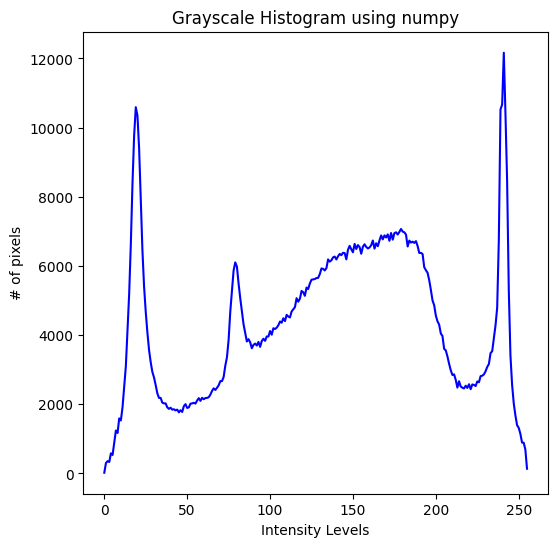

In [41]:
# making histogram function
def gray_histogram(img_gray):

  hist = np.zeros(256, dtype=int)
  pixel_values = img_gray.ravel()
  for pixel in pixel_values:
    hist[pixel] += 1

  return hist

intensity_levels = np.arange(256) # x-axis values (0-255)

#Plotting the histogram:-
plt.figure(figsize=(6, 6))
plt.plot(intensity_levels, gray_histogram(img_gray), color='blue')
plt.title("Grayscale Histogram using numpy")
plt.xlabel("Intensity Levels")
plt.ylabel("# of pixels")
plt.show()



2. RGB Histogram

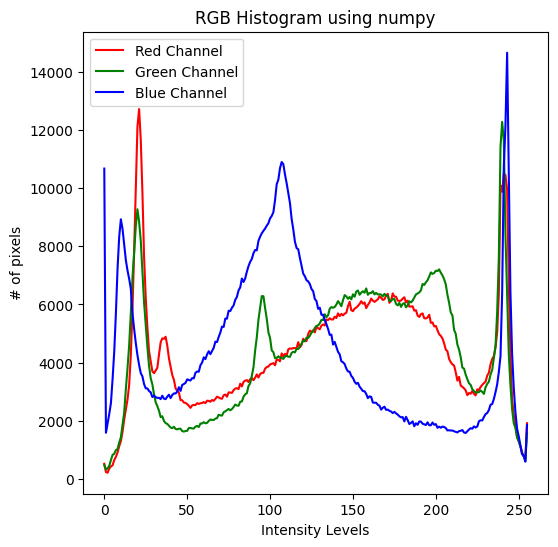

In [42]:
# making histogram function
def RGB_histogram(img_rgb):
  hist_r = np.zeros(256, dtype=int)
  hist_g = np.zeros(256, dtype=int)
  hist_b = np.zeros(256, dtype=int)
  pixel_values_r = img_rgb[:, :, 0].ravel()
  pixel_values_g = img_rgb[:, :, 1].ravel()
  pixel_values_b = img_rgb[:, :, 2].ravel()
  for pixel in pixel_values_r:
    hist_r[pixel] += 1
  for pixel in pixel_values_g:
    hist_g[pixel] += 1
  for pixel in pixel_values_b:
    hist_b[pixel] += 1

  return hist_r, hist_g, hist_b

intensity_levels = np.arange(256) # x-axis values (0-255)

#Plotting the histogram:-
histograms = RGB_histogram(img_rgb)
colors = ("r", "g", "b")

plt.figure(figsize=(6, 6))
for hist, col in zip(histograms, colors):
    plt.plot(intensity_levels, hist, color=col)
plt.title("RGB Histogram using numpy")
plt.xlabel("Intensity Levels")
plt.ylabel("# of pixels")
plt.legend(['Red Channel', 'Green Channel', 'Blue Channel'])
plt.show()




## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [43]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

/tmp/ipython-input-1965686332.py:14: RuntimeWarning: invalid value encountered in divide
  S = delta/C_max
/tmp/ipython-input-1965686332.py:18: RuntimeWarning: invalid value encountered in divide
  H_ = (g - b)/delta
/tmp/ipython-input-1965686332.py:20: RuntimeWarning: invalid value encountered in divide
  H_temp_g = (b - r) / delta + 2
/tmp/ipython-input-1965686332.py:22: RuntimeWarning: invalid value encountered in divide
  H_temp_b = (r - g) / delta + 4


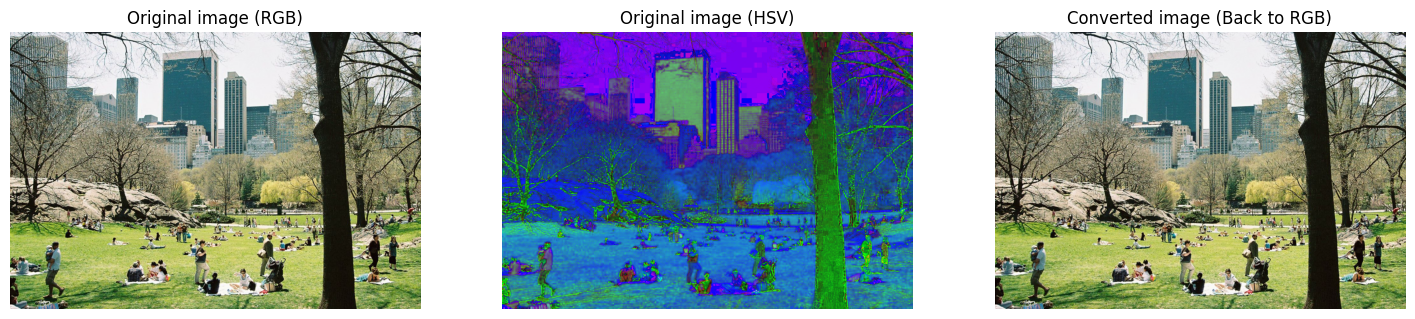

In [44]:
def rgb_to_hsv(img_rgb):
  img_norm = img_rgb.astype(float) / 255.0
  r = img_norm[:, :, 0]
  g = img_norm[:, :, 1]
  b = img_norm[:, :, 2]

  # Calculating value(V)
  V = np.maximum(r, np.maximum(g, b))

  # Calculating saturation(S)
  C_max = np.maximum(r, np.maximum(g, b))
  C_min = np.minimum(r, np.minimum(g, b))
  delta = C_max - C_min
  S = delta/C_max
  S = np.where(C_max==0, 0, S)

  # Calculating Hue(H)
  H_ = (g - b)/delta
  H_ = np.where(C_max==r, H_, 0)
  H_temp_g = (b - r) / delta + 2
  H_ = np.where(C_max==g, H_temp_g, H_)
  H_temp_b = (r - g) / delta + 4
  H_ = np.where(C_max==b, H_temp_b, H_)
  H_ = np.where(H_ < 0, H_ + 6, H_)
  H_ = np.where(delta == 0, 0, H_)

  H = ((H_ * 60) / 2).astype(np.uint8) # calculated H_ is in range [0.0 to 6.0]
  S = (S * 255).astype(np.uint8)
  V = (V * 255).astype(np.uint8)

  return H, S, V

H, S, V = rgb_to_hsv(img_rgb)
img_hsv = np.stack((H, S, V), axis=2)

# converting back to RGB
img_rgb_new = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original image (RGB)")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(img_hsv)
plt.title("Original image (HSV)")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(img_rgb_new)
plt.title("Converted image (Back to RGB)")
plt.axis("off")
plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [45]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Filter 1: "A-Ha! Holy Grail"

/tmp/ipython-input-1965686332.py:14: RuntimeWarning: invalid value encountered in divide
  S = delta/C_max
/tmp/ipython-input-1965686332.py:18: RuntimeWarning: invalid value encountered in divide
  H_ = (g - b)/delta
/tmp/ipython-input-1965686332.py:20: RuntimeWarning: invalid value encountered in divide
  H_temp_g = (b - r) / delta + 2
/tmp/ipython-input-1965686332.py:22: RuntimeWarning: invalid value encountered in divide
  H_temp_b = (r - g) / delta + 4


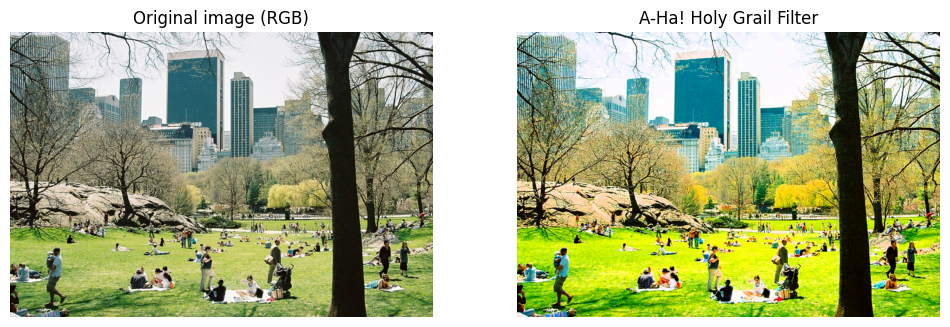

'For the A-Ha! Holy Grail filter, I focused on achieving a vivid, contemporary, high-dynamic-range look.\n   The core modifications I chose were Saturation Boost(* 2.0), Contrast Adjustment (alpha=1.35 with beta=-20),\n   and Gamma Correction (gamma=0.8). These suit the chosen sunny park image perfectly because the original scene, while bright,\n   was slightly washed out. By aggressively boosting saturation, I maximize the vibrancy of the green grass and the blue sky.\n   Simultaneously, the combined linear contrast and non-linear gamma adjustment pushes the dynamic range, making the bright areas pop and the tree shadows dramatically deep, resulting in a visually arresting, idealized depiction of the park.'

In [46]:
# A-Ha! Holy Grail: Vivid, High-Contrast Filter
def a_ha_holy_grail(img_rgb):
  # Applies a high-contrast, high-saturation boost filter and gamma correction

  # converting the image into HSV for Saturation and Value adjustment
  H, S, V = rgb_to_hsv(img_rgb)

  # We will boost the saturation by 100%
  S_boosted = np.clip(S*2.0, 0, 255).astype(np.uint8)

  # Adding Contrast and Brightness shift
  alpha = 1.35 # increasing contrast a bit
  beta = -20 # slight brightness decrease
  V_contrast = np.clip(alpha * V + beta, 0, 255).astype(np.uint8)

  # Adding some gamma correction
  gamma = 0.8
  V_gamma_corrected = 255 * (V_contrast / 255.0) ** gamma
  V_final = np.clip(V_gamma_corrected, 0, 255).astype(np.uint8)

  # Combining H, S and V values
  hsv_new = cv2.merge([H, S_boosted, V_final])

  # Converting back to RGB
  img_rgb_filtered = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2RGB)

  return img_rgb_filtered

# Displaying results :-
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original image (RGB)")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(a_ha_holy_grail(img_rgb))
plt.title("A-Ha! Holy Grail Filter")
plt.axis("off")
plt.show()

'''For the A-Ha! Holy Grail filter, I focused on achieving a vivid, contemporary, high-dynamic-range look.
   The core modifications I chose were Saturation Boost(* 2.0), Contrast Adjustment (alpha=1.35 with beta=-20),
   and Gamma Correction (gamma=0.8). These suit the chosen sunny park image perfectly because the original scene, while bright,
   was slightly washed out. By aggressively boosting saturation, I maximize the vibrancy of the green grass and the blue sky.
   Simultaneously, the combined linear contrast and non-linear gamma adjustment pushes the dynamic range, making the bright areas pop and the tree shadows dramatically deep, resulting in a visually arresting, idealized depiction of the park.'''

Filter 2: "The Gloomy Glitch"

In [47]:
import base64
with open("city.jpeg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAMgA+gMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAEBQIDAAEGB//EADkQAAEEAQMCBAMGBAYDAQAAAAEAAgMRBBIhMQVBEyJRYQZxgRQjMpGhsULB0fAVUmJy4fElM4Ik/8QAGwEAAgMBAQEAAAAAAAAAAAAAAQMCBAUABgf/xAAsEQACAgICAQQBAwMFAAAAAAAAAQIRAwQSITEFEyJBUTJhgQYUIyQzRGJx/9oADAMBAAIRAxEAPwDzwDelJo335Umi/msLeD6L0hjsyha2W7Aj1UgPVb09q2KJErqt/VTaLBB49VOgWg9ittG1LgFQbvazTe4VlWPcKQbtaICuuFjWC6G4P7K1rQbH1C1poiuEKDZVp4tZpvlXEeev837rRbv7H90TuinT2PKiRRFq9zbv1WgyxuuAUgb0QtUaIcNxz/f98K3T39FpzUCSZVW5C0ANwf0VlH6rTmriSZVp8td1Ej8lcQoluyBJMoc3/ha5ardPI/VRIQJJlJ4oqJVpbvvyokKJNMpeFW5XuGyqcFxJFZUbU6VTh2QGolqC2NxXdQCkEDiQ244Ua9gpdlpckBsfCPcV3Ugzv9D80UIe3bkKQjvjurFGbzBAytiFIN2I+oRPhADg7bLPCI+a6gc7Bw29lsN33V/h0U2xPhrqWXE2WHHLmOFh1gWFzaXknCE5/pQj0DVa2GUjsvp8+FOYcqMxyVdFViNEXNuLpgojo+6lo1Hjnj5onwt/1W/C3ulwvmCGPU33W9FgGkW2LftvupiBdRF5Bfoo

(np.float64(-0.5), np.float64(249.5), np.float64(199.5), np.float64(-0.5))

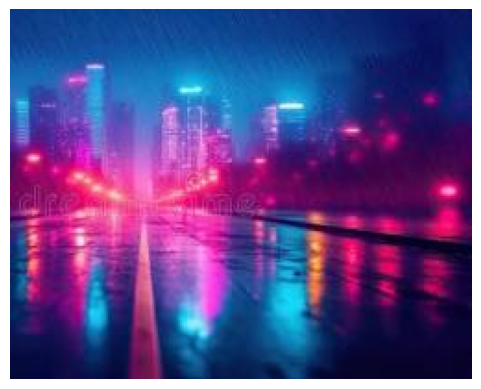

In [48]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image1 = '''/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAMgA+gMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAEBQIDAAEGB//EADkQAAEEAQMCBAMGBAYDAQAAAAEAAgMRBBIhMQVBEyJRYQZxgRQjMpGhsULB0fAVUmJy4fElM4Ik/8QAGwEAAgMBAQEAAAAAAAAAAAAAAQMCBAUABgf/xAAsEQACAgICAQQBAwMFAAAAAAAAAQIRAwQSITEFEyJBUTJhgQYUIyQzRGJx/9oADAMBAAIRAxEAPwDzwDelJo335Umi/msLeD6L0hjsyha2W7Aj1UgPVb09q2KJErqt/VTaLBB49VOgWg9ittG1LgFQbvazTe4VlWPcKQbtaICuuFjWC6G4P7K1rQbH1C1poiuEKDZVp4tZpvlXEeev837rRbv7H90TuinT2PKiRRFq9zbv1WgyxuuAUgb0QtUaIcNxz/f98K3T39FpzUCSZVW5C0ANwf0VlH6rTmriSZVp8td1Ej8lcQoluyBJMoc3/ha5ardPI/VRIQJJlJ4oqJVpbvvyokKJNMpeFW5XuGyqcFxJFZUbU6VTh2QGolqC2NxXdQCkEDiQ244Ua9gpdlpckBsfCPcV3Ugzv9D80UIe3bkKQjvjurFGbzBAytiFIN2I+oRPhADg7bLPCI+a6gc7Bw29lsN33V/h0U2xPhrqWXE2WHHLmOFh1gWFzaXknCE5/pQj0DVa2GUjsvp8+FOYcqMxyVdFViNEXNuLpgojo+6lo1Hjnj5onwt/1W/C3ulwvmCGPU33W9FgGkW2LftvupiBdRF5Bfoo+qzw6IPY90xdj7KBittfkuo73QAxm9u6i6PawEd4djYbqHh0a+qBNZAIxilmi+UZ4VOqt1oRWSOPRdQedARj23+Sh4dD5c/JHmK9wN+6j4e/HHPuEKJe4gDQR9FBzN/ZHOho12VTo9vkUCamBuZ3UHN/RFuZsgpSWk2oMdB2ac3Yql7aK0Xm+d/5FVl5oKJYUWY6lS8g8KTj3PCg7a/yQGJURBVke4UCKVkQQC/BMDst+H7Kena1l+wUhPk68RrZYiPDQWQ9zZC26CsGXGDlLiWhvBAV0GOHuAQEeQ4bHf3KOjkOgOH6LmXtfAozXPwM/wDBdDg2SaEE+jwUQ1joaja+wBXl4Slsz5NySB/FXZN8NrSwFoNdkI39lj1fJhjgSxRpinP8+SDuexJVYiROa2ss/PhaDVNmO03GLB/D7KQZtwiC0dloNrnhAS7KGx7oyHG1UhyCJN+y6HoEvTA1/wDiRk48vhkIN0rE5YyVULH4e3CElx67V6Lsn5PRI4ZB4Uz3EeXU8CiuazCw8OFnkeijGXL6ERc0+2K3w0QRwVUY9zf0TBzfJdbX/YVLmDfb/lTLMZgnhgj3Czw/MDSI02P5rcbbNLiTmDiH2UXRbcJvHjah7qMuNQ9lwr3+6EUzNLUFI87pxlx6WlKpG7/6e59FFovYZcgV7yhJRe6MkG1oOUpci9iQI7a1UfVExxOldTdyqpWGN5a4UQll2MZcb+ik91ClPccKTW2aCDJJN9Ir+asj2NK77M4M1EfJQYKdRRQc2KeNfJUWtbYpV/RXWBRWvDB/i/RF9FWmek9HMUkcniRa6PodvySPrbWN6hIGgtAA29NvdG9JJc1+kfpaV9YcRnOva2j9lYS7Kevga2HI1CMMtBc+XVtflFe/dEwixTD5b7+iWDSXHRx7phiyNER33A3B+iBue05dUXsGwAF78p3hv0xDZxNchJy+GmGMuu93HhOMV+qyzUQODX9Vz8FL1HVm8V/gAzj9+4gEV6oVkri8CxXe0Z1H8ZvlLw06rCP0Qxa9wjaD4Trv0BUy3daw2/dlXuGnc7IFbJr/ACJYXTZs1xLG+QGiSaHy3VWbiPwsl0TnNJ/0usJ10NznRNY4/d6nEBxNH+ylvVoXNzLrZw7fJLjN8qNHLoY3rppdkDjOly3QulY1xdW1kX6IHIL2Tu1DfumsUMgy2OLAPvgCQe9pXliVj2F5Nub5d+39hTUuyk9GPHwE4zmmAh/B4poJv5od4q0d04gYj9TWG+7haFlG5Rvsy54HFgpvevomPTulDJLXPyGRg8Ag3+yWucA+jfKfdJlhhfGDK5sZ5dSjkk0ujV0tKLac+xt03H6E2AHNzJ2zb6mtj2H1W+pRdB+yvdiZOQ6UDygx7E++y5LJyoYcp7depgcd9KrdnxaXaN9v4mn+qisLbvkzMzQcW4qCKs14Lqb37jskr3UXHYG/qippjINqFmkC5pOrfumtlvBrOKVkZh5Lo12KXSlNGxOmB0g0PQIPMxZIhZaRaROas14ac+PJLoX7jg8Kt1k7q4Ns0pzRBuwNpTkWcWtJwbBCFjXaT8ipWG8qsn0XWCWPhTTDpM50kIjIFfJDg2bQ+rZWNcinQNjLkz1zd0X2KWtfsfzVWrdStTckJ9uf4O76N5mONA//ADf8ilnXts1wAH4RwEFhZr2WGE7pi7pPUM2M5XgSOaf4qRnmjFds1Nf033JckLIj5v6o2FzgBoBFg70P7pCNYY5KcNwdwTSIxH23wy6gSL25U1NUWFqyhNxYVA1zhVOdVltOqk76SS6N4v6XsluK2jK3Vq8MkbD+/RN8FrWHzENLm3V/8Jj/AEWS2vT3/bORVnNOx25KDjamuREH6dFGz8v74QvgFjy01sexSlPopQ12ki/Cb92fmp5TfITXdX4MXkO3dZmMpoA7ocuxb1blZb0hrnQtawea3U7f39CFX1AaJnh2l/k5oivfnlF9GOlkdWL1cem6hnyFsk5unaKO/I2S+XyLvsfGjeC688NLo3N1jbTzxvwluZiapDJbW6dqBLjaY4AjbnNIB1NIcTfsgOtlv+InUW6H1te3f04Q5/Loua+tC+0Uz5UEjSRIYnX/AOtsZAPbm1CQ8qGQ2NmP4jdGm6aa3Kg9/wBw13fdOizF9R0o8k0gWctD3WjekZs+PIySB8TS3bzEXX1KVz3WyGlzTAwM0jUHEm/ohKS8E8Go4K2bz8nVkyuJAtxOyqbPUbgJAGkb+av+0ry8rxZHOAq+wQ/jniypLJRQy6icmxwXAxF2oVdc7rT5SIra7UX2BdHZKo3uJAJ2+aJhkvl9ULFqHMsw17kqGHTesuwXiTRE8t7PaD+6u618QP6vAIjDAwDf7uJrT+i5wPtxG5Vr2ujaDwVVnTlZrYJTcONWkaMek04UUZh4jZr1Ooe6WPmJeCUU3M0R6Qo2x2s9eORua6Bs+MRSlrTaD7q+d5e67VLlLkZ2xGMptxXRDupt491lbWtgV2R5CY4/s3ey1S2BysXWPURpiDzjeiTsuwx/ibqGBg/Yo5vu6rZcYyxxyEVE9z20ASfQBInFT8m7qyhHHxkgkB0+Ue5ce6vkxXY8mhw8w2QbXFjg4I/Ec2WdnjvOkncqfPjEu4seLI/kuwvBglawu0E2b3RWSXRtjLSRTa2u10nSup4OLiGB0UUuvhxG7VrqPS4MljHYT3SuItwDaoquvUZx+MkNlOF+3ONIAxvPgRfxeUcn5rZiLXN1to+63FFJifcyNNNPH8kTkMAAcwUOwT47CkVZa0VKl4LsKP7s7d1HOjpre2/KI6cAYj81vqsZbjtk2rVVJiylZ669ygGMvhxbANi652Wo3PmaTkOLHEGzpJJ42QM2RM5mknvt8leyU+HGzgk1+yDyoc9R0Fwysb1B5LiWhpoubXYf0QOXiTZk80uM17w0jetx8vRHYkE3jh16mOZbnDdjfaq7IxmTg9KnyYpXmXVwY3ED6qrLZafQYLg/grZxT852K4t8ONz2X5XA0PpaXnqLtNKzqha/Le8HZzjW6VV5ircMrqxe7rxc6od9L6s3HmdJLjwy6hVSNsJb1rJ+1ZLpfDZHf8LBQWmtayIku8x4CFmOvclRvuwTxqOLi/IA7uoUR2RBZZW5C3wwNIsKXMyXrp22aL4/B/D5/W0MZXEj0WG7UNNWF3IVkuVdGg8tdaufkOkbuqC02sDSCg2Ri5xVIwm1skkLNPcKQb2ULJUyIFqJCsDSDalptdZzh2Vhp49VPSdtkTDDr2pHM6ZI+M/duPuAo8i1h08mVXFCdwpQsIvMxzGacKQdKaYjJCeOXFoaxt1cbVuSeAEZFG1hNE7gbOFH8TVmBi26i9guqs+hB/knEXR8eOCaZ+fEC3kE+9/nsoTaj5NDF8xRFGJSdRNaiNhZKIhYNTg11hhoEDn6KIja6N+lxIId+EX3aisHHLwAGSF1mxp9Ryucei5i5LwXRvMfmBdYrUCF0nRetyYZOg04j0uggunfDObnh2mo2N3ruU1f8NxsjJMrtTa9OeFUyKDdMvZM+CUPbyOxji5WLm5IfmAeY8hWdVw4a140gLTuABwleJ04mVlPJ823e9mqzNhmhcW+Y03ikhY2n0yk4r3Fwl/BPCJiDm7jfgirROcfExAwCyH3xaVxTv8AEIMdiz+xVskj2yEEUAQdrGytx5UMlB8rZkOC3UHTuYwckO7fRb6hJ0+CI+EPO03qI4r6qqKFsl2ybcc2oZmHgnGLvvGyF1Ev/vm/2UPbk32T65rk3/AuzOt5FPLJAGv5DW1YP/SWZU/iM1Oe6x+La6TwfD8E4dH9saKaKJ77lLep9EkxsgFut7Ldu1t8kp0YRsa80I9Y+hFO3VRaXX21NoO/VDRt1ku3rjYWSmD4mslt4kaRou2H2QWPJjlgGvdt2NJ9v02/VPUaRlZtinbIyR6e55ogjcKJxXvjc9gJaEXHjxTyRj7SwNJNbnnuTxajPBJA50MWS0x+vqiqshHYwqPLKK9IvlVuFOIVxxnWfvY/zWjiyF1tc0/VS4lH+7xS6QPo79lF7a3TaPoOdND4kbA5oS3IxJ4XkPbRCWpRk6TDNqKuinSFtwAAKwQzGgAskhma3zClKiCbq6M2C1W1fVQbr4pbLZGm6KHECkn9E+wWClUSe6jqK6ge9FDXDe1paffddz0v4mwMTAEMuG1zg2r23XnWI4udXunkWGXxXdE+6VJdm1oznmxuEY2l/AJ17KjycmSSNoaHEkNHZJLRfUo3RS1aB+qYl0ZW9nl7zUlTHmNi4YNyOe76nddXhR4MXSzKOmyPcBQkcAR+pXM9La1znElor1XcdN+xP+HZHTNc6RpIY952B9gFDcuCiL9H2eeWUH3VHKyZ8oeRHE0D0ACJw8rJkkH3Y+RAG6pEw+2AAgAE8DdRbmaMlxa3SL/ERunJXE9DGai7lLqzr8CDq+Q+R8EOSWD8WiTS39FkmTJBbHNonmzZv908+CY487FmMmVkR03tIQkHUIcX7VIxk2Q6j5jZ0g/NVErnVC3nTyyi14CsHJqZpI81iq3VvWMgulNCwXHhKsXwmSNbG9wNgXzah1DIjbKGiV34j+JyZ7XyGLhzUwzEj1StDaGpw7Bb6rjTxZTwyZgo/wATSqOjSCXPx2hwP3gvvYR/xC4jOdT9JIBv12TF1PiJlnTyC7G+0Q2fFjLeSwWfyW8rIdIxoZMw0Q7SWOH68K/p7PGAJkJ/hr3R0nT8d0YL2jUTfA5/JMdDveSpi37QHy3N5XVyBdqMsoo6Te3fZE/ZJMacvZI2Vv8AkLRY+XqlmdI2SR9iVo9NlKkx+KcZlGbI7wh5R34ckkhYXeaJtq7JYwg+DkStcb2c0UlTvFBJMwPzaFPiqPN+q5P8nQ46X0zpubkFubG4N08tfwhJuhB2TI3DmmaGnbzjj6q7oOY6DKGqZgsfxMTbpORF9vnkmc0h10GeqTTUmU8k4SwQ+VM55vSeqt82PlskA7PYCoPd1rG2lxIJB6taF0GNI5mrXTdzWrZaycws4A57HlWZRVHkv7vL7tNJ9gXT/jSfp8JhyumPa07W1wH7hLc74gxMuQvEcjLO4dGP5FeidKaMnpjpPA1xgbkgUuG+IMHBfO9zI2NJP8Oy89r5ccs8klTPdqGR4U1IF6f1TAEoL5Y2/wC4UmHUMvBy4w6KWGQgfwb0kcXRYJeHlv0BVGZ0F0Itsln0qloPt+S1CW5DBftpx/IbG2HXZofRM/s2O+DVQv5Fca2HIjdUbpG1/lV32/q2OKbNKW/6mX+4Rm5CdX1KGFfPHY3ysSJjgQRSFEEepLpOrZrx96Q76V+yrb1F+q3Nv5FFT67Kubc155LUaR0+HhQ/iDt/km7WRiL8dEBcli9ciYBrbKD6gAos9fiIIbMB6aoj/VJk5Wbml6pqYcdJ9k+qQtkeTaWeB/t/NSyM8TG/Fjd8tlR9pP8ApViLdGRt7OHLlckNcBzWuJc4NB9SumxCw9O14mIyVw/FI5pO/tXC5jAkALmvhc6xzV0u6wc6OH4d8EM0PLbIoDlR3W+MaV9md/Tqb2Z9fRxk0jvGGtosem1LIXt8a/Ca/f0VeU8HIJsqOK8CTgK1H9JqZJ1lq/s9G+EOmx5sL5XwsawCtIs/0Ws5jTJK2DHa5zBQ01t9ChfhrqxxcV4BbQHF7oh+bTJHsNF3q3dVcMJPKyx6hNa2GWWT66Eupsbx4sRGk76hX7IfNnY9xLI4r7n/ALWsmeV2WSxxBJsklL8rKe57y6rvbURuFalHsoYNtT17TOg+F3/+SjIaym2aHJ2TX4tkezMhfHop0Vmx7lc98Muc/M1P2Iby0pp8UvcBhusO8rhud+yr/wDIX/g1y/0/Mt6Vk5TRscdpIq9N178p0cqRzGa5Yy7vpFfzXM9LnJIBLwBz7pg9zNTdnAXsHHhWXEC2P8dnTYDi6bzOafakr69BG4u1+GDyCRQVvTJakvQNvRZ1QRuB1NBHuEYR7L+lk5TtHF9Rx4mssZDTfIsCv0SSTGY4nRpd/wDSfdWxGlrnQiNpdzY2KRCJ7HGgwG+xKbKNGD6xOUc7TLcHDD5dJiaQebcaH6KUcMkUsnhwl53/AAPKI6efvwHs+dgFMen6PtEupu2/YKCRUuLwxv8AcAwn5LW25z42WbDiPX3CuyX4rm26anf7wf2TfFjyRH9yzHLD/mbX7JZnZWL4skLoYROzc6GpjXR5L3eeTpePwdB0F/UW4jvsY1Y7huCNvna5D4gkDclwlLQ7v8/Vdr8O5M8fTZNUD5Ii3y+GdvyXnXX8g/4hIHtLd+CbXltJOW5k68H0d5OGtH96C+lNY57fNyeWlGdfZ4TgCLttnTf80m6aWB4cdQ9wVf1jLtl+MHE+q1OPzNjX2EtFyf7gGLIGy9qKceJEY61D6jhc9iZDGy+egL7roInY8kdtLCK7Lsq7FelTWRSVr+RF1WMGQmm7+hS3wTJ5aH5Jn1XSJNhSCgdTxwnKuJh7cF/cNEf8OOnivmChpcVzDQdf0XU48rwwEOafekH1JoduWs+pSV2yxm9NgsXODOcLK779wRS34f8Arb+atmbvsB9Cq9J9EzgYrVM6vogpznOPlHPum0kMjMYStkLmv7XdBc9hZbYQQbCZv6gx2OxrCW/5haflTaSRP0FQhtTnk/AvmouJP5rMegdioue0knspQeZ3l2Cmk6NlxufxZ0XRMgRvJIt5FbhNRU73sdI5oqzQ3XPYP/saA5dF00vY2V4pxut1PFH5Nmf/AFZnlDRhFfbOfmdH9peySQithslmSwWaIr0TXr2MGZZkmbu7gNSGUNa6wTaM12Zvp2dT1EvwdR8Ij7yYjgACk2+KmhmBjPF7SEc+oSL4TlqGcu2twTr4icJOhOdd6JGlZzdbKPQedL+ADprwWjzm00I1i9V+qQdKfbNQ5XR9Mi8Z4ppPqtOjGlnUYdjDozXeLbjW2yJ6jsTe6niYro5CGtoWq+pjS8i+yMP1G56LkWS2c5nFotruPZc7I/RJpcdjwU76rMG2DyudkIoh24TMnk896xsrJstL6DsfU15Fm0ZgAuldZq0qxchrQWyai4/hcnPRm+JJzyoIxtzO44lTHOLgT6NUeS9p9KsIXM6XOxj5Xztc71LU+wzTdJBHutZ8d47zYFAqTXR5mOzNZALCEsfTXNY4Akf5dl5110PGU8OIJ77LuY89sPTnkyg2DQJXn3UcgTTvc4d+y85pYpR2Mkn+T6nsZ4vVx/lon00EPBDtO/pt+St6zFGyIO8JuruW7fog8eZreCVLqE5kbzYWjx7su6+eC0ZQfkAgDHyVenfuaTqXp4ix2vaXhxHz/VJYmgv8wsJvE+SKC4ZyBX4HcKE4sh6asbUvcjf7/gS5Ekuoh8hdR7lTxQHncj6qjLAdKSBpNqqNjifKf1Uu6M1zrK77OnbjFkdtawikszCQ4tBNe6rgycuJn4tTRvRKjPneN+KPSoRXfZq59nDPElFOLApB5lDT7hWOpx2K14R9CmmHLyMQdIFcq7xHltloQ0JB5NIm2gVqTxepFqXbKXOJNWicZ4AAQT3AHZSidTkU6LuLNwmP8GUxytXb9FjilxHOePOXbrzvHmpzT6LrOkdSMWPv33Kfioyv6pye/hxwj9FPxmQ3QW7b0uNmc4908+J885L6HAK5tzyUvI+yl6YnjwUzpOgP04rvdycdRf4nRclt9gQue6ZMIcTi7KcQTNycKdgPLOFmy/3bPZY1eqo/9RV0+YsApy7b4aMjwXt3FrzvHJDqBXcfB3Uo8VxbPW/qtWLPCepTye3UWd7Ax2h5La+iQdelbC4uca2XSRdYx5nMijFuf2XK/GzWxA6tiRwo4m1PtGj6P6tLXjJRd9HIdSyRKS4cJQ6QHZSyJ627Iawd1052yrcsknOflhERGoLoekFsZa4O3HZc5CbITfAmEZGpGDKm1HlGjuMbJY5vItCdZzZosZ/gN1O9EBjzhtHsVdlTtfGd9ym2YSxccidHHuzR4cjciMseSa9EhyiNR0GwV0HVJKD2lgN+y5uQ+Yhw2tUXBRk2e0w5+eOMfwRYfdRncSOVstDfM02FTI8FRZoJ8YUyAeQUR4jtHJQhKta62qIMWRxKpXG1uJyjJ+JaBooEU6lYZo1sOlCSMLTvatbIQNiq5HlxQH5JxlFfkp3Cn4j/AFWli5Ir2FArer3VAcVlkptiqLbVjHboe91NpRsnF9jCF5TXDy9EeknhIY5NKJY8BvKbGVFfcSyJFnUZtbjXCXE2VbkPu0O02UuT7BjjUaHuGP8A8zRaadOGgvA7sKTY79MLUxw5Dr+hVSX6j1WFrgo/sL43NZkPB7OKcYkjHcblc/kv05knzTLpWaI3ealfxyPFbeJ2x90rNkizCTI5pZ+Gyo9b6k/KlJnk1UPVCzubNckZo+yTZUxLiHncJkpUiliwqUuRqZ4c7Y7Kouo7KpzhyCoeJuk2aCiHwupMIpBQ3SaOUd0VFKzguCkpCsmOzosXJGkC0W/JaY/OubZOWbtIIVv23U3evzTOfRQlrW7RnUJGkk2ufyaso3Ln12LSud3KTNmpr46RWX0DvsqnOtRc5QtIcjQSJLYcQoWstR5EqJXaxRtZa6wk9XZaUVlrrCbWKNrPqhyAWWstYsTELMB3VjVixEKJh1FT8TZYsUiMkmVSPUYzbgsWKDDX0OoBcbUbjGnhYsVefk9JDqhP1M1lOK3h5IaacRSxYrMGeb2YpykN48pmmg4D6pXnPt933WLE1u0Z+KKUgfVY5Wg71WLEssk2G1CUvYbHCxYufgC8hmBkl3keUZOA1ltpYsTI+CvlSU+hHkSvDjVqgzEiisWJEm7L8IqiolaWLEpjDFpYsQOMWLFi4Ju1i0sROMUqCxYiFH//2Q=='''  # long base64 string

img_data1 = base64.b64decode(base64_image1)
img1 = Image.open(io.BytesIO(img_data1))
img_np_array1 = np.frombuffer(img_data1, np.uint8)
img_bgr1 = cv2.imdecode(img_np_array1, cv2.IMREAD_COLOR)
img_rgb1 = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB)

plt.imshow(img1)
plt.axis("off")

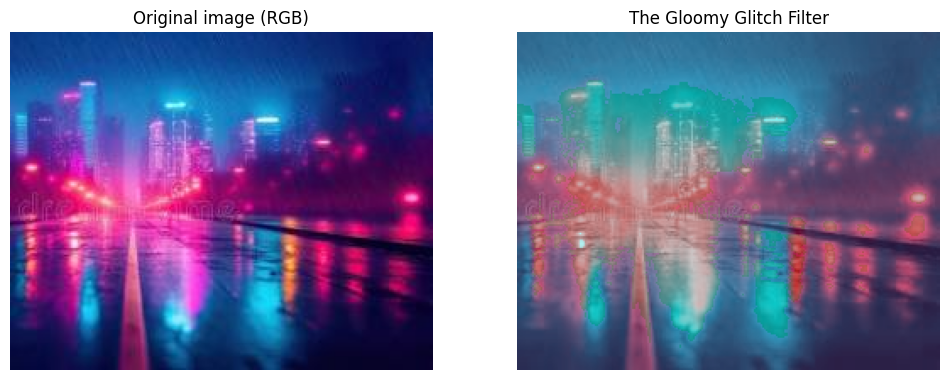

'The The Gloomy Glitch filter was designed to create a stylized, moody, and highly atmospheric aesthetic suitable\n   for scenes with existing darkness and artificial light. I implemented a combination of a substantial Brightness Shift (Darkening)\n   and Split-Toning, using deep magenta in the shadows and bright cyan in the highlights. This approach works exceptionally well on the\n   night cityscape image. The overall darkening enhances the inherent gloom of the night scene, while the split-toning separates the primary\n   light sources (highlights) from the surrounding unlit areas (shadows). This gives the image a distinctive, cinematic contrast where the\n   magenta tones ground the dark street, and the cyan tones emphasize the cool glow of the distant city lights.'

In [49]:
# The Gloomy Glitch: A moody, slightly broken-looking, vintage filter
def the_gloomy_glitch(img_rgb):
  # Applies a dark, split-toned filter with shadow magenta and highlight cyan

  img_float = img_rgb.astype(np.float32)/255.0

  # First we reduce the brightness of the image
  img_darkened = img_float*0.8

  R, G, B = cv2.split(img_darkened)

  # Split-Toning
  lightness = np.mean(img_darkened, axis=2)

  # Shadow and highlight masks based on lightness
  shadow_mask = (lightness < 0.35).astype(np.float32)
  highlight_mask = (lightness > 0.70).astype(np.float32)

  # Shadow Tint: Magenta
  R_tinted = R + shadow_mask * 0.15
  B_tinted = B + shadow_mask * 0.15
  G_tinted = B + shadow_mask * 0.00

  # Highlight Tint: Cyan
  R_final = R_tinted - highlight_mask * 0.10
  B_final = B_tinted + highlight_mask * 0.15
  G_final = G_tinted + highlight_mask * 0.15

  # Merging everything together
  modified_float = cv2.merge([R_final, G_final, B_final])
  modified_float = np.clip(modified_float, 0, 1.0)

  img_rgb_filtered = (modified_float*255).astype(np.uint8)

  return img_rgb_filtered


# Displaying results :-
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_rgb1)
plt.title("Original image (RGB)")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(the_gloomy_glitch(img_rgb1))
plt.title("The Gloomy Glitch Filter")
plt.axis("off")
plt.show()

'''The The Gloomy Glitch filter was designed to create a stylized, moody, and highly atmospheric aesthetic suitable
   for scenes with existing darkness and artificial light. I implemented a combination of a substantial Brightness Shift (Darkening)
   and Split-Toning, using deep magenta in the shadows and bright cyan in the highlights. This approach works exceptionally well on the
   night cityscape image. The overall darkening enhances the inherent gloom of the night scene, while the split-toning separates the primary
   light sources (highlights) from the surrounding unlit areas (shadows). This gives the image a distinctive, cinematic contrast where the
   magenta tones ground the dark street, and the cyan tones emphasize the cool glow of the distant city lights.'''

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [50]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [51]:
import base64
with open("img.jpeg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAMgA+gMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAADAQIEBQYAB//EAEQQAAIBAwIDBQUGAgkCBgMAAAECAwAEERIhBTFBEyJRYXEGMoGRoRQjUrHB0UJiBxUkM3KCkuHwQ6KDk7LC0vE0U1T/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIDBAX/xAAjEQEBAAICAgIDAQEBAAAAAAAAAQIRAzESIUFRBBNxMoEU/9oADAMBAAIRAxEAPwCuwGGCMg9DQeykt+9bkFesbcvh4f8AOVGFdLGzxMqNpYjY+BriZgxsrZ7DYj3oW2x6eH5UWNw+ccxzB5isldXt9ZXjLLGQ6k4LFiSPEHNXPDuMQXoCz/dTgbN1/wDqi4npcbV2KYr6cB8b8mHI/sfKiipqSYpcUtLigEC05Rg5rgKUUBxUKcgdxuYoJTs3x0PKpC7bHkedNZNSmM+qmmDAKXFNQnky4IolIG4rsU6uxQDcVxApwWlK0gER4A0sPeU7Y3xvTiKWEYQ+ZNOBXccIWxK/jYL+v6U/hkXZ2UOTnK5z61H48SxghHNmJ/QfnVoiiOMD+FR+VX8BCuzmUKOgoDYAyRkKc48fL50kKszySOe8znbfHOlfnt03+PT9T8qQAlYRoxdh3QSzePUmsZeTNPcPK5yTuf2q79obns1jhRtzuQPpWdcgLudhW3HFQORyq77u3KpVvbtCoA3nfn/KKZaRYxcSKSzbRJ41YxxkZUd6Rvfb9BWl+j25VDHQkat4swzk0OWcRZWIqAObBR9K

(np.float64(-0.5), np.float64(249.5), np.float64(199.5), np.float64(-0.5))

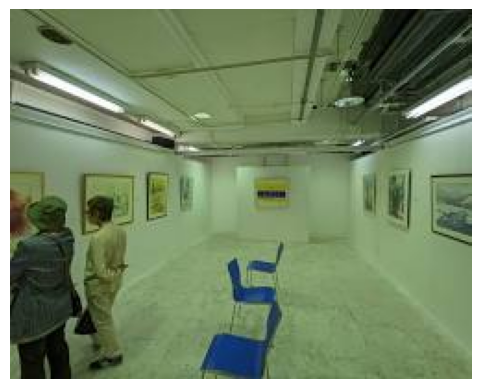

In [52]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image2 = '''/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAMgA+gMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAADAQIEBQYAB//EAEQQAAIBAwIDBQUGAgkCBgMAAAECAwAEERIhBTFBEyJRYXEGMoGRoRQjUrHB0UJiBxUkM3KCkuHwQ6KDk7LC0vE0U1T/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIDBAX/xAAjEQEBAAICAgIDAQEBAAAAAAAAAQIRAzESIUFRBBNxMoEU/9oADAMBAAIRAxEAPwCuwGGCMg9DQeykt+9bkFesbcvh4f8AOVGFdLGzxMqNpYjY+BriZgxsrZ7DYj3oW2x6eH5UWNw+ccxzB5isldXt9ZXjLLGQ6k4LFiSPEHNXPDuMQXoCz/dTgbN1/wDqi4npcbV2KYr6cB8b8mHI/sfKiipqSYpcUtLigEC05Rg5rgKUUBxUKcgdxuYoJTs3x0PKpC7bHkedNZNSmM+qmmDAKXFNQnky4IolIG4rsU6uxQDcVxApwWlK0gER4A0sPeU7Y3xvTiKWEYQ+ZNOBXccIWxK/jYL+v6U/hkXZ2UOTnK5z61H48SxghHNmJ/QfnVoiiOMD+FR+VX8BCuzmUKOgoDYAyRkKc48fL50kKszySOe8znbfHOlfnt03+PT9T8qQAlYRoxdh3QSzePUmsZeTNPcPK5yTuf2q79obns1jhRtzuQPpWdcgLudhW3HFQORyq77u3KpVvbtCoA3nfn/KKZaRYxcSKSzbRJ41YxxkZUd6Rvfb9BWl+j25VDHQkat4swzk0OWcRZWIqAObBR9K64nVFMURyP4mHU+AqMEdzhFy3RfDzoJzzyM2jLMx5L4Ub7HJ0J+Y/ap8HCns4EuJYHllkPcj5Z828F/P61Zra3TKGe7ulYjJVIl0g+A25VNo2vlYVIjGaqbl57ZNRiZhnGRTrS+uGkUCJRnxf/asdFpbXFnDdxdncRJIngw5VTy+yliX1RvPERyAfIHz3q/s7yCTCXH3LnYauR+NWTWBK6l3HiKuY/Rb0zaWLW8ISCQyADDLKchxSxPuVGoMOcb8x6eNXb2jr/DUW4s1lADqcjkw2I9DUXAbRUYEU/FBkjlt95e8g/6yjl/iH6/lRFflnG/I9DUWA/FKBXDFdkDrSBQKUrkY+RpvaL400zJ1Io2HMue+OY96nLg0sTa8sBuvPPUUheONsF1AO4yRtQDtNdpobXtqmzTJny3pPtkZ9yOV/wDDGaQGAritB+0TH3LOQj+Zgv51xN63uxwJ/iYn8qDEK0MOApBO4J/OmmK8PO5RPJY800WLMuXu5/RSAKcCtum7XisOxIjAPL4/tUx7lGUpuM9TUaytkl4hchy7LGdIJbfPqPQ0nF7m1sGC9iWbb3RqOT5mq7B8HeBCgk6m2+JqJxKU29hLIX7N8ZyMHvHoPy9BTX4qtrZmcwnLHEYJA5756+fyqk4jxIcThWNFCtG24B5nHn4eNPHGjSqkd55DJK5Yn+I/n+lAgh+0SksfuUOSfE+FGuIvv1tYH1MR3mHJRUuGNI4lCqBGvuD8R8a3+FFVWDaiMOdlH4B+9JNKIVMcZ35M36CmyTaQQp3OQW6/CktLOa6lEcQ36t0QfvThBQQSTSrHCmp/LkvrVzD9n4QpVFWe7z3tW4U+fifLkPpTDNFZxtb2OC38c4O/ng/r8vOtaU6tMfec8sUF2s5+N3ZjbtJsuw5KB88/88vKsa9nZixwcnPuZqXDYKoaW+Y56pn8z+lSVvLcKAUIIG40r+1I2hiN/aQg3EHa256uNa49at/Zf+pnmtFvrh7WS3J0yMmpHB6NjcHzq4sLZ47C307fdg/MUG54VaXBzJB2b/ji7p+XI1Cmuu/Yng/FLbteHSogfk0ZDxt6jl8sVmLvgHHPZ5i0IL246rl4/lzWodracT4VKZuD3rDxAbSx+HI/GtHwz+kC5tmWDjtmT07RF0sfgdj8MVpvGpuMqqteLW1xhLxfs8h5NzQ/Gpc1jqXUp1A7gjrWhax9mvadC9nJGlwwydGFf4oedUd37Nca4IWewf7RbjcqoLD4rzHwqv77RcbFVNaMvQ1Vz8P94xd3PND7p+HStBBxa3mPZ3sZt5M41H3CfXp8aJdWQxqXBB5EVnlhL0W2M0XCOVaMk9AZOf0p4huZBssK58XYmry5tVddMi5HyIqBJDLAckmRPxAb/EdfUVz3HSpUD+r5xuHTPkv6k0dLJsfeXE3orAD8qlowZQQQQeo5GnAVOhtF/q+3zlg7n+ZzTvsVsBtDGAepXOD8alYrsfKmNgRAKuAoQjYgDFErmBG/X8xSg5pAmKSnkZrsUEEwpRjshnwpzCo19KIuHM3UR7fKnDROCDVDJOf+pIW+H/M1Gltra/LSyw6gzastkVPtFFvwuNQMZUDHrvQEx2KDoRvToCuY4Bw14exjEpRtLuwBQBeQz6DbqaxcqGO5eMGJtDYeWJ9QkI2LA9ckZ+PlWkvXE87jXhR3T51nJkkTW7xyKgJOrScfOtMOjkNWPU7MVwG97zxyWknaQkgAeB0kHHlQola5m7OM4J3Zvwj96tLazDzSStMEtyTudtQxy3rQ0Ph9jJdMznKRp70jbBQOdSZ7iKOIQW2YrYDDNjvP/t5UDiEssjaJCFhU9yJVJUeZ/EaH2XakGR86RsqoV/OqGjcy3ZCRJ2cKnck/U1OtYkhwlupeQj3sbn9hUzhvCbziTx20EDYbZY41yz/D9TXqvst/RgkKJNxptK8/s8bbn/E36CiS0nnfBPZm/wCMzhLe3adlPeC7Inqf0rbr/RtfaRm4jU43UKuB5e9W34h7QcB9mUWxjaNZVHdtLZQXHqOS/GqBv6QZixK8KTGdszHP5VXjjOz0ycfEeKxlBBNbSxqoXspoyvL+YdfhirCHjwAxxDh08PjJD98n03HyqsWC5X3WWQeDD9aIsskX95byLj+KM5+n+9Zy/adr60ueHcQ//Cu4ZWHNVbvD1HMUSe1YoVdQ6dVYZFZ5zY3hH2kQuw5dsmlh/m6fOpcMN1CmbK/uYkHJZCLiP/u3x6MKNQ5kbc8LiVg9uXtnByChyM+lTuH+1vH+EkLMV4hbjoclgPXn+dC+2X3K4s4blfx2smlv9D4/9RqJPPaM+ku0EhOAk6GMk+WcZ+GaPc6VMmsj497Ke0w036izujtqk7pz/i5H/NVVxnhc/AB21jfpLaHGx3AzyyOXxGPSqSSzinb7+JX/AJuR+YoR4HMO/ZXH/hyjI+f+1FyFxlThxITDvoA38prhIj8jVa0KpLCl/DLZZcB5kJaMrncjHXyq+X2YunsY7nhl3BfDSNaxSZKnyJ/XHpWV3S8LFZLb7l4iFY7kdG9f3oSuQ2hxpbwPX08aI9zLbOYrq3dJAcFSMEU8mO4j5Kw/xcj+lZ2JMJAGTtXKc8uVHg4g1kQYoIzJyYuofUPzB9Ofh1pl1xMXrK8qQI46omkn133pEY4JTujJ6UEZDYIHzogmHRWPoM0KdiysVRxtzxQZ+T4D50jF8HGM+tRwz/z0vfPT5tSMU6gO8yj4VB43EZLOKHtCC0iAYAozxyEHur8811xbvLNA7TJojfURoOc4261UJGvpHgeC1hjd4yvecuuI8ctuZzUGYzBEEYRgF7wLEZ8ADj61YyRl5GZiTn8qC8J8KoCvxu2tbQR8Ns2tpw2WfCttnYZO59TUHiPH7y5t3jQaCQQZHOo4P0odxA3ewPDaojRuxOtGVQeR6mr8tjUV/C+HxQQj7RpSMfh3ZqmcSSyZI5ib1tb5jj7o0jxwM88CiSITz3qMzyam7zcyOdPezRPsy3MpWztp98d6RzsfPavQfZH+jK7vtF1xL+zQcwZFy5/wqeXqflWP4dxKbhd+s8QD6SCUcnDbcjjfr0Naa49tOP3VssVzeR2ULc2iXQ7L+FcbgemPPNaY6+TekTcR9l/YeBreEobnHejj78zn+Y9PjisZxv274txbUlq32C2O2mNu+w835/LFVdpw61uo1WPhcyMy73N3cMrO3VhGuSfpVxD7N8NsYhJfCJBjd7t+fpHnJ9DV+6PKRS8NhWeX+zW7TsFIeRV7urPVuQ+dXP2OXrLZDy7Rv/jVlHPF3EsOHzXgAwrz/dQr6L1FShJxrGzcNUfhEZ28uVPxiPKs4jVIjfeoSmjK1YQJvZwS/wB5GreopP6ttSdUReFvxRtigo9GSWnsi/Y7tD91dLIvhMmT8+dNf7WqlZrPWhG/ZPkf6TR0moon2phROltGw7ISWjdAqlAP8u6fSj23ELmI/wDRuUH+RvmMg/IVZyuHGGAPrUGa2gkOTGuehAqaqZVLXiNtKmJUkiJ2w65HzGR88VnuL8Ss+DMt9ZXU0L9pozZOM5wTuM46VZralf7uZl8jv+dAveHJdri8s7a5HQldx6ZzUzKfK/N1n/SJwniMC23H1WXbCzSRaJF88r3fyp1tZtcuLm2m7O1YEqdSsWGe6c+m/wAfjWWv/Y60kcmIXFtnkFYMvyO/1q84MvD7OwFteWd1JJGQol90YGBzz1p3xy6G5VuYVQYMhb1aos3ddcMQucHvU6/fgstsn2KS5tp1UBu1mRkJ8eYIqlEnZk54jYMPBjnP/dUXElwcH+M/OmMF6nPqc1Wq+shY7yzIP8pP/uFIYxKuEu16d5QSfzx9KWqWlllfFfnSZXxFVL8PQjv3c2KAeFWWe9LM+PWjQXbOg5so9TQmniz/AH0fzqoXhHDg2S0uSdssR+lSV4TaYIGDn8TZ/SnoaS+0hblPGfQ0rRYUOc6TyOk7+njUaG2WBi8IlB5HB506WSbG6XLAdBIP/kKNEHIsYfDy6fHPjS/ZhdKxhMkgBUFkjJxk7fM1BkSMOTJBfnfPeucg/DXR7n2mkHCvsPbTrBz+yQRqGf1KnvfEmqxxl7AZjtS4RZGkYjkoqslgIlMYD6850gamPwHL1JFXPCoeIGMmK0msYX/jlVQWHzJx5VJisjAulpnY6icgAbHpTusQpILG41h27O0GdjkPKfjyHwq64Tw7TIGtrWSRzzlkbBP+Y7j4CpdvAinKoATzPU/GrqyXSBSl9lak2dhdKmHultlPNbVcMfVzk/KpcFlZWza0hVpeskh1sfiaarnFMaStvJKRJcb0Ltz41EeTehdp50eQUiyr40RJAai9hD1jX/TXdjF0UflXJ+y/TTUWCtRA1QOHn7lt+TmpYNay7mys0P2mKcJfOqni8zRWjMhwfEUywtxJZQSyTzl3QE/ennilln4iT0utYPWlyD1quFso5XEw/wA2aILdhuLyYf5VP6VneWfQ1E/FIW5jNDsu0IlWSUyaWABKgbYB6VRo0bcU4h9oRXxMETVnYaNW31oucmPlRpcy9+mQxrI+h1DLnkaFAITpaFSvewcOSMYPTNJcTtb3USryZWZj6CjDOZzcK+ls/s/YTwFxEY355Q1RpYmC4KaiQM861fCbg3FiHcAZAxjzFQHhDXZPrV7LHOoSwYWipwye4i7SLRpzjvNU/sRipFseytyn8xNLYuX0ztzw64jBB0H0NVqWs8eoME3Yn3v9q0XFJzHpxjvZ3NU8kjuT30HwNReXDG6tVjuxDa1lLqe5gHx/2qVHbueopupgR31byxU2OqxzmXuUXcBMBRtJ3OOlc0JxyqcqajmiGIVW07Us1qrKQw2q/wDZ7htnaW/ax20YlP8AGRlvmahzRd01Zxu0XDpGQ4ZUJHypzLQvtF4rIWY5NVT7DJob3j3FxFqYkl8HJ8j+1JxSWSC21wHDnujbONqWdtonSXbjVyVv9Jq0tSrRqyHKkbGqOyuXYRapSzdkzOByyF/c1Y+z+f6kscncwITn0pQLMtgeVBdx41XcWE8k6LFezWyCMluyVDnfrqB+lVzWrn3uK3x+Kj8lqvIaXLyDJ3oXaDxqkeyj/i4jfn/xSPyFN/q+P/8Atvv/AD2p+UGoBwm9kliAnYEjqdjU63lSdpNGTpIBrJJeTtJoTu6jsQdxRbl2aRyZH7NTgRg4GR1PifWsLjZXVzTHH20MXEbe2V0bWx1se4POp1reQXWeyfvDmp2IrAHiLI5BkZVU+6Ezq+PKpvA76e64xbIqKuWzqVtwoGTn4ZrTGWOe7ajj23D3PpQRxS0sOH2qzyZk7FT2a+9y5+VH49vwuY+ArCcWBkvFESNHrRdWse8QAPlypZTdXjNxsYvaTh0+wdkxzDirRLnWjYXePGrfbkOVeUwGWS5jhUANI6ooHLJOK9KCuIijSrIzDHdGDy2zio5OOY9Iymqu7QgNMOpcf+haztzDr4hfsZNCrdjOOv3SfvWjtecw8HA/7VqjnglmuuIiEHJuhnA3/uo+vSpy9cYnaZwyNUUaNRB37xyf+b03jAdZInjUswRsAeqj9adwlZY5GiuMBwpITUCQMjzqXcwNM8eg8gQd8bHH7VXFuYll2suDNpsAPPHLHQU4H+0E0K1Bgg0E5OSedcjZlz5VbOdpZNBeTBxSlqjSt3/hQpW+0puWsf7Fp7fPd1DPUZ+lZMtx7I1LEW25oBg9a21wpkClT3lNAMcn8vyqL3/mX+xpjdRm+ENxVrwrxBIhDo2K4zqyvgfWtIgwOdM7FidyMZzsKKBVY/yT+DK7HhPdFGzUaI4FE1U0Fl900dm/sMo/kP5VFc92jA6oHUcypH0oDO24Vp4AnScnPlh672jLRWMbIcEN/wC00SwsZba5+8IZC+VI6bN+9d7TqfsK6Qx3IOkZ6EUp2ar4DNnt3AOBDKdRPTGwrV8GIXhVmnUQJt8Ky/C4mi4RPKu6G2mJIPXAwD8jWssV0WVuvhEo+lXaVmkbijaZCfCBj/3Cqn7eq91z/qHKre8710gxqzC4xnGd1qnu2sOVygWRcd3fO/hjnTx7BVvUZ9CDtGPICjap/wAMA9ZD+1VpjgRT9mupkVsDLch+Rpfsd30kUjxzzqrB6Y+2MkkqsOhq7uOHyyQNPGWyo+8Ucz5jxqVcW9hw4xmdyGdjoVB9fTl9KZd3KzRNEkzxxsNwjYJ+P7VOrn7jo5eTGzUZeVUzpW4Drz57ipvs7cQWnF4ZbmXs0jDHOCckqR09akNDDbgG3ityF5awv1/3zUGWWKUsdkwe8kSgZPrWkwrPc03vFcPwmd0YMpTUCDkEVU3vBRNaxXCTwxFoVz2pwM48al+zGLvgHYzRuItTRqC2SV9R8R8KsEjtLOdQluhcLnLbny3+Fc/JLKMbpQ8G9lEhMN/PqSVWEixncAjl8K0yvOX0WqW6jHvMST8hj86BdX/QnJI+VRYLgm+i0tsZAPyrPdy7O+15axvEjdo4d2bUxC4HhsPhQ/sEBmllPaEytqde0IUnAXkOewFSaWtZNMtmRQxwrphjSNfBFAFPXY11d1oIrNtTIm7+accAZY4FRpWOcJkUgml/OgO2XqJ3z/EfjTo2cEjGfjRs9JFIaZrb8B+FKWOM6G+lGzLimmkSeN5HjVsumNS9RkZFcZFz1+VANDYNPDVCleXtmKoxXOxwaUSS/hI9aWy0ls21HhPdqAGckasfWpsHu0wdIoznAzQplcjuAHxB5GjvypMUBT3kEQs7tIbfspZYHQBeTEg9PWrmIFYUXwUCk0g7MMjzpxNAtQeIB2mVIm0yNBJoPnlazF3b3tuPv4WKAk6goO/U5rV3ltBdIEuIlkAORkcj4jwqA1lcwb2N64A/6dwO0X5+99avDK4hl2vtMqSJ3gragv8AvipZ9oUyc2bZ/wAv7VOuwrZ/rThZI/8A3W3fHxxhvoagG39n8738i+RcDHzWtfPG9waU3Grl7u8dI27SKLKq4Hz+tQFLocF/doMp0KdUhIHTNdE0TD7ztF9ACPzrSYzGajTSR2reGfhQisgnL6MBlw2BgbcjStHEBlZc8j7pzQXPeUDPr47GlehI9A9kUZOCRF8AO7MuPDNDedpONXAbAC90DyFWXDEWKxtY48aFiUDHpVNcM8d4JpEVAzsVbUO9qPKuXku0zs/iMmmTcd3Rz8TRuDoHvLffcd8/ChX9s96YzBjKjkc985H7/Sk4bbXr8QgaOZYQA2oBA2kcuvPPSs40+Gs60u9IAfHNPwFGX28q0YE5b01mwdjk02Ry+wG3SmjI2x9akHAA+tIYwzdaeuOfWuyOmaDM7NTy3+FMRoJA3Zur6WKnSc4I5ioPtEZf6muTbMyuq6iV27uRq+maqfYWclLu2PugrIo9dj+QrbHh8uK8m+k2+9NPgAYHwpcEbE49DWW4jwfiF7IbhDEzHfTrwRkZ2+dRIrbj0Eix/wBrVTttIWX88CtJ+PhcdzObG79L/gUYdLm7kyTcTMR/hBIFWBwCQAM063jjhgjjjB0IoC+lOAXkN65sru7UHpPvb5pCuwzRwgGTgA01geYIqQCB0I+FHgONt8edd60mwNMDSLldqSmJIeTbjpRGHhypglITSHakzQRHoTCiMaYaYCYUzSPwj5URqbig3kU6ZcIXBZfeQdP3ouVRQk3dxjDD9fGnKkf2m4kjACBiq56+J+dEaNSCzFu6NwPCuv4aWhkoBnWPPnQDKGYFQdAPveNSxbxkfdkAeB6VywAAO5yByoG239lLxrvhEK4wYR2RYnmRy29MVRQW6Ss0l0skk+ogjXsD5YxVd7H8SktePi1xmKZjG2/Xdl/UfGrWUy2/FLm3TT3WLbjJYc9vnXPyY2DXsa2a6jdYjJldXIknFaH2fjJkmfBwo0lqz2gsnaIxD5GwJ29K11mi2tlDEDjSMsfE9axk9jO+kwzAd2Ln+LFCkbI7xyfnXLIMbDA6ZFMLAYLMQPPrVMz0YHlTgT4k0mM522pTgDr5YNIHZwN+dJnAGevhSppI1HFDbSUJxnflQDpQsiNC2MOpBHiDWI9mryHhfEZ0uZAgZCgfoCD9ORrapp04UHV4nasDf8Dv0vpyIC0QlZg6kYIJz+ort/DmOXlhldSoy33Gsh43w2MMkl2mRgbAkHYDbHpTl43wyUNHHdIX94AhlyRv1FY9LJl96OTPmpoKR9ldK80bpCGGTjpXR/4uCy6z9/8AEeeX09EiYCJF1DIXSc89tqfqBxVfDIHjjkD4BUMDnntRkdgAQ21eVpsl5x4mmasjc0MSEnoTTtjuu9ALk8wdq7Uabtn1prZB5UA/WR1okUpX3jkVHJBpRy50CxOZMrqHI0I7UyGYocasjwNFZcjUOVMgmO9Ia5qaTQZpptONNph5XAmmFUGxx9adqYatsbVx7oYkk433psRyPAHx+FdbQ4N8tv2pNRdsc/IU9kEcfaTsI4x/E3X0HWj+zE6XXH4EiXTDGGk727SEDb88/ClsIYsLzh/El4hdW00EMciuCR7xGDz+H1qXwy9k4lJPPMcTB9eR4HlR/b+9d5obTDCNV1s+NiSeX0FUfBJ5IeIoY1cq/dbSCQPA+gqbPLHZz3G44XcariFZwG7wOoDnv1rUkhc551lbXSSGJIOc7KAPpV80+sJjniuaJyGaTOcdOtNU5ILE8udD1YG9cGLHAFNOk2NwTgE/OiArmgRgAYHOns49086RDalIIyMU3VpAUcqBIwKaQtIHIHLGPGjQSUO/mahxS7rITgFWZTvg6mz+1R5bvSr6Jk1hSVXUMnw/KlZ3VVTIIUAbjHKjVgTGldVzIfPbpWf9sbj7m2gDElyXJ8h/v+VWklz2jKoHLris77S6pOJ28XUxqMDpua3/AB5P2bvwVXXs1K0nC1Eq7RvpQkZyNj+tW4jR11EYzyqFaQfZrRIFGAi7nxPWpUTnQAfyxWOd3lbAd2I1DOARSMigHUTjxzT1PLc0km4GTyNSAnXclfHbypFYumTzHMZ5GnNnbqOtc4BwygjPOmZNieWT513pTNyTvv5CkCtn3sjwoB2emaNFKQQCaAdQxqHxHKlDeR9aDTGXIyvLqKE1Njmy2+B60d1DDI+VMgDTacwptAebcYtRwbs3ulLrKxChDnl41VScVJb+zW6R+bHUa1vt5Er8Hjdd2inBz4ggg/8APKsHkYGDv4GujD3N1rPcLeSSyyKZnZ2xzNTuAXv9X8UgnIBQnQ3kG2zUe5tGXhsN7nIeVkI8MAY/WoqscE9QNqvuG9Wec6cMcr51Tcbu4l7KTS2pTjUB0qfLKoj1Oc56VUX1xbRqPtTqgzkatyfQda54iJdpIWVWCkBhqG2KubeYNCCCARsay39bCPDfZpWi2VXUf8+dWfBOJS8QuniECxwImRgczmp8LPZ3peaSW9448qlQREAtknw5b0KKIg5Y7VKQb7YpbZlJ0jPNqYMFiSBy50rjUwB5Dl609YznekDDkAnGcDYVSe016YbJbdWIeY7nqFHP9PrWgaPON/nWE47dfbeJTSqcxx/dp6Dr88n412fhcX7OWb6iM8tRXSNqb05USO9uocdlcSKB01ZFAJphNe/ljjZqxzTa3tuPXqyKXKSHxZf2qVw6d+I8XF1cJyIUBFOB/wA2+dUMH956VqvZZVSxaXmzMQfSvK/Mw4+LHeM1a6MLb2uNztlcdN80aNyFoI2XP0owQMm2fGvJWekxy2dsU8PqIyPhUYhu8obKcwafHIcY5kc/SkBWpMgjHjtQ9TFRlMY86TtC3TT6mmCq7ADI9aXIztTMjr9Ka3iD8qDGLagBnakwy+GDy8qCW5eJ8aJ38bYPlmgEIBBB286LDNpAHX1qIwK4G5wehp3a495cb880GsTpcZXn4UzTUaKcBgCTtUrt16qKeyY/2qAPAbgscHUmkf5hXn4xXV1b8fTXHpbA6/ZW4VsfczAj4kfuapoh411dVzqnG2tJmlsrdsZcxLkn0qPdcFF/cK8jHljboKSurC3V9JWtnwa3hjWNsyADkxziri0jhgj0woqgdVFLXVFtrPaUjl1HQY607XpKqBmurqQP1qNqRpRuo6jB2zXV1EBryl4nRXKZUjUB7u3Ss6eCJ9iWQSEKU1kZ3AO/h4Yrq6tcOTPD/N0Wp8q+64JcQk6UYj4H8qrntpkJDIdueK6urrw/O5ce/ZfqxpkQZWbIPKtlwBPs9okUndcwq5B8SWz+lLXUfmclzmOxjjraw1rkDbB2omez2GB13rq6uCmaJU05z6+FKskZJKnBpK6loCJIrAEkZ8aR98hSD8a6uoAEivo1KNW2cA0qyBl57jY11dQZpDae62T5UhcgEFWJ8hyrq6gHuTlds52O+MU185B6da6upHCBSCGTGB0ous/hpK6mH//Z'''

img_data2 = base64.b64decode(base64_image2)
img2 = Image.open(io.BytesIO(img_data2))
img_np_array2 = np.frombuffer(img_data2, np.uint8)
img_bgr2 = cv2.imdecode(img_np_array2, cv2.IMREAD_COLOR)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.axis("off")

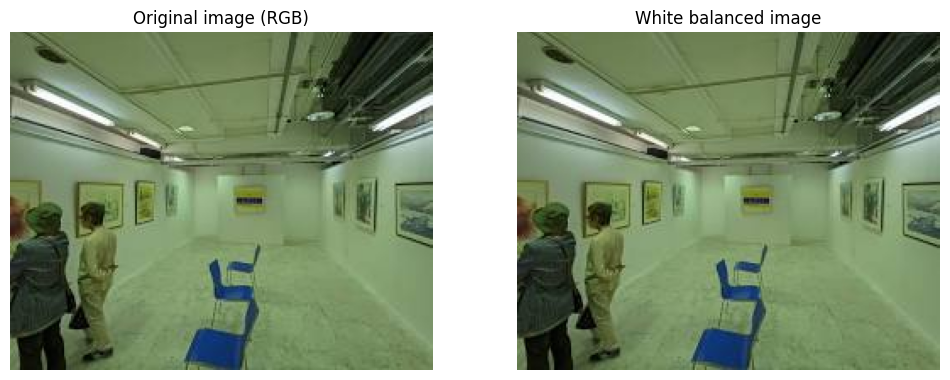

In [53]:
def white_patch_balance(img_rgb):
  img_float = img_rgb.astype(np.float32)

  # Finding maximum pixel value for each chanal(R, G, B)
  max_values = np.max(img_float, axis=(0, 1))

  # Calculating the scaling factor
  scaling_factors = 255.0 / max_values

  # Appling the scaling factor to the entire image
  balanced_float = img_float * scaling_factors

  balanced_img_rgb = np.clip(balanced_float, 0, 255).astype(np.uint8)

  return balanced_img_rgb


# Displaying results :-
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.imshow(img_rgb2)
plt.title("Original image (RGB)")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(white_patch_balance(img_rgb2))
plt.title("White balanced image")
plt.axis("off")
plt.show()


## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [54]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

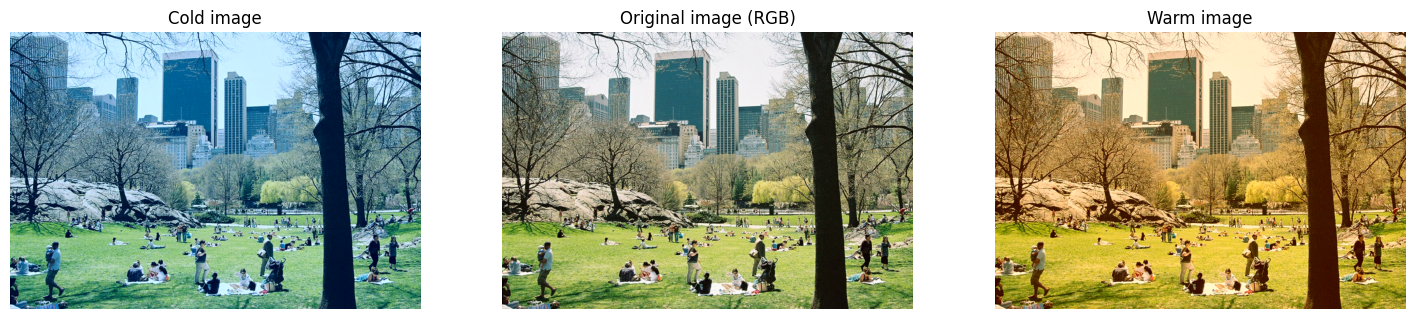

In [55]:
def white_balance(img_rgb, value):
  img_float = img_rgb.astype(np.float32)

  # Calculating the shift factor(relative to the midpoint)
  shift = value - 0.5

  # We will apply the shift to red and blue channels
  # Warmth :- R increases, B decreases
  # Cold :- R decreases, R increases
  img_float[:, :, 0] += shift * 2 * 40 # multiplying by 40 for some visible change
  img_float[:, :, 2] -= shift * 2 * 40 # same here

  balanced_img = np.clip(img_float, 0, 255).astype(np.uint8)

  return balanced_img

plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
plt.imshow(white_balance(img_rgb, 0.0))
plt.title("Cold image")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(white_balance(img_rgb, 0.5))
plt.title("Original image (RGB)")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(white_balance(img_rgb, 1.0))
plt.title("Warm image")
plt.axis("off")
plt.show()


